# GAN: Generative Adversarial Networks

[GAN](https://arxiv.org/abs/1406.2661?ref=floydhub-blog) represents a new framework for estimating generative models via an adversarial process, in which we simultaneously train two models: a generative model G that captures the data distribution, and a discriminative model D that estimates the probability that a sample came from the training data rather than G. The training procedure for G is to maximize the probability of D making a mistake. This framework corresponds to a minimax two-player game.
In this case, we can train both models using only the highly successful backpropagation and dropout algorithms and sample from the generative model using only forward propagation. No approximate inference or
Markov chains are necessary.

Basic GANs consist of two entities, the Generator G and the Discriminator D.

**The Generator**
* The generator is modeled as a multilayer perceptron
* The output of this MLP is an image
* The input are variables $\vec{z}$
* The Generator maps the variables $\vec{z}$ to an image
$$\vec{z} \rightarrow \vec{x}$$ 
where $\vec{x}$ is the image.
* To define a distribution over the image, we define a distribution over the $\vec{z}$
$$ p_z(\vec{x})$$
* The mapping depends on the parameters of the MLP, which we call $\Theta_g$ and we will denote the whole mapping by 
$$ G(\vec{z},\Theta_g)$$
* This defines a probability distribution over images
$$ p_g(\vec{z})$$

**The Discriminator**

The Discriminator D is a second MLP with separate parameters $\Theta_d$
* The Discriminator takes a single image $\vec{x}$ as input
* It otuputs a single scalar which we denote by $D(\vec{x},\Theta_d)$
* This scalar is interpreted as the probability that the image came from a given training set of images
* $1 - D(\vec{x},\Theta_d)$ is the probability that the image came from the generator G

**Objective Function**

The key to GANs is to understand the objective function.
* The Discriminator tries to optimize its parameters $\Theta_d$ in such a way as to be able to distinguish images from the real dataset and the generator G
* The Generator optimizes its parameters $\Theta_g$ to make images that the Discriminator fails to classify correctly
* The whole process can be described as a min − max game:
    1. Discriminator: Maximize discriminator prediction accuracy on the combined real and generated images with labels indicating from which source the images came from 
    2. Generator: Minimize discriminator prediction accuracy on the same dataset
* We can define a corresponding value function 
$$V(D,G)=E_{\vec{x} \sim p_{data}(\vec{x})}[logD(\vec{x})]+E_{\vec{z}∼p_{\vec{z}}} [log(1−D(G(\vec{z})))] $$

The game can be expressed by the contrasting goals of the discriminator and the generator:

$$ \underset{G}{min} \underset{D}{max} V(D,G)$$

In practice, the training is done turn-based
* We maximize V with respect to the parameters of the discriminator
* Then we minimize V with respect to the parameters of the generator
* The maximization is not done in full, since that would lead to very heavy computations
* Both can be trained using backpropagation
After training, we can use the Generator for making new images!


In [3]:
! python3 /Users/mgalfre/Cgnal/PyTorch-GAN/implementations/gan/gan.py --n_epochs 100

Namespace(n_epochs=100, batch_size=64, lr=0.0002, b1=0.5, b2=0.999, n_cpu=8, latent_dim=100, img_size=28, channels=1, sample_interval=400)
[Epoch 0/100] [Batch 0/938] [D loss: 0.691971] [G loss: 0.723443]
[Epoch 0/100] [Batch 1/938] [D loss: 0.601184] [G loss: 0.720081]
[Epoch 0/100] [Batch 2/938] [D loss: 0.529299] [G loss: 0.717051]
[Epoch 0/100] [Batch 3/938] [D loss: 0.475690] [G loss: 0.713945]
[Epoch 0/100] [Batch 4/938] [D loss: 0.436720] [G loss: 0.709826]
[Epoch 0/100] [Batch 5/938] [D loss: 0.406759] [G loss: 0.705237]
[Epoch 0/100] [Batch 6/938] [D loss: 0.388812] [G loss: 0.699963]
[Epoch 0/100] [Batch 7/938] [D loss: 0.376600] [G loss: 0.692804]
[Epoch 0/100] [Batch 8/938] [D loss: 0.372219] [G loss: 0.684073]
[Epoch 0/100] [Batch 9/938] [D loss: 0.373577] [G loss: 0.674530]
[Epoch 0/100] [Batch 10/938] [D loss: 0.375885] [G loss: 0.662168]
[Epoch 0/100] [Batch 11/938] [D loss: 0.378507] [G loss: 0.653196]
[Epoch 0/100] [Batch 12/938] [D loss: 0.383877] [G loss: 0.641448]


[Epoch 0/100] [Batch 121/938] [D loss: 0.428304] [G loss: 0.822230]
[Epoch 0/100] [Batch 122/938] [D loss: 0.423897] [G loss: 1.159007]
[Epoch 0/100] [Batch 123/938] [D loss: 0.446890] [G loss: 0.842485]
[Epoch 0/100] [Batch 124/938] [D loss: 0.487951] [G loss: 0.924902]
[Epoch 0/100] [Batch 125/938] [D loss: 0.493379] [G loss: 0.874747]
[Epoch 0/100] [Batch 126/938] [D loss: 0.478319] [G loss: 0.972113]
[Epoch 0/100] [Batch 127/938] [D loss: 0.469987] [G loss: 0.962900]
[Epoch 0/100] [Batch 128/938] [D loss: 0.449548] [G loss: 1.015055]
[Epoch 0/100] [Batch 129/938] [D loss: 0.441856] [G loss: 1.038719]
[Epoch 0/100] [Batch 130/938] [D loss: 0.431353] [G loss: 1.099474]
[Epoch 0/100] [Batch 131/938] [D loss: 0.427055] [G loss: 1.075527]
[Epoch 0/100] [Batch 132/938] [D loss: 0.433944] [G loss: 1.094108]
[Epoch 0/100] [Batch 133/938] [D loss: 0.450398] [G loss: 1.000885]
[Epoch 0/100] [Batch 134/938] [D loss: 0.469072] [G loss: 1.115202]
[Epoch 0/100] [Batch 135/938] [D loss: 0.505103]

[Epoch 0/100] [Batch 243/938] [D loss: 0.570193] [G loss: 0.756820]
[Epoch 0/100] [Batch 244/938] [D loss: 0.572756] [G loss: 0.790954]
[Epoch 0/100] [Batch 245/938] [D loss: 0.550448] [G loss: 0.746579]
[Epoch 0/100] [Batch 246/938] [D loss: 0.567186] [G loss: 0.940623]
[Epoch 0/100] [Batch 247/938] [D loss: 0.573930] [G loss: 0.589296]
[Epoch 0/100] [Batch 248/938] [D loss: 0.524443] [G loss: 1.232436]
[Epoch 0/100] [Batch 249/938] [D loss: 0.552116] [G loss: 0.575900]
[Epoch 0/100] [Batch 250/938] [D loss: 0.514779] [G loss: 1.172564]
[Epoch 0/100] [Batch 251/938] [D loss: 0.518523] [G loss: 0.625529]
[Epoch 0/100] [Batch 252/938] [D loss: 0.485240] [G loss: 1.215024]
[Epoch 0/100] [Batch 253/938] [D loss: 0.493695] [G loss: 0.671248]
[Epoch 0/100] [Batch 254/938] [D loss: 0.468737] [G loss: 1.221128]
[Epoch 0/100] [Batch 255/938] [D loss: 0.485234] [G loss: 0.715380]
[Epoch 0/100] [Batch 256/938] [D loss: 0.443598] [G loss: 1.081529]
[Epoch 0/100] [Batch 257/938] [D loss: 0.480282]

[Epoch 0/100] [Batch 364/938] [D loss: 0.356260] [G loss: 1.217997]
[Epoch 0/100] [Batch 365/938] [D loss: 0.351160] [G loss: 1.153615]
[Epoch 0/100] [Batch 366/938] [D loss: 0.362292] [G loss: 1.137926]
[Epoch 0/100] [Batch 367/938] [D loss: 0.392658] [G loss: 1.152300]
[Epoch 0/100] [Batch 368/938] [D loss: 0.428310] [G loss: 0.918157]
[Epoch 0/100] [Batch 369/938] [D loss: 0.416071] [G loss: 1.102011]
[Epoch 0/100] [Batch 370/938] [D loss: 0.448448] [G loss: 0.962170]
[Epoch 0/100] [Batch 371/938] [D loss: 0.445274] [G loss: 0.917134]
[Epoch 0/100] [Batch 372/938] [D loss: 0.443303] [G loss: 1.129173]
[Epoch 0/100] [Batch 373/938] [D loss: 0.453493] [G loss: 0.793534]
[Epoch 0/100] [Batch 374/938] [D loss: 0.453581] [G loss: 1.480161]
[Epoch 0/100] [Batch 375/938] [D loss: 0.498179] [G loss: 0.576237]
[Epoch 0/100] [Batch 376/938] [D loss: 0.474336] [G loss: 1.982547]
[Epoch 0/100] [Batch 377/938] [D loss: 0.482019] [G loss: 0.594501]
[Epoch 0/100] [Batch 378/938] [D loss: 0.348107]

[Epoch 0/100] [Batch 486/938] [D loss: 0.452747] [G loss: 1.132751]
[Epoch 0/100] [Batch 487/938] [D loss: 0.489918] [G loss: 0.797201]
[Epoch 0/100] [Batch 488/938] [D loss: 0.418983] [G loss: 1.300038]
[Epoch 0/100] [Batch 489/938] [D loss: 0.470310] [G loss: 0.941121]
[Epoch 0/100] [Batch 490/938] [D loss: 0.432559] [G loss: 0.973316]
[Epoch 0/100] [Batch 491/938] [D loss: 0.428661] [G loss: 1.280571]
[Epoch 0/100] [Batch 492/938] [D loss: 0.469992] [G loss: 0.725716]
[Epoch 0/100] [Batch 493/938] [D loss: 0.445174] [G loss: 1.643651]
[Epoch 0/100] [Batch 494/938] [D loss: 0.516068] [G loss: 0.545151]
[Epoch 0/100] [Batch 495/938] [D loss: 0.505517] [G loss: 2.155384]
[Epoch 0/100] [Batch 496/938] [D loss: 0.536611] [G loss: 0.515409]
[Epoch 0/100] [Batch 497/938] [D loss: 0.370762] [G loss: 1.605181]
[Epoch 0/100] [Batch 498/938] [D loss: 0.361070] [G loss: 1.087427]
[Epoch 0/100] [Batch 499/938] [D loss: 0.412902] [G loss: 1.029302]
[Epoch 0/100] [Batch 500/938] [D loss: 0.408372]

[Epoch 0/100] [Batch 607/938] [D loss: 0.342544] [G loss: 1.258678]
[Epoch 0/100] [Batch 608/938] [D loss: 0.376659] [G loss: 1.159186]
[Epoch 0/100] [Batch 609/938] [D loss: 0.392014] [G loss: 0.946454]
[Epoch 0/100] [Batch 610/938] [D loss: 0.420060] [G loss: 1.561189]
[Epoch 0/100] [Batch 611/938] [D loss: 0.464744] [G loss: 0.613039]
[Epoch 0/100] [Batch 612/938] [D loss: 0.501222] [G loss: 2.084359]
[Epoch 0/100] [Batch 613/938] [D loss: 0.570377] [G loss: 0.455673]
[Epoch 0/100] [Batch 614/938] [D loss: 0.352260] [G loss: 1.833909]
[Epoch 0/100] [Batch 615/938] [D loss: 0.333468] [G loss: 1.121210]
[Epoch 0/100] [Batch 616/938] [D loss: 0.328425] [G loss: 1.073898]
[Epoch 0/100] [Batch 617/938] [D loss: 0.404534] [G loss: 1.486485]
[Epoch 0/100] [Batch 618/938] [D loss: 0.481275] [G loss: 0.703562]
[Epoch 0/100] [Batch 619/938] [D loss: 0.519471] [G loss: 1.829378]
[Epoch 0/100] [Batch 620/938] [D loss: 0.620023] [G loss: 0.417198]
[Epoch 0/100] [Batch 621/938] [D loss: 0.406730]

[Epoch 0/100] [Batch 729/938] [D loss: 0.377636] [G loss: 1.511106]
[Epoch 0/100] [Batch 730/938] [D loss: 0.416004] [G loss: 0.741569]
[Epoch 0/100] [Batch 731/938] [D loss: 0.463973] [G loss: 2.040996]
[Epoch 0/100] [Batch 732/938] [D loss: 0.630529] [G loss: 0.413063]
[Epoch 0/100] [Batch 733/938] [D loss: 0.466823] [G loss: 2.270033]
[Epoch 0/100] [Batch 734/938] [D loss: 0.427174] [G loss: 0.663799]
[Epoch 0/100] [Batch 735/938] [D loss: 0.346185] [G loss: 1.713948]
[Epoch 0/100] [Batch 736/938] [D loss: 0.334902] [G loss: 1.052792]
[Epoch 0/100] [Batch 737/938] [D loss: 0.338835] [G loss: 1.517706]
[Epoch 0/100] [Batch 738/938] [D loss: 0.383750] [G loss: 0.902562]
[Epoch 0/100] [Batch 739/938] [D loss: 0.407750] [G loss: 1.655831]
[Epoch 0/100] [Batch 740/938] [D loss: 0.559621] [G loss: 0.490859]
[Epoch 0/100] [Batch 741/938] [D loss: 0.776332] [G loss: 2.741082]
[Epoch 0/100] [Batch 742/938] [D loss: 1.072092] [G loss: 0.146845]
[Epoch 0/100] [Batch 743/938] [D loss: 0.382712]

[Epoch 0/100] [Batch 850/938] [D loss: 0.472541] [G loss: 0.714980]
[Epoch 0/100] [Batch 851/938] [D loss: 0.496680] [G loss: 1.624235]
[Epoch 0/100] [Batch 852/938] [D loss: 0.579782] [G loss: 0.496141]
[Epoch 0/100] [Batch 853/938] [D loss: 0.519708] [G loss: 2.250073]
[Epoch 0/100] [Batch 854/938] [D loss: 0.516319] [G loss: 0.536357]
[Epoch 0/100] [Batch 855/938] [D loss: 0.375715] [G loss: 1.823692]
[Epoch 0/100] [Batch 856/938] [D loss: 0.368060] [G loss: 1.022855]
[Epoch 0/100] [Batch 857/938] [D loss: 0.369383] [G loss: 1.154159]
[Epoch 0/100] [Batch 858/938] [D loss: 0.382799] [G loss: 1.263178]
[Epoch 0/100] [Batch 859/938] [D loss: 0.390410] [G loss: 0.950190]
[Epoch 0/100] [Batch 860/938] [D loss: 0.432295] [G loss: 1.581307]
[Epoch 0/100] [Batch 861/938] [D loss: 0.514145] [G loss: 0.596865]
[Epoch 0/100] [Batch 862/938] [D loss: 0.527855] [G loss: 2.202028]
[Epoch 0/100] [Batch 863/938] [D loss: 0.597900] [G loss: 0.415206]
[Epoch 0/100] [Batch 864/938] [D loss: 0.466498]

[Epoch 1/100] [Batch 34/938] [D loss: 0.862424] [G loss: 0.221176]
[Epoch 1/100] [Batch 35/938] [D loss: 0.362863] [G loss: 1.795884]
[Epoch 1/100] [Batch 36/938] [D loss: 0.338162] [G loss: 1.464245]
[Epoch 1/100] [Batch 37/938] [D loss: 0.385493] [G loss: 0.803147]
[Epoch 1/100] [Batch 38/938] [D loss: 0.397755] [G loss: 1.865236]
[Epoch 1/100] [Batch 39/938] [D loss: 0.379013] [G loss: 0.813262]
[Epoch 1/100] [Batch 40/938] [D loss: 0.413519] [G loss: 1.613559]
[Epoch 1/100] [Batch 41/938] [D loss: 0.418298] [G loss: 0.733845]
[Epoch 1/100] [Batch 42/938] [D loss: 0.433744] [G loss: 1.793777]
[Epoch 1/100] [Batch 43/938] [D loss: 0.499013] [G loss: 0.581224]
[Epoch 1/100] [Batch 44/938] [D loss: 0.428375] [G loss: 2.122217]
[Epoch 1/100] [Batch 45/938] [D loss: 0.439496] [G loss: 0.670707]
[Epoch 1/100] [Batch 46/938] [D loss: 0.403801] [G loss: 1.845584]
[Epoch 1/100] [Batch 47/938] [D loss: 0.426907] [G loss: 0.725462]
[Epoch 1/100] [Batch 48/938] [D loss: 0.410387] [G loss: 1.897

[Epoch 1/100] [Batch 157/938] [D loss: 0.395323] [G loss: 1.703844]
[Epoch 1/100] [Batch 158/938] [D loss: 0.472032] [G loss: 0.749083]
[Epoch 1/100] [Batch 159/938] [D loss: 0.429321] [G loss: 1.667584]
[Epoch 1/100] [Batch 160/938] [D loss: 0.573964] [G loss: 0.523050]
[Epoch 1/100] [Batch 161/938] [D loss: 0.652080] [G loss: 2.329336]
[Epoch 1/100] [Batch 162/938] [D loss: 0.907615] [G loss: 0.213251]
[Epoch 1/100] [Batch 163/938] [D loss: 0.721496] [G loss: 2.425011]
[Epoch 1/100] [Batch 164/938] [D loss: 0.560425] [G loss: 0.526225]
[Epoch 1/100] [Batch 165/938] [D loss: 0.383569] [G loss: 1.455482]
[Epoch 1/100] [Batch 166/938] [D loss: 0.354977] [G loss: 1.266923]
[Epoch 1/100] [Batch 167/938] [D loss: 0.401883] [G loss: 0.919820]
[Epoch 1/100] [Batch 168/938] [D loss: 0.432595] [G loss: 1.269063]
[Epoch 1/100] [Batch 169/938] [D loss: 0.429935] [G loss: 0.774076]
[Epoch 1/100] [Batch 170/938] [D loss: 0.460965] [G loss: 1.677967]
[Epoch 1/100] [Batch 171/938] [D loss: 0.555584]

[Epoch 1/100] [Batch 279/938] [D loss: 0.565542] [G loss: 2.756649]
[Epoch 1/100] [Batch 280/938] [D loss: 0.576842] [G loss: 0.429857]
[Epoch 1/100] [Batch 281/938] [D loss: 0.528487] [G loss: 2.511942]
[Epoch 1/100] [Batch 282/938] [D loss: 0.432328] [G loss: 0.642406]
[Epoch 1/100] [Batch 283/938] [D loss: 0.255788] [G loss: 1.910181]
[Epoch 1/100] [Batch 284/938] [D loss: 0.277940] [G loss: 1.503471]
[Epoch 1/100] [Batch 285/938] [D loss: 0.383123] [G loss: 0.917584]
[Epoch 1/100] [Batch 286/938] [D loss: 0.432183] [G loss: 1.521804]
[Epoch 1/100] [Batch 287/938] [D loss: 0.463160] [G loss: 0.663543]
[Epoch 1/100] [Batch 288/938] [D loss: 0.487841] [G loss: 2.261920]
[Epoch 1/100] [Batch 289/938] [D loss: 0.552467] [G loss: 0.457751]
[Epoch 1/100] [Batch 290/938] [D loss: 0.487738] [G loss: 2.623275]
[Epoch 1/100] [Batch 291/938] [D loss: 0.356544] [G loss: 0.768343]
[Epoch 1/100] [Batch 292/938] [D loss: 0.256449] [G loss: 1.804444]
[Epoch 1/100] [Batch 293/938] [D loss: 0.285467]

[Epoch 1/100] [Batch 400/938] [D loss: 0.443537] [G loss: 1.814802]
[Epoch 1/100] [Batch 401/938] [D loss: 0.560835] [G loss: 0.591712]
[Epoch 1/100] [Batch 402/938] [D loss: 0.397690] [G loss: 1.822585]
[Epoch 1/100] [Batch 403/938] [D loss: 0.393153] [G loss: 0.997513]
[Epoch 1/100] [Batch 404/938] [D loss: 0.367407] [G loss: 1.224065]
[Epoch 1/100] [Batch 405/938] [D loss: 0.405383] [G loss: 1.175206]
[Epoch 1/100] [Batch 406/938] [D loss: 0.384874] [G loss: 0.941684]
[Epoch 1/100] [Batch 407/938] [D loss: 0.381941] [G loss: 2.004726]
[Epoch 1/100] [Batch 408/938] [D loss: 0.405535] [G loss: 0.818312]
[Epoch 1/100] [Batch 409/938] [D loss: 0.376677] [G loss: 1.861610]
[Epoch 1/100] [Batch 410/938] [D loss: 0.416505] [G loss: 0.803376]
[Epoch 1/100] [Batch 411/938] [D loss: 0.391830] [G loss: 1.985492]
[Epoch 1/100] [Batch 412/938] [D loss: 0.446011] [G loss: 0.609317]
[Epoch 1/100] [Batch 413/938] [D loss: 0.419545] [G loss: 2.384792]
[Epoch 1/100] [Batch 414/938] [D loss: 0.517328]

[Epoch 1/100] [Batch 521/938] [D loss: 0.317967] [G loss: 1.624266]
[Epoch 1/100] [Batch 522/938] [D loss: 0.464358] [G loss: 1.108778]
[Epoch 1/100] [Batch 523/938] [D loss: 0.496021] [G loss: 0.697526]
[Epoch 1/100] [Batch 524/938] [D loss: 0.555529] [G loss: 2.552112]
[Epoch 1/100] [Batch 525/938] [D loss: 0.737148] [G loss: 0.297698]
[Epoch 1/100] [Batch 526/938] [D loss: 0.637610] [G loss: 3.643499]
[Epoch 1/100] [Batch 527/938] [D loss: 0.383562] [G loss: 0.778091]
[Epoch 1/100] [Batch 528/938] [D loss: 0.268217] [G loss: 1.794785]
[Epoch 1/100] [Batch 529/938] [D loss: 0.277361] [G loss: 1.856298]
[Epoch 1/100] [Batch 530/938] [D loss: 0.364361] [G loss: 1.092698]
[Epoch 1/100] [Batch 531/938] [D loss: 0.329245] [G loss: 1.548591]
[Epoch 1/100] [Batch 532/938] [D loss: 0.371020] [G loss: 1.322746]
[Epoch 1/100] [Batch 533/938] [D loss: 0.443280] [G loss: 1.007417]
[Epoch 1/100] [Batch 534/938] [D loss: 0.346986] [G loss: 1.329717]
[Epoch 1/100] [Batch 535/938] [D loss: 0.474944]

[Epoch 1/100] [Batch 643/938] [D loss: 0.838503] [G loss: 0.229307]
[Epoch 1/100] [Batch 644/938] [D loss: 0.629060] [G loss: 3.309432]
[Epoch 1/100] [Batch 645/938] [D loss: 0.341050] [G loss: 0.939408]
[Epoch 1/100] [Batch 646/938] [D loss: 0.291030] [G loss: 1.178474]
[Epoch 1/100] [Batch 647/938] [D loss: 0.314067] [G loss: 1.989418]
[Epoch 1/100] [Batch 648/938] [D loss: 0.357178] [G loss: 1.152862]
[Epoch 1/100] [Batch 649/938] [D loss: 0.381165] [G loss: 1.219944]
[Epoch 1/100] [Batch 650/938] [D loss: 0.368665] [G loss: 1.371568]
[Epoch 1/100] [Batch 651/938] [D loss: 0.413961] [G loss: 0.846268]
[Epoch 1/100] [Batch 652/938] [D loss: 0.359797] [G loss: 2.075377]
[Epoch 1/100] [Batch 653/938] [D loss: 0.437434] [G loss: 0.899016]
[Epoch 1/100] [Batch 654/938] [D loss: 0.367737] [G loss: 1.180941]
[Epoch 1/100] [Batch 655/938] [D loss: 0.360060] [G loss: 1.465544]
[Epoch 1/100] [Batch 656/938] [D loss: 0.390464] [G loss: 0.850325]
[Epoch 1/100] [Batch 657/938] [D loss: 0.420449]

[Epoch 1/100] [Batch 764/938] [D loss: 0.459127] [G loss: 1.391098]
[Epoch 1/100] [Batch 765/938] [D loss: 0.478049] [G loss: 0.618227]
[Epoch 1/100] [Batch 766/938] [D loss: 0.700860] [G loss: 2.943997]
[Epoch 1/100] [Batch 767/938] [D loss: 0.729119] [G loss: 0.285261]
[Epoch 1/100] [Batch 768/938] [D loss: 0.469475] [G loss: 3.257036]
[Epoch 1/100] [Batch 769/938] [D loss: 0.303073] [G loss: 1.449918]
[Epoch 1/100] [Batch 770/938] [D loss: 0.410269] [G loss: 0.643387]
[Epoch 1/100] [Batch 771/938] [D loss: 0.314354] [G loss: 2.743912]
[Epoch 1/100] [Batch 772/938] [D loss: 0.239615] [G loss: 1.602234]
[Epoch 1/100] [Batch 773/938] [D loss: 0.342056] [G loss: 0.898167]
[Epoch 1/100] [Batch 774/938] [D loss: 0.282337] [G loss: 2.085507]
[Epoch 1/100] [Batch 775/938] [D loss: 0.263299] [G loss: 1.268691]
[Epoch 1/100] [Batch 776/938] [D loss: 0.254080] [G loss: 1.519866]
[Epoch 1/100] [Batch 777/938] [D loss: 0.260609] [G loss: 1.476186]
[Epoch 1/100] [Batch 778/938] [D loss: 0.313198]

[Epoch 1/100] [Batch 886/938] [D loss: 0.301270] [G loss: 1.258813]
[Epoch 1/100] [Batch 887/938] [D loss: 0.293442] [G loss: 1.999317]
[Epoch 1/100] [Batch 888/938] [D loss: 0.306428] [G loss: 1.090249]
[Epoch 1/100] [Batch 889/938] [D loss: 0.275522] [G loss: 1.956332]
[Epoch 1/100] [Batch 890/938] [D loss: 0.301713] [G loss: 1.418786]
[Epoch 1/100] [Batch 891/938] [D loss: 0.303476] [G loss: 1.267450]
[Epoch 1/100] [Batch 892/938] [D loss: 0.314784] [G loss: 1.833025]
[Epoch 1/100] [Batch 893/938] [D loss: 0.340377] [G loss: 1.039645]
[Epoch 1/100] [Batch 894/938] [D loss: 0.299691] [G loss: 2.208381]
[Epoch 1/100] [Batch 895/938] [D loss: 0.333395] [G loss: 1.022491]
[Epoch 1/100] [Batch 896/938] [D loss: 0.403562] [G loss: 2.324694]
[Epoch 1/100] [Batch 897/938] [D loss: 0.483563] [G loss: 0.565859]
[Epoch 1/100] [Batch 898/938] [D loss: 0.509145] [G loss: 3.473946]
[Epoch 1/100] [Batch 899/938] [D loss: 0.275844] [G loss: 1.169961]
[Epoch 1/100] [Batch 900/938] [D loss: 0.212069]

[Epoch 2/100] [Batch 71/938] [D loss: 0.329221] [G loss: 2.353195]
[Epoch 2/100] [Batch 72/938] [D loss: 0.410755] [G loss: 0.753887]
[Epoch 2/100] [Batch 73/938] [D loss: 0.487604] [G loss: 3.015563]
[Epoch 2/100] [Batch 74/938] [D loss: 0.374146] [G loss: 0.722340]
[Epoch 2/100] [Batch 75/938] [D loss: 0.375894] [G loss: 2.711539]
[Epoch 2/100] [Batch 76/938] [D loss: 0.332551] [G loss: 0.974135]
[Epoch 2/100] [Batch 77/938] [D loss: 0.215143] [G loss: 1.721134]
[Epoch 2/100] [Batch 78/938] [D loss: 0.287634] [G loss: 1.842918]
[Epoch 2/100] [Batch 79/938] [D loss: 0.395930] [G loss: 0.758145]
[Epoch 2/100] [Batch 80/938] [D loss: 0.480605] [G loss: 3.213898]
[Epoch 2/100] [Batch 81/938] [D loss: 0.440094] [G loss: 0.676814]
[Epoch 2/100] [Batch 82/938] [D loss: 0.380785] [G loss: 3.009034]
[Epoch 2/100] [Batch 83/938] [D loss: 0.317683] [G loss: 1.075639]
[Epoch 2/100] [Batch 84/938] [D loss: 0.275726] [G loss: 1.454713]
[Epoch 2/100] [Batch 85/938] [D loss: 0.304772] [G loss: 1.548

[Epoch 2/100] [Batch 193/938] [D loss: 0.380279] [G loss: 1.050451]
[Epoch 2/100] [Batch 194/938] [D loss: 0.378164] [G loss: 2.311457]
[Epoch 2/100] [Batch 195/938] [D loss: 0.552757] [G loss: 0.606879]
[Epoch 2/100] [Batch 196/938] [D loss: 0.640091] [G loss: 3.595101]
[Epoch 2/100] [Batch 197/938] [D loss: 0.834694] [G loss: 0.267051]
[Epoch 2/100] [Batch 198/938] [D loss: 0.630499] [G loss: 3.856926]
[Epoch 2/100] [Batch 199/938] [D loss: 0.364562] [G loss: 0.804652]
[Epoch 2/100] [Batch 200/938] [D loss: 0.234000] [G loss: 1.936892]
[Epoch 2/100] [Batch 201/938] [D loss: 0.250215] [G loss: 1.818755]
[Epoch 2/100] [Batch 202/938] [D loss: 0.380000] [G loss: 1.087557]
[Epoch 2/100] [Batch 203/938] [D loss: 0.322616] [G loss: 1.353207]
[Epoch 2/100] [Batch 204/938] [D loss: 0.316870] [G loss: 1.542980]
[Epoch 2/100] [Batch 205/938] [D loss: 0.383611] [G loss: 0.970950]
[Epoch 2/100] [Batch 206/938] [D loss: 0.407176] [G loss: 2.022083]
[Epoch 2/100] [Batch 207/938] [D loss: 0.564350]

[Epoch 2/100] [Batch 314/938] [D loss: 0.317389] [G loss: 1.836975]
[Epoch 2/100] [Batch 315/938] [D loss: 0.349559] [G loss: 1.074164]
[Epoch 2/100] [Batch 316/938] [D loss: 0.344467] [G loss: 2.084040]
[Epoch 2/100] [Batch 317/938] [D loss: 0.385303] [G loss: 0.876380]
[Epoch 2/100] [Batch 318/938] [D loss: 0.409807] [G loss: 2.452716]
[Epoch 2/100] [Batch 319/938] [D loss: 0.501259] [G loss: 0.789376]
[Epoch 2/100] [Batch 320/938] [D loss: 0.293438] [G loss: 2.002589]
[Epoch 2/100] [Batch 321/938] [D loss: 0.375469] [G loss: 1.140929]
[Epoch 2/100] [Batch 322/938] [D loss: 0.331965] [G loss: 1.284024]
[Epoch 2/100] [Batch 323/938] [D loss: 0.396936] [G loss: 1.766670]
[Epoch 2/100] [Batch 324/938] [D loss: 0.477430] [G loss: 0.655193]
[Epoch 2/100] [Batch 325/938] [D loss: 0.524732] [G loss: 3.037455]
[Epoch 2/100] [Batch 326/938] [D loss: 0.483564] [G loss: 0.591727]
[Epoch 2/100] [Batch 327/938] [D loss: 0.452353] [G loss: 2.547868]
[Epoch 2/100] [Batch 328/938] [D loss: 0.422257]

[Epoch 2/100] [Batch 435/938] [D loss: 0.514619] [G loss: 0.503242]
[Epoch 2/100] [Batch 436/938] [D loss: 0.628741] [G loss: 4.132051]
[Epoch 2/100] [Batch 437/938] [D loss: 0.369065] [G loss: 0.768113]
[Epoch 2/100] [Batch 438/938] [D loss: 0.196804] [G loss: 2.602774]
[Epoch 2/100] [Batch 439/938] [D loss: 0.173445] [G loss: 2.090326]
[Epoch 2/100] [Batch 440/938] [D loss: 0.217721] [G loss: 1.453264]
[Epoch 2/100] [Batch 441/938] [D loss: 0.223103] [G loss: 1.853942]
[Epoch 2/100] [Batch 442/938] [D loss: 0.234764] [G loss: 1.641502]
[Epoch 2/100] [Batch 443/938] [D loss: 0.244797] [G loss: 1.439343]
[Epoch 2/100] [Batch 444/938] [D loss: 0.315706] [G loss: 1.884559]
[Epoch 2/100] [Batch 445/938] [D loss: 0.379000] [G loss: 0.828756]
[Epoch 2/100] [Batch 446/938] [D loss: 0.523241] [G loss: 3.151703]
[Epoch 2/100] [Batch 447/938] [D loss: 0.509804] [G loss: 0.500906]
[Epoch 2/100] [Batch 448/938] [D loss: 0.506595] [G loss: 3.743117]
[Epoch 2/100] [Batch 449/938] [D loss: 0.254954]

[Epoch 2/100] [Batch 556/938] [D loss: 0.301162] [G loss: 1.034015]
[Epoch 2/100] [Batch 557/938] [D loss: 0.437183] [G loss: 2.527664]
[Epoch 2/100] [Batch 558/938] [D loss: 0.574082] [G loss: 0.440991]
[Epoch 2/100] [Batch 559/938] [D loss: 0.584775] [G loss: 3.559581]
[Epoch 2/100] [Batch 560/938] [D loss: 0.340179] [G loss: 1.140844]
[Epoch 2/100] [Batch 561/938] [D loss: 0.241777] [G loss: 1.301963]
[Epoch 2/100] [Batch 562/938] [D loss: 0.358362] [G loss: 2.515870]
[Epoch 2/100] [Batch 563/938] [D loss: 0.311072] [G loss: 0.887445]
[Epoch 2/100] [Batch 564/938] [D loss: 0.369108] [G loss: 2.300664]
[Epoch 2/100] [Batch 565/938] [D loss: 0.317920] [G loss: 1.143096]
[Epoch 2/100] [Batch 566/938] [D loss: 0.320490] [G loss: 1.573850]
[Epoch 2/100] [Batch 567/938] [D loss: 0.397435] [G loss: 1.092317]
[Epoch 2/100] [Batch 568/938] [D loss: 0.320170] [G loss: 1.517311]
[Epoch 2/100] [Batch 569/938] [D loss: 0.346819] [G loss: 1.322633]
[Epoch 2/100] [Batch 570/938] [D loss: 0.314129]

[Epoch 2/100] [Batch 678/938] [D loss: 0.291329] [G loss: 3.613118]
[Epoch 2/100] [Batch 679/938] [D loss: 0.221071] [G loss: 1.499475]
[Epoch 2/100] [Batch 680/938] [D loss: 0.211320] [G loss: 1.710245]
[Epoch 2/100] [Batch 681/938] [D loss: 0.204305] [G loss: 2.561038]
[Epoch 2/100] [Batch 682/938] [D loss: 0.272623] [G loss: 1.495652]
[Epoch 2/100] [Batch 683/938] [D loss: 0.343351] [G loss: 2.053195]
[Epoch 2/100] [Batch 684/938] [D loss: 0.393297] [G loss: 0.770902]
[Epoch 2/100] [Batch 685/938] [D loss: 0.573572] [G loss: 4.045804]
[Epoch 2/100] [Batch 686/938] [D loss: 0.644267] [G loss: 0.463377]
[Epoch 2/100] [Batch 687/938] [D loss: 0.446239] [G loss: 4.326005]
[Epoch 2/100] [Batch 688/938] [D loss: 0.215089] [G loss: 1.854897]
[Epoch 2/100] [Batch 689/938] [D loss: 0.299548] [G loss: 0.982607]
[Epoch 2/100] [Batch 690/938] [D loss: 0.278475] [G loss: 3.132600]
[Epoch 2/100] [Batch 691/938] [D loss: 0.264075] [G loss: 1.396777]
[Epoch 2/100] [Batch 692/938] [D loss: 0.293968]

[Epoch 2/100] [Batch 799/938] [D loss: 0.240355] [G loss: 2.061393]
[Epoch 2/100] [Batch 800/938] [D loss: 0.277403] [G loss: 1.269434]
[Epoch 2/100] [Batch 801/938] [D loss: 0.286138] [G loss: 1.861349]
[Epoch 2/100] [Batch 802/938] [D loss: 0.374206] [G loss: 0.992858]
[Epoch 2/100] [Batch 803/938] [D loss: 0.384657] [G loss: 1.856860]
[Epoch 2/100] [Batch 804/938] [D loss: 0.499420] [G loss: 0.555829]
[Epoch 2/100] [Batch 805/938] [D loss: 1.044965] [G loss: 4.137124]
[Epoch 2/100] [Batch 806/938] [D loss: 1.268457] [G loss: 0.103816]
[Epoch 2/100] [Batch 807/938] [D loss: 0.491144] [G loss: 3.797337]
[Epoch 2/100] [Batch 808/938] [D loss: 0.225394] [G loss: 1.997436]
[Epoch 2/100] [Batch 809/938] [D loss: 0.434917] [G loss: 0.657732]
[Epoch 2/100] [Batch 810/938] [D loss: 0.452792] [G loss: 2.878248]
[Epoch 2/100] [Batch 811/938] [D loss: 0.450324] [G loss: 0.790395]
[Epoch 2/100] [Batch 812/938] [D loss: 0.299837] [G loss: 1.798524]
[Epoch 2/100] [Batch 813/938] [D loss: 0.342052]

[Epoch 2/100] [Batch 921/938] [D loss: 0.334011] [G loss: 1.426007]
[Epoch 2/100] [Batch 922/938] [D loss: 0.310112] [G loss: 1.331539]
[Epoch 2/100] [Batch 923/938] [D loss: 0.344834] [G loss: 1.838744]
[Epoch 2/100] [Batch 924/938] [D loss: 0.403610] [G loss: 1.051834]
[Epoch 2/100] [Batch 925/938] [D loss: 0.347272] [G loss: 1.913795]
[Epoch 2/100] [Batch 926/938] [D loss: 0.398195] [G loss: 1.030593]
[Epoch 2/100] [Batch 927/938] [D loss: 0.352189] [G loss: 1.553329]
[Epoch 2/100] [Batch 928/938] [D loss: 0.427606] [G loss: 1.252895]
[Epoch 2/100] [Batch 929/938] [D loss: 0.384621] [G loss: 0.863467]
[Epoch 2/100] [Batch 930/938] [D loss: 0.563235] [G loss: 3.213340]
[Epoch 2/100] [Batch 931/938] [D loss: 0.593612] [G loss: 0.432528]
[Epoch 2/100] [Batch 932/938] [D loss: 0.475456] [G loss: 3.772644]
[Epoch 2/100] [Batch 933/938] [D loss: 0.254435] [G loss: 1.376504]
[Epoch 2/100] [Batch 934/938] [D loss: 0.273208] [G loss: 1.026237]
[Epoch 2/100] [Batch 935/938] [D loss: 0.403964]

[Epoch 3/100] [Batch 107/938] [D loss: 0.331459] [G loss: 1.129535]
[Epoch 3/100] [Batch 108/938] [D loss: 0.294150] [G loss: 1.732392]
[Epoch 3/100] [Batch 109/938] [D loss: 0.260437] [G loss: 1.290272]
[Epoch 3/100] [Batch 110/938] [D loss: 0.295743] [G loss: 1.910130]
[Epoch 3/100] [Batch 111/938] [D loss: 0.341676] [G loss: 0.901685]
[Epoch 3/100] [Batch 112/938] [D loss: 0.420733] [G loss: 2.751553]
[Epoch 3/100] [Batch 113/938] [D loss: 0.420542] [G loss: 0.657875]
[Epoch 3/100] [Batch 114/938] [D loss: 0.384030] [G loss: 3.012288]
[Epoch 3/100] [Batch 115/938] [D loss: 0.284836] [G loss: 1.153988]
[Epoch 3/100] [Batch 116/938] [D loss: 0.236411] [G loss: 1.607728]
[Epoch 3/100] [Batch 117/938] [D loss: 0.246188] [G loss: 1.843282]
[Epoch 3/100] [Batch 118/938] [D loss: 0.287968] [G loss: 1.473881]
[Epoch 3/100] [Batch 119/938] [D loss: 0.334991] [G loss: 1.413340]
[Epoch 3/100] [Batch 120/938] [D loss: 0.255077] [G loss: 1.369594]
[Epoch 3/100] [Batch 121/938] [D loss: 0.284847]

[Epoch 3/100] [Batch 228/938] [D loss: 0.283010] [G loss: 1.652278]
[Epoch 3/100] [Batch 229/938] [D loss: 0.278186] [G loss: 1.293131]
[Epoch 3/100] [Batch 230/938] [D loss: 0.286918] [G loss: 1.878779]
[Epoch 3/100] [Batch 231/938] [D loss: 0.372788] [G loss: 1.175094]
[Epoch 3/100] [Batch 232/938] [D loss: 0.315956] [G loss: 1.420435]
[Epoch 3/100] [Batch 233/938] [D loss: 0.315974] [G loss: 1.689940]
[Epoch 3/100] [Batch 234/938] [D loss: 0.437213] [G loss: 0.973024]
[Epoch 3/100] [Batch 235/938] [D loss: 0.434131] [G loss: 2.148933]
[Epoch 3/100] [Batch 236/938] [D loss: 0.555256] [G loss: 0.539509]
[Epoch 3/100] [Batch 237/938] [D loss: 0.720370] [G loss: 3.587241]
[Epoch 3/100] [Batch 238/938] [D loss: 0.731820] [G loss: 0.378006]
[Epoch 3/100] [Batch 239/938] [D loss: 0.508636] [G loss: 3.859481]
[Epoch 3/100] [Batch 240/938] [D loss: 0.283249] [G loss: 1.879445]
[Epoch 3/100] [Batch 241/938] [D loss: 0.472654] [G loss: 0.633445]
[Epoch 3/100] [Batch 242/938] [D loss: 0.332998]

[Epoch 3/100] [Batch 349/938] [D loss: 0.520327] [G loss: 0.851178]
[Epoch 3/100] [Batch 350/938] [D loss: 0.444133] [G loss: 2.413037]
[Epoch 3/100] [Batch 351/938] [D loss: 0.456489] [G loss: 0.643948]
[Epoch 3/100] [Batch 352/938] [D loss: 0.499284] [G loss: 3.142664]
[Epoch 3/100] [Batch 353/938] [D loss: 0.376165] [G loss: 0.937211]
[Epoch 3/100] [Batch 354/938] [D loss: 0.315143] [G loss: 2.180014]
[Epoch 3/100] [Batch 355/938] [D loss: 0.305663] [G loss: 1.247797]
[Epoch 3/100] [Batch 356/938] [D loss: 0.279453] [G loss: 1.671564]
[Epoch 3/100] [Batch 357/938] [D loss: 0.331863] [G loss: 1.616229]
[Epoch 3/100] [Batch 358/938] [D loss: 0.371341] [G loss: 1.056522]
[Epoch 3/100] [Batch 359/938] [D loss: 0.372684] [G loss: 2.088822]
[Epoch 3/100] [Batch 360/938] [D loss: 0.355426] [G loss: 1.061334]
[Epoch 3/100] [Batch 361/938] [D loss: 0.381216] [G loss: 2.046182]
[Epoch 3/100] [Batch 362/938] [D loss: 0.479016] [G loss: 0.726695]
[Epoch 3/100] [Batch 363/938] [D loss: 0.445326]

[Epoch 3/100] [Batch 470/938] [D loss: 0.836658] [G loss: 4.584756]
[Epoch 3/100] [Batch 471/938] [D loss: 0.539034] [G loss: 0.511115]
[Epoch 3/100] [Batch 472/938] [D loss: 0.416119] [G loss: 3.311502]
[Epoch 3/100] [Batch 473/938] [D loss: 0.273363] [G loss: 1.235038]
[Epoch 3/100] [Batch 474/938] [D loss: 0.223813] [G loss: 1.601825]
[Epoch 3/100] [Batch 475/938] [D loss: 0.237773] [G loss: 1.971231]
[Epoch 3/100] [Batch 476/938] [D loss: 0.296896] [G loss: 1.370520]
[Epoch 3/100] [Batch 477/938] [D loss: 0.426533] [G loss: 1.861084]
[Epoch 3/100] [Batch 478/938] [D loss: 0.679788] [G loss: 0.380739]
[Epoch 3/100] [Batch 479/938] [D loss: 1.406892] [G loss: 4.875012]
[Epoch 3/100] [Batch 480/938] [D loss: 0.867508] [G loss: 0.324218]
[Epoch 3/100] [Batch 481/938] [D loss: 0.440583] [G loss: 2.807728]
[Epoch 3/100] [Batch 482/938] [D loss: 0.226940] [G loss: 1.436273]
[Epoch 3/100] [Batch 483/938] [D loss: 0.235420] [G loss: 1.626526]
[Epoch 3/100] [Batch 484/938] [D loss: 0.296062]

[Epoch 3/100] [Batch 592/938] [D loss: 0.381325] [G loss: 0.880609]
[Epoch 3/100] [Batch 593/938] [D loss: 0.560120] [G loss: 2.907648]
[Epoch 3/100] [Batch 594/938] [D loss: 0.568445] [G loss: 0.504714]
[Epoch 3/100] [Batch 595/938] [D loss: 0.479697] [G loss: 4.159106]
[Epoch 3/100] [Batch 596/938] [D loss: 0.283620] [G loss: 1.474857]
[Epoch 3/100] [Batch 597/938] [D loss: 0.277895] [G loss: 1.263553]
[Epoch 3/100] [Batch 598/938] [D loss: 0.292287] [G loss: 2.577903]
[Epoch 3/100] [Batch 599/938] [D loss: 0.265914] [G loss: 1.431429]
[Epoch 3/100] [Batch 600/938] [D loss: 0.303783] [G loss: 1.566465]
[Epoch 3/100] [Batch 601/938] [D loss: 0.279501] [G loss: 1.576540]
[Epoch 3/100] [Batch 602/938] [D loss: 0.296561] [G loss: 1.637488]
[Epoch 3/100] [Batch 603/938] [D loss: 0.299457] [G loss: 1.102961]
[Epoch 3/100] [Batch 604/938] [D loss: 0.398943] [G loss: 2.836636]
[Epoch 3/100] [Batch 605/938] [D loss: 0.563365] [G loss: 0.446535]
[Epoch 3/100] [Batch 606/938] [D loss: 0.877173]

[Epoch 3/100] [Batch 713/938] [D loss: 0.606611] [G loss: 0.402353]
[Epoch 3/100] [Batch 714/938] [D loss: 0.723469] [G loss: 5.554801]
[Epoch 3/100] [Batch 715/938] [D loss: 0.131945] [G loss: 2.195436]
[Epoch 3/100] [Batch 716/938] [D loss: 0.383295] [G loss: 0.699518]
[Epoch 3/100] [Batch 717/938] [D loss: 0.338753] [G loss: 4.038690]
[Epoch 3/100] [Batch 718/938] [D loss: 0.188426] [G loss: 2.572268]
[Epoch 3/100] [Batch 719/938] [D loss: 0.317997] [G loss: 0.983651]
[Epoch 3/100] [Batch 720/938] [D loss: 0.194917] [G loss: 3.019031]
[Epoch 3/100] [Batch 721/938] [D loss: 0.247843] [G loss: 2.138013]
[Epoch 3/100] [Batch 722/938] [D loss: 0.339155] [G loss: 0.832814]
[Epoch 3/100] [Batch 723/938] [D loss: 0.279321] [G loss: 3.318739]
[Epoch 3/100] [Batch 724/938] [D loss: 0.194045] [G loss: 2.003631]
[Epoch 3/100] [Batch 725/938] [D loss: 0.317340] [G loss: 1.204021]
[Epoch 3/100] [Batch 726/938] [D loss: 0.271785] [G loss: 1.988586]
[Epoch 3/100] [Batch 727/938] [D loss: 0.181414]

[Epoch 3/100] [Batch 834/938] [D loss: 0.159786] [G loss: 2.527872]
[Epoch 3/100] [Batch 835/938] [D loss: 0.226571] [G loss: 1.839232]
[Epoch 3/100] [Batch 836/938] [D loss: 0.266059] [G loss: 1.127647]
[Epoch 3/100] [Batch 837/938] [D loss: 0.295073] [G loss: 3.124905]
[Epoch 3/100] [Batch 838/938] [D loss: 0.275683] [G loss: 1.035245]
[Epoch 3/100] [Batch 839/938] [D loss: 0.234684] [G loss: 3.318574]
[Epoch 3/100] [Batch 840/938] [D loss: 0.203079] [G loss: 1.635719]
[Epoch 3/100] [Batch 841/938] [D loss: 0.193294] [G loss: 1.758678]
[Epoch 3/100] [Batch 842/938] [D loss: 0.174624] [G loss: 2.144772]
[Epoch 3/100] [Batch 843/938] [D loss: 0.174702] [G loss: 1.888451]
[Epoch 3/100] [Batch 844/938] [D loss: 0.176340] [G loss: 2.027600]
[Epoch 3/100] [Batch 845/938] [D loss: 0.238486] [G loss: 1.382786]
[Epoch 3/100] [Batch 846/938] [D loss: 0.338630] [G loss: 2.556804]
[Epoch 3/100] [Batch 847/938] [D loss: 0.475527] [G loss: 0.603736]
[Epoch 3/100] [Batch 848/938] [D loss: 0.577379]

[Epoch 4/100] [Batch 18/938] [D loss: 0.202326] [G loss: 1.633441]
[Epoch 4/100] [Batch 19/938] [D loss: 0.233624] [G loss: 2.061387]
[Epoch 4/100] [Batch 20/938] [D loss: 0.202006] [G loss: 2.069235]
[Epoch 4/100] [Batch 21/938] [D loss: 0.199701] [G loss: 1.787596]
[Epoch 4/100] [Batch 22/938] [D loss: 0.153024] [G loss: 2.452956]
[Epoch 4/100] [Batch 23/938] [D loss: 0.317668] [G loss: 1.986663]
[Epoch 4/100] [Batch 24/938] [D loss: 0.394488] [G loss: 0.796216]
[Epoch 4/100] [Batch 25/938] [D loss: 0.452578] [G loss: 3.796074]
[Epoch 4/100] [Batch 26/938] [D loss: 0.286054] [G loss: 1.290066]
[Epoch 4/100] [Batch 27/938] [D loss: 0.175304] [G loss: 1.460354]
[Epoch 4/100] [Batch 28/938] [D loss: 0.323065] [G loss: 3.286756]
[Epoch 4/100] [Batch 29/938] [D loss: 0.235927] [G loss: 1.237081]
[Epoch 4/100] [Batch 30/938] [D loss: 0.219039] [G loss: 2.830868]
[Epoch 4/100] [Batch 31/938] [D loss: 0.211384] [G loss: 1.557360]
[Epoch 4/100] [Batch 32/938] [D loss: 0.255639] [G loss: 1.809

[Epoch 4/100] [Batch 140/938] [D loss: 0.224493] [G loss: 2.494004]
[Epoch 4/100] [Batch 141/938] [D loss: 0.215253] [G loss: 1.460755]
[Epoch 4/100] [Batch 142/938] [D loss: 0.179060] [G loss: 1.989039]
[Epoch 4/100] [Batch 143/938] [D loss: 0.194657] [G loss: 1.863477]
[Epoch 4/100] [Batch 144/938] [D loss: 0.239772] [G loss: 1.635979]
[Epoch 4/100] [Batch 145/938] [D loss: 0.174650] [G loss: 1.724597]
[Epoch 4/100] [Batch 146/938] [D loss: 0.274443] [G loss: 2.435371]
[Epoch 4/100] [Batch 147/938] [D loss: 0.399335] [G loss: 0.690540]
[Epoch 4/100] [Batch 148/938] [D loss: 0.785967] [G loss: 5.256795]
[Epoch 4/100] [Batch 149/938] [D loss: 0.231920] [G loss: 1.218824]
[Epoch 4/100] [Batch 150/938] [D loss: 0.129551] [G loss: 2.057585]
[Epoch 4/100] [Batch 151/938] [D loss: 0.191256] [G loss: 2.858089]
[Epoch 4/100] [Batch 152/938] [D loss: 0.236722] [G loss: 1.328321]
[Epoch 4/100] [Batch 153/938] [D loss: 0.174604] [G loss: 2.247481]
[Epoch 4/100] [Batch 154/938] [D loss: 0.205495]

[Epoch 4/100] [Batch 261/938] [D loss: 0.505662] [G loss: 4.047951]
[Epoch 4/100] [Batch 262/938] [D loss: 0.315648] [G loss: 1.219144]
[Epoch 4/100] [Batch 263/938] [D loss: 0.266443] [G loss: 1.003755]
[Epoch 4/100] [Batch 264/938] [D loss: 0.326934] [G loss: 3.848492]
[Epoch 4/100] [Batch 265/938] [D loss: 0.194156] [G loss: 1.888304]
[Epoch 4/100] [Batch 266/938] [D loss: 0.279144] [G loss: 0.966853]
[Epoch 4/100] [Batch 267/938] [D loss: 0.265243] [G loss: 3.683282]
[Epoch 4/100] [Batch 268/938] [D loss: 0.180657] [G loss: 2.367354]
[Epoch 4/100] [Batch 269/938] [D loss: 0.310656] [G loss: 0.861297]
[Epoch 4/100] [Batch 270/938] [D loss: 0.335130] [G loss: 3.986916]
[Epoch 4/100] [Batch 271/938] [D loss: 0.206745] [G loss: 2.143886]
[Epoch 4/100] [Batch 272/938] [D loss: 0.326032] [G loss: 0.835032]
[Epoch 4/100] [Batch 273/938] [D loss: 0.255008] [G loss: 3.753561]
[Epoch 4/100] [Batch 274/938] [D loss: 0.153696] [G loss: 2.618977]
[Epoch 4/100] [Batch 275/938] [D loss: 0.240941]

[Epoch 4/100] [Batch 382/938] [D loss: 0.392766] [G loss: 0.694138]
[Epoch 4/100] [Batch 383/938] [D loss: 0.477443] [G loss: 5.305215]
[Epoch 4/100] [Batch 384/938] [D loss: 0.233126] [G loss: 3.576969]
[Epoch 4/100] [Batch 385/938] [D loss: 0.352009] [G loss: 0.947800]
[Epoch 4/100] [Batch 386/938] [D loss: 0.208942] [G loss: 3.112435]
[Epoch 4/100] [Batch 387/938] [D loss: 0.165408] [G loss: 2.168887]
[Epoch 4/100] [Batch 388/938] [D loss: 0.237217] [G loss: 1.175153]
[Epoch 4/100] [Batch 389/938] [D loss: 0.220546] [G loss: 3.012940]
[Epoch 4/100] [Batch 390/938] [D loss: 0.199128] [G loss: 1.888251]
[Epoch 4/100] [Batch 391/938] [D loss: 0.202690] [G loss: 1.900688]
[Epoch 4/100] [Batch 392/938] [D loss: 0.257522] [G loss: 1.797875]
[Epoch 4/100] [Batch 393/938] [D loss: 0.278558] [G loss: 1.395507]
[Epoch 4/100] [Batch 394/938] [D loss: 0.203503] [G loss: 2.041203]
[Epoch 4/100] [Batch 395/938] [D loss: 0.216329] [G loss: 2.080212]
[Epoch 4/100] [Batch 396/938] [D loss: 0.234014]

[Epoch 4/100] [Batch 503/938] [D loss: 0.237618] [G loss: 2.940323]
[Epoch 4/100] [Batch 504/938] [D loss: 0.287345] [G loss: 1.591397]
[Epoch 4/100] [Batch 505/938] [D loss: 0.254288] [G loss: 1.466028]
[Epoch 4/100] [Batch 506/938] [D loss: 0.287284] [G loss: 2.415809]
[Epoch 4/100] [Batch 507/938] [D loss: 0.353103] [G loss: 0.972562]
[Epoch 4/100] [Batch 508/938] [D loss: 0.242287] [G loss: 3.691533]
[Epoch 4/100] [Batch 509/938] [D loss: 0.202850] [G loss: 2.441662]
[Epoch 4/100] [Batch 510/938] [D loss: 0.255587] [G loss: 1.209566]
[Epoch 4/100] [Batch 511/938] [D loss: 0.340237] [G loss: 3.525701]
[Epoch 4/100] [Batch 512/938] [D loss: 0.302953] [G loss: 1.403960]
[Epoch 4/100] [Batch 513/938] [D loss: 0.309669] [G loss: 3.113080]
[Epoch 4/100] [Batch 514/938] [D loss: 0.227554] [G loss: 1.242485]
[Epoch 4/100] [Batch 515/938] [D loss: 0.258609] [G loss: 2.684494]
[Epoch 4/100] [Batch 516/938] [D loss: 0.284077] [G loss: 1.518516]
[Epoch 4/100] [Batch 517/938] [D loss: 0.208870]

[Epoch 4/100] [Batch 624/938] [D loss: 0.131739] [G loss: 2.990769]
[Epoch 4/100] [Batch 625/938] [D loss: 0.143560] [G loss: 2.741197]
[Epoch 4/100] [Batch 626/938] [D loss: 0.234344] [G loss: 1.402707]
[Epoch 4/100] [Batch 627/938] [D loss: 0.249743] [G loss: 1.890161]
[Epoch 4/100] [Batch 628/938] [D loss: 0.288740] [G loss: 1.381712]
[Epoch 4/100] [Batch 629/938] [D loss: 0.207952] [G loss: 1.804303]
[Epoch 4/100] [Batch 630/938] [D loss: 0.235265] [G loss: 1.969218]
[Epoch 4/100] [Batch 631/938] [D loss: 0.304295] [G loss: 1.438866]
[Epoch 4/100] [Batch 632/938] [D loss: 0.235853] [G loss: 1.397988]
[Epoch 4/100] [Batch 633/938] [D loss: 0.286058] [G loss: 2.335706]
[Epoch 4/100] [Batch 634/938] [D loss: 0.255576] [G loss: 1.210664]
[Epoch 4/100] [Batch 635/938] [D loss: 0.346658] [G loss: 2.771178]
[Epoch 4/100] [Batch 636/938] [D loss: 0.280639] [G loss: 1.111818]
[Epoch 4/100] [Batch 637/938] [D loss: 0.314175] [G loss: 2.950757]
[Epoch 4/100] [Batch 638/938] [D loss: 0.220336]

[Epoch 4/100] [Batch 746/938] [D loss: 0.248700] [G loss: 1.534069]
[Epoch 4/100] [Batch 747/938] [D loss: 0.295512] [G loss: 2.288387]
[Epoch 4/100] [Batch 748/938] [D loss: 0.415762] [G loss: 0.796446]
[Epoch 4/100] [Batch 749/938] [D loss: 0.808101] [G loss: 4.556103]
[Epoch 4/100] [Batch 750/938] [D loss: 1.345354] [G loss: 0.110764]
[Epoch 4/100] [Batch 751/938] [D loss: 0.659185] [G loss: 6.928106]
[Epoch 4/100] [Batch 752/938] [D loss: 0.128028] [G loss: 4.054051]
[Epoch 4/100] [Batch 753/938] [D loss: 0.248455] [G loss: 1.560395]
[Epoch 4/100] [Batch 754/938] [D loss: 0.135161] [G loss: 2.591581]
[Epoch 4/100] [Batch 755/938] [D loss: 0.242688] [G loss: 2.387963]
[Epoch 4/100] [Batch 756/938] [D loss: 0.273457] [G loss: 1.364219]
[Epoch 4/100] [Batch 757/938] [D loss: 0.219900] [G loss: 2.519917]
[Epoch 4/100] [Batch 758/938] [D loss: 0.284474] [G loss: 1.541143]
[Epoch 4/100] [Batch 759/938] [D loss: 0.259236] [G loss: 2.205242]
[Epoch 4/100] [Batch 760/938] [D loss: 0.433268]

[Epoch 4/100] [Batch 867/938] [D loss: 0.208543] [G loss: 2.807637]
[Epoch 4/100] [Batch 868/938] [D loss: 0.163650] [G loss: 1.643844]
[Epoch 4/100] [Batch 869/938] [D loss: 0.239500] [G loss: 3.067154]
[Epoch 4/100] [Batch 870/938] [D loss: 0.170242] [G loss: 1.700126]
[Epoch 4/100] [Batch 871/938] [D loss: 0.213413] [G loss: 3.182552]
[Epoch 4/100] [Batch 872/938] [D loss: 0.230557] [G loss: 1.357908]
[Epoch 4/100] [Batch 873/938] [D loss: 0.119145] [G loss: 3.427482]
[Epoch 4/100] [Batch 874/938] [D loss: 0.122328] [G loss: 2.670475]
[Epoch 4/100] [Batch 875/938] [D loss: 0.176779] [G loss: 1.682793]
[Epoch 4/100] [Batch 876/938] [D loss: 0.121462] [G loss: 3.166794]
[Epoch 4/100] [Batch 877/938] [D loss: 0.122173] [G loss: 2.349794]
[Epoch 4/100] [Batch 878/938] [D loss: 0.140408] [G loss: 2.482763]
[Epoch 4/100] [Batch 879/938] [D loss: 0.307279] [G loss: 1.405485]
[Epoch 4/100] [Batch 880/938] [D loss: 0.207002] [G loss: 2.831844]
[Epoch 4/100] [Batch 881/938] [D loss: 0.174192]

[Epoch 5/100] [Batch 51/938] [D loss: 0.153240] [G loss: 1.849422]
[Epoch 5/100] [Batch 52/938] [D loss: 0.271764] [G loss: 2.408298]
[Epoch 5/100] [Batch 53/938] [D loss: 0.367407] [G loss: 0.834081]
[Epoch 5/100] [Batch 54/938] [D loss: 0.607786] [G loss: 4.880042]
[Epoch 5/100] [Batch 55/938] [D loss: 0.343427] [G loss: 0.847018]
[Epoch 5/100] [Batch 56/938] [D loss: 0.209874] [G loss: 3.579787]
[Epoch 5/100] [Batch 57/938] [D loss: 0.144902] [G loss: 2.315762]
[Epoch 5/100] [Batch 58/938] [D loss: 0.178412] [G loss: 1.333410]
[Epoch 5/100] [Batch 59/938] [D loss: 0.229264] [G loss: 3.858778]
[Epoch 5/100] [Batch 60/938] [D loss: 0.138409] [G loss: 2.110020]
[Epoch 5/100] [Batch 61/938] [D loss: 0.213688] [G loss: 1.804484]
[Epoch 5/100] [Batch 62/938] [D loss: 0.143536] [G loss: 2.732095]
[Epoch 5/100] [Batch 63/938] [D loss: 0.239922] [G loss: 2.124280]
[Epoch 5/100] [Batch 64/938] [D loss: 0.255238] [G loss: 1.325803]
[Epoch 5/100] [Batch 65/938] [D loss: 0.219939] [G loss: 3.290

[Epoch 5/100] [Batch 174/938] [D loss: 0.218477] [G loss: 1.343672]
[Epoch 5/100] [Batch 175/938] [D loss: 0.188888] [G loss: 3.007798]
[Epoch 5/100] [Batch 176/938] [D loss: 0.195006] [G loss: 1.846600]
[Epoch 5/100] [Batch 177/938] [D loss: 0.191162] [G loss: 1.451630]
[Epoch 5/100] [Batch 178/938] [D loss: 0.289214] [G loss: 2.990804]
[Epoch 5/100] [Batch 179/938] [D loss: 0.352653] [G loss: 0.928904]
[Epoch 5/100] [Batch 180/938] [D loss: 0.321352] [G loss: 4.034510]
[Epoch 5/100] [Batch 181/938] [D loss: 0.249732] [G loss: 1.373255]
[Epoch 5/100] [Batch 182/938] [D loss: 0.231225] [G loss: 2.368340]
[Epoch 5/100] [Batch 183/938] [D loss: 0.241458] [G loss: 1.367918]
[Epoch 5/100] [Batch 184/938] [D loss: 0.221441] [G loss: 2.711909]
[Epoch 5/100] [Batch 185/938] [D loss: 0.226762] [G loss: 1.304489]
[Epoch 5/100] [Batch 186/938] [D loss: 0.262343] [G loss: 3.243627]
[Epoch 5/100] [Batch 187/938] [D loss: 0.245471] [G loss: 1.125523]
[Epoch 5/100] [Batch 188/938] [D loss: 0.239690]

[Epoch 5/100] [Batch 295/938] [D loss: 0.275832] [G loss: 1.216701]
[Epoch 5/100] [Batch 296/938] [D loss: 0.300293] [G loss: 2.710332]
[Epoch 5/100] [Batch 297/938] [D loss: 0.237740] [G loss: 1.532884]
[Epoch 5/100] [Batch 298/938] [D loss: 0.236193] [G loss: 1.541234]
[Epoch 5/100] [Batch 299/938] [D loss: 0.318256] [G loss: 2.209927]
[Epoch 5/100] [Batch 300/938] [D loss: 0.383249] [G loss: 0.886124]
[Epoch 5/100] [Batch 301/938] [D loss: 0.368252] [G loss: 3.153443]
[Epoch 5/100] [Batch 302/938] [D loss: 0.295342] [G loss: 1.221113]
[Epoch 5/100] [Batch 303/938] [D loss: 0.287978] [G loss: 1.758108]
[Epoch 5/100] [Batch 304/938] [D loss: 0.225490] [G loss: 1.318942]
[Epoch 5/100] [Batch 305/938] [D loss: 0.206257] [G loss: 2.957732]
[Epoch 5/100] [Batch 306/938] [D loss: 0.270608] [G loss: 1.771041]
[Epoch 5/100] [Batch 307/938] [D loss: 0.384017] [G loss: 0.893217]
[Epoch 5/100] [Batch 308/938] [D loss: 0.429533] [G loss: 3.683135]
[Epoch 5/100] [Batch 309/938] [D loss: 0.307512]

[Epoch 5/100] [Batch 416/938] [D loss: 0.199457] [G loss: 1.916871]
[Epoch 5/100] [Batch 417/938] [D loss: 0.187894] [G loss: 2.027725]
[Epoch 5/100] [Batch 418/938] [D loss: 0.174247] [G loss: 1.899880]
[Epoch 5/100] [Batch 419/938] [D loss: 0.200270] [G loss: 1.890464]
[Epoch 5/100] [Batch 420/938] [D loss: 0.285611] [G loss: 2.387589]
[Epoch 5/100] [Batch 421/938] [D loss: 0.330270] [G loss: 0.859575]
[Epoch 5/100] [Batch 422/938] [D loss: 0.618642] [G loss: 4.606289]
[Epoch 5/100] [Batch 423/938] [D loss: 0.218980] [G loss: 1.367905]
[Epoch 5/100] [Batch 424/938] [D loss: 0.106845] [G loss: 1.979946]
[Epoch 5/100] [Batch 425/938] [D loss: 0.144782] [G loss: 3.258108]
[Epoch 5/100] [Batch 426/938] [D loss: 0.156864] [G loss: 2.098449]
[Epoch 5/100] [Batch 427/938] [D loss: 0.174413] [G loss: 1.480792]
[Epoch 5/100] [Batch 428/938] [D loss: 0.121852] [G loss: 2.962263]
[Epoch 5/100] [Batch 429/938] [D loss: 0.165064] [G loss: 2.566514]
[Epoch 5/100] [Batch 430/938] [D loss: 0.254813]

[Epoch 5/100] [Batch 537/938] [D loss: 0.195035] [G loss: 1.866095]
[Epoch 5/100] [Batch 538/938] [D loss: 0.152091] [G loss: 2.186107]
[Epoch 5/100] [Batch 539/938] [D loss: 0.206700] [G loss: 2.261892]
[Epoch 5/100] [Batch 540/938] [D loss: 0.208630] [G loss: 1.378096]
[Epoch 5/100] [Batch 541/938] [D loss: 0.229584] [G loss: 3.046988]
[Epoch 5/100] [Batch 542/938] [D loss: 0.158331] [G loss: 1.670069]
[Epoch 5/100] [Batch 543/938] [D loss: 0.143418] [G loss: 2.479289]
[Epoch 5/100] [Batch 544/938] [D loss: 0.198148] [G loss: 2.104009]
[Epoch 5/100] [Batch 545/938] [D loss: 0.163919] [G loss: 1.820433]
[Epoch 5/100] [Batch 546/938] [D loss: 0.207497] [G loss: 2.427450]
[Epoch 5/100] [Batch 547/938] [D loss: 0.202410] [G loss: 1.694225]
[Epoch 5/100] [Batch 548/938] [D loss: 0.211889] [G loss: 2.155051]
[Epoch 5/100] [Batch 549/938] [D loss: 0.280811] [G loss: 1.572356]
[Epoch 5/100] [Batch 550/938] [D loss: 0.164509] [G loss: 1.721046]
[Epoch 5/100] [Batch 551/938] [D loss: 0.224741]

[Epoch 5/100] [Batch 658/938] [D loss: 0.417942] [G loss: 0.670210]
[Epoch 5/100] [Batch 659/938] [D loss: 0.579138] [G loss: 4.906606]
[Epoch 5/100] [Batch 660/938] [D loss: 0.262320] [G loss: 1.146282]
[Epoch 5/100] [Batch 661/938] [D loss: 0.145938] [G loss: 2.139544]
[Epoch 5/100] [Batch 662/938] [D loss: 0.204040] [G loss: 2.674668]
[Epoch 5/100] [Batch 663/938] [D loss: 0.155847] [G loss: 1.628005]
[Epoch 5/100] [Batch 664/938] [D loss: 0.216388] [G loss: 2.605000]
[Epoch 5/100] [Batch 665/938] [D loss: 0.215228] [G loss: 1.667308]
[Epoch 5/100] [Batch 666/938] [D loss: 0.198311] [G loss: 1.986076]
[Epoch 5/100] [Batch 667/938] [D loss: 0.284904] [G loss: 1.967367]
[Epoch 5/100] [Batch 668/938] [D loss: 0.275030] [G loss: 1.510646]
[Epoch 5/100] [Batch 669/938] [D loss: 0.271564] [G loss: 2.504163]
[Epoch 5/100] [Batch 670/938] [D loss: 0.307713] [G loss: 1.601751]
[Epoch 5/100] [Batch 671/938] [D loss: 0.231038] [G loss: 2.126402]
[Epoch 5/100] [Batch 672/938] [D loss: 0.282681]

[Epoch 5/100] [Batch 780/938] [D loss: 0.392197] [G loss: 2.167626]
[Epoch 5/100] [Batch 781/938] [D loss: 0.376995] [G loss: 0.871112]
[Epoch 5/100] [Batch 782/938] [D loss: 0.472297] [G loss: 3.253619]
[Epoch 5/100] [Batch 783/938] [D loss: 0.428549] [G loss: 0.693699]
[Epoch 5/100] [Batch 784/938] [D loss: 0.772707] [G loss: 3.443050]
[Epoch 5/100] [Batch 785/938] [D loss: 0.664770] [G loss: 0.396880]
[Epoch 5/100] [Batch 786/938] [D loss: 0.689567] [G loss: 4.535235]
[Epoch 5/100] [Batch 787/938] [D loss: 0.260696] [G loss: 2.012476]
[Epoch 5/100] [Batch 788/938] [D loss: 0.515229] [G loss: 0.622351]
[Epoch 5/100] [Batch 789/938] [D loss: 0.491618] [G loss: 4.238744]
[Epoch 5/100] [Batch 790/938] [D loss: 0.237097] [G loss: 1.700889]
[Epoch 5/100] [Batch 791/938] [D loss: 0.359642] [G loss: 0.815955]
[Epoch 5/100] [Batch 792/938] [D loss: 0.308606] [G loss: 3.671533]
[Epoch 5/100] [Batch 793/938] [D loss: 0.211221] [G loss: 2.173687]
[Epoch 5/100] [Batch 794/938] [D loss: 0.324755]

[Epoch 5/100] [Batch 901/938] [D loss: 0.284203] [G loss: 1.518152]
[Epoch 5/100] [Batch 902/938] [D loss: 0.196310] [G loss: 1.585923]
[Epoch 5/100] [Batch 903/938] [D loss: 0.305615] [G loss: 2.994501]
[Epoch 5/100] [Batch 904/938] [D loss: 0.489238] [G loss: 0.604622]
[Epoch 5/100] [Batch 905/938] [D loss: 0.906410] [G loss: 5.012038]
[Epoch 5/100] [Batch 906/938] [D loss: 0.448370] [G loss: 0.751539]
[Epoch 5/100] [Batch 907/938] [D loss: 0.319781] [G loss: 2.608439]
[Epoch 5/100] [Batch 908/938] [D loss: 0.353117] [G loss: 1.079883]
[Epoch 5/100] [Batch 909/938] [D loss: 0.247471] [G loss: 2.791610]
[Epoch 5/100] [Batch 910/938] [D loss: 0.281615] [G loss: 1.451207]
[Epoch 5/100] [Batch 911/938] [D loss: 0.227575] [G loss: 2.009003]
[Epoch 5/100] [Batch 912/938] [D loss: 0.253537] [G loss: 2.046265]
[Epoch 5/100] [Batch 913/938] [D loss: 0.242353] [G loss: 1.488364]
[Epoch 5/100] [Batch 914/938] [D loss: 0.260423] [G loss: 2.311101]
[Epoch 5/100] [Batch 915/938] [D loss: 0.294131]

[Epoch 6/100] [Batch 85/938] [D loss: 0.468232] [G loss: 0.757944]
[Epoch 6/100] [Batch 86/938] [D loss: 0.443383] [G loss: 3.340920]
[Epoch 6/100] [Batch 87/938] [D loss: 0.484846] [G loss: 0.851160]
[Epoch 6/100] [Batch 88/938] [D loss: 0.260856] [G loss: 2.373541]
[Epoch 6/100] [Batch 89/938] [D loss: 0.246105] [G loss: 1.699700]
[Epoch 6/100] [Batch 90/938] [D loss: 0.253785] [G loss: 1.595168]
[Epoch 6/100] [Batch 91/938] [D loss: 0.291864] [G loss: 2.001491]
[Epoch 6/100] [Batch 92/938] [D loss: 0.318181] [G loss: 1.155016]
[Epoch 6/100] [Batch 93/938] [D loss: 0.321209] [G loss: 2.486998]
[Epoch 6/100] [Batch 94/938] [D loss: 0.380858] [G loss: 0.972141]
[Epoch 6/100] [Batch 95/938] [D loss: 0.294362] [G loss: 2.830448]
[Epoch 6/100] [Batch 96/938] [D loss: 0.256612] [G loss: 1.495828]
[Epoch 6/100] [Batch 97/938] [D loss: 0.305707] [G loss: 1.716558]
[Epoch 6/100] [Batch 98/938] [D loss: 0.267561] [G loss: 1.504542]
[Epoch 6/100] [Batch 99/938] [D loss: 0.410880] [G loss: 2.025

[Epoch 6/100] [Batch 206/938] [D loss: 0.186888] [G loss: 1.700031]
[Epoch 6/100] [Batch 207/938] [D loss: 0.232720] [G loss: 2.465411]
[Epoch 6/100] [Batch 208/938] [D loss: 0.256125] [G loss: 1.352755]
[Epoch 6/100] [Batch 209/938] [D loss: 0.175123] [G loss: 2.557431]
[Epoch 6/100] [Batch 210/938] [D loss: 0.256306] [G loss: 2.052896]
[Epoch 6/100] [Batch 211/938] [D loss: 0.227451] [G loss: 1.435855]
[Epoch 6/100] [Batch 212/938] [D loss: 0.217997] [G loss: 2.460837]
[Epoch 6/100] [Batch 213/938] [D loss: 0.230238] [G loss: 2.107220]
[Epoch 6/100] [Batch 214/938] [D loss: 0.186011] [G loss: 1.430523]
[Epoch 6/100] [Batch 215/938] [D loss: 0.218484] [G loss: 3.181551]
[Epoch 6/100] [Batch 216/938] [D loss: 0.251132] [G loss: 1.879586]
[Epoch 6/100] [Batch 217/938] [D loss: 0.237683] [G loss: 1.345753]
[Epoch 6/100] [Batch 218/938] [D loss: 0.286848] [G loss: 3.115217]
[Epoch 6/100] [Batch 219/938] [D loss: 0.238922] [G loss: 1.374260]
[Epoch 6/100] [Batch 220/938] [D loss: 0.233627]

[Epoch 6/100] [Batch 327/938] [D loss: 0.181229] [G loss: 1.883351]
[Epoch 6/100] [Batch 328/938] [D loss: 0.169942] [G loss: 2.278526]
[Epoch 6/100] [Batch 329/938] [D loss: 0.343723] [G loss: 1.447044]
[Epoch 6/100] [Batch 330/938] [D loss: 0.254655] [G loss: 1.699292]
[Epoch 6/100] [Batch 331/938] [D loss: 0.254182] [G loss: 2.054327]
[Epoch 6/100] [Batch 332/938] [D loss: 0.277454] [G loss: 1.209142]
[Epoch 6/100] [Batch 333/938] [D loss: 0.309571] [G loss: 3.034874]
[Epoch 6/100] [Batch 334/938] [D loss: 0.439550] [G loss: 0.788153]
[Epoch 6/100] [Batch 335/938] [D loss: 0.460935] [G loss: 3.471649]
[Epoch 6/100] [Batch 336/938] [D loss: 0.418884] [G loss: 0.762099]
[Epoch 6/100] [Batch 337/938] [D loss: 0.364599] [G loss: 4.993003]
[Epoch 6/100] [Batch 338/938] [D loss: 0.176812] [G loss: 2.495970]
[Epoch 6/100] [Batch 339/938] [D loss: 0.303884] [G loss: 0.997135]
[Epoch 6/100] [Batch 340/938] [D loss: 0.395989] [G loss: 4.569457]
[Epoch 6/100] [Batch 341/938] [D loss: 0.211372]

[Epoch 6/100] [Batch 448/938] [D loss: 0.219745] [G loss: 1.262141]
[Epoch 6/100] [Batch 449/938] [D loss: 0.159566] [G loss: 3.441152]
[Epoch 6/100] [Batch 450/938] [D loss: 0.203744] [G loss: 3.046730]
[Epoch 6/100] [Batch 451/938] [D loss: 0.342397] [G loss: 0.940122]
[Epoch 6/100] [Batch 452/938] [D loss: 0.258387] [G loss: 3.696554]
[Epoch 6/100] [Batch 453/938] [D loss: 0.144169] [G loss: 2.347608]
[Epoch 6/100] [Batch 454/938] [D loss: 0.264496] [G loss: 1.134726]
[Epoch 6/100] [Batch 455/938] [D loss: 0.271011] [G loss: 3.385168]
[Epoch 6/100] [Batch 456/938] [D loss: 0.263921] [G loss: 1.220920]
[Epoch 6/100] [Batch 457/938] [D loss: 0.255394] [G loss: 3.029760]
[Epoch 6/100] [Batch 458/938] [D loss: 0.248372] [G loss: 1.604501]
[Epoch 6/100] [Batch 459/938] [D loss: 0.180020] [G loss: 2.048922]
[Epoch 6/100] [Batch 460/938] [D loss: 0.196066] [G loss: 2.083741]
[Epoch 6/100] [Batch 461/938] [D loss: 0.188275] [G loss: 2.150650]
[Epoch 6/100] [Batch 462/938] [D loss: 0.183580]

[Epoch 6/100] [Batch 569/938] [D loss: 0.311711] [G loss: 4.055975]
[Epoch 6/100] [Batch 570/938] [D loss: 0.211032] [G loss: 1.407192]
[Epoch 6/100] [Batch 571/938] [D loss: 0.126640] [G loss: 2.461950]
[Epoch 6/100] [Batch 572/938] [D loss: 0.150365] [G loss: 2.661366]
[Epoch 6/100] [Batch 573/938] [D loss: 0.240061] [G loss: 1.374272]
[Epoch 6/100] [Batch 574/938] [D loss: 0.135400] [G loss: 2.910583]
[Epoch 6/100] [Batch 575/938] [D loss: 0.163811] [G loss: 2.251369]
[Epoch 6/100] [Batch 576/938] [D loss: 0.222028] [G loss: 1.328913]
[Epoch 6/100] [Batch 577/938] [D loss: 0.229451] [G loss: 3.413387]
[Epoch 6/100] [Batch 578/938] [D loss: 0.231368] [G loss: 1.535302]
[Epoch 6/100] [Batch 579/938] [D loss: 0.179242] [G loss: 1.875174]
[Epoch 6/100] [Batch 580/938] [D loss: 0.189406] [G loss: 2.523396]
[Epoch 6/100] [Batch 581/938] [D loss: 0.245373] [G loss: 1.777959]
[Epoch 6/100] [Batch 582/938] [D loss: 0.193206] [G loss: 1.780568]
[Epoch 6/100] [Batch 583/938] [D loss: 0.278856]

[Epoch 6/100] [Batch 691/938] [D loss: 0.416796] [G loss: 0.657596]
[Epoch 6/100] [Batch 692/938] [D loss: 0.640867] [G loss: 5.490324]
[Epoch 6/100] [Batch 693/938] [D loss: 0.147171] [G loss: 1.759075]
[Epoch 6/100] [Batch 694/938] [D loss: 0.262099] [G loss: 1.065874]
[Epoch 6/100] [Batch 695/938] [D loss: 0.445389] [G loss: 4.785510]
[Epoch 6/100] [Batch 696/938] [D loss: 0.174848] [G loss: 1.843764]
[Epoch 6/100] [Batch 697/938] [D loss: 0.244590] [G loss: 1.130855]
[Epoch 6/100] [Batch 698/938] [D loss: 0.445218] [G loss: 4.205658]
[Epoch 6/100] [Batch 699/938] [D loss: 0.369055] [G loss: 0.737530]
[Epoch 6/100] [Batch 700/938] [D loss: 0.454912] [G loss: 4.615064]
[Epoch 6/100] [Batch 701/938] [D loss: 0.150820] [G loss: 1.995610]
[Epoch 6/100] [Batch 702/938] [D loss: 0.292673] [G loss: 0.967888]
[Epoch 6/100] [Batch 703/938] [D loss: 0.548814] [G loss: 4.823806]
[Epoch 6/100] [Batch 704/938] [D loss: 0.190390] [G loss: 1.478008]
[Epoch 6/100] [Batch 705/938] [D loss: 0.141696]

[Epoch 6/100] [Batch 812/938] [D loss: 0.177126] [G loss: 2.407031]
[Epoch 6/100] [Batch 813/938] [D loss: 0.253517] [G loss: 1.804105]
[Epoch 6/100] [Batch 814/938] [D loss: 0.284515] [G loss: 1.114266]
[Epoch 6/100] [Batch 815/938] [D loss: 0.417205] [G loss: 4.123352]
[Epoch 6/100] [Batch 816/938] [D loss: 0.489011] [G loss: 0.584004]
[Epoch 6/100] [Batch 817/938] [D loss: 0.634265] [G loss: 5.734149]
[Epoch 6/100] [Batch 818/938] [D loss: 0.165943] [G loss: 1.935530]
[Epoch 6/100] [Batch 819/938] [D loss: 0.273742] [G loss: 1.194668]
[Epoch 6/100] [Batch 820/938] [D loss: 0.360728] [G loss: 4.554847]
[Epoch 6/100] [Batch 821/938] [D loss: 0.166253] [G loss: 2.370480]
[Epoch 6/100] [Batch 822/938] [D loss: 0.339770] [G loss: 0.857174]
[Epoch 6/100] [Batch 823/938] [D loss: 0.603594] [G loss: 5.277622]
[Epoch 6/100] [Batch 824/938] [D loss: 0.200012] [G loss: 1.514519]
[Epoch 6/100] [Batch 825/938] [D loss: 0.197359] [G loss: 1.868024]
[Epoch 6/100] [Batch 826/938] [D loss: 0.206634]

[Epoch 6/100] [Batch 934/938] [D loss: 0.190229] [G loss: 1.359863]
[Epoch 6/100] [Batch 935/938] [D loss: 0.173348] [G loss: 4.082243]
[Epoch 6/100] [Batch 936/938] [D loss: 0.163369] [G loss: 2.740818]
[Epoch 6/100] [Batch 937/938] [D loss: 0.305811] [G loss: 1.030991]
[Epoch 7/100] [Batch 0/938] [D loss: 0.208789] [G loss: 4.064408]
[Epoch 7/100] [Batch 1/938] [D loss: 0.250674] [G loss: 2.622891]
[Epoch 7/100] [Batch 2/938] [D loss: 0.483485] [G loss: 0.634376]
[Epoch 7/100] [Batch 3/938] [D loss: 0.980055] [G loss: 6.027480]
[Epoch 7/100] [Batch 4/938] [D loss: 0.321095] [G loss: 0.918833]
[Epoch 7/100] [Batch 5/938] [D loss: 0.208985] [G loss: 2.947917]
[Epoch 7/100] [Batch 6/938] [D loss: 0.191960] [G loss: 1.642450]
[Epoch 7/100] [Batch 7/938] [D loss: 0.167656] [G loss: 1.962150]
[Epoch 7/100] [Batch 8/938] [D loss: 0.323003] [G loss: 2.580321]
[Epoch 7/100] [Batch 9/938] [D loss: 0.445067] [G loss: 0.601509]
[Epoch 7/100] [Batch 10/938] [D loss: 0.876570] [G loss: 6.115444]
[

[Epoch 7/100] [Batch 119/938] [D loss: 0.198044] [G loss: 2.610236]
[Epoch 7/100] [Batch 120/938] [D loss: 0.582359] [G loss: 0.481303]
[Epoch 7/100] [Batch 121/938] [D loss: 1.081190] [G loss: 6.816424]
[Epoch 7/100] [Batch 122/938] [D loss: 0.166834] [G loss: 2.712708]
[Epoch 7/100] [Batch 123/938] [D loss: 0.806003] [G loss: 0.272965]
[Epoch 7/100] [Batch 124/938] [D loss: 0.924436] [G loss: 8.059801]
[Epoch 7/100] [Batch 125/938] [D loss: 0.593510] [G loss: 6.051821]
[Epoch 7/100] [Batch 126/938] [D loss: 0.474967] [G loss: 0.780918]
[Epoch 7/100] [Batch 127/938] [D loss: 0.120569] [G loss: 3.258548]
[Epoch 7/100] [Batch 128/938] [D loss: 0.165726] [G loss: 3.956315]
[Epoch 7/100] [Batch 129/938] [D loss: 0.142378] [G loss: 2.823201]
[Epoch 7/100] [Batch 130/938] [D loss: 0.197383] [G loss: 2.229787]
[Epoch 7/100] [Batch 131/938] [D loss: 0.194680] [G loss: 2.585798]
[Epoch 7/100] [Batch 132/938] [D loss: 0.289554] [G loss: 1.656178]
[Epoch 7/100] [Batch 133/938] [D loss: 0.246766]

[Epoch 7/100] [Batch 240/938] [D loss: 0.145480] [G loss: 2.162843]
[Epoch 7/100] [Batch 241/938] [D loss: 0.169538] [G loss: 1.885485]
[Epoch 7/100] [Batch 242/938] [D loss: 0.072550] [G loss: 2.645256]
[Epoch 7/100] [Batch 243/938] [D loss: 0.237382] [G loss: 3.341927]
[Epoch 7/100] [Batch 244/938] [D loss: 0.392580] [G loss: 0.741179]
[Epoch 7/100] [Batch 245/938] [D loss: 0.706063] [G loss: 5.826037]
[Epoch 7/100] [Batch 246/938] [D loss: 0.184732] [G loss: 2.523698]
[Epoch 7/100] [Batch 247/938] [D loss: 0.595678] [G loss: 0.419654]
[Epoch 7/100] [Batch 248/938] [D loss: 1.016470] [G loss: 7.789925]
[Epoch 7/100] [Batch 249/938] [D loss: 0.376901] [G loss: 5.089430]
[Epoch 7/100] [Batch 250/938] [D loss: 0.517925] [G loss: 0.534223]
[Epoch 7/100] [Batch 251/938] [D loss: 0.245922] [G loss: 4.838528]
[Epoch 7/100] [Batch 252/938] [D loss: 0.132384] [G loss: 4.232934]
[Epoch 7/100] [Batch 253/938] [D loss: 0.149559] [G loss: 1.972653]
[Epoch 7/100] [Batch 254/938] [D loss: 0.156056]

[Epoch 7/100] [Batch 362/938] [D loss: 0.300481] [G loss: 3.159702]
[Epoch 7/100] [Batch 363/938] [D loss: 0.210289] [G loss: 1.591926]
[Epoch 7/100] [Batch 364/938] [D loss: 0.173651] [G loss: 2.466748]
[Epoch 7/100] [Batch 365/938] [D loss: 0.197525] [G loss: 2.062143]
[Epoch 7/100] [Batch 366/938] [D loss: 0.235786] [G loss: 1.976942]
[Epoch 7/100] [Batch 367/938] [D loss: 0.333648] [G loss: 1.161349]
[Epoch 7/100] [Batch 368/938] [D loss: 0.267587] [G loss: 3.572987]
[Epoch 7/100] [Batch 369/938] [D loss: 0.164520] [G loss: 1.991839]
[Epoch 7/100] [Batch 370/938] [D loss: 0.212991] [G loss: 1.384692]
[Epoch 7/100] [Batch 371/938] [D loss: 0.185905] [G loss: 3.688611]
[Epoch 7/100] [Batch 372/938] [D loss: 0.117112] [G loss: 2.111752]
[Epoch 7/100] [Batch 373/938] [D loss: 0.147272] [G loss: 1.852712]
[Epoch 7/100] [Batch 374/938] [D loss: 0.190873] [G loss: 2.569329]
[Epoch 7/100] [Batch 375/938] [D loss: 0.160507] [G loss: 1.741412]
[Epoch 7/100] [Batch 376/938] [D loss: 0.137104]

[Epoch 7/100] [Batch 484/938] [D loss: 1.058708] [G loss: 7.407447]
[Epoch 7/100] [Batch 485/938] [D loss: 0.134441] [G loss: 2.513622]
[Epoch 7/100] [Batch 486/938] [D loss: 0.631935] [G loss: 0.415128]
[Epoch 7/100] [Batch 487/938] [D loss: 0.510197] [G loss: 6.023104]
[Epoch 7/100] [Batch 488/938] [D loss: 0.285609] [G loss: 3.999336]
[Epoch 7/100] [Batch 489/938] [D loss: 0.452011] [G loss: 0.708920]
[Epoch 7/100] [Batch 490/938] [D loss: 0.132888] [G loss: 3.522359]
[Epoch 7/100] [Batch 491/938] [D loss: 0.171675] [G loss: 3.971174]
[Epoch 7/100] [Batch 492/938] [D loss: 0.201793] [G loss: 2.034220]
[Epoch 7/100] [Batch 493/938] [D loss: 0.235806] [G loss: 1.622559]
[Epoch 7/100] [Batch 494/938] [D loss: 0.199761] [G loss: 2.115647]
[Epoch 7/100] [Batch 495/938] [D loss: 0.177857] [G loss: 2.436299]
[Epoch 7/100] [Batch 496/938] [D loss: 0.275988] [G loss: 1.809488]
[Epoch 7/100] [Batch 497/938] [D loss: 0.226706] [G loss: 1.392728]
[Epoch 7/100] [Batch 498/938] [D loss: 0.294752]

[Epoch 7/100] [Batch 605/938] [D loss: 0.197472] [G loss: 1.748863]
[Epoch 7/100] [Batch 606/938] [D loss: 0.179567] [G loss: 1.631665]
[Epoch 7/100] [Batch 607/938] [D loss: 0.179395] [G loss: 3.113895]
[Epoch 7/100] [Batch 608/938] [D loss: 0.145922] [G loss: 2.320847]
[Epoch 7/100] [Batch 609/938] [D loss: 0.214610] [G loss: 1.612874]
[Epoch 7/100] [Batch 610/938] [D loss: 0.329647] [G loss: 2.075393]
[Epoch 7/100] [Batch 611/938] [D loss: 0.296214] [G loss: 0.980606]
[Epoch 7/100] [Batch 612/938] [D loss: 0.462932] [G loss: 3.961088]
[Epoch 7/100] [Batch 613/938] [D loss: 0.293340] [G loss: 1.125466]
[Epoch 7/100] [Batch 614/938] [D loss: 0.207420] [G loss: 2.713765]
[Epoch 7/100] [Batch 615/938] [D loss: 0.200959] [G loss: 2.125891]
[Epoch 7/100] [Batch 616/938] [D loss: 0.255739] [G loss: 1.248503]
[Epoch 7/100] [Batch 617/938] [D loss: 0.317522] [G loss: 3.280823]
[Epoch 7/100] [Batch 618/938] [D loss: 0.320507] [G loss: 0.879813]
[Epoch 7/100] [Batch 619/938] [D loss: 0.445565]

[Epoch 7/100] [Batch 726/938] [D loss: 0.165470] [G loss: 2.014589]
[Epoch 7/100] [Batch 727/938] [D loss: 0.215032] [G loss: 1.999096]
[Epoch 7/100] [Batch 728/938] [D loss: 0.164091] [G loss: 1.936953]
[Epoch 7/100] [Batch 729/938] [D loss: 0.137309] [G loss: 2.518640]
[Epoch 7/100] [Batch 730/938] [D loss: 0.169200] [G loss: 2.217225]
[Epoch 7/100] [Batch 731/938] [D loss: 0.173297] [G loss: 1.876538]
[Epoch 7/100] [Batch 732/938] [D loss: 0.205524] [G loss: 2.325746]
[Epoch 7/100] [Batch 733/938] [D loss: 0.259931] [G loss: 1.637950]
[Epoch 7/100] [Batch 734/938] [D loss: 0.209468] [G loss: 2.114966]
[Epoch 7/100] [Batch 735/938] [D loss: 0.260395] [G loss: 1.708104]
[Epoch 7/100] [Batch 736/938] [D loss: 0.199570] [G loss: 1.711786]
[Epoch 7/100] [Batch 737/938] [D loss: 0.315943] [G loss: 2.486669]
[Epoch 7/100] [Batch 738/938] [D loss: 0.524793] [G loss: 0.570154]
[Epoch 7/100] [Batch 739/938] [D loss: 0.864322] [G loss: 5.538112]
[Epoch 7/100] [Batch 740/938] [D loss: 0.378104]

[Epoch 7/100] [Batch 847/938] [D loss: 0.354784] [G loss: 4.316944]
[Epoch 7/100] [Batch 848/938] [D loss: 0.224157] [G loss: 1.365917]
[Epoch 7/100] [Batch 849/938] [D loss: 0.120685] [G loss: 3.249005]
[Epoch 7/100] [Batch 850/938] [D loss: 0.156326] [G loss: 2.553789]
[Epoch 7/100] [Batch 851/938] [D loss: 0.270810] [G loss: 1.170515]
[Epoch 7/100] [Batch 852/938] [D loss: 0.455003] [G loss: 4.065205]
[Epoch 7/100] [Batch 853/938] [D loss: 0.404247] [G loss: 0.783677]
[Epoch 7/100] [Batch 854/938] [D loss: 0.650592] [G loss: 5.501235]
[Epoch 7/100] [Batch 855/938] [D loss: 0.287093] [G loss: 1.099244]
[Epoch 7/100] [Batch 856/938] [D loss: 0.111287] [G loss: 3.271450]
[Epoch 7/100] [Batch 857/938] [D loss: 0.183337] [G loss: 3.157691]
[Epoch 7/100] [Batch 858/938] [D loss: 0.243431] [G loss: 1.770106]
[Epoch 7/100] [Batch 859/938] [D loss: 0.247977] [G loss: 3.814934]
[Epoch 7/100] [Batch 860/938] [D loss: 0.256244] [G loss: 1.471467]
[Epoch 7/100] [Batch 861/938] [D loss: 0.125989]

[Epoch 8/100] [Batch 32/938] [D loss: 0.169642] [G loss: 2.486236]
[Epoch 8/100] [Batch 33/938] [D loss: 0.275304] [G loss: 1.508215]
[Epoch 8/100] [Batch 34/938] [D loss: 0.324760] [G loss: 1.981389]
[Epoch 8/100] [Batch 35/938] [D loss: 0.524190] [G loss: 1.162100]
[Epoch 8/100] [Batch 36/938] [D loss: 0.244508] [G loss: 2.196416]
[Epoch 8/100] [Batch 37/938] [D loss: 0.277732] [G loss: 2.087200]
[Epoch 8/100] [Batch 38/938] [D loss: 0.307930] [G loss: 1.537713]
[Epoch 8/100] [Batch 39/938] [D loss: 0.318864] [G loss: 2.664353]
[Epoch 8/100] [Batch 40/938] [D loss: 0.270876] [G loss: 1.267355]
[Epoch 8/100] [Batch 41/938] [D loss: 0.448871] [G loss: 4.201079]
[Epoch 8/100] [Batch 42/938] [D loss: 0.370566] [G loss: 0.972748]
[Epoch 8/100] [Batch 43/938] [D loss: 0.255736] [G loss: 4.426659]
[Epoch 8/100] [Batch 44/938] [D loss: 0.249855] [G loss: 3.315955]
[Epoch 8/100] [Batch 45/938] [D loss: 0.172630] [G loss: 1.922881]
[Epoch 8/100] [Batch 46/938] [D loss: 0.138288] [G loss: 2.543

[Epoch 8/100] [Batch 154/938] [D loss: 0.226947] [G loss: 3.285264]
[Epoch 8/100] [Batch 155/938] [D loss: 0.284035] [G loss: 1.996660]
[Epoch 8/100] [Batch 156/938] [D loss: 0.270197] [G loss: 1.056547]
[Epoch 8/100] [Batch 157/938] [D loss: 0.308312] [G loss: 3.993508]
[Epoch 8/100] [Batch 158/938] [D loss: 0.137941] [G loss: 2.158392]
[Epoch 8/100] [Batch 159/938] [D loss: 0.194125] [G loss: 1.296512]
[Epoch 8/100] [Batch 160/938] [D loss: 0.258468] [G loss: 4.158593]
[Epoch 8/100] [Batch 161/938] [D loss: 0.248003] [G loss: 2.596146]
[Epoch 8/100] [Batch 162/938] [D loss: 0.519772] [G loss: 0.546927]
[Epoch 8/100] [Batch 163/938] [D loss: 0.789484] [G loss: 5.524505]
[Epoch 8/100] [Batch 164/938] [D loss: 0.149818] [G loss: 1.646742]
[Epoch 8/100] [Batch 165/938] [D loss: 0.222044] [G loss: 1.163624]
[Epoch 8/100] [Batch 166/938] [D loss: 0.315482] [G loss: 3.959014]
[Epoch 8/100] [Batch 167/938] [D loss: 0.143032] [G loss: 1.759527]
[Epoch 8/100] [Batch 168/938] [D loss: 0.173614]

[Epoch 8/100] [Batch 275/938] [D loss: 0.496424] [G loss: 4.273020]
[Epoch 8/100] [Batch 276/938] [D loss: 0.215328] [G loss: 1.371552]
[Epoch 8/100] [Batch 277/938] [D loss: 0.268341] [G loss: 2.501315]
[Epoch 8/100] [Batch 278/938] [D loss: 0.242791] [G loss: 1.417185]
[Epoch 8/100] [Batch 279/938] [D loss: 0.171306] [G loss: 2.558329]
[Epoch 8/100] [Batch 280/938] [D loss: 0.277627] [G loss: 1.730480]
[Epoch 8/100] [Batch 281/938] [D loss: 0.272099] [G loss: 1.980604]
[Epoch 8/100] [Batch 282/938] [D loss: 0.320181] [G loss: 2.129333]
[Epoch 8/100] [Batch 283/938] [D loss: 0.418520] [G loss: 0.747076]
[Epoch 8/100] [Batch 284/938] [D loss: 0.569836] [G loss: 4.517854]
[Epoch 8/100] [Batch 285/938] [D loss: 0.211696] [G loss: 1.793910]
[Epoch 8/100] [Batch 286/938] [D loss: 0.276746] [G loss: 1.061039]
[Epoch 8/100] [Batch 287/938] [D loss: 0.231410] [G loss: 4.125965]
[Epoch 8/100] [Batch 288/938] [D loss: 0.119941] [G loss: 2.762146]
[Epoch 8/100] [Batch 289/938] [D loss: 0.190842]

[Epoch 8/100] [Batch 396/938] [D loss: 0.291098] [G loss: 2.496097]
[Epoch 8/100] [Batch 397/938] [D loss: 0.231426] [G loss: 2.227059]
[Epoch 8/100] [Batch 398/938] [D loss: 0.200568] [G loss: 2.153343]
[Epoch 8/100] [Batch 399/938] [D loss: 0.228721] [G loss: 1.885199]
[Epoch 8/100] [Batch 400/938] [D loss: 0.250768] [G loss: 1.750254]
[Epoch 8/100] [Batch 401/938] [D loss: 0.206446] [G loss: 2.042204]
[Epoch 8/100] [Batch 402/938] [D loss: 0.257543] [G loss: 1.767273]
[Epoch 8/100] [Batch 403/938] [D loss: 0.233315] [G loss: 1.779097]
[Epoch 8/100] [Batch 404/938] [D loss: 0.283427] [G loss: 2.178027]
[Epoch 8/100] [Batch 405/938] [D loss: 0.456165] [G loss: 1.245593]
[Epoch 8/100] [Batch 406/938] [D loss: 0.211074] [G loss: 2.656315]
[Epoch 8/100] [Batch 407/938] [D loss: 0.216771] [G loss: 1.729090]
[Epoch 8/100] [Batch 408/938] [D loss: 0.259842] [G loss: 2.006914]
[Epoch 8/100] [Batch 409/938] [D loss: 0.229242] [G loss: 1.510415]
[Epoch 8/100] [Batch 410/938] [D loss: 0.332089]

[Epoch 8/100] [Batch 518/938] [D loss: 1.444500] [G loss: 7.785408]
[Epoch 8/100] [Batch 519/938] [D loss: 0.284049] [G loss: 1.068998]
[Epoch 8/100] [Batch 520/938] [D loss: 0.128541] [G loss: 2.346168]
[Epoch 8/100] [Batch 521/938] [D loss: 0.133831] [G loss: 2.954519]
[Epoch 8/100] [Batch 522/938] [D loss: 0.175217] [G loss: 2.143295]
[Epoch 8/100] [Batch 523/938] [D loss: 0.167460] [G loss: 1.626567]
[Epoch 8/100] [Batch 524/938] [D loss: 0.199663] [G loss: 3.050305]
[Epoch 8/100] [Batch 525/938] [D loss: 0.193251] [G loss: 1.461643]
[Epoch 8/100] [Batch 526/938] [D loss: 0.204935] [G loss: 2.716911]
[Epoch 8/100] [Batch 527/938] [D loss: 0.275795] [G loss: 1.541814]
[Epoch 8/100] [Batch 528/938] [D loss: 0.284302] [G loss: 1.350473]
[Epoch 8/100] [Batch 529/938] [D loss: 0.421660] [G loss: 2.640387]
[Epoch 8/100] [Batch 530/938] [D loss: 0.824392] [G loss: 0.258183]
[Epoch 8/100] [Batch 531/938] [D loss: 1.250804] [G loss: 7.615006]
[Epoch 8/100] [Batch 532/938] [D loss: 0.244694]

[Epoch 8/100] [Batch 639/938] [D loss: 0.152660] [G loss: 2.117311]
[Epoch 8/100] [Batch 640/938] [D loss: 0.131874] [G loss: 2.191000]
[Epoch 8/100] [Batch 641/938] [D loss: 0.137410] [G loss: 2.157063]
[Epoch 8/100] [Batch 642/938] [D loss: 0.187848] [G loss: 2.314772]
[Epoch 8/100] [Batch 643/938] [D loss: 0.256086] [G loss: 1.451293]
[Epoch 8/100] [Batch 644/938] [D loss: 0.281950] [G loss: 2.887263]
[Epoch 8/100] [Batch 645/938] [D loss: 0.378883] [G loss: 0.905000]
[Epoch 8/100] [Batch 646/938] [D loss: 0.356500] [G loss: 3.983415]
[Epoch 8/100] [Batch 647/938] [D loss: 0.222119] [G loss: 1.927295]
[Epoch 8/100] [Batch 648/938] [D loss: 0.204806] [G loss: 1.366256]
[Epoch 8/100] [Batch 649/938] [D loss: 0.253095] [G loss: 3.832607]
[Epoch 8/100] [Batch 650/938] [D loss: 0.166667] [G loss: 2.482734]
[Epoch 8/100] [Batch 651/938] [D loss: 0.266549] [G loss: 1.173643]
[Epoch 8/100] [Batch 652/938] [D loss: 0.218230] [G loss: 3.559639]
[Epoch 8/100] [Batch 653/938] [D loss: 0.139377]

[Epoch 8/100] [Batch 760/938] [D loss: 0.159855] [G loss: 1.937855]
[Epoch 8/100] [Batch 761/938] [D loss: 0.166078] [G loss: 2.167808]
[Epoch 8/100] [Batch 762/938] [D loss: 0.176228] [G loss: 1.928358]
[Epoch 8/100] [Batch 763/938] [D loss: 0.205542] [G loss: 2.036386]
[Epoch 8/100] [Batch 764/938] [D loss: 0.177456] [G loss: 1.923217]
[Epoch 8/100] [Batch 765/938] [D loss: 0.228700] [G loss: 2.252949]
[Epoch 8/100] [Batch 766/938] [D loss: 0.267863] [G loss: 1.715492]
[Epoch 8/100] [Batch 767/938] [D loss: 0.143128] [G loss: 1.835690]
[Epoch 8/100] [Batch 768/938] [D loss: 0.232488] [G loss: 3.109727]
[Epoch 8/100] [Batch 769/938] [D loss: 0.158097] [G loss: 1.625713]
[Epoch 8/100] [Batch 770/938] [D loss: 0.227358] [G loss: 2.776782]
[Epoch 8/100] [Batch 771/938] [D loss: 0.231405] [G loss: 1.334873]
[Epoch 8/100] [Batch 772/938] [D loss: 0.218477] [G loss: 3.503592]
[Epoch 8/100] [Batch 773/938] [D loss: 0.232860] [G loss: 1.754969]
[Epoch 8/100] [Batch 774/938] [D loss: 0.243152]

[Epoch 8/100] [Batch 881/938] [D loss: 0.188988] [G loss: 1.935891]
[Epoch 8/100] [Batch 882/938] [D loss: 0.224336] [G loss: 2.800571]
[Epoch 8/100] [Batch 883/938] [D loss: 0.195730] [G loss: 2.026807]
[Epoch 8/100] [Batch 884/938] [D loss: 0.205479] [G loss: 1.975021]
[Epoch 8/100] [Batch 885/938] [D loss: 0.284103] [G loss: 2.010994]
[Epoch 8/100] [Batch 886/938] [D loss: 0.200726] [G loss: 2.045789]
[Epoch 8/100] [Batch 887/938] [D loss: 0.192279] [G loss: 2.048961]
[Epoch 8/100] [Batch 888/938] [D loss: 0.218943] [G loss: 2.512989]
[Epoch 8/100] [Batch 889/938] [D loss: 0.189710] [G loss: 1.453500]
[Epoch 8/100] [Batch 890/938] [D loss: 0.242485] [G loss: 3.711278]
[Epoch 8/100] [Batch 891/938] [D loss: 0.152564] [G loss: 2.172596]
[Epoch 8/100] [Batch 892/938] [D loss: 0.205621] [G loss: 1.909214]
[Epoch 8/100] [Batch 893/938] [D loss: 0.145719] [G loss: 2.230703]
[Epoch 8/100] [Batch 894/938] [D loss: 0.232157] [G loss: 2.445747]
[Epoch 8/100] [Batch 895/938] [D loss: 0.202096]

[Epoch 9/100] [Batch 65/938] [D loss: 0.199122] [G loss: 2.534596]
[Epoch 9/100] [Batch 66/938] [D loss: 0.176730] [G loss: 1.460074]
[Epoch 9/100] [Batch 67/938] [D loss: 0.217754] [G loss: 3.957304]
[Epoch 9/100] [Batch 68/938] [D loss: 0.110340] [G loss: 2.402094]
[Epoch 9/100] [Batch 69/938] [D loss: 0.173510] [G loss: 1.621140]
[Epoch 9/100] [Batch 70/938] [D loss: 0.246556] [G loss: 3.700547]
[Epoch 9/100] [Batch 71/938] [D loss: 0.185088] [G loss: 1.687067]
[Epoch 9/100] [Batch 72/938] [D loss: 0.135708] [G loss: 2.530795]
[Epoch 9/100] [Batch 73/938] [D loss: 0.151717] [G loss: 2.240505]
[Epoch 9/100] [Batch 74/938] [D loss: 0.172335] [G loss: 1.796982]
[Epoch 9/100] [Batch 75/938] [D loss: 0.247141] [G loss: 3.355505]
[Epoch 9/100] [Batch 76/938] [D loss: 0.259308] [G loss: 1.281436]
[Epoch 9/100] [Batch 77/938] [D loss: 0.366323] [G loss: 4.113790]
[Epoch 9/100] [Batch 78/938] [D loss: 0.254113] [G loss: 1.238626]
[Epoch 9/100] [Batch 79/938] [D loss: 0.141054] [G loss: 3.596

[Epoch 9/100] [Batch 186/938] [D loss: 0.165492] [G loss: 2.598192]
[Epoch 9/100] [Batch 187/938] [D loss: 0.195034] [G loss: 2.273521]
[Epoch 9/100] [Batch 188/938] [D loss: 0.240252] [G loss: 1.299729]
[Epoch 9/100] [Batch 189/938] [D loss: 0.192346] [G loss: 3.428688]
[Epoch 9/100] [Batch 190/938] [D loss: 0.210834] [G loss: 2.091961]
[Epoch 9/100] [Batch 191/938] [D loss: 0.326894] [G loss: 0.930491]
[Epoch 9/100] [Batch 192/938] [D loss: 0.504287] [G loss: 4.709137]
[Epoch 9/100] [Batch 193/938] [D loss: 0.240768] [G loss: 1.502096]
[Epoch 9/100] [Batch 194/938] [D loss: 0.209548] [G loss: 1.404963]
[Epoch 9/100] [Batch 195/938] [D loss: 0.338937] [G loss: 3.583691]
[Epoch 9/100] [Batch 196/938] [D loss: 0.320639] [G loss: 0.977395]
[Epoch 9/100] [Batch 197/938] [D loss: 0.304770] [G loss: 4.010493]
[Epoch 9/100] [Batch 198/938] [D loss: 0.216583] [G loss: 1.502832]
[Epoch 9/100] [Batch 199/938] [D loss: 0.189959] [G loss: 2.131963]
[Epoch 9/100] [Batch 200/938] [D loss: 0.192188]

[Epoch 9/100] [Batch 307/938] [D loss: 0.224764] [G loss: 3.205256]
[Epoch 9/100] [Batch 308/938] [D loss: 0.097202] [G loss: 2.346941]
[Epoch 9/100] [Batch 309/938] [D loss: 0.138345] [G loss: 2.902588]
[Epoch 9/100] [Batch 310/938] [D loss: 0.160009] [G loss: 1.847991]
[Epoch 9/100] [Batch 311/938] [D loss: 0.247834] [G loss: 3.668332]
[Epoch 9/100] [Batch 312/938] [D loss: 0.171482] [G loss: 1.742413]
[Epoch 9/100] [Batch 313/938] [D loss: 0.254360] [G loss: 2.170988]
[Epoch 9/100] [Batch 314/938] [D loss: 0.367966] [G loss: 0.976018]
[Epoch 9/100] [Batch 315/938] [D loss: 0.615561] [G loss: 5.233694]
[Epoch 9/100] [Batch 316/938] [D loss: 0.302313] [G loss: 1.607352]
[Epoch 9/100] [Batch 317/938] [D loss: 0.186101] [G loss: 2.196871]
[Epoch 9/100] [Batch 318/938] [D loss: 0.229669] [G loss: 2.553458]
[Epoch 9/100] [Batch 319/938] [D loss: 0.194424] [G loss: 1.599247]
[Epoch 9/100] [Batch 320/938] [D loss: 0.466740] [G loss: 3.996476]
[Epoch 9/100] [Batch 321/938] [D loss: 0.394463]

[Epoch 9/100] [Batch 429/938] [D loss: 0.438941] [G loss: 4.625879]
[Epoch 9/100] [Batch 430/938] [D loss: 0.509574] [G loss: 1.545874]
[Epoch 9/100] [Batch 431/938] [D loss: 0.268179] [G loss: 3.222993]
[Epoch 9/100] [Batch 432/938] [D loss: 0.300916] [G loss: 1.376210]
[Epoch 9/100] [Batch 433/938] [D loss: 0.259228] [G loss: 3.755970]
[Epoch 9/100] [Batch 434/938] [D loss: 0.284741] [G loss: 1.652772]
[Epoch 9/100] [Batch 435/938] [D loss: 0.235795] [G loss: 1.792893]
[Epoch 9/100] [Batch 436/938] [D loss: 0.273706] [G loss: 2.957038]
[Epoch 9/100] [Batch 437/938] [D loss: 0.339387] [G loss: 1.250660]
[Epoch 9/100] [Batch 438/938] [D loss: 0.252376] [G loss: 2.334609]
[Epoch 9/100] [Batch 439/938] [D loss: 0.233044] [G loss: 2.703478]
[Epoch 9/100] [Batch 440/938] [D loss: 0.356313] [G loss: 1.216835]
[Epoch 9/100] [Batch 441/938] [D loss: 0.431393] [G loss: 3.546167]
[Epoch 9/100] [Batch 442/938] [D loss: 0.409874] [G loss: 1.051628]
[Epoch 9/100] [Batch 443/938] [D loss: 0.362745]

[Epoch 9/100] [Batch 551/938] [D loss: 0.150231] [G loss: 2.040062]
[Epoch 9/100] [Batch 552/938] [D loss: 0.152024] [G loss: 3.388419]
[Epoch 9/100] [Batch 553/938] [D loss: 0.125212] [G loss: 2.380524]
[Epoch 9/100] [Batch 554/938] [D loss: 0.175284] [G loss: 2.583873]
[Epoch 9/100] [Batch 555/938] [D loss: 0.147293] [G loss: 2.516359]
[Epoch 9/100] [Batch 556/938] [D loss: 0.170807] [G loss: 2.175649]
[Epoch 9/100] [Batch 557/938] [D loss: 0.140812] [G loss: 2.065875]
[Epoch 9/100] [Batch 558/938] [D loss: 0.184163] [G loss: 2.916240]
[Epoch 9/100] [Batch 559/938] [D loss: 0.274170] [G loss: 1.508866]
[Epoch 9/100] [Batch 560/938] [D loss: 0.185232] [G loss: 3.280331]
[Epoch 9/100] [Batch 561/938] [D loss: 0.312269] [G loss: 2.106265]
[Epoch 9/100] [Batch 562/938] [D loss: 0.317584] [G loss: 0.914368]
[Epoch 9/100] [Batch 563/938] [D loss: 0.417918] [G loss: 5.872500]
[Epoch 9/100] [Batch 564/938] [D loss: 0.230101] [G loss: 4.106931]
[Epoch 9/100] [Batch 565/938] [D loss: 0.394325]

[Epoch 9/100] [Batch 673/938] [D loss: 0.245957] [G loss: 2.350350]
[Epoch 9/100] [Batch 674/938] [D loss: 0.357734] [G loss: 0.770800]
[Epoch 9/100] [Batch 675/938] [D loss: 0.936295] [G loss: 5.930600]
[Epoch 9/100] [Batch 676/938] [D loss: 0.356748] [G loss: 0.763049]
[Epoch 9/100] [Batch 677/938] [D loss: 0.248854] [G loss: 4.104366]
[Epoch 9/100] [Batch 678/938] [D loss: 0.145292] [G loss: 2.819713]
[Epoch 9/100] [Batch 679/938] [D loss: 0.245922] [G loss: 1.090257]
[Epoch 9/100] [Batch 680/938] [D loss: 0.263749] [G loss: 4.614007]
[Epoch 9/100] [Batch 681/938] [D loss: 0.218358] [G loss: 2.706697]
[Epoch 9/100] [Batch 682/938] [D loss: 0.265196] [G loss: 1.248563]
[Epoch 9/100] [Batch 683/938] [D loss: 0.242252] [G loss: 3.937812]
[Epoch 9/100] [Batch 684/938] [D loss: 0.196032] [G loss: 2.266165]
[Epoch 9/100] [Batch 685/938] [D loss: 0.228349] [G loss: 1.496093]
[Epoch 9/100] [Batch 686/938] [D loss: 0.245561] [G loss: 3.335786]
[Epoch 9/100] [Batch 687/938] [D loss: 0.194233]

[Epoch 9/100] [Batch 795/938] [D loss: 0.270546] [G loss: 1.375656]
[Epoch 9/100] [Batch 796/938] [D loss: 0.198739] [G loss: 4.098338]
[Epoch 9/100] [Batch 797/938] [D loss: 0.171095] [G loss: 2.026161]
[Epoch 9/100] [Batch 798/938] [D loss: 0.269696] [G loss: 4.449175]
[Epoch 9/100] [Batch 799/938] [D loss: 0.238433] [G loss: 1.212718]
[Epoch 9/100] [Batch 800/938] [D loss: 0.161237] [G loss: 4.459574]
[Epoch 9/100] [Batch 801/938] [D loss: 0.112029] [G loss: 2.596062]
[Epoch 9/100] [Batch 802/938] [D loss: 0.190463] [G loss: 1.385147]
[Epoch 9/100] [Batch 803/938] [D loss: 0.259533] [G loss: 5.248316]
[Epoch 9/100] [Batch 804/938] [D loss: 0.163406] [G loss: 2.921770]
[Epoch 9/100] [Batch 805/938] [D loss: 0.166235] [G loss: 1.525704]
[Epoch 9/100] [Batch 806/938] [D loss: 0.237913] [G loss: 3.523067]
[Epoch 9/100] [Batch 807/938] [D loss: 0.417096] [G loss: 1.024065]
[Epoch 9/100] [Batch 808/938] [D loss: 0.671647] [G loss: 7.096360]
[Epoch 9/100] [Batch 809/938] [D loss: 0.334200]

[Epoch 9/100] [Batch 917/938] [D loss: 0.466079] [G loss: 3.442693]
[Epoch 9/100] [Batch 918/938] [D loss: 0.489249] [G loss: 0.611418]
[Epoch 9/100] [Batch 919/938] [D loss: 0.786863] [G loss: 5.614131]
[Epoch 9/100] [Batch 920/938] [D loss: 0.390493] [G loss: 1.569459]
[Epoch 9/100] [Batch 921/938] [D loss: 0.188823] [G loss: 2.650391]
[Epoch 9/100] [Batch 922/938] [D loss: 0.229777] [G loss: 2.300925]
[Epoch 9/100] [Batch 923/938] [D loss: 0.185002] [G loss: 2.383062]
[Epoch 9/100] [Batch 924/938] [D loss: 0.198028] [G loss: 1.944046]
[Epoch 9/100] [Batch 925/938] [D loss: 0.255714] [G loss: 2.038776]
[Epoch 9/100] [Batch 926/938] [D loss: 0.141348] [G loss: 1.887390]
[Epoch 9/100] [Batch 927/938] [D loss: 0.207790] [G loss: 2.507872]
[Epoch 9/100] [Batch 928/938] [D loss: 0.249932] [G loss: 1.637838]
[Epoch 9/100] [Batch 929/938] [D loss: 0.272491] [G loss: 1.524164]
[Epoch 9/100] [Batch 930/938] [D loss: 0.271864] [G loss: 2.288152]
[Epoch 9/100] [Batch 931/938] [D loss: 0.253390]

[Epoch 10/100] [Batch 101/938] [D loss: 0.269809] [G loss: 4.090946]
[Epoch 10/100] [Batch 102/938] [D loss: 0.134311] [G loss: 2.374962]
[Epoch 10/100] [Batch 103/938] [D loss: 0.213212] [G loss: 1.230778]
[Epoch 10/100] [Batch 104/938] [D loss: 0.286086] [G loss: 3.928752]
[Epoch 10/100] [Batch 105/938] [D loss: 0.147311] [G loss: 1.978009]
[Epoch 10/100] [Batch 106/938] [D loss: 0.236966] [G loss: 1.373102]
[Epoch 10/100] [Batch 107/938] [D loss: 0.276039] [G loss: 3.011786]
[Epoch 10/100] [Batch 108/938] [D loss: 0.305209] [G loss: 1.078857]
[Epoch 10/100] [Batch 109/938] [D loss: 0.330089] [G loss: 4.002045]
[Epoch 10/100] [Batch 110/938] [D loss: 0.198297] [G loss: 1.706699]
[Epoch 10/100] [Batch 111/938] [D loss: 0.170155] [G loss: 2.299987]
[Epoch 10/100] [Batch 112/938] [D loss: 0.178202] [G loss: 2.686004]
[Epoch 10/100] [Batch 113/938] [D loss: 0.195527] [G loss: 1.544261]
[Epoch 10/100] [Batch 114/938] [D loss: 0.148552] [G loss: 3.107558]
[Epoch 10/100] [Batch 115/938] [D 

[Epoch 10/100] [Batch 221/938] [D loss: 0.222778] [G loss: 1.550714]
[Epoch 10/100] [Batch 222/938] [D loss: 0.119513] [G loss: 2.735816]
[Epoch 10/100] [Batch 223/938] [D loss: 0.300632] [G loss: 2.867852]
[Epoch 10/100] [Batch 224/938] [D loss: 0.405294] [G loss: 0.759397]
[Epoch 10/100] [Batch 225/938] [D loss: 0.437569] [G loss: 5.274124]
[Epoch 10/100] [Batch 226/938] [D loss: 0.163074] [G loss: 2.959625]
[Epoch 10/100] [Batch 227/938] [D loss: 0.372213] [G loss: 1.023219]
[Epoch 10/100] [Batch 228/938] [D loss: 0.330928] [G loss: 5.344299]
[Epoch 10/100] [Batch 229/938] [D loss: 0.115357] [G loss: 3.742031]
[Epoch 10/100] [Batch 230/938] [D loss: 0.171598] [G loss: 1.685210]
[Epoch 10/100] [Batch 231/938] [D loss: 0.118465] [G loss: 2.961384]
[Epoch 10/100] [Batch 232/938] [D loss: 0.128119] [G loss: 2.773683]
[Epoch 10/100] [Batch 233/938] [D loss: 0.149379] [G loss: 2.158428]
[Epoch 10/100] [Batch 234/938] [D loss: 0.110993] [G loss: 2.221998]
[Epoch 10/100] [Batch 235/938] [D 

[Epoch 10/100] [Batch 341/938] [D loss: 0.205292] [G loss: 3.969979]
[Epoch 10/100] [Batch 342/938] [D loss: 0.681720] [G loss: 0.421993]
[Epoch 10/100] [Batch 343/938] [D loss: 1.055179] [G loss: 8.649452]
[Epoch 10/100] [Batch 344/938] [D loss: 0.175087] [G loss: 4.386099]
[Epoch 10/100] [Batch 345/938] [D loss: 0.617408] [G loss: 0.526427]
[Epoch 10/100] [Batch 346/938] [D loss: 0.372314] [G loss: 7.084105]
[Epoch 10/100] [Batch 347/938] [D loss: 0.388614] [G loss: 5.879570]
[Epoch 10/100] [Batch 348/938] [D loss: 0.443984] [G loss: 0.687303]
[Epoch 10/100] [Batch 349/938] [D loss: 0.167272] [G loss: 4.566891]
[Epoch 10/100] [Batch 350/938] [D loss: 0.108460] [G loss: 4.180293]
[Epoch 10/100] [Batch 351/938] [D loss: 0.163379] [G loss: 2.203605]
[Epoch 10/100] [Batch 352/938] [D loss: 0.207654] [G loss: 1.488756]
[Epoch 10/100] [Batch 353/938] [D loss: 0.406899] [G loss: 3.784339]
[Epoch 10/100] [Batch 354/938] [D loss: 0.332744] [G loss: 1.139717]
[Epoch 10/100] [Batch 355/938] [D 

[Epoch 10/100] [Batch 460/938] [D loss: 0.228132] [G loss: 1.441507]
[Epoch 10/100] [Batch 461/938] [D loss: 0.148993] [G loss: 3.528554]
[Epoch 10/100] [Batch 462/938] [D loss: 0.178147] [G loss: 2.913750]
[Epoch 10/100] [Batch 463/938] [D loss: 0.159410] [G loss: 1.585728]
[Epoch 10/100] [Batch 464/938] [D loss: 0.296216] [G loss: 3.712347]
[Epoch 10/100] [Batch 465/938] [D loss: 0.205109] [G loss: 1.890674]
[Epoch 10/100] [Batch 466/938] [D loss: 0.240443] [G loss: 2.621849]
[Epoch 10/100] [Batch 467/938] [D loss: 0.171147] [G loss: 2.176371]
[Epoch 10/100] [Batch 468/938] [D loss: 0.228246] [G loss: 3.023278]
[Epoch 10/100] [Batch 469/938] [D loss: 0.338958] [G loss: 1.004937]
[Epoch 10/100] [Batch 470/938] [D loss: 0.270772] [G loss: 5.355908]
[Epoch 10/100] [Batch 471/938] [D loss: 0.342960] [G loss: 3.788575]
[Epoch 10/100] [Batch 472/938] [D loss: 0.722002] [G loss: 0.457046]
[Epoch 10/100] [Batch 473/938] [D loss: 0.809885] [G loss: 8.015804]
[Epoch 10/100] [Batch 474/938] [D 

[Epoch 10/100] [Batch 579/938] [D loss: 0.113734] [G loss: 2.365672]
[Epoch 10/100] [Batch 580/938] [D loss: 0.140495] [G loss: 2.641879]
[Epoch 10/100] [Batch 581/938] [D loss: 0.126332] [G loss: 2.105975]
[Epoch 10/100] [Batch 582/938] [D loss: 0.188347] [G loss: 2.910512]
[Epoch 10/100] [Batch 583/938] [D loss: 0.228362] [G loss: 1.277745]
[Epoch 10/100] [Batch 584/938] [D loss: 0.287250] [G loss: 4.577426]
[Epoch 10/100] [Batch 585/938] [D loss: 0.169653] [G loss: 1.775516]
[Epoch 10/100] [Batch 586/938] [D loss: 0.152314] [G loss: 2.163057]
[Epoch 10/100] [Batch 587/938] [D loss: 0.182528] [G loss: 3.075769]
[Epoch 10/100] [Batch 588/938] [D loss: 0.202664] [G loss: 1.578337]
[Epoch 10/100] [Batch 589/938] [D loss: 0.150663] [G loss: 3.404582]
[Epoch 10/100] [Batch 590/938] [D loss: 0.166263] [G loss: 1.993976]
[Epoch 10/100] [Batch 591/938] [D loss: 0.142120] [G loss: 1.783711]
[Epoch 10/100] [Batch 592/938] [D loss: 0.294699] [G loss: 3.754908]
[Epoch 10/100] [Batch 593/938] [D 

[Epoch 10/100] [Batch 698/938] [D loss: 0.317675] [G loss: 1.213465]
[Epoch 10/100] [Batch 699/938] [D loss: 0.213261] [G loss: 3.673010]
[Epoch 10/100] [Batch 700/938] [D loss: 0.223885] [G loss: 2.439574]
[Epoch 10/100] [Batch 701/938] [D loss: 0.387056] [G loss: 0.807212]
[Epoch 10/100] [Batch 702/938] [D loss: 0.542734] [G loss: 5.946040]
[Epoch 10/100] [Batch 703/938] [D loss: 0.158425] [G loss: 3.042006]
[Epoch 10/100] [Batch 704/938] [D loss: 0.376898] [G loss: 0.737265]
[Epoch 10/100] [Batch 705/938] [D loss: 0.481063] [G loss: 6.106729]
[Epoch 10/100] [Batch 706/938] [D loss: 0.121313] [G loss: 3.871326]
[Epoch 10/100] [Batch 707/938] [D loss: 0.209370] [G loss: 1.515175]
[Epoch 10/100] [Batch 708/938] [D loss: 0.083581] [G loss: 3.552148]
[Epoch 10/100] [Batch 709/938] [D loss: 0.161853] [G loss: 3.727994]
[Epoch 10/100] [Batch 710/938] [D loss: 0.230475] [G loss: 1.894327]
[Epoch 10/100] [Batch 711/938] [D loss: 0.079819] [G loss: 2.451340]
[Epoch 10/100] [Batch 712/938] [D 

[Epoch 10/100] [Batch 817/938] [D loss: 0.234667] [G loss: 2.863773]
[Epoch 10/100] [Batch 818/938] [D loss: 0.291712] [G loss: 1.636563]
[Epoch 10/100] [Batch 819/938] [D loss: 0.313206] [G loss: 6.309773]
[Epoch 10/100] [Batch 820/938] [D loss: 0.284539] [G loss: 5.616866]
[Epoch 10/100] [Batch 821/938] [D loss: 0.303845] [G loss: 4.712201]
[Epoch 10/100] [Batch 822/938] [D loss: 0.329431] [G loss: 6.392726]
[Epoch 10/100] [Batch 823/938] [D loss: 0.150764] [G loss: 2.966561]
[Epoch 10/100] [Batch 824/938] [D loss: 0.194339] [G loss: 1.558559]
[Epoch 10/100] [Batch 825/938] [D loss: 0.147534] [G loss: 4.650004]
[Epoch 10/100] [Batch 826/938] [D loss: 0.129685] [G loss: 3.759964]
[Epoch 10/100] [Batch 827/938] [D loss: 0.253223] [G loss: 1.986062]
[Epoch 10/100] [Batch 828/938] [D loss: 0.119598] [G loss: 2.404656]
[Epoch 10/100] [Batch 829/938] [D loss: 0.113232] [G loss: 3.321847]
[Epoch 10/100] [Batch 830/938] [D loss: 0.263849] [G loss: 1.950073]
[Epoch 10/100] [Batch 831/938] [D 

[Epoch 10/100] [Batch 937/938] [D loss: 0.184109] [G loss: 1.679609]
[Epoch 11/100] [Batch 0/938] [D loss: 0.158507] [G loss: 2.857744]
[Epoch 11/100] [Batch 1/938] [D loss: 0.139708] [G loss: 2.587400]
[Epoch 11/100] [Batch 2/938] [D loss: 0.136603] [G loss: 2.221972]
[Epoch 11/100] [Batch 3/938] [D loss: 0.263465] [G loss: 2.437843]
[Epoch 11/100] [Batch 4/938] [D loss: 0.237242] [G loss: 1.302430]
[Epoch 11/100] [Batch 5/938] [D loss: 0.443138] [G loss: 3.665311]
[Epoch 11/100] [Batch 6/938] [D loss: 0.276007] [G loss: 1.515703]
[Epoch 11/100] [Batch 7/938] [D loss: 0.257688] [G loss: 2.181113]
[Epoch 11/100] [Batch 8/938] [D loss: 0.207092] [G loss: 1.844152]
[Epoch 11/100] [Batch 9/938] [D loss: 0.259386] [G loss: 2.074578]
[Epoch 11/100] [Batch 10/938] [D loss: 0.298395] [G loss: 1.832834]
[Epoch 11/100] [Batch 11/938] [D loss: 0.245830] [G loss: 1.765910]
[Epoch 11/100] [Batch 12/938] [D loss: 0.229381] [G loss: 1.975284]
[Epoch 11/100] [Batch 13/938] [D loss: 0.285507] [G loss:

[Epoch 11/100] [Batch 120/938] [D loss: 0.230741] [G loss: 3.380088]
[Epoch 11/100] [Batch 121/938] [D loss: 0.198448] [G loss: 1.503994]
[Epoch 11/100] [Batch 122/938] [D loss: 0.224997] [G loss: 3.770735]
[Epoch 11/100] [Batch 123/938] [D loss: 0.200300] [G loss: 1.449084]
[Epoch 11/100] [Batch 124/938] [D loss: 0.135344] [G loss: 3.958811]
[Epoch 11/100] [Batch 125/938] [D loss: 0.150877] [G loss: 2.519341]
[Epoch 11/100] [Batch 126/938] [D loss: 0.194252] [G loss: 1.576746]
[Epoch 11/100] [Batch 127/938] [D loss: 0.275118] [G loss: 3.718317]
[Epoch 11/100] [Batch 128/938] [D loss: 0.326231] [G loss: 0.980841]
[Epoch 11/100] [Batch 129/938] [D loss: 0.388273] [G loss: 5.844357]
[Epoch 11/100] [Batch 130/938] [D loss: 0.196487] [G loss: 1.462600]
[Epoch 11/100] [Batch 131/938] [D loss: 0.207612] [G loss: 2.959662]
[Epoch 11/100] [Batch 132/938] [D loss: 0.184058] [G loss: 1.465615]
[Epoch 11/100] [Batch 133/938] [D loss: 0.249570] [G loss: 4.037307]
[Epoch 11/100] [Batch 134/938] [D 

[Epoch 11/100] [Batch 239/938] [D loss: 0.168572] [G loss: 2.661189]
[Epoch 11/100] [Batch 240/938] [D loss: 0.211394] [G loss: 2.199871]
[Epoch 11/100] [Batch 241/938] [D loss: 0.161925] [G loss: 2.106070]
[Epoch 11/100] [Batch 242/938] [D loss: 0.125066] [G loss: 2.566239]
[Epoch 11/100] [Batch 243/938] [D loss: 0.240477] [G loss: 2.119732]
[Epoch 11/100] [Batch 244/938] [D loss: 0.239893] [G loss: 1.565247]
[Epoch 11/100] [Batch 245/938] [D loss: 0.196032] [G loss: 3.491046]
[Epoch 11/100] [Batch 246/938] [D loss: 0.209084] [G loss: 1.388082]
[Epoch 11/100] [Batch 247/938] [D loss: 0.346447] [G loss: 4.597821]
[Epoch 11/100] [Batch 248/938] [D loss: 0.283365] [G loss: 1.011779]
[Epoch 11/100] [Batch 249/938] [D loss: 0.272325] [G loss: 5.577137]
[Epoch 11/100] [Batch 250/938] [D loss: 0.076693] [G loss: 3.203642]
[Epoch 11/100] [Batch 251/938] [D loss: 0.189527] [G loss: 1.523804]
[Epoch 11/100] [Batch 252/938] [D loss: 0.502694] [G loss: 5.303301]
[Epoch 11/100] [Batch 253/938] [D 

[Epoch 11/100] [Batch 358/938] [D loss: 0.148415] [G loss: 2.737836]
[Epoch 11/100] [Batch 359/938] [D loss: 0.199028] [G loss: 1.346516]
[Epoch 11/100] [Batch 360/938] [D loss: 0.351257] [G loss: 4.540308]
[Epoch 11/100] [Batch 361/938] [D loss: 0.209649] [G loss: 1.240144]
[Epoch 11/100] [Batch 362/938] [D loss: 0.325952] [G loss: 4.523154]
[Epoch 11/100] [Batch 363/938] [D loss: 0.167571] [G loss: 1.582315]
[Epoch 11/100] [Batch 364/938] [D loss: 0.198332] [G loss: 3.233354]
[Epoch 11/100] [Batch 365/938] [D loss: 0.123530] [G loss: 2.029042]
[Epoch 11/100] [Batch 366/938] [D loss: 0.113440] [G loss: 2.660780]
[Epoch 11/100] [Batch 367/938] [D loss: 0.132142] [G loss: 2.637108]
[Epoch 11/100] [Batch 368/938] [D loss: 0.150294] [G loss: 2.252780]
[Epoch 11/100] [Batch 369/938] [D loss: 0.140376] [G loss: 2.289545]
[Epoch 11/100] [Batch 370/938] [D loss: 0.187766] [G loss: 2.216379]
[Epoch 11/100] [Batch 371/938] [D loss: 0.141160] [G loss: 2.326115]
[Epoch 11/100] [Batch 372/938] [D 

[Epoch 11/100] [Batch 478/938] [D loss: 0.988577] [G loss: 1.596487]
[Epoch 11/100] [Batch 479/938] [D loss: 0.555187] [G loss: 5.805156]
[Epoch 11/100] [Batch 480/938] [D loss: 0.278511] [G loss: 2.074361]
[Epoch 11/100] [Batch 481/938] [D loss: 0.112208] [G loss: 3.319320]
[Epoch 11/100] [Batch 482/938] [D loss: 0.218780] [G loss: 3.156085]
[Epoch 11/100] [Batch 483/938] [D loss: 0.243423] [G loss: 1.160556]
[Epoch 11/100] [Batch 484/938] [D loss: 0.488606] [G loss: 5.158263]
[Epoch 11/100] [Batch 485/938] [D loss: 0.215164] [G loss: 2.026741]
[Epoch 11/100] [Batch 486/938] [D loss: 0.172038] [G loss: 1.533468]
[Epoch 11/100] [Batch 487/938] [D loss: 0.144992] [G loss: 4.232870]
[Epoch 11/100] [Batch 488/938] [D loss: 0.167027] [G loss: 3.161256]
[Epoch 11/100] [Batch 489/938] [D loss: 0.251504] [G loss: 1.096446]
[Epoch 11/100] [Batch 490/938] [D loss: 0.259410] [G loss: 4.998103]
[Epoch 11/100] [Batch 491/938] [D loss: 0.134754] [G loss: 2.988322]
[Epoch 11/100] [Batch 492/938] [D 

[Epoch 11/100] [Batch 597/938] [D loss: 0.151162] [G loss: 1.936671]
[Epoch 11/100] [Batch 598/938] [D loss: 0.099989] [G loss: 3.562100]
[Epoch 11/100] [Batch 599/938] [D loss: 0.101350] [G loss: 3.094133]
[Epoch 11/100] [Batch 600/938] [D loss: 0.139023] [G loss: 1.954632]
[Epoch 11/100] [Batch 601/938] [D loss: 0.110879] [G loss: 3.092319]
[Epoch 11/100] [Batch 602/938] [D loss: 0.201927] [G loss: 2.297325]
[Epoch 11/100] [Batch 603/938] [D loss: 0.167121] [G loss: 2.565553]
[Epoch 11/100] [Batch 604/938] [D loss: 0.198948] [G loss: 1.629429]
[Epoch 11/100] [Batch 605/938] [D loss: 0.182872] [G loss: 3.463841]
[Epoch 11/100] [Batch 606/938] [D loss: 0.162400] [G loss: 2.121243]
[Epoch 11/100] [Batch 607/938] [D loss: 0.158409] [G loss: 2.192003]
[Epoch 11/100] [Batch 608/938] [D loss: 0.091283] [G loss: 2.458827]
[Epoch 11/100] [Batch 609/938] [D loss: 0.107791] [G loss: 3.222622]
[Epoch 11/100] [Batch 610/938] [D loss: 0.120478] [G loss: 2.723662]
[Epoch 11/100] [Batch 611/938] [D 

[Epoch 11/100] [Batch 716/938] [D loss: 0.135781] [G loss: 2.242118]
[Epoch 11/100] [Batch 717/938] [D loss: 0.108197] [G loss: 2.749193]
[Epoch 11/100] [Batch 718/938] [D loss: 0.096078] [G loss: 2.596971]
[Epoch 11/100] [Batch 719/938] [D loss: 0.143217] [G loss: 2.460592]
[Epoch 11/100] [Batch 720/938] [D loss: 0.158791] [G loss: 1.798152]
[Epoch 11/100] [Batch 721/938] [D loss: 0.195378] [G loss: 3.325152]
[Epoch 11/100] [Batch 722/938] [D loss: 0.168332] [G loss: 1.664039]
[Epoch 11/100] [Batch 723/938] [D loss: 0.166658] [G loss: 3.379080]
[Epoch 11/100] [Batch 724/938] [D loss: 0.218685] [G loss: 2.059488]
[Epoch 11/100] [Batch 725/938] [D loss: 0.234846] [G loss: 1.804811]
[Epoch 11/100] [Batch 726/938] [D loss: 0.290255] [G loss: 2.891442]
[Epoch 11/100] [Batch 727/938] [D loss: 0.299778] [G loss: 1.060610]
[Epoch 11/100] [Batch 728/938] [D loss: 0.382960] [G loss: 5.727003]
[Epoch 11/100] [Batch 729/938] [D loss: 0.095345] [G loss: 2.312314]
[Epoch 11/100] [Batch 730/938] [D 

[Epoch 11/100] [Batch 835/938] [D loss: 0.214859] [G loss: 1.598943]
[Epoch 11/100] [Batch 836/938] [D loss: 0.234705] [G loss: 2.722120]
[Epoch 11/100] [Batch 837/938] [D loss: 0.218873] [G loss: 1.551756]
[Epoch 11/100] [Batch 838/938] [D loss: 0.263974] [G loss: 3.764472]
[Epoch 11/100] [Batch 839/938] [D loss: 0.214379] [G loss: 1.417158]
[Epoch 11/100] [Batch 840/938] [D loss: 0.167713] [G loss: 3.063098]
[Epoch 11/100] [Batch 841/938] [D loss: 0.190886] [G loss: 2.214317]
[Epoch 11/100] [Batch 842/938] [D loss: 0.189893] [G loss: 2.333106]
[Epoch 11/100] [Batch 843/938] [D loss: 0.215836] [G loss: 1.988587]
[Epoch 11/100] [Batch 844/938] [D loss: 0.158817] [G loss: 2.367543]
[Epoch 11/100] [Batch 845/938] [D loss: 0.237895] [G loss: 2.666404]
[Epoch 11/100] [Batch 846/938] [D loss: 0.256522] [G loss: 1.422793]
[Epoch 11/100] [Batch 847/938] [D loss: 0.307966] [G loss: 4.002390]
[Epoch 11/100] [Batch 848/938] [D loss: 0.359959] [G loss: 1.024164]
[Epoch 11/100] [Batch 849/938] [D 

[Epoch 12/100] [Batch 17/938] [D loss: 0.169134] [G loss: 1.943694]
[Epoch 12/100] [Batch 18/938] [D loss: 0.239830] [G loss: 2.820059]
[Epoch 12/100] [Batch 19/938] [D loss: 0.300128] [G loss: 1.356845]
[Epoch 12/100] [Batch 20/938] [D loss: 0.359080] [G loss: 3.198336]
[Epoch 12/100] [Batch 21/938] [D loss: 0.522132] [G loss: 0.592802]
[Epoch 12/100] [Batch 22/938] [D loss: 1.119153] [G loss: 7.054841]
[Epoch 12/100] [Batch 23/938] [D loss: 0.239526] [G loss: 1.444510]
[Epoch 12/100] [Batch 24/938] [D loss: 0.196586] [G loss: 1.367715]
[Epoch 12/100] [Batch 25/938] [D loss: 0.195094] [G loss: 4.678629]
[Epoch 12/100] [Batch 26/938] [D loss: 0.172210] [G loss: 3.528967]
[Epoch 12/100] [Batch 27/938] [D loss: 0.266528] [G loss: 1.154177]
[Epoch 12/100] [Batch 28/938] [D loss: 0.255534] [G loss: 3.876656]
[Epoch 12/100] [Batch 29/938] [D loss: 0.157741] [G loss: 1.931715]
[Epoch 12/100] [Batch 30/938] [D loss: 0.219939] [G loss: 1.852472]
[Epoch 12/100] [Batch 31/938] [D loss: 0.223663]

[Epoch 12/100] [Batch 138/938] [D loss: 0.133383] [G loss: 2.586086]
[Epoch 12/100] [Batch 139/938] [D loss: 0.166343] [G loss: 1.941839]
[Epoch 12/100] [Batch 140/938] [D loss: 0.246977] [G loss: 4.113239]
[Epoch 12/100] [Batch 141/938] [D loss: 0.313563] [G loss: 1.516066]
[Epoch 12/100] [Batch 142/938] [D loss: 0.465938] [G loss: 5.730807]
[Epoch 12/100] [Batch 143/938] [D loss: 0.343833] [G loss: 2.650790]
[Epoch 12/100] [Batch 144/938] [D loss: 0.245699] [G loss: 5.537757]
[Epoch 12/100] [Batch 145/938] [D loss: 0.416685] [G loss: 2.307011]
[Epoch 12/100] [Batch 146/938] [D loss: 0.372291] [G loss: 6.531205]
[Epoch 12/100] [Batch 147/938] [D loss: 0.269413] [G loss: 2.945706]
[Epoch 12/100] [Batch 148/938] [D loss: 0.141435] [G loss: 5.308309]
[Epoch 12/100] [Batch 149/938] [D loss: 0.129660] [G loss: 4.011016]
[Epoch 12/100] [Batch 150/938] [D loss: 0.265699] [G loss: 1.675991]
[Epoch 12/100] [Batch 151/938] [D loss: 0.307947] [G loss: 5.203184]
[Epoch 12/100] [Batch 152/938] [D 

[Epoch 12/100] [Batch 258/938] [D loss: 0.119083] [G loss: 2.852555]
[Epoch 12/100] [Batch 259/938] [D loss: 0.155997] [G loss: 2.767876]
[Epoch 12/100] [Batch 260/938] [D loss: 0.233583] [G loss: 1.538404]
[Epoch 12/100] [Batch 261/938] [D loss: 0.231435] [G loss: 2.987884]
[Epoch 12/100] [Batch 262/938] [D loss: 0.224587] [G loss: 1.398266]
[Epoch 12/100] [Batch 263/938] [D loss: 0.264237] [G loss: 3.043932]
[Epoch 12/100] [Batch 264/938] [D loss: 0.244165] [G loss: 1.379539]
[Epoch 12/100] [Batch 265/938] [D loss: 0.258338] [G loss: 2.914817]
[Epoch 12/100] [Batch 266/938] [D loss: 0.179054] [G loss: 1.570030]
[Epoch 12/100] [Batch 267/938] [D loss: 0.278572] [G loss: 2.751728]
[Epoch 12/100] [Batch 268/938] [D loss: 0.227346] [G loss: 1.369482]
[Epoch 12/100] [Batch 269/938] [D loss: 0.209006] [G loss: 3.131375]
[Epoch 12/100] [Batch 270/938] [D loss: 0.247758] [G loss: 1.683485]
[Epoch 12/100] [Batch 271/938] [D loss: 0.208632] [G loss: 1.864605]
[Epoch 12/100] [Batch 272/938] [D 

[Epoch 12/100] [Batch 378/938] [D loss: 0.099930] [G loss: 2.763363]
[Epoch 12/100] [Batch 379/938] [D loss: 0.131615] [G loss: 2.677347]
[Epoch 12/100] [Batch 380/938] [D loss: 0.144563] [G loss: 2.138378]
[Epoch 12/100] [Batch 381/938] [D loss: 0.126449] [G loss: 2.338835]
[Epoch 12/100] [Batch 382/938] [D loss: 0.068548] [G loss: 2.622100]
[Epoch 12/100] [Batch 383/938] [D loss: 0.162283] [G loss: 3.396909]
[Epoch 12/100] [Batch 384/938] [D loss: 0.154263] [G loss: 1.767950]
[Epoch 12/100] [Batch 385/938] [D loss: 0.197563] [G loss: 2.838280]
[Epoch 12/100] [Batch 386/938] [D loss: 0.222426] [G loss: 1.559265]
[Epoch 12/100] [Batch 387/938] [D loss: 0.175093] [G loss: 3.203196]
[Epoch 12/100] [Batch 388/938] [D loss: 0.165053] [G loss: 2.049114]
[Epoch 12/100] [Batch 389/938] [D loss: 0.234599] [G loss: 2.324828]
[Epoch 12/100] [Batch 390/938] [D loss: 0.251482] [G loss: 1.179483]
[Epoch 12/100] [Batch 391/938] [D loss: 0.214119] [G loss: 4.344187]
[Epoch 12/100] [Batch 392/938] [D 

[Epoch 12/100] [Batch 498/938] [D loss: 0.280758] [G loss: 3.801732]
[Epoch 12/100] [Batch 499/938] [D loss: 0.301714] [G loss: 1.258906]
[Epoch 12/100] [Batch 500/938] [D loss: 0.334135] [G loss: 5.404830]
[Epoch 12/100] [Batch 501/938] [D loss: 0.175652] [G loss: 2.149502]
[Epoch 12/100] [Batch 502/938] [D loss: 0.255739] [G loss: 1.190225]
[Epoch 12/100] [Batch 503/938] [D loss: 0.450270] [G loss: 6.251098]
[Epoch 12/100] [Batch 504/938] [D loss: 0.132268] [G loss: 2.994509]
[Epoch 12/100] [Batch 505/938] [D loss: 0.265682] [G loss: 1.169339]
[Epoch 12/100] [Batch 506/938] [D loss: 0.305471] [G loss: 5.675848]
[Epoch 12/100] [Batch 507/938] [D loss: 0.101325] [G loss: 4.035510]
[Epoch 12/100] [Batch 508/938] [D loss: 0.107720] [G loss: 2.556998]
[Epoch 12/100] [Batch 509/938] [D loss: 0.086543] [G loss: 2.624605]
[Epoch 12/100] [Batch 510/938] [D loss: 0.104918] [G loss: 3.354320]
[Epoch 12/100] [Batch 511/938] [D loss: 0.183466] [G loss: 2.159898]
[Epoch 12/100] [Batch 512/938] [D 

[Epoch 12/100] [Batch 618/938] [D loss: 0.276639] [G loss: 4.569824]
[Epoch 12/100] [Batch 619/938] [D loss: 0.200104] [G loss: 3.080085]
[Epoch 12/100] [Batch 620/938] [D loss: 0.339696] [G loss: 0.892081]
[Epoch 12/100] [Batch 621/938] [D loss: 0.181280] [G loss: 4.400587]
[Epoch 12/100] [Batch 622/938] [D loss: 0.313693] [G loss: 3.693744]
[Epoch 12/100] [Batch 623/938] [D loss: 0.519418] [G loss: 0.625383]
[Epoch 12/100] [Batch 624/938] [D loss: 0.364388] [G loss: 5.593324]
[Epoch 12/100] [Batch 625/938] [D loss: 0.153584] [G loss: 5.069506]
[Epoch 12/100] [Batch 626/938] [D loss: 0.219522] [G loss: 3.187258]
[Epoch 12/100] [Batch 627/938] [D loss: 0.158579] [G loss: 3.383329]
[Epoch 12/100] [Batch 628/938] [D loss: 0.160776] [G loss: 2.371014]
[Epoch 12/100] [Batch 629/938] [D loss: 0.138757] [G loss: 1.947028]
[Epoch 12/100] [Batch 630/938] [D loss: 0.098742] [G loss: 2.748896]
[Epoch 12/100] [Batch 631/938] [D loss: 0.155721] [G loss: 2.604070]
[Epoch 12/100] [Batch 632/938] [D 

[Epoch 12/100] [Batch 737/938] [D loss: 0.067079] [G loss: 2.904232]
[Epoch 12/100] [Batch 738/938] [D loss: 0.246073] [G loss: 3.594170]
[Epoch 12/100] [Batch 739/938] [D loss: 0.316217] [G loss: 0.963867]
[Epoch 12/100] [Batch 740/938] [D loss: 0.537780] [G loss: 7.268038]
[Epoch 12/100] [Batch 741/938] [D loss: 0.170291] [G loss: 4.096869]
[Epoch 12/100] [Batch 742/938] [D loss: 0.243605] [G loss: 1.886216]
[Epoch 12/100] [Batch 743/938] [D loss: 0.253323] [G loss: 4.948822]
[Epoch 12/100] [Batch 744/938] [D loss: 0.182071] [G loss: 2.450871]
[Epoch 12/100] [Batch 745/938] [D loss: 0.150356] [G loss: 5.418976]
[Epoch 12/100] [Batch 746/938] [D loss: 0.141076] [G loss: 3.607114]
[Epoch 12/100] [Batch 747/938] [D loss: 0.167382] [G loss: 2.043695]
[Epoch 12/100] [Batch 748/938] [D loss: 0.115119] [G loss: 2.826674]
[Epoch 12/100] [Batch 749/938] [D loss: 0.084522] [G loss: 2.508333]
[Epoch 12/100] [Batch 750/938] [D loss: 0.144462] [G loss: 3.223704]
[Epoch 12/100] [Batch 751/938] [D 

[Epoch 12/100] [Batch 856/938] [D loss: 0.279882] [G loss: 4.206145]
[Epoch 12/100] [Batch 857/938] [D loss: 0.125268] [G loss: 1.815685]
[Epoch 12/100] [Batch 858/938] [D loss: 0.141329] [G loss: 2.898436]
[Epoch 12/100] [Batch 859/938] [D loss: 0.103950] [G loss: 2.442513]
[Epoch 12/100] [Batch 860/938] [D loss: 0.096480] [G loss: 2.614712]
[Epoch 12/100] [Batch 861/938] [D loss: 0.064280] [G loss: 3.142826]
[Epoch 12/100] [Batch 862/938] [D loss: 0.158055] [G loss: 2.756295]
[Epoch 12/100] [Batch 863/938] [D loss: 0.210968] [G loss: 1.357047]
[Epoch 12/100] [Batch 864/938] [D loss: 0.224185] [G loss: 5.470983]
[Epoch 12/100] [Batch 865/938] [D loss: 0.110335] [G loss: 4.045418]
[Epoch 12/100] [Batch 866/938] [D loss: 0.292565] [G loss: 1.211327]
[Epoch 12/100] [Batch 867/938] [D loss: 0.468443] [G loss: 6.169725]
[Epoch 12/100] [Batch 868/938] [D loss: 0.214080] [G loss: 1.373841]
[Epoch 12/100] [Batch 869/938] [D loss: 0.182360] [G loss: 3.432435]
[Epoch 12/100] [Batch 870/938] [D 

[Epoch 13/100] [Batch 39/938] [D loss: 0.104276] [G loss: 2.715098]
[Epoch 13/100] [Batch 40/938] [D loss: 0.164057] [G loss: 2.092373]
[Epoch 13/100] [Batch 41/938] [D loss: 0.134920] [G loss: 3.077486]
[Epoch 13/100] [Batch 42/938] [D loss: 0.170045] [G loss: 2.262084]
[Epoch 13/100] [Batch 43/938] [D loss: 0.174341] [G loss: 2.885019]
[Epoch 13/100] [Batch 44/938] [D loss: 0.173966] [G loss: 1.637003]
[Epoch 13/100] [Batch 45/938] [D loss: 0.264777] [G loss: 3.495009]
[Epoch 13/100] [Batch 46/938] [D loss: 0.216970] [G loss: 1.254457]
[Epoch 13/100] [Batch 47/938] [D loss: 0.178733] [G loss: 5.508367]
[Epoch 13/100] [Batch 48/938] [D loss: 0.179019] [G loss: 4.997671]
[Epoch 13/100] [Batch 49/938] [D loss: 0.193111] [G loss: 2.156941]
[Epoch 13/100] [Batch 50/938] [D loss: 0.236367] [G loss: 1.231537]
[Epoch 13/100] [Batch 51/938] [D loss: 0.249209] [G loss: 5.118661]
[Epoch 13/100] [Batch 52/938] [D loss: 0.158345] [G loss: 3.947552]
[Epoch 13/100] [Batch 53/938] [D loss: 0.248659]

[Epoch 13/100] [Batch 159/938] [D loss: 0.317307] [G loss: 1.510859]
[Epoch 13/100] [Batch 160/938] [D loss: 0.245701] [G loss: 2.019679]
[Epoch 13/100] [Batch 161/938] [D loss: 0.205241] [G loss: 3.371964]
[Epoch 13/100] [Batch 162/938] [D loss: 0.151613] [G loss: 1.803086]
[Epoch 13/100] [Batch 163/938] [D loss: 0.235271] [G loss: 2.868042]
[Epoch 13/100] [Batch 164/938] [D loss: 0.191095] [G loss: 1.422604]
[Epoch 13/100] [Batch 165/938] [D loss: 0.288823] [G loss: 4.063847]
[Epoch 13/100] [Batch 166/938] [D loss: 0.180399] [G loss: 1.407370]
[Epoch 13/100] [Batch 167/938] [D loss: 0.200907] [G loss: 3.530033]
[Epoch 13/100] [Batch 168/938] [D loss: 0.153644] [G loss: 2.027335]
[Epoch 13/100] [Batch 169/938] [D loss: 0.119787] [G loss: 1.984500]
[Epoch 13/100] [Batch 170/938] [D loss: 0.221975] [G loss: 3.531494]
[Epoch 13/100] [Batch 171/938] [D loss: 0.179173] [G loss: 1.929751]
[Epoch 13/100] [Batch 172/938] [D loss: 0.139756] [G loss: 2.578878]
[Epoch 13/100] [Batch 173/938] [D 

[Epoch 13/100] [Batch 278/938] [D loss: 0.135691] [G loss: 2.746117]
[Epoch 13/100] [Batch 279/938] [D loss: 0.157618] [G loss: 1.815119]
[Epoch 13/100] [Batch 280/938] [D loss: 0.158045] [G loss: 2.666462]
[Epoch 13/100] [Batch 281/938] [D loss: 0.130818] [G loss: 2.354288]
[Epoch 13/100] [Batch 282/938] [D loss: 0.139949] [G loss: 2.295639]
[Epoch 13/100] [Batch 283/938] [D loss: 0.096481] [G loss: 2.362022]
[Epoch 13/100] [Batch 284/938] [D loss: 0.188214] [G loss: 2.636275]
[Epoch 13/100] [Batch 285/938] [D loss: 0.164249] [G loss: 1.487717]
[Epoch 13/100] [Batch 286/938] [D loss: 0.176674] [G loss: 4.007846]
[Epoch 13/100] [Batch 287/938] [D loss: 0.121360] [G loss: 2.675014]
[Epoch 13/100] [Batch 288/938] [D loss: 0.225062] [G loss: 1.268203]
[Epoch 13/100] [Batch 289/938] [D loss: 0.263560] [G loss: 4.619506]
[Epoch 13/100] [Batch 290/938] [D loss: 0.084347] [G loss: 2.507819]
[Epoch 13/100] [Batch 291/938] [D loss: 0.152044] [G loss: 1.585943]
[Epoch 13/100] [Batch 292/938] [D 

[Epoch 13/100] [Batch 398/938] [D loss: 0.180143] [G loss: 2.180197]
[Epoch 13/100] [Batch 399/938] [D loss: 0.172576] [G loss: 2.092109]
[Epoch 13/100] [Batch 400/938] [D loss: 0.112413] [G loss: 2.540628]
[Epoch 13/100] [Batch 401/938] [D loss: 0.144404] [G loss: 2.164807]
[Epoch 13/100] [Batch 402/938] [D loss: 0.194981] [G loss: 2.447503]
[Epoch 13/100] [Batch 403/938] [D loss: 0.241542] [G loss: 1.359575]
[Epoch 13/100] [Batch 404/938] [D loss: 0.119249] [G loss: 4.537753]
[Epoch 13/100] [Batch 405/938] [D loss: 0.223328] [G loss: 2.999250]
[Epoch 13/100] [Batch 406/938] [D loss: 0.532503] [G loss: 0.745856]
[Epoch 13/100] [Batch 407/938] [D loss: 1.488953] [G loss: 10.307638]
[Epoch 13/100] [Batch 408/938] [D loss: 0.121233] [G loss: 2.142835]
[Epoch 13/100] [Batch 409/938] [D loss: 0.648910] [G loss: 0.389545]
[Epoch 13/100] [Batch 410/938] [D loss: 1.059584] [G loss: 11.339646]
[Epoch 13/100] [Batch 411/938] [D loss: 0.115152] [G loss: 6.468735]
[Epoch 13/100] [Batch 412/938] [

[Epoch 13/100] [Batch 517/938] [D loss: 0.213880] [G loss: 2.278476]
[Epoch 13/100] [Batch 518/938] [D loss: 0.210021] [G loss: 1.730302]
[Epoch 13/100] [Batch 519/938] [D loss: 0.125889] [G loss: 3.466953]
[Epoch 13/100] [Batch 520/938] [D loss: 0.133768] [G loss: 3.105687]
[Epoch 13/100] [Batch 521/938] [D loss: 0.103308] [G loss: 2.621420]
[Epoch 13/100] [Batch 522/938] [D loss: 0.104459] [G loss: 2.528281]
[Epoch 13/100] [Batch 523/938] [D loss: 0.098199] [G loss: 2.582242]
[Epoch 13/100] [Batch 524/938] [D loss: 0.119090] [G loss: 2.888515]
[Epoch 13/100] [Batch 525/938] [D loss: 0.169829] [G loss: 2.258975]
[Epoch 13/100] [Batch 526/938] [D loss: 0.241941] [G loss: 2.013314]
[Epoch 13/100] [Batch 527/938] [D loss: 0.117620] [G loss: 2.584338]
[Epoch 13/100] [Batch 528/938] [D loss: 0.162976] [G loss: 2.582810]
[Epoch 13/100] [Batch 529/938] [D loss: 0.184962] [G loss: 1.654370]
[Epoch 13/100] [Batch 530/938] [D loss: 0.382749] [G loss: 4.132654]
[Epoch 13/100] [Batch 531/938] [D 

[Epoch 13/100] [Batch 636/938] [D loss: 0.130372] [G loss: 2.664535]
[Epoch 13/100] [Batch 637/938] [D loss: 0.148634] [G loss: 2.521917]
[Epoch 13/100] [Batch 638/938] [D loss: 0.135403] [G loss: 2.143834]
[Epoch 13/100] [Batch 639/938] [D loss: 0.114959] [G loss: 2.924025]
[Epoch 13/100] [Batch 640/938] [D loss: 0.118770] [G loss: 2.396299]
[Epoch 13/100] [Batch 641/938] [D loss: 0.124198] [G loss: 2.347475]
[Epoch 13/100] [Batch 642/938] [D loss: 0.162142] [G loss: 2.674403]
[Epoch 13/100] [Batch 643/938] [D loss: 0.213941] [G loss: 1.880498]
[Epoch 13/100] [Batch 644/938] [D loss: 0.185209] [G loss: 2.915216]
[Epoch 13/100] [Batch 645/938] [D loss: 0.162898] [G loss: 1.555158]
[Epoch 13/100] [Batch 646/938] [D loss: 0.274054] [G loss: 4.609264]
[Epoch 13/100] [Batch 647/938] [D loss: 0.152882] [G loss: 2.340878]
[Epoch 13/100] [Batch 648/938] [D loss: 0.126053] [G loss: 1.982633]
[Epoch 13/100] [Batch 649/938] [D loss: 0.132900] [G loss: 3.974638]
[Epoch 13/100] [Batch 650/938] [D 

[Epoch 13/100] [Batch 755/938] [D loss: 0.172898] [G loss: 2.194808]
[Epoch 13/100] [Batch 756/938] [D loss: 0.070763] [G loss: 2.779494]
[Epoch 13/100] [Batch 757/938] [D loss: 0.272078] [G loss: 3.544396]
[Epoch 13/100] [Batch 758/938] [D loss: 0.345744] [G loss: 0.905374]
[Epoch 13/100] [Batch 759/938] [D loss: 0.805358] [G loss: 7.916682]
[Epoch 13/100] [Batch 760/938] [D loss: 0.125013] [G loss: 2.369752]
[Epoch 13/100] [Batch 761/938] [D loss: 0.154996] [G loss: 1.697779]
[Epoch 13/100] [Batch 762/938] [D loss: 0.173707] [G loss: 4.808419]
[Epoch 13/100] [Batch 763/938] [D loss: 0.079900] [G loss: 2.674937]
[Epoch 13/100] [Batch 764/938] [D loss: 0.103248] [G loss: 2.237554]
[Epoch 13/100] [Batch 765/938] [D loss: 0.081977] [G loss: 3.525040]
[Epoch 13/100] [Batch 766/938] [D loss: 0.162605] [G loss: 3.124261]
[Epoch 13/100] [Batch 767/938] [D loss: 0.225022] [G loss: 1.495693]
[Epoch 13/100] [Batch 768/938] [D loss: 0.445504] [G loss: 4.334499]
[Epoch 13/100] [Batch 769/938] [D 

[Epoch 13/100] [Batch 874/938] [D loss: 0.215733] [G loss: 1.304266]
[Epoch 13/100] [Batch 875/938] [D loss: 0.197119] [G loss: 3.852686]
[Epoch 13/100] [Batch 876/938] [D loss: 0.237035] [G loss: 2.412643]
[Epoch 13/100] [Batch 877/938] [D loss: 0.356455] [G loss: 0.735930]
[Epoch 13/100] [Batch 878/938] [D loss: 0.518778] [G loss: 6.919437]
[Epoch 13/100] [Batch 879/938] [D loss: 0.314718] [G loss: 4.944064]
[Epoch 13/100] [Batch 880/938] [D loss: 0.499116] [G loss: 1.217747]
[Epoch 13/100] [Batch 881/938] [D loss: 0.243976] [G loss: 4.385654]
[Epoch 13/100] [Batch 882/938] [D loss: 0.154826] [G loss: 3.125087]
[Epoch 13/100] [Batch 883/938] [D loss: 0.134543] [G loss: 3.127483]
[Epoch 13/100] [Batch 884/938] [D loss: 0.079967] [G loss: 2.575263]
[Epoch 13/100] [Batch 885/938] [D loss: 0.106323] [G loss: 2.500403]
[Epoch 13/100] [Batch 886/938] [D loss: 0.162217] [G loss: 2.244909]
[Epoch 13/100] [Batch 887/938] [D loss: 0.120894] [G loss: 2.274441]
[Epoch 13/100] [Batch 888/938] [D 

[Epoch 14/100] [Batch 56/938] [D loss: 0.161804] [G loss: 2.109377]
[Epoch 14/100] [Batch 57/938] [D loss: 0.096670] [G loss: 2.377490]
[Epoch 14/100] [Batch 58/938] [D loss: 0.243514] [G loss: 2.748872]
[Epoch 14/100] [Batch 59/938] [D loss: 0.350700] [G loss: 1.044373]
[Epoch 14/100] [Batch 60/938] [D loss: 0.574927] [G loss: 7.159679]
[Epoch 14/100] [Batch 61/938] [D loss: 0.168225] [G loss: 3.953431]
[Epoch 14/100] [Batch 62/938] [D loss: 0.452536] [G loss: 0.845042]
[Epoch 14/100] [Batch 63/938] [D loss: 0.344813] [G loss: 6.364801]
[Epoch 14/100] [Batch 64/938] [D loss: 0.240853] [G loss: 4.745242]
[Epoch 14/100] [Batch 65/938] [D loss: 0.208426] [G loss: 2.204809]
[Epoch 14/100] [Batch 66/938] [D loss: 0.167602] [G loss: 3.780907]
[Epoch 14/100] [Batch 67/938] [D loss: 0.117644] [G loss: 2.751489]
[Epoch 14/100] [Batch 68/938] [D loss: 0.199419] [G loss: 1.753487]
[Epoch 14/100] [Batch 69/938] [D loss: 0.078503] [G loss: 3.418805]
[Epoch 14/100] [Batch 70/938] [D loss: 0.166613]

[Epoch 14/100] [Batch 177/938] [D loss: 0.148872] [G loss: 5.501740]
[Epoch 14/100] [Batch 178/938] [D loss: 0.138850] [G loss: 4.200016]
[Epoch 14/100] [Batch 179/938] [D loss: 0.411410] [G loss: 1.170815]
[Epoch 14/100] [Batch 180/938] [D loss: 0.378902] [G loss: 7.071754]
[Epoch 14/100] [Batch 181/938] [D loss: 0.155122] [G loss: 4.324662]
[Epoch 14/100] [Batch 182/938] [D loss: 0.398184] [G loss: 0.972208]
[Epoch 14/100] [Batch 183/938] [D loss: 0.535749] [G loss: 7.444416]
[Epoch 14/100] [Batch 184/938] [D loss: 0.171225] [G loss: 3.841824]
[Epoch 14/100] [Batch 185/938] [D loss: 0.208086] [G loss: 2.543657]
[Epoch 14/100] [Batch 186/938] [D loss: 0.201968] [G loss: 5.431546]
[Epoch 14/100] [Batch 187/938] [D loss: 0.101364] [G loss: 4.220735]
[Epoch 14/100] [Batch 188/938] [D loss: 0.199496] [G loss: 2.441888]
[Epoch 14/100] [Batch 189/938] [D loss: 0.140790] [G loss: 4.019312]
[Epoch 14/100] [Batch 190/938] [D loss: 0.168891] [G loss: 2.588714]
[Epoch 14/100] [Batch 191/938] [D 

[Epoch 14/100] [Batch 296/938] [D loss: 0.319240] [G loss: 3.901863]
[Epoch 14/100] [Batch 297/938] [D loss: 0.274554] [G loss: 1.178944]
[Epoch 14/100] [Batch 298/938] [D loss: 0.401905] [G loss: 5.982541]
[Epoch 14/100] [Batch 299/938] [D loss: 0.133326] [G loss: 2.857611]
[Epoch 14/100] [Batch 300/938] [D loss: 0.192989] [G loss: 1.325923]
[Epoch 14/100] [Batch 301/938] [D loss: 0.211188] [G loss: 6.309453]
[Epoch 14/100] [Batch 302/938] [D loss: 0.106629] [G loss: 5.091544]
[Epoch 14/100] [Batch 303/938] [D loss: 0.288319] [G loss: 2.466138]
[Epoch 14/100] [Batch 304/938] [D loss: 0.164078] [G loss: 4.292011]
[Epoch 14/100] [Batch 305/938] [D loss: 0.224214] [G loss: 3.228734]
[Epoch 14/100] [Batch 306/938] [D loss: 0.193354] [G loss: 3.674560]
[Epoch 14/100] [Batch 307/938] [D loss: 0.308500] [G loss: 1.103024]
[Epoch 14/100] [Batch 308/938] [D loss: 0.382421] [G loss: 6.787146]
[Epoch 14/100] [Batch 309/938] [D loss: 0.118490] [G loss: 3.858666]
[Epoch 14/100] [Batch 310/938] [D 

[Epoch 14/100] [Batch 415/938] [D loss: 0.095991] [G loss: 2.582976]
[Epoch 14/100] [Batch 416/938] [D loss: 0.100066] [G loss: 2.983856]
[Epoch 14/100] [Batch 417/938] [D loss: 0.105518] [G loss: 2.794405]
[Epoch 14/100] [Batch 418/938] [D loss: 0.115086] [G loss: 2.432089]
[Epoch 14/100] [Batch 419/938] [D loss: 0.187653] [G loss: 2.548965]
[Epoch 14/100] [Batch 420/938] [D loss: 0.155413] [G loss: 1.808650]
[Epoch 14/100] [Batch 421/938] [D loss: 0.241851] [G loss: 3.793257]
[Epoch 14/100] [Batch 422/938] [D loss: 0.189490] [G loss: 1.418191]
[Epoch 14/100] [Batch 423/938] [D loss: 0.193436] [G loss: 4.135367]
[Epoch 14/100] [Batch 424/938] [D loss: 0.131893] [G loss: 2.366485]
[Epoch 14/100] [Batch 425/938] [D loss: 0.143417] [G loss: 1.924786]
[Epoch 14/100] [Batch 426/938] [D loss: 0.204758] [G loss: 3.165054]
[Epoch 14/100] [Batch 427/938] [D loss: 0.169383] [G loss: 1.841291]
[Epoch 14/100] [Batch 428/938] [D loss: 0.172004] [G loss: 2.536303]
[Epoch 14/100] [Batch 429/938] [D 

[Epoch 14/100] [Batch 535/938] [D loss: 0.212533] [G loss: 2.275480]
[Epoch 14/100] [Batch 536/938] [D loss: 0.203204] [G loss: 1.730733]
[Epoch 14/100] [Batch 537/938] [D loss: 0.276768] [G loss: 3.962391]
[Epoch 14/100] [Batch 538/938] [D loss: 0.195466] [G loss: 1.732504]
[Epoch 14/100] [Batch 539/938] [D loss: 0.184399] [G loss: 3.586776]
[Epoch 14/100] [Batch 540/938] [D loss: 0.234309] [G loss: 2.881598]
[Epoch 14/100] [Batch 541/938] [D loss: 0.334585] [G loss: 1.388550]
[Epoch 14/100] [Batch 542/938] [D loss: 0.275393] [G loss: 4.270215]
[Epoch 14/100] [Batch 543/938] [D loss: 0.276509] [G loss: 2.123115]
[Epoch 14/100] [Batch 544/938] [D loss: 0.161463] [G loss: 2.499280]
[Epoch 14/100] [Batch 545/938] [D loss: 0.191298] [G loss: 2.062936]
[Epoch 14/100] [Batch 546/938] [D loss: 0.169449] [G loss: 2.695074]
[Epoch 14/100] [Batch 547/938] [D loss: 0.239705] [G loss: 2.265005]
[Epoch 14/100] [Batch 548/938] [D loss: 0.205923] [G loss: 1.989599]
[Epoch 14/100] [Batch 549/938] [D 

[Epoch 14/100] [Batch 654/938] [D loss: 0.281547] [G loss: 7.197014]
[Epoch 14/100] [Batch 655/938] [D loss: 0.087681] [G loss: 6.180672]
[Epoch 14/100] [Batch 656/938] [D loss: 0.070593] [G loss: 3.926019]
[Epoch 14/100] [Batch 657/938] [D loss: 0.090963] [G loss: 3.422376]
[Epoch 14/100] [Batch 658/938] [D loss: 0.032349] [G loss: 3.738802]
[Epoch 14/100] [Batch 659/938] [D loss: 0.088855] [G loss: 3.674739]
[Epoch 14/100] [Batch 660/938] [D loss: 0.086131] [G loss: 2.552266]
[Epoch 14/100] [Batch 661/938] [D loss: 0.083710] [G loss: 2.552732]
[Epoch 14/100] [Batch 662/938] [D loss: 0.134841] [G loss: 3.231423]
[Epoch 14/100] [Batch 663/938] [D loss: 0.241956] [G loss: 2.418056]
[Epoch 14/100] [Batch 664/938] [D loss: 0.191462] [G loss: 1.332067]
[Epoch 14/100] [Batch 665/938] [D loss: 0.446804] [G loss: 5.749084]
[Epoch 14/100] [Batch 666/938] [D loss: 0.172477] [G loss: 1.571066]
[Epoch 14/100] [Batch 667/938] [D loss: 0.092970] [G loss: 2.548907]
[Epoch 14/100] [Batch 668/938] [D 

[Epoch 14/100] [Batch 774/938] [D loss: 0.116765] [G loss: 1.929052]
[Epoch 14/100] [Batch 775/938] [D loss: 0.092254] [G loss: 3.916919]
[Epoch 14/100] [Batch 776/938] [D loss: 0.081504] [G loss: 3.342976]
[Epoch 14/100] [Batch 777/938] [D loss: 0.123306] [G loss: 2.303157]
[Epoch 14/100] [Batch 778/938] [D loss: 0.151254] [G loss: 2.557723]
[Epoch 14/100] [Batch 779/938] [D loss: 0.105303] [G loss: 2.277755]
[Epoch 14/100] [Batch 780/938] [D loss: 0.168637] [G loss: 3.439337]
[Epoch 14/100] [Batch 781/938] [D loss: 0.233595] [G loss: 1.666039]
[Epoch 14/100] [Batch 782/938] [D loss: 0.139482] [G loss: 2.516151]
[Epoch 14/100] [Batch 783/938] [D loss: 0.225698] [G loss: 2.698744]
[Epoch 14/100] [Batch 784/938] [D loss: 0.254224] [G loss: 1.239185]
[Epoch 14/100] [Batch 785/938] [D loss: 0.723062] [G loss: 7.909844]
[Epoch 14/100] [Batch 786/938] [D loss: 0.471926] [G loss: 3.166801]
[Epoch 14/100] [Batch 787/938] [D loss: 0.179711] [G loss: 6.360416]
[Epoch 14/100] [Batch 788/938] [D 

[Epoch 14/100] [Batch 894/938] [D loss: 0.275617] [G loss: 2.696713]
[Epoch 14/100] [Batch 895/938] [D loss: 0.235473] [G loss: 1.095447]
[Epoch 14/100] [Batch 896/938] [D loss: 0.345903] [G loss: 5.191399]
[Epoch 14/100] [Batch 897/938] [D loss: 0.168626] [G loss: 3.796372]
[Epoch 14/100] [Batch 898/938] [D loss: 0.199043] [G loss: 1.883448]
[Epoch 14/100] [Batch 899/938] [D loss: 0.128918] [G loss: 2.975492]
[Epoch 14/100] [Batch 900/938] [D loss: 0.114987] [G loss: 2.610544]
[Epoch 14/100] [Batch 901/938] [D loss: 0.170159] [G loss: 2.012910]
[Epoch 14/100] [Batch 902/938] [D loss: 0.133350] [G loss: 2.307657]
[Epoch 14/100] [Batch 903/938] [D loss: 0.188843] [G loss: 2.886087]
[Epoch 14/100] [Batch 904/938] [D loss: 0.275767] [G loss: 1.455727]
[Epoch 14/100] [Batch 905/938] [D loss: 0.155548] [G loss: 2.437322]
[Epoch 14/100] [Batch 906/938] [D loss: 0.180999] [G loss: 2.441735]
[Epoch 14/100] [Batch 907/938] [D loss: 0.225532] [G loss: 1.316597]
[Epoch 14/100] [Batch 908/938] [D 

[Epoch 15/100] [Batch 76/938] [D loss: 0.149392] [G loss: 2.916043]
[Epoch 15/100] [Batch 77/938] [D loss: 0.289241] [G loss: 1.512405]
[Epoch 15/100] [Batch 78/938] [D loss: 0.204916] [G loss: 3.830085]
[Epoch 15/100] [Batch 79/938] [D loss: 0.134333] [G loss: 2.103415]
[Epoch 15/100] [Batch 80/938] [D loss: 0.139609] [G loss: 2.210705]
[Epoch 15/100] [Batch 81/938] [D loss: 0.070804] [G loss: 3.316277]
[Epoch 15/100] [Batch 82/938] [D loss: 0.133401] [G loss: 2.888196]
[Epoch 15/100] [Batch 83/938] [D loss: 0.182289] [G loss: 1.665562]
[Epoch 15/100] [Batch 84/938] [D loss: 0.243057] [G loss: 3.792617]
[Epoch 15/100] [Batch 85/938] [D loss: 0.174285] [G loss: 1.803318]
[Epoch 15/100] [Batch 86/938] [D loss: 0.099517] [G loss: 2.142875]
[Epoch 15/100] [Batch 87/938] [D loss: 0.258383] [G loss: 4.041018]
[Epoch 15/100] [Batch 88/938] [D loss: 0.442140] [G loss: 0.696104]
[Epoch 15/100] [Batch 89/938] [D loss: 1.096312] [G loss: 8.839440]
[Epoch 15/100] [Batch 90/938] [D loss: 0.105726]

[Epoch 15/100] [Batch 196/938] [D loss: 0.121312] [G loss: 2.383822]
[Epoch 15/100] [Batch 197/938] [D loss: 0.256730] [G loss: 1.115132]
[Epoch 15/100] [Batch 198/938] [D loss: 0.328612] [G loss: 6.142245]
[Epoch 15/100] [Batch 199/938] [D loss: 0.164527] [G loss: 4.130128]
[Epoch 15/100] [Batch 200/938] [D loss: 0.372415] [G loss: 0.796180]
[Epoch 15/100] [Batch 201/938] [D loss: 0.324833] [G loss: 6.538981]
[Epoch 15/100] [Batch 202/938] [D loss: 0.234854] [G loss: 4.878442]
[Epoch 15/100] [Batch 203/938] [D loss: 0.393094] [G loss: 1.167011]
[Epoch 15/100] [Batch 204/938] [D loss: 0.282102] [G loss: 5.368579]
[Epoch 15/100] [Batch 205/938] [D loss: 0.142591] [G loss: 3.620117]
[Epoch 15/100] [Batch 206/938] [D loss: 0.308118] [G loss: 1.134423]
[Epoch 15/100] [Batch 207/938] [D loss: 0.308993] [G loss: 5.646392]
[Epoch 15/100] [Batch 208/938] [D loss: 0.129167] [G loss: 3.861984]
[Epoch 15/100] [Batch 209/938] [D loss: 0.338991] [G loss: 1.340553]
[Epoch 15/100] [Batch 210/938] [D 

[Epoch 15/100] [Batch 315/938] [D loss: 0.267286] [G loss: 1.978717]
[Epoch 15/100] [Batch 316/938] [D loss: 0.110901] [G loss: 2.852523]
[Epoch 15/100] [Batch 317/938] [D loss: 0.080098] [G loss: 3.168118]
[Epoch 15/100] [Batch 318/938] [D loss: 0.124489] [G loss: 2.853389]
[Epoch 15/100] [Batch 319/938] [D loss: 0.171695] [G loss: 2.002746]
[Epoch 15/100] [Batch 320/938] [D loss: 0.152086] [G loss: 2.480222]
[Epoch 15/100] [Batch 321/938] [D loss: 0.161225] [G loss: 2.290682]
[Epoch 15/100] [Batch 322/938] [D loss: 0.216499] [G loss: 2.507164]
[Epoch 15/100] [Batch 323/938] [D loss: 0.183217] [G loss: 2.372802]
[Epoch 15/100] [Batch 324/938] [D loss: 0.192496] [G loss: 2.692362]
[Epoch 15/100] [Batch 325/938] [D loss: 0.128514] [G loss: 2.168792]
[Epoch 15/100] [Batch 326/938] [D loss: 0.144857] [G loss: 4.237865]
[Epoch 15/100] [Batch 327/938] [D loss: 0.169454] [G loss: 1.800027]
[Epoch 15/100] [Batch 328/938] [D loss: 0.152402] [G loss: 3.039794]
[Epoch 15/100] [Batch 329/938] [D 

[Epoch 15/100] [Batch 435/938] [D loss: 0.103113] [G loss: 4.279241]
[Epoch 15/100] [Batch 436/938] [D loss: 0.374229] [G loss: 1.534991]
[Epoch 15/100] [Batch 437/938] [D loss: 0.156648] [G loss: 6.382728]
[Epoch 15/100] [Batch 438/938] [D loss: 0.235117] [G loss: 5.960047]
[Epoch 15/100] [Batch 439/938] [D loss: 0.384211] [G loss: 2.331540]
[Epoch 15/100] [Batch 440/938] [D loss: 0.248682] [G loss: 8.192479]
[Epoch 15/100] [Batch 441/938] [D loss: 0.090415] [G loss: 6.851701]
[Epoch 15/100] [Batch 442/938] [D loss: 0.106506] [G loss: 4.360901]
[Epoch 15/100] [Batch 443/938] [D loss: 0.073138] [G loss: 4.161690]
[Epoch 15/100] [Batch 444/938] [D loss: 0.070716] [G loss: 4.629211]
[Epoch 15/100] [Batch 445/938] [D loss: 0.074754] [G loss: 3.472219]
[Epoch 15/100] [Batch 446/938] [D loss: 0.110406] [G loss: 2.881452]
[Epoch 15/100] [Batch 447/938] [D loss: 0.084327] [G loss: 2.695030]
[Epoch 15/100] [Batch 448/938] [D loss: 0.120144] [G loss: 3.046680]
[Epoch 15/100] [Batch 449/938] [D 

[Epoch 15/100] [Batch 554/938] [D loss: 0.185131] [G loss: 1.824347]
[Epoch 15/100] [Batch 555/938] [D loss: 0.134202] [G loss: 3.592017]
[Epoch 15/100] [Batch 556/938] [D loss: 0.154605] [G loss: 2.494143]
[Epoch 15/100] [Batch 557/938] [D loss: 0.187220] [G loss: 1.364747]
[Epoch 15/100] [Batch 558/938] [D loss: 0.265547] [G loss: 4.976813]
[Epoch 15/100] [Batch 559/938] [D loss: 0.204401] [G loss: 3.284714]
[Epoch 15/100] [Batch 560/938] [D loss: 0.318869] [G loss: 1.113538]
[Epoch 15/100] [Batch 561/938] [D loss: 0.418681] [G loss: 6.064146]
[Epoch 15/100] [Batch 562/938] [D loss: 0.152424] [G loss: 3.363410]
[Epoch 15/100] [Batch 563/938] [D loss: 0.084478] [G loss: 2.654782]
[Epoch 15/100] [Batch 564/938] [D loss: 0.106462] [G loss: 2.722037]
[Epoch 15/100] [Batch 565/938] [D loss: 0.105326] [G loss: 2.658843]
[Epoch 15/100] [Batch 566/938] [D loss: 0.108440] [G loss: 3.435396]
[Epoch 15/100] [Batch 567/938] [D loss: 0.104138] [G loss: 2.438850]
[Epoch 15/100] [Batch 568/938] [D 

[Epoch 15/100] [Batch 674/938] [D loss: 0.067075] [G loss: 3.029766]
[Epoch 15/100] [Batch 675/938] [D loss: 0.100633] [G loss: 3.034739]
[Epoch 15/100] [Batch 676/938] [D loss: 0.116665] [G loss: 2.429340]
[Epoch 15/100] [Batch 677/938] [D loss: 0.114351] [G loss: 2.645201]
[Epoch 15/100] [Batch 678/938] [D loss: 0.213512] [G loss: 2.131243]
[Epoch 15/100] [Batch 679/938] [D loss: 0.152424] [G loss: 1.994763]
[Epoch 15/100] [Batch 680/938] [D loss: 0.106767] [G loss: 3.019967]
[Epoch 15/100] [Batch 681/938] [D loss: 0.180871] [G loss: 2.495162]
[Epoch 15/100] [Batch 682/938] [D loss: 0.148981] [G loss: 1.781401]
[Epoch 15/100] [Batch 683/938] [D loss: 0.261377] [G loss: 3.571439]
[Epoch 15/100] [Batch 684/938] [D loss: 0.224531] [G loss: 1.369366]
[Epoch 15/100] [Batch 685/938] [D loss: 0.235067] [G loss: 4.188804]
[Epoch 15/100] [Batch 686/938] [D loss: 0.143058] [G loss: 2.258408]
[Epoch 15/100] [Batch 687/938] [D loss: 0.189689] [G loss: 1.571556]
[Epoch 15/100] [Batch 688/938] [D 

[Epoch 15/100] [Batch 794/938] [D loss: 0.138579] [G loss: 2.385001]
[Epoch 15/100] [Batch 795/938] [D loss: 0.225916] [G loss: 2.141314]
[Epoch 15/100] [Batch 796/938] [D loss: 0.217237] [G loss: 2.501626]
[Epoch 15/100] [Batch 797/938] [D loss: 0.274369] [G loss: 1.543455]
[Epoch 15/100] [Batch 798/938] [D loss: 0.189227] [G loss: 2.343232]
[Epoch 15/100] [Batch 799/938] [D loss: 0.205003] [G loss: 1.953103]
[Epoch 15/100] [Batch 800/938] [D loss: 0.175370] [G loss: 2.342950]
[Epoch 15/100] [Batch 801/938] [D loss: 0.172264] [G loss: 2.107347]
[Epoch 15/100] [Batch 802/938] [D loss: 0.139812] [G loss: 2.583368]
[Epoch 15/100] [Batch 803/938] [D loss: 0.184537] [G loss: 1.612278]
[Epoch 15/100] [Batch 804/938] [D loss: 0.166398] [G loss: 3.673142]
[Epoch 15/100] [Batch 805/938] [D loss: 0.196701] [G loss: 2.130917]
[Epoch 15/100] [Batch 806/938] [D loss: 0.233384] [G loss: 1.911266]
[Epoch 15/100] [Batch 807/938] [D loss: 0.105564] [G loss: 2.878692]
[Epoch 15/100] [Batch 808/938] [D 

[Epoch 15/100] [Batch 914/938] [D loss: 0.172384] [G loss: 2.006435]
[Epoch 15/100] [Batch 915/938] [D loss: 0.184605] [G loss: 2.796497]
[Epoch 15/100] [Batch 916/938] [D loss: 0.184164] [G loss: 1.664953]
[Epoch 15/100] [Batch 917/938] [D loss: 0.322452] [G loss: 4.022752]
[Epoch 15/100] [Batch 918/938] [D loss: 0.234198] [G loss: 1.425729]
[Epoch 15/100] [Batch 919/938] [D loss: 0.149709] [G loss: 3.715074]
[Epoch 15/100] [Batch 920/938] [D loss: 0.306919] [G loss: 3.464273]
[Epoch 15/100] [Batch 921/938] [D loss: 0.542805] [G loss: 0.519527]
[Epoch 15/100] [Batch 922/938] [D loss: 1.199264] [G loss: 10.798645]
[Epoch 15/100] [Batch 923/938] [D loss: 0.323101] [G loss: 6.424038]
[Epoch 15/100] [Batch 924/938] [D loss: 0.519635] [G loss: 0.600825]
[Epoch 15/100] [Batch 925/938] [D loss: 0.132101] [G loss: 7.750021]
[Epoch 15/100] [Batch 926/938] [D loss: 0.339586] [G loss: 8.863794]
[Epoch 15/100] [Batch 927/938] [D loss: 0.026793] [G loss: 5.495345]
[Epoch 15/100] [Batch 928/938] [D

[Epoch 16/100] [Batch 97/938] [D loss: 0.273786] [G loss: 6.417274]
[Epoch 16/100] [Batch 98/938] [D loss: 0.045037] [G loss: 3.959665]
[Epoch 16/100] [Batch 99/938] [D loss: 0.133157] [G loss: 1.680562]
[Epoch 16/100] [Batch 100/938] [D loss: 0.091373] [G loss: 4.206589]
[Epoch 16/100] [Batch 101/938] [D loss: 0.227954] [G loss: 3.343704]
[Epoch 16/100] [Batch 102/938] [D loss: 0.276493] [G loss: 0.955082]
[Epoch 16/100] [Batch 103/938] [D loss: 0.814203] [G loss: 7.916862]
[Epoch 16/100] [Batch 104/938] [D loss: 0.107324] [G loss: 2.928576]
[Epoch 16/100] [Batch 105/938] [D loss: 0.226345] [G loss: 1.296462]
[Epoch 16/100] [Batch 106/938] [D loss: 0.225162] [G loss: 6.136195]
[Epoch 16/100] [Batch 107/938] [D loss: 0.211284] [G loss: 5.054916]
[Epoch 16/100] [Batch 108/938] [D loss: 0.189909] [G loss: 1.948189]
[Epoch 16/100] [Batch 109/938] [D loss: 0.158574] [G loss: 4.398821]
[Epoch 16/100] [Batch 110/938] [D loss: 0.153450] [G loss: 3.720035]
[Epoch 16/100] [Batch 111/938] [D los

[Epoch 16/100] [Batch 216/938] [D loss: 0.159903] [G loss: 2.463346]
[Epoch 16/100] [Batch 217/938] [D loss: 0.157404] [G loss: 2.314405]
[Epoch 16/100] [Batch 218/938] [D loss: 0.117694] [G loss: 2.393512]
[Epoch 16/100] [Batch 219/938] [D loss: 0.155346] [G loss: 2.200742]
[Epoch 16/100] [Batch 220/938] [D loss: 0.155465] [G loss: 2.442296]
[Epoch 16/100] [Batch 221/938] [D loss: 0.172628] [G loss: 2.433739]
[Epoch 16/100] [Batch 222/938] [D loss: 0.225344] [G loss: 1.594537]
[Epoch 16/100] [Batch 223/938] [D loss: 0.158291] [G loss: 3.345978]
[Epoch 16/100] [Batch 224/938] [D loss: 0.154553] [G loss: 2.306898]
[Epoch 16/100] [Batch 225/938] [D loss: 0.196792] [G loss: 2.044851]
[Epoch 16/100] [Batch 226/938] [D loss: 0.230168] [G loss: 3.770232]
[Epoch 16/100] [Batch 227/938] [D loss: 0.213199] [G loss: 1.687791]
[Epoch 16/100] [Batch 228/938] [D loss: 0.234531] [G loss: 4.444475]
[Epoch 16/100] [Batch 229/938] [D loss: 0.161096] [G loss: 1.763568]
[Epoch 16/100] [Batch 230/938] [D 

[Epoch 16/100] [Batch 336/938] [D loss: 0.171516] [G loss: 2.890467]
[Epoch 16/100] [Batch 337/938] [D loss: 0.324493] [G loss: 1.026802]
[Epoch 16/100] [Batch 338/938] [D loss: 0.909379] [G loss: 7.159922]
[Epoch 16/100] [Batch 339/938] [D loss: 0.377850] [G loss: 1.022109]
[Epoch 16/100] [Batch 340/938] [D loss: 0.206716] [G loss: 6.030387]
[Epoch 16/100] [Batch 341/938] [D loss: 0.100363] [G loss: 5.331529]
[Epoch 16/100] [Batch 342/938] [D loss: 0.092824] [G loss: 2.108675]
[Epoch 16/100] [Batch 343/938] [D loss: 0.099143] [G loss: 2.856872]
[Epoch 16/100] [Batch 344/938] [D loss: 0.062491] [G loss: 2.891628]
[Epoch 16/100] [Batch 345/938] [D loss: 0.111667] [G loss: 3.154191]
[Epoch 16/100] [Batch 346/938] [D loss: 0.101633] [G loss: 2.507724]
[Epoch 16/100] [Batch 347/938] [D loss: 0.130671] [G loss: 3.323361]
[Epoch 16/100] [Batch 348/938] [D loss: 0.126183] [G loss: 2.049158]
[Epoch 16/100] [Batch 349/938] [D loss: 0.215491] [G loss: 3.863895]
[Epoch 16/100] [Batch 350/938] [D 

[Epoch 16/100] [Batch 455/938] [D loss: 0.124165] [G loss: 2.689930]
[Epoch 16/100] [Batch 456/938] [D loss: 0.153347] [G loss: 2.627136]
[Epoch 16/100] [Batch 457/938] [D loss: 0.215487] [G loss: 2.216089]
[Epoch 16/100] [Batch 458/938] [D loss: 0.191376] [G loss: 1.772224]
[Epoch 16/100] [Batch 459/938] [D loss: 0.218668] [G loss: 2.884621]
[Epoch 16/100] [Batch 460/938] [D loss: 0.209652] [G loss: 1.665095]
[Epoch 16/100] [Batch 461/938] [D loss: 0.300078] [G loss: 3.897065]
[Epoch 16/100] [Batch 462/938] [D loss: 0.219861] [G loss: 1.752582]
[Epoch 16/100] [Batch 463/938] [D loss: 0.270574] [G loss: 2.445901]
[Epoch 16/100] [Batch 464/938] [D loss: 0.208081] [G loss: 1.941801]
[Epoch 16/100] [Batch 465/938] [D loss: 0.156403] [G loss: 2.320889]
[Epoch 16/100] [Batch 466/938] [D loss: 0.192411] [G loss: 1.961699]
[Epoch 16/100] [Batch 467/938] [D loss: 0.149275] [G loss: 2.087585]
[Epoch 16/100] [Batch 468/938] [D loss: 0.194741] [G loss: 2.728639]
[Epoch 16/100] [Batch 469/938] [D 

[Epoch 16/100] [Batch 575/938] [D loss: 0.190648] [G loss: 1.513325]
[Epoch 16/100] [Batch 576/938] [D loss: 0.357145] [G loss: 3.899316]
[Epoch 16/100] [Batch 577/938] [D loss: 0.172331] [G loss: 1.961369]
[Epoch 16/100] [Batch 578/938] [D loss: 0.183919] [G loss: 1.694692]
[Epoch 16/100] [Batch 579/938] [D loss: 0.230248] [G loss: 3.197301]
[Epoch 16/100] [Batch 580/938] [D loss: 0.170071] [G loss: 1.692472]
[Epoch 16/100] [Batch 581/938] [D loss: 0.145901] [G loss: 3.194482]
[Epoch 16/100] [Batch 582/938] [D loss: 0.122082] [G loss: 2.669963]
[Epoch 16/100] [Batch 583/938] [D loss: 0.156871] [G loss: 2.053905]
[Epoch 16/100] [Batch 584/938] [D loss: 0.138689] [G loss: 2.475470]
[Epoch 16/100] [Batch 585/938] [D loss: 0.233012] [G loss: 2.333318]
[Epoch 16/100] [Batch 586/938] [D loss: 0.206767] [G loss: 1.438418]
[Epoch 16/100] [Batch 587/938] [D loss: 0.158368] [G loss: 3.497588]
[Epoch 16/100] [Batch 588/938] [D loss: 0.178904] [G loss: 2.387732]
[Epoch 16/100] [Batch 589/938] [D 

[Epoch 16/100] [Batch 694/938] [D loss: 0.121029] [G loss: 3.395568]
[Epoch 16/100] [Batch 695/938] [D loss: 0.181325] [G loss: 1.862294]
[Epoch 16/100] [Batch 696/938] [D loss: 0.081473] [G loss: 2.814861]
[Epoch 16/100] [Batch 697/938] [D loss: 0.094579] [G loss: 3.203704]
[Epoch 16/100] [Batch 698/938] [D loss: 0.131651] [G loss: 2.699134]
[Epoch 16/100] [Batch 699/938] [D loss: 0.188986] [G loss: 2.609354]
[Epoch 16/100] [Batch 700/938] [D loss: 0.141438] [G loss: 1.819774]
[Epoch 16/100] [Batch 701/938] [D loss: 0.134991] [G loss: 3.756899]
[Epoch 16/100] [Batch 702/938] [D loss: 0.184614] [G loss: 2.408667]
[Epoch 16/100] [Batch 703/938] [D loss: 0.205816] [G loss: 1.484036]
[Epoch 16/100] [Batch 704/938] [D loss: 0.276686] [G loss: 4.453337]
[Epoch 16/100] [Batch 705/938] [D loss: 0.225628] [G loss: 1.796418]
[Epoch 16/100] [Batch 706/938] [D loss: 0.170772] [G loss: 2.019614]
[Epoch 16/100] [Batch 707/938] [D loss: 0.185531] [G loss: 3.444286]
[Epoch 16/100] [Batch 708/938] [D 

[Epoch 16/100] [Batch 813/938] [D loss: 0.208158] [G loss: 1.742453]
[Epoch 16/100] [Batch 814/938] [D loss: 0.097992] [G loss: 3.130438]
[Epoch 16/100] [Batch 815/938] [D loss: 0.140463] [G loss: 3.244333]
[Epoch 16/100] [Batch 816/938] [D loss: 0.168397] [G loss: 1.862490]
[Epoch 16/100] [Batch 817/938] [D loss: 0.107074] [G loss: 2.817973]
[Epoch 16/100] [Batch 818/938] [D loss: 0.121351] [G loss: 3.093254]
[Epoch 16/100] [Batch 819/938] [D loss: 0.162003] [G loss: 2.296659]
[Epoch 16/100] [Batch 820/938] [D loss: 0.194590] [G loss: 2.478951]
[Epoch 16/100] [Batch 821/938] [D loss: 0.150449] [G loss: 1.974680]
[Epoch 16/100] [Batch 822/938] [D loss: 0.260641] [G loss: 3.576463]
[Epoch 16/100] [Batch 823/938] [D loss: 0.257972] [G loss: 1.530434]
[Epoch 16/100] [Batch 824/938] [D loss: 0.213654] [G loss: 3.321987]
[Epoch 16/100] [Batch 825/938] [D loss: 0.139523] [G loss: 1.987492]
[Epoch 16/100] [Batch 826/938] [D loss: 0.158975] [G loss: 3.023653]
[Epoch 16/100] [Batch 827/938] [D 

[Epoch 16/100] [Batch 933/938] [D loss: 0.177437] [G loss: 3.012664]
[Epoch 16/100] [Batch 934/938] [D loss: 0.271859] [G loss: 1.135095]
[Epoch 16/100] [Batch 935/938] [D loss: 0.371563] [G loss: 5.287081]
[Epoch 16/100] [Batch 936/938] [D loss: 0.078784] [G loss: 3.104849]
[Epoch 16/100] [Batch 937/938] [D loss: 0.195234] [G loss: 1.474809]
[Epoch 17/100] [Batch 0/938] [D loss: 0.284680] [G loss: 3.421159]
[Epoch 17/100] [Batch 1/938] [D loss: 0.228718] [G loss: 1.851022]
[Epoch 17/100] [Batch 2/938] [D loss: 0.172596] [G loss: 1.962381]
[Epoch 17/100] [Batch 3/938] [D loss: 0.241836] [G loss: 2.996289]
[Epoch 17/100] [Batch 4/938] [D loss: 0.339832] [G loss: 1.098683]
[Epoch 17/100] [Batch 5/938] [D loss: 0.369009] [G loss: 5.051944]
[Epoch 17/100] [Batch 6/938] [D loss: 0.176751] [G loss: 2.279020]
[Epoch 17/100] [Batch 7/938] [D loss: 0.227562] [G loss: 1.475691]
[Epoch 17/100] [Batch 8/938] [D loss: 0.152461] [G loss: 3.392157]
[Epoch 17/100] [Batch 9/938] [D loss: 0.127945] [G l

[Epoch 17/100] [Batch 116/938] [D loss: 0.396191] [G loss: 1.142923]
[Epoch 17/100] [Batch 117/938] [D loss: 0.297105] [G loss: 3.313057]
[Epoch 17/100] [Batch 118/938] [D loss: 0.164912] [G loss: 2.371233]
[Epoch 17/100] [Batch 119/938] [D loss: 0.138410] [G loss: 2.525777]
[Epoch 17/100] [Batch 120/938] [D loss: 0.317217] [G loss: 2.062035]
[Epoch 17/100] [Batch 121/938] [D loss: 0.220798] [G loss: 2.064233]
[Epoch 17/100] [Batch 122/938] [D loss: 0.234146] [G loss: 2.013481]
[Epoch 17/100] [Batch 123/938] [D loss: 0.309794] [G loss: 1.667618]
[Epoch 17/100] [Batch 124/938] [D loss: 0.201696] [G loss: 2.032912]
[Epoch 17/100] [Batch 125/938] [D loss: 0.354558] [G loss: 1.490291]
[Epoch 17/100] [Batch 126/938] [D loss: 0.284885] [G loss: 1.811020]
[Epoch 17/100] [Batch 127/938] [D loss: 0.475806] [G loss: 1.743391]
[Epoch 17/100] [Batch 128/938] [D loss: 0.527424] [G loss: 0.608232]
[Epoch 17/100] [Batch 129/938] [D loss: 1.055100] [G loss: 7.164724]
[Epoch 17/100] [Batch 130/938] [D 

[Epoch 17/100] [Batch 235/938] [D loss: 0.137622] [G loss: 2.114850]
[Epoch 17/100] [Batch 236/938] [D loss: 0.121167] [G loss: 3.025423]
[Epoch 17/100] [Batch 237/938] [D loss: 0.162551] [G loss: 2.780724]
[Epoch 17/100] [Batch 238/938] [D loss: 0.158147] [G loss: 1.679076]
[Epoch 17/100] [Batch 239/938] [D loss: 0.409246] [G loss: 3.974589]
[Epoch 17/100] [Batch 240/938] [D loss: 0.435336] [G loss: 0.982067]
[Epoch 17/100] [Batch 241/938] [D loss: 0.313048] [G loss: 6.275399]
[Epoch 17/100] [Batch 242/938] [D loss: 0.314878] [G loss: 4.597037]
[Epoch 17/100] [Batch 243/938] [D loss: 0.611789] [G loss: 0.962512]
[Epoch 17/100] [Batch 244/938] [D loss: 0.559777] [G loss: 7.775346]
[Epoch 17/100] [Batch 245/938] [D loss: 0.280399] [G loss: 5.928068]
[Epoch 17/100] [Batch 246/938] [D loss: 0.569978] [G loss: 2.651357]
[Epoch 17/100] [Batch 247/938] [D loss: 0.229166] [G loss: 6.328058]
[Epoch 17/100] [Batch 248/938] [D loss: 0.058744] [G loss: 5.180550]
[Epoch 17/100] [Batch 249/938] [D 

[Epoch 17/100] [Batch 355/938] [D loss: 0.314215] [G loss: 1.077798]
[Epoch 17/100] [Batch 356/938] [D loss: 0.402707] [G loss: 3.836719]
[Epoch 17/100] [Batch 357/938] [D loss: 0.206010] [G loss: 1.597283]
[Epoch 17/100] [Batch 358/938] [D loss: 0.294005] [G loss: 2.378235]
[Epoch 17/100] [Batch 359/938] [D loss: 0.262285] [G loss: 1.206675]
[Epoch 17/100] [Batch 360/938] [D loss: 0.290767] [G loss: 4.023878]
[Epoch 17/100] [Batch 361/938] [D loss: 0.181688] [G loss: 1.944445]
[Epoch 17/100] [Batch 362/938] [D loss: 0.190178] [G loss: 1.812677]
[Epoch 17/100] [Batch 363/938] [D loss: 0.249204] [G loss: 2.692237]
[Epoch 17/100] [Batch 364/938] [D loss: 0.326285] [G loss: 1.311221]
[Epoch 17/100] [Batch 365/938] [D loss: 0.273371] [G loss: 3.231775]
[Epoch 17/100] [Batch 366/938] [D loss: 0.278824] [G loss: 1.584932]
[Epoch 17/100] [Batch 367/938] [D loss: 0.264101] [G loss: 2.660892]
[Epoch 17/100] [Batch 368/938] [D loss: 0.267739] [G loss: 1.140688]
[Epoch 17/100] [Batch 369/938] [D 

[Epoch 17/100] [Batch 475/938] [D loss: 0.155822] [G loss: 3.229364]
[Epoch 17/100] [Batch 476/938] [D loss: 0.124773] [G loss: 2.358135]
[Epoch 17/100] [Batch 477/938] [D loss: 0.214890] [G loss: 2.334346]
[Epoch 17/100] [Batch 478/938] [D loss: 0.297800] [G loss: 1.310217]
[Epoch 17/100] [Batch 479/938] [D loss: 0.328192] [G loss: 5.219182]
[Epoch 17/100] [Batch 480/938] [D loss: 0.301384] [G loss: 0.956659]
[Epoch 17/100] [Batch 481/938] [D loss: 0.480513] [G loss: 6.853067]
[Epoch 17/100] [Batch 482/938] [D loss: 0.186495] [G loss: 1.714858]
[Epoch 17/100] [Batch 483/938] [D loss: 0.155687] [G loss: 4.081040]
[Epoch 17/100] [Batch 484/938] [D loss: 0.162123] [G loss: 2.742017]
[Epoch 17/100] [Batch 485/938] [D loss: 0.198873] [G loss: 1.609401]
[Epoch 17/100] [Batch 486/938] [D loss: 0.209958] [G loss: 4.505356]
[Epoch 17/100] [Batch 487/938] [D loss: 0.157312] [G loss: 1.807083]
[Epoch 17/100] [Batch 488/938] [D loss: 0.364429] [G loss: 3.526439]
[Epoch 17/100] [Batch 489/938] [D 

[Epoch 17/100] [Batch 594/938] [D loss: 0.160108] [G loss: 2.560914]
[Epoch 17/100] [Batch 595/938] [D loss: 0.215296] [G loss: 1.904821]
[Epoch 17/100] [Batch 596/938] [D loss: 0.235478] [G loss: 2.131827]
[Epoch 17/100] [Batch 597/938] [D loss: 0.256151] [G loss: 2.562630]
[Epoch 17/100] [Batch 598/938] [D loss: 0.327929] [G loss: 0.930702]
[Epoch 17/100] [Batch 599/938] [D loss: 0.424799] [G loss: 6.055795]
[Epoch 17/100] [Batch 600/938] [D loss: 0.075963] [G loss: 3.171517]
[Epoch 17/100] [Batch 601/938] [D loss: 0.261569] [G loss: 1.274508]
[Epoch 17/100] [Batch 602/938] [D loss: 0.136928] [G loss: 4.262120]
[Epoch 17/100] [Batch 603/938] [D loss: 0.111336] [G loss: 3.767641]
[Epoch 17/100] [Batch 604/938] [D loss: 0.138840] [G loss: 1.824997]
[Epoch 17/100] [Batch 605/938] [D loss: 0.141322] [G loss: 2.736656]
[Epoch 17/100] [Batch 606/938] [D loss: 0.115294] [G loss: 2.363814]
[Epoch 17/100] [Batch 607/938] [D loss: 0.190917] [G loss: 2.350200]
[Epoch 17/100] [Batch 608/938] [D 

[Epoch 17/100] [Batch 714/938] [D loss: 0.068527] [G loss: 2.758124]
[Epoch 17/100] [Batch 715/938] [D loss: 0.093111] [G loss: 2.954203]
[Epoch 17/100] [Batch 716/938] [D loss: 0.172489] [G loss: 2.717593]
[Epoch 17/100] [Batch 717/938] [D loss: 0.146942] [G loss: 2.393404]
[Epoch 17/100] [Batch 718/938] [D loss: 0.187421] [G loss: 2.315416]
[Epoch 17/100] [Batch 719/938] [D loss: 0.121194] [G loss: 2.556315]
[Epoch 17/100] [Batch 720/938] [D loss: 0.186412] [G loss: 2.841255]
[Epoch 17/100] [Batch 721/938] [D loss: 0.155368] [G loss: 1.913769]
[Epoch 17/100] [Batch 722/938] [D loss: 0.149982] [G loss: 3.352385]
[Epoch 17/100] [Batch 723/938] [D loss: 0.227344] [G loss: 2.491964]
[Epoch 17/100] [Batch 724/938] [D loss: 0.250554] [G loss: 1.383210]
[Epoch 17/100] [Batch 725/938] [D loss: 0.427655] [G loss: 5.526177]
[Epoch 17/100] [Batch 726/938] [D loss: 0.144122] [G loss: 2.005801]
[Epoch 17/100] [Batch 727/938] [D loss: 0.174249] [G loss: 1.899505]
[Epoch 17/100] [Batch 728/938] [D 

[Epoch 17/100] [Batch 834/938] [D loss: 0.044200] [G loss: 3.032344]
[Epoch 17/100] [Batch 835/938] [D loss: 0.079512] [G loss: 3.176395]
[Epoch 17/100] [Batch 836/938] [D loss: 0.080648] [G loss: 2.471096]
[Epoch 17/100] [Batch 837/938] [D loss: 0.083451] [G loss: 2.931752]
[Epoch 17/100] [Batch 838/938] [D loss: 0.161851] [G loss: 2.694395]
[Epoch 17/100] [Batch 839/938] [D loss: 0.214314] [G loss: 1.411672]
[Epoch 17/100] [Batch 840/938] [D loss: 0.217036] [G loss: 4.568532]
[Epoch 17/100] [Batch 841/938] [D loss: 0.133762] [G loss: 2.288771]
[Epoch 17/100] [Batch 842/938] [D loss: 0.173523] [G loss: 1.562781]
[Epoch 17/100] [Batch 843/938] [D loss: 0.308578] [G loss: 4.643558]
[Epoch 17/100] [Batch 844/938] [D loss: 0.245999] [G loss: 1.138456]
[Epoch 17/100] [Batch 845/938] [D loss: 0.331886] [G loss: 5.122054]
[Epoch 17/100] [Batch 846/938] [D loss: 0.148712] [G loss: 2.900026]
[Epoch 17/100] [Batch 847/938] [D loss: 0.283009] [G loss: 1.108413]
[Epoch 17/100] [Batch 848/938] [D 

[Epoch 18/100] [Batch 17/938] [D loss: 0.088089] [G loss: 6.270369]
[Epoch 18/100] [Batch 18/938] [D loss: 0.140676] [G loss: 2.848994]
[Epoch 18/100] [Batch 19/938] [D loss: 0.195393] [G loss: 1.434559]
[Epoch 18/100] [Batch 20/938] [D loss: 0.261267] [G loss: 4.957248]
[Epoch 18/100] [Batch 21/938] [D loss: 0.263554] [G loss: 2.976951]
[Epoch 18/100] [Batch 22/938] [D loss: 0.590845] [G loss: 0.483953]
[Epoch 18/100] [Batch 23/938] [D loss: 0.751107] [G loss: 10.110892]
[Epoch 18/100] [Batch 24/938] [D loss: 0.331528] [G loss: 7.934072]
[Epoch 18/100] [Batch 25/938] [D loss: 0.300087] [G loss: 4.690322]
[Epoch 18/100] [Batch 26/938] [D loss: 0.146624] [G loss: 5.347244]
[Epoch 18/100] [Batch 27/938] [D loss: 0.111540] [G loss: 3.637364]
[Epoch 18/100] [Batch 28/938] [D loss: 0.191452] [G loss: 2.186755]
[Epoch 18/100] [Batch 29/938] [D loss: 0.145410] [G loss: 3.803326]
[Epoch 18/100] [Batch 30/938] [D loss: 0.093780] [G loss: 3.327841]
[Epoch 18/100] [Batch 31/938] [D loss: 0.114971

[Epoch 18/100] [Batch 138/938] [D loss: 0.120043] [G loss: 2.847542]
[Epoch 18/100] [Batch 139/938] [D loss: 0.169017] [G loss: 1.537808]
[Epoch 18/100] [Batch 140/938] [D loss: 0.230495] [G loss: 5.536456]
[Epoch 18/100] [Batch 141/938] [D loss: 0.159904] [G loss: 3.860350]
[Epoch 18/100] [Batch 142/938] [D loss: 0.171229] [G loss: 1.458070]
[Epoch 18/100] [Batch 143/938] [D loss: 0.210926] [G loss: 5.215656]
[Epoch 18/100] [Batch 144/938] [D loss: 0.051332] [G loss: 3.505332]
[Epoch 18/100] [Batch 145/938] [D loss: 0.060307] [G loss: 2.918257]
[Epoch 18/100] [Batch 146/938] [D loss: 0.094339] [G loss: 3.433558]
[Epoch 18/100] [Batch 147/938] [D loss: 0.099295] [G loss: 2.855015]
[Epoch 18/100] [Batch 148/938] [D loss: 0.101459] [G loss: 2.470650]
[Epoch 18/100] [Batch 149/938] [D loss: 0.085258] [G loss: 3.298392]
[Epoch 18/100] [Batch 150/938] [D loss: 0.087668] [G loss: 2.939345]
[Epoch 18/100] [Batch 151/938] [D loss: 0.201254] [G loss: 2.997729]
[Epoch 18/100] [Batch 152/938] [D 

[Epoch 18/100] [Batch 257/938] [D loss: 0.101239] [G loss: 3.287647]
[Epoch 18/100] [Batch 258/938] [D loss: 0.078819] [G loss: 2.368526]
[Epoch 18/100] [Batch 259/938] [D loss: 0.126019] [G loss: 3.099558]
[Epoch 18/100] [Batch 260/938] [D loss: 0.147113] [G loss: 2.293666]
[Epoch 18/100] [Batch 261/938] [D loss: 0.126715] [G loss: 2.764110]
[Epoch 18/100] [Batch 262/938] [D loss: 0.158679] [G loss: 2.042751]
[Epoch 18/100] [Batch 263/938] [D loss: 0.193816] [G loss: 3.555145]
[Epoch 18/100] [Batch 264/938] [D loss: 0.279085] [G loss: 1.416274]
[Epoch 18/100] [Batch 265/938] [D loss: 0.209242] [G loss: 4.776515]
[Epoch 18/100] [Batch 266/938] [D loss: 0.082162] [G loss: 3.113020]
[Epoch 18/100] [Batch 267/938] [D loss: 0.168876] [G loss: 1.680220]
[Epoch 18/100] [Batch 268/938] [D loss: 0.183977] [G loss: 4.425804]
[Epoch 18/100] [Batch 269/938] [D loss: 0.145596] [G loss: 2.177040]
[Epoch 18/100] [Batch 270/938] [D loss: 0.152841] [G loss: 2.376995]
[Epoch 18/100] [Batch 271/938] [D 

[Epoch 18/100] [Batch 377/938] [D loss: 0.147065] [G loss: 2.299317]
[Epoch 18/100] [Batch 378/938] [D loss: 0.114182] [G loss: 4.003960]
[Epoch 18/100] [Batch 379/938] [D loss: 0.110167] [G loss: 2.351132]
[Epoch 18/100] [Batch 380/938] [D loss: 0.195589] [G loss: 2.567490]
[Epoch 18/100] [Batch 381/938] [D loss: 0.164329] [G loss: 2.614613]
[Epoch 18/100] [Batch 382/938] [D loss: 0.224256] [G loss: 1.805450]
[Epoch 18/100] [Batch 383/938] [D loss: 0.199779] [G loss: 3.259587]
[Epoch 18/100] [Batch 384/938] [D loss: 0.192148] [G loss: 1.817597]
[Epoch 18/100] [Batch 385/938] [D loss: 0.109728] [G loss: 3.355440]
[Epoch 18/100] [Batch 386/938] [D loss: 0.137934] [G loss: 2.863609]
[Epoch 18/100] [Batch 387/938] [D loss: 0.168094] [G loss: 1.677201]
[Epoch 18/100] [Batch 388/938] [D loss: 0.123019] [G loss: 4.277970]
[Epoch 18/100] [Batch 389/938] [D loss: 0.220294] [G loss: 2.994739]
[Epoch 18/100] [Batch 390/938] [D loss: 0.420971] [G loss: 0.738029]
[Epoch 18/100] [Batch 391/938] [D 

[Epoch 18/100] [Batch 497/938] [D loss: 0.256537] [G loss: 3.527003]
[Epoch 18/100] [Batch 498/938] [D loss: 0.193317] [G loss: 1.752965]
[Epoch 18/100] [Batch 499/938] [D loss: 0.226843] [G loss: 2.112929]
[Epoch 18/100] [Batch 500/938] [D loss: 0.200438] [G loss: 1.889543]
[Epoch 18/100] [Batch 501/938] [D loss: 0.204200] [G loss: 2.098049]
[Epoch 18/100] [Batch 502/938] [D loss: 0.183947] [G loss: 2.093678]
[Epoch 18/100] [Batch 503/938] [D loss: 0.213854] [G loss: 1.596946]
[Epoch 18/100] [Batch 504/938] [D loss: 0.215722] [G loss: 2.768686]
[Epoch 18/100] [Batch 505/938] [D loss: 0.254272] [G loss: 1.257613]
[Epoch 18/100] [Batch 506/938] [D loss: 0.325679] [G loss: 4.115335]
[Epoch 18/100] [Batch 507/938] [D loss: 0.357107] [G loss: 0.890588]
[Epoch 18/100] [Batch 508/938] [D loss: 0.410767] [G loss: 5.455749]
[Epoch 18/100] [Batch 509/938] [D loss: 0.180830] [G loss: 2.447127]
[Epoch 18/100] [Batch 510/938] [D loss: 0.272819] [G loss: 1.101600]
[Epoch 18/100] [Batch 511/938] [D 

[Epoch 18/100] [Batch 616/938] [D loss: 0.088569] [G loss: 3.247820]
[Epoch 18/100] [Batch 617/938] [D loss: 0.077532] [G loss: 2.723865]
[Epoch 18/100] [Batch 618/938] [D loss: 0.146992] [G loss: 2.951405]
[Epoch 18/100] [Batch 619/938] [D loss: 0.136291] [G loss: 2.068897]
[Epoch 18/100] [Batch 620/938] [D loss: 0.162388] [G loss: 3.598441]
[Epoch 18/100] [Batch 621/938] [D loss: 0.103152] [G loss: 2.798582]
[Epoch 18/100] [Batch 622/938] [D loss: 0.149247] [G loss: 2.073154]
[Epoch 18/100] [Batch 623/938] [D loss: 0.211848] [G loss: 3.485824]
[Epoch 18/100] [Batch 624/938] [D loss: 0.247812] [G loss: 1.220520]
[Epoch 18/100] [Batch 625/938] [D loss: 0.532449] [G loss: 6.821043]
[Epoch 18/100] [Batch 626/938] [D loss: 0.143263] [G loss: 2.658107]
[Epoch 18/100] [Batch 627/938] [D loss: 0.296307] [G loss: 1.005525]
[Epoch 18/100] [Batch 628/938] [D loss: 0.602703] [G loss: 7.259149]
[Epoch 18/100] [Batch 629/938] [D loss: 0.109592] [G loss: 3.475483]
[Epoch 18/100] [Batch 630/938] [D 

[Epoch 18/100] [Batch 735/938] [D loss: 0.185691] [G loss: 2.739137]
[Epoch 18/100] [Batch 736/938] [D loss: 0.098263] [G loss: 2.485808]
[Epoch 18/100] [Batch 737/938] [D loss: 0.202147] [G loss: 3.895640]
[Epoch 18/100] [Batch 738/938] [D loss: 0.134799] [G loss: 1.958039]
[Epoch 18/100] [Batch 739/938] [D loss: 0.080916] [G loss: 4.095119]
[Epoch 18/100] [Batch 740/938] [D loss: 0.068921] [G loss: 3.438805]
[Epoch 18/100] [Batch 741/938] [D loss: 0.176861] [G loss: 2.742336]
[Epoch 18/100] [Batch 742/938] [D loss: 0.093411] [G loss: 2.404021]
[Epoch 18/100] [Batch 743/938] [D loss: 0.145706] [G loss: 3.973486]
[Epoch 18/100] [Batch 744/938] [D loss: 0.162089] [G loss: 2.693324]
[Epoch 18/100] [Batch 745/938] [D loss: 0.207191] [G loss: 1.363956]
[Epoch 18/100] [Batch 746/938] [D loss: 0.203346] [G loss: 5.619311]
[Epoch 18/100] [Batch 747/938] [D loss: 0.137092] [G loss: 3.453247]
[Epoch 18/100] [Batch 748/938] [D loss: 0.303172] [G loss: 1.376405]
[Epoch 18/100] [Batch 749/938] [D 

[Epoch 18/100] [Batch 854/938] [D loss: 0.428954] [G loss: 1.811486]
[Epoch 18/100] [Batch 855/938] [D loss: 0.353298] [G loss: 5.392308]
[Epoch 18/100] [Batch 856/938] [D loss: 0.350880] [G loss: 2.238018]
[Epoch 18/100] [Batch 857/938] [D loss: 0.201902] [G loss: 4.614799]
[Epoch 18/100] [Batch 858/938] [D loss: 0.151731] [G loss: 2.829055]
[Epoch 18/100] [Batch 859/938] [D loss: 0.329725] [G loss: 1.091075]
[Epoch 18/100] [Batch 860/938] [D loss: 0.268968] [G loss: 5.087333]
[Epoch 18/100] [Batch 861/938] [D loss: 0.190742] [G loss: 3.621869]
[Epoch 18/100] [Batch 862/938] [D loss: 0.484011] [G loss: 0.742891]
[Epoch 18/100] [Batch 863/938] [D loss: 0.980904] [G loss: 8.287275]
[Epoch 18/100] [Batch 864/938] [D loss: 0.243797] [G loss: 4.934547]
[Epoch 18/100] [Batch 865/938] [D loss: 0.552498] [G loss: 2.171681]
[Epoch 18/100] [Batch 866/938] [D loss: 0.161591] [G loss: 4.684179]
[Epoch 18/100] [Batch 867/938] [D loss: 0.138604] [G loss: 4.271107]
[Epoch 18/100] [Batch 868/938] [D 

[Epoch 19/100] [Batch 36/938] [D loss: 0.289063] [G loss: 1.654806]
[Epoch 19/100] [Batch 37/938] [D loss: 0.233569] [G loss: 2.238779]
[Epoch 19/100] [Batch 38/938] [D loss: 0.256156] [G loss: 2.229761]
[Epoch 19/100] [Batch 39/938] [D loss: 0.118213] [G loss: 2.345590]
[Epoch 19/100] [Batch 40/938] [D loss: 0.243275] [G loss: 2.980316]
[Epoch 19/100] [Batch 41/938] [D loss: 0.361890] [G loss: 1.160897]
[Epoch 19/100] [Batch 42/938] [D loss: 0.398299] [G loss: 5.599790]
[Epoch 19/100] [Batch 43/938] [D loss: 0.172315] [G loss: 2.883320]
[Epoch 19/100] [Batch 44/938] [D loss: 0.335017] [G loss: 1.077080]
[Epoch 19/100] [Batch 45/938] [D loss: 0.488013] [G loss: 6.977726]
[Epoch 19/100] [Batch 46/938] [D loss: 0.166849] [G loss: 4.210054]
[Epoch 19/100] [Batch 47/938] [D loss: 0.183016] [G loss: 2.960044]
[Epoch 19/100] [Batch 48/938] [D loss: 0.314130] [G loss: 4.895563]
[Epoch 19/100] [Batch 49/938] [D loss: 0.251858] [G loss: 2.411130]
[Epoch 19/100] [Batch 50/938] [D loss: 0.172643]

[Epoch 19/100] [Batch 156/938] [D loss: 0.120139] [G loss: 2.241933]
[Epoch 19/100] [Batch 157/938] [D loss: 0.161306] [G loss: 1.510181]
[Epoch 19/100] [Batch 158/938] [D loss: 0.180437] [G loss: 4.294709]
[Epoch 19/100] [Batch 159/938] [D loss: 0.108710] [G loss: 2.837592]
[Epoch 19/100] [Batch 160/938] [D loss: 0.179947] [G loss: 1.708820]
[Epoch 19/100] [Batch 161/938] [D loss: 0.154179] [G loss: 3.551176]
[Epoch 19/100] [Batch 162/938] [D loss: 0.137499] [G loss: 2.905163]
[Epoch 19/100] [Batch 163/938] [D loss: 0.171558] [G loss: 1.662944]
[Epoch 19/100] [Batch 164/938] [D loss: 0.168980] [G loss: 3.259146]
[Epoch 19/100] [Batch 165/938] [D loss: 0.193095] [G loss: 2.657150]
[Epoch 19/100] [Batch 166/938] [D loss: 0.162086] [G loss: 1.729253]
[Epoch 19/100] [Batch 167/938] [D loss: 0.133759] [G loss: 4.589483]
[Epoch 19/100] [Batch 168/938] [D loss: 0.155600] [G loss: 3.719771]
[Epoch 19/100] [Batch 169/938] [D loss: 0.200498] [G loss: 1.862870]
[Epoch 19/100] [Batch 170/938] [D 

[Epoch 19/100] [Batch 276/938] [D loss: 0.165839] [G loss: 1.920464]
[Epoch 19/100] [Batch 277/938] [D loss: 0.175316] [G loss: 3.589823]
[Epoch 19/100] [Batch 278/938] [D loss: 0.122382] [G loss: 2.314385]
[Epoch 19/100] [Batch 279/938] [D loss: 0.164965] [G loss: 2.965666]
[Epoch 19/100] [Batch 280/938] [D loss: 0.122675] [G loss: 2.430459]
[Epoch 19/100] [Batch 281/938] [D loss: 0.094025] [G loss: 3.453569]
[Epoch 19/100] [Batch 282/938] [D loss: 0.114015] [G loss: 2.937453]
[Epoch 19/100] [Batch 283/938] [D loss: 0.088487] [G loss: 2.491311]
[Epoch 19/100] [Batch 284/938] [D loss: 0.039652] [G loss: 3.380256]
[Epoch 19/100] [Batch 285/938] [D loss: 0.153698] [G loss: 3.622695]
[Epoch 19/100] [Batch 286/938] [D loss: 0.152491] [G loss: 2.241681]
[Epoch 19/100] [Batch 287/938] [D loss: 0.103921] [G loss: 2.138422]
[Epoch 19/100] [Batch 288/938] [D loss: 0.333943] [G loss: 4.790798]
[Epoch 19/100] [Batch 289/938] [D loss: 0.231767] [G loss: 1.891143]
[Epoch 19/100] [Batch 290/938] [D 

[Epoch 19/100] [Batch 395/938] [D loss: 0.297311] [G loss: 1.381736]
[Epoch 19/100] [Batch 396/938] [D loss: 0.479649] [G loss: 6.743801]
[Epoch 19/100] [Batch 397/938] [D loss: 0.254643] [G loss: 3.539456]
[Epoch 19/100] [Batch 398/938] [D loss: 0.198445] [G loss: 5.455013]
[Epoch 19/100] [Batch 399/938] [D loss: 0.106706] [G loss: 3.763911]
[Epoch 19/100] [Batch 400/938] [D loss: 0.152459] [G loss: 2.656875]
[Epoch 19/100] [Batch 401/938] [D loss: 0.191950] [G loss: 5.192088]
[Epoch 19/100] [Batch 402/938] [D loss: 0.118168] [G loss: 2.808697]
[Epoch 19/100] [Batch 403/938] [D loss: 0.156601] [G loss: 1.498407]
[Epoch 19/100] [Batch 404/938] [D loss: 0.144236] [G loss: 5.046315]
[Epoch 19/100] [Batch 405/938] [D loss: 0.101496] [G loss: 3.657020]
[Epoch 19/100] [Batch 406/938] [D loss: 0.186635] [G loss: 1.512758]
[Epoch 19/100] [Batch 407/938] [D loss: 0.119202] [G loss: 4.168959]
[Epoch 19/100] [Batch 408/938] [D loss: 0.192500] [G loss: 3.241481]
[Epoch 19/100] [Batch 409/938] [D 

[Epoch 19/100] [Batch 515/938] [D loss: 0.153515] [G loss: 2.054024]
[Epoch 19/100] [Batch 516/938] [D loss: 0.168939] [G loss: 4.141418]
[Epoch 19/100] [Batch 517/938] [D loss: 0.144574] [G loss: 2.225144]
[Epoch 19/100] [Batch 518/938] [D loss: 0.113459] [G loss: 2.371025]
[Epoch 19/100] [Batch 519/938] [D loss: 0.069254] [G loss: 2.954325]
[Epoch 19/100] [Batch 520/938] [D loss: 0.128112] [G loss: 3.150452]
[Epoch 19/100] [Batch 521/938] [D loss: 0.106234] [G loss: 2.388147]
[Epoch 19/100] [Batch 522/938] [D loss: 0.096433] [G loss: 3.368933]
[Epoch 19/100] [Batch 523/938] [D loss: 0.101620] [G loss: 2.410700]
[Epoch 19/100] [Batch 524/938] [D loss: 0.081063] [G loss: 3.345558]
[Epoch 19/100] [Batch 525/938] [D loss: 0.100793] [G loss: 2.948280]
[Epoch 19/100] [Batch 526/938] [D loss: 0.170001] [G loss: 2.221763]
[Epoch 19/100] [Batch 527/938] [D loss: 0.094793] [G loss: 2.727181]
[Epoch 19/100] [Batch 528/938] [D loss: 0.124321] [G loss: 2.488095]
[Epoch 19/100] [Batch 529/938] [D 

[Epoch 19/100] [Batch 634/938] [D loss: 0.153116] [G loss: 3.809679]
[Epoch 19/100] [Batch 635/938] [D loss: 0.150848] [G loss: 1.572827]
[Epoch 19/100] [Batch 636/938] [D loss: 0.157512] [G loss: 4.439435]
[Epoch 19/100] [Batch 637/938] [D loss: 0.043380] [G loss: 4.091797]
[Epoch 19/100] [Batch 638/938] [D loss: 0.103284] [G loss: 3.278596]
[Epoch 19/100] [Batch 639/938] [D loss: 0.128184] [G loss: 2.174562]
[Epoch 19/100] [Batch 640/938] [D loss: 0.131196] [G loss: 2.881905]
[Epoch 19/100] [Batch 641/938] [D loss: 0.114405] [G loss: 2.694112]
[Epoch 19/100] [Batch 642/938] [D loss: 0.181815] [G loss: 2.193985]
[Epoch 19/100] [Batch 643/938] [D loss: 0.074303] [G loss: 2.827031]
[Epoch 19/100] [Batch 644/938] [D loss: 0.160966] [G loss: 3.540686]
[Epoch 19/100] [Batch 645/938] [D loss: 0.108739] [G loss: 2.012726]
[Epoch 19/100] [Batch 646/938] [D loss: 0.132409] [G loss: 3.725020]
[Epoch 19/100] [Batch 647/938] [D loss: 0.123679] [G loss: 2.633674]
[Epoch 19/100] [Batch 648/938] [D 

[Epoch 19/100] [Batch 754/938] [D loss: 0.150973] [G loss: 6.022339]
[Epoch 19/100] [Batch 755/938] [D loss: 0.156365] [G loss: 4.855864]
[Epoch 19/100] [Batch 756/938] [D loss: 0.395917] [G loss: 1.963598]
[Epoch 19/100] [Batch 757/938] [D loss: 0.316323] [G loss: 7.383518]
[Epoch 19/100] [Batch 758/938] [D loss: 0.216440] [G loss: 6.064186]
[Epoch 19/100] [Batch 759/938] [D loss: 0.242936] [G loss: 1.798058]
[Epoch 19/100] [Batch 760/938] [D loss: 0.186751] [G loss: 4.730430]
[Epoch 19/100] [Batch 761/938] [D loss: 0.141452] [G loss: 3.243519]
[Epoch 19/100] [Batch 762/938] [D loss: 0.152435] [G loss: 2.308431]
[Epoch 19/100] [Batch 763/938] [D loss: 0.265790] [G loss: 3.185464]
[Epoch 19/100] [Batch 764/938] [D loss: 0.242972] [G loss: 1.582419]
[Epoch 19/100] [Batch 765/938] [D loss: 0.386999] [G loss: 4.508454]
[Epoch 19/100] [Batch 766/938] [D loss: 0.298532] [G loss: 1.343601]
[Epoch 19/100] [Batch 767/938] [D loss: 0.332884] [G loss: 5.277366]
[Epoch 19/100] [Batch 768/938] [D 

[Epoch 19/100] [Batch 874/938] [D loss: 0.088966] [G loss: 2.564601]
[Epoch 19/100] [Batch 875/938] [D loss: 0.144124] [G loss: 3.848359]
[Epoch 19/100] [Batch 876/938] [D loss: 0.122558] [G loss: 2.081860]
[Epoch 19/100] [Batch 877/938] [D loss: 0.143287] [G loss: 3.801447]
[Epoch 19/100] [Batch 878/938] [D loss: 0.152984] [G loss: 2.546798]
[Epoch 19/100] [Batch 879/938] [D loss: 0.142907] [G loss: 2.554058]
[Epoch 19/100] [Batch 880/938] [D loss: 0.230149] [G loss: 2.303819]
[Epoch 19/100] [Batch 881/938] [D loss: 0.192179] [G loss: 2.009967]
[Epoch 19/100] [Batch 882/938] [D loss: 0.242150] [G loss: 3.745423]
[Epoch 19/100] [Batch 883/938] [D loss: 0.258960] [G loss: 1.568253]
[Epoch 19/100] [Batch 884/938] [D loss: 0.262738] [G loss: 3.810020]
[Epoch 19/100] [Batch 885/938] [D loss: 0.126920] [G loss: 1.934109]
[Epoch 19/100] [Batch 886/938] [D loss: 0.124384] [G loss: 2.837722]
[Epoch 19/100] [Batch 887/938] [D loss: 0.139058] [G loss: 2.713473]
[Epoch 19/100] [Batch 888/938] [D 

[Epoch 20/100] [Batch 56/938] [D loss: 0.287898] [G loss: 2.415956]
[Epoch 20/100] [Batch 57/938] [D loss: 0.182597] [G loss: 1.527411]
[Epoch 20/100] [Batch 58/938] [D loss: 0.265107] [G loss: 4.283125]
[Epoch 20/100] [Batch 59/938] [D loss: 0.218128] [G loss: 2.100600]
[Epoch 20/100] [Batch 60/938] [D loss: 0.293777] [G loss: 1.504823]
[Epoch 20/100] [Batch 61/938] [D loss: 0.275676] [G loss: 3.673435]
[Epoch 20/100] [Batch 62/938] [D loss: 0.181863] [G loss: 1.431161]
[Epoch 20/100] [Batch 63/938] [D loss: 0.289732] [G loss: 4.328519]
[Epoch 20/100] [Batch 64/938] [D loss: 0.265310] [G loss: 1.775111]
[Epoch 20/100] [Batch 65/938] [D loss: 0.180613] [G loss: 3.009870]
[Epoch 20/100] [Batch 66/938] [D loss: 0.143937] [G loss: 1.891403]
[Epoch 20/100] [Batch 67/938] [D loss: 0.139620] [G loss: 2.971011]
[Epoch 20/100] [Batch 68/938] [D loss: 0.092285] [G loss: 2.208349]
[Epoch 20/100] [Batch 69/938] [D loss: 0.081489] [G loss: 2.894855]
[Epoch 20/100] [Batch 70/938] [D loss: 0.185193]

[Epoch 20/100] [Batch 176/938] [D loss: 0.356682] [G loss: 4.176884]
[Epoch 20/100] [Batch 177/938] [D loss: 0.135033] [G loss: 1.987377]
[Epoch 20/100] [Batch 178/938] [D loss: 0.083310] [G loss: 4.092336]
[Epoch 20/100] [Batch 179/938] [D loss: 0.092441] [G loss: 3.849291]
[Epoch 20/100] [Batch 180/938] [D loss: 0.151582] [G loss: 2.124618]
[Epoch 20/100] [Batch 181/938] [D loss: 0.183811] [G loss: 4.263234]
[Epoch 20/100] [Batch 182/938] [D loss: 0.115882] [G loss: 2.282879]
[Epoch 20/100] [Batch 183/938] [D loss: 0.099521] [G loss: 2.804246]
[Epoch 20/100] [Batch 184/938] [D loss: 0.123798] [G loss: 2.891963]
[Epoch 20/100] [Batch 185/938] [D loss: 0.097579] [G loss: 2.619876]
[Epoch 20/100] [Batch 186/938] [D loss: 0.086077] [G loss: 2.984979]
[Epoch 20/100] [Batch 187/938] [D loss: 0.145116] [G loss: 2.731770]
[Epoch 20/100] [Batch 188/938] [D loss: 0.140000] [G loss: 1.754224]
[Epoch 20/100] [Batch 189/938] [D loss: 0.185481] [G loss: 5.303784]
[Epoch 20/100] [Batch 190/938] [D 

[Epoch 20/100] [Batch 295/938] [D loss: 0.208094] [G loss: 1.714865]
[Epoch 20/100] [Batch 296/938] [D loss: 0.113163] [G loss: 4.109576]
[Epoch 20/100] [Batch 297/938] [D loss: 0.120136] [G loss: 3.243638]
[Epoch 20/100] [Batch 298/938] [D loss: 0.169692] [G loss: 2.144590]
[Epoch 20/100] [Batch 299/938] [D loss: 0.189145] [G loss: 4.386828]
[Epoch 20/100] [Batch 300/938] [D loss: 0.135941] [G loss: 3.058348]
[Epoch 20/100] [Batch 301/938] [D loss: 0.216180] [G loss: 1.653226]
[Epoch 20/100] [Batch 302/938] [D loss: 0.207194] [G loss: 3.941784]
[Epoch 20/100] [Batch 303/938] [D loss: 0.105595] [G loss: 2.360532]
[Epoch 20/100] [Batch 304/938] [D loss: 0.120280] [G loss: 2.354450]
[Epoch 20/100] [Batch 305/938] [D loss: 0.083834] [G loss: 2.837879]
[Epoch 20/100] [Batch 306/938] [D loss: 0.141474] [G loss: 3.100431]
[Epoch 20/100] [Batch 307/938] [D loss: 0.126551] [G loss: 2.219004]
[Epoch 20/100] [Batch 308/938] [D loss: 0.226319] [G loss: 2.766647]
[Epoch 20/100] [Batch 309/938] [D 

[Epoch 20/100] [Batch 414/938] [D loss: 0.116842] [G loss: 2.935921]
[Epoch 20/100] [Batch 415/938] [D loss: 0.197860] [G loss: 2.284416]
[Epoch 20/100] [Batch 416/938] [D loss: 0.184821] [G loss: 2.995354]
[Epoch 20/100] [Batch 417/938] [D loss: 0.191745] [G loss: 1.743928]
[Epoch 20/100] [Batch 418/938] [D loss: 0.149335] [G loss: 4.714808]
[Epoch 20/100] [Batch 419/938] [D loss: 0.148353] [G loss: 3.105498]
[Epoch 20/100] [Batch 420/938] [D loss: 0.158014] [G loss: 1.529394]
[Epoch 20/100] [Batch 421/938] [D loss: 0.154054] [G loss: 6.346140]
[Epoch 20/100] [Batch 422/938] [D loss: 0.094973] [G loss: 5.240013]
[Epoch 20/100] [Batch 423/938] [D loss: 0.078767] [G loss: 2.447500]
[Epoch 20/100] [Batch 424/938] [D loss: 0.110424] [G loss: 3.451962]
[Epoch 20/100] [Batch 425/938] [D loss: 0.069326] [G loss: 2.766953]
[Epoch 20/100] [Batch 426/938] [D loss: 0.075997] [G loss: 2.872032]
[Epoch 20/100] [Batch 427/938] [D loss: 0.113126] [G loss: 3.522051]
[Epoch 20/100] [Batch 428/938] [D 

[Epoch 20/100] [Batch 534/938] [D loss: 0.132772] [G loss: 2.862631]
[Epoch 20/100] [Batch 535/938] [D loss: 0.077779] [G loss: 2.390288]
[Epoch 20/100] [Batch 536/938] [D loss: 0.072622] [G loss: 3.694200]
[Epoch 20/100] [Batch 537/938] [D loss: 0.122563] [G loss: 2.682726]
[Epoch 20/100] [Batch 538/938] [D loss: 0.168061] [G loss: 1.615628]
[Epoch 20/100] [Batch 539/938] [D loss: 0.240539] [G loss: 4.710252]
[Epoch 20/100] [Batch 540/938] [D loss: 0.115899] [G loss: 2.316630]
[Epoch 20/100] [Batch 541/938] [D loss: 0.087541] [G loss: 2.926105]
[Epoch 20/100] [Batch 542/938] [D loss: 0.078950] [G loss: 3.048270]
[Epoch 20/100] [Batch 543/938] [D loss: 0.145224] [G loss: 2.505011]
[Epoch 20/100] [Batch 544/938] [D loss: 0.202084] [G loss: 1.358901]
[Epoch 20/100] [Batch 545/938] [D loss: 0.426288] [G loss: 6.102071]
[Epoch 20/100] [Batch 546/938] [D loss: 0.146239] [G loss: 1.708321]
[Epoch 20/100] [Batch 547/938] [D loss: 0.138526] [G loss: 3.460758]
[Epoch 20/100] [Batch 548/938] [D 

[Epoch 20/100] [Batch 653/938] [D loss: 0.191792] [G loss: 2.807366]
[Epoch 20/100] [Batch 654/938] [D loss: 0.117975] [G loss: 2.911739]
[Epoch 20/100] [Batch 655/938] [D loss: 0.174044] [G loss: 2.968103]
[Epoch 20/100] [Batch 656/938] [D loss: 0.253804] [G loss: 2.301278]
[Epoch 20/100] [Batch 657/938] [D loss: 0.144150] [G loss: 2.045512]
[Epoch 20/100] [Batch 658/938] [D loss: 0.232136] [G loss: 3.449354]
[Epoch 20/100] [Batch 659/938] [D loss: 0.258238] [G loss: 1.614630]
[Epoch 20/100] [Batch 660/938] [D loss: 0.227452] [G loss: 3.385066]
[Epoch 20/100] [Batch 661/938] [D loss: 0.211385] [G loss: 1.915156]
[Epoch 20/100] [Batch 662/938] [D loss: 0.140289] [G loss: 3.929996]
[Epoch 20/100] [Batch 663/938] [D loss: 0.147432] [G loss: 2.258128]
[Epoch 20/100] [Batch 664/938] [D loss: 0.173920] [G loss: 3.099102]
[Epoch 20/100] [Batch 665/938] [D loss: 0.219984] [G loss: 1.705527]
[Epoch 20/100] [Batch 666/938] [D loss: 0.141665] [G loss: 3.730513]
[Epoch 20/100] [Batch 667/938] [D 

[Epoch 20/100] [Batch 773/938] [D loss: 0.327968] [G loss: 5.343833]
[Epoch 20/100] [Batch 774/938] [D loss: 0.118519] [G loss: 2.587602]
[Epoch 20/100] [Batch 775/938] [D loss: 0.251187] [G loss: 1.306233]
[Epoch 20/100] [Batch 776/938] [D loss: 0.376737] [G loss: 5.172135]
[Epoch 20/100] [Batch 777/938] [D loss: 0.107465] [G loss: 2.113503]
[Epoch 20/100] [Batch 778/938] [D loss: 0.150666] [G loss: 1.857376]
[Epoch 20/100] [Batch 779/938] [D loss: 0.055810] [G loss: 3.089478]
[Epoch 20/100] [Batch 780/938] [D loss: 0.138731] [G loss: 3.542535]
[Epoch 20/100] [Batch 781/938] [D loss: 0.128756] [G loss: 2.160381]
[Epoch 20/100] [Batch 782/938] [D loss: 0.166889] [G loss: 2.183749]
[Epoch 20/100] [Batch 783/938] [D loss: 0.176470] [G loss: 2.751900]
[Epoch 20/100] [Batch 784/938] [D loss: 0.188573] [G loss: 1.738761]
[Epoch 20/100] [Batch 785/938] [D loss: 0.160755] [G loss: 3.391273]
[Epoch 20/100] [Batch 786/938] [D loss: 0.159207] [G loss: 2.447320]
[Epoch 20/100] [Batch 787/938] [D 

[Epoch 20/100] [Batch 893/938] [D loss: 0.092004] [G loss: 4.646253]
[Epoch 20/100] [Batch 894/938] [D loss: 0.595707] [G loss: 0.700618]
[Epoch 20/100] [Batch 895/938] [D loss: 0.365539] [G loss: 8.713816]
[Epoch 20/100] [Batch 896/938] [D loss: 0.321426] [G loss: 7.466091]
[Epoch 20/100] [Batch 897/938] [D loss: 0.115940] [G loss: 3.034491]
[Epoch 20/100] [Batch 898/938] [D loss: 0.111969] [G loss: 3.514674]
[Epoch 20/100] [Batch 899/938] [D loss: 0.094650] [G loss: 3.927432]
[Epoch 20/100] [Batch 900/938] [D loss: 0.079458] [G loss: 3.993485]
[Epoch 20/100] [Batch 901/938] [D loss: 0.139219] [G loss: 3.158689]
[Epoch 20/100] [Batch 902/938] [D loss: 0.134714] [G loss: 3.041166]
[Epoch 20/100] [Batch 903/938] [D loss: 0.154522] [G loss: 3.410577]
[Epoch 20/100] [Batch 904/938] [D loss: 0.266820] [G loss: 2.364215]
[Epoch 20/100] [Batch 905/938] [D loss: 0.127065] [G loss: 2.127075]
[Epoch 20/100] [Batch 906/938] [D loss: 0.105642] [G loss: 3.765877]
[Epoch 20/100] [Batch 907/938] [D 

[Epoch 21/100] [Batch 75/938] [D loss: 0.153983] [G loss: 1.611353]
[Epoch 21/100] [Batch 76/938] [D loss: 0.200389] [G loss: 4.500406]
[Epoch 21/100] [Batch 77/938] [D loss: 0.145255] [G loss: 2.790639]
[Epoch 21/100] [Batch 78/938] [D loss: 0.207695] [G loss: 1.491925]
[Epoch 21/100] [Batch 79/938] [D loss: 0.230458] [G loss: 4.383242]
[Epoch 21/100] [Batch 80/938] [D loss: 0.187110] [G loss: 2.332916]
[Epoch 21/100] [Batch 81/938] [D loss: 0.278403] [G loss: 2.195222]
[Epoch 21/100] [Batch 82/938] [D loss: 0.187945] [G loss: 2.121666]
[Epoch 21/100] [Batch 83/938] [D loss: 0.108306] [G loss: 2.941665]
[Epoch 21/100] [Batch 84/938] [D loss: 0.210476] [G loss: 3.112374]
[Epoch 21/100] [Batch 85/938] [D loss: 0.313044] [G loss: 1.789124]
[Epoch 21/100] [Batch 86/938] [D loss: 0.207235] [G loss: 2.373696]
[Epoch 21/100] [Batch 87/938] [D loss: 0.226112] [G loss: 2.473374]
[Epoch 21/100] [Batch 88/938] [D loss: 0.223544] [G loss: 1.513211]
[Epoch 21/100] [Batch 89/938] [D loss: 0.504078]

[Epoch 21/100] [Batch 195/938] [D loss: 0.210471] [G loss: 1.415789]
[Epoch 21/100] [Batch 196/938] [D loss: 0.255997] [G loss: 4.017942]
[Epoch 21/100] [Batch 197/938] [D loss: 0.153454] [G loss: 2.335023]
[Epoch 21/100] [Batch 198/938] [D loss: 0.094587] [G loss: 2.220474]
[Epoch 21/100] [Batch 199/938] [D loss: 0.227577] [G loss: 3.539656]
[Epoch 21/100] [Batch 200/938] [D loss: 0.286081] [G loss: 1.179668]
[Epoch 21/100] [Batch 201/938] [D loss: 0.293822] [G loss: 6.149300]
[Epoch 21/100] [Batch 202/938] [D loss: 0.108240] [G loss: 3.944269]
[Epoch 21/100] [Batch 203/938] [D loss: 0.321783] [G loss: 1.282097]
[Epoch 21/100] [Batch 204/938] [D loss: 0.267279] [G loss: 5.353716]
[Epoch 21/100] [Batch 205/938] [D loss: 0.202666] [G loss: 3.772944]
[Epoch 21/100] [Batch 206/938] [D loss: 0.201265] [G loss: 2.070618]
[Epoch 21/100] [Batch 207/938] [D loss: 0.207374] [G loss: 4.611269]
[Epoch 21/100] [Batch 208/938] [D loss: 0.097591] [G loss: 2.579679]
[Epoch 21/100] [Batch 209/938] [D 

[Epoch 21/100] [Batch 314/938] [D loss: 0.130138] [G loss: 2.448103]
[Epoch 21/100] [Batch 315/938] [D loss: 0.149383] [G loss: 2.849449]
[Epoch 21/100] [Batch 316/938] [D loss: 0.110786] [G loss: 2.215173]
[Epoch 21/100] [Batch 317/938] [D loss: 0.164060] [G loss: 3.425208]
[Epoch 21/100] [Batch 318/938] [D loss: 0.203832] [G loss: 1.900698]
[Epoch 21/100] [Batch 319/938] [D loss: 0.292693] [G loss: 2.505368]
[Epoch 21/100] [Batch 320/938] [D loss: 0.367107] [G loss: 1.184702]
[Epoch 21/100] [Batch 321/938] [D loss: 0.812944] [G loss: 6.871322]
[Epoch 21/100] [Batch 322/938] [D loss: 0.455652] [G loss: 1.391277]
[Epoch 21/100] [Batch 323/938] [D loss: 0.211909] [G loss: 4.687699]
[Epoch 21/100] [Batch 324/938] [D loss: 0.214753] [G loss: 2.689986]
[Epoch 21/100] [Batch 325/938] [D loss: 0.257006] [G loss: 1.329901]
[Epoch 21/100] [Batch 326/938] [D loss: 0.458444] [G loss: 7.283703]
[Epoch 21/100] [Batch 327/938] [D loss: 0.404449] [G loss: 4.692909]
[Epoch 21/100] [Batch 328/938] [D 

[Epoch 21/100] [Batch 433/938] [D loss: 0.179556] [G loss: 3.571374]
[Epoch 21/100] [Batch 434/938] [D loss: 0.231323] [G loss: 1.564861]
[Epoch 21/100] [Batch 435/938] [D loss: 0.220184] [G loss: 3.522691]
[Epoch 21/100] [Batch 436/938] [D loss: 0.134233] [G loss: 2.278456]
[Epoch 21/100] [Batch 437/938] [D loss: 0.077311] [G loss: 2.652529]
[Epoch 21/100] [Batch 438/938] [D loss: 0.217944] [G loss: 3.474044]
[Epoch 21/100] [Batch 439/938] [D loss: 0.111203] [G loss: 1.952234]
[Epoch 21/100] [Batch 440/938] [D loss: 0.194407] [G loss: 3.168592]
[Epoch 21/100] [Batch 441/938] [D loss: 0.144468] [G loss: 2.497005]
[Epoch 21/100] [Batch 442/938] [D loss: 0.145239] [G loss: 2.084527]
[Epoch 21/100] [Batch 443/938] [D loss: 0.106022] [G loss: 3.097347]
[Epoch 21/100] [Batch 444/938] [D loss: 0.100475] [G loss: 3.037060]
[Epoch 21/100] [Batch 445/938] [D loss: 0.189237] [G loss: 2.130869]
[Epoch 21/100] [Batch 446/938] [D loss: 0.151272] [G loss: 2.172686]
[Epoch 21/100] [Batch 447/938] [D 

[Epoch 21/100] [Batch 553/938] [D loss: 0.148008] [G loss: 2.356607]
[Epoch 21/100] [Batch 554/938] [D loss: 0.114160] [G loss: 2.295544]
[Epoch 21/100] [Batch 555/938] [D loss: 0.173807] [G loss: 3.392205]
[Epoch 21/100] [Batch 556/938] [D loss: 0.249762] [G loss: 1.778620]
[Epoch 21/100] [Batch 557/938] [D loss: 0.236380] [G loss: 3.229227]
[Epoch 21/100] [Batch 558/938] [D loss: 0.200609] [G loss: 1.640851]
[Epoch 21/100] [Batch 559/938] [D loss: 0.155158] [G loss: 3.435731]
[Epoch 21/100] [Batch 560/938] [D loss: 0.197129] [G loss: 2.229471]
[Epoch 21/100] [Batch 561/938] [D loss: 0.181176] [G loss: 2.003802]
[Epoch 21/100] [Batch 562/938] [D loss: 0.190830] [G loss: 2.680391]
[Epoch 21/100] [Batch 563/938] [D loss: 0.190703] [G loss: 1.559719]
[Epoch 21/100] [Batch 564/938] [D loss: 0.263698] [G loss: 4.489162]
[Epoch 21/100] [Batch 565/938] [D loss: 0.230851] [G loss: 1.677600]
[Epoch 21/100] [Batch 566/938] [D loss: 0.145110] [G loss: 3.075827]
[Epoch 21/100] [Batch 567/938] [D 

[Epoch 21/100] [Batch 673/938] [D loss: 0.081302] [G loss: 2.638442]
[Epoch 21/100] [Batch 674/938] [D loss: 0.123433] [G loss: 3.265877]
[Epoch 21/100] [Batch 675/938] [D loss: 0.199425] [G loss: 1.873180]
[Epoch 21/100] [Batch 676/938] [D loss: 0.158787] [G loss: 2.461940]
[Epoch 21/100] [Batch 677/938] [D loss: 0.152279] [G loss: 2.393103]
[Epoch 21/100] [Batch 678/938] [D loss: 0.133159] [G loss: 1.967310]
[Epoch 21/100] [Batch 679/938] [D loss: 0.185631] [G loss: 3.045617]
[Epoch 21/100] [Batch 680/938] [D loss: 0.230209] [G loss: 1.477185]
[Epoch 21/100] [Batch 681/938] [D loss: 0.180303] [G loss: 3.610064]
[Epoch 21/100] [Batch 682/938] [D loss: 0.231143] [G loss: 2.419230]
[Epoch 21/100] [Batch 683/938] [D loss: 0.453168] [G loss: 0.621998]
[Epoch 21/100] [Batch 684/938] [D loss: 0.717664] [G loss: 7.530656]
[Epoch 21/100] [Batch 685/938] [D loss: 0.090668] [G loss: 4.005411]
[Epoch 21/100] [Batch 686/938] [D loss: 0.310514] [G loss: 0.946980]
[Epoch 21/100] [Batch 687/938] [D 

[Epoch 21/100] [Batch 792/938] [D loss: 0.205580] [G loss: 4.071299]
[Epoch 21/100] [Batch 793/938] [D loss: 0.245425] [G loss: 3.203418]
[Epoch 21/100] [Batch 794/938] [D loss: 0.284491] [G loss: 1.166070]
[Epoch 21/100] [Batch 795/938] [D loss: 0.328452] [G loss: 4.002293]
[Epoch 21/100] [Batch 796/938] [D loss: 0.166890] [G loss: 1.810041]
[Epoch 21/100] [Batch 797/938] [D loss: 0.124128] [G loss: 2.154854]
[Epoch 21/100] [Batch 798/938] [D loss: 0.130483] [G loss: 3.010256]
[Epoch 21/100] [Batch 799/938] [D loss: 0.162842] [G loss: 2.428804]
[Epoch 21/100] [Batch 800/938] [D loss: 0.121772] [G loss: 1.788769]
[Epoch 21/100] [Batch 801/938] [D loss: 0.258465] [G loss: 3.888866]
[Epoch 21/100] [Batch 802/938] [D loss: 0.194184] [G loss: 2.416341]
[Epoch 21/100] [Batch 803/938] [D loss: 0.231376] [G loss: 1.365162]
[Epoch 21/100] [Batch 804/938] [D loss: 0.240052] [G loss: 4.701285]
[Epoch 21/100] [Batch 805/938] [D loss: 0.109959] [G loss: 3.481679]
[Epoch 21/100] [Batch 806/938] [D 

[Epoch 21/100] [Batch 911/938] [D loss: 0.578945] [G loss: 6.312369]
[Epoch 21/100] [Batch 912/938] [D loss: 0.102327] [G loss: 2.494573]
[Epoch 21/100] [Batch 913/938] [D loss: 0.205414] [G loss: 1.425799]
[Epoch 21/100] [Batch 914/938] [D loss: 0.182413] [G loss: 3.879582]
[Epoch 21/100] [Batch 915/938] [D loss: 0.211028] [G loss: 2.966036]
[Epoch 21/100] [Batch 916/938] [D loss: 0.219698] [G loss: 1.582054]
[Epoch 21/100] [Batch 917/938] [D loss: 0.327531] [G loss: 4.624599]
[Epoch 21/100] [Batch 918/938] [D loss: 0.159054] [G loss: 2.151042]
[Epoch 21/100] [Batch 919/938] [D loss: 0.202848] [G loss: 2.014430]
[Epoch 21/100] [Batch 920/938] [D loss: 0.214856] [G loss: 2.269142]
[Epoch 21/100] [Batch 921/938] [D loss: 0.209520] [G loss: 2.531435]
[Epoch 21/100] [Batch 922/938] [D loss: 0.335135] [G loss: 1.473745]
[Epoch 21/100] [Batch 923/938] [D loss: 0.228220] [G loss: 2.838793]
[Epoch 21/100] [Batch 924/938] [D loss: 0.267050] [G loss: 1.512587]
[Epoch 21/100] [Batch 925/938] [D 

[Epoch 22/100] [Batch 95/938] [D loss: 0.087539] [G loss: 2.457286]
[Epoch 22/100] [Batch 96/938] [D loss: 0.168983] [G loss: 1.533179]
[Epoch 22/100] [Batch 97/938] [D loss: 0.143732] [G loss: 4.321207]
[Epoch 22/100] [Batch 98/938] [D loss: 0.077468] [G loss: 4.064878]
[Epoch 22/100] [Batch 99/938] [D loss: 0.115484] [G loss: 2.762143]
[Epoch 22/100] [Batch 100/938] [D loss: 0.104086] [G loss: 2.244948]
[Epoch 22/100] [Batch 101/938] [D loss: 0.211406] [G loss: 2.877786]
[Epoch 22/100] [Batch 102/938] [D loss: 0.174607] [G loss: 2.008530]
[Epoch 22/100] [Batch 103/938] [D loss: 0.202602] [G loss: 2.962906]
[Epoch 22/100] [Batch 104/938] [D loss: 0.380365] [G loss: 2.321146]
[Epoch 22/100] [Batch 105/938] [D loss: 0.264204] [G loss: 1.361531]
[Epoch 22/100] [Batch 106/938] [D loss: 0.161704] [G loss: 4.601680]
[Epoch 22/100] [Batch 107/938] [D loss: 0.119187] [G loss: 3.940108]
[Epoch 22/100] [Batch 108/938] [D loss: 0.138833] [G loss: 2.140455]
[Epoch 22/100] [Batch 109/938] [D loss:

[Epoch 22/100] [Batch 214/938] [D loss: 0.184129] [G loss: 3.270974]
[Epoch 22/100] [Batch 215/938] [D loss: 0.102559] [G loss: 2.613912]
[Epoch 22/100] [Batch 216/938] [D loss: 0.090830] [G loss: 2.950554]
[Epoch 22/100] [Batch 217/938] [D loss: 0.131103] [G loss: 2.793274]
[Epoch 22/100] [Batch 218/938] [D loss: 0.168322] [G loss: 1.754374]
[Epoch 22/100] [Batch 219/938] [D loss: 0.179350] [G loss: 3.383714]
[Epoch 22/100] [Batch 220/938] [D loss: 0.151047] [G loss: 1.889291]
[Epoch 22/100] [Batch 221/938] [D loss: 0.078187] [G loss: 2.795856]
[Epoch 22/100] [Batch 222/938] [D loss: 0.212894] [G loss: 3.410512]
[Epoch 22/100] [Batch 223/938] [D loss: 0.114843] [G loss: 2.061838]
[Epoch 22/100] [Batch 224/938] [D loss: 0.071202] [G loss: 3.029213]
[Epoch 22/100] [Batch 225/938] [D loss: 0.165803] [G loss: 3.611280]
[Epoch 22/100] [Batch 226/938] [D loss: 0.168110] [G loss: 1.670568]
[Epoch 22/100] [Batch 227/938] [D loss: 0.129963] [G loss: 3.799050]
[Epoch 22/100] [Batch 228/938] [D 

[Epoch 22/100] [Batch 333/938] [D loss: 0.113307] [G loss: 3.592790]
[Epoch 22/100] [Batch 334/938] [D loss: 0.116197] [G loss: 2.657612]
[Epoch 22/100] [Batch 335/938] [D loss: 0.102000] [G loss: 2.624809]
[Epoch 22/100] [Batch 336/938] [D loss: 0.105962] [G loss: 3.505649]
[Epoch 22/100] [Batch 337/938] [D loss: 0.142774] [G loss: 2.732345]
[Epoch 22/100] [Batch 338/938] [D loss: 0.099495] [G loss: 2.723890]
[Epoch 22/100] [Batch 339/938] [D loss: 0.117207] [G loss: 4.050935]
[Epoch 22/100] [Batch 340/938] [D loss: 0.109659] [G loss: 2.551839]
[Epoch 22/100] [Batch 341/938] [D loss: 0.144525] [G loss: 3.263764]
[Epoch 22/100] [Batch 342/938] [D loss: 0.164378] [G loss: 2.298402]
[Epoch 22/100] [Batch 343/938] [D loss: 0.151242] [G loss: 3.605390]
[Epoch 22/100] [Batch 344/938] [D loss: 0.115698] [G loss: 2.316192]
[Epoch 22/100] [Batch 345/938] [D loss: 0.065086] [G loss: 2.585431]
[Epoch 22/100] [Batch 346/938] [D loss: 0.183927] [G loss: 3.750202]
[Epoch 22/100] [Batch 347/938] [D 

[Epoch 22/100] [Batch 452/938] [D loss: 0.141938] [G loss: 2.298354]
[Epoch 22/100] [Batch 453/938] [D loss: 0.282296] [G loss: 2.681812]
[Epoch 22/100] [Batch 454/938] [D loss: 0.262977] [G loss: 1.400026]
[Epoch 22/100] [Batch 455/938] [D loss: 0.297949] [G loss: 4.139235]
[Epoch 22/100] [Batch 456/938] [D loss: 0.290847] [G loss: 1.042777]
[Epoch 22/100] [Batch 457/938] [D loss: 0.590981] [G loss: 5.730663]
[Epoch 22/100] [Batch 458/938] [D loss: 0.303061] [G loss: 1.151790]
[Epoch 22/100] [Batch 459/938] [D loss: 0.193741] [G loss: 3.858386]
[Epoch 22/100] [Batch 460/938] [D loss: 0.186680] [G loss: 2.457643]
[Epoch 22/100] [Batch 461/938] [D loss: 0.182928] [G loss: 2.488493]
[Epoch 22/100] [Batch 462/938] [D loss: 0.228785] [G loss: 1.899207]
[Epoch 22/100] [Batch 463/938] [D loss: 0.287202] [G loss: 3.133059]
[Epoch 22/100] [Batch 464/938] [D loss: 0.348120] [G loss: 0.858082]
[Epoch 22/100] [Batch 465/938] [D loss: 1.048369] [G loss: 7.036976]
[Epoch 22/100] [Batch 466/938] [D 

[Epoch 22/100] [Batch 571/938] [D loss: 0.081051] [G loss: 3.607822]
[Epoch 22/100] [Batch 572/938] [D loss: 0.095467] [G loss: 2.672945]
[Epoch 22/100] [Batch 573/938] [D loss: 0.102360] [G loss: 2.371633]
[Epoch 22/100] [Batch 574/938] [D loss: 0.168869] [G loss: 2.811218]
[Epoch 22/100] [Batch 575/938] [D loss: 0.116135] [G loss: 1.751235]
[Epoch 22/100] [Batch 576/938] [D loss: 0.131599] [G loss: 3.697259]
[Epoch 22/100] [Batch 577/938] [D loss: 0.202789] [G loss: 2.904977]
[Epoch 22/100] [Batch 578/938] [D loss: 0.259168] [G loss: 1.110761]
[Epoch 22/100] [Batch 579/938] [D loss: 0.330378] [G loss: 5.891768]
[Epoch 22/100] [Batch 580/938] [D loss: 0.210172] [G loss: 4.197842]
[Epoch 22/100] [Batch 581/938] [D loss: 0.350223] [G loss: 1.049145]
[Epoch 22/100] [Batch 582/938] [D loss: 0.196174] [G loss: 5.076121]
[Epoch 22/100] [Batch 583/938] [D loss: 0.079113] [G loss: 4.730195]
[Epoch 22/100] [Batch 584/938] [D loss: 0.110685] [G loss: 3.518502]
[Epoch 22/100] [Batch 585/938] [D 

[Epoch 22/100] [Batch 691/938] [D loss: 0.198802] [G loss: 5.940437]
[Epoch 22/100] [Batch 692/938] [D loss: 0.143344] [G loss: 4.539588]
[Epoch 22/100] [Batch 693/938] [D loss: 0.233649] [G loss: 1.867238]
[Epoch 22/100] [Batch 694/938] [D loss: 0.159016] [G loss: 2.311716]
[Epoch 22/100] [Batch 695/938] [D loss: 0.127101] [G loss: 2.886857]
[Epoch 22/100] [Batch 696/938] [D loss: 0.125915] [G loss: 2.224535]
[Epoch 22/100] [Batch 697/938] [D loss: 0.135604] [G loss: 3.008614]
[Epoch 22/100] [Batch 698/938] [D loss: 0.083979] [G loss: 2.135749]
[Epoch 22/100] [Batch 699/938] [D loss: 0.200173] [G loss: 3.394831]
[Epoch 22/100] [Batch 700/938] [D loss: 0.331343] [G loss: 1.313977]
[Epoch 22/100] [Batch 701/938] [D loss: 0.525705] [G loss: 5.826883]
[Epoch 22/100] [Batch 702/938] [D loss: 0.372487] [G loss: 0.939353]
[Epoch 22/100] [Batch 703/938] [D loss: 0.459221] [G loss: 6.572998]
[Epoch 22/100] [Batch 704/938] [D loss: 0.197664] [G loss: 2.925204]
[Epoch 22/100] [Batch 705/938] [D 

[Epoch 22/100] [Batch 810/938] [D loss: 0.091148] [G loss: 3.388100]
[Epoch 22/100] [Batch 811/938] [D loss: 0.131541] [G loss: 2.940574]
[Epoch 22/100] [Batch 812/938] [D loss: 0.199127] [G loss: 1.991144]
[Epoch 22/100] [Batch 813/938] [D loss: 0.126765] [G loss: 2.849159]
[Epoch 22/100] [Batch 814/938] [D loss: 0.130956] [G loss: 2.668979]
[Epoch 22/100] [Batch 815/938] [D loss: 0.173822] [G loss: 2.324712]
[Epoch 22/100] [Batch 816/938] [D loss: 0.105577] [G loss: 2.638507]
[Epoch 22/100] [Batch 817/938] [D loss: 0.164050] [G loss: 2.904012]
[Epoch 22/100] [Batch 818/938] [D loss: 0.130617] [G loss: 2.229346]
[Epoch 22/100] [Batch 819/938] [D loss: 0.203708] [G loss: 3.179706]
[Epoch 22/100] [Batch 820/938] [D loss: 0.178337] [G loss: 2.124181]
[Epoch 22/100] [Batch 821/938] [D loss: 0.271717] [G loss: 4.314391]
[Epoch 22/100] [Batch 822/938] [D loss: 0.125704] [G loss: 2.106067]
[Epoch 22/100] [Batch 823/938] [D loss: 0.091369] [G loss: 2.993565]
[Epoch 22/100] [Batch 824/938] [D 

[Epoch 22/100] [Batch 929/938] [D loss: 0.162040] [G loss: 5.130747]
[Epoch 22/100] [Batch 930/938] [D loss: 0.107570] [G loss: 2.979076]
[Epoch 22/100] [Batch 931/938] [D loss: 0.153872] [G loss: 3.729971]
[Epoch 22/100] [Batch 932/938] [D loss: 0.167146] [G loss: 1.951931]
[Epoch 22/100] [Batch 933/938] [D loss: 0.265397] [G loss: 6.007834]
[Epoch 22/100] [Batch 934/938] [D loss: 0.089309] [G loss: 3.422304]
[Epoch 22/100] [Batch 935/938] [D loss: 0.337795] [G loss: 1.260488]
[Epoch 22/100] [Batch 936/938] [D loss: 0.596153] [G loss: 8.851758]
[Epoch 22/100] [Batch 937/938] [D loss: 0.211078] [G loss: 5.181259]
[Epoch 23/100] [Batch 0/938] [D loss: 1.035518] [G loss: 0.521753]
[Epoch 23/100] [Batch 1/938] [D loss: 1.060926] [G loss: 12.055197]
[Epoch 23/100] [Batch 2/938] [D loss: 0.370488] [G loss: 8.395135]
[Epoch 23/100] [Batch 3/938] [D loss: 0.256577] [G loss: 1.668193]
[Epoch 23/100] [Batch 4/938] [D loss: 0.080086] [G loss: 5.305799]
[Epoch 23/100] [Batch 5/938] [D loss: 0.151

[Epoch 23/100] [Batch 112/938] [D loss: 0.105415] [G loss: 3.776037]
[Epoch 23/100] [Batch 113/938] [D loss: 0.146120] [G loss: 2.947766]
[Epoch 23/100] [Batch 114/938] [D loss: 0.166682] [G loss: 1.876948]
[Epoch 23/100] [Batch 115/938] [D loss: 0.084999] [G loss: 3.613261]
[Epoch 23/100] [Batch 116/938] [D loss: 0.129187] [G loss: 3.408729]
[Epoch 23/100] [Batch 117/938] [D loss: 0.237788] [G loss: 1.587868]
[Epoch 23/100] [Batch 118/938] [D loss: 0.082727] [G loss: 5.005467]
[Epoch 23/100] [Batch 119/938] [D loss: 0.215270] [G loss: 4.873827]
[Epoch 23/100] [Batch 120/938] [D loss: 0.180150] [G loss: 2.335114]
[Epoch 23/100] [Batch 121/938] [D loss: 0.067314] [G loss: 4.238111]
[Epoch 23/100] [Batch 122/938] [D loss: 0.145010] [G loss: 3.880377]
[Epoch 23/100] [Batch 123/938] [D loss: 0.195511] [G loss: 1.781655]
[Epoch 23/100] [Batch 124/938] [D loss: 0.188376] [G loss: 4.829607]
[Epoch 23/100] [Batch 125/938] [D loss: 0.098525] [G loss: 3.769724]
[Epoch 23/100] [Batch 126/938] [D 

[Epoch 23/100] [Batch 232/938] [D loss: 0.131052] [G loss: 5.082738]
[Epoch 23/100] [Batch 233/938] [D loss: 0.110506] [G loss: 5.948946]
[Epoch 23/100] [Batch 234/938] [D loss: 0.115265] [G loss: 4.175246]
[Epoch 23/100] [Batch 235/938] [D loss: 0.217042] [G loss: 1.692921]
[Epoch 23/100] [Batch 236/938] [D loss: 0.284871] [G loss: 5.463950]
[Epoch 23/100] [Batch 237/938] [D loss: 0.148315] [G loss: 2.548454]
[Epoch 23/100] [Batch 238/938] [D loss: 0.055291] [G loss: 2.810346]
[Epoch 23/100] [Batch 239/938] [D loss: 0.142977] [G loss: 3.433826]
[Epoch 23/100] [Batch 240/938] [D loss: 0.094070] [G loss: 2.511713]
[Epoch 23/100] [Batch 241/938] [D loss: 0.088870] [G loss: 2.933787]
[Epoch 23/100] [Batch 242/938] [D loss: 0.106873] [G loss: 2.911345]
[Epoch 23/100] [Batch 243/938] [D loss: 0.190131] [G loss: 2.677189]
[Epoch 23/100] [Batch 244/938] [D loss: 0.133131] [G loss: 2.545172]
[Epoch 23/100] [Batch 245/938] [D loss: 0.142322] [G loss: 3.746616]
[Epoch 23/100] [Batch 246/938] [D 

[Epoch 23/100] [Batch 352/938] [D loss: 0.094728] [G loss: 3.252000]
[Epoch 23/100] [Batch 353/938] [D loss: 0.153822] [G loss: 2.719638]
[Epoch 23/100] [Batch 354/938] [D loss: 0.150199] [G loss: 2.435517]
[Epoch 23/100] [Batch 355/938] [D loss: 0.241594] [G loss: 3.539841]
[Epoch 23/100] [Batch 356/938] [D loss: 0.186377] [G loss: 1.683166]
[Epoch 23/100] [Batch 357/938] [D loss: 0.146223] [G loss: 3.454126]
[Epoch 23/100] [Batch 358/938] [D loss: 0.198856] [G loss: 2.384023]
[Epoch 23/100] [Batch 359/938] [D loss: 0.178605] [G loss: 2.416387]
[Epoch 23/100] [Batch 360/938] [D loss: 0.199498] [G loss: 2.847020]
[Epoch 23/100] [Batch 361/938] [D loss: 0.125743] [G loss: 2.263902]
[Epoch 23/100] [Batch 362/938] [D loss: 0.122036] [G loss: 2.958453]
[Epoch 23/100] [Batch 363/938] [D loss: 0.160238] [G loss: 3.518582]
[Epoch 23/100] [Batch 364/938] [D loss: 0.219663] [G loss: 2.340269]
[Epoch 23/100] [Batch 365/938] [D loss: 0.144545] [G loss: 2.897173]
[Epoch 23/100] [Batch 366/938] [D 

[Epoch 23/100] [Batch 472/938] [D loss: 0.077845] [G loss: 3.044494]
[Epoch 23/100] [Batch 473/938] [D loss: 0.090389] [G loss: 2.972136]
[Epoch 23/100] [Batch 474/938] [D loss: 0.083423] [G loss: 3.108591]
[Epoch 23/100] [Batch 475/938] [D loss: 0.146232] [G loss: 3.076615]
[Epoch 23/100] [Batch 476/938] [D loss: 0.155345] [G loss: 2.197072]
[Epoch 23/100] [Batch 477/938] [D loss: 0.081887] [G loss: 3.569494]
[Epoch 23/100] [Batch 478/938] [D loss: 0.227678] [G loss: 3.576035]
[Epoch 23/100] [Batch 479/938] [D loss: 0.308631] [G loss: 1.232183]
[Epoch 23/100] [Batch 480/938] [D loss: 0.374677] [G loss: 6.443882]
[Epoch 23/100] [Batch 481/938] [D loss: 0.297887] [G loss: 3.738658]
[Epoch 23/100] [Batch 482/938] [D loss: 0.746126] [G loss: 0.514408]
[Epoch 23/100] [Batch 483/938] [D loss: 1.186058] [G loss: 9.778537]
[Epoch 23/100] [Batch 484/938] [D loss: 0.114526] [G loss: 4.660135]
[Epoch 23/100] [Batch 485/938] [D loss: 0.405380] [G loss: 1.579491]
[Epoch 23/100] [Batch 486/938] [D 

[Epoch 23/100] [Batch 592/938] [D loss: 0.279917] [G loss: 2.119391]
[Epoch 23/100] [Batch 593/938] [D loss: 0.216423] [G loss: 2.646045]
[Epoch 23/100] [Batch 594/938] [D loss: 0.179243] [G loss: 2.769086]
[Epoch 23/100] [Batch 595/938] [D loss: 0.221640] [G loss: 2.043910]
[Epoch 23/100] [Batch 596/938] [D loss: 0.194563] [G loss: 3.051394]
[Epoch 23/100] [Batch 597/938] [D loss: 0.270054] [G loss: 1.871641]
[Epoch 23/100] [Batch 598/938] [D loss: 0.340825] [G loss: 1.627081]
[Epoch 23/100] [Batch 599/938] [D loss: 0.171482] [G loss: 3.493642]
[Epoch 23/100] [Batch 600/938] [D loss: 0.320012] [G loss: 2.463891]
[Epoch 23/100] [Batch 601/938] [D loss: 0.299232] [G loss: 1.049888]
[Epoch 23/100] [Batch 602/938] [D loss: 0.517261] [G loss: 5.774270]
[Epoch 23/100] [Batch 603/938] [D loss: 0.216955] [G loss: 2.650732]
[Epoch 23/100] [Batch 604/938] [D loss: 0.398037] [G loss: 0.780885]
[Epoch 23/100] [Batch 605/938] [D loss: 0.448059] [G loss: 7.469014]
[Epoch 23/100] [Batch 606/938] [D 

[Epoch 23/100] [Batch 712/938] [D loss: 0.153633] [G loss: 4.874389]
[Epoch 23/100] [Batch 713/938] [D loss: 0.210747] [G loss: 1.759412]
[Epoch 23/100] [Batch 714/938] [D loss: 0.116269] [G loss: 3.363153]
[Epoch 23/100] [Batch 715/938] [D loss: 0.136995] [G loss: 3.566508]
[Epoch 23/100] [Batch 716/938] [D loss: 0.148739] [G loss: 2.332762]
[Epoch 23/100] [Batch 717/938] [D loss: 0.155393] [G loss: 2.722400]
[Epoch 23/100] [Batch 718/938] [D loss: 0.179887] [G loss: 2.419971]
[Epoch 23/100] [Batch 719/938] [D loss: 0.172045] [G loss: 2.084532]
[Epoch 23/100] [Batch 720/938] [D loss: 0.234491] [G loss: 2.372667]
[Epoch 23/100] [Batch 721/938] [D loss: 0.224059] [G loss: 1.844094]
[Epoch 23/100] [Batch 722/938] [D loss: 0.233134] [G loss: 2.711646]
[Epoch 23/100] [Batch 723/938] [D loss: 0.226268] [G loss: 1.609930]
[Epoch 23/100] [Batch 724/938] [D loss: 0.213217] [G loss: 3.175223]
[Epoch 23/100] [Batch 725/938] [D loss: 0.211731] [G loss: 1.713689]
[Epoch 23/100] [Batch 726/938] [D 

[Epoch 23/100] [Batch 831/938] [D loss: 0.084435] [G loss: 3.377899]
[Epoch 23/100] [Batch 832/938] [D loss: 0.242005] [G loss: 1.377007]
[Epoch 23/100] [Batch 833/938] [D loss: 0.106747] [G loss: 4.615095]
[Epoch 23/100] [Batch 834/938] [D loss: 0.195415] [G loss: 4.646646]
[Epoch 23/100] [Batch 835/938] [D loss: 0.157415] [G loss: 1.817722]
[Epoch 23/100] [Batch 836/938] [D loss: 0.112915] [G loss: 3.359561]
[Epoch 23/100] [Batch 837/938] [D loss: 0.165945] [G loss: 2.658537]
[Epoch 23/100] [Batch 838/938] [D loss: 0.171897] [G loss: 1.876755]
[Epoch 23/100] [Batch 839/938] [D loss: 0.293411] [G loss: 3.872133]
[Epoch 23/100] [Batch 840/938] [D loss: 0.261669] [G loss: 1.578095]
[Epoch 23/100] [Batch 841/938] [D loss: 0.152145] [G loss: 2.734451]
[Epoch 23/100] [Batch 842/938] [D loss: 0.132614] [G loss: 2.784567]
[Epoch 23/100] [Batch 843/938] [D loss: 0.206343] [G loss: 2.040926]
[Epoch 23/100] [Batch 844/938] [D loss: 0.239498] [G loss: 2.159147]
[Epoch 23/100] [Batch 845/938] [D 

[Epoch 24/100] [Batch 13/938] [D loss: 0.144434] [G loss: 5.029065]
[Epoch 24/100] [Batch 14/938] [D loss: 0.184917] [G loss: 1.576011]
[Epoch 24/100] [Batch 15/938] [D loss: 0.141395] [G loss: 3.105710]
[Epoch 24/100] [Batch 16/938] [D loss: 0.084427] [G loss: 2.849309]
[Epoch 24/100] [Batch 17/938] [D loss: 0.133003] [G loss: 2.479501]
[Epoch 24/100] [Batch 18/938] [D loss: 0.269800] [G loss: 2.783001]
[Epoch 24/100] [Batch 19/938] [D loss: 0.316503] [G loss: 1.069886]
[Epoch 24/100] [Batch 20/938] [D loss: 0.523650] [G loss: 6.254539]
[Epoch 24/100] [Batch 21/938] [D loss: 0.276212] [G loss: 1.755979]
[Epoch 24/100] [Batch 22/938] [D loss: 0.237414] [G loss: 1.764197]
[Epoch 24/100] [Batch 23/938] [D loss: 0.302143] [G loss: 4.561913]
[Epoch 24/100] [Batch 24/938] [D loss: 0.204662] [G loss: 1.819041]
[Epoch 24/100] [Batch 25/938] [D loss: 0.142686] [G loss: 4.503368]
[Epoch 24/100] [Batch 26/938] [D loss: 0.118356] [G loss: 2.867294]
[Epoch 24/100] [Batch 27/938] [D loss: 0.181448]

[Epoch 24/100] [Batch 133/938] [D loss: 0.137649] [G loss: 2.227158]
[Epoch 24/100] [Batch 134/938] [D loss: 0.127173] [G loss: 2.284247]
[Epoch 24/100] [Batch 135/938] [D loss: 0.162567] [G loss: 2.740445]
[Epoch 24/100] [Batch 136/938] [D loss: 0.179478] [G loss: 2.325539]
[Epoch 24/100] [Batch 137/938] [D loss: 0.199945] [G loss: 1.897347]
[Epoch 24/100] [Batch 138/938] [D loss: 0.227328] [G loss: 3.204575]
[Epoch 24/100] [Batch 139/938] [D loss: 0.235182] [G loss: 1.440473]
[Epoch 24/100] [Batch 140/938] [D loss: 0.140464] [G loss: 3.628375]
[Epoch 24/100] [Batch 141/938] [D loss: 0.185591] [G loss: 2.924161]
[Epoch 24/100] [Batch 142/938] [D loss: 0.298362] [G loss: 1.383038]
[Epoch 24/100] [Batch 143/938] [D loss: 0.284851] [G loss: 4.347630]
[Epoch 24/100] [Batch 144/938] [D loss: 0.191865] [G loss: 1.413360]
[Epoch 24/100] [Batch 145/938] [D loss: 0.090854] [G loss: 4.258950]
[Epoch 24/100] [Batch 146/938] [D loss: 0.279053] [G loss: 3.597651]
[Epoch 24/100] [Batch 147/938] [D 

[Epoch 24/100] [Batch 252/938] [D loss: 0.144038] [G loss: 3.179041]
[Epoch 24/100] [Batch 253/938] [D loss: 0.117951] [G loss: 2.623244]
[Epoch 24/100] [Batch 254/938] [D loss: 0.139187] [G loss: 3.143013]
[Epoch 24/100] [Batch 255/938] [D loss: 0.128857] [G loss: 2.580867]
[Epoch 24/100] [Batch 256/938] [D loss: 0.173845] [G loss: 3.012829]
[Epoch 24/100] [Batch 257/938] [D loss: 0.147885] [G loss: 2.360259]
[Epoch 24/100] [Batch 258/938] [D loss: 0.078834] [G loss: 4.013105]
[Epoch 24/100] [Batch 259/938] [D loss: 0.105201] [G loss: 3.247422]
[Epoch 24/100] [Batch 260/938] [D loss: 0.185967] [G loss: 1.735512]
[Epoch 24/100] [Batch 261/938] [D loss: 0.218360] [G loss: 4.360384]
[Epoch 24/100] [Batch 262/938] [D loss: 0.115496] [G loss: 2.354173]
[Epoch 24/100] [Batch 263/938] [D loss: 0.088206] [G loss: 2.701317]
[Epoch 24/100] [Batch 264/938] [D loss: 0.131991] [G loss: 2.847467]
[Epoch 24/100] [Batch 265/938] [D loss: 0.144894] [G loss: 2.397333]
[Epoch 24/100] [Batch 266/938] [D 

[Epoch 24/100] [Batch 372/938] [D loss: 0.087018] [G loss: 3.797394]
[Epoch 24/100] [Batch 373/938] [D loss: 0.082354] [G loss: 3.517121]
[Epoch 24/100] [Batch 374/938] [D loss: 0.110726] [G loss: 2.699524]
[Epoch 24/100] [Batch 375/938] [D loss: 0.113190] [G loss: 2.239299]
[Epoch 24/100] [Batch 376/938] [D loss: 0.144036] [G loss: 3.150091]
[Epoch 24/100] [Batch 377/938] [D loss: 0.110485] [G loss: 2.191677]
[Epoch 24/100] [Batch 378/938] [D loss: 0.142343] [G loss: 2.908372]
[Epoch 24/100] [Batch 379/938] [D loss: 0.141777] [G loss: 2.508495]
[Epoch 24/100] [Batch 380/938] [D loss: 0.160735] [G loss: 2.280763]
[Epoch 24/100] [Batch 381/938] [D loss: 0.129243] [G loss: 2.594564]
[Epoch 24/100] [Batch 382/938] [D loss: 0.176240] [G loss: 2.855130]
[Epoch 24/100] [Batch 383/938] [D loss: 0.172134] [G loss: 1.941655]
[Epoch 24/100] [Batch 384/938] [D loss: 0.153899] [G loss: 2.596727]
[Epoch 24/100] [Batch 385/938] [D loss: 0.208221] [G loss: 2.750117]
[Epoch 24/100] [Batch 386/938] [D 

[Epoch 24/100] [Batch 492/938] [D loss: 0.142557] [G loss: 2.556000]
[Epoch 24/100] [Batch 493/938] [D loss: 0.185698] [G loss: 2.038216]
[Epoch 24/100] [Batch 494/938] [D loss: 0.135257] [G loss: 2.992959]
[Epoch 24/100] [Batch 495/938] [D loss: 0.110475] [G loss: 2.671145]
[Epoch 24/100] [Batch 496/938] [D loss: 0.122772] [G loss: 2.310007]
[Epoch 24/100] [Batch 497/938] [D loss: 0.118347] [G loss: 2.844159]
[Epoch 24/100] [Batch 498/938] [D loss: 0.107996] [G loss: 2.731886]
[Epoch 24/100] [Batch 499/938] [D loss: 0.136874] [G loss: 2.671677]
[Epoch 24/100] [Batch 500/938] [D loss: 0.089811] [G loss: 2.242728]
[Epoch 24/100] [Batch 501/938] [D loss: 0.181441] [G loss: 3.711045]
[Epoch 24/100] [Batch 502/938] [D loss: 0.144336] [G loss: 1.671306]
[Epoch 24/100] [Batch 503/938] [D loss: 0.171128] [G loss: 4.580008]
[Epoch 24/100] [Batch 504/938] [D loss: 0.106532] [G loss: 2.252921]
[Epoch 24/100] [Batch 505/938] [D loss: 0.103393] [G loss: 2.221107]
[Epoch 24/100] [Batch 506/938] [D 

[Epoch 24/100] [Batch 611/938] [D loss: 0.238604] [G loss: 1.824711]
[Epoch 24/100] [Batch 612/938] [D loss: 0.111385] [G loss: 3.050670]
[Epoch 24/100] [Batch 613/938] [D loss: 0.150377] [G loss: 3.053042]
[Epoch 24/100] [Batch 614/938] [D loss: 0.204904] [G loss: 1.940903]
[Epoch 24/100] [Batch 615/938] [D loss: 0.208742] [G loss: 3.629349]
[Epoch 24/100] [Batch 616/938] [D loss: 0.302103] [G loss: 1.728136]
[Epoch 24/100] [Batch 617/938] [D loss: 0.287726] [G loss: 3.673831]
[Epoch 24/100] [Batch 618/938] [D loss: 0.247921] [G loss: 1.746384]
[Epoch 24/100] [Batch 619/938] [D loss: 0.309548] [G loss: 4.651050]
[Epoch 24/100] [Batch 620/938] [D loss: 0.303076] [G loss: 1.588546]
[Epoch 24/100] [Batch 621/938] [D loss: 0.254858] [G loss: 5.486655]
[Epoch 24/100] [Batch 622/938] [D loss: 0.176992] [G loss: 3.036842]
[Epoch 24/100] [Batch 623/938] [D loss: 0.339455] [G loss: 1.112248]
[Epoch 24/100] [Batch 624/938] [D loss: 0.389431] [G loss: 7.521707]
[Epoch 24/100] [Batch 625/938] [D 

[Epoch 24/100] [Batch 730/938] [D loss: 0.284810] [G loss: 4.951283]
[Epoch 24/100] [Batch 731/938] [D loss: 0.167954] [G loss: 3.388099]
[Epoch 24/100] [Batch 732/938] [D loss: 0.283003] [G loss: 1.508155]
[Epoch 24/100] [Batch 733/938] [D loss: 0.103585] [G loss: 3.052640]
[Epoch 24/100] [Batch 734/938] [D loss: 0.168806] [G loss: 3.536662]
[Epoch 24/100] [Batch 735/938] [D loss: 0.219666] [G loss: 1.907306]
[Epoch 24/100] [Batch 736/938] [D loss: 0.217950] [G loss: 2.763753]
[Epoch 24/100] [Batch 737/938] [D loss: 0.160412] [G loss: 1.908191]
[Epoch 24/100] [Batch 738/938] [D loss: 0.191932] [G loss: 2.766826]
[Epoch 24/100] [Batch 739/938] [D loss: 0.197972] [G loss: 1.957129]
[Epoch 24/100] [Batch 740/938] [D loss: 0.265338] [G loss: 2.572000]
[Epoch 24/100] [Batch 741/938] [D loss: 0.291906] [G loss: 1.291456]
[Epoch 24/100] [Batch 742/938] [D loss: 0.273014] [G loss: 3.858568]
[Epoch 24/100] [Batch 743/938] [D loss: 0.260453] [G loss: 2.703987]
[Epoch 24/100] [Batch 744/938] [D 

[Epoch 24/100] [Batch 849/938] [D loss: 0.390290] [G loss: 6.337900]
[Epoch 24/100] [Batch 850/938] [D loss: 0.138082] [G loss: 3.693253]
[Epoch 24/100] [Batch 851/938] [D loss: 0.312810] [G loss: 1.511536]
[Epoch 24/100] [Batch 852/938] [D loss: 0.176300] [G loss: 6.276468]
[Epoch 24/100] [Batch 853/938] [D loss: 0.093877] [G loss: 5.632449]
[Epoch 24/100] [Batch 854/938] [D loss: 0.172719] [G loss: 3.380829]
[Epoch 24/100] [Batch 855/938] [D loss: 0.111239] [G loss: 3.008878]
[Epoch 24/100] [Batch 856/938] [D loss: 0.100187] [G loss: 3.657965]
[Epoch 24/100] [Batch 857/938] [D loss: 0.089448] [G loss: 3.426578]
[Epoch 24/100] [Batch 858/938] [D loss: 0.086771] [G loss: 2.646364]
[Epoch 24/100] [Batch 859/938] [D loss: 0.106923] [G loss: 2.835563]
[Epoch 24/100] [Batch 860/938] [D loss: 0.095250] [G loss: 2.669967]
[Epoch 24/100] [Batch 861/938] [D loss: 0.135342] [G loss: 2.646994]
[Epoch 24/100] [Batch 862/938] [D loss: 0.135026] [G loss: 2.399176]
[Epoch 24/100] [Batch 863/938] [D 

[Epoch 25/100] [Batch 32/938] [D loss: 0.085377] [G loss: 4.270064]
[Epoch 25/100] [Batch 33/938] [D loss: 0.153691] [G loss: 2.245104]
[Epoch 25/100] [Batch 34/938] [D loss: 0.056796] [G loss: 3.977158]
[Epoch 25/100] [Batch 35/938] [D loss: 0.107128] [G loss: 3.675844]
[Epoch 25/100] [Batch 36/938] [D loss: 0.135349] [G loss: 2.914968]
[Epoch 25/100] [Batch 37/938] [D loss: 0.109091] [G loss: 3.138586]
[Epoch 25/100] [Batch 38/938] [D loss: 0.213513] [G loss: 2.300083]
[Epoch 25/100] [Batch 39/938] [D loss: 0.138911] [G loss: 2.738016]
[Epoch 25/100] [Batch 40/938] [D loss: 0.077766] [G loss: 2.426207]
[Epoch 25/100] [Batch 41/938] [D loss: 0.203411] [G loss: 3.888338]
[Epoch 25/100] [Batch 42/938] [D loss: 0.161611] [G loss: 1.941872]
[Epoch 25/100] [Batch 43/938] [D loss: 0.120496] [G loss: 2.530901]
[Epoch 25/100] [Batch 44/938] [D loss: 0.124057] [G loss: 3.139309]
[Epoch 25/100] [Batch 45/938] [D loss: 0.072705] [G loss: 2.419145]
[Epoch 25/100] [Batch 46/938] [D loss: 0.087045]

[Epoch 25/100] [Batch 152/938] [D loss: 0.124116] [G loss: 1.853297]
[Epoch 25/100] [Batch 153/938] [D loss: 0.101712] [G loss: 3.874469]
[Epoch 25/100] [Batch 154/938] [D loss: 0.163976] [G loss: 3.798110]
[Epoch 25/100] [Batch 155/938] [D loss: 0.152581] [G loss: 2.081835]
[Epoch 25/100] [Batch 156/938] [D loss: 0.152462] [G loss: 3.112709]
[Epoch 25/100] [Batch 157/938] [D loss: 0.050887] [G loss: 2.905421]
[Epoch 25/100] [Batch 158/938] [D loss: 0.094397] [G loss: 3.573212]
[Epoch 25/100] [Batch 159/938] [D loss: 0.072595] [G loss: 3.567749]
[Epoch 25/100] [Batch 160/938] [D loss: 0.072338] [G loss: 3.307747]
[Epoch 25/100] [Batch 161/938] [D loss: 0.115925] [G loss: 3.037695]
[Epoch 25/100] [Batch 162/938] [D loss: 0.120483] [G loss: 2.833213]
[Epoch 25/100] [Batch 163/938] [D loss: 0.114248] [G loss: 2.423913]
[Epoch 25/100] [Batch 164/938] [D loss: 0.082272] [G loss: 3.943749]
[Epoch 25/100] [Batch 165/938] [D loss: 0.124882] [G loss: 4.043637]
[Epoch 25/100] [Batch 166/938] [D 

[Epoch 25/100] [Batch 271/938] [D loss: 0.205460] [G loss: 2.741637]
[Epoch 25/100] [Batch 272/938] [D loss: 0.121906] [G loss: 1.965332]
[Epoch 25/100] [Batch 273/938] [D loss: 0.203529] [G loss: 5.301359]
[Epoch 25/100] [Batch 274/938] [D loss: 0.128307] [G loss: 2.718139]
[Epoch 25/100] [Batch 275/938] [D loss: 0.228955] [G loss: 1.308403]
[Epoch 25/100] [Batch 276/938] [D loss: 0.425085] [G loss: 7.078483]
[Epoch 25/100] [Batch 277/938] [D loss: 0.301387] [G loss: 4.573514]
[Epoch 25/100] [Batch 278/938] [D loss: 0.535560] [G loss: 0.588428]
[Epoch 25/100] [Batch 279/938] [D loss: 0.482274] [G loss: 10.046360]
[Epoch 25/100] [Batch 280/938] [D loss: 0.628946] [G loss: 9.224543]
[Epoch 25/100] [Batch 281/938] [D loss: 0.099474] [G loss: 3.096930]
[Epoch 25/100] [Batch 282/938] [D loss: 0.131568] [G loss: 2.410739]
[Epoch 25/100] [Batch 283/938] [D loss: 0.063933] [G loss: 6.043714]
[Epoch 25/100] [Batch 284/938] [D loss: 0.133458] [G loss: 6.277028]
[Epoch 25/100] [Batch 285/938] [D

[Epoch 25/100] [Batch 390/938] [D loss: 0.162168] [G loss: 1.851069]
[Epoch 25/100] [Batch 391/938] [D loss: 0.333298] [G loss: 3.481804]
[Epoch 25/100] [Batch 392/938] [D loss: 0.580327] [G loss: 0.470152]
[Epoch 25/100] [Batch 393/938] [D loss: 1.680490] [G loss: 11.738649]
[Epoch 25/100] [Batch 394/938] [D loss: 0.152804] [G loss: 4.341396]
[Epoch 25/100] [Batch 395/938] [D loss: 0.750454] [G loss: 0.497388]
[Epoch 25/100] [Batch 396/938] [D loss: 0.461517] [G loss: 9.955746]
[Epoch 25/100] [Batch 397/938] [D loss: 0.228128] [G loss: 9.412389]
[Epoch 25/100] [Batch 398/938] [D loss: 0.028846] [G loss: 5.137541]
[Epoch 25/100] [Batch 399/938] [D loss: 0.151034] [G loss: 2.885998]
[Epoch 25/100] [Batch 400/938] [D loss: 0.030635] [G loss: 3.868707]
[Epoch 25/100] [Batch 401/938] [D loss: 0.077501] [G loss: 4.127310]
[Epoch 25/100] [Batch 402/938] [D loss: 0.052707] [G loss: 3.645850]
[Epoch 25/100] [Batch 403/938] [D loss: 0.056755] [G loss: 3.204748]
[Epoch 25/100] [Batch 404/938] [D

[Epoch 25/100] [Batch 509/938] [D loss: 0.200621] [G loss: 3.160571]
[Epoch 25/100] [Batch 510/938] [D loss: 0.138750] [G loss: 2.089727]
[Epoch 25/100] [Batch 511/938] [D loss: 0.115004] [G loss: 2.840248]
[Epoch 25/100] [Batch 512/938] [D loss: 0.092849] [G loss: 2.930244]
[Epoch 25/100] [Batch 513/938] [D loss: 0.084733] [G loss: 2.181862]
[Epoch 25/100] [Batch 514/938] [D loss: 0.058960] [G loss: 3.676299]
[Epoch 25/100] [Batch 515/938] [D loss: 0.093397] [G loss: 3.321815]
[Epoch 25/100] [Batch 516/938] [D loss: 0.099207] [G loss: 2.380796]
[Epoch 25/100] [Batch 517/938] [D loss: 0.103296] [G loss: 2.795613]
[Epoch 25/100] [Batch 518/938] [D loss: 0.085172] [G loss: 2.788611]
[Epoch 25/100] [Batch 519/938] [D loss: 0.077897] [G loss: 3.220475]
[Epoch 25/100] [Batch 520/938] [D loss: 0.098029] [G loss: 2.952893]
[Epoch 25/100] [Batch 521/938] [D loss: 0.140054] [G loss: 2.826350]
[Epoch 25/100] [Batch 522/938] [D loss: 0.105045] [G loss: 2.354717]
[Epoch 25/100] [Batch 523/938] [D 

[Epoch 25/100] [Batch 629/938] [D loss: 0.060294] [G loss: 2.740582]
[Epoch 25/100] [Batch 630/938] [D loss: 0.100117] [G loss: 2.997963]
[Epoch 25/100] [Batch 631/938] [D loss: 0.138701] [G loss: 2.498691]
[Epoch 25/100] [Batch 632/938] [D loss: 0.093514] [G loss: 2.212486]
[Epoch 25/100] [Batch 633/938] [D loss: 0.150301] [G loss: 3.803644]
[Epoch 25/100] [Batch 634/938] [D loss: 0.123054] [G loss: 2.447018]
[Epoch 25/100] [Batch 635/938] [D loss: 0.149443] [G loss: 2.200488]
[Epoch 25/100] [Batch 636/938] [D loss: 0.127039] [G loss: 2.094857]
[Epoch 25/100] [Batch 637/938] [D loss: 0.127672] [G loss: 3.295357]
[Epoch 25/100] [Batch 638/938] [D loss: 0.202841] [G loss: 1.863944]
[Epoch 25/100] [Batch 639/938] [D loss: 0.121341] [G loss: 2.714804]
[Epoch 25/100] [Batch 640/938] [D loss: 0.156028] [G loss: 2.291380]
[Epoch 25/100] [Batch 641/938] [D loss: 0.120204] [G loss: 2.515682]
[Epoch 25/100] [Batch 642/938] [D loss: 0.147520] [G loss: 2.550785]
[Epoch 25/100] [Batch 643/938] [D 

[Epoch 25/100] [Batch 748/938] [D loss: 0.084510] [G loss: 2.673597]
[Epoch 25/100] [Batch 749/938] [D loss: 0.127303] [G loss: 3.513023]
[Epoch 25/100] [Batch 750/938] [D loss: 0.115045] [G loss: 2.574848]
[Epoch 25/100] [Batch 751/938] [D loss: 0.172162] [G loss: 2.841424]
[Epoch 25/100] [Batch 752/938] [D loss: 0.172074] [G loss: 2.744542]
[Epoch 25/100] [Batch 753/938] [D loss: 0.271918] [G loss: 2.284609]
[Epoch 25/100] [Batch 754/938] [D loss: 0.141694] [G loss: 2.847799]
[Epoch 25/100] [Batch 755/938] [D loss: 0.095514] [G loss: 3.329014]
[Epoch 25/100] [Batch 756/938] [D loss: 0.145079] [G loss: 3.045823]
[Epoch 25/100] [Batch 757/938] [D loss: 0.179330] [G loss: 2.184463]
[Epoch 25/100] [Batch 758/938] [D loss: 0.104913] [G loss: 2.770846]
[Epoch 25/100] [Batch 759/938] [D loss: 0.152235] [G loss: 2.686753]
[Epoch 25/100] [Batch 760/938] [D loss: 0.140871] [G loss: 2.813470]
[Epoch 25/100] [Batch 761/938] [D loss: 0.176845] [G loss: 2.229409]
[Epoch 25/100] [Batch 762/938] [D 

[Epoch 25/100] [Batch 868/938] [D loss: 0.147709] [G loss: 4.162938]
[Epoch 25/100] [Batch 869/938] [D loss: 0.182313] [G loss: 3.433406]
[Epoch 25/100] [Batch 870/938] [D loss: 0.173197] [G loss: 2.252673]
[Epoch 25/100] [Batch 871/938] [D loss: 0.103694] [G loss: 2.798140]
[Epoch 25/100] [Batch 872/938] [D loss: 0.096818] [G loss: 3.396696]
[Epoch 25/100] [Batch 873/938] [D loss: 0.105884] [G loss: 3.035921]
[Epoch 25/100] [Batch 874/938] [D loss: 0.085890] [G loss: 2.484460]
[Epoch 25/100] [Batch 875/938] [D loss: 0.141035] [G loss: 3.362578]
[Epoch 25/100] [Batch 876/938] [D loss: 0.097602] [G loss: 2.758802]
[Epoch 25/100] [Batch 877/938] [D loss: 0.194533] [G loss: 2.643038]
[Epoch 25/100] [Batch 878/938] [D loss: 0.104817] [G loss: 2.299404]
[Epoch 25/100] [Batch 879/938] [D loss: 0.122173] [G loss: 3.653168]
[Epoch 25/100] [Batch 880/938] [D loss: 0.158818] [G loss: 2.622302]
[Epoch 25/100] [Batch 881/938] [D loss: 0.120743] [G loss: 1.816359]
[Epoch 25/100] [Batch 882/938] [D 

[Epoch 26/100] [Batch 51/938] [D loss: 0.152764] [G loss: 2.138100]
[Epoch 26/100] [Batch 52/938] [D loss: 0.084238] [G loss: 3.059046]
[Epoch 26/100] [Batch 53/938] [D loss: 0.163864] [G loss: 2.914003]
[Epoch 26/100] [Batch 54/938] [D loss: 0.214031] [G loss: 2.095951]
[Epoch 26/100] [Batch 55/938] [D loss: 0.152866] [G loss: 2.697148]
[Epoch 26/100] [Batch 56/938] [D loss: 0.126838] [G loss: 2.704654]
[Epoch 26/100] [Batch 57/938] [D loss: 0.189953] [G loss: 2.806348]
[Epoch 26/100] [Batch 58/938] [D loss: 0.160512] [G loss: 1.852986]
[Epoch 26/100] [Batch 59/938] [D loss: 0.138695] [G loss: 4.739552]
[Epoch 26/100] [Batch 60/938] [D loss: 0.139240] [G loss: 3.329073]
[Epoch 26/100] [Batch 61/938] [D loss: 0.191109] [G loss: 1.828217]
[Epoch 26/100] [Batch 62/938] [D loss: 0.134856] [G loss: 4.736476]
[Epoch 26/100] [Batch 63/938] [D loss: 0.074942] [G loss: 2.806707]
[Epoch 26/100] [Batch 64/938] [D loss: 0.106250] [G loss: 3.590288]
[Epoch 26/100] [Batch 65/938] [D loss: 0.112999]

[Epoch 26/100] [Batch 171/938] [D loss: 0.247526] [G loss: 4.874118]
[Epoch 26/100] [Batch 172/938] [D loss: 0.078990] [G loss: 2.505574]
[Epoch 26/100] [Batch 173/938] [D loss: 0.121428] [G loss: 2.567253]
[Epoch 26/100] [Batch 174/938] [D loss: 0.136488] [G loss: 2.815767]
[Epoch 26/100] [Batch 175/938] [D loss: 0.095211] [G loss: 2.219575]
[Epoch 26/100] [Batch 176/938] [D loss: 0.155866] [G loss: 4.425525]
[Epoch 26/100] [Batch 177/938] [D loss: 0.059574] [G loss: 2.621003]
[Epoch 26/100] [Batch 178/938] [D loss: 0.092017] [G loss: 2.972654]
[Epoch 26/100] [Batch 179/938] [D loss: 0.157815] [G loss: 3.251827]
[Epoch 26/100] [Batch 180/938] [D loss: 0.210778] [G loss: 1.798428]
[Epoch 26/100] [Batch 181/938] [D loss: 0.176112] [G loss: 4.627499]
[Epoch 26/100] [Batch 182/938] [D loss: 0.105377] [G loss: 2.960419]
[Epoch 26/100] [Batch 183/938] [D loss: 0.110095] [G loss: 2.298140]
[Epoch 26/100] [Batch 184/938] [D loss: 0.074085] [G loss: 4.064120]
[Epoch 26/100] [Batch 185/938] [D 

[Epoch 26/100] [Batch 290/938] [D loss: 0.112362] [G loss: 2.976415]
[Epoch 26/100] [Batch 291/938] [D loss: 0.084408] [G loss: 2.591419]
[Epoch 26/100] [Batch 292/938] [D loss: 0.102519] [G loss: 3.101333]
[Epoch 26/100] [Batch 293/938] [D loss: 0.109109] [G loss: 2.703058]
[Epoch 26/100] [Batch 294/938] [D loss: 0.148856] [G loss: 2.544884]
[Epoch 26/100] [Batch 295/938] [D loss: 0.174819] [G loss: 2.266380]
[Epoch 26/100] [Batch 296/938] [D loss: 0.087265] [G loss: 2.733958]
[Epoch 26/100] [Batch 297/938] [D loss: 0.101594] [G loss: 3.293778]
[Epoch 26/100] [Batch 298/938] [D loss: 0.106075] [G loss: 2.890431]
[Epoch 26/100] [Batch 299/938] [D loss: 0.137040] [G loss: 2.605831]
[Epoch 26/100] [Batch 300/938] [D loss: 0.157959] [G loss: 1.982805]
[Epoch 26/100] [Batch 301/938] [D loss: 0.121321] [G loss: 3.282709]
[Epoch 26/100] [Batch 302/938] [D loss: 0.131842] [G loss: 2.114160]
[Epoch 26/100] [Batch 303/938] [D loss: 0.117076] [G loss: 3.206811]
[Epoch 26/100] [Batch 304/938] [D 

[Epoch 26/100] [Batch 409/938] [D loss: 0.101141] [G loss: 3.390213]
[Epoch 26/100] [Batch 410/938] [D loss: 0.056585] [G loss: 2.751499]
[Epoch 26/100] [Batch 411/938] [D loss: 0.071632] [G loss: 3.274663]
[Epoch 26/100] [Batch 412/938] [D loss: 0.083201] [G loss: 3.069014]
[Epoch 26/100] [Batch 413/938] [D loss: 0.132161] [G loss: 2.733236]
[Epoch 26/100] [Batch 414/938] [D loss: 0.196485] [G loss: 2.243720]
[Epoch 26/100] [Batch 415/938] [D loss: 0.115153] [G loss: 2.343001]
[Epoch 26/100] [Batch 416/938] [D loss: 0.109326] [G loss: 3.367331]
[Epoch 26/100] [Batch 417/938] [D loss: 0.072166] [G loss: 3.098571]
[Epoch 26/100] [Batch 418/938] [D loss: 0.129300] [G loss: 2.497174]
[Epoch 26/100] [Batch 419/938] [D loss: 0.153883] [G loss: 2.482858]
[Epoch 26/100] [Batch 420/938] [D loss: 0.117531] [G loss: 2.694917]
[Epoch 26/100] [Batch 421/938] [D loss: 0.114375] [G loss: 2.645754]
[Epoch 26/100] [Batch 422/938] [D loss: 0.072446] [G loss: 2.945397]
[Epoch 26/100] [Batch 423/938] [D 

[Epoch 26/100] [Batch 528/938] [D loss: 0.144966] [G loss: 5.083683]
[Epoch 26/100] [Batch 529/938] [D loss: 0.215078] [G loss: 5.055796]
[Epoch 26/100] [Batch 530/938] [D loss: 0.315058] [G loss: 2.326735]
[Epoch 26/100] [Batch 531/938] [D loss: 0.432915] [G loss: 10.279321]
[Epoch 26/100] [Batch 532/938] [D loss: 0.150537] [G loss: 6.879649]
[Epoch 26/100] [Batch 533/938] [D loss: 0.225378] [G loss: 4.963753]
[Epoch 26/100] [Batch 534/938] [D loss: 0.036178] [G loss: 4.623173]
[Epoch 26/100] [Batch 535/938] [D loss: 0.138247] [G loss: 3.460935]
[Epoch 26/100] [Batch 536/938] [D loss: 0.135134] [G loss: 3.156547]
[Epoch 26/100] [Batch 537/938] [D loss: 0.170697] [G loss: 4.704515]
[Epoch 26/100] [Batch 538/938] [D loss: 0.121130] [G loss: 3.068066]
[Epoch 26/100] [Batch 539/938] [D loss: 0.157336] [G loss: 2.077449]
[Epoch 26/100] [Batch 540/938] [D loss: 0.107494] [G loss: 3.482432]
[Epoch 26/100] [Batch 541/938] [D loss: 0.222195] [G loss: 3.492215]
[Epoch 26/100] [Batch 542/938] [D

[Epoch 26/100] [Batch 647/938] [D loss: 0.105093] [G loss: 3.051244]
[Epoch 26/100] [Batch 648/938] [D loss: 0.127591] [G loss: 2.784992]
[Epoch 26/100] [Batch 649/938] [D loss: 0.102843] [G loss: 2.333995]
[Epoch 26/100] [Batch 650/938] [D loss: 0.239853] [G loss: 3.494807]
[Epoch 26/100] [Batch 651/938] [D loss: 0.240106] [G loss: 1.386642]
[Epoch 26/100] [Batch 652/938] [D loss: 0.278326] [G loss: 5.216389]
[Epoch 26/100] [Batch 653/938] [D loss: 0.157419] [G loss: 2.502127]
[Epoch 26/100] [Batch 654/938] [D loss: 0.159860] [G loss: 2.188080]
[Epoch 26/100] [Batch 655/938] [D loss: 0.212708] [G loss: 3.276252]
[Epoch 26/100] [Batch 656/938] [D loss: 0.220985] [G loss: 1.623681]
[Epoch 26/100] [Batch 657/938] [D loss: 0.237663] [G loss: 5.092023]
[Epoch 26/100] [Batch 658/938] [D loss: 0.145045] [G loss: 2.476154]
[Epoch 26/100] [Batch 659/938] [D loss: 0.125865] [G loss: 3.001274]
[Epoch 26/100] [Batch 660/938] [D loss: 0.109955] [G loss: 2.569740]
[Epoch 26/100] [Batch 661/938] [D 

[Epoch 26/100] [Batch 766/938] [D loss: 0.124437] [G loss: 1.926946]
[Epoch 26/100] [Batch 767/938] [D loss: 0.139823] [G loss: 3.065661]
[Epoch 26/100] [Batch 768/938] [D loss: 0.151774] [G loss: 1.781682]
[Epoch 26/100] [Batch 769/938] [D loss: 0.243438] [G loss: 4.602739]
[Epoch 26/100] [Batch 770/938] [D loss: 0.302288] [G loss: 1.155131]
[Epoch 26/100] [Batch 771/938] [D loss: 0.451830] [G loss: 6.929780]
[Epoch 26/100] [Batch 772/938] [D loss: 0.195157] [G loss: 3.208046]
[Epoch 26/100] [Batch 773/938] [D loss: 0.544560] [G loss: 0.547821]
[Epoch 26/100] [Batch 774/938] [D loss: 0.974136] [G loss: 11.319057]
[Epoch 26/100] [Batch 775/938] [D loss: 0.068768] [G loss: 6.726269]
[Epoch 26/100] [Batch 776/938] [D loss: 0.340272] [G loss: 4.363351]
[Epoch 26/100] [Batch 777/938] [D loss: 0.299493] [G loss: 8.978520]
[Epoch 26/100] [Batch 778/938] [D loss: 0.052384] [G loss: 6.869638]
[Epoch 26/100] [Batch 779/938] [D loss: 0.086034] [G loss: 4.225376]
[Epoch 26/100] [Batch 780/938] [D

[Epoch 26/100] [Batch 885/938] [D loss: 0.074637] [G loss: 4.945532]
[Epoch 26/100] [Batch 886/938] [D loss: 0.147607] [G loss: 5.922798]
[Epoch 26/100] [Batch 887/938] [D loss: 0.130823] [G loss: 4.605616]
[Epoch 26/100] [Batch 888/938] [D loss: 0.098588] [G loss: 4.494823]
[Epoch 26/100] [Batch 889/938] [D loss: 0.196110] [G loss: 3.786180]
[Epoch 26/100] [Batch 890/938] [D loss: 0.134689] [G loss: 1.902621]
[Epoch 26/100] [Batch 891/938] [D loss: 0.118838] [G loss: 4.327316]
[Epoch 26/100] [Batch 892/938] [D loss: 0.126206] [G loss: 3.812418]
[Epoch 26/100] [Batch 893/938] [D loss: 0.162653] [G loss: 1.701246]
[Epoch 26/100] [Batch 894/938] [D loss: 0.162207] [G loss: 4.228987]
[Epoch 26/100] [Batch 895/938] [D loss: 0.251108] [G loss: 3.350313]
[Epoch 26/100] [Batch 896/938] [D loss: 0.288754] [G loss: 1.931567]
[Epoch 26/100] [Batch 897/938] [D loss: 0.284229] [G loss: 5.610514]
[Epoch 26/100] [Batch 898/938] [D loss: 0.196765] [G loss: 3.464079]
[Epoch 26/100] [Batch 899/938] [D 

[Epoch 27/100] [Batch 67/938] [D loss: 0.062660] [G loss: 2.731036]
[Epoch 27/100] [Batch 68/938] [D loss: 0.080277] [G loss: 3.165950]
[Epoch 27/100] [Batch 69/938] [D loss: 0.083212] [G loss: 3.010274]
[Epoch 27/100] [Batch 70/938] [D loss: 0.161782] [G loss: 2.605231]
[Epoch 27/100] [Batch 71/938] [D loss: 0.093177] [G loss: 2.550752]
[Epoch 27/100] [Batch 72/938] [D loss: 0.159485] [G loss: 3.374394]
[Epoch 27/100] [Batch 73/938] [D loss: 0.145409] [G loss: 2.226858]
[Epoch 27/100] [Batch 74/938] [D loss: 0.198491] [G loss: 2.739525]
[Epoch 27/100] [Batch 75/938] [D loss: 0.211215] [G loss: 1.901419]
[Epoch 27/100] [Batch 76/938] [D loss: 0.112154] [G loss: 3.118060]
[Epoch 27/100] [Batch 77/938] [D loss: 0.045207] [G loss: 3.290660]
[Epoch 27/100] [Batch 78/938] [D loss: 0.051743] [G loss: 3.093006]
[Epoch 27/100] [Batch 79/938] [D loss: 0.164129] [G loss: 3.168388]
[Epoch 27/100] [Batch 80/938] [D loss: 0.234891] [G loss: 1.305612]
[Epoch 27/100] [Batch 81/938] [D loss: 0.253198]

[Epoch 27/100] [Batch 187/938] [D loss: 0.099316] [G loss: 2.817415]
[Epoch 27/100] [Batch 188/938] [D loss: 0.056139] [G loss: 3.049569]
[Epoch 27/100] [Batch 189/938] [D loss: 0.060511] [G loss: 3.175678]
[Epoch 27/100] [Batch 190/938] [D loss: 0.139699] [G loss: 3.506107]
[Epoch 27/100] [Batch 191/938] [D loss: 0.186326] [G loss: 1.819268]
[Epoch 27/100] [Batch 192/938] [D loss: 0.075771] [G loss: 3.445860]
[Epoch 27/100] [Batch 193/938] [D loss: 0.121326] [G loss: 3.711161]
[Epoch 27/100] [Batch 194/938] [D loss: 0.092960] [G loss: 2.407043]
[Epoch 27/100] [Batch 195/938] [D loss: 0.140313] [G loss: 3.005124]
[Epoch 27/100] [Batch 196/938] [D loss: 0.069378] [G loss: 2.666419]
[Epoch 27/100] [Batch 197/938] [D loss: 0.172775] [G loss: 3.967605]
[Epoch 27/100] [Batch 198/938] [D loss: 0.216391] [G loss: 1.406090]
[Epoch 27/100] [Batch 199/938] [D loss: 0.342384] [G loss: 5.975761]
[Epoch 27/100] [Batch 200/938] [D loss: 0.129988] [G loss: 2.455475]
[Epoch 27/100] [Batch 201/938] [D 

[Epoch 27/100] [Batch 306/938] [D loss: 0.151892] [G loss: 3.526714]
[Epoch 27/100] [Batch 307/938] [D loss: 0.081212] [G loss: 2.201700]
[Epoch 27/100] [Batch 308/938] [D loss: 0.120240] [G loss: 3.476140]
[Epoch 27/100] [Batch 309/938] [D loss: 0.078756] [G loss: 2.679340]
[Epoch 27/100] [Batch 310/938] [D loss: 0.184792] [G loss: 2.694532]
[Epoch 27/100] [Batch 311/938] [D loss: 0.179752] [G loss: 1.633567]
[Epoch 27/100] [Batch 312/938] [D loss: 0.281474] [G loss: 4.620127]
[Epoch 27/100] [Batch 313/938] [D loss: 0.301036] [G loss: 1.017132]
[Epoch 27/100] [Batch 314/938] [D loss: 0.374776] [G loss: 6.375329]
[Epoch 27/100] [Batch 315/938] [D loss: 0.066101] [G loss: 3.142165]
[Epoch 27/100] [Batch 316/938] [D loss: 0.173049] [G loss: 1.830456]
[Epoch 27/100] [Batch 317/938] [D loss: 0.113623] [G loss: 4.435891]
[Epoch 27/100] [Batch 318/938] [D loss: 0.082196] [G loss: 3.980749]
[Epoch 27/100] [Batch 319/938] [D loss: 0.172304] [G loss: 2.696307]
[Epoch 27/100] [Batch 320/938] [D 

[Epoch 27/100] [Batch 426/938] [D loss: 0.092419] [G loss: 4.297820]
[Epoch 27/100] [Batch 427/938] [D loss: 0.130604] [G loss: 3.169369]
[Epoch 27/100] [Batch 428/938] [D loss: 0.190203] [G loss: 3.284252]
[Epoch 27/100] [Batch 429/938] [D loss: 0.234531] [G loss: 1.789527]
[Epoch 27/100] [Batch 430/938] [D loss: 0.239943] [G loss: 3.001741]
[Epoch 27/100] [Batch 431/938] [D loss: 0.198547] [G loss: 2.208580]
[Epoch 27/100] [Batch 432/938] [D loss: 0.132107] [G loss: 3.458281]
[Epoch 27/100] [Batch 433/938] [D loss: 0.104723] [G loss: 2.218676]
[Epoch 27/100] [Batch 434/938] [D loss: 0.208361] [G loss: 5.121122]
[Epoch 27/100] [Batch 435/938] [D loss: 0.131038] [G loss: 2.905908]
[Epoch 27/100] [Batch 436/938] [D loss: 0.176951] [G loss: 1.667507]
[Epoch 27/100] [Batch 437/938] [D loss: 0.206763] [G loss: 6.384787]
[Epoch 27/100] [Batch 438/938] [D loss: 0.231898] [G loss: 4.072851]
[Epoch 27/100] [Batch 439/938] [D loss: 0.608328] [G loss: 0.445427]
[Epoch 27/100] [Batch 440/938] [D 

[Epoch 27/100] [Batch 545/938] [D loss: 0.084466] [G loss: 4.509808]
[Epoch 27/100] [Batch 546/938] [D loss: 0.154348] [G loss: 4.665956]
[Epoch 27/100] [Batch 547/938] [D loss: 0.160562] [G loss: 1.998336]
[Epoch 27/100] [Batch 548/938] [D loss: 0.302055] [G loss: 5.077323]
[Epoch 27/100] [Batch 549/938] [D loss: 0.141481] [G loss: 2.967802]
[Epoch 27/100] [Batch 550/938] [D loss: 0.172117] [G loss: 2.668848]
[Epoch 27/100] [Batch 551/938] [D loss: 0.133521] [G loss: 3.201779]
[Epoch 27/100] [Batch 552/938] [D loss: 0.122812] [G loss: 3.019640]
[Epoch 27/100] [Batch 553/938] [D loss: 0.167374] [G loss: 2.203950]
[Epoch 27/100] [Batch 554/938] [D loss: 0.066978] [G loss: 3.953239]
[Epoch 27/100] [Batch 555/938] [D loss: 0.134466] [G loss: 3.862210]
[Epoch 27/100] [Batch 556/938] [D loss: 0.176169] [G loss: 2.340282]
[Epoch 27/100] [Batch 557/938] [D loss: 0.156019] [G loss: 2.697702]
[Epoch 27/100] [Batch 558/938] [D loss: 0.092886] [G loss: 2.722684]
[Epoch 27/100] [Batch 559/938] [D 

[Epoch 27/100] [Batch 664/938] [D loss: 0.056264] [G loss: 3.579078]
[Epoch 27/100] [Batch 665/938] [D loss: 0.079156] [G loss: 3.657629]
[Epoch 27/100] [Batch 666/938] [D loss: 0.062031] [G loss: 3.037178]
[Epoch 27/100] [Batch 667/938] [D loss: 0.096592] [G loss: 2.721486]
[Epoch 27/100] [Batch 668/938] [D loss: 0.097350] [G loss: 3.002566]
[Epoch 27/100] [Batch 669/938] [D loss: 0.118494] [G loss: 2.707758]
[Epoch 27/100] [Batch 670/938] [D loss: 0.092155] [G loss: 2.698246]
[Epoch 27/100] [Batch 671/938] [D loss: 0.084473] [G loss: 2.525959]
[Epoch 27/100] [Batch 672/938] [D loss: 0.177985] [G loss: 3.038021]
[Epoch 27/100] [Batch 673/938] [D loss: 0.120748] [G loss: 1.966262]
[Epoch 27/100] [Batch 674/938] [D loss: 0.194306] [G loss: 3.100259]
[Epoch 27/100] [Batch 675/938] [D loss: 0.121111] [G loss: 2.287200]
[Epoch 27/100] [Batch 676/938] [D loss: 0.160026] [G loss: 2.252826]
[Epoch 27/100] [Batch 677/938] [D loss: 0.176116] [G loss: 2.592943]
[Epoch 27/100] [Batch 678/938] [D 

[Epoch 27/100] [Batch 783/938] [D loss: 0.071922] [G loss: 3.816102]
[Epoch 27/100] [Batch 784/938] [D loss: 0.100386] [G loss: 2.936987]
[Epoch 27/100] [Batch 785/938] [D loss: 0.110192] [G loss: 3.361869]
[Epoch 27/100] [Batch 786/938] [D loss: 0.160681] [G loss: 2.533142]
[Epoch 27/100] [Batch 787/938] [D loss: 0.086192] [G loss: 2.511398]
[Epoch 27/100] [Batch 788/938] [D loss: 0.101688] [G loss: 4.005685]
[Epoch 27/100] [Batch 789/938] [D loss: 0.137190] [G loss: 2.897993]
[Epoch 27/100] [Batch 790/938] [D loss: 0.113651] [G loss: 2.407200]
[Epoch 27/100] [Batch 791/938] [D loss: 0.142911] [G loss: 2.697374]
[Epoch 27/100] [Batch 792/938] [D loss: 0.124941] [G loss: 2.921640]
[Epoch 27/100] [Batch 793/938] [D loss: 0.084104] [G loss: 2.302738]
[Epoch 27/100] [Batch 794/938] [D loss: 0.104759] [G loss: 3.736783]
[Epoch 27/100] [Batch 795/938] [D loss: 0.112219] [G loss: 3.205149]
[Epoch 27/100] [Batch 796/938] [D loss: 0.176508] [G loss: 1.594073]
[Epoch 27/100] [Batch 797/938] [D 

[Epoch 27/100] [Batch 903/938] [D loss: 0.269927] [G loss: 1.246853]
[Epoch 27/100] [Batch 904/938] [D loss: 0.734031] [G loss: 8.662233]
[Epoch 27/100] [Batch 905/938] [D loss: 0.089169] [G loss: 3.756333]
[Epoch 27/100] [Batch 906/938] [D loss: 0.137662] [G loss: 4.110374]
[Epoch 27/100] [Batch 907/938] [D loss: 0.176532] [G loss: 4.275474]
[Epoch 27/100] [Batch 908/938] [D loss: 0.208620] [G loss: 1.859413]
[Epoch 27/100] [Batch 909/938] [D loss: 0.150001] [G loss: 4.973941]
[Epoch 27/100] [Batch 910/938] [D loss: 0.102724] [G loss: 3.559721]
[Epoch 27/100] [Batch 911/938] [D loss: 0.174779] [G loss: 2.077563]
[Epoch 27/100] [Batch 912/938] [D loss: 0.209761] [G loss: 4.825733]
[Epoch 27/100] [Batch 913/938] [D loss: 0.114944] [G loss: 3.329984]
[Epoch 27/100] [Batch 914/938] [D loss: 0.105638] [G loss: 3.912095]
[Epoch 27/100] [Batch 915/938] [D loss: 0.127548] [G loss: 3.480459]
[Epoch 27/100] [Batch 916/938] [D loss: 0.126229] [G loss: 2.834838]
[Epoch 27/100] [Batch 917/938] [D 

[Epoch 28/100] [Batch 87/938] [D loss: 0.139054] [G loss: 3.228199]
[Epoch 28/100] [Batch 88/938] [D loss: 0.098297] [G loss: 2.548549]
[Epoch 28/100] [Batch 89/938] [D loss: 0.135493] [G loss: 3.017939]
[Epoch 28/100] [Batch 90/938] [D loss: 0.116495] [G loss: 2.777073]
[Epoch 28/100] [Batch 91/938] [D loss: 0.215192] [G loss: 3.037464]
[Epoch 28/100] [Batch 92/938] [D loss: 0.310318] [G loss: 1.496366]
[Epoch 28/100] [Batch 93/938] [D loss: 0.176789] [G loss: 4.236332]
[Epoch 28/100] [Batch 94/938] [D loss: 0.109366] [G loss: 3.022098]
[Epoch 28/100] [Batch 95/938] [D loss: 0.122970] [G loss: 1.890652]
[Epoch 28/100] [Batch 96/938] [D loss: 0.191661] [G loss: 4.125642]
[Epoch 28/100] [Batch 97/938] [D loss: 0.138665] [G loss: 2.177694]
[Epoch 28/100] [Batch 98/938] [D loss: 0.134604] [G loss: 2.613672]
[Epoch 28/100] [Batch 99/938] [D loss: 0.087738] [G loss: 2.839801]
[Epoch 28/100] [Batch 100/938] [D loss: 0.097898] [G loss: 2.979067]
[Epoch 28/100] [Batch 101/938] [D loss: 0.13555

[Epoch 28/100] [Batch 207/938] [D loss: 0.190565] [G loss: 1.972681]
[Epoch 28/100] [Batch 208/938] [D loss: 0.057444] [G loss: 2.710567]
[Epoch 28/100] [Batch 209/938] [D loss: 0.268631] [G loss: 3.958445]
[Epoch 28/100] [Batch 210/938] [D loss: 0.272789] [G loss: 1.046960]
[Epoch 28/100] [Batch 211/938] [D loss: 0.348526] [G loss: 8.307175]
[Epoch 28/100] [Batch 212/938] [D loss: 0.158135] [G loss: 5.327042]
[Epoch 28/100] [Batch 213/938] [D loss: 0.282713] [G loss: 1.506488]
[Epoch 28/100] [Batch 214/938] [D loss: 0.112227] [G loss: 6.216456]
[Epoch 28/100] [Batch 215/938] [D loss: 0.086790] [G loss: 5.759498]
[Epoch 28/100] [Batch 216/938] [D loss: 0.112395] [G loss: 3.564793]
[Epoch 28/100] [Batch 217/938] [D loss: 0.128465] [G loss: 3.663506]
[Epoch 28/100] [Batch 218/938] [D loss: 0.125924] [G loss: 3.568902]
[Epoch 28/100] [Batch 219/938] [D loss: 0.062505] [G loss: 3.663623]
[Epoch 28/100] [Batch 220/938] [D loss: 0.092675] [G loss: 4.259887]
[Epoch 28/100] [Batch 221/938] [D 

[Epoch 28/100] [Batch 326/938] [D loss: 0.131055] [G loss: 3.440634]
[Epoch 28/100] [Batch 327/938] [D loss: 0.096074] [G loss: 2.738349]
[Epoch 28/100] [Batch 328/938] [D loss: 0.128584] [G loss: 3.138563]
[Epoch 28/100] [Batch 329/938] [D loss: 0.109088] [G loss: 2.364785]
[Epoch 28/100] [Batch 330/938] [D loss: 0.223946] [G loss: 3.476191]
[Epoch 28/100] [Batch 331/938] [D loss: 0.189216] [G loss: 1.840477]
[Epoch 28/100] [Batch 332/938] [D loss: 0.337772] [G loss: 5.748032]
[Epoch 28/100] [Batch 333/938] [D loss: 0.170121] [G loss: 2.898818]
[Epoch 28/100] [Batch 334/938] [D loss: 0.298283] [G loss: 1.318352]
[Epoch 28/100] [Batch 335/938] [D loss: 0.382028] [G loss: 7.275570]
[Epoch 28/100] [Batch 336/938] [D loss: 0.259199] [G loss: 5.163972]
[Epoch 28/100] [Batch 337/938] [D loss: 0.741207] [G loss: 0.945861]
[Epoch 28/100] [Batch 338/938] [D loss: 1.029723] [G loss: 11.665085]
[Epoch 28/100] [Batch 339/938] [D loss: 0.594743] [G loss: 9.134864]
[Epoch 28/100] [Batch 340/938] [D

[Epoch 28/100] [Batch 445/938] [D loss: 0.056917] [G loss: 3.595878]
[Epoch 28/100] [Batch 446/938] [D loss: 0.115519] [G loss: 2.354088]
[Epoch 28/100] [Batch 447/938] [D loss: 0.066711] [G loss: 4.131430]
[Epoch 28/100] [Batch 448/938] [D loss: 0.101199] [G loss: 4.214081]
[Epoch 28/100] [Batch 449/938] [D loss: 0.142347] [G loss: 2.675944]
[Epoch 28/100] [Batch 450/938] [D loss: 0.207301] [G loss: 1.531491]
[Epoch 28/100] [Batch 451/938] [D loss: 0.227765] [G loss: 5.539111]
[Epoch 28/100] [Batch 452/938] [D loss: 0.139285] [G loss: 4.346542]
[Epoch 28/100] [Batch 453/938] [D loss: 0.244346] [G loss: 1.313793]
[Epoch 28/100] [Batch 454/938] [D loss: 0.204629] [G loss: 5.441735]
[Epoch 28/100] [Batch 455/938] [D loss: 0.165684] [G loss: 3.723053]
[Epoch 28/100] [Batch 456/938] [D loss: 0.232178] [G loss: 1.279542]
[Epoch 28/100] [Batch 457/938] [D loss: 0.118149] [G loss: 6.511393]
[Epoch 28/100] [Batch 458/938] [D loss: 0.264666] [G loss: 6.742746]
[Epoch 28/100] [Batch 459/938] [D 

[Epoch 28/100] [Batch 564/938] [D loss: 0.173867] [G loss: 2.349474]
[Epoch 28/100] [Batch 565/938] [D loss: 0.133388] [G loss: 2.394100]
[Epoch 28/100] [Batch 566/938] [D loss: 0.134533] [G loss: 2.407884]
[Epoch 28/100] [Batch 567/938] [D loss: 0.123738] [G loss: 3.076897]
[Epoch 28/100] [Batch 568/938] [D loss: 0.071666] [G loss: 2.910177]
[Epoch 28/100] [Batch 569/938] [D loss: 0.120999] [G loss: 2.887706]
[Epoch 28/100] [Batch 570/938] [D loss: 0.127081] [G loss: 2.222542]
[Epoch 28/100] [Batch 571/938] [D loss: 0.134647] [G loss: 2.934533]
[Epoch 28/100] [Batch 572/938] [D loss: 0.091728] [G loss: 2.313849]
[Epoch 28/100] [Batch 573/938] [D loss: 0.083901] [G loss: 3.909207]
[Epoch 28/100] [Batch 574/938] [D loss: 0.137437] [G loss: 3.030125]
[Epoch 28/100] [Batch 575/938] [D loss: 0.169865] [G loss: 1.564777]
[Epoch 28/100] [Batch 576/938] [D loss: 0.177364] [G loss: 4.387835]
[Epoch 28/100] [Batch 577/938] [D loss: 0.167393] [G loss: 2.544250]
[Epoch 28/100] [Batch 578/938] [D 

[Epoch 28/100] [Batch 683/938] [D loss: 0.141758] [G loss: 3.373235]
[Epoch 28/100] [Batch 684/938] [D loss: 0.146977] [G loss: 2.082180]
[Epoch 28/100] [Batch 685/938] [D loss: 0.372291] [G loss: 4.994039]
[Epoch 28/100] [Batch 686/938] [D loss: 0.181582] [G loss: 1.755433]
[Epoch 28/100] [Batch 687/938] [D loss: 0.179762] [G loss: 4.928353]
[Epoch 28/100] [Batch 688/938] [D loss: 0.109784] [G loss: 3.333673]
[Epoch 28/100] [Batch 689/938] [D loss: 0.205700] [G loss: 2.586210]
[Epoch 28/100] [Batch 690/938] [D loss: 0.109244] [G loss: 2.263795]
[Epoch 28/100] [Batch 691/938] [D loss: 0.129227] [G loss: 3.700913]
[Epoch 28/100] [Batch 692/938] [D loss: 0.084857] [G loss: 2.686864]
[Epoch 28/100] [Batch 693/938] [D loss: 0.056130] [G loss: 3.165980]
[Epoch 28/100] [Batch 694/938] [D loss: 0.101314] [G loss: 3.616758]
[Epoch 28/100] [Batch 695/938] [D loss: 0.093570] [G loss: 2.418600]
[Epoch 28/100] [Batch 696/938] [D loss: 0.113037] [G loss: 2.781173]
[Epoch 28/100] [Batch 697/938] [D 

[Epoch 28/100] [Batch 803/938] [D loss: 0.145722] [G loss: 2.848024]
[Epoch 28/100] [Batch 804/938] [D loss: 0.085072] [G loss: 2.617302]
[Epoch 28/100] [Batch 805/938] [D loss: 0.137355] [G loss: 3.075206]
[Epoch 28/100] [Batch 806/938] [D loss: 0.116123] [G loss: 2.759783]
[Epoch 28/100] [Batch 807/938] [D loss: 0.175503] [G loss: 2.662872]
[Epoch 28/100] [Batch 808/938] [D loss: 0.231266] [G loss: 1.849567]
[Epoch 28/100] [Batch 809/938] [D loss: 0.109399] [G loss: 4.102071]
[Epoch 28/100] [Batch 810/938] [D loss: 0.169591] [G loss: 3.189784]
[Epoch 28/100] [Batch 811/938] [D loss: 0.254178] [G loss: 1.105765]
[Epoch 28/100] [Batch 812/938] [D loss: 0.622660] [G loss: 8.066007]
[Epoch 28/100] [Batch 813/938] [D loss: 0.114435] [G loss: 4.037212]
[Epoch 28/100] [Batch 814/938] [D loss: 0.427858] [G loss: 0.865966]
[Epoch 28/100] [Batch 815/938] [D loss: 0.666439] [G loss: 9.475896]
[Epoch 28/100] [Batch 816/938] [D loss: 0.112230] [G loss: 6.689622]
[Epoch 28/100] [Batch 817/938] [D 

[Epoch 28/100] [Batch 922/938] [D loss: 0.183528] [G loss: 3.227047]
[Epoch 28/100] [Batch 923/938] [D loss: 0.257857] [G loss: 1.506500]
[Epoch 28/100] [Batch 924/938] [D loss: 0.271099] [G loss: 4.867066]
[Epoch 28/100] [Batch 925/938] [D loss: 0.106549] [G loss: 3.673643]
[Epoch 28/100] [Batch 926/938] [D loss: 0.093278] [G loss: 3.024055]
[Epoch 28/100] [Batch 927/938] [D loss: 0.170492] [G loss: 3.502882]
[Epoch 28/100] [Batch 928/938] [D loss: 0.219155] [G loss: 1.549065]
[Epoch 28/100] [Batch 929/938] [D loss: 0.165754] [G loss: 5.403814]
[Epoch 28/100] [Batch 930/938] [D loss: 0.126037] [G loss: 4.016312]
[Epoch 28/100] [Batch 931/938] [D loss: 0.110938] [G loss: 2.312760]
[Epoch 28/100] [Batch 932/938] [D loss: 0.152720] [G loss: 4.400006]
[Epoch 28/100] [Batch 933/938] [D loss: 0.093030] [G loss: 2.798386]
[Epoch 28/100] [Batch 934/938] [D loss: 0.173886] [G loss: 4.153903]
[Epoch 28/100] [Batch 935/938] [D loss: 0.065041] [G loss: 2.886338]
[Epoch 28/100] [Batch 936/938] [D 

[Epoch 29/100] [Batch 106/938] [D loss: 0.035160] [G loss: 3.815071]
[Epoch 29/100] [Batch 107/938] [D loss: 0.215674] [G loss: 4.354118]
[Epoch 29/100] [Batch 108/938] [D loss: 0.129197] [G loss: 2.410960]
[Epoch 29/100] [Batch 109/938] [D loss: 0.142497] [G loss: 2.805190]
[Epoch 29/100] [Batch 110/938] [D loss: 0.134271] [G loss: 2.510528]
[Epoch 29/100] [Batch 111/938] [D loss: 0.124982] [G loss: 2.508223]
[Epoch 29/100] [Batch 112/938] [D loss: 0.087324] [G loss: 2.500897]
[Epoch 29/100] [Batch 113/938] [D loss: 0.097116] [G loss: 2.872010]
[Epoch 29/100] [Batch 114/938] [D loss: 0.128994] [G loss: 2.620575]
[Epoch 29/100] [Batch 115/938] [D loss: 0.162084] [G loss: 2.351314]
[Epoch 29/100] [Batch 116/938] [D loss: 0.108956] [G loss: 2.497290]
[Epoch 29/100] [Batch 117/938] [D loss: 0.138835] [G loss: 3.194541]
[Epoch 29/100] [Batch 118/938] [D loss: 0.168504] [G loss: 2.159419]
[Epoch 29/100] [Batch 119/938] [D loss: 0.116894] [G loss: 2.561842]
[Epoch 29/100] [Batch 120/938] [D 

[Epoch 29/100] [Batch 225/938] [D loss: 0.146103] [G loss: 2.031419]
[Epoch 29/100] [Batch 226/938] [D loss: 0.175778] [G loss: 2.325211]
[Epoch 29/100] [Batch 227/938] [D loss: 0.125066] [G loss: 2.699031]
[Epoch 29/100] [Batch 228/938] [D loss: 0.162968] [G loss: 2.367629]
[Epoch 29/100] [Batch 229/938] [D loss: 0.114814] [G loss: 2.405101]
[Epoch 29/100] [Batch 230/938] [D loss: 0.130415] [G loss: 2.698189]
[Epoch 29/100] [Batch 231/938] [D loss: 0.142868] [G loss: 2.505049]
[Epoch 29/100] [Batch 232/938] [D loss: 0.118469] [G loss: 2.571798]
[Epoch 29/100] [Batch 233/938] [D loss: 0.143529] [G loss: 2.380203]
[Epoch 29/100] [Batch 234/938] [D loss: 0.249888] [G loss: 2.859835]
[Epoch 29/100] [Batch 235/938] [D loss: 0.142795] [G loss: 2.023066]
[Epoch 29/100] [Batch 236/938] [D loss: 0.202944] [G loss: 3.261605]
[Epoch 29/100] [Batch 237/938] [D loss: 0.214398] [G loss: 1.848168]
[Epoch 29/100] [Batch 238/938] [D loss: 0.145706] [G loss: 2.945146]
[Epoch 29/100] [Batch 239/938] [D 

[Epoch 29/100] [Batch 344/938] [D loss: 0.144656] [G loss: 2.920488]
[Epoch 29/100] [Batch 345/938] [D loss: 0.206089] [G loss: 2.832949]
[Epoch 29/100] [Batch 346/938] [D loss: 0.271270] [G loss: 1.309326]
[Epoch 29/100] [Batch 347/938] [D loss: 0.313275] [G loss: 4.590302]
[Epoch 29/100] [Batch 348/938] [D loss: 0.219191] [G loss: 1.624344]
[Epoch 29/100] [Batch 349/938] [D loss: 0.225331] [G loss: 3.559832]
[Epoch 29/100] [Batch 350/938] [D loss: 0.139861] [G loss: 2.048205]
[Epoch 29/100] [Batch 351/938] [D loss: 0.154159] [G loss: 3.280402]
[Epoch 29/100] [Batch 352/938] [D loss: 0.134959] [G loss: 2.072454]
[Epoch 29/100] [Batch 353/938] [D loss: 0.116356] [G loss: 3.008977]
[Epoch 29/100] [Batch 354/938] [D loss: 0.094250] [G loss: 2.522542]
[Epoch 29/100] [Batch 355/938] [D loss: 0.243753] [G loss: 2.789714]
[Epoch 29/100] [Batch 356/938] [D loss: 0.306338] [G loss: 1.202154]
[Epoch 29/100] [Batch 357/938] [D loss: 0.517182] [G loss: 5.627950]
[Epoch 29/100] [Batch 358/938] [D 

[Epoch 29/100] [Batch 463/938] [D loss: 0.051145] [G loss: 4.112555]
[Epoch 29/100] [Batch 464/938] [D loss: 0.104872] [G loss: 3.604306]
[Epoch 29/100] [Batch 465/938] [D loss: 0.104034] [G loss: 3.565414]
[Epoch 29/100] [Batch 466/938] [D loss: 0.092060] [G loss: 2.141798]
[Epoch 29/100] [Batch 467/938] [D loss: 0.103937] [G loss: 3.770533]
[Epoch 29/100] [Batch 468/938] [D loss: 0.080786] [G loss: 2.744253]
[Epoch 29/100] [Batch 469/938] [D loss: 0.149621] [G loss: 4.000844]
[Epoch 29/100] [Batch 470/938] [D loss: 0.134216] [G loss: 2.193620]
[Epoch 29/100] [Batch 471/938] [D loss: 0.077923] [G loss: 3.880497]
[Epoch 29/100] [Batch 472/938] [D loss: 0.148266] [G loss: 3.555071]
[Epoch 29/100] [Batch 473/938] [D loss: 0.350592] [G loss: 1.117902]
[Epoch 29/100] [Batch 474/938] [D loss: 0.639969] [G loss: 10.001995]
[Epoch 29/100] [Batch 475/938] [D loss: 0.101297] [G loss: 4.517794]
[Epoch 29/100] [Batch 476/938] [D loss: 0.125886] [G loss: 2.689776]
[Epoch 29/100] [Batch 477/938] [D

[Epoch 29/100] [Batch 583/938] [D loss: 0.243406] [G loss: 4.093337]
[Epoch 29/100] [Batch 584/938] [D loss: 0.227243] [G loss: 1.431645]
[Epoch 29/100] [Batch 585/938] [D loss: 0.279369] [G loss: 4.465749]
[Epoch 29/100] [Batch 586/938] [D loss: 0.188988] [G loss: 2.095876]
[Epoch 29/100] [Batch 587/938] [D loss: 0.166394] [G loss: 1.916845]
[Epoch 29/100] [Batch 588/938] [D loss: 0.227523] [G loss: 4.057659]
[Epoch 29/100] [Batch 589/938] [D loss: 0.196968] [G loss: 2.954278]
[Epoch 29/100] [Batch 590/938] [D loss: 0.296029] [G loss: 1.167165]
[Epoch 29/100] [Batch 591/938] [D loss: 0.487924] [G loss: 7.427591]
[Epoch 29/100] [Batch 592/938] [D loss: 0.100128] [G loss: 4.115185]
[Epoch 29/100] [Batch 593/938] [D loss: 0.273452] [G loss: 1.190289]
[Epoch 29/100] [Batch 594/938] [D loss: 0.390673] [G loss: 6.417930]
[Epoch 29/100] [Batch 595/938] [D loss: 0.050407] [G loss: 3.806286]
[Epoch 29/100] [Batch 596/938] [D loss: 0.097355] [G loss: 2.297231]
[Epoch 29/100] [Batch 597/938] [D 

[Epoch 29/100] [Batch 702/938] [D loss: 0.125910] [G loss: 3.411874]
[Epoch 29/100] [Batch 703/938] [D loss: 0.252374] [G loss: 2.884257]
[Epoch 29/100] [Batch 704/938] [D loss: 0.441307] [G loss: 0.788654]
[Epoch 29/100] [Batch 705/938] [D loss: 0.565962] [G loss: 6.646248]
[Epoch 29/100] [Batch 706/938] [D loss: 0.105603] [G loss: 3.764190]
[Epoch 29/100] [Batch 707/938] [D loss: 0.191252] [G loss: 2.279077]
[Epoch 29/100] [Batch 708/938] [D loss: 0.103706] [G loss: 4.209664]
[Epoch 29/100] [Batch 709/938] [D loss: 0.108067] [G loss: 3.528320]
[Epoch 29/100] [Batch 710/938] [D loss: 0.095754] [G loss: 3.112765]
[Epoch 29/100] [Batch 711/938] [D loss: 0.161639] [G loss: 3.009939]
[Epoch 29/100] [Batch 712/938] [D loss: 0.136017] [G loss: 2.188792]
[Epoch 29/100] [Batch 713/938] [D loss: 0.137797] [G loss: 3.408739]
[Epoch 29/100] [Batch 714/938] [D loss: 0.184641] [G loss: 2.721157]
[Epoch 29/100] [Batch 715/938] [D loss: 0.190266] [G loss: 2.060935]
[Epoch 29/100] [Batch 716/938] [D 

[Epoch 29/100] [Batch 821/938] [D loss: 0.114223] [G loss: 3.344751]
[Epoch 29/100] [Batch 822/938] [D loss: 0.135260] [G loss: 2.577159]
[Epoch 29/100] [Batch 823/938] [D loss: 0.146422] [G loss: 1.840860]
[Epoch 29/100] [Batch 824/938] [D loss: 0.176656] [G loss: 4.140602]
[Epoch 29/100] [Batch 825/938] [D loss: 0.142335] [G loss: 3.074270]
[Epoch 29/100] [Batch 826/938] [D loss: 0.172285] [G loss: 1.608889]
[Epoch 29/100] [Batch 827/938] [D loss: 0.187830] [G loss: 4.577678]
[Epoch 29/100] [Batch 828/938] [D loss: 0.094463] [G loss: 3.143050]
[Epoch 29/100] [Batch 829/938] [D loss: 0.125551] [G loss: 2.327390]
[Epoch 29/100] [Batch 830/938] [D loss: 0.101874] [G loss: 2.713592]
[Epoch 29/100] [Batch 831/938] [D loss: 0.135323] [G loss: 2.908440]
[Epoch 29/100] [Batch 832/938] [D loss: 0.138632] [G loss: 2.512407]
[Epoch 29/100] [Batch 833/938] [D loss: 0.166874] [G loss: 2.442196]
[Epoch 29/100] [Batch 834/938] [D loss: 0.072430] [G loss: 2.426620]
[Epoch 29/100] [Batch 835/938] [D 

[Epoch 30/100] [Batch 2/938] [D loss: 0.070135] [G loss: 2.863897]
[Epoch 30/100] [Batch 3/938] [D loss: 0.060682] [G loss: 3.261931]
[Epoch 30/100] [Batch 4/938] [D loss: 0.127528] [G loss: 3.541303]
[Epoch 30/100] [Batch 5/938] [D loss: 0.099034] [G loss: 2.427743]
[Epoch 30/100] [Batch 6/938] [D loss: 0.075087] [G loss: 3.224392]
[Epoch 30/100] [Batch 7/938] [D loss: 0.045573] [G loss: 3.349688]
[Epoch 30/100] [Batch 8/938] [D loss: 0.047886] [G loss: 3.451225]
[Epoch 30/100] [Batch 9/938] [D loss: 0.090805] [G loss: 3.603383]
[Epoch 30/100] [Batch 10/938] [D loss: 0.091554] [G loss: 2.465846]
[Epoch 30/100] [Batch 11/938] [D loss: 0.130718] [G loss: 3.440392]
[Epoch 30/100] [Batch 12/938] [D loss: 0.089879] [G loss: 2.323586]
[Epoch 30/100] [Batch 13/938] [D loss: 0.113983] [G loss: 4.373574]
[Epoch 30/100] [Batch 14/938] [D loss: 0.109709] [G loss: 2.743680]
[Epoch 30/100] [Batch 15/938] [D loss: 0.115197] [G loss: 2.264575]
[Epoch 30/100] [Batch 16/938] [D loss: 0.077156] [G loss

[Epoch 30/100] [Batch 123/938] [D loss: 0.360825] [G loss: 5.309099]
[Epoch 30/100] [Batch 124/938] [D loss: 0.201243] [G loss: 2.061321]
[Epoch 30/100] [Batch 125/938] [D loss: 0.120867] [G loss: 2.743916]
[Epoch 30/100] [Batch 126/938] [D loss: 0.179164] [G loss: 3.754327]
[Epoch 30/100] [Batch 127/938] [D loss: 0.278642] [G loss: 2.015100]
[Epoch 30/100] [Batch 128/938] [D loss: 0.124297] [G loss: 2.095370]
[Epoch 30/100] [Batch 129/938] [D loss: 0.193898] [G loss: 4.357482]
[Epoch 30/100] [Batch 130/938] [D loss: 0.085812] [G loss: 2.980204]
[Epoch 30/100] [Batch 131/938] [D loss: 0.152675] [G loss: 2.111223]
[Epoch 30/100] [Batch 132/938] [D loss: 0.177770] [G loss: 3.518796]
[Epoch 30/100] [Batch 133/938] [D loss: 0.207438] [G loss: 2.612542]
[Epoch 30/100] [Batch 134/938] [D loss: 0.209065] [G loss: 1.803549]
[Epoch 30/100] [Batch 135/938] [D loss: 0.134770] [G loss: 4.543558]
[Epoch 30/100] [Batch 136/938] [D loss: 0.121495] [G loss: 4.021853]
[Epoch 30/100] [Batch 137/938] [D 

[Epoch 30/100] [Batch 243/938] [D loss: 0.040827] [G loss: 4.839225]
[Epoch 30/100] [Batch 244/938] [D loss: 0.051594] [G loss: 3.381888]
[Epoch 30/100] [Batch 245/938] [D loss: 0.047037] [G loss: 2.753091]
[Epoch 30/100] [Batch 246/938] [D loss: 0.050119] [G loss: 3.797841]
[Epoch 30/100] [Batch 247/938] [D loss: 0.061668] [G loss: 3.497720]
[Epoch 30/100] [Batch 248/938] [D loss: 0.088781] [G loss: 2.650424]
[Epoch 30/100] [Batch 249/938] [D loss: 0.041786] [G loss: 3.305549]
[Epoch 30/100] [Batch 250/938] [D loss: 0.133645] [G loss: 3.804007]
[Epoch 30/100] [Batch 251/938] [D loss: 0.103616] [G loss: 2.660165]
[Epoch 30/100] [Batch 252/938] [D loss: 0.125012] [G loss: 2.689086]
[Epoch 30/100] [Batch 253/938] [D loss: 0.076289] [G loss: 3.013135]
[Epoch 30/100] [Batch 254/938] [D loss: 0.081549] [G loss: 3.067625]
[Epoch 30/100] [Batch 255/938] [D loss: 0.065239] [G loss: 2.795172]
[Epoch 30/100] [Batch 256/938] [D loss: 0.044033] [G loss: 3.264063]
[Epoch 30/100] [Batch 257/938] [D 

[Epoch 30/100] [Batch 362/938] [D loss: 0.121397] [G loss: 7.571385]
[Epoch 30/100] [Batch 363/938] [D loss: 0.081015] [G loss: 6.645482]
[Epoch 30/100] [Batch 364/938] [D loss: 0.101769] [G loss: 4.498325]
[Epoch 30/100] [Batch 365/938] [D loss: 0.048965] [G loss: 4.618217]
[Epoch 30/100] [Batch 366/938] [D loss: 0.087478] [G loss: 4.016646]
[Epoch 30/100] [Batch 367/938] [D loss: 0.122367] [G loss: 3.234290]
[Epoch 30/100] [Batch 368/938] [D loss: 0.098242] [G loss: 3.063397]
[Epoch 30/100] [Batch 369/938] [D loss: 0.164552] [G loss: 2.369998]
[Epoch 30/100] [Batch 370/938] [D loss: 0.084377] [G loss: 2.290689]
[Epoch 30/100] [Batch 371/938] [D loss: 0.165081] [G loss: 3.975122]
[Epoch 30/100] [Batch 372/938] [D loss: 0.149864] [G loss: 2.281933]
[Epoch 30/100] [Batch 373/938] [D loss: 0.170929] [G loss: 2.187247]
[Epoch 30/100] [Batch 374/938] [D loss: 0.126983] [G loss: 3.447719]
[Epoch 30/100] [Batch 375/938] [D loss: 0.112116] [G loss: 2.322287]
[Epoch 30/100] [Batch 376/938] [D 

[Epoch 30/100] [Batch 481/938] [D loss: 0.110148] [G loss: 3.374882]
[Epoch 30/100] [Batch 482/938] [D loss: 0.172839] [G loss: 3.352031]
[Epoch 30/100] [Batch 483/938] [D loss: 0.140287] [G loss: 2.252507]
[Epoch 30/100] [Batch 484/938] [D loss: 0.168271] [G loss: 3.211581]
[Epoch 30/100] [Batch 485/938] [D loss: 0.130557] [G loss: 2.130282]
[Epoch 30/100] [Batch 486/938] [D loss: 0.136312] [G loss: 2.852575]
[Epoch 30/100] [Batch 487/938] [D loss: 0.088508] [G loss: 2.672992]
[Epoch 30/100] [Batch 488/938] [D loss: 0.113012] [G loss: 2.890029]
[Epoch 30/100] [Batch 489/938] [D loss: 0.100395] [G loss: 2.536317]
[Epoch 30/100] [Batch 490/938] [D loss: 0.188995] [G loss: 2.926142]
[Epoch 30/100] [Batch 491/938] [D loss: 0.174914] [G loss: 2.191520]
[Epoch 30/100] [Batch 492/938] [D loss: 0.173634] [G loss: 2.488274]
[Epoch 30/100] [Batch 493/938] [D loss: 0.136079] [G loss: 2.166629]
[Epoch 30/100] [Batch 494/938] [D loss: 0.186003] [G loss: 3.448983]
[Epoch 30/100] [Batch 495/938] [D 

[Epoch 30/100] [Batch 600/938] [D loss: 0.142184] [G loss: 3.437110]
[Epoch 30/100] [Batch 601/938] [D loss: 0.130865] [G loss: 3.441245]
[Epoch 30/100] [Batch 602/938] [D loss: 0.077857] [G loss: 2.556937]
[Epoch 30/100] [Batch 603/938] [D loss: 0.083901] [G loss: 2.785929]
[Epoch 30/100] [Batch 604/938] [D loss: 0.083570] [G loss: 3.299745]
[Epoch 30/100] [Batch 605/938] [D loss: 0.079197] [G loss: 2.680204]
[Epoch 30/100] [Batch 606/938] [D loss: 0.113172] [G loss: 2.539028]
[Epoch 30/100] [Batch 607/938] [D loss: 0.157720] [G loss: 3.401318]
[Epoch 30/100] [Batch 608/938] [D loss: 0.201235] [G loss: 2.150219]
[Epoch 30/100] [Batch 609/938] [D loss: 0.125574] [G loss: 2.152703]
[Epoch 30/100] [Batch 610/938] [D loss: 0.203154] [G loss: 3.750926]
[Epoch 30/100] [Batch 611/938] [D loss: 0.195064] [G loss: 1.901620]
[Epoch 30/100] [Batch 612/938] [D loss: 0.107545] [G loss: 3.011803]
[Epoch 30/100] [Batch 613/938] [D loss: 0.132889] [G loss: 3.044138]
[Epoch 30/100] [Batch 614/938] [D 

[Epoch 30/100] [Batch 720/938] [D loss: 0.144883] [G loss: 2.500382]
[Epoch 30/100] [Batch 721/938] [D loss: 0.153091] [G loss: 1.964271]
[Epoch 30/100] [Batch 722/938] [D loss: 0.113540] [G loss: 3.150564]
[Epoch 30/100] [Batch 723/938] [D loss: 0.120816] [G loss: 2.842541]
[Epoch 30/100] [Batch 724/938] [D loss: 0.189760] [G loss: 1.830769]
[Epoch 30/100] [Batch 725/938] [D loss: 0.225455] [G loss: 3.549523]
[Epoch 30/100] [Batch 726/938] [D loss: 0.202447] [G loss: 1.526525]
[Epoch 30/100] [Batch 727/938] [D loss: 0.302418] [G loss: 4.240436]
[Epoch 30/100] [Batch 728/938] [D loss: 0.298629] [G loss: 1.436654]
[Epoch 30/100] [Batch 729/938] [D loss: 0.397337] [G loss: 5.480938]
[Epoch 30/100] [Batch 730/938] [D loss: 0.241857] [G loss: 2.115968]
[Epoch 30/100] [Batch 731/938] [D loss: 0.099305] [G loss: 2.787597]
[Epoch 30/100] [Batch 732/938] [D loss: 0.130935] [G loss: 2.846241]
[Epoch 30/100] [Batch 733/938] [D loss: 0.110776] [G loss: 2.348179]
[Epoch 30/100] [Batch 734/938] [D 

[Epoch 30/100] [Batch 839/938] [D loss: 0.153527] [G loss: 1.804379]
[Epoch 30/100] [Batch 840/938] [D loss: 0.138561] [G loss: 3.920032]
[Epoch 30/100] [Batch 841/938] [D loss: 0.086376] [G loss: 3.821437]
[Epoch 30/100] [Batch 842/938] [D loss: 0.067615] [G loss: 2.850971]
[Epoch 30/100] [Batch 843/938] [D loss: 0.079389] [G loss: 3.420695]
[Epoch 30/100] [Batch 844/938] [D loss: 0.070215] [G loss: 3.002499]
[Epoch 30/100] [Batch 845/938] [D loss: 0.084237] [G loss: 3.138361]
[Epoch 30/100] [Batch 846/938] [D loss: 0.060788] [G loss: 2.878222]
[Epoch 30/100] [Batch 847/938] [D loss: 0.084409] [G loss: 3.371591]
[Epoch 30/100] [Batch 848/938] [D loss: 0.092035] [G loss: 3.292763]
[Epoch 30/100] [Batch 849/938] [D loss: 0.131598] [G loss: 2.426335]
[Epoch 30/100] [Batch 850/938] [D loss: 0.061017] [G loss: 3.259295]
[Epoch 30/100] [Batch 851/938] [D loss: 0.065190] [G loss: 3.642768]
[Epoch 30/100] [Batch 852/938] [D loss: 0.135861] [G loss: 2.898203]
[Epoch 30/100] [Batch 853/938] [D 

[Epoch 31/100] [Batch 21/938] [D loss: 0.510427] [G loss: 8.836058]
[Epoch 31/100] [Batch 22/938] [D loss: 0.225630] [G loss: 5.307112]
[Epoch 31/100] [Batch 23/938] [D loss: 0.243475] [G loss: 4.350164]
[Epoch 31/100] [Batch 24/938] [D loss: 0.129877] [G loss: 3.682696]
[Epoch 31/100] [Batch 25/938] [D loss: 0.219638] [G loss: 2.472374]
[Epoch 31/100] [Batch 26/938] [D loss: 0.235034] [G loss: 3.630249]
[Epoch 31/100] [Batch 27/938] [D loss: 0.327721] [G loss: 1.116176]
[Epoch 31/100] [Batch 28/938] [D loss: 0.705361] [G loss: 7.991068]
[Epoch 31/100] [Batch 29/938] [D loss: 0.141643] [G loss: 3.414364]
[Epoch 31/100] [Batch 30/938] [D loss: 0.503018] [G loss: 0.773765]
[Epoch 31/100] [Batch 31/938] [D loss: 0.895678] [G loss: 11.787685]
[Epoch 31/100] [Batch 32/938] [D loss: 0.212735] [G loss: 7.058759]
[Epoch 31/100] [Batch 33/938] [D loss: 0.385503] [G loss: 4.651423]
[Epoch 31/100] [Batch 34/938] [D loss: 0.094753] [G loss: 6.996574]
[Epoch 31/100] [Batch 35/938] [D loss: 0.163417

[Epoch 31/100] [Batch 142/938] [D loss: 0.112372] [G loss: 3.572991]
[Epoch 31/100] [Batch 143/938] [D loss: 0.172524] [G loss: 2.743794]
[Epoch 31/100] [Batch 144/938] [D loss: 0.137875] [G loss: 2.087997]
[Epoch 31/100] [Batch 145/938] [D loss: 0.144939] [G loss: 4.370463]
[Epoch 31/100] [Batch 146/938] [D loss: 0.060055] [G loss: 2.905970]
[Epoch 31/100] [Batch 147/938] [D loss: 0.095990] [G loss: 2.893828]
[Epoch 31/100] [Batch 148/938] [D loss: 0.098671] [G loss: 2.903454]
[Epoch 31/100] [Batch 149/938] [D loss: 0.061165] [G loss: 2.809137]
[Epoch 31/100] [Batch 150/938] [D loss: 0.097703] [G loss: 3.530158]
[Epoch 31/100] [Batch 151/938] [D loss: 0.147401] [G loss: 2.643026]
[Epoch 31/100] [Batch 152/938] [D loss: 0.082360] [G loss: 3.030509]
[Epoch 31/100] [Batch 153/938] [D loss: 0.128654] [G loss: 3.041842]
[Epoch 31/100] [Batch 154/938] [D loss: 0.127128] [G loss: 2.619505]
[Epoch 31/100] [Batch 155/938] [D loss: 0.130204] [G loss: 3.299561]
[Epoch 31/100] [Batch 156/938] [D 

[Epoch 31/100] [Batch 262/938] [D loss: 0.159409] [G loss: 2.802158]
[Epoch 31/100] [Batch 263/938] [D loss: 0.143319] [G loss: 1.955915]
[Epoch 31/100] [Batch 264/938] [D loss: 0.078222] [G loss: 3.089787]
[Epoch 31/100] [Batch 265/938] [D loss: 0.090232] [G loss: 3.113276]
[Epoch 31/100] [Batch 266/938] [D loss: 0.107497] [G loss: 2.516692]
[Epoch 31/100] [Batch 267/938] [D loss: 0.100159] [G loss: 3.150814]
[Epoch 31/100] [Batch 268/938] [D loss: 0.082809] [G loss: 2.623740]
[Epoch 31/100] [Batch 269/938] [D loss: 0.098301] [G loss: 2.619470]
[Epoch 31/100] [Batch 270/938] [D loss: 0.135856] [G loss: 3.021641]
[Epoch 31/100] [Batch 271/938] [D loss: 0.089044] [G loss: 2.337752]
[Epoch 31/100] [Batch 272/938] [D loss: 0.292598] [G loss: 3.606269]
[Epoch 31/100] [Batch 273/938] [D loss: 0.343417] [G loss: 0.857234]
[Epoch 31/100] [Batch 274/938] [D loss: 0.583169] [G loss: 7.667739]
[Epoch 31/100] [Batch 275/938] [D loss: 0.096708] [G loss: 4.563890]
[Epoch 31/100] [Batch 276/938] [D 

[Epoch 31/100] [Batch 381/938] [D loss: 0.120763] [G loss: 3.460142]
[Epoch 31/100] [Batch 382/938] [D loss: 0.190042] [G loss: 2.265469]
[Epoch 31/100] [Batch 383/938] [D loss: 0.089220] [G loss: 3.031438]
[Epoch 31/100] [Batch 384/938] [D loss: 0.091274] [G loss: 3.527930]
[Epoch 31/100] [Batch 385/938] [D loss: 0.081570] [G loss: 2.787835]
[Epoch 31/100] [Batch 386/938] [D loss: 0.170038] [G loss: 3.003340]
[Epoch 31/100] [Batch 387/938] [D loss: 0.237909] [G loss: 1.916575]
[Epoch 31/100] [Batch 388/938] [D loss: 0.137453] [G loss: 3.014105]
[Epoch 31/100] [Batch 389/938] [D loss: 0.088359] [G loss: 2.867933]
[Epoch 31/100] [Batch 390/938] [D loss: 0.207242] [G loss: 3.210465]
[Epoch 31/100] [Batch 391/938] [D loss: 0.252723] [G loss: 1.328103]
[Epoch 31/100] [Batch 392/938] [D loss: 0.459931] [G loss: 7.619563]
[Epoch 31/100] [Batch 393/938] [D loss: 0.210649] [G loss: 3.512966]
[Epoch 31/100] [Batch 394/938] [D loss: 0.311383] [G loss: 1.147849]
[Epoch 31/100] [Batch 395/938] [D 

[Epoch 31/100] [Batch 500/938] [D loss: 0.133413] [G loss: 3.314292]
[Epoch 31/100] [Batch 501/938] [D loss: 0.087644] [G loss: 3.069872]
[Epoch 31/100] [Batch 502/938] [D loss: 0.104679] [G loss: 3.341117]
[Epoch 31/100] [Batch 503/938] [D loss: 0.091263] [G loss: 3.051125]
[Epoch 31/100] [Batch 504/938] [D loss: 0.081093] [G loss: 3.202828]
[Epoch 31/100] [Batch 505/938] [D loss: 0.134616] [G loss: 2.551743]
[Epoch 31/100] [Batch 506/938] [D loss: 0.200363] [G loss: 2.420290]
[Epoch 31/100] [Batch 507/938] [D loss: 0.137924] [G loss: 2.763428]
[Epoch 31/100] [Batch 508/938] [D loss: 0.188173] [G loss: 2.579357]
[Epoch 31/100] [Batch 509/938] [D loss: 0.119058] [G loss: 2.330356]
[Epoch 31/100] [Batch 510/938] [D loss: 0.152536] [G loss: 3.710255]
[Epoch 31/100] [Batch 511/938] [D loss: 0.108145] [G loss: 2.321089]
[Epoch 31/100] [Batch 512/938] [D loss: 0.241056] [G loss: 2.942619]
[Epoch 31/100] [Batch 513/938] [D loss: 0.122182] [G loss: 2.426980]
[Epoch 31/100] [Batch 514/938] [D 

[Epoch 31/100] [Batch 620/938] [D loss: 0.166878] [G loss: 4.797945]
[Epoch 31/100] [Batch 621/938] [D loss: 0.067603] [G loss: 4.256603]
[Epoch 31/100] [Batch 622/938] [D loss: 0.173194] [G loss: 2.660875]
[Epoch 31/100] [Batch 623/938] [D loss: 0.178159] [G loss: 1.962612]
[Epoch 31/100] [Batch 624/938] [D loss: 0.147195] [G loss: 3.152606]
[Epoch 31/100] [Batch 625/938] [D loss: 0.123084] [G loss: 2.980748]
[Epoch 31/100] [Batch 626/938] [D loss: 0.108110] [G loss: 2.960715]
[Epoch 31/100] [Batch 627/938] [D loss: 0.101979] [G loss: 2.054592]
[Epoch 31/100] [Batch 628/938] [D loss: 0.280108] [G loss: 4.080741]
[Epoch 31/100] [Batch 629/938] [D loss: 0.344773] [G loss: 0.884697]
[Epoch 31/100] [Batch 630/938] [D loss: 0.523762] [G loss: 8.179018]
[Epoch 31/100] [Batch 631/938] [D loss: 0.166376] [G loss: 4.939431]
[Epoch 31/100] [Batch 632/938] [D loss: 0.306564] [G loss: 1.306122]
[Epoch 31/100] [Batch 633/938] [D loss: 0.165420] [G loss: 6.274278]
[Epoch 31/100] [Batch 634/938] [D 

[Epoch 31/100] [Batch 739/938] [D loss: 0.186290] [G loss: 3.474778]
[Epoch 31/100] [Batch 740/938] [D loss: 0.463343] [G loss: 1.017125]
[Epoch 31/100] [Batch 741/938] [D loss: 0.823120] [G loss: 7.819035]
[Epoch 31/100] [Batch 742/938] [D loss: 0.247622] [G loss: 3.367612]
[Epoch 31/100] [Batch 743/938] [D loss: 0.200206] [G loss: 2.305286]
[Epoch 31/100] [Batch 744/938] [D loss: 0.083310] [G loss: 3.092474]
[Epoch 31/100] [Batch 745/938] [D loss: 0.199556] [G loss: 3.151752]
[Epoch 31/100] [Batch 746/938] [D loss: 0.154700] [G loss: 1.980668]
[Epoch 31/100] [Batch 747/938] [D loss: 0.179437] [G loss: 3.787403]
[Epoch 31/100] [Batch 748/938] [D loss: 0.170013] [G loss: 2.029254]
[Epoch 31/100] [Batch 749/938] [D loss: 0.178188] [G loss: 2.522936]
[Epoch 31/100] [Batch 750/938] [D loss: 0.149567] [G loss: 1.808093]
[Epoch 31/100] [Batch 751/938] [D loss: 0.160064] [G loss: 3.882215]
[Epoch 31/100] [Batch 752/938] [D loss: 0.101804] [G loss: 2.280800]
[Epoch 31/100] [Batch 753/938] [D 

[Epoch 31/100] [Batch 858/938] [D loss: 0.123742] [G loss: 4.644458]
[Epoch 31/100] [Batch 859/938] [D loss: 0.131486] [G loss: 3.123360]
[Epoch 31/100] [Batch 860/938] [D loss: 0.133987] [G loss: 2.732611]
[Epoch 31/100] [Batch 861/938] [D loss: 0.058112] [G loss: 3.024150]
[Epoch 31/100] [Batch 862/938] [D loss: 0.109754] [G loss: 3.528830]
[Epoch 31/100] [Batch 863/938] [D loss: 0.115259] [G loss: 2.474741]
[Epoch 31/100] [Batch 864/938] [D loss: 0.107155] [G loss: 2.698836]
[Epoch 31/100] [Batch 865/938] [D loss: 0.088922] [G loss: 3.044863]
[Epoch 31/100] [Batch 866/938] [D loss: 0.112868] [G loss: 2.819415]
[Epoch 31/100] [Batch 867/938] [D loss: 0.175225] [G loss: 2.607333]
[Epoch 31/100] [Batch 868/938] [D loss: 0.151226] [G loss: 2.100730]
[Epoch 31/100] [Batch 869/938] [D loss: 0.205011] [G loss: 4.290009]
[Epoch 31/100] [Batch 870/938] [D loss: 0.172210] [G loss: 1.794528]
[Epoch 31/100] [Batch 871/938] [D loss: 0.298426] [G loss: 4.202661]
[Epoch 31/100] [Batch 872/938] [D 

[Epoch 32/100] [Batch 40/938] [D loss: 0.068321] [G loss: 2.712067]
[Epoch 32/100] [Batch 41/938] [D loss: 0.079373] [G loss: 3.270024]
[Epoch 32/100] [Batch 42/938] [D loss: 0.088877] [G loss: 2.806209]
[Epoch 32/100] [Batch 43/938] [D loss: 0.096639] [G loss: 2.451976]
[Epoch 32/100] [Batch 44/938] [D loss: 0.187223] [G loss: 2.921670]
[Epoch 32/100] [Batch 45/938] [D loss: 0.173556] [G loss: 1.774362]
[Epoch 32/100] [Batch 46/938] [D loss: 0.156923] [G loss: 3.379696]
[Epoch 32/100] [Batch 47/938] [D loss: 0.153972] [G loss: 2.752406]
[Epoch 32/100] [Batch 48/938] [D loss: 0.103594] [G loss: 1.881021]
[Epoch 32/100] [Batch 49/938] [D loss: 0.094441] [G loss: 4.169116]
[Epoch 32/100] [Batch 50/938] [D loss: 0.165258] [G loss: 3.139255]
[Epoch 32/100] [Batch 51/938] [D loss: 0.230491] [G loss: 1.396550]
[Epoch 32/100] [Batch 52/938] [D loss: 0.204679] [G loss: 5.593618]
[Epoch 32/100] [Batch 53/938] [D loss: 0.156534] [G loss: 4.670433]
[Epoch 32/100] [Batch 54/938] [D loss: 0.224852]

[Epoch 32/100] [Batch 161/938] [D loss: 0.155301] [G loss: 2.761071]
[Epoch 32/100] [Batch 162/938] [D loss: 0.136209] [G loss: 2.350358]
[Epoch 32/100] [Batch 163/938] [D loss: 0.120960] [G loss: 2.883410]
[Epoch 32/100] [Batch 164/938] [D loss: 0.099841] [G loss: 2.540459]
[Epoch 32/100] [Batch 165/938] [D loss: 0.118304] [G loss: 2.744994]
[Epoch 32/100] [Batch 166/938] [D loss: 0.055407] [G loss: 2.776292]
[Epoch 32/100] [Batch 167/938] [D loss: 0.175004] [G loss: 4.319654]
[Epoch 32/100] [Batch 168/938] [D loss: 0.170522] [G loss: 2.103290]
[Epoch 32/100] [Batch 169/938] [D loss: 0.153466] [G loss: 4.224407]
[Epoch 32/100] [Batch 170/938] [D loss: 0.116317] [G loss: 3.038330]
[Epoch 32/100] [Batch 171/938] [D loss: 0.147503] [G loss: 2.287108]
[Epoch 32/100] [Batch 172/938] [D loss: 0.136220] [G loss: 3.039121]
[Epoch 32/100] [Batch 173/938] [D loss: 0.166394] [G loss: 2.665116]
[Epoch 32/100] [Batch 174/938] [D loss: 0.102570] [G loss: 2.438553]
[Epoch 32/100] [Batch 175/938] [D 

[Epoch 32/100] [Batch 281/938] [D loss: 0.145930] [G loss: 3.842381]
[Epoch 32/100] [Batch 282/938] [D loss: 0.136600] [G loss: 1.949520]
[Epoch 32/100] [Batch 283/938] [D loss: 0.182860] [G loss: 5.773153]
[Epoch 32/100] [Batch 284/938] [D loss: 0.116926] [G loss: 4.280701]
[Epoch 32/100] [Batch 285/938] [D loss: 0.087655] [G loss: 3.089786]
[Epoch 32/100] [Batch 286/938] [D loss: 0.117296] [G loss: 4.061703]
[Epoch 32/100] [Batch 287/938] [D loss: 0.221235] [G loss: 3.290381]
[Epoch 32/100] [Batch 288/938] [D loss: 0.113646] [G loss: 3.352647]
[Epoch 32/100] [Batch 289/938] [D loss: 0.107303] [G loss: 3.988222]
[Epoch 32/100] [Batch 290/938] [D loss: 0.112013] [G loss: 3.675123]
[Epoch 32/100] [Batch 291/938] [D loss: 0.158973] [G loss: 3.183419]
[Epoch 32/100] [Batch 292/938] [D loss: 0.120970] [G loss: 2.643372]
[Epoch 32/100] [Batch 293/938] [D loss: 0.109871] [G loss: 3.949532]
[Epoch 32/100] [Batch 294/938] [D loss: 0.140147] [G loss: 2.869656]
[Epoch 32/100] [Batch 295/938] [D 

[Epoch 32/100] [Batch 400/938] [D loss: 0.211179] [G loss: 1.779947]
[Epoch 32/100] [Batch 401/938] [D loss: 0.172211] [G loss: 3.788620]
[Epoch 32/100] [Batch 402/938] [D loss: 0.224074] [G loss: 2.460909]
[Epoch 32/100] [Batch 403/938] [D loss: 0.190300] [G loss: 1.822832]
[Epoch 32/100] [Batch 404/938] [D loss: 0.244126] [G loss: 3.846315]
[Epoch 32/100] [Batch 405/938] [D loss: 0.188691] [G loss: 1.523270]
[Epoch 32/100] [Batch 406/938] [D loss: 0.103664] [G loss: 4.732325]
[Epoch 32/100] [Batch 407/938] [D loss: 0.331086] [G loss: 3.664732]
[Epoch 32/100] [Batch 408/938] [D loss: 0.924198] [G loss: 0.335318]
[Epoch 32/100] [Batch 409/938] [D loss: 1.909452] [G loss: 12.603268]
[Epoch 32/100] [Batch 410/938] [D loss: 0.108914] [G loss: 5.478406]
[Epoch 32/100] [Batch 411/938] [D loss: 0.487481] [G loss: 1.233201]
[Epoch 32/100] [Batch 412/938] [D loss: 0.092812] [G loss: 5.549264]
[Epoch 32/100] [Batch 413/938] [D loss: 0.131484] [G loss: 5.904499]
[Epoch 32/100] [Batch 414/938] [D

[Epoch 32/100] [Batch 520/938] [D loss: 0.207546] [G loss: 1.634814]
[Epoch 32/100] [Batch 521/938] [D loss: 0.160460] [G loss: 3.497127]
[Epoch 32/100] [Batch 522/938] [D loss: 0.261195] [G loss: 2.681726]
[Epoch 32/100] [Batch 523/938] [D loss: 0.302881] [G loss: 1.215247]
[Epoch 32/100] [Batch 524/938] [D loss: 0.348153] [G loss: 5.471968]
[Epoch 32/100] [Batch 525/938] [D loss: 0.271359] [G loss: 3.179913]
[Epoch 32/100] [Batch 526/938] [D loss: 0.588858] [G loss: 0.565261]
[Epoch 32/100] [Batch 527/938] [D loss: 1.425574] [G loss: 9.870810]
[Epoch 32/100] [Batch 528/938] [D loss: 0.137265] [G loss: 4.238044]
[Epoch 32/100] [Batch 529/938] [D loss: 0.516671] [G loss: 0.874556]
[Epoch 32/100] [Batch 530/938] [D loss: 0.179205] [G loss: 6.533173]
[Epoch 32/100] [Batch 531/938] [D loss: 0.223822] [G loss: 6.974836]
[Epoch 32/100] [Batch 532/938] [D loss: 0.110634] [G loss: 3.836430]
[Epoch 32/100] [Batch 533/938] [D loss: 0.178488] [G loss: 1.856109]
[Epoch 32/100] [Batch 534/938] [D 

[Epoch 32/100] [Batch 639/938] [D loss: 0.171986] [G loss: 3.605197]
[Epoch 32/100] [Batch 640/938] [D loss: 0.115525] [G loss: 2.048237]
[Epoch 32/100] [Batch 641/938] [D loss: 0.107322] [G loss: 3.633556]
[Epoch 32/100] [Batch 642/938] [D loss: 0.119746] [G loss: 3.169033]
[Epoch 32/100] [Batch 643/938] [D loss: 0.069212] [G loss: 2.933487]
[Epoch 32/100] [Batch 644/938] [D loss: 0.095590] [G loss: 3.074439]
[Epoch 32/100] [Batch 645/938] [D loss: 0.110227] [G loss: 2.941701]
[Epoch 32/100] [Batch 646/938] [D loss: 0.115398] [G loss: 2.753011]
[Epoch 32/100] [Batch 647/938] [D loss: 0.141849] [G loss: 3.750663]
[Epoch 32/100] [Batch 648/938] [D loss: 0.124775] [G loss: 2.473877]
[Epoch 32/100] [Batch 649/938] [D loss: 0.105403] [G loss: 2.331122]
[Epoch 32/100] [Batch 650/938] [D loss: 0.108535] [G loss: 3.293666]
[Epoch 32/100] [Batch 651/938] [D loss: 0.178867] [G loss: 2.668260]
[Epoch 32/100] [Batch 652/938] [D loss: 0.126938] [G loss: 2.042542]
[Epoch 32/100] [Batch 653/938] [D 

[Epoch 32/100] [Batch 759/938] [D loss: 0.310786] [G loss: 1.001887]
[Epoch 32/100] [Batch 760/938] [D loss: 0.660329] [G loss: 8.114540]
[Epoch 32/100] [Batch 761/938] [D loss: 0.222707] [G loss: 3.717308]
[Epoch 32/100] [Batch 762/938] [D loss: 0.352249] [G loss: 0.996788]
[Epoch 32/100] [Batch 763/938] [D loss: 0.412662] [G loss: 8.223009]
[Epoch 32/100] [Batch 764/938] [D loss: 0.232249] [G loss: 7.049551]
[Epoch 32/100] [Batch 765/938] [D loss: 0.086219] [G loss: 2.469399]
[Epoch 32/100] [Batch 766/938] [D loss: 0.146336] [G loss: 1.982538]
[Epoch 32/100] [Batch 767/938] [D loss: 0.252407] [G loss: 3.751847]
[Epoch 32/100] [Batch 768/938] [D loss: 0.158298] [G loss: 2.366100]
[Epoch 32/100] [Batch 769/938] [D loss: 0.163153] [G loss: 2.747813]
[Epoch 32/100] [Batch 770/938] [D loss: 0.103648] [G loss: 2.106222]
[Epoch 32/100] [Batch 771/938] [D loss: 0.424740] [G loss: 4.056367]
[Epoch 32/100] [Batch 772/938] [D loss: 0.400890] [G loss: 0.792619]
[Epoch 32/100] [Batch 773/938] [D 

[Epoch 32/100] [Batch 878/938] [D loss: 0.138331] [G loss: 2.443756]
[Epoch 32/100] [Batch 879/938] [D loss: 0.196194] [G loss: 3.510337]
[Epoch 32/100] [Batch 880/938] [D loss: 0.186196] [G loss: 1.559064]
[Epoch 32/100] [Batch 881/938] [D loss: 0.106678] [G loss: 5.042880]
[Epoch 32/100] [Batch 882/938] [D loss: 0.204493] [G loss: 4.477593]
[Epoch 32/100] [Batch 883/938] [D loss: 0.170080] [G loss: 1.979804]
[Epoch 32/100] [Batch 884/938] [D loss: 0.089989] [G loss: 5.426813]
[Epoch 32/100] [Batch 885/938] [D loss: 0.167345] [G loss: 5.255032]
[Epoch 32/100] [Batch 886/938] [D loss: 0.202287] [G loss: 1.883893]
[Epoch 32/100] [Batch 887/938] [D loss: 0.166959] [G loss: 6.942903]
[Epoch 32/100] [Batch 888/938] [D loss: 0.109116] [G loss: 5.576715]
[Epoch 32/100] [Batch 889/938] [D loss: 0.168016] [G loss: 4.716439]
[Epoch 32/100] [Batch 890/938] [D loss: 0.252018] [G loss: 5.132805]
[Epoch 32/100] [Batch 891/938] [D loss: 0.178591] [G loss: 2.901955]
[Epoch 32/100] [Batch 892/938] [D 

[Epoch 33/100] [Batch 61/938] [D loss: 0.312550] [G loss: 3.172523]
[Epoch 33/100] [Batch 62/938] [D loss: 0.448779] [G loss: 0.754413]
[Epoch 33/100] [Batch 63/938] [D loss: 0.771353] [G loss: 8.656744]
[Epoch 33/100] [Batch 64/938] [D loss: 0.071271] [G loss: 5.426815]
[Epoch 33/100] [Batch 65/938] [D loss: 0.091059] [G loss: 2.333107]
[Epoch 33/100] [Batch 66/938] [D loss: 0.193889] [G loss: 1.751333]
[Epoch 33/100] [Batch 67/938] [D loss: 0.106969] [G loss: 3.793640]
[Epoch 33/100] [Batch 68/938] [D loss: 0.108065] [G loss: 3.009032]
[Epoch 33/100] [Batch 69/938] [D loss: 0.150822] [G loss: 2.064929]
[Epoch 33/100] [Batch 70/938] [D loss: 0.132660] [G loss: 3.080379]
[Epoch 33/100] [Batch 71/938] [D loss: 0.161527] [G loss: 2.918325]
[Epoch 33/100] [Batch 72/938] [D loss: 0.194663] [G loss: 2.100825]
[Epoch 33/100] [Batch 73/938] [D loss: 0.171962] [G loss: 2.835248]
[Epoch 33/100] [Batch 74/938] [D loss: 0.323306] [G loss: 2.301659]
[Epoch 33/100] [Batch 75/938] [D loss: 0.284448]

[Epoch 33/100] [Batch 181/938] [D loss: 0.145236] [G loss: 3.291293]
[Epoch 33/100] [Batch 182/938] [D loss: 0.169375] [G loss: 2.047858]
[Epoch 33/100] [Batch 183/938] [D loss: 0.136576] [G loss: 3.877893]
[Epoch 33/100] [Batch 184/938] [D loss: 0.133429] [G loss: 3.172488]
[Epoch 33/100] [Batch 185/938] [D loss: 0.179903] [G loss: 1.759384]
[Epoch 33/100] [Batch 186/938] [D loss: 0.089231] [G loss: 4.488444]
[Epoch 33/100] [Batch 187/938] [D loss: 0.099403] [G loss: 4.022545]
[Epoch 33/100] [Batch 188/938] [D loss: 0.188356] [G loss: 1.466330]
[Epoch 33/100] [Batch 189/938] [D loss: 0.315364] [G loss: 6.476397]
[Epoch 33/100] [Batch 190/938] [D loss: 0.159857] [G loss: 3.030197]
[Epoch 33/100] [Batch 191/938] [D loss: 0.228907] [G loss: 1.288108]
[Epoch 33/100] [Batch 192/938] [D loss: 0.385527] [G loss: 7.568366]
[Epoch 33/100] [Batch 193/938] [D loss: 0.175950] [G loss: 5.141704]
[Epoch 33/100] [Batch 194/938] [D loss: 0.325008] [G loss: 1.004846]
[Epoch 33/100] [Batch 195/938] [D 

[Epoch 33/100] [Batch 300/938] [D loss: 0.098243] [G loss: 2.678947]
[Epoch 33/100] [Batch 301/938] [D loss: 0.110712] [G loss: 2.707498]
[Epoch 33/100] [Batch 302/938] [D loss: 0.122051] [G loss: 2.723211]
[Epoch 33/100] [Batch 303/938] [D loss: 0.110352] [G loss: 2.556401]
[Epoch 33/100] [Batch 304/938] [D loss: 0.240046] [G loss: 3.333054]
[Epoch 33/100] [Batch 305/938] [D loss: 0.319967] [G loss: 1.357223]
[Epoch 33/100] [Batch 306/938] [D loss: 0.323669] [G loss: 5.452744]
[Epoch 33/100] [Batch 307/938] [D loss: 0.112366] [G loss: 2.918120]
[Epoch 33/100] [Batch 308/938] [D loss: 0.143208] [G loss: 2.123342]
[Epoch 33/100] [Batch 309/938] [D loss: 0.234645] [G loss: 4.329076]
[Epoch 33/100] [Batch 310/938] [D loss: 0.150055] [G loss: 1.989885]
[Epoch 33/100] [Batch 311/938] [D loss: 0.193342] [G loss: 4.565103]
[Epoch 33/100] [Batch 312/938] [D loss: 0.242078] [G loss: 2.273644]
[Epoch 33/100] [Batch 313/938] [D loss: 0.163921] [G loss: 3.039030]
[Epoch 33/100] [Batch 314/938] [D 

[Epoch 33/100] [Batch 419/938] [D loss: 0.150860] [G loss: 2.959509]
[Epoch 33/100] [Batch 420/938] [D loss: 0.215417] [G loss: 4.165856]
[Epoch 33/100] [Batch 421/938] [D loss: 0.204151] [G loss: 2.312979]
[Epoch 33/100] [Batch 422/938] [D loss: 0.153395] [G loss: 2.102060]
[Epoch 33/100] [Batch 423/938] [D loss: 0.130750] [G loss: 3.891859]
[Epoch 33/100] [Batch 424/938] [D loss: 0.134656] [G loss: 3.263885]
[Epoch 33/100] [Batch 425/938] [D loss: 0.254156] [G loss: 1.324379]
[Epoch 33/100] [Batch 426/938] [D loss: 0.410809] [G loss: 6.187690]
[Epoch 33/100] [Batch 427/938] [D loss: 0.170754] [G loss: 3.604814]
[Epoch 33/100] [Batch 428/938] [D loss: 0.564664] [G loss: 0.739217]
[Epoch 33/100] [Batch 429/938] [D loss: 0.755921] [G loss: 9.536869]
[Epoch 33/100] [Batch 430/938] [D loss: 0.314218] [G loss: 6.705160]
[Epoch 33/100] [Batch 431/938] [D loss: 0.494857] [G loss: 2.404582]
[Epoch 33/100] [Batch 432/938] [D loss: 0.118290] [G loss: 6.114747]
[Epoch 33/100] [Batch 433/938] [D 

[Epoch 33/100] [Batch 538/938] [D loss: 0.134155] [G loss: 2.032798]
[Epoch 33/100] [Batch 539/938] [D loss: 0.369890] [G loss: 4.316035]
[Epoch 33/100] [Batch 540/938] [D loss: 0.230343] [G loss: 1.270678]
[Epoch 33/100] [Batch 541/938] [D loss: 0.100045] [G loss: 5.597064]
[Epoch 33/100] [Batch 542/938] [D loss: 0.209322] [G loss: 5.689628]
[Epoch 33/100] [Batch 543/938] [D loss: 0.234833] [G loss: 2.198283]
[Epoch 33/100] [Batch 544/938] [D loss: 0.452365] [G loss: 0.852531]
[Epoch 33/100] [Batch 545/938] [D loss: 0.542419] [G loss: 10.033768]
[Epoch 33/100] [Batch 546/938] [D loss: 0.457862] [G loss: 9.482193]
[Epoch 33/100] [Batch 547/938] [D loss: 0.058859] [G loss: 3.648533]
[Epoch 33/100] [Batch 548/938] [D loss: 0.291007] [G loss: 0.933232]
[Epoch 33/100] [Batch 549/938] [D loss: 0.291826] [G loss: 8.123124]
[Epoch 33/100] [Batch 550/938] [D loss: 0.263763] [G loss: 7.707694]
[Epoch 33/100] [Batch 551/938] [D loss: 0.107476] [G loss: 3.917955]
[Epoch 33/100] [Batch 552/938] [D

[Epoch 33/100] [Batch 657/938] [D loss: 0.164291] [G loss: 2.429124]
[Epoch 33/100] [Batch 658/938] [D loss: 0.238891] [G loss: 1.828654]
[Epoch 33/100] [Batch 659/938] [D loss: 0.210272] [G loss: 4.187668]
[Epoch 33/100] [Batch 660/938] [D loss: 0.267948] [G loss: 1.681061]
[Epoch 33/100] [Batch 661/938] [D loss: 0.322074] [G loss: 3.443106]
[Epoch 33/100] [Batch 662/938] [D loss: 0.356934] [G loss: 0.758381]
[Epoch 33/100] [Batch 663/938] [D loss: 0.537303] [G loss: 9.792601]
[Epoch 33/100] [Batch 664/938] [D loss: 0.124468] [G loss: 6.920446]
[Epoch 33/100] [Batch 665/938] [D loss: 0.202217] [G loss: 3.811958]
[Epoch 33/100] [Batch 666/938] [D loss: 0.025836] [G loss: 5.823457]
[Epoch 33/100] [Batch 667/938] [D loss: 0.136925] [G loss: 5.718352]
[Epoch 33/100] [Batch 668/938] [D loss: 0.088446] [G loss: 3.216862]
[Epoch 33/100] [Batch 669/938] [D loss: 0.093074] [G loss: 3.644620]
[Epoch 33/100] [Batch 670/938] [D loss: 0.048631] [G loss: 2.912957]
[Epoch 33/100] [Batch 671/938] [D 

[Epoch 33/100] [Batch 776/938] [D loss: 0.191786] [G loss: 2.330899]
[Epoch 33/100] [Batch 777/938] [D loss: 0.092258] [G loss: 2.923999]
[Epoch 33/100] [Batch 778/938] [D loss: 0.092626] [G loss: 2.911154]
[Epoch 33/100] [Batch 779/938] [D loss: 0.121176] [G loss: 2.522067]
[Epoch 33/100] [Batch 780/938] [D loss: 0.127733] [G loss: 2.640908]
[Epoch 33/100] [Batch 781/938] [D loss: 0.096187] [G loss: 2.540431]
[Epoch 33/100] [Batch 782/938] [D loss: 0.107406] [G loss: 3.414693]
[Epoch 33/100] [Batch 783/938] [D loss: 0.150153] [G loss: 2.665316]
[Epoch 33/100] [Batch 784/938] [D loss: 0.162628] [G loss: 2.707187]
[Epoch 33/100] [Batch 785/938] [D loss: 0.140966] [G loss: 2.083137]
[Epoch 33/100] [Batch 786/938] [D loss: 0.176340] [G loss: 4.715365]
[Epoch 33/100] [Batch 787/938] [D loss: 0.132241] [G loss: 2.195463]
[Epoch 33/100] [Batch 788/938] [D loss: 0.074641] [G loss: 3.792143]
[Epoch 33/100] [Batch 789/938] [D loss: 0.151975] [G loss: 3.524763]
[Epoch 33/100] [Batch 790/938] [D 

[Epoch 33/100] [Batch 895/938] [D loss: 0.132312] [G loss: 4.026744]
[Epoch 33/100] [Batch 896/938] [D loss: 0.131777] [G loss: 1.972990]
[Epoch 33/100] [Batch 897/938] [D loss: 0.114118] [G loss: 2.492344]
[Epoch 33/100] [Batch 898/938] [D loss: 0.160942] [G loss: 3.473091]
[Epoch 33/100] [Batch 899/938] [D loss: 0.118881] [G loss: 2.057705]
[Epoch 33/100] [Batch 900/938] [D loss: 0.101582] [G loss: 2.760758]
[Epoch 33/100] [Batch 901/938] [D loss: 0.085990] [G loss: 3.393710]
[Epoch 33/100] [Batch 902/938] [D loss: 0.202243] [G loss: 2.958817]
[Epoch 33/100] [Batch 903/938] [D loss: 0.201221] [G loss: 1.550462]
[Epoch 33/100] [Batch 904/938] [D loss: 0.285020] [G loss: 4.316755]
[Epoch 33/100] [Batch 905/938] [D loss: 0.224056] [G loss: 1.768265]
[Epoch 33/100] [Batch 906/938] [D loss: 0.093334] [G loss: 2.730251]
[Epoch 33/100] [Batch 907/938] [D loss: 0.154728] [G loss: 3.157054]
[Epoch 33/100] [Batch 908/938] [D loss: 0.131862] [G loss: 1.938511]
[Epoch 33/100] [Batch 909/938] [D 

[Epoch 34/100] [Batch 78/938] [D loss: 0.118131] [G loss: 2.946195]
[Epoch 34/100] [Batch 79/938] [D loss: 0.150674] [G loss: 2.363711]
[Epoch 34/100] [Batch 80/938] [D loss: 0.102855] [G loss: 3.172817]
[Epoch 34/100] [Batch 81/938] [D loss: 0.063665] [G loss: 3.173045]
[Epoch 34/100] [Batch 82/938] [D loss: 0.088967] [G loss: 3.130210]
[Epoch 34/100] [Batch 83/938] [D loss: 0.081745] [G loss: 2.379356]
[Epoch 34/100] [Batch 84/938] [D loss: 0.163802] [G loss: 3.969405]
[Epoch 34/100] [Batch 85/938] [D loss: 0.115883] [G loss: 2.006774]
[Epoch 34/100] [Batch 86/938] [D loss: 0.137976] [G loss: 4.739295]
[Epoch 34/100] [Batch 87/938] [D loss: 0.078084] [G loss: 3.557907]
[Epoch 34/100] [Batch 88/938] [D loss: 0.093252] [G loss: 2.429506]
[Epoch 34/100] [Batch 89/938] [D loss: 0.103166] [G loss: 4.899226]
[Epoch 34/100] [Batch 90/938] [D loss: 0.052308] [G loss: 4.022967]
[Epoch 34/100] [Batch 91/938] [D loss: 0.120589] [G loss: 2.615124]
[Epoch 34/100] [Batch 92/938] [D loss: 0.088305]

[Epoch 34/100] [Batch 198/938] [D loss: 0.193508] [G loss: 2.813355]
[Epoch 34/100] [Batch 199/938] [D loss: 0.210325] [G loss: 2.216193]
[Epoch 34/100] [Batch 200/938] [D loss: 0.175200] [G loss: 4.169844]
[Epoch 34/100] [Batch 201/938] [D loss: 0.240373] [G loss: 2.069014]
[Epoch 34/100] [Batch 202/938] [D loss: 0.125360] [G loss: 3.979133]
[Epoch 34/100] [Batch 203/938] [D loss: 0.167057] [G loss: 3.228491]
[Epoch 34/100] [Batch 204/938] [D loss: 0.148497] [G loss: 1.969231]
[Epoch 34/100] [Batch 205/938] [D loss: 0.269926] [G loss: 3.654098]
[Epoch 34/100] [Batch 206/938] [D loss: 0.244854] [G loss: 1.264924]
[Epoch 34/100] [Batch 207/938] [D loss: 0.499198] [G loss: 6.927806]
[Epoch 34/100] [Batch 208/938] [D loss: 0.131353] [G loss: 2.939684]
[Epoch 34/100] [Batch 209/938] [D loss: 0.336861] [G loss: 0.970051]
[Epoch 34/100] [Batch 210/938] [D loss: 0.330626] [G loss: 7.835067]
[Epoch 34/100] [Batch 211/938] [D loss: 0.236586] [G loss: 6.455239]
[Epoch 34/100] [Batch 212/938] [D 

[Epoch 34/100] [Batch 317/938] [D loss: 0.120755] [G loss: 2.511223]
[Epoch 34/100] [Batch 318/938] [D loss: 0.152148] [G loss: 3.363905]
[Epoch 34/100] [Batch 319/938] [D loss: 0.095937] [G loss: 2.089953]
[Epoch 34/100] [Batch 320/938] [D loss: 0.209757] [G loss: 4.160070]
[Epoch 34/100] [Batch 321/938] [D loss: 0.154109] [G loss: 1.921168]
[Epoch 34/100] [Batch 322/938] [D loss: 0.246619] [G loss: 4.059540]
[Epoch 34/100] [Batch 323/938] [D loss: 0.105672] [G loss: 2.793635]
[Epoch 34/100] [Batch 324/938] [D loss: 0.137196] [G loss: 2.832564]
[Epoch 34/100] [Batch 325/938] [D loss: 0.151582] [G loss: 2.851562]
[Epoch 34/100] [Batch 326/938] [D loss: 0.208809] [G loss: 2.649856]
[Epoch 34/100] [Batch 327/938] [D loss: 0.100932] [G loss: 2.440072]
[Epoch 34/100] [Batch 328/938] [D loss: 0.081276] [G loss: 3.961615]
[Epoch 34/100] [Batch 329/938] [D loss: 0.134849] [G loss: 3.589030]
[Epoch 34/100] [Batch 330/938] [D loss: 0.144726] [G loss: 2.107639]
[Epoch 34/100] [Batch 331/938] [D 

[Epoch 34/100] [Batch 436/938] [D loss: 0.176297] [G loss: 2.482575]
[Epoch 34/100] [Batch 437/938] [D loss: 0.073357] [G loss: 2.917398]
[Epoch 34/100] [Batch 438/938] [D loss: 0.121196] [G loss: 3.640120]
[Epoch 34/100] [Batch 439/938] [D loss: 0.124702] [G loss: 3.073834]
[Epoch 34/100] [Batch 440/938] [D loss: 0.155054] [G loss: 1.742735]
[Epoch 34/100] [Batch 441/938] [D loss: 0.227339] [G loss: 5.308860]
[Epoch 34/100] [Batch 442/938] [D loss: 0.144521] [G loss: 4.088510]
[Epoch 34/100] [Batch 443/938] [D loss: 0.240398] [G loss: 1.180947]
[Epoch 34/100] [Batch 444/938] [D loss: 0.493046] [G loss: 7.697898]
[Epoch 34/100] [Batch 445/938] [D loss: 0.100197] [G loss: 4.795951]
[Epoch 34/100] [Batch 446/938] [D loss: 0.240932] [G loss: 1.836007]
[Epoch 34/100] [Batch 447/938] [D loss: 0.108348] [G loss: 5.592627]
[Epoch 34/100] [Batch 448/938] [D loss: 0.046238] [G loss: 5.234212]
[Epoch 34/100] [Batch 449/938] [D loss: 0.155883] [G loss: 3.479397]
[Epoch 34/100] [Batch 450/938] [D 

[Epoch 34/100] [Batch 555/938] [D loss: 0.178805] [G loss: 1.474936]
[Epoch 34/100] [Batch 556/938] [D loss: 0.168697] [G loss: 4.667581]
[Epoch 34/100] [Batch 557/938] [D loss: 0.044213] [G loss: 3.508761]
[Epoch 34/100] [Batch 558/938] [D loss: 0.131064] [G loss: 2.582098]
[Epoch 34/100] [Batch 559/938] [D loss: 0.129404] [G loss: 2.083052]
[Epoch 34/100] [Batch 560/938] [D loss: 0.041543] [G loss: 3.642907]
[Epoch 34/100] [Batch 561/938] [D loss: 0.093739] [G loss: 3.854911]
[Epoch 34/100] [Batch 562/938] [D loss: 0.152200] [G loss: 2.063285]
[Epoch 34/100] [Batch 563/938] [D loss: 0.109504] [G loss: 3.001950]
[Epoch 34/100] [Batch 564/938] [D loss: 0.117337] [G loss: 2.831904]
[Epoch 34/100] [Batch 565/938] [D loss: 0.174286] [G loss: 1.797492]
[Epoch 34/100] [Batch 566/938] [D loss: 0.117835] [G loss: 3.531867]
[Epoch 34/100] [Batch 567/938] [D loss: 0.088351] [G loss: 2.333769]
[Epoch 34/100] [Batch 568/938] [D loss: 0.146143] [G loss: 2.951766]
[Epoch 34/100] [Batch 569/938] [D 

[Epoch 34/100] [Batch 674/938] [D loss: 0.126477] [G loss: 4.897707]
[Epoch 34/100] [Batch 675/938] [D loss: 0.257963] [G loss: 1.758978]
[Epoch 34/100] [Batch 676/938] [D loss: 0.119108] [G loss: 6.190921]
[Epoch 34/100] [Batch 677/938] [D loss: 0.217156] [G loss: 5.752896]
[Epoch 34/100] [Batch 678/938] [D loss: 0.269304] [G loss: 2.761069]
[Epoch 34/100] [Batch 679/938] [D loss: 0.191919] [G loss: 6.840120]
[Epoch 34/100] [Batch 680/938] [D loss: 0.169541] [G loss: 5.295021]
[Epoch 34/100] [Batch 681/938] [D loss: 0.212234] [G loss: 2.035173]
[Epoch 34/100] [Batch 682/938] [D loss: 0.025033] [G loss: 3.958401]
[Epoch 34/100] [Batch 683/938] [D loss: 0.177718] [G loss: 4.791643]
[Epoch 34/100] [Batch 684/938] [D loss: 0.196912] [G loss: 2.361665]
[Epoch 34/100] [Batch 685/938] [D loss: 0.077915] [G loss: 2.984140]
[Epoch 34/100] [Batch 686/938] [D loss: 0.100615] [G loss: 3.383435]
[Epoch 34/100] [Batch 687/938] [D loss: 0.173138] [G loss: 2.002579]
[Epoch 34/100] [Batch 688/938] [D 

[Epoch 34/100] [Batch 793/938] [D loss: 0.108346] [G loss: 7.424958]
[Epoch 34/100] [Batch 794/938] [D loss: 0.144472] [G loss: 5.092880]
[Epoch 34/100] [Batch 795/938] [D loss: 0.056032] [G loss: 3.907361]
[Epoch 34/100] [Batch 796/938] [D loss: 0.076185] [G loss: 3.593923]
[Epoch 34/100] [Batch 797/938] [D loss: 0.040128] [G loss: 4.248796]
[Epoch 34/100] [Batch 798/938] [D loss: 0.051394] [G loss: 4.394804]
[Epoch 34/100] [Batch 799/938] [D loss: 0.075949] [G loss: 3.372207]
[Epoch 34/100] [Batch 800/938] [D loss: 0.199234] [G loss: 3.133440]
[Epoch 34/100] [Batch 801/938] [D loss: 0.150224] [G loss: 1.860688]
[Epoch 34/100] [Batch 802/938] [D loss: 0.103898] [G loss: 3.983027]
[Epoch 34/100] [Batch 803/938] [D loss: 0.181055] [G loss: 3.885932]
[Epoch 34/100] [Batch 804/938] [D loss: 0.225971] [G loss: 1.677822]
[Epoch 34/100] [Batch 805/938] [D loss: 0.317544] [G loss: 5.140793]
[Epoch 34/100] [Batch 806/938] [D loss: 0.162625] [G loss: 2.834733]
[Epoch 34/100] [Batch 807/938] [D 

[Epoch 34/100] [Batch 912/938] [D loss: 0.090615] [G loss: 3.346705]
[Epoch 34/100] [Batch 913/938] [D loss: 0.143829] [G loss: 3.137764]
[Epoch 34/100] [Batch 914/938] [D loss: 0.140935] [G loss: 3.234473]
[Epoch 34/100] [Batch 915/938] [D loss: 0.069991] [G loss: 2.511567]
[Epoch 34/100] [Batch 916/938] [D loss: 0.073812] [G loss: 2.813671]
[Epoch 34/100] [Batch 917/938] [D loss: 0.098477] [G loss: 3.307504]
[Epoch 34/100] [Batch 918/938] [D loss: 0.176591] [G loss: 2.669963]
[Epoch 34/100] [Batch 919/938] [D loss: 0.225332] [G loss: 1.938282]
[Epoch 34/100] [Batch 920/938] [D loss: 0.092311] [G loss: 2.353050]
[Epoch 34/100] [Batch 921/938] [D loss: 0.112176] [G loss: 3.615934]
[Epoch 34/100] [Batch 922/938] [D loss: 0.141914] [G loss: 3.445111]
[Epoch 34/100] [Batch 923/938] [D loss: 0.154750] [G loss: 1.671757]
[Epoch 34/100] [Batch 924/938] [D loss: 0.087539] [G loss: 3.644918]
[Epoch 34/100] [Batch 925/938] [D loss: 0.110865] [G loss: 3.714655]
[Epoch 34/100] [Batch 926/938] [D 

[Epoch 35/100] [Batch 95/938] [D loss: 0.103270] [G loss: 3.512113]
[Epoch 35/100] [Batch 96/938] [D loss: 0.107297] [G loss: 2.511114]
[Epoch 35/100] [Batch 97/938] [D loss: 0.082481] [G loss: 3.658595]
[Epoch 35/100] [Batch 98/938] [D loss: 0.093002] [G loss: 3.367726]
[Epoch 35/100] [Batch 99/938] [D loss: 0.094417] [G loss: 2.872691]
[Epoch 35/100] [Batch 100/938] [D loss: 0.128195] [G loss: 2.510173]
[Epoch 35/100] [Batch 101/938] [D loss: 0.127978] [G loss: 3.113222]
[Epoch 35/100] [Batch 102/938] [D loss: 0.226786] [G loss: 2.353161]
[Epoch 35/100] [Batch 103/938] [D loss: 0.186298] [G loss: 1.567112]
[Epoch 35/100] [Batch 104/938] [D loss: 0.357111] [G loss: 5.731336]
[Epoch 35/100] [Batch 105/938] [D loss: 0.138554] [G loss: 2.406076]
[Epoch 35/100] [Batch 106/938] [D loss: 0.190108] [G loss: 1.692917]
[Epoch 35/100] [Batch 107/938] [D loss: 0.155976] [G loss: 4.168870]
[Epoch 35/100] [Batch 108/938] [D loss: 0.132815] [G loss: 2.877357]
[Epoch 35/100] [Batch 109/938] [D loss:

[Epoch 35/100] [Batch 214/938] [D loss: 0.131436] [G loss: 3.796630]
[Epoch 35/100] [Batch 215/938] [D loss: 0.095825] [G loss: 2.382209]
[Epoch 35/100] [Batch 216/938] [D loss: 0.079430] [G loss: 3.242551]
[Epoch 35/100] [Batch 217/938] [D loss: 0.092066] [G loss: 3.826410]
[Epoch 35/100] [Batch 218/938] [D loss: 0.119506] [G loss: 2.580276]
[Epoch 35/100] [Batch 219/938] [D loss: 0.128911] [G loss: 3.388365]
[Epoch 35/100] [Batch 220/938] [D loss: 0.113348] [G loss: 2.525499]
[Epoch 35/100] [Batch 221/938] [D loss: 0.126886] [G loss: 3.265948]
[Epoch 35/100] [Batch 222/938] [D loss: 0.120035] [G loss: 3.260452]
[Epoch 35/100] [Batch 223/938] [D loss: 0.066690] [G loss: 2.534649]
[Epoch 35/100] [Batch 224/938] [D loss: 0.064307] [G loss: 3.671073]
[Epoch 35/100] [Batch 225/938] [D loss: 0.157883] [G loss: 3.282562]
[Epoch 35/100] [Batch 226/938] [D loss: 0.164586] [G loss: 2.068403]
[Epoch 35/100] [Batch 227/938] [D loss: 0.128325] [G loss: 3.774695]
[Epoch 35/100] [Batch 228/938] [D 

[Epoch 35/100] [Batch 334/938] [D loss: 0.182832] [G loss: 2.869847]
[Epoch 35/100] [Batch 335/938] [D loss: 0.209593] [G loss: 2.248405]
[Epoch 35/100] [Batch 336/938] [D loss: 0.107531] [G loss: 2.908051]
[Epoch 35/100] [Batch 337/938] [D loss: 0.149495] [G loss: 2.611270]
[Epoch 35/100] [Batch 338/938] [D loss: 0.124403] [G loss: 2.601164]
[Epoch 35/100] [Batch 339/938] [D loss: 0.065232] [G loss: 3.143734]
[Epoch 35/100] [Batch 340/938] [D loss: 0.071026] [G loss: 3.068159]
[Epoch 35/100] [Batch 341/938] [D loss: 0.183910] [G loss: 2.767864]
[Epoch 35/100] [Batch 342/938] [D loss: 0.156351] [G loss: 1.704953]
[Epoch 35/100] [Batch 343/938] [D loss: 0.319905] [G loss: 4.667066]
[Epoch 35/100] [Batch 344/938] [D loss: 0.166758] [G loss: 1.618838]
[Epoch 35/100] [Batch 345/938] [D loss: 0.120586] [G loss: 4.175577]
[Epoch 35/100] [Batch 346/938] [D loss: 0.096801] [G loss: 2.885633]
[Epoch 35/100] [Batch 347/938] [D loss: 0.145139] [G loss: 2.290483]
[Epoch 35/100] [Batch 348/938] [D 

[Epoch 35/100] [Batch 454/938] [D loss: 0.125958] [G loss: 2.991255]
[Epoch 35/100] [Batch 455/938] [D loss: 0.162244] [G loss: 2.692600]
[Epoch 35/100] [Batch 456/938] [D loss: 0.177389] [G loss: 1.769292]
[Epoch 35/100] [Batch 457/938] [D loss: 0.132095] [G loss: 2.884645]
[Epoch 35/100] [Batch 458/938] [D loss: 0.111422] [G loss: 2.614433]
[Epoch 35/100] [Batch 459/938] [D loss: 0.128070] [G loss: 2.766196]
[Epoch 35/100] [Batch 460/938] [D loss: 0.102126] [G loss: 2.369045]
[Epoch 35/100] [Batch 461/938] [D loss: 0.133774] [G loss: 2.838657]
[Epoch 35/100] [Batch 462/938] [D loss: 0.132757] [G loss: 1.975161]
[Epoch 35/100] [Batch 463/938] [D loss: 0.084450] [G loss: 2.918624]
[Epoch 35/100] [Batch 464/938] [D loss: 0.200607] [G loss: 3.378534]
[Epoch 35/100] [Batch 465/938] [D loss: 0.215911] [G loss: 1.485384]
[Epoch 35/100] [Batch 466/938] [D loss: 0.067039] [G loss: 3.906293]
[Epoch 35/100] [Batch 467/938] [D loss: 0.164258] [G loss: 4.277360]
[Epoch 35/100] [Batch 468/938] [D 

[Epoch 35/100] [Batch 573/938] [D loss: 0.195797] [G loss: 2.495539]
[Epoch 35/100] [Batch 574/938] [D loss: 0.096325] [G loss: 4.995605]
[Epoch 35/100] [Batch 575/938] [D loss: 0.079125] [G loss: 4.623069]
[Epoch 35/100] [Batch 576/938] [D loss: 0.168602] [G loss: 3.107047]
[Epoch 35/100] [Batch 577/938] [D loss: 0.113711] [G loss: 4.332697]
[Epoch 35/100] [Batch 578/938] [D loss: 0.094052] [G loss: 2.684736]
[Epoch 35/100] [Batch 579/938] [D loss: 0.102686] [G loss: 2.190122]
[Epoch 35/100] [Batch 580/938] [D loss: 0.186058] [G loss: 4.088890]
[Epoch 35/100] [Batch 581/938] [D loss: 0.162208] [G loss: 2.848289]
[Epoch 35/100] [Batch 582/938] [D loss: 0.274562] [G loss: 1.448435]
[Epoch 35/100] [Batch 583/938] [D loss: 0.370956] [G loss: 6.781109]
[Epoch 35/100] [Batch 584/938] [D loss: 0.194071] [G loss: 4.953820]
[Epoch 35/100] [Batch 585/938] [D loss: 0.297677] [G loss: 1.009176]
[Epoch 35/100] [Batch 586/938] [D loss: 0.298350] [G loss: 7.377368]
[Epoch 35/100] [Batch 587/938] [D 

[Epoch 35/100] [Batch 693/938] [D loss: 0.217800] [G loss: 2.230987]
[Epoch 35/100] [Batch 694/938] [D loss: 0.163106] [G loss: 2.290186]
[Epoch 35/100] [Batch 695/938] [D loss: 0.124325] [G loss: 2.921525]
[Epoch 35/100] [Batch 696/938] [D loss: 0.105307] [G loss: 2.798208]
[Epoch 35/100] [Batch 697/938] [D loss: 0.168878] [G loss: 2.263612]
[Epoch 35/100] [Batch 698/938] [D loss: 0.105583] [G loss: 2.803646]
[Epoch 35/100] [Batch 699/938] [D loss: 0.146266] [G loss: 2.777787]
[Epoch 35/100] [Batch 700/938] [D loss: 0.132810] [G loss: 2.441594]
[Epoch 35/100] [Batch 701/938] [D loss: 0.146490] [G loss: 2.810001]
[Epoch 35/100] [Batch 702/938] [D loss: 0.166786] [G loss: 1.734889]
[Epoch 35/100] [Batch 703/938] [D loss: 0.131259] [G loss: 4.190936]
[Epoch 35/100] [Batch 704/938] [D loss: 0.124232] [G loss: 3.467137]
[Epoch 35/100] [Batch 705/938] [D loss: 0.247594] [G loss: 1.238411]
[Epoch 35/100] [Batch 706/938] [D loss: 0.469668] [G loss: 4.870437]
[Epoch 35/100] [Batch 707/938] [D 

[Epoch 35/100] [Batch 812/938] [D loss: 0.266570] [G loss: 8.135840]
[Epoch 35/100] [Batch 813/938] [D loss: 0.254727] [G loss: 6.658303]
[Epoch 35/100] [Batch 814/938] [D loss: 0.146022] [G loss: 3.119907]
[Epoch 35/100] [Batch 815/938] [D loss: 0.090225] [G loss: 4.318201]
[Epoch 35/100] [Batch 816/938] [D loss: 0.057732] [G loss: 3.412426]
[Epoch 35/100] [Batch 817/938] [D loss: 0.189694] [G loss: 2.387179]
[Epoch 35/100] [Batch 818/938] [D loss: 0.110808] [G loss: 4.730152]
[Epoch 35/100] [Batch 819/938] [D loss: 0.103807] [G loss: 3.940098]
[Epoch 35/100] [Batch 820/938] [D loss: 0.153130] [G loss: 3.126702]
[Epoch 35/100] [Batch 821/938] [D loss: 0.153890] [G loss: 2.826623]
[Epoch 35/100] [Batch 822/938] [D loss: 0.172185] [G loss: 3.028232]
[Epoch 35/100] [Batch 823/938] [D loss: 0.233708] [G loss: 3.278646]
[Epoch 35/100] [Batch 824/938] [D loss: 0.341676] [G loss: 1.205677]
[Epoch 35/100] [Batch 825/938] [D loss: 0.352748] [G loss: 7.111657]
[Epoch 35/100] [Batch 826/938] [D 

[Epoch 35/100] [Batch 931/938] [D loss: 0.245384] [G loss: 4.884054]
[Epoch 35/100] [Batch 932/938] [D loss: 0.204312] [G loss: 1.382430]
[Epoch 35/100] [Batch 933/938] [D loss: 0.062849] [G loss: 4.708401]
[Epoch 35/100] [Batch 934/938] [D loss: 0.096211] [G loss: 4.807597]
[Epoch 35/100] [Batch 935/938] [D loss: 0.080334] [G loss: 2.931700]
[Epoch 35/100] [Batch 936/938] [D loss: 0.185546] [G loss: 1.986855]
[Epoch 35/100] [Batch 937/938] [D loss: 0.094325] [G loss: 3.300384]
[Epoch 36/100] [Batch 0/938] [D loss: 0.097857] [G loss: 2.917535]
[Epoch 36/100] [Batch 1/938] [D loss: 0.179727] [G loss: 1.810740]
[Epoch 36/100] [Batch 2/938] [D loss: 0.358927] [G loss: 3.693201]
[Epoch 36/100] [Batch 3/938] [D loss: 0.731695] [G loss: 0.425983]
[Epoch 36/100] [Batch 4/938] [D loss: 1.155968] [G loss: 12.091953]
[Epoch 36/100] [Batch 5/938] [D loss: 0.716543] [G loss: 8.805736]
[Epoch 36/100] [Batch 6/938] [D loss: 0.610865] [G loss: 0.949561]
[Epoch 36/100] [Batch 7/938] [D loss: 0.245383]

[Epoch 36/100] [Batch 114/938] [D loss: 0.351631] [G loss: 6.277014]
[Epoch 36/100] [Batch 115/938] [D loss: 0.159533] [G loss: 4.738657]
[Epoch 36/100] [Batch 116/938] [D loss: 0.197039] [G loss: 2.078293]
[Epoch 36/100] [Batch 117/938] [D loss: 0.196147] [G loss: 4.472450]
[Epoch 36/100] [Batch 118/938] [D loss: 0.141926] [G loss: 2.927184]
[Epoch 36/100] [Batch 119/938] [D loss: 0.102003] [G loss: 3.117042]
[Epoch 36/100] [Batch 120/938] [D loss: 0.183254] [G loss: 3.336312]
[Epoch 36/100] [Batch 121/938] [D loss: 0.213097] [G loss: 2.100642]
[Epoch 36/100] [Batch 122/938] [D loss: 0.205545] [G loss: 4.217324]
[Epoch 36/100] [Batch 123/938] [D loss: 0.274754] [G loss: 2.917220]
[Epoch 36/100] [Batch 124/938] [D loss: 0.239818] [G loss: 1.673529]
[Epoch 36/100] [Batch 125/938] [D loss: 0.138826] [G loss: 4.942756]
[Epoch 36/100] [Batch 126/938] [D loss: 0.188079] [G loss: 4.327897]
[Epoch 36/100] [Batch 127/938] [D loss: 0.183398] [G loss: 2.387743]
[Epoch 36/100] [Batch 128/938] [D 

[Epoch 36/100] [Batch 233/938] [D loss: 0.062724] [G loss: 3.976561]
[Epoch 36/100] [Batch 234/938] [D loss: 0.087310] [G loss: 2.671735]
[Epoch 36/100] [Batch 235/938] [D loss: 0.216604] [G loss: 2.630923]
[Epoch 36/100] [Batch 236/938] [D loss: 0.122908] [G loss: 2.279571]
[Epoch 36/100] [Batch 237/938] [D loss: 0.144864] [G loss: 3.349535]
[Epoch 36/100] [Batch 238/938] [D loss: 0.088777] [G loss: 2.171934]
[Epoch 36/100] [Batch 239/938] [D loss: 0.045456] [G loss: 3.614434]
[Epoch 36/100] [Batch 240/938] [D loss: 0.073665] [G loss: 3.946052]
[Epoch 36/100] [Batch 241/938] [D loss: 0.072780] [G loss: 2.850144]
[Epoch 36/100] [Batch 242/938] [D loss: 0.104631] [G loss: 3.334283]
[Epoch 36/100] [Batch 243/938] [D loss: 0.118401] [G loss: 2.940507]
[Epoch 36/100] [Batch 244/938] [D loss: 0.116780] [G loss: 2.292870]
[Epoch 36/100] [Batch 245/938] [D loss: 0.133409] [G loss: 3.845164]
[Epoch 36/100] [Batch 246/938] [D loss: 0.116809] [G loss: 2.496840]
[Epoch 36/100] [Batch 247/938] [D 

[Epoch 36/100] [Batch 352/938] [D loss: 0.159630] [G loss: 4.533448]
[Epoch 36/100] [Batch 353/938] [D loss: 0.080782] [G loss: 3.983330]
[Epoch 36/100] [Batch 354/938] [D loss: 0.104473] [G loss: 3.057255]
[Epoch 36/100] [Batch 355/938] [D loss: 0.094456] [G loss: 2.919911]
[Epoch 36/100] [Batch 356/938] [D loss: 0.099451] [G loss: 3.091901]
[Epoch 36/100] [Batch 357/938] [D loss: 0.073696] [G loss: 3.363322]
[Epoch 36/100] [Batch 358/938] [D loss: 0.122635] [G loss: 3.541734]
[Epoch 36/100] [Batch 359/938] [D loss: 0.159211] [G loss: 2.129333]
[Epoch 36/100] [Batch 360/938] [D loss: 0.110018] [G loss: 2.806100]
[Epoch 36/100] [Batch 361/938] [D loss: 0.080669] [G loss: 3.451043]
[Epoch 36/100] [Batch 362/938] [D loss: 0.145903] [G loss: 3.156971]
[Epoch 36/100] [Batch 363/938] [D loss: 0.204026] [G loss: 2.592880]
[Epoch 36/100] [Batch 364/938] [D loss: 0.115828] [G loss: 2.460475]
[Epoch 36/100] [Batch 365/938] [D loss: 0.088067] [G loss: 3.400399]
[Epoch 36/100] [Batch 366/938] [D 

[Epoch 36/100] [Batch 471/938] [D loss: 0.106508] [G loss: 3.836672]
[Epoch 36/100] [Batch 472/938] [D loss: 0.132334] [G loss: 2.617474]
[Epoch 36/100] [Batch 473/938] [D loss: 0.234222] [G loss: 1.694692]
[Epoch 36/100] [Batch 474/938] [D loss: 0.210853] [G loss: 4.495296]
[Epoch 36/100] [Batch 475/938] [D loss: 0.206711] [G loss: 2.126919]
[Epoch 36/100] [Batch 476/938] [D loss: 0.242414] [G loss: 3.003263]
[Epoch 36/100] [Batch 477/938] [D loss: 0.288635] [G loss: 1.478527]
[Epoch 36/100] [Batch 478/938] [D loss: 0.272596] [G loss: 5.453119]
[Epoch 36/100] [Batch 479/938] [D loss: 0.177459] [G loss: 2.640684]
[Epoch 36/100] [Batch 480/938] [D loss: 0.133580] [G loss: 1.942281]
[Epoch 36/100] [Batch 481/938] [D loss: 0.215297] [G loss: 4.211399]
[Epoch 36/100] [Batch 482/938] [D loss: 0.292171] [G loss: 2.522221]
[Epoch 36/100] [Batch 483/938] [D loss: 0.220688] [G loss: 2.100845]
[Epoch 36/100] [Batch 484/938] [D loss: 0.343263] [G loss: 4.514811]
[Epoch 36/100] [Batch 485/938] [D 

[Epoch 36/100] [Batch 591/938] [D loss: 0.104617] [G loss: 4.261319]
[Epoch 36/100] [Batch 592/938] [D loss: 0.073868] [G loss: 3.532660]
[Epoch 36/100] [Batch 593/938] [D loss: 0.088244] [G loss: 3.249890]
[Epoch 36/100] [Batch 594/938] [D loss: 0.137490] [G loss: 3.143956]
[Epoch 36/100] [Batch 595/938] [D loss: 0.102047] [G loss: 2.612154]
[Epoch 36/100] [Batch 596/938] [D loss: 0.167612] [G loss: 3.075652]
[Epoch 36/100] [Batch 597/938] [D loss: 0.166152] [G loss: 2.690054]
[Epoch 36/100] [Batch 598/938] [D loss: 0.090887] [G loss: 2.612435]
[Epoch 36/100] [Batch 599/938] [D loss: 0.277314] [G loss: 3.801896]
[Epoch 36/100] [Batch 600/938] [D loss: 0.318333] [G loss: 1.148440]
[Epoch 36/100] [Batch 601/938] [D loss: 0.483566] [G loss: 7.544433]
[Epoch 36/100] [Batch 602/938] [D loss: 0.087050] [G loss: 2.930158]
[Epoch 36/100] [Batch 603/938] [D loss: 0.214427] [G loss: 1.529663]
[Epoch 36/100] [Batch 604/938] [D loss: 0.245330] [G loss: 6.678956]
[Epoch 36/100] [Batch 605/938] [D 

[Epoch 36/100] [Batch 710/938] [D loss: 0.092279] [G loss: 2.644271]
[Epoch 36/100] [Batch 711/938] [D loss: 0.121325] [G loss: 3.023451]
[Epoch 36/100] [Batch 712/938] [D loss: 0.108187] [G loss: 2.182371]
[Epoch 36/100] [Batch 713/938] [D loss: 0.123602] [G loss: 3.583381]
[Epoch 36/100] [Batch 714/938] [D loss: 0.129786] [G loss: 3.092356]
[Epoch 36/100] [Batch 715/938] [D loss: 0.124665] [G loss: 2.168429]
[Epoch 36/100] [Batch 716/938] [D loss: 0.132583] [G loss: 3.933770]
[Epoch 36/100] [Batch 717/938] [D loss: 0.060820] [G loss: 2.817618]
[Epoch 36/100] [Batch 718/938] [D loss: 0.112772] [G loss: 2.971777]
[Epoch 36/100] [Batch 719/938] [D loss: 0.066640] [G loss: 2.699210]
[Epoch 36/100] [Batch 720/938] [D loss: 0.119636] [G loss: 3.803834]
[Epoch 36/100] [Batch 721/938] [D loss: 0.099539] [G loss: 2.955685]
[Epoch 36/100] [Batch 722/938] [D loss: 0.099032] [G loss: 2.522882]
[Epoch 36/100] [Batch 723/938] [D loss: 0.058671] [G loss: 3.362915]
[Epoch 36/100] [Batch 724/938] [D 

[Epoch 36/100] [Batch 830/938] [D loss: 0.359612] [G loss: 0.883204]
[Epoch 36/100] [Batch 831/938] [D loss: 0.686035] [G loss: 7.939126]
[Epoch 36/100] [Batch 832/938] [D loss: 0.123018] [G loss: 2.808288]
[Epoch 36/100] [Batch 833/938] [D loss: 0.539126] [G loss: 0.620363]
[Epoch 36/100] [Batch 834/938] [D loss: 1.270447] [G loss: 11.184090]
[Epoch 36/100] [Batch 835/938] [D loss: 0.077388] [G loss: 4.733870]
[Epoch 36/100] [Batch 836/938] [D loss: 0.603116] [G loss: 0.544177]
[Epoch 36/100] [Batch 837/938] [D loss: 0.465100] [G loss: 10.188944]
[Epoch 36/100] [Batch 838/938] [D loss: 0.517032] [G loss: 10.311433]
[Epoch 36/100] [Batch 839/938] [D loss: 0.061556] [G loss: 4.322382]
[Epoch 36/100] [Batch 840/938] [D loss: 0.135239] [G loss: 2.512212]
[Epoch 36/100] [Batch 841/938] [D loss: 0.041604] [G loss: 4.037237]
[Epoch 36/100] [Batch 842/938] [D loss: 0.086007] [G loss: 4.128961]
[Epoch 36/100] [Batch 843/938] [D loss: 0.148130] [G loss: 3.095484]
[Epoch 36/100] [Batch 844/938] 

[Epoch 37/100] [Batch 11/938] [D loss: 0.061246] [G loss: 2.784248]
[Epoch 37/100] [Batch 12/938] [D loss: 0.126805] [G loss: 4.287748]
[Epoch 37/100] [Batch 13/938] [D loss: 0.142388] [G loss: 1.907613]
[Epoch 37/100] [Batch 14/938] [D loss: 0.125929] [G loss: 4.306245]
[Epoch 37/100] [Batch 15/938] [D loss: 0.114069] [G loss: 2.794671]
[Epoch 37/100] [Batch 16/938] [D loss: 0.229691] [G loss: 3.618103]
[Epoch 37/100] [Batch 17/938] [D loss: 0.254240] [G loss: 1.298561]
[Epoch 37/100] [Batch 18/938] [D loss: 0.689129] [G loss: 7.942872]
[Epoch 37/100] [Batch 19/938] [D loss: 0.092043] [G loss: 2.735358]
[Epoch 37/100] [Batch 20/938] [D loss: 0.126334] [G loss: 1.760623]
[Epoch 37/100] [Batch 21/938] [D loss: 0.089633] [G loss: 5.482578]
[Epoch 37/100] [Batch 22/938] [D loss: 0.047060] [G loss: 4.863013]
[Epoch 37/100] [Batch 23/938] [D loss: 0.134300] [G loss: 3.733312]
[Epoch 37/100] [Batch 24/938] [D loss: 0.188543] [G loss: 2.572144]
[Epoch 37/100] [Batch 25/938] [D loss: 0.058262]

[Epoch 37/100] [Batch 133/938] [D loss: 0.515170] [G loss: 8.137001]
[Epoch 37/100] [Batch 134/938] [D loss: 0.314407] [G loss: 5.863434]
[Epoch 37/100] [Batch 135/938] [D loss: 0.400751] [G loss: 0.765480]
[Epoch 37/100] [Batch 136/938] [D loss: 0.145063] [G loss: 8.311923]
[Epoch 37/100] [Batch 137/938] [D loss: 0.499410] [G loss: 9.810969]
[Epoch 37/100] [Batch 138/938] [D loss: 0.115942] [G loss: 6.390505]
[Epoch 37/100] [Batch 139/938] [D loss: 0.159117] [G loss: 3.263256]
[Epoch 37/100] [Batch 140/938] [D loss: 0.102351] [G loss: 4.044950]
[Epoch 37/100] [Batch 141/938] [D loss: 0.059976] [G loss: 3.953659]
[Epoch 37/100] [Batch 142/938] [D loss: 0.084288] [G loss: 4.257905]
[Epoch 37/100] [Batch 143/938] [D loss: 0.052847] [G loss: 5.090160]
[Epoch 37/100] [Batch 144/938] [D loss: 0.049297] [G loss: 4.133356]
[Epoch 37/100] [Batch 145/938] [D loss: 0.068904] [G loss: 3.385611]
[Epoch 37/100] [Batch 146/938] [D loss: 0.079176] [G loss: 2.967541]
[Epoch 37/100] [Batch 147/938] [D 

[Epoch 37/100] [Batch 253/938] [D loss: 0.173887] [G loss: 2.959586]
[Epoch 37/100] [Batch 254/938] [D loss: 0.136575] [G loss: 2.008415]
[Epoch 37/100] [Batch 255/938] [D loss: 0.368741] [G loss: 5.302749]
[Epoch 37/100] [Batch 256/938] [D loss: 0.165209] [G loss: 2.506869]
[Epoch 37/100] [Batch 257/938] [D loss: 0.246312] [G loss: 2.479967]
[Epoch 37/100] [Batch 258/938] [D loss: 0.178284] [G loss: 2.435368]
[Epoch 37/100] [Batch 259/938] [D loss: 0.197240] [G loss: 2.957632]
[Epoch 37/100] [Batch 260/938] [D loss: 0.212276] [G loss: 1.811416]
[Epoch 37/100] [Batch 261/938] [D loss: 0.310006] [G loss: 4.970238]
[Epoch 37/100] [Batch 262/938] [D loss: 0.339815] [G loss: 1.515018]
[Epoch 37/100] [Batch 263/938] [D loss: 0.281542] [G loss: 6.260897]
[Epoch 37/100] [Batch 264/938] [D loss: 0.093956] [G loss: 4.000782]
[Epoch 37/100] [Batch 265/938] [D loss: 0.211842] [G loss: 1.752155]
[Epoch 37/100] [Batch 266/938] [D loss: 0.416744] [G loss: 5.749452]
[Epoch 37/100] [Batch 267/938] [D 

[Epoch 37/100] [Batch 372/938] [D loss: 0.248510] [G loss: 4.029465]
[Epoch 37/100] [Batch 373/938] [D loss: 0.271894] [G loss: 1.312170]
[Epoch 37/100] [Batch 374/938] [D loss: 0.382566] [G loss: 7.510257]
[Epoch 37/100] [Batch 375/938] [D loss: 0.274751] [G loss: 5.322482]
[Epoch 37/100] [Batch 376/938] [D loss: 0.405400] [G loss: 1.111809]
[Epoch 37/100] [Batch 377/938] [D loss: 0.384880] [G loss: 8.118569]
[Epoch 37/100] [Batch 378/938] [D loss: 0.266135] [G loss: 7.547491]
[Epoch 37/100] [Batch 379/938] [D loss: 0.296394] [G loss: 4.380362]
[Epoch 37/100] [Batch 380/938] [D loss: 0.094605] [G loss: 7.237402]
[Epoch 37/100] [Batch 381/938] [D loss: 0.111904] [G loss: 7.086924]
[Epoch 37/100] [Batch 382/938] [D loss: 0.076847] [G loss: 5.423226]
[Epoch 37/100] [Batch 383/938] [D loss: 0.185209] [G loss: 3.781728]
[Epoch 37/100] [Batch 384/938] [D loss: 0.170890] [G loss: 4.782951]
[Epoch 37/100] [Batch 385/938] [D loss: 0.119341] [G loss: 3.092495]
[Epoch 37/100] [Batch 386/938] [D 

[Epoch 37/100] [Batch 491/938] [D loss: 0.180650] [G loss: 3.331909]
[Epoch 37/100] [Batch 492/938] [D loss: 0.242426] [G loss: 1.948471]
[Epoch 37/100] [Batch 493/938] [D loss: 0.318479] [G loss: 3.514670]
[Epoch 37/100] [Batch 494/938] [D loss: 0.168146] [G loss: 1.851669]
[Epoch 37/100] [Batch 495/938] [D loss: 0.248862] [G loss: 4.714443]
[Epoch 37/100] [Batch 496/938] [D loss: 0.118584] [G loss: 3.230924]
[Epoch 37/100] [Batch 497/938] [D loss: 0.241455] [G loss: 1.670481]
[Epoch 37/100] [Batch 498/938] [D loss: 0.133865] [G loss: 5.537783]
[Epoch 37/100] [Batch 499/938] [D loss: 0.247750] [G loss: 4.281759]
[Epoch 37/100] [Batch 500/938] [D loss: 0.389418] [G loss: 0.988335]
[Epoch 37/100] [Batch 501/938] [D loss: 0.402618] [G loss: 7.718896]
[Epoch 37/100] [Batch 502/938] [D loss: 0.228518] [G loss: 6.059873]
[Epoch 37/100] [Batch 503/938] [D loss: 0.261550] [G loss: 1.315917]
[Epoch 37/100] [Batch 504/938] [D loss: 0.066673] [G loss: 4.421198]
[Epoch 37/100] [Batch 505/938] [D 

[Epoch 37/100] [Batch 611/938] [D loss: 0.063636] [G loss: 2.750165]
[Epoch 37/100] [Batch 612/938] [D loss: 0.128436] [G loss: 3.596918]
[Epoch 37/100] [Batch 613/938] [D loss: 0.216786] [G loss: 2.827339]
[Epoch 37/100] [Batch 614/938] [D loss: 0.242271] [G loss: 1.260209]
[Epoch 37/100] [Batch 615/938] [D loss: 0.541747] [G loss: 7.071649]
[Epoch 37/100] [Batch 616/938] [D loss: 0.134363] [G loss: 4.048008]
[Epoch 37/100] [Batch 617/938] [D loss: 0.291628] [G loss: 1.019031]
[Epoch 37/100] [Batch 618/938] [D loss: 0.223294] [G loss: 7.336827]
[Epoch 37/100] [Batch 619/938] [D loss: 0.240551] [G loss: 6.736581]
[Epoch 37/100] [Batch 620/938] [D loss: 0.055939] [G loss: 3.464545]
[Epoch 37/100] [Batch 621/938] [D loss: 0.228635] [G loss: 1.411054]
[Epoch 37/100] [Batch 622/938] [D loss: 0.095845] [G loss: 4.659730]
[Epoch 37/100] [Batch 623/938] [D loss: 0.073674] [G loss: 4.887237]
[Epoch 37/100] [Batch 624/938] [D loss: 0.076483] [G loss: 3.971391]
[Epoch 37/100] [Batch 625/938] [D 

[Epoch 37/100] [Batch 730/938] [D loss: 0.098478] [G loss: 3.494301]
[Epoch 37/100] [Batch 731/938] [D loss: 0.122227] [G loss: 3.277272]
[Epoch 37/100] [Batch 732/938] [D loss: 0.064208] [G loss: 2.961093]
[Epoch 37/100] [Batch 733/938] [D loss: 0.090644] [G loss: 2.892853]
[Epoch 37/100] [Batch 734/938] [D loss: 0.130533] [G loss: 2.714628]
[Epoch 37/100] [Batch 735/938] [D loss: 0.094688] [G loss: 2.856457]
[Epoch 37/100] [Batch 736/938] [D loss: 0.097245] [G loss: 2.722093]
[Epoch 37/100] [Batch 737/938] [D loss: 0.137715] [G loss: 3.462211]
[Epoch 37/100] [Batch 738/938] [D loss: 0.169290] [G loss: 2.612395]
[Epoch 37/100] [Batch 739/938] [D loss: 0.107790] [G loss: 3.173465]
[Epoch 37/100] [Batch 740/938] [D loss: 0.179381] [G loss: 3.651549]
[Epoch 37/100] [Batch 741/938] [D loss: 0.248747] [G loss: 1.764045]
[Epoch 37/100] [Batch 742/938] [D loss: 0.285527] [G loss: 6.143414]
[Epoch 37/100] [Batch 743/938] [D loss: 0.138664] [G loss: 3.903998]
[Epoch 37/100] [Batch 744/938] [D 

[Epoch 37/100] [Batch 849/938] [D loss: 0.147040] [G loss: 3.141171]
[Epoch 37/100] [Batch 850/938] [D loss: 0.168845] [G loss: 2.822277]
[Epoch 37/100] [Batch 851/938] [D loss: 0.145514] [G loss: 1.638846]
[Epoch 37/100] [Batch 852/938] [D loss: 0.190099] [G loss: 5.408871]
[Epoch 37/100] [Batch 853/938] [D loss: 0.278550] [G loss: 2.957617]
[Epoch 37/100] [Batch 854/938] [D loss: 0.446742] [G loss: 0.639594]
[Epoch 37/100] [Batch 855/938] [D loss: 1.193022] [G loss: 11.077004]
[Epoch 37/100] [Batch 856/938] [D loss: 0.206259] [G loss: 6.114223]
[Epoch 37/100] [Batch 857/938] [D loss: 0.501636] [G loss: 0.942178]
[Epoch 37/100] [Batch 858/938] [D loss: 0.344864] [G loss: 7.520797]
[Epoch 37/100] [Batch 859/938] [D loss: 0.205276] [G loss: 6.088243]
[Epoch 37/100] [Batch 860/938] [D loss: 0.225910] [G loss: 2.458107]
[Epoch 37/100] [Batch 861/938] [D loss: 0.107637] [G loss: 5.471747]
[Epoch 37/100] [Batch 862/938] [D loss: 0.160450] [G loss: 5.512518]
[Epoch 37/100] [Batch 863/938] [D

[Epoch 38/100] [Batch 31/938] [D loss: 0.129171] [G loss: 4.323112]
[Epoch 38/100] [Batch 32/938] [D loss: 0.222153] [G loss: 2.529050]
[Epoch 38/100] [Batch 33/938] [D loss: 0.173782] [G loss: 4.425992]
[Epoch 38/100] [Batch 34/938] [D loss: 0.222246] [G loss: 3.528939]
[Epoch 38/100] [Batch 35/938] [D loss: 0.169616] [G loss: 1.763551]
[Epoch 38/100] [Batch 36/938] [D loss: 0.208572] [G loss: 5.287584]
[Epoch 38/100] [Batch 37/938] [D loss: 0.241874] [G loss: 4.386088]
[Epoch 38/100] [Batch 38/938] [D loss: 0.353161] [G loss: 1.446781]
[Epoch 38/100] [Batch 39/938] [D loss: 0.453514] [G loss: 7.279592]
[Epoch 38/100] [Batch 40/938] [D loss: 0.292657] [G loss: 4.426891]
[Epoch 38/100] [Batch 41/938] [D loss: 0.124050] [G loss: 2.707266]
[Epoch 38/100] [Batch 42/938] [D loss: 0.123984] [G loss: 4.394512]
[Epoch 38/100] [Batch 43/938] [D loss: 0.137558] [G loss: 3.178676]
[Epoch 38/100] [Batch 44/938] [D loss: 0.149477] [G loss: 3.140092]
[Epoch 38/100] [Batch 45/938] [D loss: 0.171455]

[Epoch 38/100] [Batch 151/938] [D loss: 0.588533] [G loss: 8.178435]
[Epoch 38/100] [Batch 152/938] [D loss: 0.216686] [G loss: 4.740910]
[Epoch 38/100] [Batch 153/938] [D loss: 0.632366] [G loss: 1.186397]
[Epoch 38/100] [Batch 154/938] [D loss: 0.855366] [G loss: 9.160118]
[Epoch 38/100] [Batch 155/938] [D loss: 0.077742] [G loss: 4.565945]
[Epoch 38/100] [Batch 156/938] [D loss: 0.390655] [G loss: 1.478705]
[Epoch 38/100] [Batch 157/938] [D loss: 0.217586] [G loss: 7.570173]
[Epoch 38/100] [Batch 158/938] [D loss: 0.142081] [G loss: 6.493578]
[Epoch 38/100] [Batch 159/938] [D loss: 0.161538] [G loss: 5.534944]
[Epoch 38/100] [Batch 160/938] [D loss: 0.138401] [G loss: 5.396915]
[Epoch 38/100] [Batch 161/938] [D loss: 0.103260] [G loss: 4.333395]
[Epoch 38/100] [Batch 162/938] [D loss: 0.126681] [G loss: 3.065837]
[Epoch 38/100] [Batch 163/938] [D loss: 0.149725] [G loss: 3.783821]
[Epoch 38/100] [Batch 164/938] [D loss: 0.122338] [G loss: 3.028158]
[Epoch 38/100] [Batch 165/938] [D 

[Epoch 38/100] [Batch 270/938] [D loss: 0.157506] [G loss: 3.335053]
[Epoch 38/100] [Batch 271/938] [D loss: 0.115212] [G loss: 2.336910]
[Epoch 38/100] [Batch 272/938] [D loss: 0.163269] [G loss: 2.647540]
[Epoch 38/100] [Batch 273/938] [D loss: 0.120396] [G loss: 2.690781]
[Epoch 38/100] [Batch 274/938] [D loss: 0.159347] [G loss: 3.097266]
[Epoch 38/100] [Batch 275/938] [D loss: 0.137770] [G loss: 2.108368]
[Epoch 38/100] [Batch 276/938] [D loss: 0.035197] [G loss: 3.513514]
[Epoch 38/100] [Batch 277/938] [D loss: 0.193786] [G loss: 4.064823]
[Epoch 38/100] [Batch 278/938] [D loss: 0.174363] [G loss: 1.581036]
[Epoch 38/100] [Batch 279/938] [D loss: 0.106747] [G loss: 5.073112]
[Epoch 38/100] [Batch 280/938] [D loss: 0.081673] [G loss: 4.742039]
[Epoch 38/100] [Batch 281/938] [D loss: 0.071529] [G loss: 3.295209]
[Epoch 38/100] [Batch 282/938] [D loss: 0.101304] [G loss: 2.598758]
[Epoch 38/100] [Batch 283/938] [D loss: 0.107952] [G loss: 3.183848]
[Epoch 38/100] [Batch 284/938] [D 

[Epoch 38/100] [Batch 389/938] [D loss: 0.228591] [G loss: 1.508612]
[Epoch 38/100] [Batch 390/938] [D loss: 0.454784] [G loss: 5.659816]
[Epoch 38/100] [Batch 391/938] [D loss: 0.323637] [G loss: 1.694713]
[Epoch 38/100] [Batch 392/938] [D loss: 0.184044] [G loss: 3.748762]
[Epoch 38/100] [Batch 393/938] [D loss: 0.307211] [G loss: 3.209042]
[Epoch 38/100] [Batch 394/938] [D loss: 0.201331] [G loss: 1.645693]
[Epoch 38/100] [Batch 395/938] [D loss: 0.062545] [G loss: 4.878513]
[Epoch 38/100] [Batch 396/938] [D loss: 0.115060] [G loss: 4.601665]
[Epoch 38/100] [Batch 397/938] [D loss: 0.271332] [G loss: 1.975180]
[Epoch 38/100] [Batch 398/938] [D loss: 0.168932] [G loss: 2.148795]
[Epoch 38/100] [Batch 399/938] [D loss: 0.209844] [G loss: 5.129358]
[Epoch 38/100] [Batch 400/938] [D loss: 0.168740] [G loss: 2.640205]
[Epoch 38/100] [Batch 401/938] [D loss: 0.205720] [G loss: 1.425295]
[Epoch 38/100] [Batch 402/938] [D loss: 0.759012] [G loss: 7.695665]
[Epoch 38/100] [Batch 403/938] [D 

[Epoch 38/100] [Batch 509/938] [D loss: 0.218017] [G loss: 2.979650]
[Epoch 38/100] [Batch 510/938] [D loss: 0.191692] [G loss: 1.585236]
[Epoch 38/100] [Batch 511/938] [D loss: 0.322461] [G loss: 4.741902]
[Epoch 38/100] [Batch 512/938] [D loss: 0.158929] [G loss: 2.243858]
[Epoch 38/100] [Batch 513/938] [D loss: 0.249964] [G loss: 2.207231]
[Epoch 38/100] [Batch 514/938] [D loss: 0.197202] [G loss: 2.846779]
[Epoch 38/100] [Batch 515/938] [D loss: 0.244083] [G loss: 1.760473]
[Epoch 38/100] [Batch 516/938] [D loss: 0.261250] [G loss: 3.800393]
[Epoch 38/100] [Batch 517/938] [D loss: 0.168164] [G loss: 1.869402]
[Epoch 38/100] [Batch 518/938] [D loss: 0.059712] [G loss: 3.553269]
[Epoch 38/100] [Batch 519/938] [D loss: 0.094235] [G loss: 3.603201]
[Epoch 38/100] [Batch 520/938] [D loss: 0.105328] [G loss: 2.684535]
[Epoch 38/100] [Batch 521/938] [D loss: 0.258114] [G loss: 3.486264]
[Epoch 38/100] [Batch 522/938] [D loss: 0.246847] [G loss: 1.293269]
[Epoch 38/100] [Batch 523/938] [D 

[Epoch 38/100] [Batch 628/938] [D loss: 0.249035] [G loss: 1.727795]
[Epoch 38/100] [Batch 629/938] [D loss: 0.217668] [G loss: 2.859908]
[Epoch 38/100] [Batch 630/938] [D loss: 0.118365] [G loss: 2.302473]
[Epoch 38/100] [Batch 631/938] [D loss: 0.237348] [G loss: 2.611185]
[Epoch 38/100] [Batch 632/938] [D loss: 0.190199] [G loss: 1.547052]
[Epoch 38/100] [Batch 633/938] [D loss: 0.210433] [G loss: 4.349918]
[Epoch 38/100] [Batch 634/938] [D loss: 0.244267] [G loss: 2.747737]
[Epoch 38/100] [Batch 635/938] [D loss: 0.526081] [G loss: 0.692876]
[Epoch 38/100] [Batch 636/938] [D loss: 1.145163] [G loss: 10.009740]
[Epoch 38/100] [Batch 637/938] [D loss: 0.166618] [G loss: 5.716620]
[Epoch 38/100] [Batch 638/938] [D loss: 0.234151] [G loss: 1.750332]
[Epoch 38/100] [Batch 639/938] [D loss: 0.060932] [G loss: 3.815855]
[Epoch 38/100] [Batch 640/938] [D loss: 0.088414] [G loss: 4.271434]
[Epoch 38/100] [Batch 641/938] [D loss: 0.092604] [G loss: 3.394772]
[Epoch 38/100] [Batch 642/938] [D

[Epoch 38/100] [Batch 748/938] [D loss: 0.145261] [G loss: 2.163520]
[Epoch 38/100] [Batch 749/938] [D loss: 0.128750] [G loss: 3.797317]
[Epoch 38/100] [Batch 750/938] [D loss: 0.119059] [G loss: 3.478410]
[Epoch 38/100] [Batch 751/938] [D loss: 0.096505] [G loss: 2.088913]
[Epoch 38/100] [Batch 752/938] [D loss: 0.088035] [G loss: 4.716986]
[Epoch 38/100] [Batch 753/938] [D loss: 0.085122] [G loss: 4.013834]
[Epoch 38/100] [Batch 754/938] [D loss: 0.097172] [G loss: 2.441386]
[Epoch 38/100] [Batch 755/938] [D loss: 0.099380] [G loss: 4.463855]
[Epoch 38/100] [Batch 756/938] [D loss: 0.090348] [G loss: 3.729943]
[Epoch 38/100] [Batch 757/938] [D loss: 0.117342] [G loss: 1.977327]
[Epoch 38/100] [Batch 758/938] [D loss: 0.087145] [G loss: 4.294857]
[Epoch 38/100] [Batch 759/938] [D loss: 0.115256] [G loss: 3.513420]
[Epoch 38/100] [Batch 760/938] [D loss: 0.108031] [G loss: 2.870013]
[Epoch 38/100] [Batch 761/938] [D loss: 0.122727] [G loss: 2.826717]
[Epoch 38/100] [Batch 762/938] [D 

[Epoch 38/100] [Batch 867/938] [D loss: 0.107663] [G loss: 5.864723]
[Epoch 38/100] [Batch 868/938] [D loss: 0.188217] [G loss: 5.422695]
[Epoch 38/100] [Batch 869/938] [D loss: 0.203827] [G loss: 1.763883]
[Epoch 38/100] [Batch 870/938] [D loss: 0.128705] [G loss: 5.079161]
[Epoch 38/100] [Batch 871/938] [D loss: 0.121998] [G loss: 5.008533]
[Epoch 38/100] [Batch 872/938] [D loss: 0.113936] [G loss: 2.622729]
[Epoch 38/100] [Batch 873/938] [D loss: 0.076297] [G loss: 3.380888]
[Epoch 38/100] [Batch 874/938] [D loss: 0.097075] [G loss: 3.157416]
[Epoch 38/100] [Batch 875/938] [D loss: 0.117352] [G loss: 4.284921]
[Epoch 38/100] [Batch 876/938] [D loss: 0.088701] [G loss: 2.733657]
[Epoch 38/100] [Batch 877/938] [D loss: 0.077140] [G loss: 2.813657]
[Epoch 38/100] [Batch 878/938] [D loss: 0.126017] [G loss: 3.492294]
[Epoch 38/100] [Batch 879/938] [D loss: 0.175217] [G loss: 1.737848]
[Epoch 38/100] [Batch 880/938] [D loss: 0.206539] [G loss: 5.098654]
[Epoch 38/100] [Batch 881/938] [D 

[Epoch 39/100] [Batch 50/938] [D loss: 0.121731] [G loss: 2.319090]
[Epoch 39/100] [Batch 51/938] [D loss: 0.146584] [G loss: 2.402358]
[Epoch 39/100] [Batch 52/938] [D loss: 0.095130] [G loss: 3.769863]
[Epoch 39/100] [Batch 53/938] [D loss: 0.117543] [G loss: 2.866239]
[Epoch 39/100] [Batch 54/938] [D loss: 0.215290] [G loss: 2.699221]
[Epoch 39/100] [Batch 55/938] [D loss: 0.087685] [G loss: 2.389473]
[Epoch 39/100] [Batch 56/938] [D loss: 0.077306] [G loss: 4.270753]
[Epoch 39/100] [Batch 57/938] [D loss: 0.104391] [G loss: 3.531198]
[Epoch 39/100] [Batch 58/938] [D loss: 0.193011] [G loss: 2.110439]
[Epoch 39/100] [Batch 59/938] [D loss: 0.163340] [G loss: 3.605461]
[Epoch 39/100] [Batch 60/938] [D loss: 0.182671] [G loss: 2.109630]
[Epoch 39/100] [Batch 61/938] [D loss: 0.189726] [G loss: 3.875714]
[Epoch 39/100] [Batch 62/938] [D loss: 0.147118] [G loss: 2.670154]
[Epoch 39/100] [Batch 63/938] [D loss: 0.268463] [G loss: 1.955876]
[Epoch 39/100] [Batch 64/938] [D loss: 0.246496]

[Epoch 39/100] [Batch 171/938] [D loss: 0.155779] [G loss: 1.981907]
[Epoch 39/100] [Batch 172/938] [D loss: 0.220330] [G loss: 4.723881]
[Epoch 39/100] [Batch 173/938] [D loss: 0.143347] [G loss: 2.258022]
[Epoch 39/100] [Batch 174/938] [D loss: 0.149629] [G loss: 2.917448]
[Epoch 39/100] [Batch 175/938] [D loss: 0.095193] [G loss: 2.910107]
[Epoch 39/100] [Batch 176/938] [D loss: 0.109155] [G loss: 3.075279]
[Epoch 39/100] [Batch 177/938] [D loss: 0.090623] [G loss: 3.055162]
[Epoch 39/100] [Batch 178/938] [D loss: 0.135019] [G loss: 3.312336]
[Epoch 39/100] [Batch 179/938] [D loss: 0.129532] [G loss: 2.954067]
[Epoch 39/100] [Batch 180/938] [D loss: 0.161886] [G loss: 2.742947]
[Epoch 39/100] [Batch 181/938] [D loss: 0.072522] [G loss: 3.044422]
[Epoch 39/100] [Batch 182/938] [D loss: 0.144496] [G loss: 3.884134]
[Epoch 39/100] [Batch 183/938] [D loss: 0.150564] [G loss: 2.019624]
[Epoch 39/100] [Batch 184/938] [D loss: 0.203772] [G loss: 4.375890]
[Epoch 39/100] [Batch 185/938] [D 

[Epoch 39/100] [Batch 291/938] [D loss: 0.060166] [G loss: 3.349167]
[Epoch 39/100] [Batch 292/938] [D loss: 0.054349] [G loss: 2.900337]
[Epoch 39/100] [Batch 293/938] [D loss: 0.069270] [G loss: 3.696778]
[Epoch 39/100] [Batch 294/938] [D loss: 0.090548] [G loss: 3.456799]
[Epoch 39/100] [Batch 295/938] [D loss: 0.154388] [G loss: 2.153528]
[Epoch 39/100] [Batch 296/938] [D loss: 0.106409] [G loss: 3.598941]
[Epoch 39/100] [Batch 297/938] [D loss: 0.119745] [G loss: 2.914127]
[Epoch 39/100] [Batch 298/938] [D loss: 0.189301] [G loss: 2.081004]
[Epoch 39/100] [Batch 299/938] [D loss: 0.060045] [G loss: 3.543807]
[Epoch 39/100] [Batch 300/938] [D loss: 0.114577] [G loss: 3.550859]
[Epoch 39/100] [Batch 301/938] [D loss: 0.082149] [G loss: 2.883413]
[Epoch 39/100] [Batch 302/938] [D loss: 0.145459] [G loss: 2.844751]
[Epoch 39/100] [Batch 303/938] [D loss: 0.092330] [G loss: 2.531617]
[Epoch 39/100] [Batch 304/938] [D loss: 0.087837] [G loss: 3.363713]
[Epoch 39/100] [Batch 305/938] [D 

[Epoch 39/100] [Batch 411/938] [D loss: 0.102730] [G loss: 2.308753]
[Epoch 39/100] [Batch 412/938] [D loss: 0.051865] [G loss: 2.994954]
[Epoch 39/100] [Batch 413/938] [D loss: 0.087116] [G loss: 3.696620]
[Epoch 39/100] [Batch 414/938] [D loss: 0.195315] [G loss: 3.398638]
[Epoch 39/100] [Batch 415/938] [D loss: 0.180437] [G loss: 1.844427]
[Epoch 39/100] [Batch 416/938] [D loss: 0.088256] [G loss: 4.092603]
[Epoch 39/100] [Batch 417/938] [D loss: 0.124345] [G loss: 3.841381]
[Epoch 39/100] [Batch 418/938] [D loss: 0.072207] [G loss: 2.457052]
[Epoch 39/100] [Batch 419/938] [D loss: 0.047627] [G loss: 4.007426]
[Epoch 39/100] [Batch 420/938] [D loss: 0.101815] [G loss: 4.058718]
[Epoch 39/100] [Batch 421/938] [D loss: 0.124209] [G loss: 2.262836]
[Epoch 39/100] [Batch 422/938] [D loss: 0.111016] [G loss: 3.822275]
[Epoch 39/100] [Batch 423/938] [D loss: 0.068940] [G loss: 3.058595]
[Epoch 39/100] [Batch 424/938] [D loss: 0.101119] [G loss: 3.316766]
[Epoch 39/100] [Batch 425/938] [D 

[Epoch 39/100] [Batch 530/938] [D loss: 0.101021] [G loss: 2.993914]
[Epoch 39/100] [Batch 531/938] [D loss: 0.126443] [G loss: 3.959252]
[Epoch 39/100] [Batch 532/938] [D loss: 0.118563] [G loss: 2.795125]
[Epoch 39/100] [Batch 533/938] [D loss: 0.158302] [G loss: 3.754918]
[Epoch 39/100] [Batch 534/938] [D loss: 0.107048] [G loss: 2.508375]
[Epoch 39/100] [Batch 535/938] [D loss: 0.107274] [G loss: 4.725372]
[Epoch 39/100] [Batch 536/938] [D loss: 0.055371] [G loss: 3.337811]
[Epoch 39/100] [Batch 537/938] [D loss: 0.127762] [G loss: 2.774559]
[Epoch 39/100] [Batch 538/938] [D loss: 0.058986] [G loss: 3.087028]
[Epoch 39/100] [Batch 539/938] [D loss: 0.084663] [G loss: 3.989350]
[Epoch 39/100] [Batch 540/938] [D loss: 0.125237] [G loss: 3.510349]
[Epoch 39/100] [Batch 541/938] [D loss: 0.117847] [G loss: 1.985155]
[Epoch 39/100] [Batch 542/938] [D loss: 0.212781] [G loss: 4.511734]
[Epoch 39/100] [Batch 543/938] [D loss: 0.117597] [G loss: 2.304104]
[Epoch 39/100] [Batch 544/938] [D 

[Epoch 39/100] [Batch 649/938] [D loss: 0.175998] [G loss: 2.802680]
[Epoch 39/100] [Batch 650/938] [D loss: 0.100714] [G loss: 2.996521]
[Epoch 39/100] [Batch 651/938] [D loss: 0.114229] [G loss: 3.094458]
[Epoch 39/100] [Batch 652/938] [D loss: 0.105936] [G loss: 2.607306]
[Epoch 39/100] [Batch 653/938] [D loss: 0.147532] [G loss: 3.771744]
[Epoch 39/100] [Batch 654/938] [D loss: 0.105256] [G loss: 2.601305]
[Epoch 39/100] [Batch 655/938] [D loss: 0.151707] [G loss: 3.326698]
[Epoch 39/100] [Batch 656/938] [D loss: 0.150380] [G loss: 2.257227]
[Epoch 39/100] [Batch 657/938] [D loss: 0.088243] [G loss: 3.829688]
[Epoch 39/100] [Batch 658/938] [D loss: 0.107435] [G loss: 3.094420]
[Epoch 39/100] [Batch 659/938] [D loss: 0.184003] [G loss: 2.429295]
[Epoch 39/100] [Batch 660/938] [D loss: 0.115591] [G loss: 2.490566]
[Epoch 39/100] [Batch 661/938] [D loss: 0.083237] [G loss: 3.195190]
[Epoch 39/100] [Batch 662/938] [D loss: 0.067569] [G loss: 3.265713]
[Epoch 39/100] [Batch 663/938] [D 

[Epoch 39/100] [Batch 769/938] [D loss: 0.114436] [G loss: 2.636931]
[Epoch 39/100] [Batch 770/938] [D loss: 0.112798] [G loss: 2.703259]
[Epoch 39/100] [Batch 771/938] [D loss: 0.178053] [G loss: 2.440363]
[Epoch 39/100] [Batch 772/938] [D loss: 0.245463] [G loss: 2.221473]
[Epoch 39/100] [Batch 773/938] [D loss: 0.262159] [G loss: 2.042113]
[Epoch 39/100] [Batch 774/938] [D loss: 0.124326] [G loss: 2.725621]
[Epoch 39/100] [Batch 775/938] [D loss: 0.171721] [G loss: 2.005501]
[Epoch 39/100] [Batch 776/938] [D loss: 0.173546] [G loss: 3.750888]
[Epoch 39/100] [Batch 777/938] [D loss: 0.358121] [G loss: 1.525087]
[Epoch 39/100] [Batch 778/938] [D loss: 0.571320] [G loss: 6.413401]
[Epoch 39/100] [Batch 779/938] [D loss: 0.311585] [G loss: 2.215062]
[Epoch 39/100] [Batch 780/938] [D loss: 0.162518] [G loss: 4.855765]
[Epoch 39/100] [Batch 781/938] [D loss: 0.169560] [G loss: 3.286849]
[Epoch 39/100] [Batch 782/938] [D loss: 0.124326] [G loss: 2.883351]
[Epoch 39/100] [Batch 783/938] [D 

[Epoch 39/100] [Batch 888/938] [D loss: 0.064183] [G loss: 3.919602]
[Epoch 39/100] [Batch 889/938] [D loss: 0.114976] [G loss: 2.574039]
[Epoch 39/100] [Batch 890/938] [D loss: 0.147080] [G loss: 3.296597]
[Epoch 39/100] [Batch 891/938] [D loss: 0.123576] [G loss: 2.926916]
[Epoch 39/100] [Batch 892/938] [D loss: 0.164259] [G loss: 3.076725]
[Epoch 39/100] [Batch 893/938] [D loss: 0.177698] [G loss: 1.582606]
[Epoch 39/100] [Batch 894/938] [D loss: 0.529914] [G loss: 6.262304]
[Epoch 39/100] [Batch 895/938] [D loss: 0.341265] [G loss: 1.147785]
[Epoch 39/100] [Batch 896/938] [D loss: 0.340211] [G loss: 5.688341]
[Epoch 39/100] [Batch 897/938] [D loss: 0.146760] [G loss: 3.133062]
[Epoch 39/100] [Batch 898/938] [D loss: 0.143870] [G loss: 3.257060]
[Epoch 39/100] [Batch 899/938] [D loss: 0.124378] [G loss: 3.264256]
[Epoch 39/100] [Batch 900/938] [D loss: 0.100527] [G loss: 2.834695]
[Epoch 39/100] [Batch 901/938] [D loss: 0.180819] [G loss: 3.489962]
[Epoch 39/100] [Batch 902/938] [D 

[Epoch 40/100] [Batch 70/938] [D loss: 0.180557] [G loss: 6.096982]
[Epoch 40/100] [Batch 71/938] [D loss: 0.224373] [G loss: 4.854468]
[Epoch 40/100] [Batch 72/938] [D loss: 0.365451] [G loss: 1.662823]
[Epoch 40/100] [Batch 73/938] [D loss: 0.646015] [G loss: 7.499121]
[Epoch 40/100] [Batch 74/938] [D loss: 0.454301] [G loss: 4.494019]
[Epoch 40/100] [Batch 75/938] [D loss: 0.112356] [G loss: 7.684322]
[Epoch 40/100] [Batch 76/938] [D loss: 0.188742] [G loss: 7.103818]
[Epoch 40/100] [Batch 77/938] [D loss: 0.169860] [G loss: 4.339470]
[Epoch 40/100] [Batch 78/938] [D loss: 0.061869] [G loss: 4.184110]
[Epoch 40/100] [Batch 79/938] [D loss: 0.047402] [G loss: 4.180315]
[Epoch 40/100] [Batch 80/938] [D loss: 0.100896] [G loss: 3.474289]
[Epoch 40/100] [Batch 81/938] [D loss: 0.071425] [G loss: 3.275918]
[Epoch 40/100] [Batch 82/938] [D loss: 0.083020] [G loss: 2.757632]
[Epoch 40/100] [Batch 83/938] [D loss: 0.086067] [G loss: 3.382459]
[Epoch 40/100] [Batch 84/938] [D loss: 0.076004]

[Epoch 40/100] [Batch 190/938] [D loss: 0.130014] [G loss: 2.309025]
[Epoch 40/100] [Batch 191/938] [D loss: 0.119365] [G loss: 2.370825]
[Epoch 40/100] [Batch 192/938] [D loss: 0.186576] [G loss: 2.620330]
[Epoch 40/100] [Batch 193/938] [D loss: 0.173293] [G loss: 1.536963]
[Epoch 40/100] [Batch 194/938] [D loss: 0.168063] [G loss: 4.402360]
[Epoch 40/100] [Batch 195/938] [D loss: 0.107042] [G loss: 2.899849]
[Epoch 40/100] [Batch 196/938] [D loss: 0.172567] [G loss: 2.283222]
[Epoch 40/100] [Batch 197/938] [D loss: 0.196945] [G loss: 2.444195]
[Epoch 40/100] [Batch 198/938] [D loss: 0.119657] [G loss: 2.056149]
[Epoch 40/100] [Batch 199/938] [D loss: 0.145493] [G loss: 3.469470]
[Epoch 40/100] [Batch 200/938] [D loss: 0.163559] [G loss: 2.500889]
[Epoch 40/100] [Batch 201/938] [D loss: 0.117958] [G loss: 2.583082]
[Epoch 40/100] [Batch 202/938] [D loss: 0.183169] [G loss: 3.191698]
[Epoch 40/100] [Batch 203/938] [D loss: 0.154841] [G loss: 2.028418]
[Epoch 40/100] [Batch 204/938] [D 

[Epoch 40/100] [Batch 309/938] [D loss: 0.121908] [G loss: 2.182451]
[Epoch 40/100] [Batch 310/938] [D loss: 0.106882] [G loss: 3.638639]
[Epoch 40/100] [Batch 311/938] [D loss: 0.153702] [G loss: 3.276383]
[Epoch 40/100] [Batch 312/938] [D loss: 0.174460] [G loss: 1.520461]
[Epoch 40/100] [Batch 313/938] [D loss: 0.184655] [G loss: 4.528014]
[Epoch 40/100] [Batch 314/938] [D loss: 0.125926] [G loss: 3.764053]
[Epoch 40/100] [Batch 315/938] [D loss: 0.165464] [G loss: 1.693592]
[Epoch 40/100] [Batch 316/938] [D loss: 0.137248] [G loss: 3.834462]
[Epoch 40/100] [Batch 317/938] [D loss: 0.104698] [G loss: 2.961506]
[Epoch 40/100] [Batch 318/938] [D loss: 0.160227] [G loss: 2.374641]
[Epoch 40/100] [Batch 319/938] [D loss: 0.093388] [G loss: 2.556442]
[Epoch 40/100] [Batch 320/938] [D loss: 0.081233] [G loss: 3.393220]
[Epoch 40/100] [Batch 321/938] [D loss: 0.207970] [G loss: 2.987660]
[Epoch 40/100] [Batch 322/938] [D loss: 0.238732] [G loss: 1.441044]
[Epoch 40/100] [Batch 323/938] [D 

[Epoch 40/100] [Batch 428/938] [D loss: 0.213501] [G loss: 4.825346]
[Epoch 40/100] [Batch 429/938] [D loss: 0.119120] [G loss: 3.730661]
[Epoch 40/100] [Batch 430/938] [D loss: 0.142715] [G loss: 1.900223]
[Epoch 40/100] [Batch 431/938] [D loss: 0.089614] [G loss: 4.561644]
[Epoch 40/100] [Batch 432/938] [D loss: 0.144398] [G loss: 3.489892]
[Epoch 40/100] [Batch 433/938] [D loss: 0.225577] [G loss: 1.674731]
[Epoch 40/100] [Batch 434/938] [D loss: 0.146826] [G loss: 4.691097]
[Epoch 40/100] [Batch 435/938] [D loss: 0.080322] [G loss: 3.070348]
[Epoch 40/100] [Batch 436/938] [D loss: 0.054797] [G loss: 3.235742]
[Epoch 40/100] [Batch 437/938] [D loss: 0.167667] [G loss: 2.915331]
[Epoch 40/100] [Batch 438/938] [D loss: 0.134739] [G loss: 1.962733]
[Epoch 40/100] [Batch 439/938] [D loss: 0.458416] [G loss: 5.904133]
[Epoch 40/100] [Batch 440/938] [D loss: 0.462263] [G loss: 0.863033]
[Epoch 40/100] [Batch 441/938] [D loss: 0.870277] [G loss: 9.185515]
[Epoch 40/100] [Batch 442/938] [D 

[Epoch 40/100] [Batch 548/938] [D loss: 0.159863] [G loss: 1.905100]
[Epoch 40/100] [Batch 549/938] [D loss: 0.085261] [G loss: 3.071243]
[Epoch 40/100] [Batch 550/938] [D loss: 0.174323] [G loss: 3.841501]
[Epoch 40/100] [Batch 551/938] [D loss: 0.194843] [G loss: 2.345246]
[Epoch 40/100] [Batch 552/938] [D loss: 0.217333] [G loss: 2.261722]
[Epoch 40/100] [Batch 553/938] [D loss: 0.075744] [G loss: 2.869308]
[Epoch 40/100] [Batch 554/938] [D loss: 0.100863] [G loss: 3.577124]
[Epoch 40/100] [Batch 555/938] [D loss: 0.185499] [G loss: 3.125341]
[Epoch 40/100] [Batch 556/938] [D loss: 0.139736] [G loss: 2.025552]
[Epoch 40/100] [Batch 557/938] [D loss: 0.114159] [G loss: 3.553236]
[Epoch 40/100] [Batch 558/938] [D loss: 0.088536] [G loss: 3.435213]
[Epoch 40/100] [Batch 559/938] [D loss: 0.080168] [G loss: 2.558075]
[Epoch 40/100] [Batch 560/938] [D loss: 0.141440] [G loss: 3.384131]
[Epoch 40/100] [Batch 561/938] [D loss: 0.115466] [G loss: 2.589882]
[Epoch 40/100] [Batch 562/938] [D 

[Epoch 40/100] [Batch 667/938] [D loss: 0.109968] [G loss: 2.623852]
[Epoch 40/100] [Batch 668/938] [D loss: 0.121420] [G loss: 3.274061]
[Epoch 40/100] [Batch 669/938] [D loss: 0.145736] [G loss: 2.916598]
[Epoch 40/100] [Batch 670/938] [D loss: 0.109266] [G loss: 2.090494]
[Epoch 40/100] [Batch 671/938] [D loss: 0.133392] [G loss: 3.964948]
[Epoch 40/100] [Batch 672/938] [D loss: 0.123535] [G loss: 3.210919]
[Epoch 40/100] [Batch 673/938] [D loss: 0.169584] [G loss: 1.974844]
[Epoch 40/100] [Batch 674/938] [D loss: 0.230784] [G loss: 4.083511]
[Epoch 40/100] [Batch 675/938] [D loss: 0.218125] [G loss: 2.035692]
[Epoch 40/100] [Batch 676/938] [D loss: 0.099500] [G loss: 2.950127]
[Epoch 40/100] [Batch 677/938] [D loss: 0.180824] [G loss: 3.440231]
[Epoch 40/100] [Batch 678/938] [D loss: 0.255083] [G loss: 1.566584]
[Epoch 40/100] [Batch 679/938] [D loss: 0.426903] [G loss: 6.638231]
[Epoch 40/100] [Batch 680/938] [D loss: 0.181550] [G loss: 3.464181]
[Epoch 40/100] [Batch 681/938] [D 

[Epoch 40/100] [Batch 786/938] [D loss: 0.085500] [G loss: 8.247296]
[Epoch 40/100] [Batch 787/938] [D loss: 0.209168] [G loss: 4.186243]
[Epoch 40/100] [Batch 788/938] [D loss: 0.076823] [G loss: 4.983036]
[Epoch 40/100] [Batch 789/938] [D loss: 0.032732] [G loss: 4.766946]
[Epoch 40/100] [Batch 790/938] [D loss: 0.135231] [G loss: 3.609306]
[Epoch 40/100] [Batch 791/938] [D loss: 0.154260] [G loss: 2.119585]
[Epoch 40/100] [Batch 792/938] [D loss: 0.075966] [G loss: 4.188966]
[Epoch 40/100] [Batch 793/938] [D loss: 0.088551] [G loss: 3.788957]
[Epoch 40/100] [Batch 794/938] [D loss: 0.126874] [G loss: 2.426260]
[Epoch 40/100] [Batch 795/938] [D loss: 0.243507] [G loss: 3.012597]
[Epoch 40/100] [Batch 796/938] [D loss: 0.271899] [G loss: 1.269547]
[Epoch 40/100] [Batch 797/938] [D loss: 0.276047] [G loss: 5.866149]
[Epoch 40/100] [Batch 798/938] [D loss: 0.157636] [G loss: 3.531194]
[Epoch 40/100] [Batch 799/938] [D loss: 0.408613] [G loss: 0.937583]
[Epoch 40/100] [Batch 800/938] [D 

[Epoch 40/100] [Batch 906/938] [D loss: 0.105200] [G loss: 2.223291]
[Epoch 40/100] [Batch 907/938] [D loss: 0.192718] [G loss: 3.268754]
[Epoch 40/100] [Batch 908/938] [D loss: 0.095331] [G loss: 2.335904]
[Epoch 40/100] [Batch 909/938] [D loss: 0.093460] [G loss: 3.705721]
[Epoch 40/100] [Batch 910/938] [D loss: 0.055822] [G loss: 3.720173]
[Epoch 40/100] [Batch 911/938] [D loss: 0.081138] [G loss: 3.630081]
[Epoch 40/100] [Batch 912/938] [D loss: 0.065640] [G loss: 3.661650]
[Epoch 40/100] [Batch 913/938] [D loss: 0.035908] [G loss: 3.585359]
[Epoch 40/100] [Batch 914/938] [D loss: 0.045670] [G loss: 4.114135]
[Epoch 40/100] [Batch 915/938] [D loss: 0.098876] [G loss: 3.934192]
[Epoch 40/100] [Batch 916/938] [D loss: 0.080546] [G loss: 2.657869]
[Epoch 40/100] [Batch 917/938] [D loss: 0.040403] [G loss: 3.099095]
[Epoch 40/100] [Batch 918/938] [D loss: 0.068330] [G loss: 4.100008]
[Epoch 40/100] [Batch 919/938] [D loss: 0.098606] [G loss: 3.709525]
[Epoch 40/100] [Batch 920/938] [D 

[Epoch 41/100] [Batch 89/938] [D loss: 0.127771] [G loss: 2.943152]
[Epoch 41/100] [Batch 90/938] [D loss: 0.133488] [G loss: 2.510350]
[Epoch 41/100] [Batch 91/938] [D loss: 0.124582] [G loss: 3.515553]
[Epoch 41/100] [Batch 92/938] [D loss: 0.207688] [G loss: 3.075006]
[Epoch 41/100] [Batch 93/938] [D loss: 0.194938] [G loss: 1.950741]
[Epoch 41/100] [Batch 94/938] [D loss: 0.346692] [G loss: 4.218081]
[Epoch 41/100] [Batch 95/938] [D loss: 0.222768] [G loss: 1.575351]
[Epoch 41/100] [Batch 96/938] [D loss: 0.115476] [G loss: 3.243910]
[Epoch 41/100] [Batch 97/938] [D loss: 0.134103] [G loss: 2.858165]
[Epoch 41/100] [Batch 98/938] [D loss: 0.082629] [G loss: 2.465775]
[Epoch 41/100] [Batch 99/938] [D loss: 0.113961] [G loss: 3.412596]
[Epoch 41/100] [Batch 100/938] [D loss: 0.177754] [G loss: 3.190012]
[Epoch 41/100] [Batch 101/938] [D loss: 0.271263] [G loss: 1.544234]
[Epoch 41/100] [Batch 102/938] [D loss: 0.309495] [G loss: 5.032939]
[Epoch 41/100] [Batch 103/938] [D loss: 0.081

[Epoch 41/100] [Batch 209/938] [D loss: 0.354062] [G loss: 8.613731]
[Epoch 41/100] [Batch 210/938] [D loss: 0.171208] [G loss: 4.268435]
[Epoch 41/100] [Batch 211/938] [D loss: 0.184857] [G loss: 2.391712]
[Epoch 41/100] [Batch 212/938] [D loss: 0.106046] [G loss: 4.170010]
[Epoch 41/100] [Batch 213/938] [D loss: 0.032990] [G loss: 3.903275]
[Epoch 41/100] [Batch 214/938] [D loss: 0.058900] [G loss: 3.615853]
[Epoch 41/100] [Batch 215/938] [D loss: 0.143216] [G loss: 3.253727]
[Epoch 41/100] [Batch 216/938] [D loss: 0.203312] [G loss: 1.706638]
[Epoch 41/100] [Batch 217/938] [D loss: 0.254804] [G loss: 3.599914]
[Epoch 41/100] [Batch 218/938] [D loss: 0.180266] [G loss: 1.766555]
[Epoch 41/100] [Batch 219/938] [D loss: 0.133404] [G loss: 4.011379]
[Epoch 41/100] [Batch 220/938] [D loss: 0.227548] [G loss: 2.729619]
[Epoch 41/100] [Batch 221/938] [D loss: 0.250048] [G loss: 1.351863]
[Epoch 41/100] [Batch 222/938] [D loss: 0.281696] [G loss: 4.598817]
[Epoch 41/100] [Batch 223/938] [D 

[Epoch 41/100] [Batch 329/938] [D loss: 0.171900] [G loss: 3.054893]
[Epoch 41/100] [Batch 330/938] [D loss: 0.243005] [G loss: 5.321182]
[Epoch 41/100] [Batch 331/938] [D loss: 0.154070] [G loss: 2.147302]
[Epoch 41/100] [Batch 332/938] [D loss: 0.142485] [G loss: 2.603241]
[Epoch 41/100] [Batch 333/938] [D loss: 0.162457] [G loss: 3.009981]
[Epoch 41/100] [Batch 334/938] [D loss: 0.165621] [G loss: 2.100281]
[Epoch 41/100] [Batch 335/938] [D loss: 0.110803] [G loss: 2.261699]
[Epoch 41/100] [Batch 336/938] [D loss: 0.297032] [G loss: 3.875179]
[Epoch 41/100] [Batch 337/938] [D loss: 0.313998] [G loss: 1.015377]
[Epoch 41/100] [Batch 338/938] [D loss: 0.701275] [G loss: 7.221914]
[Epoch 41/100] [Batch 339/938] [D loss: 0.190054] [G loss: 3.150369]
[Epoch 41/100] [Batch 340/938] [D loss: 0.107714] [G loss: 2.437673]
[Epoch 41/100] [Batch 341/938] [D loss: 0.072073] [G loss: 3.362500]
[Epoch 41/100] [Batch 342/938] [D loss: 0.070942] [G loss: 2.981848]
[Epoch 41/100] [Batch 343/938] [D 

[Epoch 41/100] [Batch 448/938] [D loss: 0.091878] [G loss: 2.897253]
[Epoch 41/100] [Batch 449/938] [D loss: 0.112111] [G loss: 3.100752]
[Epoch 41/100] [Batch 450/938] [D loss: 0.084967] [G loss: 2.588395]
[Epoch 41/100] [Batch 451/938] [D loss: 0.214087] [G loss: 3.369174]
[Epoch 41/100] [Batch 452/938] [D loss: 0.077524] [G loss: 2.623743]
[Epoch 41/100] [Batch 453/938] [D loss: 0.140723] [G loss: 2.992514]
[Epoch 41/100] [Batch 454/938] [D loss: 0.152204] [G loss: 2.237776]
[Epoch 41/100] [Batch 455/938] [D loss: 0.136357] [G loss: 3.140558]
[Epoch 41/100] [Batch 456/938] [D loss: 0.157994] [G loss: 2.921679]
[Epoch 41/100] [Batch 457/938] [D loss: 0.172142] [G loss: 2.522235]
[Epoch 41/100] [Batch 458/938] [D loss: 0.153087] [G loss: 2.169293]
[Epoch 41/100] [Batch 459/938] [D loss: 0.107587] [G loss: 3.916890]
[Epoch 41/100] [Batch 460/938] [D loss: 0.105620] [G loss: 3.102124]
[Epoch 41/100] [Batch 461/938] [D loss: 0.137846] [G loss: 2.331019]
[Epoch 41/100] [Batch 462/938] [D 

[Epoch 41/100] [Batch 568/938] [D loss: 0.065932] [G loss: 2.553722]
[Epoch 41/100] [Batch 569/938] [D loss: 0.122301] [G loss: 3.448507]
[Epoch 41/100] [Batch 570/938] [D loss: 0.128840] [G loss: 2.171558]
[Epoch 41/100] [Batch 571/938] [D loss: 0.110533] [G loss: 2.822123]
[Epoch 41/100] [Batch 572/938] [D loss: 0.101403] [G loss: 3.286409]
[Epoch 41/100] [Batch 573/938] [D loss: 0.138400] [G loss: 2.857827]
[Epoch 41/100] [Batch 574/938] [D loss: 0.101809] [G loss: 2.456713]
[Epoch 41/100] [Batch 575/938] [D loss: 0.127040] [G loss: 3.095020]
[Epoch 41/100] [Batch 576/938] [D loss: 0.096267] [G loss: 2.364096]
[Epoch 41/100] [Batch 577/938] [D loss: 0.092592] [G loss: 3.039263]
[Epoch 41/100] [Batch 578/938] [D loss: 0.108129] [G loss: 2.668744]
[Epoch 41/100] [Batch 579/938] [D loss: 0.185600] [G loss: 2.756326]
[Epoch 41/100] [Batch 580/938] [D loss: 0.099060] [G loss: 2.312617]
[Epoch 41/100] [Batch 581/938] [D loss: 0.118357] [G loss: 3.513860]
[Epoch 41/100] [Batch 582/938] [D 

[Epoch 41/100] [Batch 687/938] [D loss: 0.363813] [G loss: 7.385740]
[Epoch 41/100] [Batch 688/938] [D loss: 0.303679] [G loss: 5.825010]
[Epoch 41/100] [Batch 689/938] [D loss: 0.329478] [G loss: 1.457975]
[Epoch 41/100] [Batch 690/938] [D loss: 0.211914] [G loss: 4.832326]
[Epoch 41/100] [Batch 691/938] [D loss: 0.250018] [G loss: 4.259452]
[Epoch 41/100] [Batch 692/938] [D loss: 0.352368] [G loss: 1.220076]
[Epoch 41/100] [Batch 693/938] [D loss: 0.265062] [G loss: 6.386162]
[Epoch 41/100] [Batch 694/938] [D loss: 0.220967] [G loss: 5.283426]
[Epoch 41/100] [Batch 695/938] [D loss: 0.230753] [G loss: 1.791479]
[Epoch 41/100] [Batch 696/938] [D loss: 0.159195] [G loss: 5.038676]
[Epoch 41/100] [Batch 697/938] [D loss: 0.169934] [G loss: 4.585516]
[Epoch 41/100] [Batch 698/938] [D loss: 0.133006] [G loss: 2.191698]
[Epoch 41/100] [Batch 699/938] [D loss: 0.051315] [G loss: 4.028353]
[Epoch 41/100] [Batch 700/938] [D loss: 0.137527] [G loss: 4.335095]
[Epoch 41/100] [Batch 701/938] [D 

[Epoch 41/100] [Batch 806/938] [D loss: 0.675671] [G loss: 9.640620]
[Epoch 41/100] [Batch 807/938] [D loss: 0.458859] [G loss: 8.648576]
[Epoch 41/100] [Batch 808/938] [D loss: 0.282432] [G loss: 3.515729]
[Epoch 41/100] [Batch 809/938] [D loss: 0.051286] [G loss: 4.272488]
[Epoch 41/100] [Batch 810/938] [D loss: 0.039389] [G loss: 4.868487]
[Epoch 41/100] [Batch 811/938] [D loss: 0.037203] [G loss: 4.519297]
[Epoch 41/100] [Batch 812/938] [D loss: 0.080806] [G loss: 3.344593]
[Epoch 41/100] [Batch 813/938] [D loss: 0.062361] [G loss: 2.895916]
[Epoch 41/100] [Batch 814/938] [D loss: 0.074452] [G loss: 3.311755]
[Epoch 41/100] [Batch 815/938] [D loss: 0.120582] [G loss: 3.384556]
[Epoch 41/100] [Batch 816/938] [D loss: 0.125999] [G loss: 2.439150]
[Epoch 41/100] [Batch 817/938] [D loss: 0.093296] [G loss: 3.250595]
[Epoch 41/100] [Batch 818/938] [D loss: 0.114039] [G loss: 3.563836]
[Epoch 41/100] [Batch 819/938] [D loss: 0.126908] [G loss: 2.473421]
[Epoch 41/100] [Batch 820/938] [D 

[Epoch 41/100] [Batch 926/938] [D loss: 0.032255] [G loss: 4.052926]
[Epoch 41/100] [Batch 927/938] [D loss: 0.108175] [G loss: 4.424930]
[Epoch 41/100] [Batch 928/938] [D loss: 0.110409] [G loss: 2.395577]
[Epoch 41/100] [Batch 929/938] [D loss: 0.074641] [G loss: 2.589107]
[Epoch 41/100] [Batch 930/938] [D loss: 0.048639] [G loss: 4.054678]
[Epoch 41/100] [Batch 931/938] [D loss: 0.092898] [G loss: 4.103759]
[Epoch 41/100] [Batch 932/938] [D loss: 0.049580] [G loss: 2.643079]
[Epoch 41/100] [Batch 933/938] [D loss: 0.109052] [G loss: 3.963076]
[Epoch 41/100] [Batch 934/938] [D loss: 0.094457] [G loss: 3.065804]
[Epoch 41/100] [Batch 935/938] [D loss: 0.065442] [G loss: 2.858848]
[Epoch 41/100] [Batch 936/938] [D loss: 0.065661] [G loss: 3.882081]
[Epoch 41/100] [Batch 937/938] [D loss: 0.078544] [G loss: 3.834040]
[Epoch 42/100] [Batch 0/938] [D loss: 0.064404] [G loss: 2.769165]
[Epoch 42/100] [Batch 1/938] [D loss: 0.046732] [G loss: 4.281117]
[Epoch 42/100] [Batch 2/938] [D loss: 

[Epoch 42/100] [Batch 109/938] [D loss: 0.295556] [G loss: 7.161324]
[Epoch 42/100] [Batch 110/938] [D loss: 0.287002] [G loss: 2.917655]
[Epoch 42/100] [Batch 111/938] [D loss: 0.111536] [G loss: 5.467136]
[Epoch 42/100] [Batch 112/938] [D loss: 0.299791] [G loss: 5.328233]
[Epoch 42/100] [Batch 113/938] [D loss: 0.222528] [G loss: 2.534652]
[Epoch 42/100] [Batch 114/938] [D loss: 0.129279] [G loss: 3.736887]
[Epoch 42/100] [Batch 115/938] [D loss: 0.158238] [G loss: 4.580609]
[Epoch 42/100] [Batch 116/938] [D loss: 0.093566] [G loss: 3.893848]
[Epoch 42/100] [Batch 117/938] [D loss: 0.226331] [G loss: 3.242955]
[Epoch 42/100] [Batch 118/938] [D loss: 0.123954] [G loss: 2.224594]
[Epoch 42/100] [Batch 119/938] [D loss: 0.199241] [G loss: 3.827698]
[Epoch 42/100] [Batch 120/938] [D loss: 0.260611] [G loss: 2.544656]
[Epoch 42/100] [Batch 121/938] [D loss: 0.188326] [G loss: 2.862024]
[Epoch 42/100] [Batch 122/938] [D loss: 0.261912] [G loss: 2.895021]
[Epoch 42/100] [Batch 123/938] [D 

[Epoch 42/100] [Batch 228/938] [D loss: 0.162698] [G loss: 2.244160]
[Epoch 42/100] [Batch 229/938] [D loss: 0.148663] [G loss: 3.569162]
[Epoch 42/100] [Batch 230/938] [D loss: 0.229474] [G loss: 2.288411]
[Epoch 42/100] [Batch 231/938] [D loss: 0.153178] [G loss: 1.874197]
[Epoch 42/100] [Batch 232/938] [D loss: 0.241556] [G loss: 3.767891]
[Epoch 42/100] [Batch 233/938] [D loss: 0.207700] [G loss: 1.725749]
[Epoch 42/100] [Batch 234/938] [D loss: 0.103592] [G loss: 3.188224]
[Epoch 42/100] [Batch 235/938] [D loss: 0.202854] [G loss: 3.068352]
[Epoch 42/100] [Batch 236/938] [D loss: 0.211862] [G loss: 1.715583]
[Epoch 42/100] [Batch 237/938] [D loss: 0.157258] [G loss: 2.440716]
[Epoch 42/100] [Batch 238/938] [D loss: 0.184353] [G loss: 2.821702]
[Epoch 42/100] [Batch 239/938] [D loss: 0.218344] [G loss: 2.336803]
[Epoch 42/100] [Batch 240/938] [D loss: 0.205984] [G loss: 1.533551]
[Epoch 42/100] [Batch 241/938] [D loss: 0.416272] [G loss: 4.509327]
[Epoch 42/100] [Batch 242/938] [D 

[Epoch 42/100] [Batch 347/938] [D loss: 0.068746] [G loss: 2.838308]
[Epoch 42/100] [Batch 348/938] [D loss: 0.102928] [G loss: 3.195466]
[Epoch 42/100] [Batch 349/938] [D loss: 0.093914] [G loss: 2.608436]
[Epoch 42/100] [Batch 350/938] [D loss: 0.130265] [G loss: 3.061376]
[Epoch 42/100] [Batch 351/938] [D loss: 0.091582] [G loss: 2.595206]
[Epoch 42/100] [Batch 352/938] [D loss: 0.156651] [G loss: 3.201679]
[Epoch 42/100] [Batch 353/938] [D loss: 0.152326] [G loss: 2.435123]
[Epoch 42/100] [Batch 354/938] [D loss: 0.100008] [G loss: 2.819922]
[Epoch 42/100] [Batch 355/938] [D loss: 0.098326] [G loss: 2.461281]
[Epoch 42/100] [Batch 356/938] [D loss: 0.148403] [G loss: 3.448717]
[Epoch 42/100] [Batch 357/938] [D loss: 0.188871] [G loss: 2.274251]
[Epoch 42/100] [Batch 358/938] [D loss: 0.113142] [G loss: 2.253211]
[Epoch 42/100] [Batch 359/938] [D loss: 0.124488] [G loss: 4.658195]
[Epoch 42/100] [Batch 360/938] [D loss: 0.061249] [G loss: 3.530886]
[Epoch 42/100] [Batch 361/938] [D 

[Epoch 42/100] [Batch 467/938] [D loss: 0.135313] [G loss: 2.495125]
[Epoch 42/100] [Batch 468/938] [D loss: 0.117553] [G loss: 2.469096]
[Epoch 42/100] [Batch 469/938] [D loss: 0.139730] [G loss: 2.555408]
[Epoch 42/100] [Batch 470/938] [D loss: 0.088424] [G loss: 2.245350]
[Epoch 42/100] [Batch 471/938] [D loss: 0.164023] [G loss: 3.933762]
[Epoch 42/100] [Batch 472/938] [D loss: 0.136314] [G loss: 2.000273]
[Epoch 42/100] [Batch 473/938] [D loss: 0.063170] [G loss: 3.607250]
[Epoch 42/100] [Batch 474/938] [D loss: 0.117785] [G loss: 3.714005]
[Epoch 42/100] [Batch 475/938] [D loss: 0.122784] [G loss: 2.206740]
[Epoch 42/100] [Batch 476/938] [D loss: 0.096875] [G loss: 3.354297]
[Epoch 42/100] [Batch 477/938] [D loss: 0.062893] [G loss: 3.014626]
[Epoch 42/100] [Batch 478/938] [D loss: 0.107657] [G loss: 3.054584]
[Epoch 42/100] [Batch 479/938] [D loss: 0.132215] [G loss: 2.855221]
[Epoch 42/100] [Batch 480/938] [D loss: 0.116944] [G loss: 2.485812]
[Epoch 42/100] [Batch 481/938] [D 

[Epoch 42/100] [Batch 586/938] [D loss: 0.099733] [G loss: 3.215473]
[Epoch 42/100] [Batch 587/938] [D loss: 0.115374] [G loss: 2.828589]
[Epoch 42/100] [Batch 588/938] [D loss: 0.151030] [G loss: 2.580348]
[Epoch 42/100] [Batch 589/938] [D loss: 0.158566] [G loss: 3.104069]
[Epoch 42/100] [Batch 590/938] [D loss: 0.314382] [G loss: 1.975791]
[Epoch 42/100] [Batch 591/938] [D loss: 0.137055] [G loss: 2.974138]
[Epoch 42/100] [Batch 592/938] [D loss: 0.210701] [G loss: 2.814524]
[Epoch 42/100] [Batch 593/938] [D loss: 0.224661] [G loss: 2.577209]
[Epoch 42/100] [Batch 594/938] [D loss: 0.283288] [G loss: 1.306628]
[Epoch 42/100] [Batch 595/938] [D loss: 0.381953] [G loss: 5.460400]
[Epoch 42/100] [Batch 596/938] [D loss: 0.190609] [G loss: 3.078523]
[Epoch 42/100] [Batch 597/938] [D loss: 0.393243] [G loss: 0.893596]
[Epoch 42/100] [Batch 598/938] [D loss: 0.340674] [G loss: 6.039892]
[Epoch 42/100] [Batch 599/938] [D loss: 0.238161] [G loss: 5.256798]
[Epoch 42/100] [Batch 600/938] [D 

[Epoch 42/100] [Batch 706/938] [D loss: 0.111815] [G loss: 2.760291]
[Epoch 42/100] [Batch 707/938] [D loss: 0.090694] [G loss: 2.442640]
[Epoch 42/100] [Batch 708/938] [D loss: 0.160357] [G loss: 3.727896]
[Epoch 42/100] [Batch 709/938] [D loss: 0.140351] [G loss: 2.464136]
[Epoch 42/100] [Batch 710/938] [D loss: 0.123943] [G loss: 2.226035]
[Epoch 42/100] [Batch 711/938] [D loss: 0.230457] [G loss: 3.536858]
[Epoch 42/100] [Batch 712/938] [D loss: 0.100229] [G loss: 2.486896]
[Epoch 42/100] [Batch 713/938] [D loss: 0.104980] [G loss: 2.246000]
[Epoch 42/100] [Batch 714/938] [D loss: 0.166561] [G loss: 3.965110]
[Epoch 42/100] [Batch 715/938] [D loss: 0.094646] [G loss: 2.801282]
[Epoch 42/100] [Batch 716/938] [D loss: 0.130757] [G loss: 2.086685]
[Epoch 42/100] [Batch 717/938] [D loss: 0.105053] [G loss: 3.289242]
[Epoch 42/100] [Batch 718/938] [D loss: 0.097815] [G loss: 2.903420]
[Epoch 42/100] [Batch 719/938] [D loss: 0.110613] [G loss: 2.820626]
[Epoch 42/100] [Batch 720/938] [D 

[Epoch 42/100] [Batch 825/938] [D loss: 0.178775] [G loss: 2.964660]
[Epoch 42/100] [Batch 826/938] [D loss: 0.265678] [G loss: 3.016829]
[Epoch 42/100] [Batch 827/938] [D loss: 0.267296] [G loss: 1.360423]
[Epoch 42/100] [Batch 828/938] [D loss: 0.170534] [G loss: 5.626812]
[Epoch 42/100] [Batch 829/938] [D loss: 0.275613] [G loss: 4.539899]
[Epoch 42/100] [Batch 830/938] [D loss: 0.521398] [G loss: 1.141550]
[Epoch 42/100] [Batch 831/938] [D loss: 0.501903] [G loss: 7.384448]
[Epoch 42/100] [Batch 832/938] [D loss: 0.214371] [G loss: 5.828732]
[Epoch 42/100] [Batch 833/938] [D loss: 0.284248] [G loss: 2.335713]
[Epoch 42/100] [Batch 834/938] [D loss: 0.065917] [G loss: 3.808131]
[Epoch 42/100] [Batch 835/938] [D loss: 0.162925] [G loss: 4.177157]
[Epoch 42/100] [Batch 836/938] [D loss: 0.143681] [G loss: 2.680442]
[Epoch 42/100] [Batch 837/938] [D loss: 0.140826] [G loss: 4.580712]
[Epoch 42/100] [Batch 838/938] [D loss: 0.120910] [G loss: 3.452354]
[Epoch 42/100] [Batch 839/938] [D 

[Epoch 43/100] [Batch 6/938] [D loss: 0.137024] [G loss: 4.280720]
[Epoch 43/100] [Batch 7/938] [D loss: 0.204912] [G loss: 2.285444]
[Epoch 43/100] [Batch 8/938] [D loss: 0.125511] [G loss: 2.377340]
[Epoch 43/100] [Batch 9/938] [D loss: 0.246210] [G loss: 3.959295]
[Epoch 43/100] [Batch 10/938] [D loss: 0.231313] [G loss: 1.590574]
[Epoch 43/100] [Batch 11/938] [D loss: 0.112384] [G loss: 4.296484]
[Epoch 43/100] [Batch 12/938] [D loss: 0.250288] [G loss: 4.514543]
[Epoch 43/100] [Batch 13/938] [D loss: 0.338525] [G loss: 1.582840]
[Epoch 43/100] [Batch 14/938] [D loss: 0.102878] [G loss: 4.191848]
[Epoch 43/100] [Batch 15/938] [D loss: 0.142017] [G loss: 3.959811]
[Epoch 43/100] [Batch 16/938] [D loss: 0.194573] [G loss: 2.167165]
[Epoch 43/100] [Batch 17/938] [D loss: 0.177824] [G loss: 3.037709]
[Epoch 43/100] [Batch 18/938] [D loss: 0.145422] [G loss: 2.769198]
[Epoch 43/100] [Batch 19/938] [D loss: 0.159516] [G loss: 2.509611]
[Epoch 43/100] [Batch 20/938] [D loss: 0.294075] [G 

[Epoch 43/100] [Batch 127/938] [D loss: 0.129877] [G loss: 1.804284]
[Epoch 43/100] [Batch 128/938] [D loss: 0.188958] [G loss: 4.005444]
[Epoch 43/100] [Batch 129/938] [D loss: 0.107974] [G loss: 3.057764]
[Epoch 43/100] [Batch 130/938] [D loss: 0.149672] [G loss: 1.935452]
[Epoch 43/100] [Batch 131/938] [D loss: 0.180558] [G loss: 3.651406]
[Epoch 43/100] [Batch 132/938] [D loss: 0.147463] [G loss: 2.533366]
[Epoch 43/100] [Batch 133/938] [D loss: 0.175967] [G loss: 1.666782]
[Epoch 43/100] [Batch 134/938] [D loss: 0.086492] [G loss: 4.073116]
[Epoch 43/100] [Batch 135/938] [D loss: 0.119721] [G loss: 3.979000]
[Epoch 43/100] [Batch 136/938] [D loss: 0.075368] [G loss: 2.767340]
[Epoch 43/100] [Batch 137/938] [D loss: 0.134213] [G loss: 2.100174]
[Epoch 43/100] [Batch 138/938] [D loss: 0.081656] [G loss: 3.160975]
[Epoch 43/100] [Batch 139/938] [D loss: 0.211566] [G loss: 3.433489]
[Epoch 43/100] [Batch 140/938] [D loss: 0.153020] [G loss: 1.848334]
[Epoch 43/100] [Batch 141/938] [D 

[Epoch 43/100] [Batch 246/938] [D loss: 0.309162] [G loss: 7.156624]
[Epoch 43/100] [Batch 247/938] [D loss: 0.118503] [G loss: 2.493145]
[Epoch 43/100] [Batch 248/938] [D loss: 0.138490] [G loss: 1.692710]
[Epoch 43/100] [Batch 249/938] [D loss: 0.079644] [G loss: 5.115487]
[Epoch 43/100] [Batch 250/938] [D loss: 0.061703] [G loss: 5.527554]
[Epoch 43/100] [Batch 251/938] [D loss: 0.113415] [G loss: 4.436131]
[Epoch 43/100] [Batch 252/938] [D loss: 0.083534] [G loss: 2.909224]
[Epoch 43/100] [Batch 253/938] [D loss: 0.131488] [G loss: 3.684290]
[Epoch 43/100] [Batch 254/938] [D loss: 0.125121] [G loss: 2.560858]
[Epoch 43/100] [Batch 255/938] [D loss: 0.056828] [G loss: 3.161148]
[Epoch 43/100] [Batch 256/938] [D loss: 0.063617] [G loss: 3.198212]
[Epoch 43/100] [Batch 257/938] [D loss: 0.104220] [G loss: 3.092654]
[Epoch 43/100] [Batch 258/938] [D loss: 0.139799] [G loss: 2.683232]
[Epoch 43/100] [Batch 259/938] [D loss: 0.190005] [G loss: 3.652195]
[Epoch 43/100] [Batch 260/938] [D 

[Epoch 43/100] [Batch 365/938] [D loss: 0.134335] [G loss: 3.957737]
[Epoch 43/100] [Batch 366/938] [D loss: 0.181239] [G loss: 2.036387]
[Epoch 43/100] [Batch 367/938] [D loss: 0.163419] [G loss: 2.984533]
[Epoch 43/100] [Batch 368/938] [D loss: 0.213705] [G loss: 2.797379]
[Epoch 43/100] [Batch 369/938] [D loss: 0.237678] [G loss: 1.270547]
[Epoch 43/100] [Batch 370/938] [D loss: 0.271956] [G loss: 6.565113]
[Epoch 43/100] [Batch 371/938] [D loss: 0.075086] [G loss: 3.257236]
[Epoch 43/100] [Batch 372/938] [D loss: 0.196072] [G loss: 1.772730]
[Epoch 43/100] [Batch 373/938] [D loss: 0.205895] [G loss: 4.904496]
[Epoch 43/100] [Batch 374/938] [D loss: 0.110121] [G loss: 3.117835]
[Epoch 43/100] [Batch 375/938] [D loss: 0.157810] [G loss: 1.982540]
[Epoch 43/100] [Batch 376/938] [D loss: 0.176890] [G loss: 4.881182]
[Epoch 43/100] [Batch 377/938] [D loss: 0.131751] [G loss: 3.346003]
[Epoch 43/100] [Batch 378/938] [D loss: 0.091692] [G loss: 3.399317]
[Epoch 43/100] [Batch 379/938] [D 

[Epoch 43/100] [Batch 484/938] [D loss: 0.073832] [G loss: 3.406398]
[Epoch 43/100] [Batch 485/938] [D loss: 0.119081] [G loss: 4.203101]
[Epoch 43/100] [Batch 486/938] [D loss: 0.081991] [G loss: 2.899683]
[Epoch 43/100] [Batch 487/938] [D loss: 0.081953] [G loss: 3.765258]
[Epoch 43/100] [Batch 488/938] [D loss: 0.106953] [G loss: 2.938024]
[Epoch 43/100] [Batch 489/938] [D loss: 0.143332] [G loss: 2.810646]
[Epoch 43/100] [Batch 490/938] [D loss: 0.122720] [G loss: 2.783002]
[Epoch 43/100] [Batch 491/938] [D loss: 0.132396] [G loss: 3.646859]
[Epoch 43/100] [Batch 492/938] [D loss: 0.109062] [G loss: 2.648747]
[Epoch 43/100] [Batch 493/938] [D loss: 0.242921] [G loss: 4.085011]
[Epoch 43/100] [Batch 494/938] [D loss: 0.378075] [G loss: 1.179212]
[Epoch 43/100] [Batch 495/938] [D loss: 0.692628] [G loss: 9.204423]
[Epoch 43/100] [Batch 496/938] [D loss: 0.142248] [G loss: 5.451004]
[Epoch 43/100] [Batch 497/938] [D loss: 0.477715] [G loss: 1.862718]
[Epoch 43/100] [Batch 498/938] [D 

[Epoch 43/100] [Batch 603/938] [D loss: 0.117409] [G loss: 2.189882]
[Epoch 43/100] [Batch 604/938] [D loss: 0.110290] [G loss: 4.137860]
[Epoch 43/100] [Batch 605/938] [D loss: 0.113932] [G loss: 3.435938]
[Epoch 43/100] [Batch 606/938] [D loss: 0.146191] [G loss: 2.160101]
[Epoch 43/100] [Batch 607/938] [D loss: 0.076242] [G loss: 3.536983]
[Epoch 43/100] [Batch 608/938] [D loss: 0.066048] [G loss: 3.644079]
[Epoch 43/100] [Batch 609/938] [D loss: 0.077268] [G loss: 3.186402]
[Epoch 43/100] [Batch 610/938] [D loss: 0.102023] [G loss: 2.466928]
[Epoch 43/100] [Batch 611/938] [D loss: 0.146926] [G loss: 3.342725]
[Epoch 43/100] [Batch 612/938] [D loss: 0.158770] [G loss: 2.117121]
[Epoch 43/100] [Batch 613/938] [D loss: 0.134228] [G loss: 3.186574]
[Epoch 43/100] [Batch 614/938] [D loss: 0.178567] [G loss: 2.201953]
[Epoch 43/100] [Batch 615/938] [D loss: 0.107995] [G loss: 3.401415]
[Epoch 43/100] [Batch 616/938] [D loss: 0.142302] [G loss: 3.342536]
[Epoch 43/100] [Batch 617/938] [D 

[Epoch 43/100] [Batch 722/938] [D loss: 0.138207] [G loss: 3.382748]
[Epoch 43/100] [Batch 723/938] [D loss: 0.262615] [G loss: 5.070860]
[Epoch 43/100] [Batch 724/938] [D loss: 0.271008] [G loss: 2.462480]
[Epoch 43/100] [Batch 725/938] [D loss: 0.191060] [G loss: 1.896050]
[Epoch 43/100] [Batch 726/938] [D loss: 0.230124] [G loss: 3.861927]
[Epoch 43/100] [Batch 727/938] [D loss: 0.126900] [G loss: 2.121538]
[Epoch 43/100] [Batch 728/938] [D loss: 0.135419] [G loss: 2.784391]
[Epoch 43/100] [Batch 729/938] [D loss: 0.145353] [G loss: 2.684344]
[Epoch 43/100] [Batch 730/938] [D loss: 0.182174] [G loss: 2.539004]
[Epoch 43/100] [Batch 731/938] [D loss: 0.185532] [G loss: 2.164958]
[Epoch 43/100] [Batch 732/938] [D loss: 0.174843] [G loss: 3.487615]
[Epoch 43/100] [Batch 733/938] [D loss: 0.189166] [G loss: 2.235491]
[Epoch 43/100] [Batch 734/938] [D loss: 0.195623] [G loss: 2.787174]
[Epoch 43/100] [Batch 735/938] [D loss: 0.241053] [G loss: 2.548326]
[Epoch 43/100] [Batch 736/938] [D 

[Epoch 43/100] [Batch 841/938] [D loss: 0.175551] [G loss: 1.687357]
[Epoch 43/100] [Batch 842/938] [D loss: 0.247354] [G loss: 5.075465]
[Epoch 43/100] [Batch 843/938] [D loss: 0.306679] [G loss: 3.201496]
[Epoch 43/100] [Batch 844/938] [D loss: 0.583785] [G loss: 0.478548]
[Epoch 43/100] [Batch 845/938] [D loss: 0.819846] [G loss: 9.953043]
[Epoch 43/100] [Batch 846/938] [D loss: 0.282697] [G loss: 8.142773]
[Epoch 43/100] [Batch 847/938] [D loss: 0.094634] [G loss: 4.146612]
[Epoch 43/100] [Batch 848/938] [D loss: 0.212074] [G loss: 1.476139]
[Epoch 43/100] [Batch 849/938] [D loss: 0.056926] [G loss: 3.965471]
[Epoch 43/100] [Batch 850/938] [D loss: 0.087674] [G loss: 5.128912]
[Epoch 43/100] [Batch 851/938] [D loss: 0.088322] [G loss: 4.312180]
[Epoch 43/100] [Batch 852/938] [D loss: 0.060322] [G loss: 3.122685]
[Epoch 43/100] [Batch 853/938] [D loss: 0.046636] [G loss: 3.246894]
[Epoch 43/100] [Batch 854/938] [D loss: 0.054686] [G loss: 3.756481]
[Epoch 43/100] [Batch 855/938] [D 

[Epoch 44/100] [Batch 23/938] [D loss: 0.092107] [G loss: 2.306925]
[Epoch 44/100] [Batch 24/938] [D loss: 0.168685] [G loss: 3.274911]
[Epoch 44/100] [Batch 25/938] [D loss: 0.212511] [G loss: 2.313334]
[Epoch 44/100] [Batch 26/938] [D loss: 0.165161] [G loss: 2.190406]
[Epoch 44/100] [Batch 27/938] [D loss: 0.237073] [G loss: 2.874485]
[Epoch 44/100] [Batch 28/938] [D loss: 0.271695] [G loss: 1.463120]
[Epoch 44/100] [Batch 29/938] [D loss: 0.172159] [G loss: 4.245686]
[Epoch 44/100] [Batch 30/938] [D loss: 0.098472] [G loss: 2.666266]
[Epoch 44/100] [Batch 31/938] [D loss: 0.191786] [G loss: 2.533640]
[Epoch 44/100] [Batch 32/938] [D loss: 0.112494] [G loss: 2.427139]
[Epoch 44/100] [Batch 33/938] [D loss: 0.148434] [G loss: 3.232490]
[Epoch 44/100] [Batch 34/938] [D loss: 0.121691] [G loss: 2.911305]
[Epoch 44/100] [Batch 35/938] [D loss: 0.117172] [G loss: 2.072948]
[Epoch 44/100] [Batch 36/938] [D loss: 0.179373] [G loss: 3.670914]
[Epoch 44/100] [Batch 37/938] [D loss: 0.160196]

[Epoch 44/100] [Batch 143/938] [D loss: 0.302166] [G loss: 1.096588]
[Epoch 44/100] [Batch 144/938] [D loss: 0.141003] [G loss: 5.819605]
[Epoch 44/100] [Batch 145/938] [D loss: 0.325889] [G loss: 5.984166]
[Epoch 44/100] [Batch 146/938] [D loss: 0.225057] [G loss: 2.902238]
[Epoch 44/100] [Batch 147/938] [D loss: 0.182693] [G loss: 1.638202]
[Epoch 44/100] [Batch 148/938] [D loss: 0.213993] [G loss: 3.723608]
[Epoch 44/100] [Batch 149/938] [D loss: 0.261422] [G loss: 3.040093]
[Epoch 44/100] [Batch 150/938] [D loss: 0.227585] [G loss: 1.441414]
[Epoch 44/100] [Batch 151/938] [D loss: 0.116791] [G loss: 4.568780]
[Epoch 44/100] [Batch 152/938] [D loss: 0.302350] [G loss: 4.119886]
[Epoch 44/100] [Batch 153/938] [D loss: 0.267128] [G loss: 1.327543]
[Epoch 44/100] [Batch 154/938] [D loss: 0.154056] [G loss: 3.908656]
[Epoch 44/100] [Batch 155/938] [D loss: 0.122262] [G loss: 3.261555]
[Epoch 44/100] [Batch 156/938] [D loss: 0.125087] [G loss: 2.142107]
[Epoch 44/100] [Batch 157/938] [D 

[Epoch 44/100] [Batch 262/938] [D loss: 0.301687] [G loss: 1.277614]
[Epoch 44/100] [Batch 263/938] [D loss: 0.237544] [G loss: 7.063511]
[Epoch 44/100] [Batch 264/938] [D loss: 0.122637] [G loss: 6.950946]
[Epoch 44/100] [Batch 265/938] [D loss: 0.105977] [G loss: 3.985408]
[Epoch 44/100] [Batch 266/938] [D loss: 0.071001] [G loss: 4.427078]
[Epoch 44/100] [Batch 267/938] [D loss: 0.052770] [G loss: 3.548218]
[Epoch 44/100] [Batch 268/938] [D loss: 0.104830] [G loss: 2.588162]
[Epoch 44/100] [Batch 269/938] [D loss: 0.242201] [G loss: 5.265180]
[Epoch 44/100] [Batch 270/938] [D loss: 0.099362] [G loss: 3.071192]
[Epoch 44/100] [Batch 271/938] [D loss: 0.059922] [G loss: 2.885616]
[Epoch 44/100] [Batch 272/938] [D loss: 0.070251] [G loss: 3.449908]
[Epoch 44/100] [Batch 273/938] [D loss: 0.050118] [G loss: 3.141493]
[Epoch 44/100] [Batch 274/938] [D loss: 0.148316] [G loss: 3.491560]
[Epoch 44/100] [Batch 275/938] [D loss: 0.185657] [G loss: 2.706261]
[Epoch 44/100] [Batch 276/938] [D 

[Epoch 44/100] [Batch 381/938] [D loss: 0.118436] [G loss: 2.876810]
[Epoch 44/100] [Batch 382/938] [D loss: 0.146836] [G loss: 2.126308]
[Epoch 44/100] [Batch 383/938] [D loss: 0.144675] [G loss: 4.614802]
[Epoch 44/100] [Batch 384/938] [D loss: 0.102726] [G loss: 2.320884]
[Epoch 44/100] [Batch 385/938] [D loss: 0.170530] [G loss: 2.953846]
[Epoch 44/100] [Batch 386/938] [D loss: 0.151168] [G loss: 3.079936]
[Epoch 44/100] [Batch 387/938] [D loss: 0.187217] [G loss: 1.977990]
[Epoch 44/100] [Batch 388/938] [D loss: 0.196610] [G loss: 4.571190]
[Epoch 44/100] [Batch 389/938] [D loss: 0.084891] [G loss: 2.994993]
[Epoch 44/100] [Batch 390/938] [D loss: 0.159781] [G loss: 1.577264]
[Epoch 44/100] [Batch 391/938] [D loss: 0.367923] [G loss: 5.540419]
[Epoch 44/100] [Batch 392/938] [D loss: 0.163138] [G loss: 1.929452]
[Epoch 44/100] [Batch 393/938] [D loss: 0.130768] [G loss: 2.694829]
[Epoch 44/100] [Batch 394/938] [D loss: 0.143319] [G loss: 2.472333]
[Epoch 44/100] [Batch 395/938] [D 

[Epoch 44/100] [Batch 500/938] [D loss: 0.172732] [G loss: 4.769843]
[Epoch 44/100] [Batch 501/938] [D loss: 0.070748] [G loss: 2.828926]
[Epoch 44/100] [Batch 502/938] [D loss: 0.100914] [G loss: 2.598591]
[Epoch 44/100] [Batch 503/938] [D loss: 0.143617] [G loss: 3.475897]
[Epoch 44/100] [Batch 504/938] [D loss: 0.068663] [G loss: 2.682711]
[Epoch 44/100] [Batch 505/938] [D loss: 0.101193] [G loss: 3.276728]
[Epoch 44/100] [Batch 506/938] [D loss: 0.163461] [G loss: 2.809850]
[Epoch 44/100] [Batch 507/938] [D loss: 0.089349] [G loss: 2.199386]
[Epoch 44/100] [Batch 508/938] [D loss: 0.113758] [G loss: 4.155468]
[Epoch 44/100] [Batch 509/938] [D loss: 0.065778] [G loss: 3.278356]
[Epoch 44/100] [Batch 510/938] [D loss: 0.105251] [G loss: 2.567045]
[Epoch 44/100] [Batch 511/938] [D loss: 0.063930] [G loss: 3.377001]
[Epoch 44/100] [Batch 512/938] [D loss: 0.106357] [G loss: 3.614919]
[Epoch 44/100] [Batch 513/938] [D loss: 0.103148] [G loss: 2.213178]
[Epoch 44/100] [Batch 514/938] [D 

[Epoch 44/100] [Batch 619/938] [D loss: 0.066321] [G loss: 2.778080]
[Epoch 44/100] [Batch 620/938] [D loss: 0.084224] [G loss: 2.709476]
[Epoch 44/100] [Batch 621/938] [D loss: 0.159957] [G loss: 3.041775]
[Epoch 44/100] [Batch 622/938] [D loss: 0.246649] [G loss: 2.133957]
[Epoch 44/100] [Batch 623/938] [D loss: 0.145618] [G loss: 2.544098]
[Epoch 44/100] [Batch 624/938] [D loss: 0.173922] [G loss: 2.433341]
[Epoch 44/100] [Batch 625/938] [D loss: 0.092033] [G loss: 2.463555]
[Epoch 44/100] [Batch 626/938] [D loss: 0.283983] [G loss: 3.621161]
[Epoch 44/100] [Batch 627/938] [D loss: 0.458429] [G loss: 0.850939]
[Epoch 44/100] [Batch 628/938] [D loss: 0.938846] [G loss: 8.993447]
[Epoch 44/100] [Batch 629/938] [D loss: 0.171750] [G loss: 4.482503]
[Epoch 44/100] [Batch 630/938] [D loss: 0.515562] [G loss: 0.644224]
[Epoch 44/100] [Batch 631/938] [D loss: 0.634273] [G loss: 8.899628]
[Epoch 44/100] [Batch 632/938] [D loss: 0.077355] [G loss: 7.299130]
[Epoch 44/100] [Batch 633/938] [D 

[Epoch 44/100] [Batch 738/938] [D loss: 0.119721] [G loss: 3.044293]
[Epoch 44/100] [Batch 739/938] [D loss: 0.149372] [G loss: 3.108566]
[Epoch 44/100] [Batch 740/938] [D loss: 0.126402] [G loss: 2.029698]
[Epoch 44/100] [Batch 741/938] [D loss: 0.179483] [G loss: 5.256009]
[Epoch 44/100] [Batch 742/938] [D loss: 0.094411] [G loss: 2.425709]
[Epoch 44/100] [Batch 743/938] [D loss: 0.099500] [G loss: 3.036872]
[Epoch 44/100] [Batch 744/938] [D loss: 0.063386] [G loss: 3.199251]
[Epoch 44/100] [Batch 745/938] [D loss: 0.087528] [G loss: 3.279027]
[Epoch 44/100] [Batch 746/938] [D loss: 0.122087] [G loss: 2.454863]
[Epoch 44/100] [Batch 747/938] [D loss: 0.169956] [G loss: 2.688795]
[Epoch 44/100] [Batch 748/938] [D loss: 0.126349] [G loss: 2.859353]
[Epoch 44/100] [Batch 749/938] [D loss: 0.227878] [G loss: 3.051003]
[Epoch 44/100] [Batch 750/938] [D loss: 0.193146] [G loss: 1.612283]
[Epoch 44/100] [Batch 751/938] [D loss: 0.535096] [G loss: 8.212192]
[Epoch 44/100] [Batch 752/938] [D 

[Epoch 44/100] [Batch 857/938] [D loss: 0.268023] [G loss: 1.987609]
[Epoch 44/100] [Batch 858/938] [D loss: 0.222503] [G loss: 3.055699]
[Epoch 44/100] [Batch 859/938] [D loss: 0.334289] [G loss: 1.674886]
[Epoch 44/100] [Batch 860/938] [D loss: 0.303719] [G loss: 6.653089]
[Epoch 44/100] [Batch 861/938] [D loss: 0.132278] [G loss: 4.065239]
[Epoch 44/100] [Batch 862/938] [D loss: 0.230957] [G loss: 2.217257]
[Epoch 44/100] [Batch 863/938] [D loss: 0.361307] [G loss: 6.813967]
[Epoch 44/100] [Batch 864/938] [D loss: 0.181037] [G loss: 3.890795]
[Epoch 44/100] [Batch 865/938] [D loss: 0.207552] [G loss: 1.596755]
[Epoch 44/100] [Batch 866/938] [D loss: 0.353688] [G loss: 6.313271]
[Epoch 44/100] [Batch 867/938] [D loss: 0.303285] [G loss: 3.012945]
[Epoch 44/100] [Batch 868/938] [D loss: 0.488474] [G loss: 8.374784]
[Epoch 44/100] [Batch 869/938] [D loss: 0.097527] [G loss: 4.460818]
[Epoch 44/100] [Batch 870/938] [D loss: 0.242609] [G loss: 2.049696]
[Epoch 44/100] [Batch 871/938] [D 

[Epoch 45/100] [Batch 39/938] [D loss: 0.338647] [G loss: 1.210095]
[Epoch 45/100] [Batch 40/938] [D loss: 0.375988] [G loss: 5.676868]
[Epoch 45/100] [Batch 41/938] [D loss: 0.176004] [G loss: 2.401723]
[Epoch 45/100] [Batch 42/938] [D loss: 0.260711] [G loss: 1.286176]
[Epoch 45/100] [Batch 43/938] [D loss: 0.554146] [G loss: 6.073328]
[Epoch 45/100] [Batch 44/938] [D loss: 0.114098] [G loss: 2.449205]
[Epoch 45/100] [Batch 45/938] [D loss: 0.153712] [G loss: 2.111864]
[Epoch 45/100] [Batch 46/938] [D loss: 0.089670] [G loss: 3.569359]
[Epoch 45/100] [Batch 47/938] [D loss: 0.147394] [G loss: 3.801853]
[Epoch 45/100] [Batch 48/938] [D loss: 0.114168] [G loss: 2.247340]
[Epoch 45/100] [Batch 49/938] [D loss: 0.132687] [G loss: 3.094205]
[Epoch 45/100] [Batch 50/938] [D loss: 0.139653] [G loss: 2.455396]
[Epoch 45/100] [Batch 51/938] [D loss: 0.126219] [G loss: 2.639390]
[Epoch 45/100] [Batch 52/938] [D loss: 0.200141] [G loss: 2.382312]
[Epoch 45/100] [Batch 53/938] [D loss: 0.159035]

[Epoch 45/100] [Batch 159/938] [D loss: 0.082225] [G loss: 2.663372]
[Epoch 45/100] [Batch 160/938] [D loss: 0.088118] [G loss: 3.018802]
[Epoch 45/100] [Batch 161/938] [D loss: 0.094585] [G loss: 2.728152]
[Epoch 45/100] [Batch 162/938] [D loss: 0.145877] [G loss: 3.645082]
[Epoch 45/100] [Batch 163/938] [D loss: 0.086218] [G loss: 2.487283]
[Epoch 45/100] [Batch 164/938] [D loss: 0.060731] [G loss: 4.132189]
[Epoch 45/100] [Batch 165/938] [D loss: 0.107365] [G loss: 3.403068]
[Epoch 45/100] [Batch 166/938] [D loss: 0.210172] [G loss: 2.414353]
[Epoch 45/100] [Batch 167/938] [D loss: 0.092474] [G loss: 3.820587]
[Epoch 45/100] [Batch 168/938] [D loss: 0.121252] [G loss: 4.001877]
[Epoch 45/100] [Batch 169/938] [D loss: 0.106047] [G loss: 2.328400]
[Epoch 45/100] [Batch 170/938] [D loss: 0.162786] [G loss: 4.457906]
[Epoch 45/100] [Batch 171/938] [D loss: 0.083704] [G loss: 3.122013]
[Epoch 45/100] [Batch 172/938] [D loss: 0.063717] [G loss: 2.541542]
[Epoch 45/100] [Batch 173/938] [D 

[Epoch 45/100] [Batch 279/938] [D loss: 0.110914] [G loss: 5.008286]
[Epoch 45/100] [Batch 280/938] [D loss: 0.196503] [G loss: 2.327969]
[Epoch 45/100] [Batch 281/938] [D loss: 0.126938] [G loss: 5.355148]
[Epoch 45/100] [Batch 282/938] [D loss: 0.083842] [G loss: 4.596118]
[Epoch 45/100] [Batch 283/938] [D loss: 0.142741] [G loss: 3.507606]
[Epoch 45/100] [Batch 284/938] [D loss: 0.140009] [G loss: 2.479742]
[Epoch 45/100] [Batch 285/938] [D loss: 0.123278] [G loss: 3.683318]
[Epoch 45/100] [Batch 286/938] [D loss: 0.273554] [G loss: 2.412156]
[Epoch 45/100] [Batch 287/938] [D loss: 0.171741] [G loss: 2.095251]
[Epoch 45/100] [Batch 288/938] [D loss: 0.177192] [G loss: 5.521593]
[Epoch 45/100] [Batch 289/938] [D loss: 0.089897] [G loss: 2.720566]
[Epoch 45/100] [Batch 290/938] [D loss: 0.091501] [G loss: 3.704285]
[Epoch 45/100] [Batch 291/938] [D loss: 0.135910] [G loss: 2.912240]
[Epoch 45/100] [Batch 292/938] [D loss: 0.144993] [G loss: 2.002980]
[Epoch 45/100] [Batch 293/938] [D 

[Epoch 45/100] [Batch 399/938] [D loss: 0.198666] [G loss: 3.354195]
[Epoch 45/100] [Batch 400/938] [D loss: 0.316970] [G loss: 1.426448]
[Epoch 45/100] [Batch 401/938] [D loss: 0.301235] [G loss: 10.027411]
[Epoch 45/100] [Batch 402/938] [D loss: 0.235010] [G loss: 9.438736]
[Epoch 45/100] [Batch 403/938] [D loss: 0.326308] [G loss: 7.656247]
[Epoch 45/100] [Batch 404/938] [D loss: 0.206096] [G loss: 7.229246]
[Epoch 45/100] [Batch 405/938] [D loss: 0.154404] [G loss: 5.263829]
[Epoch 45/100] [Batch 406/938] [D loss: 0.155511] [G loss: 3.514444]
[Epoch 45/100] [Batch 407/938] [D loss: 0.067774] [G loss: 3.499698]
[Epoch 45/100] [Batch 408/938] [D loss: 0.123437] [G loss: 3.209262]
[Epoch 45/100] [Batch 409/938] [D loss: 0.135219] [G loss: 2.224991]
[Epoch 45/100] [Batch 410/938] [D loss: 0.210014] [G loss: 4.636542]
[Epoch 45/100] [Batch 411/938] [D loss: 0.141694] [G loss: 2.627800]
[Epoch 45/100] [Batch 412/938] [D loss: 0.126961] [G loss: 4.347649]
[Epoch 45/100] [Batch 413/938] [D

[Epoch 45/100] [Batch 519/938] [D loss: 0.213164] [G loss: 2.857268]
[Epoch 45/100] [Batch 520/938] [D loss: 0.205203] [G loss: 1.828433]
[Epoch 45/100] [Batch 521/938] [D loss: 0.307327] [G loss: 3.361165]
[Epoch 45/100] [Batch 522/938] [D loss: 0.239730] [G loss: 1.529682]
[Epoch 45/100] [Batch 523/938] [D loss: 0.326417] [G loss: 4.582094]
[Epoch 45/100] [Batch 524/938] [D loss: 0.241203] [G loss: 2.361281]
[Epoch 45/100] [Batch 525/938] [D loss: 0.255952] [G loss: 1.462240]
[Epoch 45/100] [Batch 526/938] [D loss: 0.410090] [G loss: 6.013646]
[Epoch 45/100] [Batch 527/938] [D loss: 0.188966] [G loss: 3.408726]
[Epoch 45/100] [Batch 528/938] [D loss: 0.456773] [G loss: 0.897104]
[Epoch 45/100] [Batch 529/938] [D loss: 0.808616] [G loss: 8.898899]
[Epoch 45/100] [Batch 530/938] [D loss: 0.218428] [G loss: 5.312859]
[Epoch 45/100] [Batch 531/938] [D loss: 0.432029] [G loss: 1.354543]
[Epoch 45/100] [Batch 532/938] [D loss: 0.191968] [G loss: 6.385622]
[Epoch 45/100] [Batch 533/938] [D 

[Epoch 45/100] [Batch 639/938] [D loss: 0.139427] [G loss: 4.216116]
[Epoch 45/100] [Batch 640/938] [D loss: 0.194230] [G loss: 3.134458]
[Epoch 45/100] [Batch 641/938] [D loss: 0.296931] [G loss: 1.259669]
[Epoch 45/100] [Batch 642/938] [D loss: 0.385106] [G loss: 7.101005]
[Epoch 45/100] [Batch 643/938] [D loss: 0.142932] [G loss: 5.254376]
[Epoch 45/100] [Batch 644/938] [D loss: 0.185834] [G loss: 3.045264]
[Epoch 45/100] [Batch 645/938] [D loss: 0.123721] [G loss: 4.849918]
[Epoch 45/100] [Batch 646/938] [D loss: 0.096343] [G loss: 3.739848]
[Epoch 45/100] [Batch 647/938] [D loss: 0.103894] [G loss: 3.389645]
[Epoch 45/100] [Batch 648/938] [D loss: 0.094449] [G loss: 3.486800]
[Epoch 45/100] [Batch 649/938] [D loss: 0.060126] [G loss: 3.077859]
[Epoch 45/100] [Batch 650/938] [D loss: 0.085505] [G loss: 3.405224]
[Epoch 45/100] [Batch 651/938] [D loss: 0.115701] [G loss: 2.702383]
[Epoch 45/100] [Batch 652/938] [D loss: 0.197853] [G loss: 2.198739]
[Epoch 45/100] [Batch 653/938] [D 

[Epoch 45/100] [Batch 759/938] [D loss: 0.093138] [G loss: 4.725024]
[Epoch 45/100] [Batch 760/938] [D loss: 0.158418] [G loss: 2.115972]
[Epoch 45/100] [Batch 761/938] [D loss: 0.081895] [G loss: 3.525779]
[Epoch 45/100] [Batch 762/938] [D loss: 0.116457] [G loss: 3.625065]
[Epoch 45/100] [Batch 763/938] [D loss: 0.211839] [G loss: 2.675598]
[Epoch 45/100] [Batch 764/938] [D loss: 0.164794] [G loss: 1.652843]
[Epoch 45/100] [Batch 765/938] [D loss: 0.115087] [G loss: 4.128332]
[Epoch 45/100] [Batch 766/938] [D loss: 0.125574] [G loss: 3.790318]
[Epoch 45/100] [Batch 767/938] [D loss: 0.146121] [G loss: 1.883352]
[Epoch 45/100] [Batch 768/938] [D loss: 0.176531] [G loss: 2.916465]
[Epoch 45/100] [Batch 769/938] [D loss: 0.120537] [G loss: 2.063308]
[Epoch 45/100] [Batch 770/938] [D loss: 0.105413] [G loss: 2.986430]
[Epoch 45/100] [Batch 771/938] [D loss: 0.081044] [G loss: 3.425701]
[Epoch 45/100] [Batch 772/938] [D loss: 0.118973] [G loss: 2.932863]
[Epoch 45/100] [Batch 773/938] [D 

[Epoch 45/100] [Batch 879/938] [D loss: 0.113229] [G loss: 3.629716]
[Epoch 45/100] [Batch 880/938] [D loss: 0.124450] [G loss: 2.148745]
[Epoch 45/100] [Batch 881/938] [D loss: 0.057108] [G loss: 3.239144]
[Epoch 45/100] [Batch 882/938] [D loss: 0.131965] [G loss: 3.732598]
[Epoch 45/100] [Batch 883/938] [D loss: 0.066444] [G loss: 2.529768]
[Epoch 45/100] [Batch 884/938] [D loss: 0.118350] [G loss: 3.102057]
[Epoch 45/100] [Batch 885/938] [D loss: 0.209875] [G loss: 3.263929]
[Epoch 45/100] [Batch 886/938] [D loss: 0.232273] [G loss: 1.394541]
[Epoch 45/100] [Batch 887/938] [D loss: 0.233760] [G loss: 6.875174]
[Epoch 45/100] [Batch 888/938] [D loss: 0.296604] [G loss: 6.517826]
[Epoch 45/100] [Batch 889/938] [D loss: 0.150173] [G loss: 3.261528]
[Epoch 45/100] [Batch 890/938] [D loss: 0.124800] [G loss: 2.243567]
[Epoch 45/100] [Batch 891/938] [D loss: 0.113403] [G loss: 3.191700]
[Epoch 45/100] [Batch 892/938] [D loss: 0.120322] [G loss: 2.501683]
[Epoch 45/100] [Batch 893/938] [D 

[Epoch 46/100] [Batch 61/938] [D loss: 0.176329] [G loss: 2.275757]
[Epoch 46/100] [Batch 62/938] [D loss: 0.207162] [G loss: 2.307068]
[Epoch 46/100] [Batch 63/938] [D loss: 0.142061] [G loss: 3.432730]
[Epoch 46/100] [Batch 64/938] [D loss: 0.175016] [G loss: 2.854307]
[Epoch 46/100] [Batch 65/938] [D loss: 0.129827] [G loss: 1.840008]
[Epoch 46/100] [Batch 66/938] [D loss: 0.143330] [G loss: 4.684673]
[Epoch 46/100] [Batch 67/938] [D loss: 0.191346] [G loss: 4.129640]
[Epoch 46/100] [Batch 68/938] [D loss: 0.167190] [G loss: 1.597850]
[Epoch 46/100] [Batch 69/938] [D loss: 0.081416] [G loss: 5.244346]
[Epoch 46/100] [Batch 70/938] [D loss: 0.191317] [G loss: 5.386441]
[Epoch 46/100] [Batch 71/938] [D loss: 0.121348] [G loss: 2.586462]
[Epoch 46/100] [Batch 72/938] [D loss: 0.039867] [G loss: 3.807692]
[Epoch 46/100] [Batch 73/938] [D loss: 0.030735] [G loss: 4.307304]
[Epoch 46/100] [Batch 74/938] [D loss: 0.056621] [G loss: 3.898874]
[Epoch 46/100] [Batch 75/938] [D loss: 0.066674]

[Epoch 46/100] [Batch 181/938] [D loss: 0.083517] [G loss: 2.923315]
[Epoch 46/100] [Batch 182/938] [D loss: 0.098356] [G loss: 2.586298]
[Epoch 46/100] [Batch 183/938] [D loss: 0.085770] [G loss: 3.024243]
[Epoch 46/100] [Batch 184/938] [D loss: 0.099950] [G loss: 3.217407]
[Epoch 46/100] [Batch 185/938] [D loss: 0.160170] [G loss: 2.533622]
[Epoch 46/100] [Batch 186/938] [D loss: 0.129172] [G loss: 2.410108]
[Epoch 46/100] [Batch 187/938] [D loss: 0.084521] [G loss: 2.660619]
[Epoch 46/100] [Batch 188/938] [D loss: 0.170880] [G loss: 3.723209]
[Epoch 46/100] [Batch 189/938] [D loss: 0.140326] [G loss: 1.905629]
[Epoch 46/100] [Batch 190/938] [D loss: 0.183879] [G loss: 3.370080]
[Epoch 46/100] [Batch 191/938] [D loss: 0.150541] [G loss: 2.104654]
[Epoch 46/100] [Batch 192/938] [D loss: 0.104857] [G loss: 2.555857]
[Epoch 46/100] [Batch 193/938] [D loss: 0.107689] [G loss: 2.805010]
[Epoch 46/100] [Batch 194/938] [D loss: 0.129038] [G loss: 2.543040]
[Epoch 46/100] [Batch 195/938] [D 

[Epoch 46/100] [Batch 300/938] [D loss: 0.057199] [G loss: 4.620098]
[Epoch 46/100] [Batch 301/938] [D loss: 0.062156] [G loss: 3.523089]
[Epoch 46/100] [Batch 302/938] [D loss: 0.060854] [G loss: 3.129875]
[Epoch 46/100] [Batch 303/938] [D loss: 0.051422] [G loss: 2.983355]
[Epoch 46/100] [Batch 304/938] [D loss: 0.043910] [G loss: 3.277844]
[Epoch 46/100] [Batch 305/938] [D loss: 0.148097] [G loss: 3.635748]
[Epoch 46/100] [Batch 306/938] [D loss: 0.143333] [G loss: 1.882219]
[Epoch 46/100] [Batch 307/938] [D loss: 0.247692] [G loss: 4.257240]
[Epoch 46/100] [Batch 308/938] [D loss: 0.153472] [G loss: 1.680429]
[Epoch 46/100] [Batch 309/938] [D loss: 0.143082] [G loss: 4.271011]
[Epoch 46/100] [Batch 310/938] [D loss: 0.093062] [G loss: 3.064301]
[Epoch 46/100] [Batch 311/938] [D loss: 0.120885] [G loss: 3.268959]
[Epoch 46/100] [Batch 312/938] [D loss: 0.168702] [G loss: 2.305878]
[Epoch 46/100] [Batch 313/938] [D loss: 0.163434] [G loss: 3.511658]
[Epoch 46/100] [Batch 314/938] [D 

[Epoch 46/100] [Batch 419/938] [D loss: 0.060151] [G loss: 2.985074]
[Epoch 46/100] [Batch 420/938] [D loss: 0.188062] [G loss: 3.554346]
[Epoch 46/100] [Batch 421/938] [D loss: 0.127872] [G loss: 2.788226]
[Epoch 46/100] [Batch 422/938] [D loss: 0.124300] [G loss: 2.721770]
[Epoch 46/100] [Batch 423/938] [D loss: 0.173086] [G loss: 3.575334]
[Epoch 46/100] [Batch 424/938] [D loss: 0.181249] [G loss: 2.419828]
[Epoch 46/100] [Batch 425/938] [D loss: 0.159403] [G loss: 2.166253]
[Epoch 46/100] [Batch 426/938] [D loss: 0.190417] [G loss: 3.565619]
[Epoch 46/100] [Batch 427/938] [D loss: 0.131639] [G loss: 2.578783]
[Epoch 46/100] [Batch 428/938] [D loss: 0.114926] [G loss: 2.433858]
[Epoch 46/100] [Batch 429/938] [D loss: 0.225713] [G loss: 3.731244]
[Epoch 46/100] [Batch 430/938] [D loss: 0.114817] [G loss: 2.043382]
[Epoch 46/100] [Batch 431/938] [D loss: 0.058137] [G loss: 3.601852]
[Epoch 46/100] [Batch 432/938] [D loss: 0.046132] [G loss: 4.201223]
[Epoch 46/100] [Batch 433/938] [D 

[Epoch 46/100] [Batch 538/938] [D loss: 0.124440] [G loss: 3.606367]
[Epoch 46/100] [Batch 539/938] [D loss: 0.068896] [G loss: 2.916765]
[Epoch 46/100] [Batch 540/938] [D loss: 0.062145] [G loss: 3.978460]
[Epoch 46/100] [Batch 541/938] [D loss: 0.030570] [G loss: 3.645317]
[Epoch 46/100] [Batch 542/938] [D loss: 0.098090] [G loss: 3.396708]
[Epoch 46/100] [Batch 543/938] [D loss: 0.129168] [G loss: 2.741555]
[Epoch 46/100] [Batch 544/938] [D loss: 0.098698] [G loss: 2.619598]
[Epoch 46/100] [Batch 545/938] [D loss: 0.134421] [G loss: 3.458460]
[Epoch 46/100] [Batch 546/938] [D loss: 0.194100] [G loss: 2.925461]
[Epoch 46/100] [Batch 547/938] [D loss: 0.287004] [G loss: 1.302870]
[Epoch 46/100] [Batch 548/938] [D loss: 0.381638] [G loss: 6.345314]
[Epoch 46/100] [Batch 549/938] [D loss: 0.101809] [G loss: 3.134898]
[Epoch 46/100] [Batch 550/938] [D loss: 0.241945] [G loss: 1.734493]
[Epoch 46/100] [Batch 551/938] [D loss: 0.172652] [G loss: 5.523092]
[Epoch 46/100] [Batch 552/938] [D 

[Epoch 46/100] [Batch 657/938] [D loss: 0.184055] [G loss: 4.444704]
[Epoch 46/100] [Batch 658/938] [D loss: 0.170640] [G loss: 2.023853]
[Epoch 46/100] [Batch 659/938] [D loss: 0.078135] [G loss: 3.988803]
[Epoch 46/100] [Batch 660/938] [D loss: 0.202904] [G loss: 3.713236]
[Epoch 46/100] [Batch 661/938] [D loss: 0.205817] [G loss: 1.544211]
[Epoch 46/100] [Batch 662/938] [D loss: 0.174738] [G loss: 7.542779]
[Epoch 46/100] [Batch 663/938] [D loss: 0.062724] [G loss: 6.080658]
[Epoch 46/100] [Batch 664/938] [D loss: 0.071092] [G loss: 3.773985]
[Epoch 46/100] [Batch 665/938] [D loss: 0.044964] [G loss: 2.821075]
[Epoch 46/100] [Batch 666/938] [D loss: 0.073628] [G loss: 3.598133]
[Epoch 46/100] [Batch 667/938] [D loss: 0.088976] [G loss: 4.088526]
[Epoch 46/100] [Batch 668/938] [D loss: 0.113898] [G loss: 2.543067]
[Epoch 46/100] [Batch 669/938] [D loss: 0.098330] [G loss: 4.748984]
[Epoch 46/100] [Batch 670/938] [D loss: 0.056999] [G loss: 3.752892]
[Epoch 46/100] [Batch 671/938] [D 

[Epoch 46/100] [Batch 777/938] [D loss: 0.066157] [G loss: 3.012903]
[Epoch 46/100] [Batch 778/938] [D loss: 0.123341] [G loss: 4.109386]
[Epoch 46/100] [Batch 779/938] [D loss: 0.150029] [G loss: 2.393739]
[Epoch 46/100] [Batch 780/938] [D loss: 0.120678] [G loss: 5.470654]
[Epoch 46/100] [Batch 781/938] [D loss: 0.041150] [G loss: 4.432415]
[Epoch 46/100] [Batch 782/938] [D loss: 0.033189] [G loss: 3.502347]
[Epoch 46/100] [Batch 783/938] [D loss: 0.054747] [G loss: 3.389000]
[Epoch 46/100] [Batch 784/938] [D loss: 0.106939] [G loss: 3.533805]
[Epoch 46/100] [Batch 785/938] [D loss: 0.079001] [G loss: 2.256930]
[Epoch 46/100] [Batch 786/938] [D loss: 0.049598] [G loss: 5.187661]
[Epoch 46/100] [Batch 787/938] [D loss: 0.109487] [G loss: 4.761273]
[Epoch 46/100] [Batch 788/938] [D loss: 0.120878] [G loss: 2.390550]
[Epoch 46/100] [Batch 789/938] [D loss: 0.193944] [G loss: 3.284452]
[Epoch 46/100] [Batch 790/938] [D loss: 0.102778] [G loss: 2.326858]
[Epoch 46/100] [Batch 791/938] [D 

[Epoch 46/100] [Batch 896/938] [D loss: 0.098715] [G loss: 4.019105]
[Epoch 46/100] [Batch 897/938] [D loss: 0.052408] [G loss: 3.509683]
[Epoch 46/100] [Batch 898/938] [D loss: 0.052199] [G loss: 3.579375]
[Epoch 46/100] [Batch 899/938] [D loss: 0.100563] [G loss: 3.301369]
[Epoch 46/100] [Batch 900/938] [D loss: 0.146177] [G loss: 2.962117]
[Epoch 46/100] [Batch 901/938] [D loss: 0.137465] [G loss: 3.056226]
[Epoch 46/100] [Batch 902/938] [D loss: 0.115311] [G loss: 3.171307]
[Epoch 46/100] [Batch 903/938] [D loss: 0.086633] [G loss: 3.149713]
[Epoch 46/100] [Batch 904/938] [D loss: 0.163025] [G loss: 3.823214]
[Epoch 46/100] [Batch 905/938] [D loss: 0.193438] [G loss: 2.206174]
[Epoch 46/100] [Batch 906/938] [D loss: 0.121432] [G loss: 3.116378]
[Epoch 46/100] [Batch 907/938] [D loss: 0.116399] [G loss: 4.374803]
[Epoch 46/100] [Batch 908/938] [D loss: 0.129658] [G loss: 2.493200]
[Epoch 46/100] [Batch 909/938] [D loss: 0.140755] [G loss: 3.325563]
[Epoch 46/100] [Batch 910/938] [D 

[Epoch 47/100] [Batch 78/938] [D loss: 0.651722] [G loss: 7.670579]
[Epoch 47/100] [Batch 79/938] [D loss: 0.082116] [G loss: 3.887228]
[Epoch 47/100] [Batch 80/938] [D loss: 0.243254] [G loss: 1.333338]
[Epoch 47/100] [Batch 81/938] [D loss: 0.185583] [G loss: 6.346773]
[Epoch 47/100] [Batch 82/938] [D loss: 0.025712] [G loss: 6.175014]
[Epoch 47/100] [Batch 83/938] [D loss: 0.161133] [G loss: 5.089205]
[Epoch 47/100] [Batch 84/938] [D loss: 0.117324] [G loss: 2.584159]
[Epoch 47/100] [Batch 85/938] [D loss: 0.065939] [G loss: 2.887812]
[Epoch 47/100] [Batch 86/938] [D loss: 0.093257] [G loss: 4.105026]
[Epoch 47/100] [Batch 87/938] [D loss: 0.096306] [G loss: 3.248566]
[Epoch 47/100] [Batch 88/938] [D loss: 0.112746] [G loss: 2.700701]
[Epoch 47/100] [Batch 89/938] [D loss: 0.096317] [G loss: 3.694702]
[Epoch 47/100] [Batch 90/938] [D loss: 0.103202] [G loss: 2.898138]
[Epoch 47/100] [Batch 91/938] [D loss: 0.092101] [G loss: 3.045736]
[Epoch 47/100] [Batch 92/938] [D loss: 0.178815]

[Epoch 47/100] [Batch 199/938] [D loss: 0.128131] [G loss: 3.221733]
[Epoch 47/100] [Batch 200/938] [D loss: 0.149288] [G loss: 2.217134]
[Epoch 47/100] [Batch 201/938] [D loss: 0.325079] [G loss: 4.775098]
[Epoch 47/100] [Batch 202/938] [D loss: 0.212911] [G loss: 1.814210]
[Epoch 47/100] [Batch 203/938] [D loss: 0.166498] [G loss: 5.289272]
[Epoch 47/100] [Batch 204/938] [D loss: 0.229130] [G loss: 4.087699]
[Epoch 47/100] [Batch 205/938] [D loss: 0.378737] [G loss: 0.936480]
[Epoch 47/100] [Batch 206/938] [D loss: 0.591709] [G loss: 10.069418]
[Epoch 47/100] [Batch 207/938] [D loss: 0.142426] [G loss: 6.642506]
[Epoch 47/100] [Batch 208/938] [D loss: 0.132904] [G loss: 2.315017]
[Epoch 47/100] [Batch 209/938] [D loss: 0.046032] [G loss: 4.443557]
[Epoch 47/100] [Batch 210/938] [D loss: 0.044998] [G loss: 4.581048]
[Epoch 47/100] [Batch 211/938] [D loss: 0.036616] [G loss: 3.579580]
[Epoch 47/100] [Batch 212/938] [D loss: 0.074861] [G loss: 3.594376]
[Epoch 47/100] [Batch 213/938] [D

[Epoch 47/100] [Batch 318/938] [D loss: 0.130899] [G loss: 2.626241]
[Epoch 47/100] [Batch 319/938] [D loss: 0.167058] [G loss: 3.068862]
[Epoch 47/100] [Batch 320/938] [D loss: 0.158241] [G loss: 1.768917]
[Epoch 47/100] [Batch 321/938] [D loss: 0.145232] [G loss: 5.374712]
[Epoch 47/100] [Batch 322/938] [D loss: 0.076623] [G loss: 4.305329]
[Epoch 47/100] [Batch 323/938] [D loss: 0.114357] [G loss: 2.777435]
[Epoch 47/100] [Batch 324/938] [D loss: 0.115221] [G loss: 3.544889]
[Epoch 47/100] [Batch 325/938] [D loss: 0.129553] [G loss: 3.602779]
[Epoch 47/100] [Batch 326/938] [D loss: 0.180979] [G loss: 2.544658]
[Epoch 47/100] [Batch 327/938] [D loss: 0.187512] [G loss: 4.723528]
[Epoch 47/100] [Batch 328/938] [D loss: 0.086744] [G loss: 2.844955]
[Epoch 47/100] [Batch 329/938] [D loss: 0.076958] [G loss: 3.812731]
[Epoch 47/100] [Batch 330/938] [D loss: 0.148230] [G loss: 3.638049]
[Epoch 47/100] [Batch 331/938] [D loss: 0.166307] [G loss: 2.192851]
[Epoch 47/100] [Batch 332/938] [D 

[Epoch 47/100] [Batch 437/938] [D loss: 0.086287] [G loss: 3.549300]
[Epoch 47/100] [Batch 438/938] [D loss: 0.101355] [G loss: 4.251653]
[Epoch 47/100] [Batch 439/938] [D loss: 0.138977] [G loss: 2.997580]
[Epoch 47/100] [Batch 440/938] [D loss: 0.082620] [G loss: 3.409446]
[Epoch 47/100] [Batch 441/938] [D loss: 0.049257] [G loss: 3.469087]
[Epoch 47/100] [Batch 442/938] [D loss: 0.132012] [G loss: 4.557192]
[Epoch 47/100] [Batch 443/938] [D loss: 0.176342] [G loss: 3.154601]
[Epoch 47/100] [Batch 444/938] [D loss: 0.226103] [G loss: 1.601864]
[Epoch 47/100] [Batch 445/938] [D loss: 0.217186] [G loss: 7.587008]
[Epoch 47/100] [Batch 446/938] [D loss: 0.119181] [G loss: 6.371964]
[Epoch 47/100] [Batch 447/938] [D loss: 0.115952] [G loss: 2.668539]
[Epoch 47/100] [Batch 448/938] [D loss: 0.083227] [G loss: 2.620371]
[Epoch 47/100] [Batch 449/938] [D loss: 0.251195] [G loss: 4.642483]
[Epoch 47/100] [Batch 450/938] [D loss: 0.190057] [G loss: 2.318869]
[Epoch 47/100] [Batch 451/938] [D 

[Epoch 47/100] [Batch 556/938] [D loss: 0.088229] [G loss: 4.529774]
[Epoch 47/100] [Batch 557/938] [D loss: 0.084942] [G loss: 2.637280]
[Epoch 47/100] [Batch 558/938] [D loss: 0.115798] [G loss: 2.829576]
[Epoch 47/100] [Batch 559/938] [D loss: 0.173926] [G loss: 3.835973]
[Epoch 47/100] [Batch 560/938] [D loss: 0.166151] [G loss: 2.645149]
[Epoch 47/100] [Batch 561/938] [D loss: 0.095043] [G loss: 2.727557]
[Epoch 47/100] [Batch 562/938] [D loss: 0.143114] [G loss: 3.552100]
[Epoch 47/100] [Batch 563/938] [D loss: 0.156916] [G loss: 1.993263]
[Epoch 47/100] [Batch 564/938] [D loss: 0.150819] [G loss: 4.856088]
[Epoch 47/100] [Batch 565/938] [D loss: 0.076102] [G loss: 2.904479]
[Epoch 47/100] [Batch 566/938] [D loss: 0.092960] [G loss: 3.409163]
[Epoch 47/100] [Batch 567/938] [D loss: 0.136205] [G loss: 3.419895]
[Epoch 47/100] [Batch 568/938] [D loss: 0.120952] [G loss: 2.347558]
[Epoch 47/100] [Batch 569/938] [D loss: 0.167935] [G loss: 4.841788]
[Epoch 47/100] [Batch 570/938] [D 

[Epoch 47/100] [Batch 675/938] [D loss: 0.228049] [G loss: 2.025278]
[Epoch 47/100] [Batch 676/938] [D loss: 0.607489] [G loss: 6.325431]
[Epoch 47/100] [Batch 677/938] [D loss: 0.209594] [G loss: 2.426761]
[Epoch 47/100] [Batch 678/938] [D loss: 0.112717] [G loss: 3.079249]
[Epoch 47/100] [Batch 679/938] [D loss: 0.186238] [G loss: 3.035560]
[Epoch 47/100] [Batch 680/938] [D loss: 0.135320] [G loss: 3.201797]
[Epoch 47/100] [Batch 681/938] [D loss: 0.152461] [G loss: 2.704991]
[Epoch 47/100] [Batch 682/938] [D loss: 0.109981] [G loss: 3.137743]
[Epoch 47/100] [Batch 683/938] [D loss: 0.119410] [G loss: 2.553541]
[Epoch 47/100] [Batch 684/938] [D loss: 0.077476] [G loss: 3.905320]
[Epoch 47/100] [Batch 685/938] [D loss: 0.157784] [G loss: 3.405756]
[Epoch 47/100] [Batch 686/938] [D loss: 0.224823] [G loss: 1.605442]
[Epoch 47/100] [Batch 687/938] [D loss: 0.186933] [G loss: 6.009549]
[Epoch 47/100] [Batch 688/938] [D loss: 0.307733] [G loss: 4.386336]
[Epoch 47/100] [Batch 689/938] [D 

[Epoch 47/100] [Batch 794/938] [D loss: 0.097748] [G loss: 6.743069]
[Epoch 47/100] [Batch 795/938] [D loss: 0.164164] [G loss: 4.628011]
[Epoch 47/100] [Batch 796/938] [D loss: 0.027211] [G loss: 4.494625]
[Epoch 47/100] [Batch 797/938] [D loss: 0.050599] [G loss: 4.263083]
[Epoch 47/100] [Batch 798/938] [D loss: 0.071370] [G loss: 3.944108]
[Epoch 47/100] [Batch 799/938] [D loss: 0.057785] [G loss: 3.215661]
[Epoch 47/100] [Batch 800/938] [D loss: 0.043430] [G loss: 3.494604]
[Epoch 47/100] [Batch 801/938] [D loss: 0.077643] [G loss: 3.539351]
[Epoch 47/100] [Batch 802/938] [D loss: 0.113086] [G loss: 2.510380]
[Epoch 47/100] [Batch 803/938] [D loss: 0.164413] [G loss: 3.389449]
[Epoch 47/100] [Batch 804/938] [D loss: 0.154762] [G loss: 2.139064]
[Epoch 47/100] [Batch 805/938] [D loss: 0.188769] [G loss: 3.767172]
[Epoch 47/100] [Batch 806/938] [D loss: 0.105012] [G loss: 2.467173]
[Epoch 47/100] [Batch 807/938] [D loss: 0.074050] [G loss: 3.272297]
[Epoch 47/100] [Batch 808/938] [D 

[Epoch 47/100] [Batch 913/938] [D loss: 0.216865] [G loss: 2.787368]
[Epoch 47/100] [Batch 914/938] [D loss: 0.177397] [G loss: 1.499823]
[Epoch 47/100] [Batch 915/938] [D loss: 0.324750] [G loss: 6.969665]
[Epoch 47/100] [Batch 916/938] [D loss: 0.197396] [G loss: 5.119837]
[Epoch 47/100] [Batch 917/938] [D loss: 0.445729] [G loss: 1.796366]
[Epoch 47/100] [Batch 918/938] [D loss: 0.406731] [G loss: 9.986070]
[Epoch 47/100] [Batch 919/938] [D loss: 0.078355] [G loss: 7.515382]
[Epoch 47/100] [Batch 920/938] [D loss: 0.317086] [G loss: 4.818579]
[Epoch 47/100] [Batch 921/938] [D loss: 0.176982] [G loss: 8.057156]
[Epoch 47/100] [Batch 922/938] [D loss: 0.047601] [G loss: 5.543674]
[Epoch 47/100] [Batch 923/938] [D loss: 0.138224] [G loss: 3.452192]
[Epoch 47/100] [Batch 924/938] [D loss: 0.067314] [G loss: 4.343737]
[Epoch 47/100] [Batch 925/938] [D loss: 0.065366] [G loss: 3.641653]
[Epoch 47/100] [Batch 926/938] [D loss: 0.167424] [G loss: 2.745939]
[Epoch 47/100] [Batch 927/938] [D 

[Epoch 48/100] [Batch 97/938] [D loss: 0.096392] [G loss: 3.141184]
[Epoch 48/100] [Batch 98/938] [D loss: 0.093942] [G loss: 2.628469]
[Epoch 48/100] [Batch 99/938] [D loss: 0.107466] [G loss: 2.969471]
[Epoch 48/100] [Batch 100/938] [D loss: 0.099507] [G loss: 2.866053]
[Epoch 48/100] [Batch 101/938] [D loss: 0.137585] [G loss: 3.189369]
[Epoch 48/100] [Batch 102/938] [D loss: 0.138629] [G loss: 2.970324]
[Epoch 48/100] [Batch 103/938] [D loss: 0.167026] [G loss: 1.856842]
[Epoch 48/100] [Batch 104/938] [D loss: 0.095603] [G loss: 4.056050]
[Epoch 48/100] [Batch 105/938] [D loss: 0.119309] [G loss: 3.841861]
[Epoch 48/100] [Batch 106/938] [D loss: 0.116308] [G loss: 2.295646]
[Epoch 48/100] [Batch 107/938] [D loss: 0.153613] [G loss: 3.044591]
[Epoch 48/100] [Batch 108/938] [D loss: 0.095200] [G loss: 2.454210]
[Epoch 48/100] [Batch 109/938] [D loss: 0.086756] [G loss: 3.299083]
[Epoch 48/100] [Batch 110/938] [D loss: 0.042313] [G loss: 3.182166]
[Epoch 48/100] [Batch 111/938] [D los

[Epoch 48/100] [Batch 216/938] [D loss: 0.146607] [G loss: 3.011218]
[Epoch 48/100] [Batch 217/938] [D loss: 0.118715] [G loss: 2.272791]
[Epoch 48/100] [Batch 218/938] [D loss: 0.068961] [G loss: 2.936713]
[Epoch 48/100] [Batch 219/938] [D loss: 0.114459] [G loss: 2.857083]
[Epoch 48/100] [Batch 220/938] [D loss: 0.101686] [G loss: 2.410112]
[Epoch 48/100] [Batch 221/938] [D loss: 0.098536] [G loss: 2.646345]
[Epoch 48/100] [Batch 222/938] [D loss: 0.121525] [G loss: 2.578460]
[Epoch 48/100] [Batch 223/938] [D loss: 0.097125] [G loss: 3.081281]
[Epoch 48/100] [Batch 224/938] [D loss: 0.122074] [G loss: 2.693254]
[Epoch 48/100] [Batch 225/938] [D loss: 0.111145] [G loss: 2.517272]
[Epoch 48/100] [Batch 226/938] [D loss: 0.126008] [G loss: 2.691834]
[Epoch 48/100] [Batch 227/938] [D loss: 0.090762] [G loss: 2.474014]
[Epoch 48/100] [Batch 228/938] [D loss: 0.057853] [G loss: 2.857557]
[Epoch 48/100] [Batch 229/938] [D loss: 0.157614] [G loss: 3.266921]
[Epoch 48/100] [Batch 230/938] [D 

[Epoch 48/100] [Batch 335/938] [D loss: 0.168106] [G loss: 2.505877]
[Epoch 48/100] [Batch 336/938] [D loss: 0.181105] [G loss: 3.452254]
[Epoch 48/100] [Batch 337/938] [D loss: 0.134056] [G loss: 2.644900]
[Epoch 48/100] [Batch 338/938] [D loss: 0.128251] [G loss: 3.489170]
[Epoch 48/100] [Batch 339/938] [D loss: 0.122220] [G loss: 2.210436]
[Epoch 48/100] [Batch 340/938] [D loss: 0.070169] [G loss: 3.636241]
[Epoch 48/100] [Batch 341/938] [D loss: 0.133093] [G loss: 3.554238]
[Epoch 48/100] [Batch 342/938] [D loss: 0.119938] [G loss: 2.232694]
[Epoch 48/100] [Batch 343/938] [D loss: 0.067967] [G loss: 4.442506]
[Epoch 48/100] [Batch 344/938] [D loss: 0.170153] [G loss: 3.654929]
[Epoch 48/100] [Batch 345/938] [D loss: 0.407687] [G loss: 0.790752]
[Epoch 48/100] [Batch 346/938] [D loss: 0.955184] [G loss: 10.476934]
[Epoch 48/100] [Batch 347/938] [D loss: 0.155390] [G loss: 6.721664]
[Epoch 48/100] [Batch 348/938] [D loss: 0.375561] [G loss: 3.212901]
[Epoch 48/100] [Batch 349/938] [D

[Epoch 48/100] [Batch 454/938] [D loss: 0.139513] [G loss: 2.658792]
[Epoch 48/100] [Batch 455/938] [D loss: 0.123198] [G loss: 3.697230]
[Epoch 48/100] [Batch 456/938] [D loss: 0.140399] [G loss: 2.221251]
[Epoch 48/100] [Batch 457/938] [D loss: 0.144448] [G loss: 3.590281]
[Epoch 48/100] [Batch 458/938] [D loss: 0.220067] [G loss: 1.549735]
[Epoch 48/100] [Batch 459/938] [D loss: 0.268156] [G loss: 6.384236]
[Epoch 48/100] [Batch 460/938] [D loss: 0.166401] [G loss: 4.541399]
[Epoch 48/100] [Batch 461/938] [D loss: 0.463979] [G loss: 0.957222]
[Epoch 48/100] [Batch 462/938] [D loss: 0.842634] [G loss: 11.496174]
[Epoch 48/100] [Batch 463/938] [D loss: 0.195831] [G loss: 7.060416]
[Epoch 48/100] [Batch 464/938] [D loss: 0.597799] [G loss: 2.706993]
[Epoch 48/100] [Batch 465/938] [D loss: 0.160199] [G loss: 7.627529]
[Epoch 48/100] [Batch 466/938] [D loss: 0.188085] [G loss: 7.485240]
[Epoch 48/100] [Batch 467/938] [D loss: 0.210737] [G loss: 4.334515]
[Epoch 48/100] [Batch 468/938] [D

[Epoch 48/100] [Batch 573/938] [D loss: 0.091632] [G loss: 3.713879]
[Epoch 48/100] [Batch 574/938] [D loss: 0.098419] [G loss: 3.562361]
[Epoch 48/100] [Batch 575/938] [D loss: 0.160620] [G loss: 2.502309]
[Epoch 48/100] [Batch 576/938] [D loss: 0.136404] [G loss: 2.203861]
[Epoch 48/100] [Batch 577/938] [D loss: 0.142692] [G loss: 4.731118]
[Epoch 48/100] [Batch 578/938] [D loss: 0.081051] [G loss: 3.065404]
[Epoch 48/100] [Batch 579/938] [D loss: 0.103521] [G loss: 2.424260]
[Epoch 48/100] [Batch 580/938] [D loss: 0.044067] [G loss: 3.707772]
[Epoch 48/100] [Batch 581/938] [D loss: 0.110396] [G loss: 3.764176]
[Epoch 48/100] [Batch 582/938] [D loss: 0.110851] [G loss: 2.959529]
[Epoch 48/100] [Batch 583/938] [D loss: 0.082245] [G loss: 2.509975]
[Epoch 48/100] [Batch 584/938] [D loss: 0.242566] [G loss: 4.274096]
[Epoch 48/100] [Batch 585/938] [D loss: 0.259879] [G loss: 1.473514]
[Epoch 48/100] [Batch 586/938] [D loss: 0.234823] [G loss: 6.297279]
[Epoch 48/100] [Batch 587/938] [D 

[Epoch 48/100] [Batch 692/938] [D loss: 0.132492] [G loss: 2.457330]
[Epoch 48/100] [Batch 693/938] [D loss: 0.180157] [G loss: 3.448797]
[Epoch 48/100] [Batch 694/938] [D loss: 0.127459] [G loss: 2.210186]
[Epoch 48/100] [Batch 695/938] [D loss: 0.176957] [G loss: 3.763775]
[Epoch 48/100] [Batch 696/938] [D loss: 0.118228] [G loss: 2.460507]
[Epoch 48/100] [Batch 697/938] [D loss: 0.184113] [G loss: 2.741756]
[Epoch 48/100] [Batch 698/938] [D loss: 0.158223] [G loss: 3.502290]
[Epoch 48/100] [Batch 699/938] [D loss: 0.283662] [G loss: 1.731962]
[Epoch 48/100] [Batch 700/938] [D loss: 0.191164] [G loss: 7.084673]
[Epoch 48/100] [Batch 701/938] [D loss: 0.159277] [G loss: 5.717739]
[Epoch 48/100] [Batch 702/938] [D loss: 0.237731] [G loss: 2.657273]
[Epoch 48/100] [Batch 703/938] [D loss: 0.074103] [G loss: 5.384332]
[Epoch 48/100] [Batch 704/938] [D loss: 0.100791] [G loss: 4.967575]
[Epoch 48/100] [Batch 705/938] [D loss: 0.060208] [G loss: 4.483231]
[Epoch 48/100] [Batch 706/938] [D 

[Epoch 48/100] [Batch 811/938] [D loss: 0.143992] [G loss: 3.426298]
[Epoch 48/100] [Batch 812/938] [D loss: 0.146973] [G loss: 2.972142]
[Epoch 48/100] [Batch 813/938] [D loss: 0.067000] [G loss: 3.445704]
[Epoch 48/100] [Batch 814/938] [D loss: 0.214528] [G loss: 3.221665]
[Epoch 48/100] [Batch 815/938] [D loss: 0.184805] [G loss: 1.737113]
[Epoch 48/100] [Batch 816/938] [D loss: 0.094280] [G loss: 5.501755]
[Epoch 48/100] [Batch 817/938] [D loss: 0.261012] [G loss: 4.525885]
[Epoch 48/100] [Batch 818/938] [D loss: 0.381509] [G loss: 1.063816]
[Epoch 48/100] [Batch 819/938] [D loss: 0.781201] [G loss: 7.990794]
[Epoch 48/100] [Batch 820/938] [D loss: 0.098459] [G loss: 3.570699]
[Epoch 48/100] [Batch 821/938] [D loss: 0.153480] [G loss: 3.379566]
[Epoch 48/100] [Batch 822/938] [D loss: 0.081146] [G loss: 6.621409]
[Epoch 48/100] [Batch 823/938] [D loss: 0.160230] [G loss: 6.758433]
[Epoch 48/100] [Batch 824/938] [D loss: 0.127196] [G loss: 4.023093]
[Epoch 48/100] [Batch 825/938] [D 

[Epoch 48/100] [Batch 930/938] [D loss: 0.068512] [G loss: 2.797425]
[Epoch 48/100] [Batch 931/938] [D loss: 0.085650] [G loss: 3.478188]
[Epoch 48/100] [Batch 932/938] [D loss: 0.125227] [G loss: 3.159533]
[Epoch 48/100] [Batch 933/938] [D loss: 0.123666] [G loss: 2.800307]
[Epoch 48/100] [Batch 934/938] [D loss: 0.075059] [G loss: 2.445316]
[Epoch 48/100] [Batch 935/938] [D loss: 0.059628] [G loss: 4.270938]
[Epoch 48/100] [Batch 936/938] [D loss: 0.060980] [G loss: 4.127525]
[Epoch 48/100] [Batch 937/938] [D loss: 0.056426] [G loss: 3.067980]
[Epoch 49/100] [Batch 0/938] [D loss: 0.094878] [G loss: 2.356565]
[Epoch 49/100] [Batch 1/938] [D loss: 0.101971] [G loss: 3.681792]
[Epoch 49/100] [Batch 2/938] [D loss: 0.062559] [G loss: 2.930166]
[Epoch 49/100] [Batch 3/938] [D loss: 0.041889] [G loss: 3.267276]
[Epoch 49/100] [Batch 4/938] [D loss: 0.054972] [G loss: 3.700059]
[Epoch 49/100] [Batch 5/938] [D loss: 0.077339] [G loss: 3.161427]
[Epoch 49/100] [Batch 6/938] [D loss: 0.055618

[Epoch 49/100] [Batch 114/938] [D loss: 0.255971] [G loss: 3.692638]
[Epoch 49/100] [Batch 115/938] [D loss: 0.188064] [G loss: 1.546242]
[Epoch 49/100] [Batch 116/938] [D loss: 0.468705] [G loss: 7.188493]
[Epoch 49/100] [Batch 117/938] [D loss: 0.137765] [G loss: 2.884957]
[Epoch 49/100] [Batch 118/938] [D loss: 0.217155] [G loss: 2.471272]
[Epoch 49/100] [Batch 119/938] [D loss: 0.159462] [G loss: 2.155772]
[Epoch 49/100] [Batch 120/938] [D loss: 0.176864] [G loss: 4.924372]
[Epoch 49/100] [Batch 121/938] [D loss: 0.126664] [G loss: 3.649547]
[Epoch 49/100] [Batch 122/938] [D loss: 0.135941] [G loss: 1.728520]
[Epoch 49/100] [Batch 123/938] [D loss: 0.098337] [G loss: 5.376575]
[Epoch 49/100] [Batch 124/938] [D loss: 0.153496] [G loss: 5.089539]
[Epoch 49/100] [Batch 125/938] [D loss: 0.113145] [G loss: 2.178315]
[Epoch 49/100] [Batch 126/938] [D loss: 0.113710] [G loss: 3.707716]
[Epoch 49/100] [Batch 127/938] [D loss: 0.060678] [G loss: 3.075614]
[Epoch 49/100] [Batch 128/938] [D 

[Epoch 49/100] [Batch 233/938] [D loss: 0.253038] [G loss: 6.498400]
[Epoch 49/100] [Batch 234/938] [D loss: 0.146266] [G loss: 4.524301]
[Epoch 49/100] [Batch 235/938] [D loss: 0.302078] [G loss: 1.335140]
[Epoch 49/100] [Batch 236/938] [D loss: 0.198626] [G loss: 5.287288]
[Epoch 49/100] [Batch 237/938] [D loss: 0.107903] [G loss: 4.007185]
[Epoch 49/100] [Batch 238/938] [D loss: 0.245854] [G loss: 2.174989]
[Epoch 49/100] [Batch 239/938] [D loss: 0.181766] [G loss: 4.680489]
[Epoch 49/100] [Batch 240/938] [D loss: 0.128759] [G loss: 2.855848]
[Epoch 49/100] [Batch 241/938] [D loss: 0.075785] [G loss: 3.145860]
[Epoch 49/100] [Batch 242/938] [D loss: 0.164381] [G loss: 3.938650]
[Epoch 49/100] [Batch 243/938] [D loss: 0.221867] [G loss: 1.926931]
[Epoch 49/100] [Batch 244/938] [D loss: 0.338683] [G loss: 5.605453]
[Epoch 49/100] [Batch 245/938] [D loss: 0.082947] [G loss: 2.897819]
[Epoch 49/100] [Batch 246/938] [D loss: 0.201392] [G loss: 3.225936]
[Epoch 49/100] [Batch 247/938] [D 

[Epoch 49/100] [Batch 352/938] [D loss: 0.047607] [G loss: 3.311545]
[Epoch 49/100] [Batch 353/938] [D loss: 0.050443] [G loss: 3.341924]
[Epoch 49/100] [Batch 354/938] [D loss: 0.157443] [G loss: 3.762230]
[Epoch 49/100] [Batch 355/938] [D loss: 0.167953] [G loss: 2.679776]
[Epoch 49/100] [Batch 356/938] [D loss: 0.104196] [G loss: 4.892279]
[Epoch 49/100] [Batch 357/938] [D loss: 0.082828] [G loss: 3.265179]
[Epoch 49/100] [Batch 358/938] [D loss: 0.186763] [G loss: 2.528509]
[Epoch 49/100] [Batch 359/938] [D loss: 0.149241] [G loss: 2.177902]
[Epoch 49/100] [Batch 360/938] [D loss: 0.192398] [G loss: 7.153810]
[Epoch 49/100] [Batch 361/938] [D loss: 0.141903] [G loss: 5.309106]
[Epoch 49/100] [Batch 362/938] [D loss: 0.214066] [G loss: 1.551407]
[Epoch 49/100] [Batch 363/938] [D loss: 0.405709] [G loss: 7.457305]
[Epoch 49/100] [Batch 364/938] [D loss: 0.125305] [G loss: 3.769869]
[Epoch 49/100] [Batch 365/938] [D loss: 0.110189] [G loss: 3.647233]
[Epoch 49/100] [Batch 366/938] [D 

[Epoch 49/100] [Batch 471/938] [D loss: 0.123392] [G loss: 2.597924]
[Epoch 49/100] [Batch 472/938] [D loss: 0.098559] [G loss: 2.467357]
[Epoch 49/100] [Batch 473/938] [D loss: 0.063543] [G loss: 3.668723]
[Epoch 49/100] [Batch 474/938] [D loss: 0.089856] [G loss: 3.478291]
[Epoch 49/100] [Batch 475/938] [D loss: 0.089359] [G loss: 2.291992]
[Epoch 49/100] [Batch 476/938] [D loss: 0.068320] [G loss: 4.034026]
[Epoch 49/100] [Batch 477/938] [D loss: 0.114945] [G loss: 3.257858]
[Epoch 49/100] [Batch 478/938] [D loss: 0.133691] [G loss: 1.910073]
[Epoch 49/100] [Batch 479/938] [D loss: 0.140770] [G loss: 4.030451]
[Epoch 49/100] [Batch 480/938] [D loss: 0.097585] [G loss: 2.720176]
[Epoch 49/100] [Batch 481/938] [D loss: 0.049992] [G loss: 3.353120]
[Epoch 49/100] [Batch 482/938] [D loss: 0.106388] [G loss: 3.983761]
[Epoch 49/100] [Batch 483/938] [D loss: 0.161109] [G loss: 2.115463]
[Epoch 49/100] [Batch 484/938] [D loss: 0.207843] [G loss: 3.645137]
[Epoch 49/100] [Batch 485/938] [D 

[Epoch 49/100] [Batch 590/938] [D loss: 0.180960] [G loss: 2.547566]
[Epoch 49/100] [Batch 591/938] [D loss: 0.221663] [G loss: 2.997562]
[Epoch 49/100] [Batch 592/938] [D loss: 0.197166] [G loss: 1.662847]
[Epoch 49/100] [Batch 593/938] [D loss: 0.150541] [G loss: 4.020349]
[Epoch 49/100] [Batch 594/938] [D loss: 0.194246] [G loss: 3.591598]
[Epoch 49/100] [Batch 595/938] [D loss: 0.195191] [G loss: 1.727159]
[Epoch 49/100] [Batch 596/938] [D loss: 0.118990] [G loss: 3.490991]
[Epoch 49/100] [Batch 597/938] [D loss: 0.152611] [G loss: 2.804042]
[Epoch 49/100] [Batch 598/938] [D loss: 0.149841] [G loss: 2.497294]
[Epoch 49/100] [Batch 599/938] [D loss: 0.111558] [G loss: 2.328457]
[Epoch 49/100] [Batch 600/938] [D loss: 0.158338] [G loss: 2.853392]
[Epoch 49/100] [Batch 601/938] [D loss: 0.172017] [G loss: 2.340714]
[Epoch 49/100] [Batch 602/938] [D loss: 0.095232] [G loss: 2.297662]
[Epoch 49/100] [Batch 603/938] [D loss: 0.111895] [G loss: 3.494839]
[Epoch 49/100] [Batch 604/938] [D 

[Epoch 49/100] [Batch 709/938] [D loss: 0.097488] [G loss: 3.283343]
[Epoch 49/100] [Batch 710/938] [D loss: 0.057215] [G loss: 3.111696]
[Epoch 49/100] [Batch 711/938] [D loss: 0.119302] [G loss: 3.476598]
[Epoch 49/100] [Batch 712/938] [D loss: 0.080563] [G loss: 2.793958]
[Epoch 49/100] [Batch 713/938] [D loss: 0.059688] [G loss: 3.260376]
[Epoch 49/100] [Batch 714/938] [D loss: 0.057046] [G loss: 3.720160]
[Epoch 49/100] [Batch 715/938] [D loss: 0.088493] [G loss: 3.327870]
[Epoch 49/100] [Batch 716/938] [D loss: 0.085240] [G loss: 3.235390]
[Epoch 49/100] [Batch 717/938] [D loss: 0.062416] [G loss: 3.239946]
[Epoch 49/100] [Batch 718/938] [D loss: 0.208749] [G loss: 3.234856]
[Epoch 49/100] [Batch 719/938] [D loss: 0.230765] [G loss: 1.425659]
[Epoch 49/100] [Batch 720/938] [D loss: 0.227265] [G loss: 6.911515]
[Epoch 49/100] [Batch 721/938] [D loss: 0.270959] [G loss: 5.390204]
[Epoch 49/100] [Batch 722/938] [D loss: 0.448369] [G loss: 0.983890]
[Epoch 49/100] [Batch 723/938] [D 

[Epoch 49/100] [Batch 828/938] [D loss: 0.096516] [G loss: 3.644180]
[Epoch 49/100] [Batch 829/938] [D loss: 0.216941] [G loss: 1.653015]
[Epoch 49/100] [Batch 830/938] [D loss: 0.295324] [G loss: 4.577146]
[Epoch 49/100] [Batch 831/938] [D loss: 0.109333] [G loss: 2.204739]
[Epoch 49/100] [Batch 832/938] [D loss: 0.071121] [G loss: 3.987359]
[Epoch 49/100] [Batch 833/938] [D loss: 0.131512] [G loss: 3.489938]
[Epoch 49/100] [Batch 834/938] [D loss: 0.163529] [G loss: 1.733306]
[Epoch 49/100] [Batch 835/938] [D loss: 0.240471] [G loss: 4.968622]
[Epoch 49/100] [Batch 836/938] [D loss: 0.114126] [G loss: 2.608943]
[Epoch 49/100] [Batch 837/938] [D loss: 0.173055] [G loss: 1.806515]
[Epoch 49/100] [Batch 838/938] [D loss: 0.093709] [G loss: 4.685847]
[Epoch 49/100] [Batch 839/938] [D loss: 0.201441] [G loss: 4.460382]
[Epoch 49/100] [Batch 840/938] [D loss: 0.177461] [G loss: 2.362150]
[Epoch 49/100] [Batch 841/938] [D loss: 0.111462] [G loss: 3.158084]
[Epoch 49/100] [Batch 842/938] [D 

[Epoch 50/100] [Batch 10/938] [D loss: 0.169610] [G loss: 4.327411]
[Epoch 50/100] [Batch 11/938] [D loss: 0.048772] [G loss: 2.799107]
[Epoch 50/100] [Batch 12/938] [D loss: 0.037131] [G loss: 3.230788]
[Epoch 50/100] [Batch 13/938] [D loss: 0.094658] [G loss: 3.689430]
[Epoch 50/100] [Batch 14/938] [D loss: 0.048973] [G loss: 3.104968]
[Epoch 50/100] [Batch 15/938] [D loss: 0.097288] [G loss: 3.781609]
[Epoch 50/100] [Batch 16/938] [D loss: 0.071284] [G loss: 2.940652]
[Epoch 50/100] [Batch 17/938] [D loss: 0.085904] [G loss: 2.897723]
[Epoch 50/100] [Batch 18/938] [D loss: 0.094680] [G loss: 2.628680]
[Epoch 50/100] [Batch 19/938] [D loss: 0.092730] [G loss: 3.705792]
[Epoch 50/100] [Batch 20/938] [D loss: 0.075669] [G loss: 3.161121]
[Epoch 50/100] [Batch 21/938] [D loss: 0.110944] [G loss: 2.781912]
[Epoch 50/100] [Batch 22/938] [D loss: 0.114740] [G loss: 2.763946]
[Epoch 50/100] [Batch 23/938] [D loss: 0.195070] [G loss: 3.111134]
[Epoch 50/100] [Batch 24/938] [D loss: 0.124665]

[Epoch 50/100] [Batch 132/938] [D loss: 0.123544] [G loss: 5.243752]
[Epoch 50/100] [Batch 133/938] [D loss: 0.291089] [G loss: 2.150786]
[Epoch 50/100] [Batch 134/938] [D loss: 0.053824] [G loss: 6.127868]
[Epoch 50/100] [Batch 135/938] [D loss: 0.455805] [G loss: 6.899652]
[Epoch 50/100] [Batch 136/938] [D loss: 0.149245] [G loss: 2.353685]
[Epoch 50/100] [Batch 137/938] [D loss: 0.061340] [G loss: 5.198586]
[Epoch 50/100] [Batch 138/938] [D loss: 0.109529] [G loss: 5.899889]
[Epoch 50/100] [Batch 139/938] [D loss: 0.073239] [G loss: 5.645300]
[Epoch 50/100] [Batch 140/938] [D loss: 0.159666] [G loss: 5.360919]
[Epoch 50/100] [Batch 141/938] [D loss: 0.209856] [G loss: 2.748636]
[Epoch 50/100] [Batch 142/938] [D loss: 0.083013] [G loss: 3.964852]
[Epoch 50/100] [Batch 143/938] [D loss: 0.185263] [G loss: 3.930237]
[Epoch 50/100] [Batch 144/938] [D loss: 0.268305] [G loss: 1.583075]
[Epoch 50/100] [Batch 145/938] [D loss: 0.346329] [G loss: 7.857959]
[Epoch 50/100] [Batch 146/938] [D 

[Epoch 50/100] [Batch 252/938] [D loss: 0.087328] [G loss: 3.478209]
[Epoch 50/100] [Batch 253/938] [D loss: 0.042958] [G loss: 3.899534]
[Epoch 50/100] [Batch 254/938] [D loss: 0.067060] [G loss: 3.719961]
[Epoch 50/100] [Batch 255/938] [D loss: 0.082795] [G loss: 2.980410]
[Epoch 50/100] [Batch 256/938] [D loss: 0.087092] [G loss: 2.510344]
[Epoch 50/100] [Batch 257/938] [D loss: 0.113126] [G loss: 3.726140]
[Epoch 50/100] [Batch 258/938] [D loss: 0.082549] [G loss: 3.625640]
[Epoch 50/100] [Batch 259/938] [D loss: 0.067531] [G loss: 2.647962]
[Epoch 50/100] [Batch 260/938] [D loss: 0.087258] [G loss: 3.428389]
[Epoch 50/100] [Batch 261/938] [D loss: 0.068774] [G loss: 3.201053]
[Epoch 50/100] [Batch 262/938] [D loss: 0.079136] [G loss: 3.547063]
[Epoch 50/100] [Batch 263/938] [D loss: 0.087559] [G loss: 3.411215]
[Epoch 50/100] [Batch 264/938] [D loss: 0.060661] [G loss: 2.514323]
[Epoch 50/100] [Batch 265/938] [D loss: 0.071732] [G loss: 3.526010]
[Epoch 50/100] [Batch 266/938] [D 

[Epoch 50/100] [Batch 372/938] [D loss: 0.066597] [G loss: 5.672363]
[Epoch 50/100] [Batch 373/938] [D loss: 0.096746] [G loss: 6.739509]
[Epoch 50/100] [Batch 374/938] [D loss: 0.071595] [G loss: 4.201694]
[Epoch 50/100] [Batch 375/938] [D loss: 0.072176] [G loss: 3.009494]
[Epoch 50/100] [Batch 376/938] [D loss: 0.056971] [G loss: 3.811336]
[Epoch 50/100] [Batch 377/938] [D loss: 0.075082] [G loss: 3.450799]
[Epoch 50/100] [Batch 378/938] [D loss: 0.085598] [G loss: 2.700312]
[Epoch 50/100] [Batch 379/938] [D loss: 0.092949] [G loss: 3.216049]
[Epoch 50/100] [Batch 380/938] [D loss: 0.080086] [G loss: 3.752168]
[Epoch 50/100] [Batch 381/938] [D loss: 0.075467] [G loss: 3.088139]
[Epoch 50/100] [Batch 382/938] [D loss: 0.143390] [G loss: 2.506272]
[Epoch 50/100] [Batch 383/938] [D loss: 0.069582] [G loss: 3.400548]
[Epoch 50/100] [Batch 384/938] [D loss: 0.152779] [G loss: 2.827479]
[Epoch 50/100] [Batch 385/938] [D loss: 0.084524] [G loss: 2.758369]
[Epoch 50/100] [Batch 386/938] [D 

[Epoch 50/100] [Batch 492/938] [D loss: 0.071722] [G loss: 2.955626]
[Epoch 50/100] [Batch 493/938] [D loss: 0.085160] [G loss: 3.359610]
[Epoch 50/100] [Batch 494/938] [D loss: 0.112774] [G loss: 3.293247]
[Epoch 50/100] [Batch 495/938] [D loss: 0.149081] [G loss: 2.552351]
[Epoch 50/100] [Batch 496/938] [D loss: 0.086033] [G loss: 3.218570]
[Epoch 50/100] [Batch 497/938] [D loss: 0.155593] [G loss: 3.805322]
[Epoch 50/100] [Batch 498/938] [D loss: 0.071157] [G loss: 2.628575]
[Epoch 50/100] [Batch 499/938] [D loss: 0.112118] [G loss: 3.442699]
[Epoch 50/100] [Batch 500/938] [D loss: 0.095739] [G loss: 2.783031]
[Epoch 50/100] [Batch 501/938] [D loss: 0.121316] [G loss: 2.606839]
[Epoch 50/100] [Batch 502/938] [D loss: 0.181375] [G loss: 3.524962]
[Epoch 50/100] [Batch 503/938] [D loss: 0.117355] [G loss: 2.576725]
[Epoch 50/100] [Batch 504/938] [D loss: 0.104034] [G loss: 3.868465]
[Epoch 50/100] [Batch 505/938] [D loss: 0.072456] [G loss: 3.177288]
[Epoch 50/100] [Batch 506/938] [D 

[Epoch 50/100] [Batch 611/938] [D loss: 0.111101] [G loss: 2.543363]
[Epoch 50/100] [Batch 612/938] [D loss: 0.121650] [G loss: 4.245911]
[Epoch 50/100] [Batch 613/938] [D loss: 0.108779] [G loss: 3.221598]
[Epoch 50/100] [Batch 614/938] [D loss: 0.143136] [G loss: 2.751888]
[Epoch 50/100] [Batch 615/938] [D loss: 0.158423] [G loss: 3.804623]
[Epoch 50/100] [Batch 616/938] [D loss: 0.115851] [G loss: 2.626933]
[Epoch 50/100] [Batch 617/938] [D loss: 0.127024] [G loss: 2.978491]
[Epoch 50/100] [Batch 618/938] [D loss: 0.148213] [G loss: 2.678875]
[Epoch 50/100] [Batch 619/938] [D loss: 0.173112] [G loss: 2.716032]
[Epoch 50/100] [Batch 620/938] [D loss: 0.136158] [G loss: 1.685241]
[Epoch 50/100] [Batch 621/938] [D loss: 0.356937] [G loss: 6.218298]
[Epoch 50/100] [Batch 622/938] [D loss: 0.204567] [G loss: 3.196811]
[Epoch 50/100] [Batch 623/938] [D loss: 0.631976] [G loss: 0.487883]
[Epoch 50/100] [Batch 624/938] [D loss: 1.220253] [G loss: 12.331131]
[Epoch 50/100] [Batch 625/938] [D

[Epoch 50/100] [Batch 730/938] [D loss: 0.093183] [G loss: 4.481947]
[Epoch 50/100] [Batch 731/938] [D loss: 0.107377] [G loss: 3.267303]
[Epoch 50/100] [Batch 732/938] [D loss: 0.108492] [G loss: 2.861333]
[Epoch 50/100] [Batch 733/938] [D loss: 0.064056] [G loss: 3.034542]
[Epoch 50/100] [Batch 734/938] [D loss: 0.200389] [G loss: 3.365479]
[Epoch 50/100] [Batch 735/938] [D loss: 0.136563] [G loss: 2.064789]
[Epoch 50/100] [Batch 736/938] [D loss: 0.122865] [G loss: 3.642732]
[Epoch 50/100] [Batch 737/938] [D loss: 0.082097] [G loss: 2.913193]
[Epoch 50/100] [Batch 738/938] [D loss: 0.086610] [G loss: 2.610306]
[Epoch 50/100] [Batch 739/938] [D loss: 0.174602] [G loss: 3.096537]
[Epoch 50/100] [Batch 740/938] [D loss: 0.154838] [G loss: 2.390081]
[Epoch 50/100] [Batch 741/938] [D loss: 0.161880] [G loss: 3.583523]
[Epoch 50/100] [Batch 742/938] [D loss: 0.126289] [G loss: 2.520235]
[Epoch 50/100] [Batch 743/938] [D loss: 0.064863] [G loss: 2.999507]
[Epoch 50/100] [Batch 744/938] [D 

[Epoch 50/100] [Batch 850/938] [D loss: 0.094591] [G loss: 2.029631]
[Epoch 50/100] [Batch 851/938] [D loss: 0.119388] [G loss: 4.699814]
[Epoch 50/100] [Batch 852/938] [D loss: 0.026858] [G loss: 3.686073]
[Epoch 50/100] [Batch 853/938] [D loss: 0.075346] [G loss: 3.209520]
[Epoch 50/100] [Batch 854/938] [D loss: 0.080174] [G loss: 2.812293]
[Epoch 50/100] [Batch 855/938] [D loss: 0.099725] [G loss: 3.155093]
[Epoch 50/100] [Batch 856/938] [D loss: 0.100541] [G loss: 3.215435]
[Epoch 50/100] [Batch 857/938] [D loss: 0.062376] [G loss: 3.023500]
[Epoch 50/100] [Batch 858/938] [D loss: 0.087393] [G loss: 3.829197]
[Epoch 50/100] [Batch 859/938] [D loss: 0.126831] [G loss: 3.340653]
[Epoch 50/100] [Batch 860/938] [D loss: 0.145614] [G loss: 2.050595]
[Epoch 50/100] [Batch 861/938] [D loss: 0.150846] [G loss: 4.881780]
[Epoch 50/100] [Batch 862/938] [D loss: 0.149243] [G loss: 3.818553]
[Epoch 50/100] [Batch 863/938] [D loss: 0.108763] [G loss: 2.678194]
[Epoch 50/100] [Batch 864/938] [D 

[Epoch 51/100] [Batch 33/938] [D loss: 0.172308] [G loss: 5.403692]
[Epoch 51/100] [Batch 34/938] [D loss: 0.185647] [G loss: 3.815064]
[Epoch 51/100] [Batch 35/938] [D loss: 0.194527] [G loss: 6.039380]
[Epoch 51/100] [Batch 36/938] [D loss: 0.066804] [G loss: 3.896139]
[Epoch 51/100] [Batch 37/938] [D loss: 0.167474] [G loss: 2.761137]
[Epoch 51/100] [Batch 38/938] [D loss: 0.274031] [G loss: 4.376229]
[Epoch 51/100] [Batch 39/938] [D loss: 0.251203] [G loss: 2.412591]
[Epoch 51/100] [Batch 40/938] [D loss: 0.189694] [G loss: 4.300446]
[Epoch 51/100] [Batch 41/938] [D loss: 0.140186] [G loss: 2.159971]
[Epoch 51/100] [Batch 42/938] [D loss: 0.069340] [G loss: 3.679659]
[Epoch 51/100] [Batch 43/938] [D loss: 0.105215] [G loss: 4.286435]
[Epoch 51/100] [Batch 44/938] [D loss: 0.158303] [G loss: 2.936604]
[Epoch 51/100] [Batch 45/938] [D loss: 0.101871] [G loss: 2.864559]
[Epoch 51/100] [Batch 46/938] [D loss: 0.206652] [G loss: 4.324746]
[Epoch 51/100] [Batch 47/938] [D loss: 0.095457]

[Epoch 51/100] [Batch 153/938] [D loss: 0.105465] [G loss: 3.127259]
[Epoch 51/100] [Batch 154/938] [D loss: 0.068932] [G loss: 2.998670]
[Epoch 51/100] [Batch 155/938] [D loss: 0.084834] [G loss: 4.655465]
[Epoch 51/100] [Batch 156/938] [D loss: 0.225420] [G loss: 3.591231]
[Epoch 51/100] [Batch 157/938] [D loss: 0.342550] [G loss: 1.210778]
[Epoch 51/100] [Batch 158/938] [D loss: 0.234237] [G loss: 7.881083]
[Epoch 51/100] [Batch 159/938] [D loss: 0.197742] [G loss: 6.813670]
[Epoch 51/100] [Batch 160/938] [D loss: 0.106574] [G loss: 2.645594]
[Epoch 51/100] [Batch 161/938] [D loss: 0.201798] [G loss: 1.759464]
[Epoch 51/100] [Batch 162/938] [D loss: 0.166563] [G loss: 5.058403]
[Epoch 51/100] [Batch 163/938] [D loss: 0.065688] [G loss: 4.099324]
[Epoch 51/100] [Batch 164/938] [D loss: 0.097260] [G loss: 2.457094]
[Epoch 51/100] [Batch 165/938] [D loss: 0.053002] [G loss: 2.713902]
[Epoch 51/100] [Batch 166/938] [D loss: 0.165557] [G loss: 4.730120]
[Epoch 51/100] [Batch 167/938] [D 

[Epoch 51/100] [Batch 272/938] [D loss: 0.156624] [G loss: 8.555961]
[Epoch 51/100] [Batch 273/938] [D loss: 0.376502] [G loss: 8.522123]
[Epoch 51/100] [Batch 274/938] [D loss: 0.206410] [G loss: 2.247407]
[Epoch 51/100] [Batch 275/938] [D loss: 0.084057] [G loss: 3.762717]
[Epoch 51/100] [Batch 276/938] [D loss: 0.123318] [G loss: 4.129492]
[Epoch 51/100] [Batch 277/938] [D loss: 0.060553] [G loss: 3.484681]
[Epoch 51/100] [Batch 278/938] [D loss: 0.056734] [G loss: 3.350455]
[Epoch 51/100] [Batch 279/938] [D loss: 0.076435] [G loss: 3.927711]
[Epoch 51/100] [Batch 280/938] [D loss: 0.051243] [G loss: 3.145297]
[Epoch 51/100] [Batch 281/938] [D loss: 0.086768] [G loss: 3.706726]
[Epoch 51/100] [Batch 282/938] [D loss: 0.044275] [G loss: 2.815325]
[Epoch 51/100] [Batch 283/938] [D loss: 0.097218] [G loss: 4.098417]
[Epoch 51/100] [Batch 284/938] [D loss: 0.053278] [G loss: 3.521160]
[Epoch 51/100] [Batch 285/938] [D loss: 0.117541] [G loss: 3.090526]
[Epoch 51/100] [Batch 286/938] [D 

[Epoch 51/100] [Batch 392/938] [D loss: 0.234932] [G loss: 5.765657]
[Epoch 51/100] [Batch 393/938] [D loss: 0.307620] [G loss: 1.619752]
[Epoch 51/100] [Batch 394/938] [D loss: 0.210496] [G loss: 7.465371]
[Epoch 51/100] [Batch 395/938] [D loss: 0.383348] [G loss: 5.462816]
[Epoch 51/100] [Batch 396/938] [D loss: 0.169426] [G loss: 4.680997]
[Epoch 51/100] [Batch 397/938] [D loss: 0.315619] [G loss: 2.199899]
[Epoch 51/100] [Batch 398/938] [D loss: 0.281157] [G loss: 8.019012]
[Epoch 51/100] [Batch 399/938] [D loss: 0.159665] [G loss: 5.965173]
[Epoch 51/100] [Batch 400/938] [D loss: 0.204397] [G loss: 2.942355]
[Epoch 51/100] [Batch 401/938] [D loss: 0.121076] [G loss: 4.188096]
[Epoch 51/100] [Batch 402/938] [D loss: 0.052358] [G loss: 3.194980]
[Epoch 51/100] [Batch 403/938] [D loss: 0.056049] [G loss: 3.097314]
[Epoch 51/100] [Batch 404/938] [D loss: 0.228249] [G loss: 3.711056]
[Epoch 51/100] [Batch 405/938] [D loss: 0.299203] [G loss: 1.137595]
[Epoch 51/100] [Batch 406/938] [D 

[Epoch 51/100] [Batch 511/938] [D loss: 0.176584] [G loss: 2.126664]
[Epoch 51/100] [Batch 512/938] [D loss: 0.309574] [G loss: 4.869718]
[Epoch 51/100] [Batch 513/938] [D loss: 0.143048] [G loss: 2.820386]
[Epoch 51/100] [Batch 514/938] [D loss: 0.154818] [G loss: 1.761819]
[Epoch 51/100] [Batch 515/938] [D loss: 0.239154] [G loss: 5.091175]
[Epoch 51/100] [Batch 516/938] [D loss: 0.110832] [G loss: 2.837898]
[Epoch 51/100] [Batch 517/938] [D loss: 0.152619] [G loss: 2.011494]
[Epoch 51/100] [Batch 518/938] [D loss: 0.157745] [G loss: 4.688745]
[Epoch 51/100] [Batch 519/938] [D loss: 0.090896] [G loss: 3.378289]
[Epoch 51/100] [Batch 520/938] [D loss: 0.152572] [G loss: 1.839493]
[Epoch 51/100] [Batch 521/938] [D loss: 0.196383] [G loss: 4.791167]
[Epoch 51/100] [Batch 522/938] [D loss: 0.111924] [G loss: 2.938567]
[Epoch 51/100] [Batch 523/938] [D loss: 0.094213] [G loss: 3.571210]
[Epoch 51/100] [Batch 524/938] [D loss: 0.080826] [G loss: 3.152249]
[Epoch 51/100] [Batch 525/938] [D 

[Epoch 51/100] [Batch 630/938] [D loss: 0.197621] [G loss: 6.169967]
[Epoch 51/100] [Batch 631/938] [D loss: 0.151966] [G loss: 2.573169]
[Epoch 51/100] [Batch 632/938] [D loss: 0.156674] [G loss: 5.454790]
[Epoch 51/100] [Batch 633/938] [D loss: 0.095408] [G loss: 4.601563]
[Epoch 51/100] [Batch 634/938] [D loss: 0.088848] [G loss: 2.948588]
[Epoch 51/100] [Batch 635/938] [D loss: 0.098612] [G loss: 4.445559]
[Epoch 51/100] [Batch 636/938] [D loss: 0.063810] [G loss: 3.567230]
[Epoch 51/100] [Batch 637/938] [D loss: 0.116528] [G loss: 2.180160]
[Epoch 51/100] [Batch 638/938] [D loss: 0.089746] [G loss: 4.324509]
[Epoch 51/100] [Batch 639/938] [D loss: 0.101060] [G loss: 3.426338]
[Epoch 51/100] [Batch 640/938] [D loss: 0.168700] [G loss: 2.334666]
[Epoch 51/100] [Batch 641/938] [D loss: 0.258247] [G loss: 4.830273]
[Epoch 51/100] [Batch 642/938] [D loss: 0.139879] [G loss: 2.227408]
[Epoch 51/100] [Batch 643/938] [D loss: 0.131758] [G loss: 3.060750]
[Epoch 51/100] [Batch 644/938] [D 

[Epoch 51/100] [Batch 749/938] [D loss: 0.124130] [G loss: 2.241318]
[Epoch 51/100] [Batch 750/938] [D loss: 0.106028] [G loss: 5.584088]
[Epoch 51/100] [Batch 751/938] [D loss: 0.106307] [G loss: 4.545649]
[Epoch 51/100] [Batch 752/938] [D loss: 0.152518] [G loss: 2.419957]
[Epoch 51/100] [Batch 753/938] [D loss: 0.063818] [G loss: 5.202609]
[Epoch 51/100] [Batch 754/938] [D loss: 0.108648] [G loss: 4.998708]
[Epoch 51/100] [Batch 755/938] [D loss: 0.068301] [G loss: 2.728660]
[Epoch 51/100] [Batch 756/938] [D loss: 0.111857] [G loss: 3.559595]
[Epoch 51/100] [Batch 757/938] [D loss: 0.087614] [G loss: 2.397510]
[Epoch 51/100] [Batch 758/938] [D loss: 0.188391] [G loss: 4.201892]
[Epoch 51/100] [Batch 759/938] [D loss: 0.057894] [G loss: 3.120857]
[Epoch 51/100] [Batch 760/938] [D loss: 0.083856] [G loss: 3.030682]
[Epoch 51/100] [Batch 761/938] [D loss: 0.075795] [G loss: 3.014511]
[Epoch 51/100] [Batch 762/938] [D loss: 0.057884] [G loss: 3.081527]
[Epoch 51/100] [Batch 763/938] [D 

[Epoch 51/100] [Batch 869/938] [D loss: 0.506734] [G loss: 9.430258]
[Epoch 51/100] [Batch 870/938] [D loss: 0.462530] [G loss: 5.143135]
[Epoch 51/100] [Batch 871/938] [D loss: 0.156761] [G loss: 7.361048]
[Epoch 51/100] [Batch 872/938] [D loss: 0.082770] [G loss: 6.589769]
[Epoch 51/100] [Batch 873/938] [D loss: 0.135735] [G loss: 4.344928]
[Epoch 51/100] [Batch 874/938] [D loss: 0.088124] [G loss: 5.769007]
[Epoch 51/100] [Batch 875/938] [D loss: 0.052737] [G loss: 5.007729]
[Epoch 51/100] [Batch 876/938] [D loss: 0.054823] [G loss: 4.521575]
[Epoch 51/100] [Batch 877/938] [D loss: 0.073253] [G loss: 4.207656]
[Epoch 51/100] [Batch 878/938] [D loss: 0.058736] [G loss: 3.722754]
[Epoch 51/100] [Batch 879/938] [D loss: 0.098802] [G loss: 3.510753]
[Epoch 51/100] [Batch 880/938] [D loss: 0.098620] [G loss: 2.633409]
[Epoch 51/100] [Batch 881/938] [D loss: 0.150812] [G loss: 4.064312]
[Epoch 51/100] [Batch 882/938] [D loss: 0.151283] [G loss: 2.684415]
[Epoch 51/100] [Batch 883/938] [D 

[Epoch 52/100] [Batch 51/938] [D loss: 0.155521] [G loss: 2.342983]
[Epoch 52/100] [Batch 52/938] [D loss: 0.086186] [G loss: 3.614086]
[Epoch 52/100] [Batch 53/938] [D loss: 0.092222] [G loss: 3.814935]
[Epoch 52/100] [Batch 54/938] [D loss: 0.080745] [G loss: 2.860953]
[Epoch 52/100] [Batch 55/938] [D loss: 0.059441] [G loss: 2.830879]
[Epoch 52/100] [Batch 56/938] [D loss: 0.185084] [G loss: 3.807517]
[Epoch 52/100] [Batch 57/938] [D loss: 0.242943] [G loss: 1.329400]
[Epoch 52/100] [Batch 58/938] [D loss: 0.505525] [G loss: 8.488047]
[Epoch 52/100] [Batch 59/938] [D loss: 0.128678] [G loss: 5.142600]
[Epoch 52/100] [Batch 60/938] [D loss: 0.178512] [G loss: 2.064240]
[Epoch 52/100] [Batch 61/938] [D loss: 0.200228] [G loss: 4.452959]
[Epoch 52/100] [Batch 62/938] [D loss: 0.184756] [G loss: 1.910624]
[Epoch 52/100] [Batch 63/938] [D loss: 0.125204] [G loss: 6.795225]
[Epoch 52/100] [Batch 64/938] [D loss: 0.084320] [G loss: 6.351851]
[Epoch 52/100] [Batch 65/938] [D loss: 0.132116]

[Epoch 52/100] [Batch 171/938] [D loss: 0.224529] [G loss: 1.342321]
[Epoch 52/100] [Batch 172/938] [D loss: 0.472635] [G loss: 5.746344]
[Epoch 52/100] [Batch 173/938] [D loss: 0.287183] [G loss: 3.133185]
[Epoch 52/100] [Batch 174/938] [D loss: 0.194384] [G loss: 4.054482]
[Epoch 52/100] [Batch 175/938] [D loss: 0.095573] [G loss: 2.953323]
[Epoch 52/100] [Batch 176/938] [D loss: 0.151339] [G loss: 1.951526]
[Epoch 52/100] [Batch 177/938] [D loss: 0.169253] [G loss: 4.120835]
[Epoch 52/100] [Batch 178/938] [D loss: 0.122782] [G loss: 2.976948]
[Epoch 52/100] [Batch 179/938] [D loss: 0.081152] [G loss: 2.857227]
[Epoch 52/100] [Batch 180/938] [D loss: 0.109834] [G loss: 3.383470]
[Epoch 52/100] [Batch 181/938] [D loss: 0.081616] [G loss: 3.175435]
[Epoch 52/100] [Batch 182/938] [D loss: 0.116700] [G loss: 2.567510]
[Epoch 52/100] [Batch 183/938] [D loss: 0.097880] [G loss: 2.675682]
[Epoch 52/100] [Batch 184/938] [D loss: 0.101950] [G loss: 3.762165]
[Epoch 52/100] [Batch 185/938] [D 

[Epoch 52/100] [Batch 290/938] [D loss: 0.127843] [G loss: 4.466323]
[Epoch 52/100] [Batch 291/938] [D loss: 0.103437] [G loss: 2.921175]
[Epoch 52/100] [Batch 292/938] [D loss: 0.080049] [G loss: 3.172130]
[Epoch 52/100] [Batch 293/938] [D loss: 0.064670] [G loss: 3.309959]
[Epoch 52/100] [Batch 294/938] [D loss: 0.116153] [G loss: 3.866934]
[Epoch 52/100] [Batch 295/938] [D loss: 0.163917] [G loss: 2.660338]
[Epoch 52/100] [Batch 296/938] [D loss: 0.122308] [G loss: 3.411933]
[Epoch 52/100] [Batch 297/938] [D loss: 0.141662] [G loss: 2.790113]
[Epoch 52/100] [Batch 298/938] [D loss: 0.140894] [G loss: 3.356861]
[Epoch 52/100] [Batch 299/938] [D loss: 0.099796] [G loss: 3.049743]
[Epoch 52/100] [Batch 300/938] [D loss: 0.124248] [G loss: 2.987296]
[Epoch 52/100] [Batch 301/938] [D loss: 0.223204] [G loss: 2.910434]
[Epoch 52/100] [Batch 302/938] [D loss: 0.196532] [G loss: 1.860477]
[Epoch 52/100] [Batch 303/938] [D loss: 0.316126] [G loss: 6.593519]
[Epoch 52/100] [Batch 304/938] [D 

[Epoch 52/100] [Batch 409/938] [D loss: 0.132427] [G loss: 3.098996]
[Epoch 52/100] [Batch 410/938] [D loss: 0.145475] [G loss: 2.613947]
[Epoch 52/100] [Batch 411/938] [D loss: 0.195488] [G loss: 2.516277]
[Epoch 52/100] [Batch 412/938] [D loss: 0.157162] [G loss: 2.895745]
[Epoch 52/100] [Batch 413/938] [D loss: 0.192993] [G loss: 2.212418]
[Epoch 52/100] [Batch 414/938] [D loss: 0.098416] [G loss: 2.899536]
[Epoch 52/100] [Batch 415/938] [D loss: 0.285048] [G loss: 3.542964]
[Epoch 52/100] [Batch 416/938] [D loss: 0.216055] [G loss: 1.613546]
[Epoch 52/100] [Batch 417/938] [D loss: 0.180764] [G loss: 4.024513]
[Epoch 52/100] [Batch 418/938] [D loss: 0.145556] [G loss: 2.707854]
[Epoch 52/100] [Batch 419/938] [D loss: 0.092287] [G loss: 2.771559]
[Epoch 52/100] [Batch 420/938] [D loss: 0.110069] [G loss: 3.032596]
[Epoch 52/100] [Batch 421/938] [D loss: 0.102304] [G loss: 3.711598]
[Epoch 52/100] [Batch 422/938] [D loss: 0.194182] [G loss: 2.155910]
[Epoch 52/100] [Batch 423/938] [D 

[Epoch 52/100] [Batch 529/938] [D loss: 0.067499] [G loss: 3.418438]
[Epoch 52/100] [Batch 530/938] [D loss: 0.117100] [G loss: 2.921656]
[Epoch 52/100] [Batch 531/938] [D loss: 0.152002] [G loss: 2.807098]
[Epoch 52/100] [Batch 532/938] [D loss: 0.115064] [G loss: 2.043396]
[Epoch 52/100] [Batch 533/938] [D loss: 0.108164] [G loss: 4.073493]
[Epoch 52/100] [Batch 534/938] [D loss: 0.067576] [G loss: 3.467882]
[Epoch 52/100] [Batch 535/938] [D loss: 0.143477] [G loss: 2.538647]
[Epoch 52/100] [Batch 536/938] [D loss: 0.133934] [G loss: 2.333604]
[Epoch 52/100] [Batch 537/938] [D loss: 0.264080] [G loss: 3.796808]
[Epoch 52/100] [Batch 538/938] [D loss: 0.147859] [G loss: 1.847554]
[Epoch 52/100] [Batch 539/938] [D loss: 0.307673] [G loss: 5.238367]
[Epoch 52/100] [Batch 540/938] [D loss: 0.108285] [G loss: 3.045904]
[Epoch 52/100] [Batch 541/938] [D loss: 0.181145] [G loss: 1.512572]
[Epoch 52/100] [Batch 542/938] [D loss: 0.142408] [G loss: 6.154922]
[Epoch 52/100] [Batch 543/938] [D 

[Epoch 52/100] [Batch 649/938] [D loss: 0.073409] [G loss: 3.930712]
[Epoch 52/100] [Batch 650/938] [D loss: 0.107973] [G loss: 3.614090]
[Epoch 52/100] [Batch 651/938] [D loss: 0.075268] [G loss: 2.875342]
[Epoch 52/100] [Batch 652/938] [D loss: 0.047602] [G loss: 3.769418]
[Epoch 52/100] [Batch 653/938] [D loss: 0.041338] [G loss: 4.065939]
[Epoch 52/100] [Batch 654/938] [D loss: 0.180748] [G loss: 3.797879]
[Epoch 52/100] [Batch 655/938] [D loss: 0.197320] [G loss: 1.745851]
[Epoch 52/100] [Batch 656/938] [D loss: 0.293882] [G loss: 6.859654]
[Epoch 52/100] [Batch 657/938] [D loss: 0.063536] [G loss: 4.650048]
[Epoch 52/100] [Batch 658/938] [D loss: 0.071895] [G loss: 2.980247]
[Epoch 52/100] [Batch 659/938] [D loss: 0.045984] [G loss: 3.369376]
[Epoch 52/100] [Batch 660/938] [D loss: 0.216660] [G loss: 4.063586]
[Epoch 52/100] [Batch 661/938] [D loss: 0.106467] [G loss: 3.650671]
[Epoch 52/100] [Batch 662/938] [D loss: 0.117029] [G loss: 3.159641]
[Epoch 52/100] [Batch 663/938] [D 

[Epoch 52/100] [Batch 768/938] [D loss: 0.289713] [G loss: 4.451339]
[Epoch 52/100] [Batch 769/938] [D loss: 0.335715] [G loss: 1.087126]
[Epoch 52/100] [Batch 770/938] [D loss: 0.545528] [G loss: 9.438272]
[Epoch 52/100] [Batch 771/938] [D loss: 0.231415] [G loss: 7.085420]
[Epoch 52/100] [Batch 772/938] [D loss: 0.171922] [G loss: 2.048645]
[Epoch 52/100] [Batch 773/938] [D loss: 0.033324] [G loss: 3.946788]
[Epoch 52/100] [Batch 774/938] [D loss: 0.135513] [G loss: 4.538005]
[Epoch 52/100] [Batch 775/938] [D loss: 0.117242] [G loss: 2.297632]
[Epoch 52/100] [Batch 776/938] [D loss: 0.156926] [G loss: 4.971186]
[Epoch 52/100] [Batch 777/938] [D loss: 0.091734] [G loss: 3.849040]
[Epoch 52/100] [Batch 778/938] [D loss: 0.235834] [G loss: 2.191758]
[Epoch 52/100] [Batch 779/938] [D loss: 0.243584] [G loss: 6.990694]
[Epoch 52/100] [Batch 780/938] [D loss: 0.130486] [G loss: 4.872198]
[Epoch 52/100] [Batch 781/938] [D loss: 0.109917] [G loss: 3.179049]
[Epoch 52/100] [Batch 782/938] [D 

[Epoch 52/100] [Batch 888/938] [D loss: 0.089123] [G loss: 2.200761]
[Epoch 52/100] [Batch 889/938] [D loss: 0.104898] [G loss: 4.505679]
[Epoch 52/100] [Batch 890/938] [D loss: 0.073401] [G loss: 3.264054]
[Epoch 52/100] [Batch 891/938] [D loss: 0.108468] [G loss: 2.826686]
[Epoch 52/100] [Batch 892/938] [D loss: 0.141238] [G loss: 4.041342]
[Epoch 52/100] [Batch 893/938] [D loss: 0.091667] [G loss: 2.937017]
[Epoch 52/100] [Batch 894/938] [D loss: 0.144286] [G loss: 3.149569]
[Epoch 52/100] [Batch 895/938] [D loss: 0.172822] [G loss: 2.813056]
[Epoch 52/100] [Batch 896/938] [D loss: 0.064809] [G loss: 3.263987]
[Epoch 52/100] [Batch 897/938] [D loss: 0.142055] [G loss: 4.037470]
[Epoch 52/100] [Batch 898/938] [D loss: 0.068218] [G loss: 2.940381]
[Epoch 52/100] [Batch 899/938] [D loss: 0.050721] [G loss: 2.798631]
[Epoch 52/100] [Batch 900/938] [D loss: 0.208483] [G loss: 4.117300]
[Epoch 52/100] [Batch 901/938] [D loss: 0.160743] [G loss: 1.644486]
[Epoch 52/100] [Batch 902/938] [D 

[Epoch 53/100] [Batch 70/938] [D loss: 0.263303] [G loss: 6.781650]
[Epoch 53/100] [Batch 71/938] [D loss: 0.143993] [G loss: 5.344219]
[Epoch 53/100] [Batch 72/938] [D loss: 0.248047] [G loss: 3.004700]
[Epoch 53/100] [Batch 73/938] [D loss: 0.251830] [G loss: 6.466248]
[Epoch 53/100] [Batch 74/938] [D loss: 0.340348] [G loss: 4.785422]
[Epoch 53/100] [Batch 75/938] [D loss: 0.324710] [G loss: 1.226969]
[Epoch 53/100] [Batch 76/938] [D loss: 0.154336] [G loss: 5.602467]
[Epoch 53/100] [Batch 77/938] [D loss: 0.215266] [G loss: 5.301979]
[Epoch 53/100] [Batch 78/938] [D loss: 0.240060] [G loss: 1.980711]
[Epoch 53/100] [Batch 79/938] [D loss: 0.173820] [G loss: 4.192068]
[Epoch 53/100] [Batch 80/938] [D loss: 0.149275] [G loss: 3.101126]
[Epoch 53/100] [Batch 81/938] [D loss: 0.109443] [G loss: 2.783506]
[Epoch 53/100] [Batch 82/938] [D loss: 0.105322] [G loss: 3.471299]
[Epoch 53/100] [Batch 83/938] [D loss: 0.118536] [G loss: 3.060925]
[Epoch 53/100] [Batch 84/938] [D loss: 0.113338]

[Epoch 53/100] [Batch 190/938] [D loss: 0.175856] [G loss: 4.304428]
[Epoch 53/100] [Batch 191/938] [D loss: 0.145281] [G loss: 1.945621]
[Epoch 53/100] [Batch 192/938] [D loss: 0.133615] [G loss: 3.207462]
[Epoch 53/100] [Batch 193/938] [D loss: 0.097358] [G loss: 2.922681]
[Epoch 53/100] [Batch 194/938] [D loss: 0.158398] [G loss: 2.689175]
[Epoch 53/100] [Batch 195/938] [D loss: 0.191116] [G loss: 2.341395]
[Epoch 53/100] [Batch 196/938] [D loss: 0.087431] [G loss: 2.957249]
[Epoch 53/100] [Batch 197/938] [D loss: 0.111699] [G loss: 3.522688]
[Epoch 53/100] [Batch 198/938] [D loss: 0.247171] [G loss: 2.939003]
[Epoch 53/100] [Batch 199/938] [D loss: 0.374282] [G loss: 1.200226]
[Epoch 53/100] [Batch 200/938] [D loss: 0.366619] [G loss: 5.152197]
[Epoch 53/100] [Batch 201/938] [D loss: 0.148191] [G loss: 2.258360]
[Epoch 53/100] [Batch 202/938] [D loss: 0.197523] [G loss: 1.642709]
[Epoch 53/100] [Batch 203/938] [D loss: 0.209608] [G loss: 4.813270]
[Epoch 53/100] [Batch 204/938] [D 

[Epoch 53/100] [Batch 310/938] [D loss: 0.147556] [G loss: 3.271818]
[Epoch 53/100] [Batch 311/938] [D loss: 0.088473] [G loss: 2.710151]
[Epoch 53/100] [Batch 312/938] [D loss: 0.147538] [G loss: 2.933008]
[Epoch 53/100] [Batch 313/938] [D loss: 0.176390] [G loss: 3.161294]
[Epoch 53/100] [Batch 314/938] [D loss: 0.087114] [G loss: 3.063443]
[Epoch 53/100] [Batch 315/938] [D loss: 0.167246] [G loss: 3.373835]
[Epoch 53/100] [Batch 316/938] [D loss: 0.202708] [G loss: 2.125508]
[Epoch 53/100] [Batch 317/938] [D loss: 0.112677] [G loss: 2.895255]
[Epoch 53/100] [Batch 318/938] [D loss: 0.180346] [G loss: 3.295949]
[Epoch 53/100] [Batch 319/938] [D loss: 0.270525] [G loss: 1.931497]
[Epoch 53/100] [Batch 320/938] [D loss: 0.179367] [G loss: 3.473415]
[Epoch 53/100] [Batch 321/938] [D loss: 0.233470] [G loss: 2.575078]
[Epoch 53/100] [Batch 322/938] [D loss: 0.236711] [G loss: 2.012982]
[Epoch 53/100] [Batch 323/938] [D loss: 0.318983] [G loss: 3.802773]
[Epoch 53/100] [Batch 324/938] [D 

[Epoch 53/100] [Batch 429/938] [D loss: 0.201716] [G loss: 3.277938]
[Epoch 53/100] [Batch 430/938] [D loss: 0.132502] [G loss: 2.339097]
[Epoch 53/100] [Batch 431/938] [D loss: 0.123736] [G loss: 3.234043]
[Epoch 53/100] [Batch 432/938] [D loss: 0.150963] [G loss: 2.544773]
[Epoch 53/100] [Batch 433/938] [D loss: 0.128839] [G loss: 2.795498]
[Epoch 53/100] [Batch 434/938] [D loss: 0.065492] [G loss: 2.866186]
[Epoch 53/100] [Batch 435/938] [D loss: 0.178497] [G loss: 3.571201]
[Epoch 53/100] [Batch 436/938] [D loss: 0.235771] [G loss: 1.600301]
[Epoch 53/100] [Batch 437/938] [D loss: 0.160678] [G loss: 4.643075]
[Epoch 53/100] [Batch 438/938] [D loss: 0.166663] [G loss: 4.214928]
[Epoch 53/100] [Batch 439/938] [D loss: 0.208949] [G loss: 1.769526]
[Epoch 53/100] [Batch 440/938] [D loss: 0.170466] [G loss: 4.803450]
[Epoch 53/100] [Batch 441/938] [D loss: 0.115403] [G loss: 4.176626]
[Epoch 53/100] [Batch 442/938] [D loss: 0.129314] [G loss: 2.831611]
[Epoch 53/100] [Batch 443/938] [D 

[Epoch 53/100] [Batch 548/938] [D loss: 0.084841] [G loss: 3.234909]
[Epoch 53/100] [Batch 549/938] [D loss: 0.102756] [G loss: 3.042928]
[Epoch 53/100] [Batch 550/938] [D loss: 0.053469] [G loss: 3.471082]
[Epoch 53/100] [Batch 551/938] [D loss: 0.166471] [G loss: 4.275631]
[Epoch 53/100] [Batch 552/938] [D loss: 0.177786] [G loss: 2.296531]
[Epoch 53/100] [Batch 553/938] [D loss: 0.142483] [G loss: 2.611148]
[Epoch 53/100] [Batch 554/938] [D loss: 0.104180] [G loss: 3.166780]
[Epoch 53/100] [Batch 555/938] [D loss: 0.092981] [G loss: 2.811763]
[Epoch 53/100] [Batch 556/938] [D loss: 0.101066] [G loss: 4.095049]
[Epoch 53/100] [Batch 557/938] [D loss: 0.173851] [G loss: 2.953110]
[Epoch 53/100] [Batch 558/938] [D loss: 0.117198] [G loss: 2.294957]
[Epoch 53/100] [Batch 559/938] [D loss: 0.135231] [G loss: 5.122282]
[Epoch 53/100] [Batch 560/938] [D loss: 0.116318] [G loss: 3.764211]
[Epoch 53/100] [Batch 561/938] [D loss: 0.160087] [G loss: 2.383440]
[Epoch 53/100] [Batch 562/938] [D 

[Epoch 53/100] [Batch 668/938] [D loss: 0.222428] [G loss: 3.661575]
[Epoch 53/100] [Batch 669/938] [D loss: 0.211419] [G loss: 2.291991]
[Epoch 53/100] [Batch 670/938] [D loss: 0.108153] [G loss: 3.516663]
[Epoch 53/100] [Batch 671/938] [D loss: 0.232031] [G loss: 3.160855]
[Epoch 53/100] [Batch 672/938] [D loss: 0.204567] [G loss: 2.018063]
[Epoch 53/100] [Batch 673/938] [D loss: 0.132697] [G loss: 4.685877]
[Epoch 53/100] [Batch 674/938] [D loss: 0.046001] [G loss: 4.137193]
[Epoch 53/100] [Batch 675/938] [D loss: 0.129153] [G loss: 3.026217]
[Epoch 53/100] [Batch 676/938] [D loss: 0.078996] [G loss: 2.265929]
[Epoch 53/100] [Batch 677/938] [D loss: 0.105949] [G loss: 3.491778]
[Epoch 53/100] [Batch 678/938] [D loss: 0.040346] [G loss: 3.718909]
[Epoch 53/100] [Batch 679/938] [D loss: 0.098409] [G loss: 3.299361]
[Epoch 53/100] [Batch 680/938] [D loss: 0.106364] [G loss: 3.468323]
[Epoch 53/100] [Batch 681/938] [D loss: 0.095382] [G loss: 2.532604]
[Epoch 53/100] [Batch 682/938] [D 

[Epoch 53/100] [Batch 787/938] [D loss: 0.248544] [G loss: 1.527442]
[Epoch 53/100] [Batch 788/938] [D loss: 0.527364] [G loss: 8.065847]
[Epoch 53/100] [Batch 789/938] [D loss: 0.243851] [G loss: 5.914797]
[Epoch 53/100] [Batch 790/938] [D loss: 0.342572] [G loss: 1.536519]
[Epoch 53/100] [Batch 791/938] [D loss: 0.352582] [G loss: 7.117508]
[Epoch 53/100] [Batch 792/938] [D loss: 0.163838] [G loss: 5.916571]
[Epoch 53/100] [Batch 793/938] [D loss: 0.121304] [G loss: 2.243877]
[Epoch 53/100] [Batch 794/938] [D loss: 0.109652] [G loss: 2.982087]
[Epoch 53/100] [Batch 795/938] [D loss: 0.051770] [G loss: 3.473705]
[Epoch 53/100] [Batch 796/938] [D loss: 0.096455] [G loss: 3.902950]
[Epoch 53/100] [Batch 797/938] [D loss: 0.187487] [G loss: 2.732155]
[Epoch 53/100] [Batch 798/938] [D loss: 0.077636] [G loss: 4.093262]
[Epoch 53/100] [Batch 799/938] [D loss: 0.157462] [G loss: 3.597381]
[Epoch 53/100] [Batch 800/938] [D loss: 0.167036] [G loss: 3.497429]
[Epoch 53/100] [Batch 801/938] [D 

[Epoch 53/100] [Batch 906/938] [D loss: 0.144674] [G loss: 4.032955]
[Epoch 53/100] [Batch 907/938] [D loss: 0.144831] [G loss: 1.986263]
[Epoch 53/100] [Batch 908/938] [D loss: 0.219877] [G loss: 5.082359]
[Epoch 53/100] [Batch 909/938] [D loss: 0.336817] [G loss: 3.473842]
[Epoch 53/100] [Batch 910/938] [D loss: 0.519823] [G loss: 0.738660]
[Epoch 53/100] [Batch 911/938] [D loss: 1.019256] [G loss: 11.287802]
[Epoch 53/100] [Batch 912/938] [D loss: 0.229581] [G loss: 6.738805]
[Epoch 53/100] [Batch 913/938] [D loss: 0.665085] [G loss: 2.633706]
[Epoch 53/100] [Batch 914/938] [D loss: 0.544472] [G loss: 9.028320]
[Epoch 53/100] [Batch 915/938] [D loss: 0.131836] [G loss: 6.186626]
[Epoch 53/100] [Batch 916/938] [D loss: 0.244391] [G loss: 4.095036]
[Epoch 53/100] [Batch 917/938] [D loss: 0.172353] [G loss: 7.263433]
[Epoch 53/100] [Batch 918/938] [D loss: 0.219499] [G loss: 6.633685]
[Epoch 53/100] [Batch 919/938] [D loss: 0.160439] [G loss: 3.251268]
[Epoch 53/100] [Batch 920/938] [D

[Epoch 54/100] [Batch 89/938] [D loss: 0.085658] [G loss: 4.249890]
[Epoch 54/100] [Batch 90/938] [D loss: 0.053848] [G loss: 3.259231]
[Epoch 54/100] [Batch 91/938] [D loss: 0.167795] [G loss: 3.074901]
[Epoch 54/100] [Batch 92/938] [D loss: 0.153713] [G loss: 1.598121]
[Epoch 54/100] [Batch 93/938] [D loss: 0.231422] [G loss: 5.807121]
[Epoch 54/100] [Batch 94/938] [D loss: 0.101486] [G loss: 3.943141]
[Epoch 54/100] [Batch 95/938] [D loss: 0.147513] [G loss: 1.897874]
[Epoch 54/100] [Batch 96/938] [D loss: 0.096901] [G loss: 5.010532]
[Epoch 54/100] [Batch 97/938] [D loss: 0.066768] [G loss: 3.974029]
[Epoch 54/100] [Batch 98/938] [D loss: 0.142606] [G loss: 2.232545]
[Epoch 54/100] [Batch 99/938] [D loss: 0.322165] [G loss: 3.216737]
[Epoch 54/100] [Batch 100/938] [D loss: 0.334702] [G loss: 1.032200]
[Epoch 54/100] [Batch 101/938] [D loss: 0.486650] [G loss: 9.226683]
[Epoch 54/100] [Batch 102/938] [D loss: 0.361075] [G loss: 7.039718]
[Epoch 54/100] [Batch 103/938] [D loss: 0.400

[Epoch 54/100] [Batch 209/938] [D loss: 0.255897] [G loss: 3.163349]
[Epoch 54/100] [Batch 210/938] [D loss: 0.220375] [G loss: 2.025514]
[Epoch 54/100] [Batch 211/938] [D loss: 0.280628] [G loss: 4.377932]
[Epoch 54/100] [Batch 212/938] [D loss: 0.109884] [G loss: 2.588620]
[Epoch 54/100] [Batch 213/938] [D loss: 0.131441] [G loss: 3.373114]
[Epoch 54/100] [Batch 214/938] [D loss: 0.169272] [G loss: 4.143337]
[Epoch 54/100] [Batch 215/938] [D loss: 0.199744] [G loss: 2.212946]
[Epoch 54/100] [Batch 216/938] [D loss: 0.100364] [G loss: 3.444965]
[Epoch 54/100] [Batch 217/938] [D loss: 0.196589] [G loss: 2.795112]
[Epoch 54/100] [Batch 218/938] [D loss: 0.189482] [G loss: 3.608854]
[Epoch 54/100] [Batch 219/938] [D loss: 0.216482] [G loss: 1.843686]
[Epoch 54/100] [Batch 220/938] [D loss: 0.258018] [G loss: 6.517804]
[Epoch 54/100] [Batch 221/938] [D loss: 0.321233] [G loss: 4.291142]
[Epoch 54/100] [Batch 222/938] [D loss: 0.821332] [G loss: 0.502237]
[Epoch 54/100] [Batch 223/938] [D 

[Epoch 54/100] [Batch 329/938] [D loss: 0.269969] [G loss: 1.515242]
[Epoch 54/100] [Batch 330/938] [D loss: 0.221848] [G loss: 5.697850]
[Epoch 54/100] [Batch 331/938] [D loss: 0.266971] [G loss: 4.772923]
[Epoch 54/100] [Batch 332/938] [D loss: 0.278606] [G loss: 1.837999]
[Epoch 54/100] [Batch 333/938] [D loss: 0.381329] [G loss: 8.366011]
[Epoch 54/100] [Batch 334/938] [D loss: 0.144649] [G loss: 6.550779]
[Epoch 54/100] [Batch 335/938] [D loss: 0.413951] [G loss: 3.311620]
[Epoch 54/100] [Batch 336/938] [D loss: 0.183489] [G loss: 5.309138]
[Epoch 54/100] [Batch 337/938] [D loss: 0.124233] [G loss: 3.353436]
[Epoch 54/100] [Batch 338/938] [D loss: 0.257124] [G loss: 1.861242]
[Epoch 54/100] [Batch 339/938] [D loss: 0.168240] [G loss: 6.813124]
[Epoch 54/100] [Batch 340/938] [D loss: 0.293556] [G loss: 6.131150]
[Epoch 54/100] [Batch 341/938] [D loss: 0.366795] [G loss: 2.713378]
[Epoch 54/100] [Batch 342/938] [D loss: 0.267251] [G loss: 8.235576]
[Epoch 54/100] [Batch 343/938] [D 

[Epoch 54/100] [Batch 449/938] [D loss: 0.231985] [G loss: 2.367237]
[Epoch 54/100] [Batch 450/938] [D loss: 0.136833] [G loss: 2.632180]
[Epoch 54/100] [Batch 451/938] [D loss: 0.103262] [G loss: 3.446252]
[Epoch 54/100] [Batch 452/938] [D loss: 0.182317] [G loss: 2.547940]
[Epoch 54/100] [Batch 453/938] [D loss: 0.105983] [G loss: 2.188821]
[Epoch 54/100] [Batch 454/938] [D loss: 0.062018] [G loss: 3.234589]
[Epoch 54/100] [Batch 455/938] [D loss: 0.214684] [G loss: 4.092160]
[Epoch 54/100] [Batch 456/938] [D loss: 0.116540] [G loss: 1.941409]
[Epoch 54/100] [Batch 457/938] [D loss: 0.099381] [G loss: 3.286394]
[Epoch 54/100] [Batch 458/938] [D loss: 0.108930] [G loss: 2.701493]
[Epoch 54/100] [Batch 459/938] [D loss: 0.164059] [G loss: 2.282588]
[Epoch 54/100] [Batch 460/938] [D loss: 0.155941] [G loss: 2.480617]
[Epoch 54/100] [Batch 461/938] [D loss: 0.225557] [G loss: 2.013549]
[Epoch 54/100] [Batch 462/938] [D loss: 0.166483] [G loss: 2.237068]
[Epoch 54/100] [Batch 463/938] [D 

[Epoch 54/100] [Batch 568/938] [D loss: 0.066990] [G loss: 3.345330]
[Epoch 54/100] [Batch 569/938] [D loss: 0.097714] [G loss: 3.602948]
[Epoch 54/100] [Batch 570/938] [D loss: 0.153029] [G loss: 2.675215]
[Epoch 54/100] [Batch 571/938] [D loss: 0.112983] [G loss: 2.645226]
[Epoch 54/100] [Batch 572/938] [D loss: 0.154983] [G loss: 2.906750]
[Epoch 54/100] [Batch 573/938] [D loss: 0.215708] [G loss: 2.504519]
[Epoch 54/100] [Batch 574/938] [D loss: 0.160520] [G loss: 1.834327]
[Epoch 54/100] [Batch 575/938] [D loss: 0.133423] [G loss: 3.692348]
[Epoch 54/100] [Batch 576/938] [D loss: 0.156859] [G loss: 2.874152]
[Epoch 54/100] [Batch 577/938] [D loss: 0.129658] [G loss: 2.357212]
[Epoch 54/100] [Batch 578/938] [D loss: 0.154189] [G loss: 2.790179]
[Epoch 54/100] [Batch 579/938] [D loss: 0.195903] [G loss: 2.573111]
[Epoch 54/100] [Batch 580/938] [D loss: 0.116773] [G loss: 2.366120]
[Epoch 54/100] [Batch 581/938] [D loss: 0.130433] [G loss: 2.849837]
[Epoch 54/100] [Batch 582/938] [D 

[Epoch 54/100] [Batch 687/938] [D loss: 0.185043] [G loss: 1.563856]
[Epoch 54/100] [Batch 688/938] [D loss: 0.274996] [G loss: 5.662941]
[Epoch 54/100] [Batch 689/938] [D loss: 0.094961] [G loss: 3.494151]
[Epoch 54/100] [Batch 690/938] [D loss: 0.136807] [G loss: 1.771017]
[Epoch 54/100] [Batch 691/938] [D loss: 0.084343] [G loss: 4.338633]
[Epoch 54/100] [Batch 692/938] [D loss: 0.118829] [G loss: 4.019285]
[Epoch 54/100] [Batch 693/938] [D loss: 0.136732] [G loss: 2.507618]
[Epoch 54/100] [Batch 694/938] [D loss: 0.072546] [G loss: 4.553689]
[Epoch 54/100] [Batch 695/938] [D loss: 0.099592] [G loss: 3.908045]
[Epoch 54/100] [Batch 696/938] [D loss: 0.148026] [G loss: 2.015556]
[Epoch 54/100] [Batch 697/938] [D loss: 0.108743] [G loss: 3.932554]
[Epoch 54/100] [Batch 698/938] [D loss: 0.119514] [G loss: 3.248458]
[Epoch 54/100] [Batch 699/938] [D loss: 0.175632] [G loss: 2.013938]
[Epoch 54/100] [Batch 700/938] [D loss: 0.160947] [G loss: 4.705995]
[Epoch 54/100] [Batch 701/938] [D 

[Epoch 54/100] [Batch 806/938] [D loss: 0.086238] [G loss: 3.731156]
[Epoch 54/100] [Batch 807/938] [D loss: 0.096084] [G loss: 3.361741]
[Epoch 54/100] [Batch 808/938] [D loss: 0.103806] [G loss: 2.148863]
[Epoch 54/100] [Batch 809/938] [D loss: 0.076267] [G loss: 3.954909]
[Epoch 54/100] [Batch 810/938] [D loss: 0.127288] [G loss: 3.817687]
[Epoch 54/100] [Batch 811/938] [D loss: 0.075422] [G loss: 2.495200]
[Epoch 54/100] [Batch 812/938] [D loss: 0.061904] [G loss: 4.304342]
[Epoch 54/100] [Batch 813/938] [D loss: 0.157636] [G loss: 3.880328]
[Epoch 54/100] [Batch 814/938] [D loss: 0.204729] [G loss: 1.847136]
[Epoch 54/100] [Batch 815/938] [D loss: 0.067983] [G loss: 4.234712]
[Epoch 54/100] [Batch 816/938] [D loss: 0.111053] [G loss: 4.434202]
[Epoch 54/100] [Batch 817/938] [D loss: 0.096872] [G loss: 2.613985]
[Epoch 54/100] [Batch 818/938] [D loss: 0.098754] [G loss: 2.770768]
[Epoch 54/100] [Batch 819/938] [D loss: 0.113025] [G loss: 3.514865]
[Epoch 54/100] [Batch 820/938] [D 

[Epoch 54/100] [Batch 926/938] [D loss: 0.118726] [G loss: 3.949780]
[Epoch 54/100] [Batch 927/938] [D loss: 0.286909] [G loss: 1.715788]
[Epoch 54/100] [Batch 928/938] [D loss: 0.197004] [G loss: 5.035556]
[Epoch 54/100] [Batch 929/938] [D loss: 0.236121] [G loss: 3.469634]
[Epoch 54/100] [Batch 930/938] [D loss: 0.196054] [G loss: 1.741812]
[Epoch 54/100] [Batch 931/938] [D loss: 0.067347] [G loss: 4.120147]
[Epoch 54/100] [Batch 932/938] [D loss: 0.139481] [G loss: 4.009335]
[Epoch 54/100] [Batch 933/938] [D loss: 0.095987] [G loss: 2.649889]
[Epoch 54/100] [Batch 934/938] [D loss: 0.051477] [G loss: 3.674199]
[Epoch 54/100] [Batch 935/938] [D loss: 0.079345] [G loss: 3.429936]
[Epoch 54/100] [Batch 936/938] [D loss: 0.137907] [G loss: 2.841984]
[Epoch 54/100] [Batch 937/938] [D loss: 0.272199] [G loss: 3.740856]
[Epoch 55/100] [Batch 0/938] [D loss: 0.196355] [G loss: 2.245123]
[Epoch 55/100] [Batch 1/938] [D loss: 0.120899] [G loss: 4.640872]
[Epoch 55/100] [Batch 2/938] [D loss: 

[Epoch 55/100] [Batch 110/938] [D loss: 0.122322] [G loss: 4.907436]
[Epoch 55/100] [Batch 111/938] [D loss: 0.151665] [G loss: 4.309624]
[Epoch 55/100] [Batch 112/938] [D loss: 0.141759] [G loss: 3.647187]
[Epoch 55/100] [Batch 113/938] [D loss: 0.193194] [G loss: 4.283967]
[Epoch 55/100] [Batch 114/938] [D loss: 0.059113] [G loss: 2.583322]
[Epoch 55/100] [Batch 115/938] [D loss: 0.144517] [G loss: 4.215156]
[Epoch 55/100] [Batch 116/938] [D loss: 0.138412] [G loss: 2.941062]
[Epoch 55/100] [Batch 117/938] [D loss: 0.166262] [G loss: 1.590212]
[Epoch 55/100] [Batch 118/938] [D loss: 0.108547] [G loss: 6.424998]
[Epoch 55/100] [Batch 119/938] [D loss: 0.258981] [G loss: 6.590621]
[Epoch 55/100] [Batch 120/938] [D loss: 0.075433] [G loss: 2.459243]
[Epoch 55/100] [Batch 121/938] [D loss: 0.065210] [G loss: 2.583324]
[Epoch 55/100] [Batch 122/938] [D loss: 0.140422] [G loss: 4.177299]
[Epoch 55/100] [Batch 123/938] [D loss: 0.115528] [G loss: 2.623858]
[Epoch 55/100] [Batch 124/938] [D 

# DCGAN: Deep Convolutional Generative Adversarial Network

[Paper](https://arxiv.org/abs/1511.06434?ref=floydhub-blog): Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks

This paper starts from the idea of combining Convolutional Neural Networks with the GANs, to build a model able to generate images. 

One constant criticism of using neural networks has been that they are *black-box methods*, with little understanding of what the networks do in the form of a simple human-consumable algorithm. In the context of CNNs, Zeiler et. al. (Zeiler & Fergus, 2014) showed that by using deconvolutions and filtering the maximal activations, one can find the approximate purpose of each convolution filter in the network. Similarly, using a gradient descent on the inputs lets us inspect the ideal image that activates certain subsets of filters (Mordvintsev et al.).

Historical attempts to scale up GANs using CNNs to model images have been unsuccessful. This motivated the authors of LAPGAN (Denton et al., 2015) to develop an alternative approach to iteratively upscale low resolution generated images which can be modeled more reliably. We also encountered difficulties attempting to scale GANs using CNN architectures commonly used in the supervised literature. However, after extensive model exploration we identified a **family of architectures** that resulted in **stable training** across a range of datasets and allowed for **training higher resolution and deeper generative models**.

Core to our approach is adopting and modifying demonstrated changes to CNN architectures. In particular, the followings are the architecture guidelines for stable Deep Convolutional GANs presented in the paper:
* Replace any pooling layers with strided convolutions (discriminator) and fractional-strided
convolutions (generator).
* Use batchnorm in both the generator and the discriminator.
* Remove fully connected hidden layers for deeper architectures.
* Use ReLU activation in generator for all layers except for the output, which uses Tanh.
* Use LeakyReLU activation in the discriminator for all layers

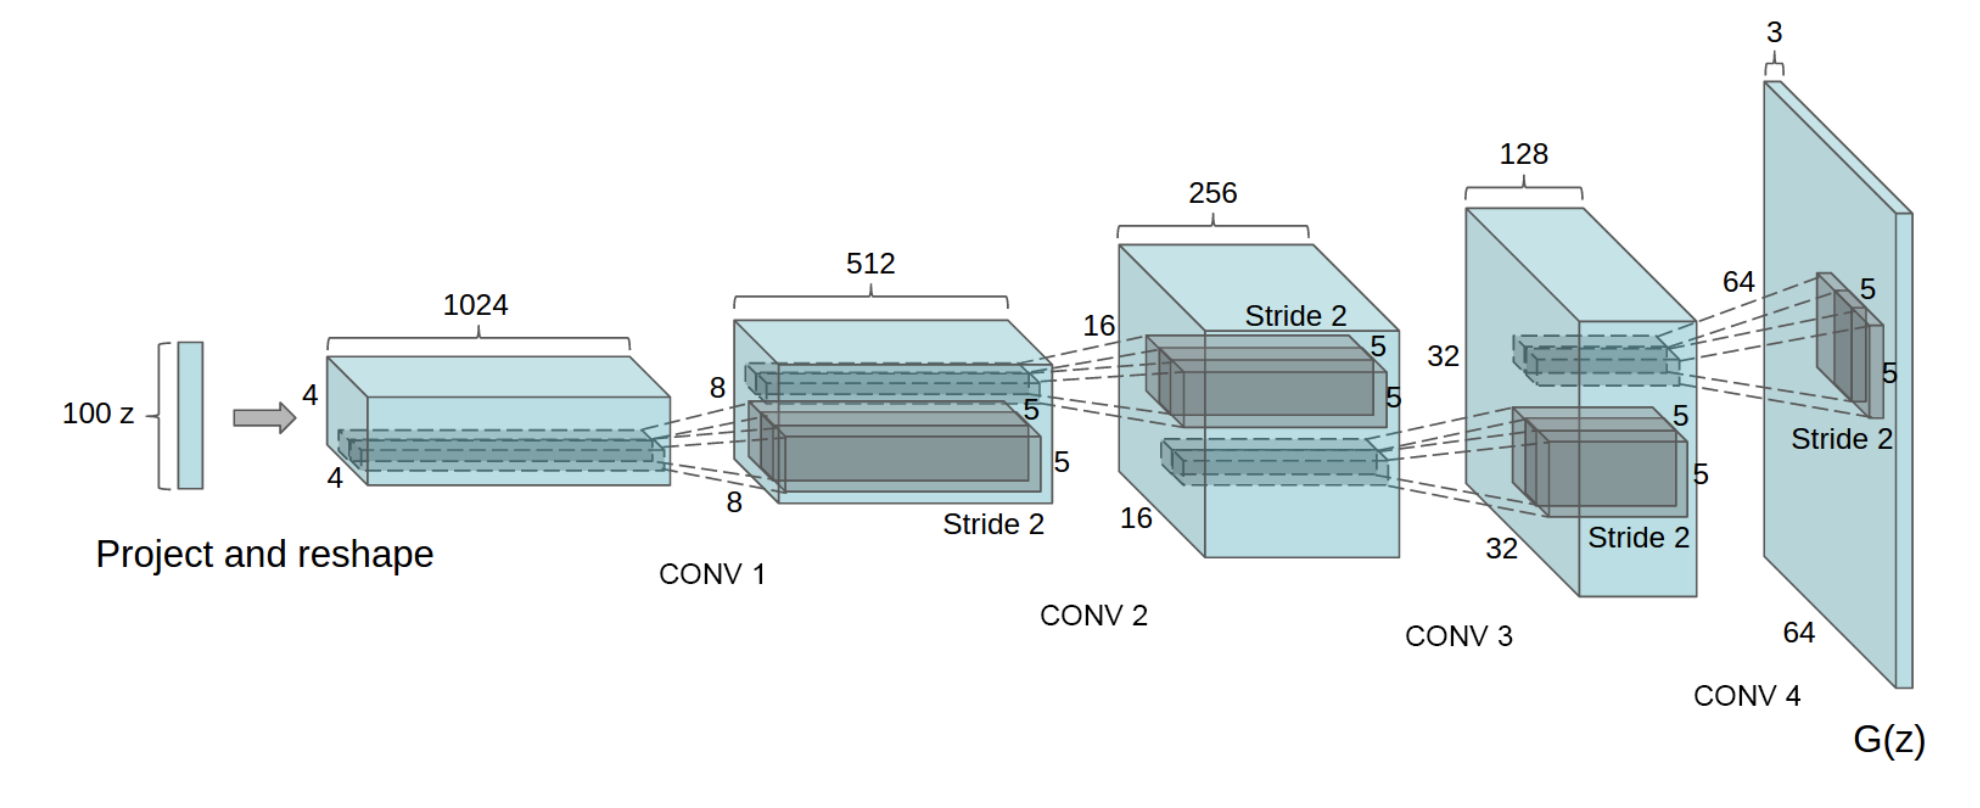

Figure: DCGAN generator used for LSUN scene modeling. A 100 dimensional uniform distribution Z is projected to a small spatial extent convolutional representation with many feature maps. A series of four fractionally-strided convolutions  then convert this high level representation into a 64 × 64 pixel image. Notably, no fully connected or pooling layers are used.

In [2]:
! python3 /Users/mgalfre/Cgnal/PyTorch-GAN/implementations/dcgan/dcgan.py --n_epochs 70

Namespace(n_epochs=70, batch_size=64, lr=0.0002, b1=0.5, b2=0.999, n_cpu=8, latent_dim=100, img_size=32, channels=1, sample_interval=400)
[Epoch 0/70] [Batch 0/938] [D loss: 0.693200] [G loss: 0.690882]
[Epoch 0/70] [Batch 1/938] [D loss: 0.693057] [G loss: 0.691508]
[Epoch 0/70] [Batch 2/938] [D loss: 0.693003] [G loss: 0.692097]
[Epoch 0/70] [Batch 3/938] [D loss: 0.692978] [G loss: 0.692489]
[Epoch 0/70] [Batch 4/938] [D loss: 0.692876] [G loss: 0.692858]
[Epoch 0/70] [Batch 5/938] [D loss: 0.692833] [G loss: 0.693181]
[Epoch 0/70] [Batch 6/938] [D loss: 0.692722] [G loss: 0.693403]
[Epoch 0/70] [Batch 7/938] [D loss: 0.692557] [G loss: 0.693586]
[Epoch 0/70] [Batch 8/938] [D loss: 0.692542] [G loss: 0.693727]
[Epoch 0/70] [Batch 9/938] [D loss: 0.692252] [G loss: 0.693625]
[Epoch 0/70] [Batch 10/938] [D loss: 0.692154] [G loss: 0.693596]
[Epoch 0/70] [Batch 11/938] [D loss: 0.691790] [G loss: 0.693577]
[Epoch 0/70] [Batch 12/938] [D loss: 0.691692] [G loss: 0.693904]
[Epoch 0/70] [

[Epoch 0/70] [Batch 122/938] [D loss: 0.701269] [G loss: 0.653488]
[Epoch 0/70] [Batch 123/938] [D loss: 0.703438] [G loss: 0.689047]
[Epoch 0/70] [Batch 124/938] [D loss: 0.694822] [G loss: 0.694510]
[Epoch 0/70] [Batch 125/938] [D loss: 0.697922] [G loss: 0.700934]
[Epoch 0/70] [Batch 126/938] [D loss: 0.694996] [G loss: 0.710277]
[Epoch 0/70] [Batch 127/938] [D loss: 0.695341] [G loss: 0.719382]
[Epoch 0/70] [Batch 128/938] [D loss: 0.692416] [G loss: 0.729001]
[Epoch 0/70] [Batch 129/938] [D loss: 0.688127] [G loss: 0.726468]
[Epoch 0/70] [Batch 130/938] [D loss: 0.691437] [G loss: 0.735310]
[Epoch 0/70] [Batch 131/938] [D loss: 0.689538] [G loss: 0.732931]
[Epoch 0/70] [Batch 132/938] [D loss: 0.685501] [G loss: 0.735815]
[Epoch 0/70] [Batch 133/938] [D loss: 0.688296] [G loss: 0.733664]
[Epoch 0/70] [Batch 134/938] [D loss: 0.685444] [G loss: 0.739532]
[Epoch 0/70] [Batch 135/938] [D loss: 0.689529] [G loss: 0.727872]
[Epoch 0/70] [Batch 136/938] [D loss: 0.687050] [G loss: 0.738

[Epoch 0/70] [Batch 245/938] [D loss: 0.692979] [G loss: 0.693296]
[Epoch 0/70] [Batch 246/938] [D loss: 0.694290] [G loss: 0.694356]
[Epoch 0/70] [Batch 247/938] [D loss: 0.696644] [G loss: 0.703658]
^C
Traceback (most recent call last):
  File "/Users/mgalfre/Cgnal/PyTorch-GAN/implementations/dcgan/dcgan.py", line 163, in <module>
    gen_imgs = generator(z)
  File "/Users/mgalfre/.virtualenvs/pyhton_3_9/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/Users/mgalfre/Cgnal/PyTorch-GAN/implementations/dcgan/dcgan.py", line 69, in forward
    img = self.conv_blocks(out)
  File "/Users/mgalfre/.virtualenvs/pyhton_3_9/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/Users/mgalfre/.virtualenvs/pyhton_3_9/lib/python3.9/site-packages/torch/nn/modules/container.py", line 204, in forward
    input = module(input)
  File "/Users/

# CGAN: Conditional Generative Adversarial Network


The original GAN generates data from random noise. 
That means that you can train it on, say, dog images, and it would generate more dog images. 
However, if you try to train it on both dog and cat images at the same time, it’ll produce blurry half-breeds.

CGAN (which stands for “conditional generative adversarial network”) aims to solve this issue by **telling the generator to generate images of only one particular class**, like a cat, dog, or Nicholas Cage. Conditional version of generative adversarial nets can be constructed by simply feeding the data we wish to condition on to both the generator and discriminator. 

Specifically, CGAN concatenates a one-hot vector `y` to the random noise vector `z` to result in an architecture that looks like this:

This model can generate `MNIST` digits conditioned on class labels and could be used to learn a multi-modal model, and provide preliminary examples of an application to image tagging in which we demonstrate how this approach can generate descriptive tags which are not part of training labels.

## Code

In [2]:
! python3 /Users/luisagaltarossa/Documents/doc_generative_ai/PyTorch-GAN/implementations/cgan/cgan.py --n_epochs 50

Namespace(n_epochs=50, batch_size=64, lr=0.0002, b1=0.5, b2=0.999, n_cpu=8, latent_dim=100, n_classes=10, img_size=32, channels=1, sample_interval=400)
[Epoch 0/50] [Batch 0/938] [D loss: 0.538612] [G loss: 1.058664]
[Epoch 0/50] [Batch 1/938] [D loss: 0.290028] [G loss: 1.034388]
[Epoch 0/50] [Batch 2/938] [D loss: 0.093410] [G loss: 1.001759]
[Epoch 0/50] [Batch 3/938] [D loss: 0.016541] [G loss: 0.981736]
[Epoch 0/50] [Batch 4/938] [D loss: 0.036868] [G loss: 0.960962]
[Epoch 0/50] [Batch 5/938] [D loss: 0.021295] [G loss: 0.937522]
[Epoch 0/50] [Batch 6/938] [D loss: 0.013975] [G loss: 0.941564]
[Epoch 0/50] [Batch 7/938] [D loss: 0.017764] [G loss: 0.936434]
[Epoch 0/50] [Batch 8/938] [D loss: 0.013620] [G loss: 0.927774]
[Epoch 0/50] [Batch 9/938] [D loss: 0.006991] [G loss: 0.909525]
[Epoch 0/50] [Batch 10/938] [D loss: 0.012484] [G loss: 0.893631]
[Epoch 0/50] [Batch 11/938] [D loss: 0.013819] [G loss: 0.886219]
[Epoch 0/50] [Batch 12/938] [D loss: 0.013587] [G loss: 0.874423]


[Epoch 0/50] [Batch 122/938] [D loss: 0.118045] [G loss: 0.636759]
[Epoch 0/50] [Batch 123/938] [D loss: 0.114629] [G loss: 0.480167]
[Epoch 0/50] [Batch 124/938] [D loss: 0.082133] [G loss: 0.519937]
[Epoch 0/50] [Batch 125/938] [D loss: 0.067557] [G loss: 0.709740]
[Epoch 0/50] [Batch 126/938] [D loss: 0.084913] [G loss: 0.497731]
[Epoch 0/50] [Batch 127/938] [D loss: 0.086865] [G loss: 0.535384]
[Epoch 0/50] [Batch 128/938] [D loss: 0.103866] [G loss: 0.578470]
[Epoch 0/50] [Batch 129/938] [D loss: 0.121923] [G loss: 0.342703]
[Epoch 0/50] [Batch 130/938] [D loss: 0.236145] [G loss: 0.986733]
[Epoch 0/50] [Batch 131/938] [D loss: 0.664806] [G loss: 0.031129]
[Epoch 0/50] [Batch 132/938] [D loss: 0.194456] [G loss: 0.662755]
[Epoch 0/50] [Batch 133/938] [D loss: 0.244449] [G loss: 0.845442]
[Epoch 0/50] [Batch 134/938] [D loss: 0.172192] [G loss: 0.419620]
[Epoch 0/50] [Batch 135/938] [D loss: 0.175536] [G loss: 0.311498]
[Epoch 0/50] [Batch 136/938] [D loss: 0.140912] [G loss: 0.430

[Epoch 0/50] [Batch 245/938] [D loss: 0.094093] [G loss: 0.609203]
[Epoch 0/50] [Batch 246/938] [D loss: 0.102589] [G loss: 0.477834]
[Epoch 0/50] [Batch 247/938] [D loss: 0.115502] [G loss: 0.433178]
[Epoch 0/50] [Batch 248/938] [D loss: 0.112838] [G loss: 0.500389]
[Epoch 0/50] [Batch 249/938] [D loss: 0.130015] [G loss: 0.472453]
[Epoch 0/50] [Batch 250/938] [D loss: 0.150671] [G loss: 0.374314]
[Epoch 0/50] [Batch 251/938] [D loss: 0.128075] [G loss: 0.519979]
[Epoch 0/50] [Batch 252/938] [D loss: 0.147200] [G loss: 0.400246]
[Epoch 0/50] [Batch 253/938] [D loss: 0.124761] [G loss: 0.421457]
[Epoch 0/50] [Batch 254/938] [D loss: 0.123206] [G loss: 0.778177]
[Epoch 0/50] [Batch 255/938] [D loss: 0.211969] [G loss: 0.166274]
[Epoch 0/50] [Batch 256/938] [D loss: 0.260236] [G loss: 1.354895]
[Epoch 0/50] [Batch 257/938] [D loss: 0.306617] [G loss: 0.072218]
[Epoch 0/50] [Batch 258/938] [D loss: 0.131858] [G loss: 0.463325]
[Epoch 0/50] [Batch 259/938] [D loss: 0.165370] [G loss: 0.777

[Epoch 0/50] [Batch 368/938] [D loss: 0.175360] [G loss: 0.968533]
[Epoch 0/50] [Batch 369/938] [D loss: 0.171412] [G loss: 0.853886]
[Epoch 0/50] [Batch 370/938] [D loss: 0.125759] [G loss: 0.433706]
[Epoch 0/50] [Batch 371/938] [D loss: 0.134371] [G loss: 0.315822]
[Epoch 0/50] [Batch 372/938] [D loss: 0.094264] [G loss: 0.512032]
[Epoch 0/50] [Batch 373/938] [D loss: 0.084972] [G loss: 0.667087]
[Epoch 0/50] [Batch 374/938] [D loss: 0.080856] [G loss: 0.603222]
[Epoch 0/50] [Batch 375/938] [D loss: 0.072713] [G loss: 0.546994]
[Epoch 0/50] [Batch 376/938] [D loss: 0.069866] [G loss: 0.612522]
[Epoch 0/50] [Batch 377/938] [D loss: 0.094177] [G loss: 0.631449]
[Epoch 0/50] [Batch 378/938] [D loss: 0.081022] [G loss: 0.492665]
[Epoch 0/50] [Batch 379/938] [D loss: 0.093658] [G loss: 0.709812]
[Epoch 0/50] [Batch 380/938] [D loss: 0.119409] [G loss: 0.400008]
[Epoch 0/50] [Batch 381/938] [D loss: 0.112561] [G loss: 0.770828]
[Epoch 0/50] [Batch 382/938] [D loss: 0.121132] [G loss: 0.317

[Epoch 0/50] [Batch 491/938] [D loss: 0.140953] [G loss: 1.144670]
[Epoch 0/50] [Batch 492/938] [D loss: 0.100217] [G loss: 0.392061]
[Epoch 0/50] [Batch 493/938] [D loss: 0.064969] [G loss: 0.691079]
[Epoch 0/50] [Batch 494/938] [D loss: 0.065256] [G loss: 0.761982]
[Epoch 0/50] [Batch 495/938] [D loss: 0.071475] [G loss: 0.517158]
[Epoch 0/50] [Batch 496/938] [D loss: 0.063381] [G loss: 0.760257]
[Epoch 0/50] [Batch 497/938] [D loss: 0.080556] [G loss: 0.568531]
[Epoch 0/50] [Batch 498/938] [D loss: 0.074864] [G loss: 0.905159]
[Epoch 0/50] [Batch 499/938] [D loss: 0.108206] [G loss: 0.384672]
[Epoch 0/50] [Batch 500/938] [D loss: 0.150497] [G loss: 1.183426]
[Epoch 0/50] [Batch 501/938] [D loss: 0.158967] [G loss: 0.243462]
[Epoch 0/50] [Batch 502/938] [D loss: 0.083343] [G loss: 0.903910]
[Epoch 0/50] [Batch 503/938] [D loss: 0.069721] [G loss: 0.721003]
[Epoch 0/50] [Batch 504/938] [D loss: 0.077083] [G loss: 0.496508]
[Epoch 0/50] [Batch 505/938] [D loss: 0.053413] [G loss: 0.807

[Epoch 0/50] [Batch 614/938] [D loss: 0.055596] [G loss: 0.769542]
[Epoch 0/50] [Batch 615/938] [D loss: 0.061750] [G loss: 0.586968]
[Epoch 0/50] [Batch 616/938] [D loss: 0.059185] [G loss: 0.661445]
[Epoch 0/50] [Batch 617/938] [D loss: 0.075791] [G loss: 0.792770]
[Epoch 0/50] [Batch 618/938] [D loss: 0.079298] [G loss: 0.549548]
[Epoch 0/50] [Batch 619/938] [D loss: 0.056553] [G loss: 0.721541]
[Epoch 0/50] [Batch 620/938] [D loss: 0.067287] [G loss: 0.770074]
[Epoch 0/50] [Batch 621/938] [D loss: 0.068212] [G loss: 0.592859]
[Epoch 0/50] [Batch 622/938] [D loss: 0.085143] [G loss: 0.678735]
[Epoch 0/50] [Batch 623/938] [D loss: 0.078776] [G loss: 0.546052]
[Epoch 0/50] [Batch 624/938] [D loss: 0.107248] [G loss: 1.002716]
[Epoch 0/50] [Batch 625/938] [D loss: 0.214582] [G loss: 0.198236]
[Epoch 0/50] [Batch 626/938] [D loss: 0.347990] [G loss: 1.860305]
[Epoch 0/50] [Batch 627/938] [D loss: 0.206653] [G loss: 0.200586]
[Epoch 0/50] [Batch 628/938] [D loss: 0.090394] [G loss: 0.453

[Epoch 0/50] [Batch 737/938] [D loss: 0.143683] [G loss: 0.366150]
[Epoch 0/50] [Batch 738/938] [D loss: 0.129576] [G loss: 0.321802]
[Epoch 0/50] [Batch 739/938] [D loss: 0.108597] [G loss: 0.491049]
[Epoch 0/50] [Batch 740/938] [D loss: 0.082113] [G loss: 0.636422]
[Epoch 0/50] [Batch 741/938] [D loss: 0.094481] [G loss: 0.638539]
[Epoch 0/50] [Batch 742/938] [D loss: 0.081843] [G loss: 0.578487]
[Epoch 0/50] [Batch 743/938] [D loss: 0.078333] [G loss: 0.593131]
[Epoch 0/50] [Batch 744/938] [D loss: 0.074687] [G loss: 0.637023]
[Epoch 0/50] [Batch 745/938] [D loss: 0.080030] [G loss: 0.627574]
[Epoch 0/50] [Batch 746/938] [D loss: 0.068934] [G loss: 0.699312]
[Epoch 0/50] [Batch 747/938] [D loss: 0.083237] [G loss: 0.628252]
[Epoch 0/50] [Batch 748/938] [D loss: 0.085878] [G loss: 0.506405]
[Epoch 0/50] [Batch 749/938] [D loss: 0.092161] [G loss: 0.780239]
[Epoch 0/50] [Batch 750/938] [D loss: 0.106245] [G loss: 0.583410]
[Epoch 0/50] [Batch 751/938] [D loss: 0.101798] [G loss: 0.449

[Epoch 0/50] [Batch 860/938] [D loss: 0.065799] [G loss: 0.726631]
[Epoch 0/50] [Batch 861/938] [D loss: 0.065963] [G loss: 0.667242]
[Epoch 0/50] [Batch 862/938] [D loss: 0.064463] [G loss: 0.766755]
[Epoch 0/50] [Batch 863/938] [D loss: 0.064168] [G loss: 0.611320]
[Epoch 0/50] [Batch 864/938] [D loss: 0.084358] [G loss: 0.759787]
[Epoch 0/50] [Batch 865/938] [D loss: 0.079057] [G loss: 0.547338]
[Epoch 0/50] [Batch 866/938] [D loss: 0.076190] [G loss: 0.781641]
[Epoch 0/50] [Batch 867/938] [D loss: 0.072748] [G loss: 0.718088]
[Epoch 0/50] [Batch 868/938] [D loss: 0.083320] [G loss: 0.661430]
[Epoch 0/50] [Batch 869/938] [D loss: 0.063287] [G loss: 0.654236]
[Epoch 0/50] [Batch 870/938] [D loss: 0.073325] [G loss: 0.834191]
[Epoch 0/50] [Batch 871/938] [D loss: 0.098725] [G loss: 0.455632]
[Epoch 0/50] [Batch 872/938] [D loss: 0.121684] [G loss: 1.106751]
[Epoch 0/50] [Batch 873/938] [D loss: 0.162728] [G loss: 0.260291]
[Epoch 0/50] [Batch 874/938] [D loss: 0.129569] [G loss: 1.231

[Epoch 1/50] [Batch 46/938] [D loss: 0.125795] [G loss: 0.378799]
[Epoch 1/50] [Batch 47/938] [D loss: 0.125433] [G loss: 0.933594]
[Epoch 1/50] [Batch 48/938] [D loss: 0.118712] [G loss: 0.389723]
[Epoch 1/50] [Batch 49/938] [D loss: 0.099420] [G loss: 0.837558]
[Epoch 1/50] [Batch 50/938] [D loss: 0.087252] [G loss: 0.518486]
[Epoch 1/50] [Batch 51/938] [D loss: 0.088674] [G loss: 0.643593]
[Epoch 1/50] [Batch 52/938] [D loss: 0.086409] [G loss: 0.622183]
[Epoch 1/50] [Batch 53/938] [D loss: 0.075657] [G loss: 0.672586]
[Epoch 1/50] [Batch 54/938] [D loss: 0.078327] [G loss: 0.705089]
[Epoch 1/50] [Batch 55/938] [D loss: 0.084263] [G loss: 0.635362]
[Epoch 1/50] [Batch 56/938] [D loss: 0.093715] [G loss: 0.648570]
[Epoch 1/50] [Batch 57/938] [D loss: 0.093238] [G loss: 0.714959]
[Epoch 1/50] [Batch 58/938] [D loss: 0.108926] [G loss: 0.403700]
[Epoch 1/50] [Batch 59/938] [D loss: 0.218842] [G loss: 1.486631]
[Epoch 1/50] [Batch 60/938] [D loss: 0.393757] [G loss: 0.062700]
[Epoch 1/5

[Epoch 1/50] [Batch 170/938] [D loss: 0.085413] [G loss: 0.778148]
[Epoch 1/50] [Batch 171/938] [D loss: 0.082883] [G loss: 0.549211]
[Epoch 1/50] [Batch 172/938] [D loss: 0.084761] [G loss: 0.620169]
[Epoch 1/50] [Batch 173/938] [D loss: 0.090641] [G loss: 0.641451]
[Epoch 1/50] [Batch 174/938] [D loss: 0.089748] [G loss: 0.543545]
[Epoch 1/50] [Batch 175/938] [D loss: 0.090256] [G loss: 0.566868]
[Epoch 1/50] [Batch 176/938] [D loss: 0.090628] [G loss: 0.727109]
[Epoch 1/50] [Batch 177/938] [D loss: 0.131684] [G loss: 0.391930]
[Epoch 1/50] [Batch 178/938] [D loss: 0.179270] [G loss: 1.061276]
[Epoch 1/50] [Batch 179/938] [D loss: 0.270507] [G loss: 0.175445]
[Epoch 1/50] [Batch 180/938] [D loss: 0.151099] [G loss: 0.998637]
[Epoch 1/50] [Batch 181/938] [D loss: 0.103897] [G loss: 0.652810]
[Epoch 1/50] [Batch 182/938] [D loss: 0.128109] [G loss: 0.365710]
[Epoch 1/50] [Batch 183/938] [D loss: 0.099355] [G loss: 0.540598]
[Epoch 1/50] [Batch 184/938] [D loss: 0.088029] [G loss: 0.728

[Epoch 1/50] [Batch 293/938] [D loss: 0.083880] [G loss: 0.579435]
[Epoch 1/50] [Batch 294/938] [D loss: 0.068910] [G loss: 0.737604]
[Epoch 1/50] [Batch 295/938] [D loss: 0.106696] [G loss: 0.625320]
[Epoch 1/50] [Batch 296/938] [D loss: 0.090731] [G loss: 0.535208]
[Epoch 1/50] [Batch 297/938] [D loss: 0.112633] [G loss: 1.030627]
[Epoch 1/50] [Batch 298/938] [D loss: 0.178876] [G loss: 0.253981]
[Epoch 1/50] [Batch 299/938] [D loss: 0.186690] [G loss: 1.150879]
[Epoch 1/50] [Batch 300/938] [D loss: 0.139416] [G loss: 0.338735]
[Epoch 1/50] [Batch 301/938] [D loss: 0.086117] [G loss: 0.670684]
[Epoch 1/50] [Batch 302/938] [D loss: 0.062644] [G loss: 0.768955]
[Epoch 1/50] [Batch 303/938] [D loss: 0.074363] [G loss: 0.602111]
[Epoch 1/50] [Batch 304/938] [D loss: 0.088101] [G loss: 0.724724]
[Epoch 1/50] [Batch 305/938] [D loss: 0.058620] [G loss: 0.679842]
[Epoch 1/50] [Batch 306/938] [D loss: 0.092065] [G loss: 0.773481]
[Epoch 1/50] [Batch 307/938] [D loss: 0.117980] [G loss: 0.408

[Epoch 1/50] [Batch 416/938] [D loss: 0.095044] [G loss: 0.462330]
[Epoch 1/50] [Batch 417/938] [D loss: 0.087909] [G loss: 0.898657]
[Epoch 1/50] [Batch 418/938] [D loss: 0.084583] [G loss: 0.561974]
[Epoch 1/50] [Batch 419/938] [D loss: 0.075244] [G loss: 0.743686]
[Epoch 1/50] [Batch 420/938] [D loss: 0.092479] [G loss: 0.527257]
[Epoch 1/50] [Batch 421/938] [D loss: 0.133573] [G loss: 1.079831]
[Epoch 1/50] [Batch 422/938] [D loss: 0.229806] [G loss: 0.172972]
[Epoch 1/50] [Batch 423/938] [D loss: 0.181297] [G loss: 1.239570]
[Epoch 1/50] [Batch 424/938] [D loss: 0.119863] [G loss: 0.452650]
[Epoch 1/50] [Batch 425/938] [D loss: 0.127320] [G loss: 0.402336]
[Epoch 1/50] [Batch 426/938] [D loss: 0.096174] [G loss: 0.888973]
[Epoch 1/50] [Batch 427/938] [D loss: 0.086709] [G loss: 0.635875]
[Epoch 1/50] [Batch 428/938] [D loss: 0.093781] [G loss: 0.486100]
[Epoch 1/50] [Batch 429/938] [D loss: 0.088723] [G loss: 0.837933]
[Epoch 1/50] [Batch 430/938] [D loss: 0.081711] [G loss: 0.585

[Epoch 1/50] [Batch 539/938] [D loss: 0.091046] [G loss: 0.729878]
[Epoch 1/50] [Batch 540/938] [D loss: 0.100118] [G loss: 0.564967]
[Epoch 1/50] [Batch 541/938] [D loss: 0.093171] [G loss: 0.782062]
[Epoch 1/50] [Batch 542/938] [D loss: 0.131874] [G loss: 0.431658]
[Epoch 1/50] [Batch 543/938] [D loss: 0.163779] [G loss: 1.217555]
[Epoch 1/50] [Batch 544/938] [D loss: 0.286930] [G loss: 0.143726]
[Epoch 1/50] [Batch 545/938] [D loss: 0.230866] [G loss: 1.444159]
[Epoch 1/50] [Batch 546/938] [D loss: 0.110424] [G loss: 0.445820]
[Epoch 1/50] [Batch 547/938] [D loss: 0.146754] [G loss: 0.316339]
[Epoch 1/50] [Batch 548/938] [D loss: 0.102821] [G loss: 0.782223]
[Epoch 1/50] [Batch 549/938] [D loss: 0.080572] [G loss: 0.746190]
[Epoch 1/50] [Batch 550/938] [D loss: 0.090329] [G loss: 0.529043]
[Epoch 1/50] [Batch 551/938] [D loss: 0.081324] [G loss: 0.557986]
[Epoch 1/50] [Batch 552/938] [D loss: 0.102359] [G loss: 0.738833]
[Epoch 1/50] [Batch 553/938] [D loss: 0.083123] [G loss: 0.583

[Epoch 1/50] [Batch 662/938] [D loss: 0.086575] [G loss: 0.695674]
[Epoch 1/50] [Batch 663/938] [D loss: 0.078182] [G loss: 0.571292]
[Epoch 1/50] [Batch 664/938] [D loss: 0.076093] [G loss: 0.568270]
[Epoch 1/50] [Batch 665/938] [D loss: 0.066872] [G loss: 0.657068]
[Epoch 1/50] [Batch 666/938] [D loss: 0.096078] [G loss: 0.665418]
[Epoch 1/50] [Batch 667/938] [D loss: 0.100526] [G loss: 0.528978]
[Epoch 1/50] [Batch 668/938] [D loss: 0.088883] [G loss: 0.688023]
[Epoch 1/50] [Batch 669/938] [D loss: 0.099303] [G loss: 0.687611]
[Epoch 1/50] [Batch 670/938] [D loss: 0.101311] [G loss: 0.519703]
[Epoch 1/50] [Batch 671/938] [D loss: 0.128176] [G loss: 0.886485]
[Epoch 1/50] [Batch 672/938] [D loss: 0.126004] [G loss: 0.358314]
[Epoch 1/50] [Batch 673/938] [D loss: 0.136118] [G loss: 0.960097]
[Epoch 1/50] [Batch 674/938] [D loss: 0.111005] [G loss: 0.460030]
[Epoch 1/50] [Batch 675/938] [D loss: 0.121812] [G loss: 0.627828]
[Epoch 1/50] [Batch 676/938] [D loss: 0.087042] [G loss: 0.562

[Epoch 1/50] [Batch 785/938] [D loss: 0.095551] [G loss: 0.552725]
[Epoch 1/50] [Batch 786/938] [D loss: 0.096433] [G loss: 0.806739]
[Epoch 1/50] [Batch 787/938] [D loss: 0.096303] [G loss: 0.468133]
[Epoch 1/50] [Batch 788/938] [D loss: 0.113590] [G loss: 1.006618]
[Epoch 1/50] [Batch 789/938] [D loss: 0.143334] [G loss: 0.316481]
[Epoch 1/50] [Batch 790/938] [D loss: 0.120500] [G loss: 1.082496]
[Epoch 1/50] [Batch 791/938] [D loss: 0.131737] [G loss: 0.364892]
[Epoch 1/50] [Batch 792/938] [D loss: 0.128362] [G loss: 0.725883]
[Epoch 1/50] [Batch 793/938] [D loss: 0.107421] [G loss: 0.499948]
[Epoch 1/50] [Batch 794/938] [D loss: 0.087380] [G loss: 0.773774]
[Epoch 1/50] [Batch 795/938] [D loss: 0.091012] [G loss: 0.596583]
[Epoch 1/50] [Batch 796/938] [D loss: 0.086392] [G loss: 0.614836]
[Epoch 1/50] [Batch 797/938] [D loss: 0.104296] [G loss: 0.838446]
[Epoch 1/50] [Batch 798/938] [D loss: 0.113735] [G loss: 0.433616]
[Epoch 1/50] [Batch 799/938] [D loss: 0.091466] [G loss: 0.888

[Epoch 1/50] [Batch 908/938] [D loss: 0.089063] [G loss: 0.539870]
[Epoch 1/50] [Batch 909/938] [D loss: 0.094854] [G loss: 0.883077]
[Epoch 1/50] [Batch 910/938] [D loss: 0.124323] [G loss: 0.456708]
[Epoch 1/50] [Batch 911/938] [D loss: 0.080583] [G loss: 0.767550]
[Epoch 1/50] [Batch 912/938] [D loss: 0.097108] [G loss: 0.562225]
[Epoch 1/50] [Batch 913/938] [D loss: 0.089965] [G loss: 0.667215]
[Epoch 1/50] [Batch 914/938] [D loss: 0.087821] [G loss: 0.588313]
[Epoch 1/50] [Batch 915/938] [D loss: 0.101704] [G loss: 0.711233]
[Epoch 1/50] [Batch 916/938] [D loss: 0.097716] [G loss: 0.513043]
[Epoch 1/50] [Batch 917/938] [D loss: 0.120828] [G loss: 0.699772]
[Epoch 1/50] [Batch 918/938] [D loss: 0.118455] [G loss: 0.548049]
[Epoch 1/50] [Batch 919/938] [D loss: 0.094896] [G loss: 0.680702]
[Epoch 1/50] [Batch 920/938] [D loss: 0.112108] [G loss: 0.543793]
[Epoch 1/50] [Batch 921/938] [D loss: 0.098384] [G loss: 0.552111]
[Epoch 1/50] [Batch 922/938] [D loss: 0.083652] [G loss: 0.739

[Epoch 2/50] [Batch 94/938] [D loss: 0.108471] [G loss: 0.492664]
[Epoch 2/50] [Batch 95/938] [D loss: 0.173142] [G loss: 1.077688]
[Epoch 2/50] [Batch 96/938] [D loss: 0.376979] [G loss: 0.079907]
[Epoch 2/50] [Batch 97/938] [D loss: 0.399308] [G loss: 1.767452]
[Epoch 2/50] [Batch 98/938] [D loss: 0.173844] [G loss: 0.319310]
[Epoch 2/50] [Batch 99/938] [D loss: 0.156969] [G loss: 0.308595]
[Epoch 2/50] [Batch 100/938] [D loss: 0.105268] [G loss: 0.567296]
[Epoch 2/50] [Batch 101/938] [D loss: 0.118585] [G loss: 0.710749]
[Epoch 2/50] [Batch 102/938] [D loss: 0.120330] [G loss: 0.563360]
[Epoch 2/50] [Batch 103/938] [D loss: 0.117544] [G loss: 0.442681]
[Epoch 2/50] [Batch 104/938] [D loss: 0.107943] [G loss: 0.634947]
[Epoch 2/50] [Batch 105/938] [D loss: 0.102789] [G loss: 0.552433]
[Epoch 2/50] [Batch 106/938] [D loss: 0.112585] [G loss: 0.474972]
[Epoch 2/50] [Batch 107/938] [D loss: 0.100426] [G loss: 0.540232]
[Epoch 2/50] [Batch 108/938] [D loss: 0.113211] [G loss: 0.809426]
[

[Epoch 2/50] [Batch 217/938] [D loss: 0.107955] [G loss: 0.622008]
[Epoch 2/50] [Batch 218/938] [D loss: 0.099813] [G loss: 0.696747]
[Epoch 2/50] [Batch 219/938] [D loss: 0.133683] [G loss: 0.453366]
[Epoch 2/50] [Batch 220/938] [D loss: 0.115782] [G loss: 0.872671]
[Epoch 2/50] [Batch 221/938] [D loss: 0.163600] [G loss: 0.308586]
[Epoch 2/50] [Batch 222/938] [D loss: 0.183416] [G loss: 1.130584]
[Epoch 2/50] [Batch 223/938] [D loss: 0.201405] [G loss: 0.213893]
[Epoch 2/50] [Batch 224/938] [D loss: 0.109105] [G loss: 0.775608]
[Epoch 2/50] [Batch 225/938] [D loss: 0.130605] [G loss: 0.671322]
[Epoch 2/50] [Batch 226/938] [D loss: 0.122280] [G loss: 0.383333]
[Epoch 2/50] [Batch 227/938] [D loss: 0.123377] [G loss: 0.590203]
[Epoch 2/50] [Batch 228/938] [D loss: 0.131683] [G loss: 0.563587]
[Epoch 2/50] [Batch 229/938] [D loss: 0.101941] [G loss: 0.528989]
[Epoch 2/50] [Batch 230/938] [D loss: 0.111606] [G loss: 0.602106]
[Epoch 2/50] [Batch 231/938] [D loss: 0.115804] [G loss: 0.616

[Epoch 2/50] [Batch 340/938] [D loss: 0.163586] [G loss: 0.847570]
[Epoch 2/50] [Batch 341/938] [D loss: 0.134347] [G loss: 0.601623]
[Epoch 2/50] [Batch 342/938] [D loss: 0.122409] [G loss: 0.360912]
[Epoch 2/50] [Batch 343/938] [D loss: 0.116417] [G loss: 0.589875]
[Epoch 2/50] [Batch 344/938] [D loss: 0.099265] [G loss: 0.659093]
[Epoch 2/50] [Batch 345/938] [D loss: 0.109943] [G loss: 0.651418]
[Epoch 2/50] [Batch 346/938] [D loss: 0.096230] [G loss: 0.528748]
[Epoch 2/50] [Batch 347/938] [D loss: 0.095252] [G loss: 0.625756]
[Epoch 2/50] [Batch 348/938] [D loss: 0.096606] [G loss: 0.583652]
[Epoch 2/50] [Batch 349/938] [D loss: 0.111387] [G loss: 0.544591]
[Epoch 2/50] [Batch 350/938] [D loss: 0.117718] [G loss: 0.788078]
[Epoch 2/50] [Batch 351/938] [D loss: 0.118061] [G loss: 0.535574]
[Epoch 2/50] [Batch 352/938] [D loss: 0.091465] [G loss: 0.650498]
[Epoch 2/50] [Batch 353/938] [D loss: 0.095550] [G loss: 0.533663]
[Epoch 2/50] [Batch 354/938] [D loss: 0.130085] [G loss: 0.627

[Epoch 2/50] [Batch 463/938] [D loss: 0.114983] [G loss: 0.618351]
[Epoch 2/50] [Batch 464/938] [D loss: 0.104315] [G loss: 0.552101]
[Epoch 2/50] [Batch 465/938] [D loss: 0.111296] [G loss: 0.619434]
[Epoch 2/50] [Batch 466/938] [D loss: 0.105348] [G loss: 0.537498]
[Epoch 2/50] [Batch 467/938] [D loss: 0.100430] [G loss: 0.710109]
[Epoch 2/50] [Batch 468/938] [D loss: 0.092823] [G loss: 0.587621]
[Epoch 2/50] [Batch 469/938] [D loss: 0.127945] [G loss: 0.767910]
[Epoch 2/50] [Batch 470/938] [D loss: 0.140108] [G loss: 0.339883]
[Epoch 2/50] [Batch 471/938] [D loss: 0.166931] [G loss: 1.160028]
[Epoch 2/50] [Batch 472/938] [D loss: 0.233687] [G loss: 0.194645]
[Epoch 2/50] [Batch 473/938] [D loss: 0.165142] [G loss: 1.009632]
[Epoch 2/50] [Batch 474/938] [D loss: 0.124943] [G loss: 0.516460]
[Epoch 2/50] [Batch 475/938] [D loss: 0.158515] [G loss: 0.320138]
[Epoch 2/50] [Batch 476/938] [D loss: 0.118651] [G loss: 0.725353]
[Epoch 2/50] [Batch 477/938] [D loss: 0.118793] [G loss: 0.653

[Epoch 2/50] [Batch 586/938] [D loss: 0.112009] [G loss: 0.527110]
[Epoch 2/50] [Batch 587/938] [D loss: 0.128679] [G loss: 0.730212]
[Epoch 2/50] [Batch 588/938] [D loss: 0.104674] [G loss: 0.603002]
[Epoch 2/50] [Batch 589/938] [D loss: 0.116966] [G loss: 0.443808]
[Epoch 2/50] [Batch 590/938] [D loss: 0.129682] [G loss: 0.687345]
[Epoch 2/50] [Batch 591/938] [D loss: 0.124304] [G loss: 0.427830]
[Epoch 2/50] [Batch 592/938] [D loss: 0.116595] [G loss: 0.776518]
[Epoch 2/50] [Batch 593/938] [D loss: 0.100045] [G loss: 0.517567]
[Epoch 2/50] [Batch 594/938] [D loss: 0.109357] [G loss: 0.505979]
[Epoch 2/50] [Batch 595/938] [D loss: 0.122657] [G loss: 0.790577]
[Epoch 2/50] [Batch 596/938] [D loss: 0.132917] [G loss: 0.388902]
[Epoch 2/50] [Batch 597/938] [D loss: 0.117166] [G loss: 0.980245]
[Epoch 2/50] [Batch 598/938] [D loss: 0.120864] [G loss: 0.350968]
[Epoch 2/50] [Batch 599/938] [D loss: 0.118006] [G loss: 0.748254]
[Epoch 2/50] [Batch 600/938] [D loss: 0.117604] [G loss: 0.400

[Epoch 2/50] [Batch 709/938] [D loss: 0.084945] [G loss: 0.685553]
[Epoch 2/50] [Batch 710/938] [D loss: 0.096083] [G loss: 0.565139]
[Epoch 2/50] [Batch 711/938] [D loss: 0.105991] [G loss: 0.622337]
[Epoch 2/50] [Batch 712/938] [D loss: 0.106154] [G loss: 0.521361]
[Epoch 2/50] [Batch 713/938] [D loss: 0.096597] [G loss: 0.721229]
[Epoch 2/50] [Batch 714/938] [D loss: 0.097016] [G loss: 0.758595]
[Epoch 2/50] [Batch 715/938] [D loss: 0.120520] [G loss: 0.408755]
[Epoch 2/50] [Batch 716/938] [D loss: 0.121364] [G loss: 0.822509]
[Epoch 2/50] [Batch 717/938] [D loss: 0.121558] [G loss: 0.427776]
[Epoch 2/50] [Batch 718/938] [D loss: 0.109353] [G loss: 0.950363]
[Epoch 2/50] [Batch 719/938] [D loss: 0.109694] [G loss: 0.429805]
[Epoch 2/50] [Batch 720/938] [D loss: 0.109876] [G loss: 0.772129]
[Epoch 2/50] [Batch 721/938] [D loss: 0.090621] [G loss: 0.573829]
[Epoch 2/50] [Batch 722/938] [D loss: 0.087494] [G loss: 0.693404]
[Epoch 2/50] [Batch 723/938] [D loss: 0.091696] [G loss: 0.665

[Epoch 2/50] [Batch 832/938] [D loss: 0.224130] [G loss: 1.470795]
[Epoch 2/50] [Batch 833/938] [D loss: 0.123178] [G loss: 0.372442]
[Epoch 2/50] [Batch 834/938] [D loss: 0.114074] [G loss: 0.412757]
[Epoch 2/50] [Batch 835/938] [D loss: 0.098143] [G loss: 0.829469]
[Epoch 2/50] [Batch 836/938] [D loss: 0.099229] [G loss: 0.702448]
[Epoch 2/50] [Batch 837/938] [D loss: 0.111754] [G loss: 0.412376]
[Epoch 2/50] [Batch 838/938] [D loss: 0.096654] [G loss: 0.715159]
[Epoch 2/50] [Batch 839/938] [D loss: 0.107170] [G loss: 0.690406]
[Epoch 2/50] [Batch 840/938] [D loss: 0.095261] [G loss: 0.634652]
[Epoch 2/50] [Batch 841/938] [D loss: 0.091608] [G loss: 0.655171]
[Epoch 2/50] [Batch 842/938] [D loss: 0.088691] [G loss: 0.664900]
[Epoch 2/50] [Batch 843/938] [D loss: 0.094687] [G loss: 0.830422]
[Epoch 2/50] [Batch 844/938] [D loss: 0.112731] [G loss: 0.507358]
[Epoch 2/50] [Batch 845/938] [D loss: 0.085785] [G loss: 0.741984]
[Epoch 2/50] [Batch 846/938] [D loss: 0.082199] [G loss: 0.632

[Epoch 3/50] [Batch 17/938] [D loss: 0.122961] [G loss: 0.550676]
[Epoch 3/50] [Batch 18/938] [D loss: 0.096284] [G loss: 0.524095]
[Epoch 3/50] [Batch 19/938] [D loss: 0.100995] [G loss: 0.733816]
[Epoch 3/50] [Batch 20/938] [D loss: 0.101762] [G loss: 0.577956]
[Epoch 3/50] [Batch 21/938] [D loss: 0.105985] [G loss: 0.542986]
[Epoch 3/50] [Batch 22/938] [D loss: 0.103038] [G loss: 0.698401]
[Epoch 3/50] [Batch 23/938] [D loss: 0.101177] [G loss: 0.582285]
[Epoch 3/50] [Batch 24/938] [D loss: 0.113868] [G loss: 0.558344]
[Epoch 3/50] [Batch 25/938] [D loss: 0.110454] [G loss: 0.707366]
[Epoch 3/50] [Batch 26/938] [D loss: 0.118378] [G loss: 0.525148]
[Epoch 3/50] [Batch 27/938] [D loss: 0.103166] [G loss: 0.589296]
[Epoch 3/50] [Batch 28/938] [D loss: 0.112019] [G loss: 0.623841]
[Epoch 3/50] [Batch 29/938] [D loss: 0.123967] [G loss: 0.437278]
[Epoch 3/50] [Batch 30/938] [D loss: 0.119326] [G loss: 0.862655]
[Epoch 3/50] [Batch 31/938] [D loss: 0.170053] [G loss: 0.314669]
[Epoch 3/5

[Epoch 3/50] [Batch 141/938] [D loss: 0.114723] [G loss: 0.924986]
[Epoch 3/50] [Batch 142/938] [D loss: 0.136306] [G loss: 0.423970]
[Epoch 3/50] [Batch 143/938] [D loss: 0.142754] [G loss: 1.093915]
[Epoch 3/50] [Batch 144/938] [D loss: 0.171821] [G loss: 0.250456]
[Epoch 3/50] [Batch 145/938] [D loss: 0.115207] [G loss: 0.885073]
[Epoch 3/50] [Batch 146/938] [D loss: 0.080726] [G loss: 0.717194]
[Epoch 3/50] [Batch 147/938] [D loss: 0.101282] [G loss: 0.515436]
[Epoch 3/50] [Batch 148/938] [D loss: 0.097881] [G loss: 0.615194]
[Epoch 3/50] [Batch 149/938] [D loss: 0.083055] [G loss: 0.809798]
[Epoch 3/50] [Batch 150/938] [D loss: 0.088786] [G loss: 0.566017]
[Epoch 3/50] [Batch 151/938] [D loss: 0.073556] [G loss: 0.645637]
[Epoch 3/50] [Batch 152/938] [D loss: 0.086652] [G loss: 0.666859]
[Epoch 3/50] [Batch 153/938] [D loss: 0.086010] [G loss: 0.600406]
[Epoch 3/50] [Batch 154/938] [D loss: 0.085123] [G loss: 0.741056]
[Epoch 3/50] [Batch 155/938] [D loss: 0.094684] [G loss: 0.532

[Epoch 3/50] [Batch 264/938] [D loss: 0.110742] [G loss: 0.525795]
[Epoch 3/50] [Batch 265/938] [D loss: 0.150573] [G loss: 0.803843]
[Epoch 3/50] [Batch 266/938] [D loss: 0.153563] [G loss: 0.331480]
[Epoch 3/50] [Batch 267/938] [D loss: 0.124537] [G loss: 0.803322]
[Epoch 3/50] [Batch 268/938] [D loss: 0.106321] [G loss: 0.461632]
[Epoch 3/50] [Batch 269/938] [D loss: 0.105052] [G loss: 0.590223]
[Epoch 3/50] [Batch 270/938] [D loss: 0.098998] [G loss: 0.521488]
[Epoch 3/50] [Batch 271/938] [D loss: 0.100226] [G loss: 0.549506]
[Epoch 3/50] [Batch 272/938] [D loss: 0.141618] [G loss: 0.821230]
[Epoch 3/50] [Batch 273/938] [D loss: 0.176767] [G loss: 0.278232]
[Epoch 3/50] [Batch 274/938] [D loss: 0.215510] [G loss: 1.166576]
[Epoch 3/50] [Batch 275/938] [D loss: 0.201053] [G loss: 0.199790]
[Epoch 3/50] [Batch 276/938] [D loss: 0.107960] [G loss: 0.670162]
[Epoch 3/50] [Batch 277/938] [D loss: 0.132228] [G loss: 0.742797]
[Epoch 3/50] [Batch 278/938] [D loss: 0.120353] [G loss: 0.449

[Epoch 3/50] [Batch 387/938] [D loss: 0.107538] [G loss: 0.605499]
[Epoch 3/50] [Batch 388/938] [D loss: 0.110974] [G loss: 0.552186]
[Epoch 3/50] [Batch 389/938] [D loss: 0.105830] [G loss: 0.707238]
[Epoch 3/50] [Batch 390/938] [D loss: 0.103841] [G loss: 0.499823]
[Epoch 3/50] [Batch 391/938] [D loss: 0.113328] [G loss: 0.880120]
[Epoch 3/50] [Batch 392/938] [D loss: 0.113459] [G loss: 0.374767]
[Epoch 3/50] [Batch 393/938] [D loss: 0.103098] [G loss: 0.835827]
[Epoch 3/50] [Batch 394/938] [D loss: 0.086112] [G loss: 0.487044]
[Epoch 3/50] [Batch 395/938] [D loss: 0.137539] [G loss: 0.929623]
[Epoch 3/50] [Batch 396/938] [D loss: 0.178164] [G loss: 0.270719]
[Epoch 3/50] [Batch 397/938] [D loss: 0.172850] [G loss: 0.862543]
[Epoch 3/50] [Batch 398/938] [D loss: 0.128593] [G loss: 0.405506]
[Epoch 3/50] [Batch 399/938] [D loss: 0.127986] [G loss: 0.633206]
[Epoch 3/50] [Batch 400/938] [D loss: 0.119117] [G loss: 0.575592]
[Epoch 3/50] [Batch 401/938] [D loss: 0.126116] [G loss: 0.421

[Epoch 3/50] [Batch 510/938] [D loss: 0.100356] [G loss: 0.434568]
[Epoch 3/50] [Batch 511/938] [D loss: 0.121996] [G loss: 0.729819]
[Epoch 3/50] [Batch 512/938] [D loss: 0.120498] [G loss: 0.448546]
[Epoch 3/50] [Batch 513/938] [D loss: 0.098554] [G loss: 0.760959]
[Epoch 3/50] [Batch 514/938] [D loss: 0.106045] [G loss: 0.657908]
[Epoch 3/50] [Batch 515/938] [D loss: 0.120725] [G loss: 0.453678]
[Epoch 3/50] [Batch 516/938] [D loss: 0.128296] [G loss: 0.951854]
[Epoch 3/50] [Batch 517/938] [D loss: 0.171357] [G loss: 0.274773]
[Epoch 3/50] [Batch 518/938] [D loss: 0.135147] [G loss: 0.928926]
[Epoch 3/50] [Batch 519/938] [D loss: 0.144103] [G loss: 0.358121]
[Epoch 3/50] [Batch 520/938] [D loss: 0.114563] [G loss: 0.652600]
[Epoch 3/50] [Batch 521/938] [D loss: 0.096225] [G loss: 0.549403]
[Epoch 3/50] [Batch 522/938] [D loss: 0.110998] [G loss: 0.722367]
[Epoch 3/50] [Batch 523/938] [D loss: 0.097677] [G loss: 0.582169]
[Epoch 3/50] [Batch 524/938] [D loss: 0.108150] [G loss: 0.697

[Epoch 3/50] [Batch 633/938] [D loss: 0.127685] [G loss: 0.867234]
[Epoch 3/50] [Batch 634/938] [D loss: 0.178088] [G loss: 0.305876]
[Epoch 3/50] [Batch 635/938] [D loss: 0.139315] [G loss: 0.951227]
[Epoch 3/50] [Batch 636/938] [D loss: 0.138018] [G loss: 0.424802]
[Epoch 3/50] [Batch 637/938] [D loss: 0.135219] [G loss: 0.689125]
[Epoch 3/50] [Batch 638/938] [D loss: 0.118182] [G loss: 0.506407]
[Epoch 3/50] [Batch 639/938] [D loss: 0.104356] [G loss: 0.621704]
[Epoch 3/50] [Batch 640/938] [D loss: 0.124741] [G loss: 0.652580]
[Epoch 3/50] [Batch 641/938] [D loss: 0.132684] [G loss: 0.448675]
[Epoch 3/50] [Batch 642/938] [D loss: 0.133015] [G loss: 0.473355]
[Epoch 3/50] [Batch 643/938] [D loss: 0.130397] [G loss: 0.837527]
[Epoch 3/50] [Batch 644/938] [D loss: 0.159177] [G loss: 0.389929]
[Epoch 3/50] [Batch 645/938] [D loss: 0.163919] [G loss: 0.817837]
[Epoch 3/50] [Batch 646/938] [D loss: 0.142847] [G loss: 0.370742]
[Epoch 3/50] [Batch 647/938] [D loss: 0.105588] [G loss: 0.726

[Epoch 3/50] [Batch 756/938] [D loss: 0.105070] [G loss: 0.780780]
[Epoch 3/50] [Batch 757/938] [D loss: 0.112461] [G loss: 0.483717]
[Epoch 3/50] [Batch 758/938] [D loss: 0.122472] [G loss: 0.590010]
[Epoch 3/50] [Batch 759/938] [D loss: 0.098706] [G loss: 0.493364]
[Epoch 3/50] [Batch 760/938] [D loss: 0.113693] [G loss: 0.785747]
[Epoch 3/50] [Batch 761/938] [D loss: 0.149896] [G loss: 0.469778]
[Epoch 3/50] [Batch 762/938] [D loss: 0.189321] [G loss: 0.949321]
[Epoch 3/50] [Batch 763/938] [D loss: 0.242862] [G loss: 0.160116]
[Epoch 3/50] [Batch 764/938] [D loss: 0.222166] [G loss: 1.109664]
[Epoch 3/50] [Batch 765/938] [D loss: 0.158068] [G loss: 0.300129]
[Epoch 3/50] [Batch 766/938] [D loss: 0.139053] [G loss: 0.452769]
[Epoch 3/50] [Batch 767/938] [D loss: 0.116730] [G loss: 0.541524]
[Epoch 3/50] [Batch 768/938] [D loss: 0.110233] [G loss: 0.573045]
[Epoch 3/50] [Batch 769/938] [D loss: 0.145046] [G loss: 0.561805]
[Epoch 3/50] [Batch 770/938] [D loss: 0.108120] [G loss: 0.462

[Epoch 3/50] [Batch 879/938] [D loss: 0.201393] [G loss: 1.006829]
[Epoch 3/50] [Batch 880/938] [D loss: 0.354647] [G loss: 0.088087]
[Epoch 3/50] [Batch 881/938] [D loss: 0.276813] [G loss: 1.180294]
[Epoch 3/50] [Batch 882/938] [D loss: 0.140825] [G loss: 0.339913]
[Epoch 3/50] [Batch 883/938] [D loss: 0.131457] [G loss: 0.390146]
[Epoch 3/50] [Batch 884/938] [D loss: 0.112407] [G loss: 0.645718]
[Epoch 3/50] [Batch 885/938] [D loss: 0.118162] [G loss: 0.532370]
[Epoch 3/50] [Batch 886/938] [D loss: 0.127078] [G loss: 0.485254]
[Epoch 3/50] [Batch 887/938] [D loss: 0.114985] [G loss: 0.558028]
[Epoch 3/50] [Batch 888/938] [D loss: 0.134236] [G loss: 0.483014]
[Epoch 3/50] [Batch 889/938] [D loss: 0.149185] [G loss: 0.695944]
[Epoch 3/50] [Batch 890/938] [D loss: 0.124867] [G loss: 0.386653]
[Epoch 3/50] [Batch 891/938] [D loss: 0.101288] [G loss: 0.603249]
[Epoch 3/50] [Batch 892/938] [D loss: 0.116598] [G loss: 0.591637]
[Epoch 3/50] [Batch 893/938] [D loss: 0.097417] [G loss: 0.641

[Epoch 4/50] [Batch 65/938] [D loss: 0.144554] [G loss: 0.652211]
[Epoch 4/50] [Batch 66/938] [D loss: 0.164629] [G loss: 0.290056]
[Epoch 4/50] [Batch 67/938] [D loss: 0.287721] [G loss: 1.312605]
[Epoch 4/50] [Batch 68/938] [D loss: 0.434854] [G loss: 0.046131]
[Epoch 4/50] [Batch 69/938] [D loss: 0.182811] [G loss: 0.826359]
[Epoch 4/50] [Batch 70/938] [D loss: 0.185023] [G loss: 0.678932]
[Epoch 4/50] [Batch 71/938] [D loss: 0.161878] [G loss: 0.300308]
[Epoch 4/50] [Batch 72/938] [D loss: 0.136727] [G loss: 0.396615]
[Epoch 4/50] [Batch 73/938] [D loss: 0.115786] [G loss: 0.589006]
[Epoch 4/50] [Batch 74/938] [D loss: 0.135253] [G loss: 0.687871]
[Epoch 4/50] [Batch 75/938] [D loss: 0.122288] [G loss: 0.464205]
[Epoch 4/50] [Batch 76/938] [D loss: 0.110559] [G loss: 0.474972]
[Epoch 4/50] [Batch 77/938] [D loss: 0.108226] [G loss: 0.553056]
[Epoch 4/50] [Batch 78/938] [D loss: 0.112461] [G loss: 0.523478]
[Epoch 4/50] [Batch 79/938] [D loss: 0.103202] [G loss: 0.633484]
[Epoch 4/5

[Epoch 4/50] [Batch 188/938] [D loss: 0.151106] [G loss: 0.580493]
[Epoch 4/50] [Batch 189/938] [D loss: 0.135567] [G loss: 0.425138]
[Epoch 4/50] [Batch 190/938] [D loss: 0.134756] [G loss: 0.517709]
[Epoch 4/50] [Batch 191/938] [D loss: 0.118582] [G loss: 0.710465]
[Epoch 4/50] [Batch 192/938] [D loss: 0.105758] [G loss: 0.646828]
[Epoch 4/50] [Batch 193/938] [D loss: 0.109952] [G loss: 0.503155]
[Epoch 4/50] [Batch 194/938] [D loss: 0.125347] [G loss: 0.680261]
[Epoch 4/50] [Batch 195/938] [D loss: 0.110776] [G loss: 0.481469]
[Epoch 4/50] [Batch 196/938] [D loss: 0.091625] [G loss: 0.531817]
[Epoch 4/50] [Batch 197/938] [D loss: 0.108229] [G loss: 0.747106]
[Epoch 4/50] [Batch 198/938] [D loss: 0.107503] [G loss: 0.530574]
[Epoch 4/50] [Batch 199/938] [D loss: 0.116462] [G loss: 0.487251]
[Epoch 4/50] [Batch 200/938] [D loss: 0.123790] [G loss: 0.712627]
[Epoch 4/50] [Batch 201/938] [D loss: 0.103868] [G loss: 0.543212]
[Epoch 4/50] [Batch 202/938] [D loss: 0.116278] [G loss: 0.740

[Epoch 4/50] [Batch 311/938] [D loss: 0.187120] [G loss: 0.324659]
[Epoch 4/50] [Batch 312/938] [D loss: 0.196785] [G loss: 1.053718]
[Epoch 4/50] [Batch 313/938] [D loss: 0.181920] [G loss: 0.298618]
[Epoch 4/50] [Batch 314/938] [D loss: 0.131738] [G loss: 0.618315]
[Epoch 4/50] [Batch 315/938] [D loss: 0.134661] [G loss: 0.700850]
[Epoch 4/50] [Batch 316/938] [D loss: 0.149491] [G loss: 0.417021]
[Epoch 4/50] [Batch 317/938] [D loss: 0.161641] [G loss: 0.613482]
[Epoch 4/50] [Batch 318/938] [D loss: 0.119372] [G loss: 0.562420]
[Epoch 4/50] [Batch 319/938] [D loss: 0.113425] [G loss: 0.554149]
[Epoch 4/50] [Batch 320/938] [D loss: 0.139362] [G loss: 0.477175]
[Epoch 4/50] [Batch 321/938] [D loss: 0.153414] [G loss: 0.734768]
[Epoch 4/50] [Batch 322/938] [D loss: 0.137825] [G loss: 0.462229]
[Epoch 4/50] [Batch 323/938] [D loss: 0.125736] [G loss: 0.708734]
[Epoch 4/50] [Batch 324/938] [D loss: 0.143550] [G loss: 0.551046]
[Epoch 4/50] [Batch 325/938] [D loss: 0.138603] [G loss: 0.328

[Epoch 4/50] [Batch 434/938] [D loss: 0.115231] [G loss: 0.624855]
[Epoch 4/50] [Batch 435/938] [D loss: 0.124331] [G loss: 0.468067]
[Epoch 4/50] [Batch 436/938] [D loss: 0.124761] [G loss: 0.730153]
[Epoch 4/50] [Batch 437/938] [D loss: 0.148670] [G loss: 0.467920]
[Epoch 4/50] [Batch 438/938] [D loss: 0.127942] [G loss: 0.710743]
[Epoch 4/50] [Batch 439/938] [D loss: 0.142041] [G loss: 0.467856]
[Epoch 4/50] [Batch 440/938] [D loss: 0.115808] [G loss: 0.677612]
[Epoch 4/50] [Batch 441/938] [D loss: 0.106997] [G loss: 0.584025]
[Epoch 4/50] [Batch 442/938] [D loss: 0.118541] [G loss: 0.701422]
[Epoch 4/50] [Batch 443/938] [D loss: 0.108704] [G loss: 0.548991]
[Epoch 4/50] [Batch 444/938] [D loss: 0.166251] [G loss: 1.035620]
[Epoch 4/50] [Batch 445/938] [D loss: 0.282657] [G loss: 0.184669]
[Epoch 4/50] [Batch 446/938] [D loss: 0.298171] [G loss: 1.376155]
[Epoch 4/50] [Batch 447/938] [D loss: 0.184148] [G loss: 0.199302]
[Epoch 4/50] [Batch 448/938] [D loss: 0.165942] [G loss: 0.346

[Epoch 4/50] [Batch 557/938] [D loss: 0.123950] [G loss: 0.699477]
[Epoch 4/50] [Batch 558/938] [D loss: 0.132634] [G loss: 0.567758]
[Epoch 4/50] [Batch 559/938] [D loss: 0.140418] [G loss: 0.660931]
[Epoch 4/50] [Batch 560/938] [D loss: 0.140774] [G loss: 0.392315]
[Epoch 4/50] [Batch 561/938] [D loss: 0.114372] [G loss: 0.637534]
[Epoch 4/50] [Batch 562/938] [D loss: 0.116076] [G loss: 0.712585]
[Epoch 4/50] [Batch 563/938] [D loss: 0.114448] [G loss: 0.480725]
[Epoch 4/50] [Batch 564/938] [D loss: 0.188623] [G loss: 0.988443]
[Epoch 4/50] [Batch 565/938] [D loss: 0.323482] [G loss: 0.104164]
[Epoch 4/50] [Batch 566/938] [D loss: 0.151610] [G loss: 0.883087]
[Epoch 4/50] [Batch 567/938] [D loss: 0.140963] [G loss: 0.655265]
[Epoch 4/50] [Batch 568/938] [D loss: 0.137930] [G loss: 0.388486]
[Epoch 4/50] [Batch 569/938] [D loss: 0.132313] [G loss: 0.436396]
[Epoch 4/50] [Batch 570/938] [D loss: 0.121469] [G loss: 0.704836]
[Epoch 4/50] [Batch 571/938] [D loss: 0.095583] [G loss: 0.625

[Epoch 4/50] [Batch 680/938] [D loss: 0.184301] [G loss: 1.004553]
[Epoch 4/50] [Batch 681/938] [D loss: 0.159328] [G loss: 0.380881]
[Epoch 4/50] [Batch 682/938] [D loss: 0.120714] [G loss: 0.592444]
[Epoch 4/50] [Batch 683/938] [D loss: 0.106387] [G loss: 0.649134]
[Epoch 4/50] [Batch 684/938] [D loss: 0.117684] [G loss: 0.589569]
[Epoch 4/50] [Batch 685/938] [D loss: 0.125153] [G loss: 0.410067]
[Epoch 4/50] [Batch 686/938] [D loss: 0.122468] [G loss: 0.564610]
[Epoch 4/50] [Batch 687/938] [D loss: 0.144428] [G loss: 0.653962]
[Epoch 4/50] [Batch 688/938] [D loss: 0.134438] [G loss: 0.558053]
[Epoch 4/50] [Batch 689/938] [D loss: 0.128039] [G loss: 0.523996]
[Epoch 4/50] [Batch 690/938] [D loss: 0.132955] [G loss: 0.724343]
[Epoch 4/50] [Batch 691/938] [D loss: 0.144774] [G loss: 0.408541]
[Epoch 4/50] [Batch 692/938] [D loss: 0.115111] [G loss: 0.608410]
[Epoch 4/50] [Batch 693/938] [D loss: 0.147573] [G loss: 0.800003]
[Epoch 4/50] [Batch 694/938] [D loss: 0.207484] [G loss: 0.219

[Epoch 4/50] [Batch 803/938] [D loss: 0.155860] [G loss: 0.599281]
[Epoch 4/50] [Batch 804/938] [D loss: 0.164050] [G loss: 0.343352]
[Epoch 4/50] [Batch 805/938] [D loss: 0.175186] [G loss: 0.966795]
[Epoch 4/50] [Batch 806/938] [D loss: 0.198862] [G loss: 0.231230]
[Epoch 4/50] [Batch 807/938] [D loss: 0.178029] [G loss: 0.817757]
[Epoch 4/50] [Batch 808/938] [D loss: 0.180856] [G loss: 0.342439]
[Epoch 4/50] [Batch 809/938] [D loss: 0.139487] [G loss: 0.571991]
[Epoch 4/50] [Batch 810/938] [D loss: 0.112605] [G loss: 0.671524]
[Epoch 4/50] [Batch 811/938] [D loss: 0.139304] [G loss: 0.449168]
[Epoch 4/50] [Batch 812/938] [D loss: 0.142475] [G loss: 0.642932]
[Epoch 4/50] [Batch 813/938] [D loss: 0.134782] [G loss: 0.626812]
[Epoch 4/50] [Batch 814/938] [D loss: 0.119704] [G loss: 0.449907]
[Epoch 4/50] [Batch 815/938] [D loss: 0.132568] [G loss: 0.654687]
[Epoch 4/50] [Batch 816/938] [D loss: 0.122944] [G loss: 0.516129]
[Epoch 4/50] [Batch 817/938] [D loss: 0.122546] [G loss: 0.531

[Epoch 4/50] [Batch 926/938] [D loss: 0.162554] [G loss: 0.311855]
[Epoch 4/50] [Batch 927/938] [D loss: 0.130244] [G loss: 0.786992]
[Epoch 4/50] [Batch 928/938] [D loss: 0.145753] [G loss: 0.387581]
[Epoch 4/50] [Batch 929/938] [D loss: 0.145557] [G loss: 0.685310]
[Epoch 4/50] [Batch 930/938] [D loss: 0.134036] [G loss: 0.434969]
[Epoch 4/50] [Batch 931/938] [D loss: 0.188073] [G loss: 0.722134]
[Epoch 4/50] [Batch 932/938] [D loss: 0.169938] [G loss: 0.359406]
[Epoch 4/50] [Batch 933/938] [D loss: 0.145901] [G loss: 0.849121]
[Epoch 4/50] [Batch 934/938] [D loss: 0.148071] [G loss: 0.334118]
[Epoch 4/50] [Batch 935/938] [D loss: 0.141204] [G loss: 0.697424]
[Epoch 4/50] [Batch 936/938] [D loss: 0.128082] [G loss: 0.507027]
[Epoch 4/50] [Batch 937/938] [D loss: 0.115278] [G loss: 0.508504]
[Epoch 5/50] [Batch 0/938] [D loss: 0.122605] [G loss: 0.680859]
[Epoch 5/50] [Batch 1/938] [D loss: 0.117014] [G loss: 0.541545]
[Epoch 5/50] [Batch 2/938] [D loss: 0.123952] [G loss: 0.655363]
[

[Epoch 5/50] [Batch 112/938] [D loss: 0.109403] [G loss: 0.554692]
[Epoch 5/50] [Batch 113/938] [D loss: 0.134008] [G loss: 0.723242]
[Epoch 5/50] [Batch 114/938] [D loss: 0.163164] [G loss: 0.278962]
[Epoch 5/50] [Batch 115/938] [D loss: 0.147634] [G loss: 1.063077]
[Epoch 5/50] [Batch 116/938] [D loss: 0.188800] [G loss: 0.264927]
[Epoch 5/50] [Batch 117/938] [D loss: 0.149125] [G loss: 0.720375]
[Epoch 5/50] [Batch 118/938] [D loss: 0.120636] [G loss: 0.579249]
[Epoch 5/50] [Batch 119/938] [D loss: 0.111609] [G loss: 0.561177]
[Epoch 5/50] [Batch 120/938] [D loss: 0.115510] [G loss: 0.719329]
[Epoch 5/50] [Batch 121/938] [D loss: 0.133680] [G loss: 0.499547]
[Epoch 5/50] [Batch 122/938] [D loss: 0.127678] [G loss: 0.699516]
[Epoch 5/50] [Batch 123/938] [D loss: 0.107710] [G loss: 0.514468]
[Epoch 5/50] [Batch 124/938] [D loss: 0.138446] [G loss: 0.766827]
[Epoch 5/50] [Batch 125/938] [D loss: 0.166502] [G loss: 0.299118]
[Epoch 5/50] [Batch 126/938] [D loss: 0.140124] [G loss: 0.947

[Epoch 5/50] [Batch 235/938] [D loss: 0.146332] [G loss: 0.572073]
[Epoch 5/50] [Batch 236/938] [D loss: 0.148302] [G loss: 0.422923]
[Epoch 5/50] [Batch 237/938] [D loss: 0.114977] [G loss: 0.682292]
[Epoch 5/50] [Batch 238/938] [D loss: 0.099622] [G loss: 0.615303]
[Epoch 5/50] [Batch 239/938] [D loss: 0.095376] [G loss: 0.534896]
[Epoch 5/50] [Batch 240/938] [D loss: 0.121435] [G loss: 0.696267]
[Epoch 5/50] [Batch 241/938] [D loss: 0.114487] [G loss: 0.568034]
[Epoch 5/50] [Batch 242/938] [D loss: 0.123229] [G loss: 0.688698]
[Epoch 5/50] [Batch 243/938] [D loss: 0.121116] [G loss: 0.461830]
[Epoch 5/50] [Batch 244/938] [D loss: 0.174970] [G loss: 0.998499]
[Epoch 5/50] [Batch 245/938] [D loss: 0.244743] [G loss: 0.206825]
[Epoch 5/50] [Batch 246/938] [D loss: 0.182667] [G loss: 1.097048]
[Epoch 5/50] [Batch 247/938] [D loss: 0.131855] [G loss: 0.431675]
[Epoch 5/50] [Batch 248/938] [D loss: 0.147356] [G loss: 0.429153]
[Epoch 5/50] [Batch 249/938] [D loss: 0.116024] [G loss: 0.612

[Epoch 5/50] [Batch 358/938] [D loss: 0.125612] [G loss: 0.420790]
[Epoch 5/50] [Batch 359/938] [D loss: 0.136642] [G loss: 0.658159]
[Epoch 5/50] [Batch 360/938] [D loss: 0.149631] [G loss: 0.500159]
[Epoch 5/50] [Batch 361/938] [D loss: 0.115431] [G loss: 0.546483]
[Epoch 5/50] [Batch 362/938] [D loss: 0.130655] [G loss: 0.562607]
[Epoch 5/50] [Batch 363/938] [D loss: 0.113957] [G loss: 0.441831]
[Epoch 5/50] [Batch 364/938] [D loss: 0.132203] [G loss: 0.610742]
[Epoch 5/50] [Batch 365/938] [D loss: 0.115280] [G loss: 0.608516]
[Epoch 5/50] [Batch 366/938] [D loss: 0.107758] [G loss: 0.569947]
[Epoch 5/50] [Batch 367/938] [D loss: 0.117110] [G loss: 0.706665]
[Epoch 5/50] [Batch 368/938] [D loss: 0.125734] [G loss: 0.435856]
[Epoch 5/50] [Batch 369/938] [D loss: 0.170154] [G loss: 0.963898]
[Epoch 5/50] [Batch 370/938] [D loss: 0.221347] [G loss: 0.218987]
[Epoch 5/50] [Batch 371/938] [D loss: 0.224751] [G loss: 1.058503]
[Epoch 5/50] [Batch 372/938] [D loss: 0.189365] [G loss: 0.233

[Epoch 5/50] [Batch 481/938] [D loss: 0.132096] [G loss: 0.623766]
[Epoch 5/50] [Batch 482/938] [D loss: 0.124181] [G loss: 0.678416]
[Epoch 5/50] [Batch 483/938] [D loss: 0.132131] [G loss: 0.400340]
[Epoch 5/50] [Batch 484/938] [D loss: 0.092375] [G loss: 0.618904]
[Epoch 5/50] [Batch 485/938] [D loss: 0.123059] [G loss: 0.536772]
[Epoch 5/50] [Batch 486/938] [D loss: 0.112874] [G loss: 0.594723]
[Epoch 5/50] [Batch 487/938] [D loss: 0.123516] [G loss: 0.589770]
[Epoch 5/50] [Batch 488/938] [D loss: 0.105990] [G loss: 0.643608]
[Epoch 5/50] [Batch 489/938] [D loss: 0.084104] [G loss: 0.635897]
[Epoch 5/50] [Batch 490/938] [D loss: 0.117756] [G loss: 0.507895]
[Epoch 5/50] [Batch 491/938] [D loss: 0.124044] [G loss: 0.795677]
[Epoch 5/50] [Batch 492/938] [D loss: 0.175793] [G loss: 0.297527]
[Epoch 5/50] [Batch 493/938] [D loss: 0.161118] [G loss: 0.909992]
[Epoch 5/50] [Batch 494/938] [D loss: 0.150089] [G loss: 0.365723]
[Epoch 5/50] [Batch 495/938] [D loss: 0.128277] [G loss: 0.721

[Epoch 5/50] [Batch 604/938] [D loss: 0.141591] [G loss: 0.551634]
[Epoch 5/50] [Batch 605/938] [D loss: 0.128819] [G loss: 0.523823]
[Epoch 5/50] [Batch 606/938] [D loss: 0.137916] [G loss: 0.505180]
[Epoch 5/50] [Batch 607/938] [D loss: 0.130066] [G loss: 0.561373]
[Epoch 5/50] [Batch 608/938] [D loss: 0.147893] [G loss: 0.623291]
[Epoch 5/50] [Batch 609/938] [D loss: 0.167499] [G loss: 0.330103]
[Epoch 5/50] [Batch 610/938] [D loss: 0.146740] [G loss: 0.790566]
[Epoch 5/50] [Batch 611/938] [D loss: 0.130794] [G loss: 0.465656]
[Epoch 5/50] [Batch 612/938] [D loss: 0.141981] [G loss: 0.600336]
[Epoch 5/50] [Batch 613/938] [D loss: 0.142459] [G loss: 0.467838]
[Epoch 5/50] [Batch 614/938] [D loss: 0.160455] [G loss: 0.494412]
[Epoch 5/50] [Batch 615/938] [D loss: 0.146362] [G loss: 0.740038]
[Epoch 5/50] [Batch 616/938] [D loss: 0.137526] [G loss: 0.453017]
[Epoch 5/50] [Batch 617/938] [D loss: 0.147062] [G loss: 0.571585]
[Epoch 5/50] [Batch 618/938] [D loss: 0.133264] [G loss: 0.596

[Epoch 5/50] [Batch 727/938] [D loss: 0.161265] [G loss: 0.766387]
[Epoch 5/50] [Batch 728/938] [D loss: 0.226158] [G loss: 0.258796]
[Epoch 5/50] [Batch 729/938] [D loss: 0.167537] [G loss: 0.793863]
[Epoch 5/50] [Batch 730/938] [D loss: 0.148421] [G loss: 0.417856]
[Epoch 5/50] [Batch 731/938] [D loss: 0.137189] [G loss: 0.553389]
[Epoch 5/50] [Batch 732/938] [D loss: 0.157436] [G loss: 0.682029]
[Epoch 5/50] [Batch 733/938] [D loss: 0.153357] [G loss: 0.514346]
[Epoch 5/50] [Batch 734/938] [D loss: 0.113636] [G loss: 0.540108]
[Epoch 5/50] [Batch 735/938] [D loss: 0.149108] [G loss: 0.758369]
[Epoch 5/50] [Batch 736/938] [D loss: 0.161434] [G loss: 0.359779]
[Epoch 5/50] [Batch 737/938] [D loss: 0.147787] [G loss: 0.675081]
[Epoch 5/50] [Batch 738/938] [D loss: 0.149017] [G loss: 0.466166]
[Epoch 5/50] [Batch 739/938] [D loss: 0.133256] [G loss: 0.457306]
[Epoch 5/50] [Batch 740/938] [D loss: 0.128375] [G loss: 0.742457]
[Epoch 5/50] [Batch 741/938] [D loss: 0.125126] [G loss: 0.483

[Epoch 5/50] [Batch 850/938] [D loss: 0.160262] [G loss: 0.950092]
[Epoch 5/50] [Batch 851/938] [D loss: 0.165955] [G loss: 0.452058]
[Epoch 5/50] [Batch 852/938] [D loss: 0.158848] [G loss: 0.322951]
[Epoch 5/50] [Batch 853/938] [D loss: 0.153287] [G loss: 0.643538]
[Epoch 5/50] [Batch 854/938] [D loss: 0.170708] [G loss: 0.497146]
[Epoch 5/50] [Batch 855/938] [D loss: 0.150293] [G loss: 0.416024]
[Epoch 5/50] [Batch 856/938] [D loss: 0.110066] [G loss: 0.583871]
[Epoch 5/50] [Batch 857/938] [D loss: 0.130306] [G loss: 0.602086]
[Epoch 5/50] [Batch 858/938] [D loss: 0.123594] [G loss: 0.467801]
[Epoch 5/50] [Batch 859/938] [D loss: 0.142405] [G loss: 0.621881]
[Epoch 5/50] [Batch 860/938] [D loss: 0.123970] [G loss: 0.594885]
[Epoch 5/50] [Batch 861/938] [D loss: 0.136688] [G loss: 0.537782]
[Epoch 5/50] [Batch 862/938] [D loss: 0.127211] [G loss: 0.539908]
[Epoch 5/50] [Batch 863/938] [D loss: 0.129342] [G loss: 0.444400]
[Epoch 5/50] [Batch 864/938] [D loss: 0.127864] [G loss: 0.731

[Epoch 6/50] [Batch 35/938] [D loss: 0.116303] [G loss: 0.559893]
[Epoch 6/50] [Batch 36/938] [D loss: 0.109157] [G loss: 0.705754]
[Epoch 6/50] [Batch 37/938] [D loss: 0.127551] [G loss: 0.562694]
[Epoch 6/50] [Batch 38/938] [D loss: 0.127916] [G loss: 0.484274]
[Epoch 6/50] [Batch 39/938] [D loss: 0.104713] [G loss: 0.789090]
[Epoch 6/50] [Batch 40/938] [D loss: 0.116333] [G loss: 0.591040]
[Epoch 6/50] [Batch 41/938] [D loss: 0.126434] [G loss: 0.465569]
[Epoch 6/50] [Batch 42/938] [D loss: 0.117257] [G loss: 0.708116]
[Epoch 6/50] [Batch 43/938] [D loss: 0.137241] [G loss: 0.581151]
[Epoch 6/50] [Batch 44/938] [D loss: 0.125961] [G loss: 0.570169]
[Epoch 6/50] [Batch 45/938] [D loss: 0.131672] [G loss: 0.502604]
[Epoch 6/50] [Batch 46/938] [D loss: 0.119129] [G loss: 0.603554]
[Epoch 6/50] [Batch 47/938] [D loss: 0.150100] [G loss: 0.526827]
[Epoch 6/50] [Batch 48/938] [D loss: 0.145028] [G loss: 0.559684]
[Epoch 6/50] [Batch 49/938] [D loss: 0.139250] [G loss: 0.591992]
[Epoch 6/5

[Epoch 6/50] [Batch 159/938] [D loss: 0.144564] [G loss: 0.714870]
[Epoch 6/50] [Batch 160/938] [D loss: 0.163416] [G loss: 0.344147]
[Epoch 6/50] [Batch 161/938] [D loss: 0.170616] [G loss: 0.801693]
[Epoch 6/50] [Batch 162/938] [D loss: 0.123936] [G loss: 0.408049]
[Epoch 6/50] [Batch 163/938] [D loss: 0.115298] [G loss: 0.561837]
[Epoch 6/50] [Batch 164/938] [D loss: 0.141137] [G loss: 0.694388]
[Epoch 6/50] [Batch 165/938] [D loss: 0.165462] [G loss: 0.408080]
[Epoch 6/50] [Batch 166/938] [D loss: 0.127968] [G loss: 0.583159]
[Epoch 6/50] [Batch 167/938] [D loss: 0.112177] [G loss: 0.629970]
[Epoch 6/50] [Batch 168/938] [D loss: 0.136497] [G loss: 0.520550]
[Epoch 6/50] [Batch 169/938] [D loss: 0.136680] [G loss: 0.483193]
[Epoch 6/50] [Batch 170/938] [D loss: 0.154019] [G loss: 0.629525]
[Epoch 6/50] [Batch 171/938] [D loss: 0.149710] [G loss: 0.368051]
[Epoch 6/50] [Batch 172/938] [D loss: 0.171278] [G loss: 0.903837]
[Epoch 6/50] [Batch 173/938] [D loss: 0.239196] [G loss: 0.186

[Epoch 6/50] [Batch 282/938] [D loss: 0.137061] [G loss: 0.358047]
[Epoch 6/50] [Batch 283/938] [D loss: 0.151942] [G loss: 0.769190]
[Epoch 6/50] [Batch 284/938] [D loss: 0.148838] [G loss: 0.397256]
[Epoch 6/50] [Batch 285/938] [D loss: 0.139532] [G loss: 0.472803]
[Epoch 6/50] [Batch 286/938] [D loss: 0.122608] [G loss: 0.675552]
[Epoch 6/50] [Batch 287/938] [D loss: 0.158485] [G loss: 0.547753]
[Epoch 6/50] [Batch 288/938] [D loss: 0.150541] [G loss: 0.428567]
[Epoch 6/50] [Batch 289/938] [D loss: 0.175787] [G loss: 0.774534]
[Epoch 6/50] [Batch 290/938] [D loss: 0.159755] [G loss: 0.354427]
[Epoch 6/50] [Batch 291/938] [D loss: 0.132532] [G loss: 0.712150]
[Epoch 6/50] [Batch 292/938] [D loss: 0.184197] [G loss: 0.529987]
[Epoch 6/50] [Batch 293/938] [D loss: 0.175225] [G loss: 0.347132]
[Epoch 6/50] [Batch 294/938] [D loss: 0.162852] [G loss: 0.790788]
[Epoch 6/50] [Batch 295/938] [D loss: 0.176965] [G loss: 0.366311]
[Epoch 6/50] [Batch 296/938] [D loss: 0.161785] [G loss: 0.514

[Epoch 6/50] [Batch 405/938] [D loss: 0.171210] [G loss: 0.546074]
[Epoch 6/50] [Batch 406/938] [D loss: 0.169154] [G loss: 0.377048]
[Epoch 6/50] [Batch 407/938] [D loss: 0.162743] [G loss: 0.437856]
[Epoch 6/50] [Batch 408/938] [D loss: 0.164548] [G loss: 0.677668]
[Epoch 6/50] [Batch 409/938] [D loss: 0.142076] [G loss: 0.449426]
[Epoch 6/50] [Batch 410/938] [D loss: 0.157516] [G loss: 0.469701]
[Epoch 6/50] [Batch 411/938] [D loss: 0.129344] [G loss: 0.448845]
[Epoch 6/50] [Batch 412/938] [D loss: 0.161827] [G loss: 0.548239]
[Epoch 6/50] [Batch 413/938] [D loss: 0.133289] [G loss: 0.399768]
[Epoch 6/50] [Batch 414/938] [D loss: 0.147649] [G loss: 0.638192]
[Epoch 6/50] [Batch 415/938] [D loss: 0.152200] [G loss: 0.388750]
[Epoch 6/50] [Batch 416/938] [D loss: 0.147396] [G loss: 0.515368]
[Epoch 6/50] [Batch 417/938] [D loss: 0.139735] [G loss: 0.473389]
[Epoch 6/50] [Batch 418/938] [D loss: 0.159242] [G loss: 0.624404]
[Epoch 6/50] [Batch 419/938] [D loss: 0.150830] [G loss: 0.446

[Epoch 6/50] [Batch 528/938] [D loss: 0.168345] [G loss: 0.298984]
[Epoch 6/50] [Batch 529/938] [D loss: 0.150503] [G loss: 0.437759]
[Epoch 6/50] [Batch 530/938] [D loss: 0.217422] [G loss: 0.578698]
[Epoch 6/50] [Batch 531/938] [D loss: 0.150202] [G loss: 0.343254]
[Epoch 6/50] [Batch 532/938] [D loss: 0.179322] [G loss: 0.568148]
[Epoch 6/50] [Batch 533/938] [D loss: 0.154764] [G loss: 0.476060]
[Epoch 6/50] [Batch 534/938] [D loss: 0.158824] [G loss: 0.564294]
[Epoch 6/50] [Batch 535/938] [D loss: 0.199500] [G loss: 0.346027]
[Epoch 6/50] [Batch 536/938] [D loss: 0.184271] [G loss: 0.755274]
[Epoch 6/50] [Batch 537/938] [D loss: 0.207291] [G loss: 0.226555]
[Epoch 6/50] [Batch 538/938] [D loss: 0.204155] [G loss: 0.826301]
[Epoch 6/50] [Batch 539/938] [D loss: 0.175094] [G loss: 0.296565]
[Epoch 6/50] [Batch 540/938] [D loss: 0.142414] [G loss: 0.461713]
[Epoch 6/50] [Batch 541/938] [D loss: 0.191087] [G loss: 0.803586]
[Epoch 6/50] [Batch 542/938] [D loss: 0.172915] [G loss: 0.371

[Epoch 6/50] [Batch 651/938] [D loss: 0.169040] [G loss: 0.323356]
[Epoch 6/50] [Batch 652/938] [D loss: 0.167438] [G loss: 0.551152]
[Epoch 6/50] [Batch 653/938] [D loss: 0.151243] [G loss: 0.466968]
[Epoch 6/50] [Batch 654/938] [D loss: 0.172015] [G loss: 0.374520]
[Epoch 6/50] [Batch 655/938] [D loss: 0.165188] [G loss: 0.709490]
[Epoch 6/50] [Batch 656/938] [D loss: 0.133733] [G loss: 0.436471]
[Epoch 6/50] [Batch 657/938] [D loss: 0.142454] [G loss: 0.539760]
[Epoch 6/50] [Batch 658/938] [D loss: 0.148965] [G loss: 0.504678]
[Epoch 6/50] [Batch 659/938] [D loss: 0.159262] [G loss: 0.550890]
[Epoch 6/50] [Batch 660/938] [D loss: 0.153075] [G loss: 0.418496]
[Epoch 6/50] [Batch 661/938] [D loss: 0.134844] [G loss: 0.582202]
[Epoch 6/50] [Batch 662/938] [D loss: 0.156235] [G loss: 0.464044]
[Epoch 6/50] [Batch 663/938] [D loss: 0.157441] [G loss: 0.548606]
[Epoch 6/50] [Batch 664/938] [D loss: 0.150730] [G loss: 0.458945]
[Epoch 6/50] [Batch 665/938] [D loss: 0.161545] [G loss: 0.554

[Epoch 6/50] [Batch 774/938] [D loss: 0.132776] [G loss: 0.465295]
[Epoch 6/50] [Batch 775/938] [D loss: 0.172055] [G loss: 0.435636]
[Epoch 6/50] [Batch 776/938] [D loss: 0.136449] [G loss: 0.560321]
[Epoch 6/50] [Batch 777/938] [D loss: 0.152534] [G loss: 0.441098]
[Epoch 6/50] [Batch 778/938] [D loss: 0.167390] [G loss: 0.526702]
[Epoch 6/50] [Batch 779/938] [D loss: 0.145653] [G loss: 0.446057]
[Epoch 6/50] [Batch 780/938] [D loss: 0.142793] [G loss: 0.469848]
[Epoch 6/50] [Batch 781/938] [D loss: 0.161227] [G loss: 0.542073]
[Epoch 6/50] [Batch 782/938] [D loss: 0.170971] [G loss: 0.361875]
[Epoch 6/50] [Batch 783/938] [D loss: 0.159921] [G loss: 0.702750]
[Epoch 6/50] [Batch 784/938] [D loss: 0.164265] [G loss: 0.339524]
[Epoch 6/50] [Batch 785/938] [D loss: 0.161555] [G loss: 0.580575]
[Epoch 6/50] [Batch 786/938] [D loss: 0.150736] [G loss: 0.441768]
[Epoch 6/50] [Batch 787/938] [D loss: 0.155734] [G loss: 0.476476]
[Epoch 6/50] [Batch 788/938] [D loss: 0.141007] [G loss: 0.608

[Epoch 6/50] [Batch 897/938] [D loss: 0.151325] [G loss: 0.472067]
[Epoch 6/50] [Batch 898/938] [D loss: 0.164373] [G loss: 0.638628]
[Epoch 6/50] [Batch 899/938] [D loss: 0.251301] [G loss: 0.223133]
[Epoch 6/50] [Batch 900/938] [D loss: 0.211816] [G loss: 0.970528]
[Epoch 6/50] [Batch 901/938] [D loss: 0.228764] [G loss: 0.209905]
[Epoch 6/50] [Batch 902/938] [D loss: 0.168536] [G loss: 0.463488]
[Epoch 6/50] [Batch 903/938] [D loss: 0.187438] [G loss: 0.608435]
[Epoch 6/50] [Batch 904/938] [D loss: 0.203770] [G loss: 0.274391]
[Epoch 6/50] [Batch 905/938] [D loss: 0.169126] [G loss: 0.473074]
[Epoch 6/50] [Batch 906/938] [D loss: 0.165221] [G loss: 0.468964]
[Epoch 6/50] [Batch 907/938] [D loss: 0.171401] [G loss: 0.412462]
[Epoch 6/50] [Batch 908/938] [D loss: 0.155035] [G loss: 0.460913]
[Epoch 6/50] [Batch 909/938] [D loss: 0.131921] [G loss: 0.617845]
[Epoch 6/50] [Batch 910/938] [D loss: 0.152348] [G loss: 0.478374]
[Epoch 6/50] [Batch 911/938] [D loss: 0.159282] [G loss: 0.337

[Epoch 7/50] [Batch 83/938] [D loss: 0.157839] [G loss: 0.485057]
[Epoch 7/50] [Batch 84/938] [D loss: 0.154312] [G loss: 0.410938]
[Epoch 7/50] [Batch 85/938] [D loss: 0.164828] [G loss: 0.651041]
[Epoch 7/50] [Batch 86/938] [D loss: 0.197457] [G loss: 0.262952]
[Epoch 7/50] [Batch 87/938] [D loss: 0.191263] [G loss: 0.656788]
[Epoch 7/50] [Batch 88/938] [D loss: 0.173397] [G loss: 0.308638]
[Epoch 7/50] [Batch 89/938] [D loss: 0.172473] [G loss: 0.512150]
[Epoch 7/50] [Batch 90/938] [D loss: 0.140795] [G loss: 0.506434]
[Epoch 7/50] [Batch 91/938] [D loss: 0.176658] [G loss: 0.325932]
[Epoch 7/50] [Batch 92/938] [D loss: 0.186403] [G loss: 0.548575]
[Epoch 7/50] [Batch 93/938] [D loss: 0.170753] [G loss: 0.336074]
[Epoch 7/50] [Batch 94/938] [D loss: 0.161156] [G loss: 0.537530]
[Epoch 7/50] [Batch 95/938] [D loss: 0.171006] [G loss: 0.468997]
[Epoch 7/50] [Batch 96/938] [D loss: 0.143892] [G loss: 0.429455]
[Epoch 7/50] [Batch 97/938] [D loss: 0.160146] [G loss: 0.636194]
[Epoch 7/5

[Epoch 7/50] [Batch 206/938] [D loss: 0.161264] [G loss: 0.418235]
[Epoch 7/50] [Batch 207/938] [D loss: 0.155556] [G loss: 0.547826]
[Epoch 7/50] [Batch 208/938] [D loss: 0.159118] [G loss: 0.470378]
[Epoch 7/50] [Batch 209/938] [D loss: 0.168565] [G loss: 0.624653]
[Epoch 7/50] [Batch 210/938] [D loss: 0.174733] [G loss: 0.359320]
[Epoch 7/50] [Batch 211/938] [D loss: 0.152982] [G loss: 0.649756]
[Epoch 7/50] [Batch 212/938] [D loss: 0.148025] [G loss: 0.584977]
[Epoch 7/50] [Batch 213/938] [D loss: 0.184906] [G loss: 0.273771]
[Epoch 7/50] [Batch 214/938] [D loss: 0.194641] [G loss: 0.828955]
[Epoch 7/50] [Batch 215/938] [D loss: 0.232717] [G loss: 0.271703]
[Epoch 7/50] [Batch 216/938] [D loss: 0.179140] [G loss: 0.604241]
[Epoch 7/50] [Batch 217/938] [D loss: 0.167116] [G loss: 0.390001]
[Epoch 7/50] [Batch 218/938] [D loss: 0.190328] [G loss: 0.359496]
[Epoch 7/50] [Batch 219/938] [D loss: 0.175123] [G loss: 0.507537]
[Epoch 7/50] [Batch 220/938] [D loss: 0.164964] [G loss: 0.510

[Epoch 7/50] [Batch 329/938] [D loss: 0.145796] [G loss: 0.495252]
[Epoch 7/50] [Batch 330/938] [D loss: 0.144667] [G loss: 0.535353]
[Epoch 7/50] [Batch 331/938] [D loss: 0.164655] [G loss: 0.457509]
[Epoch 7/50] [Batch 332/938] [D loss: 0.128203] [G loss: 0.594432]
[Epoch 7/50] [Batch 333/938] [D loss: 0.142275] [G loss: 0.488189]
[Epoch 7/50] [Batch 334/938] [D loss: 0.157101] [G loss: 0.487276]
[Epoch 7/50] [Batch 335/938] [D loss: 0.146614] [G loss: 0.571645]
[Epoch 7/50] [Batch 336/938] [D loss: 0.144402] [G loss: 0.525584]
[Epoch 7/50] [Batch 337/938] [D loss: 0.165742] [G loss: 0.340057]
[Epoch 7/50] [Batch 338/938] [D loss: 0.186192] [G loss: 0.817973]
[Epoch 7/50] [Batch 339/938] [D loss: 0.239933] [G loss: 0.243086]
[Epoch 7/50] [Batch 340/938] [D loss: 0.176387] [G loss: 0.620212]
[Epoch 7/50] [Batch 341/938] [D loss: 0.156404] [G loss: 0.456943]
[Epoch 7/50] [Batch 342/938] [D loss: 0.178393] [G loss: 0.285855]
[Epoch 7/50] [Batch 343/938] [D loss: 0.157486] [G loss: 0.473

[Epoch 7/50] [Batch 452/938] [D loss: 0.166676] [G loss: 0.352801]
[Epoch 7/50] [Batch 453/938] [D loss: 0.186575] [G loss: 0.479756]
[Epoch 7/50] [Batch 454/938] [D loss: 0.170274] [G loss: 0.378530]
[Epoch 7/50] [Batch 455/938] [D loss: 0.176425] [G loss: 0.628236]
[Epoch 7/50] [Batch 456/938] [D loss: 0.147521] [G loss: 0.394063]
[Epoch 7/50] [Batch 457/938] [D loss: 0.171459] [G loss: 0.542644]
[Epoch 7/50] [Batch 458/938] [D loss: 0.149847] [G loss: 0.528523]
[Epoch 7/50] [Batch 459/938] [D loss: 0.171255] [G loss: 0.450111]
[Epoch 7/50] [Batch 460/938] [D loss: 0.163753] [G loss: 0.541254]
[Epoch 7/50] [Batch 461/938] [D loss: 0.132395] [G loss: 0.384957]
[Epoch 7/50] [Batch 462/938] [D loss: 0.171122] [G loss: 0.670474]
[Epoch 7/50] [Batch 463/938] [D loss: 0.189266] [G loss: 0.286071]
[Epoch 7/50] [Batch 464/938] [D loss: 0.172958] [G loss: 0.712565]
[Epoch 7/50] [Batch 465/938] [D loss: 0.136485] [G loss: 0.471890]
[Epoch 7/50] [Batch 466/938] [D loss: 0.152323] [G loss: 0.400

[Epoch 7/50] [Batch 575/938] [D loss: 0.160522] [G loss: 0.366139]
[Epoch 7/50] [Batch 576/938] [D loss: 0.157846] [G loss: 0.649437]
[Epoch 7/50] [Batch 577/938] [D loss: 0.142880] [G loss: 0.475962]
[Epoch 7/50] [Batch 578/938] [D loss: 0.156796] [G loss: 0.425255]
[Epoch 7/50] [Batch 579/938] [D loss: 0.164255] [G loss: 0.519848]
[Epoch 7/50] [Batch 580/938] [D loss: 0.130397] [G loss: 0.522266]
[Epoch 7/50] [Batch 581/938] [D loss: 0.152330] [G loss: 0.517578]
[Epoch 7/50] [Batch 582/938] [D loss: 0.170067] [G loss: 0.351036]
[Epoch 7/50] [Batch 583/938] [D loss: 0.140009] [G loss: 0.724257]
[Epoch 7/50] [Batch 584/938] [D loss: 0.175029] [G loss: 0.363400]
[Epoch 7/50] [Batch 585/938] [D loss: 0.220682] [G loss: 0.789884]
[Epoch 7/50] [Batch 586/938] [D loss: 0.193378] [G loss: 0.265458]
[Epoch 7/50] [Batch 587/938] [D loss: 0.136150] [G loss: 0.520856]
[Epoch 7/50] [Batch 588/938] [D loss: 0.184249] [G loss: 0.700916]
[Epoch 7/50] [Batch 589/938] [D loss: 0.168537] [G loss: 0.295

[Epoch 7/50] [Batch 698/938] [D loss: 0.176462] [G loss: 0.330661]
[Epoch 7/50] [Batch 699/938] [D loss: 0.195511] [G loss: 0.682419]
[Epoch 7/50] [Batch 700/938] [D loss: 0.191131] [G loss: 0.304244]
[Epoch 7/50] [Batch 701/938] [D loss: 0.181936] [G loss: 0.648608]
[Epoch 7/50] [Batch 702/938] [D loss: 0.202263] [G loss: 0.268818]
[Epoch 7/50] [Batch 703/938] [D loss: 0.201758] [G loss: 0.730184]
[Epoch 7/50] [Batch 704/938] [D loss: 0.178275] [G loss: 0.308609]
[Epoch 7/50] [Batch 705/938] [D loss: 0.174122] [G loss: 0.536826]
[Epoch 7/50] [Batch 706/938] [D loss: 0.166065] [G loss: 0.500337]
[Epoch 7/50] [Batch 707/938] [D loss: 0.175704] [G loss: 0.349331]
[Epoch 7/50] [Batch 708/938] [D loss: 0.161606] [G loss: 0.630438]
[Epoch 7/50] [Batch 709/938] [D loss: 0.164278] [G loss: 0.426529]
[Epoch 7/50] [Batch 710/938] [D loss: 0.152812] [G loss: 0.626957]
[Epoch 7/50] [Batch 711/938] [D loss: 0.172067] [G loss: 0.290819]
[Epoch 7/50] [Batch 712/938] [D loss: 0.165387] [G loss: 0.457

[Epoch 7/50] [Batch 821/938] [D loss: 0.153840] [G loss: 0.420183]
[Epoch 7/50] [Batch 822/938] [D loss: 0.192550] [G loss: 0.566815]
[Epoch 7/50] [Batch 823/938] [D loss: 0.188664] [G loss: 0.284840]
[Epoch 7/50] [Batch 824/938] [D loss: 0.274246] [G loss: 1.003117]
[Epoch 7/50] [Batch 825/938] [D loss: 0.317776] [G loss: 0.104741]
[Epoch 7/50] [Batch 826/938] [D loss: 0.186497] [G loss: 0.387529]
[Epoch 7/50] [Batch 827/938] [D loss: 0.225533] [G loss: 0.696519]
[Epoch 7/50] [Batch 828/938] [D loss: 0.144440] [G loss: 0.429763]
[Epoch 7/50] [Batch 829/938] [D loss: 0.192556] [G loss: 0.308382]
[Epoch 7/50] [Batch 830/938] [D loss: 0.185280] [G loss: 0.504851]
[Epoch 7/50] [Batch 831/938] [D loss: 0.171714] [G loss: 0.416282]
[Epoch 7/50] [Batch 832/938] [D loss: 0.181543] [G loss: 0.406794]
[Epoch 7/50] [Batch 833/938] [D loss: 0.161821] [G loss: 0.423310]
[Epoch 7/50] [Batch 834/938] [D loss: 0.154369] [G loss: 0.526885]
[Epoch 7/50] [Batch 835/938] [D loss: 0.183160] [G loss: 0.536

[Epoch 8/50] [Batch 6/938] [D loss: 0.159561] [G loss: 0.435762]
[Epoch 8/50] [Batch 7/938] [D loss: 0.157475] [G loss: 0.495432]
[Epoch 8/50] [Batch 8/938] [D loss: 0.153290] [G loss: 0.467500]
[Epoch 8/50] [Batch 9/938] [D loss: 0.162361] [G loss: 0.625126]
[Epoch 8/50] [Batch 10/938] [D loss: 0.156833] [G loss: 0.395621]
[Epoch 8/50] [Batch 11/938] [D loss: 0.161174] [G loss: 0.529344]
[Epoch 8/50] [Batch 12/938] [D loss: 0.170776] [G loss: 0.390056]
[Epoch 8/50] [Batch 13/938] [D loss: 0.205732] [G loss: 0.594360]
[Epoch 8/50] [Batch 14/938] [D loss: 0.206540] [G loss: 0.322666]
[Epoch 8/50] [Batch 15/938] [D loss: 0.220068] [G loss: 0.807904]
[Epoch 8/50] [Batch 16/938] [D loss: 0.317457] [G loss: 0.092283]
[Epoch 8/50] [Batch 17/938] [D loss: 0.208670] [G loss: 0.699517]
[Epoch 8/50] [Batch 18/938] [D loss: 0.194821] [G loss: 0.514773]
[Epoch 8/50] [Batch 19/938] [D loss: 0.180235] [G loss: 0.328291]
[Epoch 8/50] [Batch 20/938] [D loss: 0.185564] [G loss: 0.340142]
[Epoch 8/50] [

[Epoch 8/50] [Batch 130/938] [D loss: 0.160776] [G loss: 0.480063]
[Epoch 8/50] [Batch 131/938] [D loss: 0.177940] [G loss: 0.548445]
[Epoch 8/50] [Batch 132/938] [D loss: 0.162235] [G loss: 0.460130]
[Epoch 8/50] [Batch 133/938] [D loss: 0.167090] [G loss: 0.358935]
[Epoch 8/50] [Batch 134/938] [D loss: 0.196540] [G loss: 0.636270]
[Epoch 8/50] [Batch 135/938] [D loss: 0.159749] [G loss: 0.400773]
[Epoch 8/50] [Batch 136/938] [D loss: 0.186059] [G loss: 0.433764]
[Epoch 8/50] [Batch 137/938] [D loss: 0.164672] [G loss: 0.489612]
[Epoch 8/50] [Batch 138/938] [D loss: 0.199693] [G loss: 0.424539]
[Epoch 8/50] [Batch 139/938] [D loss: 0.181812] [G loss: 0.387151]
[Epoch 8/50] [Batch 140/938] [D loss: 0.197197] [G loss: 0.722726]
[Epoch 8/50] [Batch 141/938] [D loss: 0.214749] [G loss: 0.260536]
[Epoch 8/50] [Batch 142/938] [D loss: 0.187609] [G loss: 0.524263]
[Epoch 8/50] [Batch 143/938] [D loss: 0.160179] [G loss: 0.443480]
[Epoch 8/50] [Batch 144/938] [D loss: 0.161571] [G loss: 0.486

[Epoch 8/50] [Batch 253/938] [D loss: 0.192503] [G loss: 0.222372]
[Epoch 8/50] [Batch 254/938] [D loss: 0.220543] [G loss: 0.809183]
[Epoch 8/50] [Batch 255/938] [D loss: 0.176745] [G loss: 0.355225]
[Epoch 8/50] [Batch 256/938] [D loss: 0.153561] [G loss: 0.465513]
[Epoch 8/50] [Batch 257/938] [D loss: 0.168520] [G loss: 0.587066]
[Epoch 8/50] [Batch 258/938] [D loss: 0.187979] [G loss: 0.340219]
[Epoch 8/50] [Batch 259/938] [D loss: 0.200878] [G loss: 0.555766]
[Epoch 8/50] [Batch 260/938] [D loss: 0.180897] [G loss: 0.407106]
[Epoch 8/50] [Batch 261/938] [D loss: 0.194240] [G loss: 0.476801]
[Epoch 8/50] [Batch 262/938] [D loss: 0.187249] [G loss: 0.390071]
[Epoch 8/50] [Batch 263/938] [D loss: 0.162110] [G loss: 0.450002]
[Epoch 8/50] [Batch 264/938] [D loss: 0.148921] [G loss: 0.500326]
[Epoch 8/50] [Batch 265/938] [D loss: 0.178252] [G loss: 0.443044]
[Epoch 8/50] [Batch 266/938] [D loss: 0.153261] [G loss: 0.458727]
[Epoch 8/50] [Batch 267/938] [D loss: 0.166468] [G loss: 0.473

[Epoch 8/50] [Batch 376/938] [D loss: 0.153899] [G loss: 0.468224]
[Epoch 8/50] [Batch 377/938] [D loss: 0.172465] [G loss: 0.464375]
[Epoch 8/50] [Batch 378/938] [D loss: 0.175176] [G loss: 0.361771]
[Epoch 8/50] [Batch 379/938] [D loss: 0.182539] [G loss: 0.494675]
[Epoch 8/50] [Batch 380/938] [D loss: 0.156302] [G loss: 0.554155]
[Epoch 8/50] [Batch 381/938] [D loss: 0.183492] [G loss: 0.372784]
[Epoch 8/50] [Batch 382/938] [D loss: 0.137544] [G loss: 0.587660]
[Epoch 8/50] [Batch 383/938] [D loss: 0.182709] [G loss: 0.481869]
[Epoch 8/50] [Batch 384/938] [D loss: 0.177294] [G loss: 0.391427]
[Epoch 8/50] [Batch 385/938] [D loss: 0.168814] [G loss: 0.747550]
[Epoch 8/50] [Batch 386/938] [D loss: 0.254374] [G loss: 0.157843]
[Epoch 8/50] [Batch 387/938] [D loss: 0.230575] [G loss: 0.860944]
[Epoch 8/50] [Batch 388/938] [D loss: 0.210368] [G loss: 0.273662]
[Epoch 8/50] [Batch 389/938] [D loss: 0.197358] [G loss: 0.293018]
[Epoch 8/50] [Batch 390/938] [D loss: 0.191543] [G loss: 0.537

[Epoch 8/50] [Batch 499/938] [D loss: 0.171232] [G loss: 0.534043]
[Epoch 8/50] [Batch 500/938] [D loss: 0.147861] [G loss: 0.405934]
[Epoch 8/50] [Batch 501/938] [D loss: 0.187255] [G loss: 0.452340]
[Epoch 8/50] [Batch 502/938] [D loss: 0.200658] [G loss: 0.419483]
[Epoch 8/50] [Batch 503/938] [D loss: 0.180568] [G loss: 0.396693]
[Epoch 8/50] [Batch 504/938] [D loss: 0.197138] [G loss: 0.638313]
[Epoch 8/50] [Batch 505/938] [D loss: 0.226354] [G loss: 0.320310]
[Epoch 8/50] [Batch 506/938] [D loss: 0.184919] [G loss: 0.564895]
[Epoch 8/50] [Batch 507/938] [D loss: 0.196560] [G loss: 0.368160]
[Epoch 8/50] [Batch 508/938] [D loss: 0.188047] [G loss: 0.432533]
[Epoch 8/50] [Batch 509/938] [D loss: 0.204906] [G loss: 0.415347]
[Epoch 8/50] [Batch 510/938] [D loss: 0.198422] [G loss: 0.581624]
[Epoch 8/50] [Batch 511/938] [D loss: 0.195022] [G loss: 0.371455]
[Epoch 8/50] [Batch 512/938] [D loss: 0.137205] [G loss: 0.489610]
[Epoch 8/50] [Batch 513/938] [D loss: 0.177700] [G loss: 0.496

[Epoch 8/50] [Batch 622/938] [D loss: 0.157995] [G loss: 0.563916]
[Epoch 8/50] [Batch 623/938] [D loss: 0.183681] [G loss: 0.481671]
[Epoch 8/50] [Batch 624/938] [D loss: 0.153605] [G loss: 0.490871]
[Epoch 8/50] [Batch 625/938] [D loss: 0.150387] [G loss: 0.474328]
[Epoch 8/50] [Batch 626/938] [D loss: 0.167211] [G loss: 0.456923]
[Epoch 8/50] [Batch 627/938] [D loss: 0.174441] [G loss: 0.464174]
[Epoch 8/50] [Batch 628/938] [D loss: 0.146329] [G loss: 0.547048]
[Epoch 8/50] [Batch 629/938] [D loss: 0.195190] [G loss: 0.350151]
[Epoch 8/50] [Batch 630/938] [D loss: 0.217757] [G loss: 0.966355]
[Epoch 8/50] [Batch 631/938] [D loss: 0.212768] [G loss: 0.222469]
[Epoch 8/50] [Batch 632/938] [D loss: 0.165687] [G loss: 0.453593]
[Epoch 8/50] [Batch 633/938] [D loss: 0.166104] [G loss: 0.585242]
[Epoch 8/50] [Batch 634/938] [D loss: 0.166283] [G loss: 0.463008]
[Epoch 8/50] [Batch 635/938] [D loss: 0.149189] [G loss: 0.430142]
[Epoch 8/50] [Batch 636/938] [D loss: 0.164720] [G loss: 0.614

[Epoch 8/50] [Batch 745/938] [D loss: 0.192322] [G loss: 0.523339]
[Epoch 8/50] [Batch 746/938] [D loss: 0.184781] [G loss: 0.432903]
[Epoch 8/50] [Batch 747/938] [D loss: 0.204726] [G loss: 0.384865]
[Epoch 8/50] [Batch 748/938] [D loss: 0.184332] [G loss: 0.410751]
[Epoch 8/50] [Batch 749/938] [D loss: 0.172832] [G loss: 0.469142]
[Epoch 8/50] [Batch 750/938] [D loss: 0.191323] [G loss: 0.412234]
[Epoch 8/50] [Batch 751/938] [D loss: 0.185355] [G loss: 0.476739]
[Epoch 8/50] [Batch 752/938] [D loss: 0.161941] [G loss: 0.434792]
[Epoch 8/50] [Batch 753/938] [D loss: 0.195047] [G loss: 0.532117]
[Epoch 8/50] [Batch 754/938] [D loss: 0.196187] [G loss: 0.348256]
[Epoch 8/50] [Batch 755/938] [D loss: 0.190659] [G loss: 0.608204]
[Epoch 8/50] [Batch 756/938] [D loss: 0.201760] [G loss: 0.307696]
[Epoch 8/50] [Batch 757/938] [D loss: 0.175463] [G loss: 0.458919]
[Epoch 8/50] [Batch 758/938] [D loss: 0.188646] [G loss: 0.482871]
[Epoch 8/50] [Batch 759/938] [D loss: 0.174209] [G loss: 0.374

[Epoch 8/50] [Batch 868/938] [D loss: 0.180947] [G loss: 0.412888]
[Epoch 8/50] [Batch 869/938] [D loss: 0.173403] [G loss: 0.462556]
[Epoch 8/50] [Batch 870/938] [D loss: 0.195406] [G loss: 0.509062]
[Epoch 8/50] [Batch 871/938] [D loss: 0.162176] [G loss: 0.367807]
[Epoch 8/50] [Batch 872/938] [D loss: 0.172114] [G loss: 0.435979]
[Epoch 8/50] [Batch 873/938] [D loss: 0.145072] [G loss: 0.461699]
[Epoch 8/50] [Batch 874/938] [D loss: 0.164863] [G loss: 0.539948]
[Epoch 8/50] [Batch 875/938] [D loss: 0.163508] [G loss: 0.404345]
[Epoch 8/50] [Batch 876/938] [D loss: 0.179513] [G loss: 0.468718]
[Epoch 8/50] [Batch 877/938] [D loss: 0.177460] [G loss: 0.458261]
[Epoch 8/50] [Batch 878/938] [D loss: 0.156826] [G loss: 0.483068]
[Epoch 8/50] [Batch 879/938] [D loss: 0.192363] [G loss: 0.360218]
[Epoch 8/50] [Batch 880/938] [D loss: 0.187611] [G loss: 0.605775]
[Epoch 8/50] [Batch 881/938] [D loss: 0.224982] [G loss: 0.263536]
[Epoch 8/50] [Batch 882/938] [D loss: 0.169388] [G loss: 0.650

[Epoch 9/50] [Batch 54/938] [D loss: 0.190984] [G loss: 0.476630]
[Epoch 9/50] [Batch 55/938] [D loss: 0.173003] [G loss: 0.405983]
[Epoch 9/50] [Batch 56/938] [D loss: 0.183921] [G loss: 0.569278]
[Epoch 9/50] [Batch 57/938] [D loss: 0.192547] [G loss: 0.379730]
[Epoch 9/50] [Batch 58/938] [D loss: 0.168335] [G loss: 0.424337]
[Epoch 9/50] [Batch 59/938] [D loss: 0.193811] [G loss: 0.519175]
[Epoch 9/50] [Batch 60/938] [D loss: 0.164284] [G loss: 0.372871]
[Epoch 9/50] [Batch 61/938] [D loss: 0.197877] [G loss: 0.486014]
[Epoch 9/50] [Batch 62/938] [D loss: 0.163963] [G loss: 0.508809]
[Epoch 9/50] [Batch 63/938] [D loss: 0.190508] [G loss: 0.446187]
[Epoch 9/50] [Batch 64/938] [D loss: 0.173246] [G loss: 0.455345]
[Epoch 9/50] [Batch 65/938] [D loss: 0.182083] [G loss: 0.444413]
[Epoch 9/50] [Batch 66/938] [D loss: 0.165380] [G loss: 0.609496]
[Epoch 9/50] [Batch 67/938] [D loss: 0.235447] [G loss: 0.202449]
[Epoch 9/50] [Batch 68/938] [D loss: 0.193546] [G loss: 0.725436]
[Epoch 9/5

[Epoch 9/50] [Batch 177/938] [D loss: 0.158877] [G loss: 0.476805]
[Epoch 9/50] [Batch 178/938] [D loss: 0.156788] [G loss: 0.401296]
[Epoch 9/50] [Batch 179/938] [D loss: 0.184778] [G loss: 0.476440]
[Epoch 9/50] [Batch 180/938] [D loss: 0.210562] [G loss: 0.283005]
[Epoch 9/50] [Batch 181/938] [D loss: 0.173250] [G loss: 0.651723]
[Epoch 9/50] [Batch 182/938] [D loss: 0.188883] [G loss: 0.374445]
[Epoch 9/50] [Batch 183/938] [D loss: 0.163897] [G loss: 0.349693]
[Epoch 9/50] [Batch 184/938] [D loss: 0.227848] [G loss: 0.542963]
[Epoch 9/50] [Batch 185/938] [D loss: 0.182606] [G loss: 0.357730]
[Epoch 9/50] [Batch 186/938] [D loss: 0.200556] [G loss: 0.380655]
[Epoch 9/50] [Batch 187/938] [D loss: 0.158259] [G loss: 0.464661]
[Epoch 9/50] [Batch 188/938] [D loss: 0.189694] [G loss: 0.463431]
[Epoch 9/50] [Batch 189/938] [D loss: 0.198764] [G loss: 0.358348]
[Epoch 9/50] [Batch 190/938] [D loss: 0.176377] [G loss: 0.458930]
[Epoch 9/50] [Batch 191/938] [D loss: 0.191508] [G loss: 0.486

[Epoch 9/50] [Batch 300/938] [D loss: 0.186049] [G loss: 0.516900]
[Epoch 9/50] [Batch 301/938] [D loss: 0.159047] [G loss: 0.413950]
[Epoch 9/50] [Batch 302/938] [D loss: 0.186268] [G loss: 0.384581]
[Epoch 9/50] [Batch 303/938] [D loss: 0.174311] [G loss: 0.467772]
[Epoch 9/50] [Batch 304/938] [D loss: 0.204540] [G loss: 0.382517]
[Epoch 9/50] [Batch 305/938] [D loss: 0.196698] [G loss: 0.406612]
[Epoch 9/50] [Batch 306/938] [D loss: 0.186432] [G loss: 0.355323]
[Epoch 9/50] [Batch 307/938] [D loss: 0.190719] [G loss: 0.442454]
[Epoch 9/50] [Batch 308/938] [D loss: 0.175818] [G loss: 0.498531]
[Epoch 9/50] [Batch 309/938] [D loss: 0.167298] [G loss: 0.375128]
[Epoch 9/50] [Batch 310/938] [D loss: 0.182377] [G loss: 0.546545]
[Epoch 9/50] [Batch 311/938] [D loss: 0.182668] [G loss: 0.427001]
[Epoch 9/50] [Batch 312/938] [D loss: 0.186030] [G loss: 0.407307]
[Epoch 9/50] [Batch 313/938] [D loss: 0.225297] [G loss: 0.515483]
[Epoch 9/50] [Batch 314/938] [D loss: 0.187715] [G loss: 0.286

[Epoch 9/50] [Batch 423/938] [D loss: 0.185675] [G loss: 0.462444]
[Epoch 9/50] [Batch 424/938] [D loss: 0.172909] [G loss: 0.472090]
[Epoch 9/50] [Batch 425/938] [D loss: 0.174257] [G loss: 0.448060]
[Epoch 9/50] [Batch 426/938] [D loss: 0.194897] [G loss: 0.668966]
[Epoch 9/50] [Batch 427/938] [D loss: 0.192326] [G loss: 0.323624]
[Epoch 9/50] [Batch 428/938] [D loss: 0.185422] [G loss: 0.447673]
[Epoch 9/50] [Batch 429/938] [D loss: 0.199568] [G loss: 0.417837]
[Epoch 9/50] [Batch 430/938] [D loss: 0.185472] [G loss: 0.508852]
[Epoch 9/50] [Batch 431/938] [D loss: 0.196007] [G loss: 0.384634]
[Epoch 9/50] [Batch 432/938] [D loss: 0.193221] [G loss: 0.569976]
[Epoch 9/50] [Batch 433/938] [D loss: 0.197557] [G loss: 0.373707]
[Epoch 9/50] [Batch 434/938] [D loss: 0.177015] [G loss: 0.427179]
[Epoch 9/50] [Batch 435/938] [D loss: 0.193968] [G loss: 0.584989]
[Epoch 9/50] [Batch 436/938] [D loss: 0.201955] [G loss: 0.356357]
[Epoch 9/50] [Batch 437/938] [D loss: 0.177983] [G loss: 0.340

[Epoch 9/50] [Batch 546/938] [D loss: 0.174524] [G loss: 0.466974]
[Epoch 9/50] [Batch 547/938] [D loss: 0.189622] [G loss: 0.538621]
[Epoch 9/50] [Batch 548/938] [D loss: 0.200133] [G loss: 0.301638]
[Epoch 9/50] [Batch 549/938] [D loss: 0.184926] [G loss: 0.488962]
[Epoch 9/50] [Batch 550/938] [D loss: 0.177508] [G loss: 0.497511]
[Epoch 9/50] [Batch 551/938] [D loss: 0.200175] [G loss: 0.440149]
[Epoch 9/50] [Batch 552/938] [D loss: 0.183586] [G loss: 0.324841]
[Epoch 9/50] [Batch 553/938] [D loss: 0.196419] [G loss: 0.422056]
[Epoch 9/50] [Batch 554/938] [D loss: 0.175166] [G loss: 0.398850]
[Epoch 9/50] [Batch 555/938] [D loss: 0.175075] [G loss: 0.406165]
[Epoch 9/50] [Batch 556/938] [D loss: 0.203953] [G loss: 0.644690]
[Epoch 9/50] [Batch 557/938] [D loss: 0.207576] [G loss: 0.294532]
[Epoch 9/50] [Batch 558/938] [D loss: 0.168185] [G loss: 0.404696]
[Epoch 9/50] [Batch 559/938] [D loss: 0.188238] [G loss: 0.461563]
[Epoch 9/50] [Batch 560/938] [D loss: 0.178201] [G loss: 0.340

[Epoch 9/50] [Batch 669/938] [D loss: 0.208057] [G loss: 0.313193]
[Epoch 9/50] [Batch 670/938] [D loss: 0.235177] [G loss: 0.522949]
[Epoch 9/50] [Batch 671/938] [D loss: 0.187284] [G loss: 0.376779]
[Epoch 9/50] [Batch 672/938] [D loss: 0.202295] [G loss: 0.300411]
[Epoch 9/50] [Batch 673/938] [D loss: 0.173882] [G loss: 0.486387]
[Epoch 9/50] [Batch 674/938] [D loss: 0.165462] [G loss: 0.479830]
[Epoch 9/50] [Batch 675/938] [D loss: 0.161754] [G loss: 0.404113]
[Epoch 9/50] [Batch 676/938] [D loss: 0.155251] [G loss: 0.518532]
[Epoch 9/50] [Batch 677/938] [D loss: 0.180994] [G loss: 0.407883]
[Epoch 9/50] [Batch 678/938] [D loss: 0.151233] [G loss: 0.398045]
[Epoch 9/50] [Batch 679/938] [D loss: 0.170164] [G loss: 0.582724]
[Epoch 9/50] [Batch 680/938] [D loss: 0.170613] [G loss: 0.246443]
[Epoch 9/50] [Batch 681/938] [D loss: 0.165204] [G loss: 0.448879]
[Epoch 9/50] [Batch 682/938] [D loss: 0.185497] [G loss: 0.474378]
[Epoch 9/50] [Batch 683/938] [D loss: 0.175314] [G loss: 0.375

[Epoch 9/50] [Batch 792/938] [D loss: 0.179057] [G loss: 0.434228]
[Epoch 9/50] [Batch 793/938] [D loss: 0.172535] [G loss: 0.407563]
[Epoch 9/50] [Batch 794/938] [D loss: 0.190917] [G loss: 0.590746]
[Epoch 9/50] [Batch 795/938] [D loss: 0.189972] [G loss: 0.272771]
[Epoch 9/50] [Batch 796/938] [D loss: 0.218398] [G loss: 0.668965]
[Epoch 9/50] [Batch 797/938] [D loss: 0.174868] [G loss: 0.319737]
[Epoch 9/50] [Batch 798/938] [D loss: 0.188229] [G loss: 0.344491]
[Epoch 9/50] [Batch 799/938] [D loss: 0.209737] [G loss: 0.619393]
[Epoch 9/50] [Batch 800/938] [D loss: 0.188434] [G loss: 0.357125]
[Epoch 9/50] [Batch 801/938] [D loss: 0.187601] [G loss: 0.339756]
[Epoch 9/50] [Batch 802/938] [D loss: 0.182942] [G loss: 0.620793]
[Epoch 9/50] [Batch 803/938] [D loss: 0.156513] [G loss: 0.422521]
[Epoch 9/50] [Batch 804/938] [D loss: 0.174739] [G loss: 0.346473]
[Epoch 9/50] [Batch 805/938] [D loss: 0.164821] [G loss: 0.467911]
[Epoch 9/50] [Batch 806/938] [D loss: 0.173130] [G loss: 0.388

[Epoch 9/50] [Batch 915/938] [D loss: 0.181717] [G loss: 0.401017]
[Epoch 9/50] [Batch 916/938] [D loss: 0.198184] [G loss: 0.324614]
[Epoch 9/50] [Batch 917/938] [D loss: 0.216631] [G loss: 0.390070]
[Epoch 9/50] [Batch 918/938] [D loss: 0.203710] [G loss: 0.346027]
[Epoch 9/50] [Batch 919/938] [D loss: 0.202566] [G loss: 0.500224]
[Epoch 9/50] [Batch 920/938] [D loss: 0.176317] [G loss: 0.365479]
[Epoch 9/50] [Batch 921/938] [D loss: 0.188174] [G loss: 0.335759]
[Epoch 9/50] [Batch 922/938] [D loss: 0.186659] [G loss: 0.483321]
[Epoch 9/50] [Batch 923/938] [D loss: 0.165198] [G loss: 0.476108]
[Epoch 9/50] [Batch 924/938] [D loss: 0.172328] [G loss: 0.373478]
[Epoch 9/50] [Batch 925/938] [D loss: 0.186867] [G loss: 0.501950]
[Epoch 9/50] [Batch 926/938] [D loss: 0.184336] [G loss: 0.394241]
[Epoch 9/50] [Batch 927/938] [D loss: 0.183269] [G loss: 0.432096]
[Epoch 9/50] [Batch 928/938] [D loss: 0.186134] [G loss: 0.471455]
[Epoch 9/50] [Batch 929/938] [D loss: 0.214329] [G loss: 0.415

[Epoch 10/50] [Batch 100/938] [D loss: 0.198114] [G loss: 0.390392]
[Epoch 10/50] [Batch 101/938] [D loss: 0.216898] [G loss: 0.470846]
[Epoch 10/50] [Batch 102/938] [D loss: 0.202496] [G loss: 0.411915]
[Epoch 10/50] [Batch 103/938] [D loss: 0.194254] [G loss: 0.431302]
[Epoch 10/50] [Batch 104/938] [D loss: 0.188654] [G loss: 0.337009]
[Epoch 10/50] [Batch 105/938] [D loss: 0.172757] [G loss: 0.434338]
[Epoch 10/50] [Batch 106/938] [D loss: 0.186067] [G loss: 0.409539]
[Epoch 10/50] [Batch 107/938] [D loss: 0.174151] [G loss: 0.381647]
[Epoch 10/50] [Batch 108/938] [D loss: 0.190560] [G loss: 0.488840]
[Epoch 10/50] [Batch 109/938] [D loss: 0.169804] [G loss: 0.454057]
[Epoch 10/50] [Batch 110/938] [D loss: 0.173758] [G loss: 0.343171]
[Epoch 10/50] [Batch 111/938] [D loss: 0.197099] [G loss: 0.498886]
[Epoch 10/50] [Batch 112/938] [D loss: 0.183903] [G loss: 0.432144]
[Epoch 10/50] [Batch 113/938] [D loss: 0.162108] [G loss: 0.571562]
[Epoch 10/50] [Batch 114/938] [D loss: 0.164156]

[Epoch 10/50] [Batch 221/938] [D loss: 0.184053] [G loss: 0.401553]
[Epoch 10/50] [Batch 222/938] [D loss: 0.177160] [G loss: 0.531131]
[Epoch 10/50] [Batch 223/938] [D loss: 0.177380] [G loss: 0.448684]
[Epoch 10/50] [Batch 224/938] [D loss: 0.189861] [G loss: 0.497102]
[Epoch 10/50] [Batch 225/938] [D loss: 0.195564] [G loss: 0.397020]
[Epoch 10/50] [Batch 226/938] [D loss: 0.177266] [G loss: 0.484168]
[Epoch 10/50] [Batch 227/938] [D loss: 0.175762] [G loss: 0.480632]
[Epoch 10/50] [Batch 228/938] [D loss: 0.173307] [G loss: 0.427863]
[Epoch 10/50] [Batch 229/938] [D loss: 0.155127] [G loss: 0.436530]
[Epoch 10/50] [Batch 230/938] [D loss: 0.162154] [G loss: 0.457342]
[Epoch 10/50] [Batch 231/938] [D loss: 0.158975] [G loss: 0.594020]
[Epoch 10/50] [Batch 232/938] [D loss: 0.226729] [G loss: 0.305708]
[Epoch 10/50] [Batch 233/938] [D loss: 0.196606] [G loss: 0.676005]
[Epoch 10/50] [Batch 234/938] [D loss: 0.247053] [G loss: 0.214732]
[Epoch 10/50] [Batch 235/938] [D loss: 0.206494]

[Epoch 10/50] [Batch 342/938] [D loss: 0.189802] [G loss: 0.392924]
[Epoch 10/50] [Batch 343/938] [D loss: 0.177930] [G loss: 0.450972]
[Epoch 10/50] [Batch 344/938] [D loss: 0.210177] [G loss: 0.414469]
[Epoch 10/50] [Batch 345/938] [D loss: 0.190612] [G loss: 0.399391]
[Epoch 10/50] [Batch 346/938] [D loss: 0.174616] [G loss: 0.431142]
[Epoch 10/50] [Batch 347/938] [D loss: 0.174647] [G loss: 0.322037]
[Epoch 10/50] [Batch 348/938] [D loss: 0.174820] [G loss: 0.513361]
[Epoch 10/50] [Batch 349/938] [D loss: 0.178728] [G loss: 0.365932]
[Epoch 10/50] [Batch 350/938] [D loss: 0.199746] [G loss: 0.495619]
[Epoch 10/50] [Batch 351/938] [D loss: 0.164577] [G loss: 0.437728]
[Epoch 10/50] [Batch 352/938] [D loss: 0.175443] [G loss: 0.397139]
[Epoch 10/50] [Batch 353/938] [D loss: 0.169970] [G loss: 0.510682]
[Epoch 10/50] [Batch 354/938] [D loss: 0.205304] [G loss: 0.274081]
[Epoch 10/50] [Batch 355/938] [D loss: 0.211670] [G loss: 0.759351]
[Epoch 10/50] [Batch 356/938] [D loss: 0.226005]

[Epoch 10/50] [Batch 463/938] [D loss: 0.183356] [G loss: 0.389534]
[Epoch 10/50] [Batch 464/938] [D loss: 0.212363] [G loss: 0.460037]
[Epoch 10/50] [Batch 465/938] [D loss: 0.194646] [G loss: 0.312064]
[Epoch 10/50] [Batch 466/938] [D loss: 0.207993] [G loss: 0.505498]
[Epoch 10/50] [Batch 467/938] [D loss: 0.191874] [G loss: 0.418772]
[Epoch 10/50] [Batch 468/938] [D loss: 0.224275] [G loss: 0.292336]
[Epoch 10/50] [Batch 469/938] [D loss: 0.212537] [G loss: 0.325771]
[Epoch 10/50] [Batch 470/938] [D loss: 0.181581] [G loss: 0.532785]
[Epoch 10/50] [Batch 471/938] [D loss: 0.181439] [G loss: 0.391073]
[Epoch 10/50] [Batch 472/938] [D loss: 0.211302] [G loss: 0.368877]
[Epoch 10/50] [Batch 473/938] [D loss: 0.214194] [G loss: 0.419362]
[Epoch 10/50] [Batch 474/938] [D loss: 0.218718] [G loss: 0.270006]
[Epoch 10/50] [Batch 475/938] [D loss: 0.186795] [G loss: 0.482807]
[Epoch 10/50] [Batch 476/938] [D loss: 0.203128] [G loss: 0.454184]
[Epoch 10/50] [Batch 477/938] [D loss: 0.181903]

[Epoch 10/50] [Batch 584/938] [D loss: 0.174367] [G loss: 0.408198]
[Epoch 10/50] [Batch 585/938] [D loss: 0.185074] [G loss: 0.358101]
[Epoch 10/50] [Batch 586/938] [D loss: 0.208107] [G loss: 0.474415]
[Epoch 10/50] [Batch 587/938] [D loss: 0.179741] [G loss: 0.425057]
[Epoch 10/50] [Batch 588/938] [D loss: 0.206689] [G loss: 0.308625]
[Epoch 10/50] [Batch 589/938] [D loss: 0.198166] [G loss: 0.551148]
[Epoch 10/50] [Batch 590/938] [D loss: 0.197608] [G loss: 0.380205]
[Epoch 10/50] [Batch 591/938] [D loss: 0.209608] [G loss: 0.423408]
[Epoch 10/50] [Batch 592/938] [D loss: 0.215686] [G loss: 0.310384]
[Epoch 10/50] [Batch 593/938] [D loss: 0.186980] [G loss: 0.381681]
[Epoch 10/50] [Batch 594/938] [D loss: 0.192769] [G loss: 0.456160]
[Epoch 10/50] [Batch 595/938] [D loss: 0.190016] [G loss: 0.306919]
[Epoch 10/50] [Batch 596/938] [D loss: 0.198519] [G loss: 0.484784]
[Epoch 10/50] [Batch 597/938] [D loss: 0.215928] [G loss: 0.337634]
[Epoch 10/50] [Batch 598/938] [D loss: 0.208645]

[Epoch 10/50] [Batch 705/938] [D loss: 0.182513] [G loss: 0.476362]
[Epoch 10/50] [Batch 706/938] [D loss: 0.192313] [G loss: 0.430687]
[Epoch 10/50] [Batch 707/938] [D loss: 0.190058] [G loss: 0.379587]
[Epoch 10/50] [Batch 708/938] [D loss: 0.175774] [G loss: 0.453660]
[Epoch 10/50] [Batch 709/938] [D loss: 0.190568] [G loss: 0.388023]
[Epoch 10/50] [Batch 710/938] [D loss: 0.196985] [G loss: 0.409431]
[Epoch 10/50] [Batch 711/938] [D loss: 0.204902] [G loss: 0.323077]
[Epoch 10/50] [Batch 712/938] [D loss: 0.191248] [G loss: 0.466731]
[Epoch 10/50] [Batch 713/938] [D loss: 0.183287] [G loss: 0.390053]
[Epoch 10/50] [Batch 714/938] [D loss: 0.209466] [G loss: 0.338699]
[Epoch 10/50] [Batch 715/938] [D loss: 0.190733] [G loss: 0.386437]
[Epoch 10/50] [Batch 716/938] [D loss: 0.186445] [G loss: 0.548576]
[Epoch 10/50] [Batch 717/938] [D loss: 0.222617] [G loss: 0.392654]
[Epoch 10/50] [Batch 718/938] [D loss: 0.201921] [G loss: 0.354142]
[Epoch 10/50] [Batch 719/938] [D loss: 0.181134]

[Epoch 10/50] [Batch 826/938] [D loss: 0.178898] [G loss: 0.475022]
[Epoch 10/50] [Batch 827/938] [D loss: 0.200796] [G loss: 0.351889]
[Epoch 10/50] [Batch 828/938] [D loss: 0.175742] [G loss: 0.369498]
[Epoch 10/50] [Batch 829/938] [D loss: 0.161994] [G loss: 0.487270]
[Epoch 10/50] [Batch 830/938] [D loss: 0.170910] [G loss: 0.443483]
[Epoch 10/50] [Batch 831/938] [D loss: 0.184742] [G loss: 0.420323]
[Epoch 10/50] [Batch 832/938] [D loss: 0.190327] [G loss: 0.399142]
[Epoch 10/50] [Batch 833/938] [D loss: 0.222693] [G loss: 0.660765]
[Epoch 10/50] [Batch 834/938] [D loss: 0.249211] [G loss: 0.183319]
[Epoch 10/50] [Batch 835/938] [D loss: 0.194594] [G loss: 0.520567]
[Epoch 10/50] [Batch 836/938] [D loss: 0.194524] [G loss: 0.495168]
[Epoch 10/50] [Batch 837/938] [D loss: 0.192700] [G loss: 0.304358]
[Epoch 10/50] [Batch 838/938] [D loss: 0.178285] [G loss: 0.393758]
[Epoch 10/50] [Batch 839/938] [D loss: 0.179925] [G loss: 0.419758]
[Epoch 10/50] [Batch 840/938] [D loss: 0.200131]

[Epoch 11/50] [Batch 9/938] [D loss: 0.222367] [G loss: 0.284944]
[Epoch 11/50] [Batch 10/938] [D loss: 0.207929] [G loss: 0.571149]
[Epoch 11/50] [Batch 11/938] [D loss: 0.188940] [G loss: 0.399216]
[Epoch 11/50] [Batch 12/938] [D loss: 0.166986] [G loss: 0.416560]
[Epoch 11/50] [Batch 13/938] [D loss: 0.180257] [G loss: 0.444487]
[Epoch 11/50] [Batch 14/938] [D loss: 0.180659] [G loss: 0.454537]
[Epoch 11/50] [Batch 15/938] [D loss: 0.203265] [G loss: 0.404385]
[Epoch 11/50] [Batch 16/938] [D loss: 0.187423] [G loss: 0.503334]
[Epoch 11/50] [Batch 17/938] [D loss: 0.215480] [G loss: 0.288553]
[Epoch 11/50] [Batch 18/938] [D loss: 0.175075] [G loss: 0.678159]
[Epoch 11/50] [Batch 19/938] [D loss: 0.194198] [G loss: 0.322766]
[Epoch 11/50] [Batch 20/938] [D loss: 0.199091] [G loss: 0.308302]
[Epoch 11/50] [Batch 21/938] [D loss: 0.193569] [G loss: 0.417609]
[Epoch 11/50] [Batch 22/938] [D loss: 0.206874] [G loss: 0.414024]
[Epoch 11/50] [Batch 23/938] [D loss: 0.158463] [G loss: 0.4557

[Epoch 11/50] [Batch 131/938] [D loss: 0.165822] [G loss: 0.452489]
[Epoch 11/50] [Batch 132/938] [D loss: 0.179258] [G loss: 0.387686]
[Epoch 11/50] [Batch 133/938] [D loss: 0.169490] [G loss: 0.369897]
[Epoch 11/50] [Batch 134/938] [D loss: 0.151285] [G loss: 0.526482]
[Epoch 11/50] [Batch 135/938] [D loss: 0.175323] [G loss: 0.493550]
[Epoch 11/50] [Batch 136/938] [D loss: 0.230937] [G loss: 0.251221]
[Epoch 11/50] [Batch 137/938] [D loss: 0.305714] [G loss: 1.071144]
[Epoch 11/50] [Batch 138/938] [D loss: 0.336833] [G loss: 0.078530]
[Epoch 11/50] [Batch 139/938] [D loss: 0.191305] [G loss: 0.362623]
[Epoch 11/50] [Batch 140/938] [D loss: 0.205216] [G loss: 0.509553]
[Epoch 11/50] [Batch 141/938] [D loss: 0.212262] [G loss: 0.392439]
[Epoch 11/50] [Batch 142/938] [D loss: 0.199021] [G loss: 0.302474]
[Epoch 11/50] [Batch 143/938] [D loss: 0.195392] [G loss: 0.349010]
[Epoch 11/50] [Batch 144/938] [D loss: 0.170621] [G loss: 0.413809]
[Epoch 11/50] [Batch 145/938] [D loss: 0.189994]

[Epoch 11/50] [Batch 252/938] [D loss: 0.183167] [G loss: 0.385804]
[Epoch 11/50] [Batch 253/938] [D loss: 0.176864] [G loss: 0.582500]
[Epoch 11/50] [Batch 254/938] [D loss: 0.195896] [G loss: 0.343331]
[Epoch 11/50] [Batch 255/938] [D loss: 0.195861] [G loss: 0.313663]
[Epoch 11/50] [Batch 256/938] [D loss: 0.153458] [G loss: 0.571369]
[Epoch 11/50] [Batch 257/938] [D loss: 0.182597] [G loss: 0.316024]
[Epoch 11/50] [Batch 258/938] [D loss: 0.197581] [G loss: 0.633541]
[Epoch 11/50] [Batch 259/938] [D loss: 0.163162] [G loss: 0.417260]
[Epoch 11/50] [Batch 260/938] [D loss: 0.186506] [G loss: 0.365875]
[Epoch 11/50] [Batch 261/938] [D loss: 0.178446] [G loss: 0.516703]
[Epoch 11/50] [Batch 262/938] [D loss: 0.175744] [G loss: 0.490290]
[Epoch 11/50] [Batch 263/938] [D loss: 0.203893] [G loss: 0.253251]
[Epoch 11/50] [Batch 264/938] [D loss: 0.199966] [G loss: 0.534598]
[Epoch 11/50] [Batch 265/938] [D loss: 0.188614] [G loss: 0.396948]
[Epoch 11/50] [Batch 266/938] [D loss: 0.230377]

[Epoch 11/50] [Batch 373/938] [D loss: 0.195935] [G loss: 0.600784]
[Epoch 11/50] [Batch 374/938] [D loss: 0.190717] [G loss: 0.397177]
[Epoch 11/50] [Batch 375/938] [D loss: 0.180647] [G loss: 0.388738]
[Epoch 11/50] [Batch 376/938] [D loss: 0.176271] [G loss: 0.506943]
[Epoch 11/50] [Batch 377/938] [D loss: 0.171745] [G loss: 0.372352]
[Epoch 11/50] [Batch 378/938] [D loss: 0.149890] [G loss: 0.532201]
[Epoch 11/50] [Batch 379/938] [D loss: 0.167889] [G loss: 0.304799]
[Epoch 11/50] [Batch 380/938] [D loss: 0.181632] [G loss: 0.400316]
[Epoch 11/50] [Batch 381/938] [D loss: 0.182877] [G loss: 0.588820]
[Epoch 11/50] [Batch 382/938] [D loss: 0.173737] [G loss: 0.329994]
[Epoch 11/50] [Batch 383/938] [D loss: 0.215345] [G loss: 0.579332]
[Epoch 11/50] [Batch 384/938] [D loss: 0.162509] [G loss: 0.291090]
[Epoch 11/50] [Batch 385/938] [D loss: 0.175841] [G loss: 0.400400]
[Epoch 11/50] [Batch 386/938] [D loss: 0.186658] [G loss: 0.547129]
[Epoch 11/50] [Batch 387/938] [D loss: 0.200658]

[Epoch 11/50] [Batch 494/938] [D loss: 0.195482] [G loss: 0.389829]
[Epoch 11/50] [Batch 495/938] [D loss: 0.209473] [G loss: 0.337844]
[Epoch 11/50] [Batch 496/938] [D loss: 0.180084] [G loss: 0.545450]
[Epoch 11/50] [Batch 497/938] [D loss: 0.184231] [G loss: 0.364592]
[Epoch 11/50] [Batch 498/938] [D loss: 0.215598] [G loss: 0.417700]
[Epoch 11/50] [Batch 499/938] [D loss: 0.225021] [G loss: 0.487255]
[Epoch 11/50] [Batch 500/938] [D loss: 0.193364] [G loss: 0.329825]
[Epoch 11/50] [Batch 501/938] [D loss: 0.192876] [G loss: 0.404579]
[Epoch 11/50] [Batch 502/938] [D loss: 0.163572] [G loss: 0.459865]
[Epoch 11/50] [Batch 503/938] [D loss: 0.201416] [G loss: 0.503575]
[Epoch 11/50] [Batch 504/938] [D loss: 0.163346] [G loss: 0.349747]
[Epoch 11/50] [Batch 505/938] [D loss: 0.166244] [G loss: 0.431034]
[Epoch 11/50] [Batch 506/938] [D loss: 0.199773] [G loss: 0.440980]
[Epoch 11/50] [Batch 507/938] [D loss: 0.203632] [G loss: 0.330777]
[Epoch 11/50] [Batch 508/938] [D loss: 0.199576]

[Epoch 11/50] [Batch 615/938] [D loss: 0.194710] [G loss: 0.370289]
[Epoch 11/50] [Batch 616/938] [D loss: 0.192852] [G loss: 0.364024]
[Epoch 11/50] [Batch 617/938] [D loss: 0.222457] [G loss: 0.561653]
[Epoch 11/50] [Batch 618/938] [D loss: 0.206929] [G loss: 0.230822]
[Epoch 11/50] [Batch 619/938] [D loss: 0.204841] [G loss: 0.626579]
[Epoch 11/50] [Batch 620/938] [D loss: 0.187487] [G loss: 0.439216]
[Epoch 11/50] [Batch 621/938] [D loss: 0.188508] [G loss: 0.332191]
[Epoch 11/50] [Batch 622/938] [D loss: 0.193300] [G loss: 0.468603]
[Epoch 11/50] [Batch 623/938] [D loss: 0.188481] [G loss: 0.382322]
[Epoch 11/50] [Batch 624/938] [D loss: 0.208730] [G loss: 0.440450]
[Epoch 11/50] [Batch 625/938] [D loss: 0.209677] [G loss: 0.316897]
[Epoch 11/50] [Batch 626/938] [D loss: 0.187574] [G loss: 0.548795]
[Epoch 11/50] [Batch 627/938] [D loss: 0.192675] [G loss: 0.341531]
[Epoch 11/50] [Batch 628/938] [D loss: 0.183548] [G loss: 0.448138]
[Epoch 11/50] [Batch 629/938] [D loss: 0.198969]

[Epoch 11/50] [Batch 736/938] [D loss: 0.187058] [G loss: 0.393452]
[Epoch 11/50] [Batch 737/938] [D loss: 0.181832] [G loss: 0.445234]
[Epoch 11/50] [Batch 738/938] [D loss: 0.209653] [G loss: 0.674302]
[Epoch 11/50] [Batch 739/938] [D loss: 0.248935] [G loss: 0.176752]
[Epoch 11/50] [Batch 740/938] [D loss: 0.194403] [G loss: 0.488709]
[Epoch 11/50] [Batch 741/938] [D loss: 0.199120] [G loss: 0.481766]
[Epoch 11/50] [Batch 742/938] [D loss: 0.193137] [G loss: 0.327842]
[Epoch 11/50] [Batch 743/938] [D loss: 0.188135] [G loss: 0.359920]
[Epoch 11/50] [Batch 744/938] [D loss: 0.200243] [G loss: 0.436972]
[Epoch 11/50] [Batch 745/938] [D loss: 0.158272] [G loss: 0.337467]
[Epoch 11/50] [Batch 746/938] [D loss: 0.195353] [G loss: 0.472088]
[Epoch 11/50] [Batch 747/938] [D loss: 0.173218] [G loss: 0.431369]
[Epoch 11/50] [Batch 748/938] [D loss: 0.209418] [G loss: 0.315841]
[Epoch 11/50] [Batch 749/938] [D loss: 0.191461] [G loss: 0.598254]
[Epoch 11/50] [Batch 750/938] [D loss: 0.198139]

[Epoch 11/50] [Batch 857/938] [D loss: 0.182637] [G loss: 0.365139]
[Epoch 11/50] [Batch 858/938] [D loss: 0.190156] [G loss: 0.409641]
[Epoch 11/50] [Batch 859/938] [D loss: 0.206937] [G loss: 0.334441]
[Epoch 11/50] [Batch 860/938] [D loss: 0.178452] [G loss: 0.475388]
[Epoch 11/50] [Batch 861/938] [D loss: 0.205982] [G loss: 0.329571]
[Epoch 11/50] [Batch 862/938] [D loss: 0.187425] [G loss: 0.302709]
[Epoch 11/50] [Batch 863/938] [D loss: 0.214676] [G loss: 0.594306]
[Epoch 11/50] [Batch 864/938] [D loss: 0.235834] [G loss: 0.277099]
[Epoch 11/50] [Batch 865/938] [D loss: 0.199637] [G loss: 0.401779]
[Epoch 11/50] [Batch 866/938] [D loss: 0.209198] [G loss: 0.417020]
[Epoch 11/50] [Batch 867/938] [D loss: 0.207605] [G loss: 0.309724]
[Epoch 11/50] [Batch 868/938] [D loss: 0.217197] [G loss: 0.329872]
[Epoch 11/50] [Batch 869/938] [D loss: 0.220974] [G loss: 0.440846]
[Epoch 11/50] [Batch 870/938] [D loss: 0.230351] [G loss: 0.418753]
[Epoch 11/50] [Batch 871/938] [D loss: 0.238303]

[Epoch 12/50] [Batch 41/938] [D loss: 0.204163] [G loss: 0.358813]
[Epoch 12/50] [Batch 42/938] [D loss: 0.169253] [G loss: 0.481216]
[Epoch 12/50] [Batch 43/938] [D loss: 0.242217] [G loss: 0.366840]
[Epoch 12/50] [Batch 44/938] [D loss: 0.213117] [G loss: 0.312269]
[Epoch 12/50] [Batch 45/938] [D loss: 0.190027] [G loss: 0.377680]
[Epoch 12/50] [Batch 46/938] [D loss: 0.204342] [G loss: 0.501922]
[Epoch 12/50] [Batch 47/938] [D loss: 0.183931] [G loss: 0.355219]
[Epoch 12/50] [Batch 48/938] [D loss: 0.213919] [G loss: 0.338953]
[Epoch 12/50] [Batch 49/938] [D loss: 0.177731] [G loss: 0.472111]
[Epoch 12/50] [Batch 50/938] [D loss: 0.200303] [G loss: 0.297836]
[Epoch 12/50] [Batch 51/938] [D loss: 0.197498] [G loss: 0.420212]
[Epoch 12/50] [Batch 52/938] [D loss: 0.193264] [G loss: 0.461462]
[Epoch 12/50] [Batch 53/938] [D loss: 0.187901] [G loss: 0.380392]
[Epoch 12/50] [Batch 54/938] [D loss: 0.187121] [G loss: 0.392082]
[Epoch 12/50] [Batch 55/938] [D loss: 0.187904] [G loss: 0.441

[Epoch 12/50] [Batch 163/938] [D loss: 0.192219] [G loss: 0.361294]
[Epoch 12/50] [Batch 164/938] [D loss: 0.178199] [G loss: 0.454553]
[Epoch 12/50] [Batch 165/938] [D loss: 0.159480] [G loss: 0.464355]
[Epoch 12/50] [Batch 166/938] [D loss: 0.206156] [G loss: 0.380340]
[Epoch 12/50] [Batch 167/938] [D loss: 0.194603] [G loss: 0.413289]
[Epoch 12/50] [Batch 168/938] [D loss: 0.171891] [G loss: 0.482095]
[Epoch 12/50] [Batch 169/938] [D loss: 0.163745] [G loss: 0.359384]
[Epoch 12/50] [Batch 170/938] [D loss: 0.180070] [G loss: 0.438110]
[Epoch 12/50] [Batch 171/938] [D loss: 0.192037] [G loss: 0.334581]
[Epoch 12/50] [Batch 172/938] [D loss: 0.193940] [G loss: 0.344784]
[Epoch 12/50] [Batch 173/938] [D loss: 0.185904] [G loss: 0.504517]
[Epoch 12/50] [Batch 174/938] [D loss: 0.204396] [G loss: 0.416275]
[Epoch 12/50] [Batch 175/938] [D loss: 0.199152] [G loss: 0.341862]
[Epoch 12/50] [Batch 176/938] [D loss: 0.171615] [G loss: 0.492005]
[Epoch 12/50] [Batch 177/938] [D loss: 0.198637]

[Epoch 12/50] [Batch 284/938] [D loss: 0.219544] [G loss: 0.289325]
[Epoch 12/50] [Batch 285/938] [D loss: 0.187423] [G loss: 0.445300]
[Epoch 12/50] [Batch 286/938] [D loss: 0.194877] [G loss: 0.362329]
[Epoch 12/50] [Batch 287/938] [D loss: 0.221761] [G loss: 0.523921]
[Epoch 12/50] [Batch 288/938] [D loss: 0.233252] [G loss: 0.294296]
[Epoch 12/50] [Batch 289/938] [D loss: 0.206224] [G loss: 0.317053]
[Epoch 12/50] [Batch 290/938] [D loss: 0.217948] [G loss: 0.439371]
[Epoch 12/50] [Batch 291/938] [D loss: 0.174347] [G loss: 0.353230]
[Epoch 12/50] [Batch 292/938] [D loss: 0.183724] [G loss: 0.365036]
[Epoch 12/50] [Batch 293/938] [D loss: 0.217468] [G loss: 0.469221]
[Epoch 12/50] [Batch 294/938] [D loss: 0.232963] [G loss: 0.281993]
[Epoch 12/50] [Batch 295/938] [D loss: 0.210718] [G loss: 0.541405]
[Epoch 12/50] [Batch 296/938] [D loss: 0.209637] [G loss: 0.291407]
[Epoch 12/50] [Batch 297/938] [D loss: 0.211847] [G loss: 0.288678]
[Epoch 12/50] [Batch 298/938] [D loss: 0.199794]

[Epoch 12/50] [Batch 405/938] [D loss: 0.218030] [G loss: 0.371414]
[Epoch 12/50] [Batch 406/938] [D loss: 0.217712] [G loss: 0.382568]
[Epoch 12/50] [Batch 407/938] [D loss: 0.221878] [G loss: 0.304477]
[Epoch 12/50] [Batch 408/938] [D loss: 0.230223] [G loss: 0.522882]
[Epoch 12/50] [Batch 409/938] [D loss: 0.199909] [G loss: 0.419772]
[Epoch 12/50] [Batch 410/938] [D loss: 0.192398] [G loss: 0.319833]
[Epoch 12/50] [Batch 411/938] [D loss: 0.233228] [G loss: 0.489355]
[Epoch 12/50] [Batch 412/938] [D loss: 0.237236] [G loss: 0.203724]
[Epoch 12/50] [Batch 413/938] [D loss: 0.213898] [G loss: 0.341535]
[Epoch 12/50] [Batch 414/938] [D loss: 0.252008] [G loss: 0.401066]
[Epoch 12/50] [Batch 415/938] [D loss: 0.191224] [G loss: 0.259075]
[Epoch 12/50] [Batch 416/938] [D loss: 0.204148] [G loss: 0.423089]
[Epoch 12/50] [Batch 417/938] [D loss: 0.188352] [G loss: 0.398609]
[Epoch 12/50] [Batch 418/938] [D loss: 0.197903] [G loss: 0.339701]
[Epoch 12/50] [Batch 419/938] [D loss: 0.193298]

[Epoch 12/50] [Batch 526/938] [D loss: 0.203496] [G loss: 0.440868]
[Epoch 12/50] [Batch 527/938] [D loss: 0.214675] [G loss: 0.348642]
[Epoch 12/50] [Batch 528/938] [D loss: 0.174741] [G loss: 0.333244]
[Epoch 12/50] [Batch 529/938] [D loss: 0.204667] [G loss: 0.651219]
[Epoch 12/50] [Batch 530/938] [D loss: 0.221605] [G loss: 0.214193]
[Epoch 12/50] [Batch 531/938] [D loss: 0.191473] [G loss: 0.519471]
[Epoch 12/50] [Batch 532/938] [D loss: 0.182765] [G loss: 0.388578]
[Epoch 12/50] [Batch 533/938] [D loss: 0.199645] [G loss: 0.378274]
[Epoch 12/50] [Batch 534/938] [D loss: 0.198926] [G loss: 0.333650]
[Epoch 12/50] [Batch 535/938] [D loss: 0.168392] [G loss: 0.474878]
[Epoch 12/50] [Batch 536/938] [D loss: 0.208344] [G loss: 0.422800]
[Epoch 12/50] [Batch 537/938] [D loss: 0.205403] [G loss: 0.332334]
[Epoch 12/50] [Batch 538/938] [D loss: 0.194104] [G loss: 0.411397]
[Epoch 12/50] [Batch 539/938] [D loss: 0.188153] [G loss: 0.398789]
[Epoch 12/50] [Batch 540/938] [D loss: 0.190094]

[Epoch 12/50] [Batch 647/938] [D loss: 0.210873] [G loss: 0.318538]
[Epoch 12/50] [Batch 648/938] [D loss: 0.184374] [G loss: 0.386925]
[Epoch 12/50] [Batch 649/938] [D loss: 0.185855] [G loss: 0.419630]
[Epoch 12/50] [Batch 650/938] [D loss: 0.213210] [G loss: 0.330709]
[Epoch 12/50] [Batch 651/938] [D loss: 0.213994] [G loss: 0.446712]
[Epoch 12/50] [Batch 652/938] [D loss: 0.202701] [G loss: 0.305719]
[Epoch 12/50] [Batch 653/938] [D loss: 0.190808] [G loss: 0.426422]
[Epoch 12/50] [Batch 654/938] [D loss: 0.217670] [G loss: 0.431601]
[Epoch 12/50] [Batch 655/938] [D loss: 0.224745] [G loss: 0.343229]
[Epoch 12/50] [Batch 656/938] [D loss: 0.195053] [G loss: 0.403604]
[Epoch 12/50] [Batch 657/938] [D loss: 0.179924] [G loss: 0.374978]
[Epoch 12/50] [Batch 658/938] [D loss: 0.194586] [G loss: 0.413641]
[Epoch 12/50] [Batch 659/938] [D loss: 0.178885] [G loss: 0.435374]
[Epoch 12/50] [Batch 660/938] [D loss: 0.183151] [G loss: 0.383581]
[Epoch 12/50] [Batch 661/938] [D loss: 0.206166]

[Epoch 12/50] [Batch 768/938] [D loss: 0.183343] [G loss: 0.431935]
[Epoch 12/50] [Batch 769/938] [D loss: 0.182705] [G loss: 0.347234]
[Epoch 12/50] [Batch 770/938] [D loss: 0.214930] [G loss: 0.418705]
[Epoch 12/50] [Batch 771/938] [D loss: 0.198791] [G loss: 0.298151]
[Epoch 12/50] [Batch 772/938] [D loss: 0.197757] [G loss: 0.484202]
[Epoch 12/50] [Batch 773/938] [D loss: 0.191470] [G loss: 0.387240]
[Epoch 12/50] [Batch 774/938] [D loss: 0.216273] [G loss: 0.322921]
[Epoch 12/50] [Batch 775/938] [D loss: 0.191738] [G loss: 0.405550]
[Epoch 12/50] [Batch 776/938] [D loss: 0.197362] [G loss: 0.320617]
[Epoch 12/50] [Batch 777/938] [D loss: 0.207798] [G loss: 0.408692]
[Epoch 12/50] [Batch 778/938] [D loss: 0.228025] [G loss: 0.427287]
[Epoch 12/50] [Batch 779/938] [D loss: 0.185326] [G loss: 0.398011]
[Epoch 12/50] [Batch 780/938] [D loss: 0.213180] [G loss: 0.326826]
[Epoch 12/50] [Batch 781/938] [D loss: 0.221447] [G loss: 0.398811]
[Epoch 12/50] [Batch 782/938] [D loss: 0.190761]

[Epoch 12/50] [Batch 889/938] [D loss: 0.206911] [G loss: 0.497878]
[Epoch 12/50] [Batch 890/938] [D loss: 0.210789] [G loss: 0.326482]
[Epoch 12/50] [Batch 891/938] [D loss: 0.193227] [G loss: 0.361469]
[Epoch 12/50] [Batch 892/938] [D loss: 0.212948] [G loss: 0.429280]
[Epoch 12/50] [Batch 893/938] [D loss: 0.179159] [G loss: 0.329031]
[Epoch 12/50] [Batch 894/938] [D loss: 0.196175] [G loss: 0.421403]
[Epoch 12/50] [Batch 895/938] [D loss: 0.236018] [G loss: 0.376710]
[Epoch 12/50] [Batch 896/938] [D loss: 0.204678] [G loss: 0.366362]
[Epoch 12/50] [Batch 897/938] [D loss: 0.190980] [G loss: 0.443350]
[Epoch 12/50] [Batch 898/938] [D loss: 0.206115] [G loss: 0.309160]
[Epoch 12/50] [Batch 899/938] [D loss: 0.180720] [G loss: 0.428597]
[Epoch 12/50] [Batch 900/938] [D loss: 0.176841] [G loss: 0.429842]
[Epoch 12/50] [Batch 901/938] [D loss: 0.226183] [G loss: 0.406516]
[Epoch 12/50] [Batch 902/938] [D loss: 0.186413] [G loss: 0.362711]
[Epoch 12/50] [Batch 903/938] [D loss: 0.211472]

[Epoch 13/50] [Batch 73/938] [D loss: 0.185954] [G loss: 0.316885]
[Epoch 13/50] [Batch 74/938] [D loss: 0.199267] [G loss: 0.608819]
[Epoch 13/50] [Batch 75/938] [D loss: 0.209771] [G loss: 0.241599]
[Epoch 13/50] [Batch 76/938] [D loss: 0.194108] [G loss: 0.454026]
[Epoch 13/50] [Batch 77/938] [D loss: 0.190458] [G loss: 0.417578]
[Epoch 13/50] [Batch 78/938] [D loss: 0.187943] [G loss: 0.320039]
[Epoch 13/50] [Batch 79/938] [D loss: 0.204115] [G loss: 0.406498]
[Epoch 13/50] [Batch 80/938] [D loss: 0.194651] [G loss: 0.523402]
[Epoch 13/50] [Batch 81/938] [D loss: 0.194855] [G loss: 0.363632]
[Epoch 13/50] [Batch 82/938] [D loss: 0.202334] [G loss: 0.363947]
[Epoch 13/50] [Batch 83/938] [D loss: 0.207401] [G loss: 0.415965]
[Epoch 13/50] [Batch 84/938] [D loss: 0.200124] [G loss: 0.457505]
[Epoch 13/50] [Batch 85/938] [D loss: 0.205384] [G loss: 0.402357]
[Epoch 13/50] [Batch 86/938] [D loss: 0.210215] [G loss: 0.372222]
[Epoch 13/50] [Batch 87/938] [D loss: 0.201446] [G loss: 0.352

[Epoch 13/50] [Batch 194/938] [D loss: 0.207347] [G loss: 0.411390]
[Epoch 13/50] [Batch 195/938] [D loss: 0.202581] [G loss: 0.306060]
[Epoch 13/50] [Batch 196/938] [D loss: 0.207278] [G loss: 0.377923]
[Epoch 13/50] [Batch 197/938] [D loss: 0.197684] [G loss: 0.492947]
[Epoch 13/50] [Batch 198/938] [D loss: 0.232553] [G loss: 0.290504]
[Epoch 13/50] [Batch 199/938] [D loss: 0.182033] [G loss: 0.395818]
[Epoch 13/50] [Batch 200/938] [D loss: 0.214379] [G loss: 0.349079]
[Epoch 13/50] [Batch 201/938] [D loss: 0.185541] [G loss: 0.323271]
[Epoch 13/50] [Batch 202/938] [D loss: 0.206862] [G loss: 0.421163]
[Epoch 13/50] [Batch 203/938] [D loss: 0.202868] [G loss: 0.423480]
[Epoch 13/50] [Batch 204/938] [D loss: 0.188576] [G loss: 0.277375]
[Epoch 13/50] [Batch 205/938] [D loss: 0.215718] [G loss: 0.462362]
[Epoch 13/50] [Batch 206/938] [D loss: 0.191524] [G loss: 0.343413]
[Epoch 13/50] [Batch 207/938] [D loss: 0.198423] [G loss: 0.341168]
[Epoch 13/50] [Batch 208/938] [D loss: 0.199583]

[Epoch 13/50] [Batch 315/938] [D loss: 0.184884] [G loss: 0.586846]
[Epoch 13/50] [Batch 316/938] [D loss: 0.228215] [G loss: 0.271118]
[Epoch 13/50] [Batch 317/938] [D loss: 0.202757] [G loss: 0.456791]
[Epoch 13/50] [Batch 318/938] [D loss: 0.184887] [G loss: 0.391163]
[Epoch 13/50] [Batch 319/938] [D loss: 0.218448] [G loss: 0.374757]
[Epoch 13/50] [Batch 320/938] [D loss: 0.203625] [G loss: 0.274925]
[Epoch 13/50] [Batch 321/938] [D loss: 0.207626] [G loss: 0.404887]
[Epoch 13/50] [Batch 322/938] [D loss: 0.202776] [G loss: 0.433012]
[Epoch 13/50] [Batch 323/938] [D loss: 0.239340] [G loss: 0.335560]
[Epoch 13/50] [Batch 324/938] [D loss: 0.183663] [G loss: 0.362764]
[Epoch 13/50] [Batch 325/938] [D loss: 0.207185] [G loss: 0.443010]
[Epoch 13/50] [Batch 326/938] [D loss: 0.191653] [G loss: 0.361690]
[Epoch 13/50] [Batch 327/938] [D loss: 0.211594] [G loss: 0.267959]
[Epoch 13/50] [Batch 328/938] [D loss: 0.232761] [G loss: 0.404317]
[Epoch 13/50] [Batch 329/938] [D loss: 0.211170]

[Epoch 13/50] [Batch 436/938] [D loss: 0.204175] [G loss: 0.462302]
[Epoch 13/50] [Batch 437/938] [D loss: 0.181020] [G loss: 0.366012]
[Epoch 13/50] [Batch 438/938] [D loss: 0.181220] [G loss: 0.372461]
[Epoch 13/50] [Batch 439/938] [D loss: 0.240019] [G loss: 0.378535]
[Epoch 13/50] [Batch 440/938] [D loss: 0.212629] [G loss: 0.410123]
[Epoch 13/50] [Batch 441/938] [D loss: 0.213544] [G loss: 0.375655]
[Epoch 13/50] [Batch 442/938] [D loss: 0.220318] [G loss: 0.358925]
[Epoch 13/50] [Batch 443/938] [D loss: 0.208549] [G loss: 0.423220]
[Epoch 13/50] [Batch 444/938] [D loss: 0.229124] [G loss: 0.250034]
[Epoch 13/50] [Batch 445/938] [D loss: 0.223032] [G loss: 0.367985]
[Epoch 13/50] [Batch 446/938] [D loss: 0.241908] [G loss: 0.365406]
[Epoch 13/50] [Batch 447/938] [D loss: 0.207615] [G loss: 0.356297]
[Epoch 13/50] [Batch 448/938] [D loss: 0.207455] [G loss: 0.334639]
[Epoch 13/50] [Batch 449/938] [D loss: 0.208878] [G loss: 0.370345]
[Epoch 13/50] [Batch 450/938] [D loss: 0.183641]

[Epoch 13/50] [Batch 557/938] [D loss: 0.204518] [G loss: 0.269637]
[Epoch 13/50] [Batch 558/938] [D loss: 0.197504] [G loss: 0.370211]
[Epoch 13/50] [Batch 559/938] [D loss: 0.197920] [G loss: 0.466852]
[Epoch 13/50] [Batch 560/938] [D loss: 0.188376] [G loss: 0.382608]
[Epoch 13/50] [Batch 561/938] [D loss: 0.191230] [G loss: 0.337489]
[Epoch 13/50] [Batch 562/938] [D loss: 0.188483] [G loss: 0.498452]
[Epoch 13/50] [Batch 563/938] [D loss: 0.174855] [G loss: 0.426968]
[Epoch 13/50] [Batch 564/938] [D loss: 0.202282] [G loss: 0.395338]
[Epoch 13/50] [Batch 565/938] [D loss: 0.186287] [G loss: 0.377872]
[Epoch 13/50] [Batch 566/938] [D loss: 0.185323] [G loss: 0.432386]
[Epoch 13/50] [Batch 567/938] [D loss: 0.171072] [G loss: 0.410981]
[Epoch 13/50] [Batch 568/938] [D loss: 0.176764] [G loss: 0.425499]
[Epoch 13/50] [Batch 569/938] [D loss: 0.194440] [G loss: 0.381312]
[Epoch 13/50] [Batch 570/938] [D loss: 0.220769] [G loss: 0.298621]
[Epoch 13/50] [Batch 571/938] [D loss: 0.224918]

[Epoch 13/50] [Batch 678/938] [D loss: 0.196858] [G loss: 0.381283]
[Epoch 13/50] [Batch 679/938] [D loss: 0.204154] [G loss: 0.378280]
[Epoch 13/50] [Batch 680/938] [D loss: 0.196334] [G loss: 0.347056]
[Epoch 13/50] [Batch 681/938] [D loss: 0.181807] [G loss: 0.375860]
[Epoch 13/50] [Batch 682/938] [D loss: 0.215157] [G loss: 0.451072]
[Epoch 13/50] [Batch 683/938] [D loss: 0.218613] [G loss: 0.232395]
[Epoch 13/50] [Batch 684/938] [D loss: 0.256034] [G loss: 0.600187]
[Epoch 13/50] [Batch 685/938] [D loss: 0.223609] [G loss: 0.209828]
[Epoch 13/50] [Batch 686/938] [D loss: 0.196592] [G loss: 0.362814]
[Epoch 13/50] [Batch 687/938] [D loss: 0.194492] [G loss: 0.419808]
[Epoch 13/50] [Batch 688/938] [D loss: 0.199470] [G loss: 0.356176]
[Epoch 13/50] [Batch 689/938] [D loss: 0.201084] [G loss: 0.345667]
[Epoch 13/50] [Batch 690/938] [D loss: 0.209665] [G loss: 0.378045]
[Epoch 13/50] [Batch 691/938] [D loss: 0.199110] [G loss: 0.392215]
[Epoch 13/50] [Batch 692/938] [D loss: 0.196562]

[Epoch 13/50] [Batch 799/938] [D loss: 0.242936] [G loss: 0.240744]
[Epoch 13/50] [Batch 800/938] [D loss: 0.196486] [G loss: 0.434563]
[Epoch 13/50] [Batch 801/938] [D loss: 0.245413] [G loss: 0.328024]
[Epoch 13/50] [Batch 802/938] [D loss: 0.245222] [G loss: 0.337539]
[Epoch 13/50] [Batch 803/938] [D loss: 0.221254] [G loss: 0.378978]
[Epoch 13/50] [Batch 804/938] [D loss: 0.226799] [G loss: 0.305914]
[Epoch 13/50] [Batch 805/938] [D loss: 0.213854] [G loss: 0.354393]
[Epoch 13/50] [Batch 806/938] [D loss: 0.229997] [G loss: 0.353192]
[Epoch 13/50] [Batch 807/938] [D loss: 0.194801] [G loss: 0.353529]
[Epoch 13/50] [Batch 808/938] [D loss: 0.199674] [G loss: 0.377255]
[Epoch 13/50] [Batch 809/938] [D loss: 0.182335] [G loss: 0.387701]
[Epoch 13/50] [Batch 810/938] [D loss: 0.205077] [G loss: 0.349606]
[Epoch 13/50] [Batch 811/938] [D loss: 0.190862] [G loss: 0.375003]
[Epoch 13/50] [Batch 812/938] [D loss: 0.205000] [G loss: 0.378826]
[Epoch 13/50] [Batch 813/938] [D loss: 0.210526]

[Epoch 13/50] [Batch 920/938] [D loss: 0.247333] [G loss: 0.187032]
[Epoch 13/50] [Batch 921/938] [D loss: 0.210195] [G loss: 0.307188]
[Epoch 13/50] [Batch 922/938] [D loss: 0.232526] [G loss: 0.301954]
[Epoch 13/50] [Batch 923/938] [D loss: 0.196419] [G loss: 0.394748]
[Epoch 13/50] [Batch 924/938] [D loss: 0.214915] [G loss: 0.353648]
[Epoch 13/50] [Batch 925/938] [D loss: 0.220618] [G loss: 0.329091]
[Epoch 13/50] [Batch 926/938] [D loss: 0.203751] [G loss: 0.352871]
[Epoch 13/50] [Batch 927/938] [D loss: 0.209747] [G loss: 0.366991]
[Epoch 13/50] [Batch 928/938] [D loss: 0.218984] [G loss: 0.369138]
[Epoch 13/50] [Batch 929/938] [D loss: 0.210182] [G loss: 0.351623]
[Epoch 13/50] [Batch 930/938] [D loss: 0.219611] [G loss: 0.305534]
[Epoch 13/50] [Batch 931/938] [D loss: 0.214548] [G loss: 0.311481]
[Epoch 13/50] [Batch 932/938] [D loss: 0.230300] [G loss: 0.455962]
[Epoch 13/50] [Batch 933/938] [D loss: 0.213209] [G loss: 0.369158]
[Epoch 13/50] [Batch 934/938] [D loss: 0.213665]

[Epoch 14/50] [Batch 105/938] [D loss: 0.198561] [G loss: 0.397153]
[Epoch 14/50] [Batch 106/938] [D loss: 0.199556] [G loss: 0.269183]
[Epoch 14/50] [Batch 107/938] [D loss: 0.190601] [G loss: 0.442118]
[Epoch 14/50] [Batch 108/938] [D loss: 0.199280] [G loss: 0.425896]
[Epoch 14/50] [Batch 109/938] [D loss: 0.213322] [G loss: 0.275255]
[Epoch 14/50] [Batch 110/938] [D loss: 0.202064] [G loss: 0.495651]
[Epoch 14/50] [Batch 111/938] [D loss: 0.193101] [G loss: 0.564833]
[Epoch 14/50] [Batch 112/938] [D loss: 0.257762] [G loss: 0.219171]
[Epoch 14/50] [Batch 113/938] [D loss: 0.218810] [G loss: 0.596130]
[Epoch 14/50] [Batch 114/938] [D loss: 0.250269] [G loss: 0.251992]
[Epoch 14/50] [Batch 115/938] [D loss: 0.177317] [G loss: 0.380233]
[Epoch 14/50] [Batch 116/938] [D loss: 0.196342] [G loss: 0.424588]
[Epoch 14/50] [Batch 117/938] [D loss: 0.213375] [G loss: 0.275808]
[Epoch 14/50] [Batch 118/938] [D loss: 0.201333] [G loss: 0.292954]
[Epoch 14/50] [Batch 119/938] [D loss: 0.217566]

[Epoch 14/50] [Batch 226/938] [D loss: 0.203941] [G loss: 0.276485]
[Epoch 14/50] [Batch 227/938] [D loss: 0.225466] [G loss: 0.454435]
[Epoch 14/50] [Batch 228/938] [D loss: 0.210986] [G loss: 0.301904]
[Epoch 14/50] [Batch 229/938] [D loss: 0.226439] [G loss: 0.305233]
[Epoch 14/50] [Batch 230/938] [D loss: 0.211103] [G loss: 0.399610]
[Epoch 14/50] [Batch 231/938] [D loss: 0.216230] [G loss: 0.350850]
[Epoch 14/50] [Batch 232/938] [D loss: 0.203687] [G loss: 0.449659]
[Epoch 14/50] [Batch 233/938] [D loss: 0.203308] [G loss: 0.346187]
[Epoch 14/50] [Batch 234/938] [D loss: 0.221692] [G loss: 0.288634]
[Epoch 14/50] [Batch 235/938] [D loss: 0.208099] [G loss: 0.356961]
[Epoch 14/50] [Batch 236/938] [D loss: 0.224188] [G loss: 0.486905]
[Epoch 14/50] [Batch 237/938] [D loss: 0.204514] [G loss: 0.298566]
[Epoch 14/50] [Batch 238/938] [D loss: 0.218241] [G loss: 0.347657]
[Epoch 14/50] [Batch 239/938] [D loss: 0.211590] [G loss: 0.476085]
[Epoch 14/50] [Batch 240/938] [D loss: 0.209706]

[Epoch 14/50] [Batch 347/938] [D loss: 0.225802] [G loss: 0.521464]
[Epoch 14/50] [Batch 348/938] [D loss: 0.212294] [G loss: 0.332442]
[Epoch 14/50] [Batch 349/938] [D loss: 0.195721] [G loss: 0.378336]
[Epoch 14/50] [Batch 350/938] [D loss: 0.223426] [G loss: 0.459958]
[Epoch 14/50] [Batch 351/938] [D loss: 0.210045] [G loss: 0.279811]
[Epoch 14/50] [Batch 352/938] [D loss: 0.202416] [G loss: 0.399610]
[Epoch 14/50] [Batch 353/938] [D loss: 0.190462] [G loss: 0.414011]
[Epoch 14/50] [Batch 354/938] [D loss: 0.206036] [G loss: 0.402321]
[Epoch 14/50] [Batch 355/938] [D loss: 0.210424] [G loss: 0.265827]
[Epoch 14/50] [Batch 356/938] [D loss: 0.216284] [G loss: 0.495261]
[Epoch 14/50] [Batch 357/938] [D loss: 0.210621] [G loss: 0.344375]
[Epoch 14/50] [Batch 358/938] [D loss: 0.204472] [G loss: 0.279914]
[Epoch 14/50] [Batch 359/938] [D loss: 0.207767] [G loss: 0.513970]
[Epoch 14/50] [Batch 360/938] [D loss: 0.226307] [G loss: 0.390315]
[Epoch 14/50] [Batch 361/938] [D loss: 0.250130]

[Epoch 14/50] [Batch 468/938] [D loss: 0.174453] [G loss: 0.452021]
[Epoch 14/50] [Batch 469/938] [D loss: 0.200926] [G loss: 0.394088]
[Epoch 14/50] [Batch 470/938] [D loss: 0.208648] [G loss: 0.391444]
[Epoch 14/50] [Batch 471/938] [D loss: 0.191486] [G loss: 0.345112]
[Epoch 14/50] [Batch 472/938] [D loss: 0.213314] [G loss: 0.385978]
[Epoch 14/50] [Batch 473/938] [D loss: 0.208248] [G loss: 0.508452]
[Epoch 14/50] [Batch 474/938] [D loss: 0.260602] [G loss: 0.215314]
[Epoch 14/50] [Batch 475/938] [D loss: 0.205706] [G loss: 0.544418]
[Epoch 14/50] [Batch 476/938] [D loss: 0.223777] [G loss: 0.351213]
[Epoch 14/50] [Batch 477/938] [D loss: 0.197305] [G loss: 0.335530]
[Epoch 14/50] [Batch 478/938] [D loss: 0.201406] [G loss: 0.397256]
[Epoch 14/50] [Batch 479/938] [D loss: 0.178920] [G loss: 0.468216]
[Epoch 14/50] [Batch 480/938] [D loss: 0.198963] [G loss: 0.435000]
[Epoch 14/50] [Batch 481/938] [D loss: 0.203164] [G loss: 0.281538]
[Epoch 14/50] [Batch 482/938] [D loss: 0.232455]

[Epoch 14/50] [Batch 589/938] [D loss: 0.244162] [G loss: 0.534326]
[Epoch 14/50] [Batch 590/938] [D loss: 0.241928] [G loss: 0.222896]
[Epoch 14/50] [Batch 591/938] [D loss: 0.215366] [G loss: 0.393273]
[Epoch 14/50] [Batch 592/938] [D loss: 0.229273] [G loss: 0.416657]
[Epoch 14/50] [Batch 593/938] [D loss: 0.212494] [G loss: 0.307449]
[Epoch 14/50] [Batch 594/938] [D loss: 0.208258] [G loss: 0.316900]
[Epoch 14/50] [Batch 595/938] [D loss: 0.218162] [G loss: 0.383399]
[Epoch 14/50] [Batch 596/938] [D loss: 0.204392] [G loss: 0.259111]
[Epoch 14/50] [Batch 597/938] [D loss: 0.231924] [G loss: 0.411689]
[Epoch 14/50] [Batch 598/938] [D loss: 0.198299] [G loss: 0.308307]
[Epoch 14/50] [Batch 599/938] [D loss: 0.185635] [G loss: 0.386827]
[Epoch 14/50] [Batch 600/938] [D loss: 0.209265] [G loss: 0.365415]
[Epoch 14/50] [Batch 601/938] [D loss: 0.185986] [G loss: 0.303537]
[Epoch 14/50] [Batch 602/938] [D loss: 0.182910] [G loss: 0.466450]
[Epoch 14/50] [Batch 603/938] [D loss: 0.205480]

[Epoch 14/50] [Batch 710/938] [D loss: 0.228707] [G loss: 0.412831]
[Epoch 14/50] [Batch 711/938] [D loss: 0.227479] [G loss: 0.318561]
[Epoch 14/50] [Batch 712/938] [D loss: 0.200865] [G loss: 0.373936]
[Epoch 14/50] [Batch 713/938] [D loss: 0.209779] [G loss: 0.402733]
[Epoch 14/50] [Batch 714/938] [D loss: 0.190048] [G loss: 0.335645]
[Epoch 14/50] [Batch 715/938] [D loss: 0.220931] [G loss: 0.463651]
[Epoch 14/50] [Batch 716/938] [D loss: 0.208609] [G loss: 0.274532]
[Epoch 14/50] [Batch 717/938] [D loss: 0.220432] [G loss: 0.428641]
[Epoch 14/50] [Batch 718/938] [D loss: 0.222560] [G loss: 0.420333]
[Epoch 14/50] [Batch 719/938] [D loss: 0.197891] [G loss: 0.268335]
[Epoch 14/50] [Batch 720/938] [D loss: 0.219142] [G loss: 0.412545]
[Epoch 14/50] [Batch 721/938] [D loss: 0.199964] [G loss: 0.425679]
[Epoch 14/50] [Batch 722/938] [D loss: 0.219897] [G loss: 0.301763]
[Epoch 14/50] [Batch 723/938] [D loss: 0.207987] [G loss: 0.391414]
[Epoch 14/50] [Batch 724/938] [D loss: 0.187817]

[Epoch 14/50] [Batch 831/938] [D loss: 0.204302] [G loss: 0.405069]
[Epoch 14/50] [Batch 832/938] [D loss: 0.197169] [G loss: 0.342800]
[Epoch 14/50] [Batch 833/938] [D loss: 0.225549] [G loss: 0.363029]
[Epoch 14/50] [Batch 834/938] [D loss: 0.195360] [G loss: 0.490086]
[Epoch 14/50] [Batch 835/938] [D loss: 0.213082] [G loss: 0.260603]
[Epoch 14/50] [Batch 836/938] [D loss: 0.209085] [G loss: 0.324869]
[Epoch 14/50] [Batch 837/938] [D loss: 0.204721] [G loss: 0.421274]
[Epoch 14/50] [Batch 838/938] [D loss: 0.215143] [G loss: 0.257449]
[Epoch 14/50] [Batch 839/938] [D loss: 0.214253] [G loss: 0.315806]
[Epoch 14/50] [Batch 840/938] [D loss: 0.224170] [G loss: 0.470341]
[Epoch 14/50] [Batch 841/938] [D loss: 0.205734] [G loss: 0.252698]
[Epoch 14/50] [Batch 842/938] [D loss: 0.205828] [G loss: 0.423577]
[Epoch 14/50] [Batch 843/938] [D loss: 0.204515] [G loss: 0.297665]
[Epoch 14/50] [Batch 844/938] [D loss: 0.255632] [G loss: 0.496797]
[Epoch 14/50] [Batch 845/938] [D loss: 0.222304]

[Epoch 15/50] [Batch 14/938] [D loss: 0.197976] [G loss: 0.395922]
[Epoch 15/50] [Batch 15/938] [D loss: 0.202327] [G loss: 0.357378]
[Epoch 15/50] [Batch 16/938] [D loss: 0.207267] [G loss: 0.406123]
[Epoch 15/50] [Batch 17/938] [D loss: 0.197505] [G loss: 0.336722]
[Epoch 15/50] [Batch 18/938] [D loss: 0.211986] [G loss: 0.348449]
[Epoch 15/50] [Batch 19/938] [D loss: 0.212803] [G loss: 0.351103]
[Epoch 15/50] [Batch 20/938] [D loss: 0.175178] [G loss: 0.381539]
[Epoch 15/50] [Batch 21/938] [D loss: 0.186437] [G loss: 0.331892]
[Epoch 15/50] [Batch 22/938] [D loss: 0.198630] [G loss: 0.387096]
[Epoch 15/50] [Batch 23/938] [D loss: 0.192926] [G loss: 0.362076]
[Epoch 15/50] [Batch 24/938] [D loss: 0.154742] [G loss: 0.392411]
[Epoch 15/50] [Batch 25/938] [D loss: 0.225634] [G loss: 0.376334]
[Epoch 15/50] [Batch 26/938] [D loss: 0.222715] [G loss: 0.465103]
[Epoch 15/50] [Batch 27/938] [D loss: 0.199801] [G loss: 0.274812]
[Epoch 15/50] [Batch 28/938] [D loss: 0.211419] [G loss: 0.457

[Epoch 15/50] [Batch 136/938] [D loss: 0.212046] [G loss: 0.499932]
[Epoch 15/50] [Batch 137/938] [D loss: 0.207520] [G loss: 0.301577]
[Epoch 15/50] [Batch 138/938] [D loss: 0.224837] [G loss: 0.283657]
[Epoch 15/50] [Batch 139/938] [D loss: 0.202651] [G loss: 0.429588]
[Epoch 15/50] [Batch 140/938] [D loss: 0.208712] [G loss: 0.417352]
[Epoch 15/50] [Batch 141/938] [D loss: 0.197472] [G loss: 0.341760]
[Epoch 15/50] [Batch 142/938] [D loss: 0.188283] [G loss: 0.322379]
[Epoch 15/50] [Batch 143/938] [D loss: 0.220149] [G loss: 0.458762]
[Epoch 15/50] [Batch 144/938] [D loss: 0.192931] [G loss: 0.314442]
[Epoch 15/50] [Batch 145/938] [D loss: 0.223035] [G loss: 0.412055]
[Epoch 15/50] [Batch 146/938] [D loss: 0.212579] [G loss: 0.366008]
[Epoch 15/50] [Batch 147/938] [D loss: 0.215151] [G loss: 0.250490]
[Epoch 15/50] [Batch 148/938] [D loss: 0.193170] [G loss: 0.397646]
[Epoch 15/50] [Batch 149/938] [D loss: 0.197917] [G loss: 0.444083]
[Epoch 15/50] [Batch 150/938] [D loss: 0.198015]

[Epoch 15/50] [Batch 257/938] [D loss: 0.241057] [G loss: 0.324535]
[Epoch 15/50] [Batch 258/938] [D loss: 0.220751] [G loss: 0.345660]
[Epoch 15/50] [Batch 259/938] [D loss: 0.218421] [G loss: 0.311757]
[Epoch 15/50] [Batch 260/938] [D loss: 0.217816] [G loss: 0.338038]
[Epoch 15/50] [Batch 261/938] [D loss: 0.218482] [G loss: 0.293533]
[Epoch 15/50] [Batch 262/938] [D loss: 0.202663] [G loss: 0.390507]
[Epoch 15/50] [Batch 263/938] [D loss: 0.208990] [G loss: 0.460110]
[Epoch 15/50] [Batch 264/938] [D loss: 0.212881] [G loss: 0.312011]
[Epoch 15/50] [Batch 265/938] [D loss: 0.218858] [G loss: 0.346885]
[Epoch 15/50] [Batch 266/938] [D loss: 0.201535] [G loss: 0.410433]
[Epoch 15/50] [Batch 267/938] [D loss: 0.209878] [G loss: 0.270779]
[Epoch 15/50] [Batch 268/938] [D loss: 0.204468] [G loss: 0.447950]
[Epoch 15/50] [Batch 269/938] [D loss: 0.185829] [G loss: 0.428572]
[Epoch 15/50] [Batch 270/938] [D loss: 0.220361] [G loss: 0.291100]
[Epoch 15/50] [Batch 271/938] [D loss: 0.208160]

[Epoch 15/50] [Batch 378/938] [D loss: 0.196431] [G loss: 0.348883]
[Epoch 15/50] [Batch 379/938] [D loss: 0.193647] [G loss: 0.425232]
[Epoch 15/50] [Batch 380/938] [D loss: 0.216241] [G loss: 0.272615]
[Epoch 15/50] [Batch 381/938] [D loss: 0.198274] [G loss: 0.403581]
[Epoch 15/50] [Batch 382/938] [D loss: 0.204779] [G loss: 0.348503]
[Epoch 15/50] [Batch 383/938] [D loss: 0.221007] [G loss: 0.371415]
[Epoch 15/50] [Batch 384/938] [D loss: 0.228037] [G loss: 0.312761]
[Epoch 15/50] [Batch 385/938] [D loss: 0.206599] [G loss: 0.375273]
[Epoch 15/50] [Batch 386/938] [D loss: 0.219616] [G loss: 0.325290]
[Epoch 15/50] [Batch 387/938] [D loss: 0.199890] [G loss: 0.421248]
[Epoch 15/50] [Batch 388/938] [D loss: 0.197026] [G loss: 0.323970]
[Epoch 15/50] [Batch 389/938] [D loss: 0.193984] [G loss: 0.339433]
[Epoch 15/50] [Batch 390/938] [D loss: 0.242002] [G loss: 0.367893]
[Epoch 15/50] [Batch 391/938] [D loss: 0.223541] [G loss: 0.335688]
[Epoch 15/50] [Batch 392/938] [D loss: 0.236331]

[Epoch 15/50] [Batch 499/938] [D loss: 0.221214] [G loss: 0.411734]
[Epoch 15/50] [Batch 500/938] [D loss: 0.215390] [G loss: 0.273526]
[Epoch 15/50] [Batch 501/938] [D loss: 0.214990] [G loss: 0.339593]
[Epoch 15/50] [Batch 502/938] [D loss: 0.197526] [G loss: 0.381317]
[Epoch 15/50] [Batch 503/938] [D loss: 0.222280] [G loss: 0.341557]
[Epoch 15/50] [Batch 504/938] [D loss: 0.206114] [G loss: 0.382574]
[Epoch 15/50] [Batch 505/938] [D loss: 0.211494] [G loss: 0.334389]
[Epoch 15/50] [Batch 506/938] [D loss: 0.231807] [G loss: 0.375064]
[Epoch 15/50] [Batch 507/938] [D loss: 0.198882] [G loss: 0.358558]
[Epoch 15/50] [Batch 508/938] [D loss: 0.203225] [G loss: 0.326813]
[Epoch 15/50] [Batch 509/938] [D loss: 0.210664] [G loss: 0.437666]
[Epoch 15/50] [Batch 510/938] [D loss: 0.201852] [G loss: 0.267255]
[Epoch 15/50] [Batch 511/938] [D loss: 0.206605] [G loss: 0.434031]
[Epoch 15/50] [Batch 512/938] [D loss: 0.206598] [G loss: 0.283813]
[Epoch 15/50] [Batch 513/938] [D loss: 0.226151]

[Epoch 15/50] [Batch 620/938] [D loss: 0.214468] [G loss: 0.385862]
[Epoch 15/50] [Batch 621/938] [D loss: 0.243538] [G loss: 0.323594]
[Epoch 15/50] [Batch 622/938] [D loss: 0.202898] [G loss: 0.354418]
[Epoch 15/50] [Batch 623/938] [D loss: 0.183164] [G loss: 0.444075]
[Epoch 15/50] [Batch 624/938] [D loss: 0.194317] [G loss: 0.319592]
[Epoch 15/50] [Batch 625/938] [D loss: 0.206144] [G loss: 0.374189]
[Epoch 15/50] [Batch 626/938] [D loss: 0.198215] [G loss: 0.469159]
[Epoch 15/50] [Batch 627/938] [D loss: 0.220249] [G loss: 0.403823]
[Epoch 15/50] [Batch 628/938] [D loss: 0.221333] [G loss: 0.330576]
[Epoch 15/50] [Batch 629/938] [D loss: 0.204389] [G loss: 0.448659]
[Epoch 15/50] [Batch 630/938] [D loss: 0.229318] [G loss: 0.247185]
[Epoch 15/50] [Batch 631/938] [D loss: 0.257800] [G loss: 0.573423]
[Epoch 15/50] [Batch 632/938] [D loss: 0.236119] [G loss: 0.190389]
[Epoch 15/50] [Batch 633/938] [D loss: 0.230670] [G loss: 0.430862]
[Epoch 15/50] [Batch 634/938] [D loss: 0.199981]

[Epoch 15/50] [Batch 741/938] [D loss: 0.202307] [G loss: 0.322099]
[Epoch 15/50] [Batch 742/938] [D loss: 0.205394] [G loss: 0.376295]
[Epoch 15/50] [Batch 743/938] [D loss: 0.223891] [G loss: 0.388239]
[Epoch 15/50] [Batch 744/938] [D loss: 0.209201] [G loss: 0.275681]
[Epoch 15/50] [Batch 745/938] [D loss: 0.202278] [G loss: 0.384314]
[Epoch 15/50] [Batch 746/938] [D loss: 0.209467] [G loss: 0.350045]
[Epoch 15/50] [Batch 747/938] [D loss: 0.226015] [G loss: 0.291959]
[Epoch 15/50] [Batch 748/938] [D loss: 0.215551] [G loss: 0.342575]
[Epoch 15/50] [Batch 749/938] [D loss: 0.224755] [G loss: 0.344810]
[Epoch 15/50] [Batch 750/938] [D loss: 0.193617] [G loss: 0.384732]
[Epoch 15/50] [Batch 751/938] [D loss: 0.226438] [G loss: 0.463482]
[Epoch 15/50] [Batch 752/938] [D loss: 0.238520] [G loss: 0.221081]
[Epoch 15/50] [Batch 753/938] [D loss: 0.230057] [G loss: 0.539445]
[Epoch 15/50] [Batch 754/938] [D loss: 0.227429] [G loss: 0.447782]
[Epoch 15/50] [Batch 755/938] [D loss: 0.235101]

[Epoch 15/50] [Batch 862/938] [D loss: 0.239621] [G loss: 0.230246]
[Epoch 15/50] [Batch 863/938] [D loss: 0.200475] [G loss: 0.330551]
[Epoch 15/50] [Batch 864/938] [D loss: 0.233149] [G loss: 0.494692]
[Epoch 15/50] [Batch 865/938] [D loss: 0.225037] [G loss: 0.233397]
[Epoch 15/50] [Batch 866/938] [D loss: 0.220157] [G loss: 0.428063]
[Epoch 15/50] [Batch 867/938] [D loss: 0.210221] [G loss: 0.315069]
[Epoch 15/50] [Batch 868/938] [D loss: 0.207603] [G loss: 0.396117]
[Epoch 15/50] [Batch 869/938] [D loss: 0.230133] [G loss: 0.285047]
[Epoch 15/50] [Batch 870/938] [D loss: 0.215924] [G loss: 0.341402]
[Epoch 15/50] [Batch 871/938] [D loss: 0.200063] [G loss: 0.396460]
[Epoch 15/50] [Batch 872/938] [D loss: 0.206664] [G loss: 0.490839]
[Epoch 15/50] [Batch 873/938] [D loss: 0.217739] [G loss: 0.268634]
[Epoch 15/50] [Batch 874/938] [D loss: 0.228078] [G loss: 0.389586]
[Epoch 15/50] [Batch 875/938] [D loss: 0.207594] [G loss: 0.354362]
[Epoch 15/50] [Batch 876/938] [D loss: 0.215727]

[Epoch 16/50] [Batch 46/938] [D loss: 0.236190] [G loss: 0.300071]
[Epoch 16/50] [Batch 47/938] [D loss: 0.204034] [G loss: 0.394688]
[Epoch 16/50] [Batch 48/938] [D loss: 0.240486] [G loss: 0.270464]
[Epoch 16/50] [Batch 49/938] [D loss: 0.222057] [G loss: 0.535655]
[Epoch 16/50] [Batch 50/938] [D loss: 0.210386] [G loss: 0.265384]
[Epoch 16/50] [Batch 51/938] [D loss: 0.182827] [G loss: 0.396009]
[Epoch 16/50] [Batch 52/938] [D loss: 0.215759] [G loss: 0.447769]
[Epoch 16/50] [Batch 53/938] [D loss: 0.220640] [G loss: 0.309622]
[Epoch 16/50] [Batch 54/938] [D loss: 0.197741] [G loss: 0.394790]
[Epoch 16/50] [Batch 55/938] [D loss: 0.233188] [G loss: 0.424246]
[Epoch 16/50] [Batch 56/938] [D loss: 0.212062] [G loss: 0.369441]
[Epoch 16/50] [Batch 57/938] [D loss: 0.220378] [G loss: 0.290309]
[Epoch 16/50] [Batch 58/938] [D loss: 0.208884] [G loss: 0.351852]
[Epoch 16/50] [Batch 59/938] [D loss: 0.210980] [G loss: 0.405820]
[Epoch 16/50] [Batch 60/938] [D loss: 0.193517] [G loss: 0.415

[Epoch 16/50] [Batch 168/938] [D loss: 0.230683] [G loss: 0.306847]
[Epoch 16/50] [Batch 169/938] [D loss: 0.203015] [G loss: 0.365761]
[Epoch 16/50] [Batch 170/938] [D loss: 0.215824] [G loss: 0.355054]
[Epoch 16/50] [Batch 171/938] [D loss: 0.233716] [G loss: 0.324267]
[Epoch 16/50] [Batch 172/938] [D loss: 0.203754] [G loss: 0.376264]
[Epoch 16/50] [Batch 173/938] [D loss: 0.204341] [G loss: 0.412868]
[Epoch 16/50] [Batch 174/938] [D loss: 0.228823] [G loss: 0.290333]
[Epoch 16/50] [Batch 175/938] [D loss: 0.234597] [G loss: 0.538043]
[Epoch 16/50] [Batch 176/938] [D loss: 0.204950] [G loss: 0.306159]
[Epoch 16/50] [Batch 177/938] [D loss: 0.226301] [G loss: 0.312972]
[Epoch 16/50] [Batch 178/938] [D loss: 0.192460] [G loss: 0.438487]
[Epoch 16/50] [Batch 179/938] [D loss: 0.196131] [G loss: 0.349749]
[Epoch 16/50] [Batch 180/938] [D loss: 0.196292] [G loss: 0.355496]
[Epoch 16/50] [Batch 181/938] [D loss: 0.229768] [G loss: 0.428006]
[Epoch 16/50] [Batch 182/938] [D loss: 0.221713]

[Epoch 16/50] [Batch 289/938] [D loss: 0.231510] [G loss: 0.635340]
[Epoch 16/50] [Batch 290/938] [D loss: 0.308118] [G loss: 0.118889]
[Epoch 16/50] [Batch 291/938] [D loss: 0.219898] [G loss: 0.479983]
[Epoch 16/50] [Batch 292/938] [D loss: 0.225988] [G loss: 0.471887]
[Epoch 16/50] [Batch 293/938] [D loss: 0.207520] [G loss: 0.317239]
[Epoch 16/50] [Batch 294/938] [D loss: 0.201969] [G loss: 0.294780]
[Epoch 16/50] [Batch 295/938] [D loss: 0.221272] [G loss: 0.298250]
[Epoch 16/50] [Batch 296/938] [D loss: 0.218833] [G loss: 0.383300]
[Epoch 16/50] [Batch 297/938] [D loss: 0.224098] [G loss: 0.339712]
[Epoch 16/50] [Batch 298/938] [D loss: 0.211129] [G loss: 0.253821]
[Epoch 16/50] [Batch 299/938] [D loss: 0.210513] [G loss: 0.317802]
[Epoch 16/50] [Batch 300/938] [D loss: 0.175998] [G loss: 0.424538]
[Epoch 16/50] [Batch 301/938] [D loss: 0.188429] [G loss: 0.406363]
[Epoch 16/50] [Batch 302/938] [D loss: 0.194277] [G loss: 0.432749]
[Epoch 16/50] [Batch 303/938] [D loss: 0.189234]

[Epoch 16/50] [Batch 410/938] [D loss: 0.193454] [G loss: 0.373200]
[Epoch 16/50] [Batch 411/938] [D loss: 0.238816] [G loss: 0.495000]
[Epoch 16/50] [Batch 412/938] [D loss: 0.223421] [G loss: 0.291918]
[Epoch 16/50] [Batch 413/938] [D loss: 0.218681] [G loss: 0.311508]
[Epoch 16/50] [Batch 414/938] [D loss: 0.223853] [G loss: 0.411882]
[Epoch 16/50] [Batch 415/938] [D loss: 0.224901] [G loss: 0.295428]
[Epoch 16/50] [Batch 416/938] [D loss: 0.185772] [G loss: 0.478873]
[Epoch 16/50] [Batch 417/938] [D loss: 0.175646] [G loss: 0.413211]
[Epoch 16/50] [Batch 418/938] [D loss: 0.199579] [G loss: 0.381514]
[Epoch 16/50] [Batch 419/938] [D loss: 0.219712] [G loss: 0.329570]
[Epoch 16/50] [Batch 420/938] [D loss: 0.207997] [G loss: 0.328708]
[Epoch 16/50] [Batch 421/938] [D loss: 0.203705] [G loss: 0.405584]
[Epoch 16/50] [Batch 422/938] [D loss: 0.246872] [G loss: 0.288401]
[Epoch 16/50] [Batch 423/938] [D loss: 0.194172] [G loss: 0.402119]
[Epoch 16/50] [Batch 424/938] [D loss: 0.196678]

[Epoch 16/50] [Batch 531/938] [D loss: 0.228464] [G loss: 0.255633]
[Epoch 16/50] [Batch 532/938] [D loss: 0.222719] [G loss: 0.354366]
[Epoch 16/50] [Batch 533/938] [D loss: 0.194375] [G loss: 0.369639]
[Epoch 16/50] [Batch 534/938] [D loss: 0.183100] [G loss: 0.402267]
[Epoch 16/50] [Batch 535/938] [D loss: 0.189922] [G loss: 0.430972]
[Epoch 16/50] [Batch 536/938] [D loss: 0.191486] [G loss: 0.354692]
[Epoch 16/50] [Batch 537/938] [D loss: 0.224899] [G loss: 0.492668]
[Epoch 16/50] [Batch 538/938] [D loss: 0.196968] [G loss: 0.272560]
[Epoch 16/50] [Batch 539/938] [D loss: 0.193668] [G loss: 0.426953]
[Epoch 16/50] [Batch 540/938] [D loss: 0.197871] [G loss: 0.406588]
[Epoch 16/50] [Batch 541/938] [D loss: 0.184244] [G loss: 0.344858]
[Epoch 16/50] [Batch 542/938] [D loss: 0.206056] [G loss: 0.425897]
[Epoch 16/50] [Batch 543/938] [D loss: 0.211410] [G loss: 0.300495]
[Epoch 16/50] [Batch 544/938] [D loss: 0.222175] [G loss: 0.348534]
[Epoch 16/50] [Batch 545/938] [D loss: 0.189551]

[Epoch 16/50] [Batch 652/938] [D loss: 0.206322] [G loss: 0.337661]
[Epoch 16/50] [Batch 653/938] [D loss: 0.244603] [G loss: 0.268056]
[Epoch 16/50] [Batch 654/938] [D loss: 0.208732] [G loss: 0.389154]
[Epoch 16/50] [Batch 655/938] [D loss: 0.240537] [G loss: 0.331299]
[Epoch 16/50] [Batch 656/938] [D loss: 0.222314] [G loss: 0.374319]
[Epoch 16/50] [Batch 657/938] [D loss: 0.207900] [G loss: 0.322922]
[Epoch 16/50] [Batch 658/938] [D loss: 0.208698] [G loss: 0.374367]
[Epoch 16/50] [Batch 659/938] [D loss: 0.234104] [G loss: 0.367275]
[Epoch 16/50] [Batch 660/938] [D loss: 0.198413] [G loss: 0.383237]
[Epoch 16/50] [Batch 661/938] [D loss: 0.195176] [G loss: 0.361041]
[Epoch 16/50] [Batch 662/938] [D loss: 0.197546] [G loss: 0.481677]
[Epoch 16/50] [Batch 663/938] [D loss: 0.215773] [G loss: 0.240949]
[Epoch 16/50] [Batch 664/938] [D loss: 0.193542] [G loss: 0.544967]
[Epoch 16/50] [Batch 665/938] [D loss: 0.222034] [G loss: 0.237673]
[Epoch 16/50] [Batch 666/938] [D loss: 0.223420]

[Epoch 16/50] [Batch 773/938] [D loss: 0.199232] [G loss: 0.292281]
[Epoch 16/50] [Batch 774/938] [D loss: 0.217276] [G loss: 0.385797]
[Epoch 16/50] [Batch 775/938] [D loss: 0.213261] [G loss: 0.330873]
[Epoch 16/50] [Batch 776/938] [D loss: 0.207930] [G loss: 0.359921]
[Epoch 16/50] [Batch 777/938] [D loss: 0.218640] [G loss: 0.296655]
[Epoch 16/50] [Batch 778/938] [D loss: 0.187519] [G loss: 0.420553]
[Epoch 16/50] [Batch 779/938] [D loss: 0.214620] [G loss: 0.348335]
[Epoch 16/50] [Batch 780/938] [D loss: 0.202430] [G loss: 0.342133]
[Epoch 16/50] [Batch 781/938] [D loss: 0.215290] [G loss: 0.375117]
[Epoch 16/50] [Batch 782/938] [D loss: 0.221979] [G loss: 0.338456]
[Epoch 16/50] [Batch 783/938] [D loss: 0.225704] [G loss: 0.471752]
[Epoch 16/50] [Batch 784/938] [D loss: 0.212716] [G loss: 0.271098]
[Epoch 16/50] [Batch 785/938] [D loss: 0.192974] [G loss: 0.438551]
[Epoch 16/50] [Batch 786/938] [D loss: 0.226799] [G loss: 0.438905]
[Epoch 16/50] [Batch 787/938] [D loss: 0.187214]

[Epoch 16/50] [Batch 894/938] [D loss: 0.243504] [G loss: 0.479133]
[Epoch 16/50] [Batch 895/938] [D loss: 0.222987] [G loss: 0.274176]
[Epoch 16/50] [Batch 896/938] [D loss: 0.186273] [G loss: 0.420718]
[Epoch 16/50] [Batch 897/938] [D loss: 0.216139] [G loss: 0.368559]
[Epoch 16/50] [Batch 898/938] [D loss: 0.241893] [G loss: 0.324802]
[Epoch 16/50] [Batch 899/938] [D loss: 0.211323] [G loss: 0.369098]
[Epoch 16/50] [Batch 900/938] [D loss: 0.235789] [G loss: 0.258211]
[Epoch 16/50] [Batch 901/938] [D loss: 0.206637] [G loss: 0.486401]
[Epoch 16/50] [Batch 902/938] [D loss: 0.224677] [G loss: 0.355463]
[Epoch 16/50] [Batch 903/938] [D loss: 0.184509] [G loss: 0.326900]
[Epoch 16/50] [Batch 904/938] [D loss: 0.226616] [G loss: 0.336520]
[Epoch 16/50] [Batch 905/938] [D loss: 0.220048] [G loss: 0.356516]
[Epoch 16/50] [Batch 906/938] [D loss: 0.213941] [G loss: 0.422530]
[Epoch 16/50] [Batch 907/938] [D loss: 0.232113] [G loss: 0.306765]
[Epoch 16/50] [Batch 908/938] [D loss: 0.227456]

[Epoch 17/50] [Batch 78/938] [D loss: 0.213354] [G loss: 0.397912]
[Epoch 17/50] [Batch 79/938] [D loss: 0.192795] [G loss: 0.314534]
[Epoch 17/50] [Batch 80/938] [D loss: 0.239722] [G loss: 0.278763]
[Epoch 17/50] [Batch 81/938] [D loss: 0.200484] [G loss: 0.387928]
[Epoch 17/50] [Batch 82/938] [D loss: 0.207659] [G loss: 0.340113]
[Epoch 17/50] [Batch 83/938] [D loss: 0.223474] [G loss: 0.347800]
[Epoch 17/50] [Batch 84/938] [D loss: 0.204475] [G loss: 0.460552]
[Epoch 17/50] [Batch 85/938] [D loss: 0.233579] [G loss: 0.275114]
[Epoch 17/50] [Batch 86/938] [D loss: 0.207219] [G loss: 0.328554]
[Epoch 17/50] [Batch 87/938] [D loss: 0.224892] [G loss: 0.404331]
[Epoch 17/50] [Batch 88/938] [D loss: 0.231106] [G loss: 0.294878]
[Epoch 17/50] [Batch 89/938] [D loss: 0.207863] [G loss: 0.451363]
[Epoch 17/50] [Batch 90/938] [D loss: 0.225845] [G loss: 0.307283]
[Epoch 17/50] [Batch 91/938] [D loss: 0.245085] [G loss: 0.480350]
[Epoch 17/50] [Batch 92/938] [D loss: 0.201125] [G loss: 0.302

[Epoch 17/50] [Batch 199/938] [D loss: 0.215990] [G loss: 0.278858]
[Epoch 17/50] [Batch 200/938] [D loss: 0.220564] [G loss: 0.359192]
[Epoch 17/50] [Batch 201/938] [D loss: 0.209434] [G loss: 0.362494]
[Epoch 17/50] [Batch 202/938] [D loss: 0.204083] [G loss: 0.368279]
[Epoch 17/50] [Batch 203/938] [D loss: 0.199267] [G loss: 0.343191]
[Epoch 17/50] [Batch 204/938] [D loss: 0.214811] [G loss: 0.508708]
[Epoch 17/50] [Batch 205/938] [D loss: 0.242456] [G loss: 0.251498]
[Epoch 17/50] [Batch 206/938] [D loss: 0.220821] [G loss: 0.537847]
[Epoch 17/50] [Batch 207/938] [D loss: 0.225620] [G loss: 0.231122]
[Epoch 17/50] [Batch 208/938] [D loss: 0.223778] [G loss: 0.316400]
[Epoch 17/50] [Batch 209/938] [D loss: 0.226519] [G loss: 0.410136]
[Epoch 17/50] [Batch 210/938] [D loss: 0.212892] [G loss: 0.260178]
[Epoch 17/50] [Batch 211/938] [D loss: 0.182357] [G loss: 0.452634]
[Epoch 17/50] [Batch 212/938] [D loss: 0.213861] [G loss: 0.409380]
[Epoch 17/50] [Batch 213/938] [D loss: 0.208835]

[Epoch 17/50] [Batch 320/938] [D loss: 0.203541] [G loss: 0.477195]
[Epoch 17/50] [Batch 321/938] [D loss: 0.220084] [G loss: 0.306808]
[Epoch 17/50] [Batch 322/938] [D loss: 0.217254] [G loss: 0.274169]
[Epoch 17/50] [Batch 323/938] [D loss: 0.225050] [G loss: 0.450180]
[Epoch 17/50] [Batch 324/938] [D loss: 0.207675] [G loss: 0.302111]
[Epoch 17/50] [Batch 325/938] [D loss: 0.189517] [G loss: 0.410571]
[Epoch 17/50] [Batch 326/938] [D loss: 0.219978] [G loss: 0.356225]
[Epoch 17/50] [Batch 327/938] [D loss: 0.230512] [G loss: 0.409913]
[Epoch 17/50] [Batch 328/938] [D loss: 0.235293] [G loss: 0.293084]
[Epoch 17/50] [Batch 329/938] [D loss: 0.197431] [G loss: 0.359092]
[Epoch 17/50] [Batch 330/938] [D loss: 0.204866] [G loss: 0.453622]
[Epoch 17/50] [Batch 331/938] [D loss: 0.212381] [G loss: 0.361181]
[Epoch 17/50] [Batch 332/938] [D loss: 0.206002] [G loss: 0.312129]
[Epoch 17/50] [Batch 333/938] [D loss: 0.224128] [G loss: 0.339896]
[Epoch 17/50] [Batch 334/938] [D loss: 0.233144]

[Epoch 17/50] [Batch 441/938] [D loss: 0.214449] [G loss: 0.408883]
[Epoch 17/50] [Batch 442/938] [D loss: 0.214743] [G loss: 0.324941]
[Epoch 17/50] [Batch 443/938] [D loss: 0.194178] [G loss: 0.393525]
[Epoch 17/50] [Batch 444/938] [D loss: 0.200721] [G loss: 0.446010]
[Epoch 17/50] [Batch 445/938] [D loss: 0.210665] [G loss: 0.318411]
[Epoch 17/50] [Batch 446/938] [D loss: 0.221228] [G loss: 0.282421]
[Epoch 17/50] [Batch 447/938] [D loss: 0.250703] [G loss: 0.347626]
[Epoch 17/50] [Batch 448/938] [D loss: 0.233424] [G loss: 0.420233]
[Epoch 17/50] [Batch 449/938] [D loss: 0.221896] [G loss: 0.291162]
[Epoch 17/50] [Batch 450/938] [D loss: 0.196154] [G loss: 0.392290]
[Epoch 17/50] [Batch 451/938] [D loss: 0.217092] [G loss: 0.339776]
[Epoch 17/50] [Batch 452/938] [D loss: 0.216988] [G loss: 0.350684]
[Epoch 17/50] [Batch 453/938] [D loss: 0.207055] [G loss: 0.283583]
[Epoch 17/50] [Batch 454/938] [D loss: 0.222301] [G loss: 0.341031]
[Epoch 17/50] [Batch 455/938] [D loss: 0.201259]

[Epoch 17/50] [Batch 562/938] [D loss: 0.226547] [G loss: 0.298606]
[Epoch 17/50] [Batch 563/938] [D loss: 0.210111] [G loss: 0.353014]
[Epoch 17/50] [Batch 564/938] [D loss: 0.217756] [G loss: 0.308611]
[Epoch 17/50] [Batch 565/938] [D loss: 0.231654] [G loss: 0.320439]
[Epoch 17/50] [Batch 566/938] [D loss: 0.203338] [G loss: 0.403875]
[Epoch 17/50] [Batch 567/938] [D loss: 0.207483] [G loss: 0.382885]
[Epoch 17/50] [Batch 568/938] [D loss: 0.173092] [G loss: 0.344925]
[Epoch 17/50] [Batch 569/938] [D loss: 0.202302] [G loss: 0.337660]
[Epoch 17/50] [Batch 570/938] [D loss: 0.232453] [G loss: 0.407254]
[Epoch 17/50] [Batch 571/938] [D loss: 0.247653] [G loss: 0.204708]
[Epoch 17/50] [Batch 572/938] [D loss: 0.280156] [G loss: 0.662562]
[Epoch 17/50] [Batch 573/938] [D loss: 0.237128] [G loss: 0.204782]
[Epoch 17/50] [Batch 574/938] [D loss: 0.214632] [G loss: 0.281601]
[Epoch 17/50] [Batch 575/938] [D loss: 0.201905] [G loss: 0.359413]
[Epoch 17/50] [Batch 576/938] [D loss: 0.210172]

[Epoch 17/50] [Batch 683/938] [D loss: 0.213929] [G loss: 0.385103]
[Epoch 17/50] [Batch 684/938] [D loss: 0.213189] [G loss: 0.306029]
[Epoch 17/50] [Batch 685/938] [D loss: 0.212171] [G loss: 0.502043]
[Epoch 17/50] [Batch 686/938] [D loss: 0.241044] [G loss: 0.205898]
[Epoch 17/50] [Batch 687/938] [D loss: 0.242299] [G loss: 0.469292]
[Epoch 17/50] [Batch 688/938] [D loss: 0.223144] [G loss: 0.262711]
[Epoch 17/50] [Batch 689/938] [D loss: 0.221928] [G loss: 0.259559]
[Epoch 17/50] [Batch 690/938] [D loss: 0.209378] [G loss: 0.334436]
[Epoch 17/50] [Batch 691/938] [D loss: 0.206045] [G loss: 0.411705]
[Epoch 17/50] [Batch 692/938] [D loss: 0.186468] [G loss: 0.358041]
[Epoch 17/50] [Batch 693/938] [D loss: 0.215760] [G loss: 0.329324]
[Epoch 17/50] [Batch 694/938] [D loss: 0.195735] [G loss: 0.335167]
[Epoch 17/50] [Batch 695/938] [D loss: 0.201124] [G loss: 0.349378]
[Epoch 17/50] [Batch 696/938] [D loss: 0.214356] [G loss: 0.381906]
[Epoch 17/50] [Batch 697/938] [D loss: 0.192104]

[Epoch 17/50] [Batch 804/938] [D loss: 0.214974] [G loss: 0.429601]
[Epoch 17/50] [Batch 805/938] [D loss: 0.238483] [G loss: 0.410767]
[Epoch 17/50] [Batch 806/938] [D loss: 0.224098] [G loss: 0.279475]
[Epoch 17/50] [Batch 807/938] [D loss: 0.246792] [G loss: 0.253083]
[Epoch 17/50] [Batch 808/938] [D loss: 0.216361] [G loss: 0.366791]
[Epoch 17/50] [Batch 809/938] [D loss: 0.195435] [G loss: 0.362849]
[Epoch 17/50] [Batch 810/938] [D loss: 0.196237] [G loss: 0.331355]
[Epoch 17/50] [Batch 811/938] [D loss: 0.207701] [G loss: 0.313225]
[Epoch 17/50] [Batch 812/938] [D loss: 0.216657] [G loss: 0.381780]
[Epoch 17/50] [Batch 813/938] [D loss: 0.201521] [G loss: 0.430996]
[Epoch 17/50] [Batch 814/938] [D loss: 0.220192] [G loss: 0.306871]
[Epoch 17/50] [Batch 815/938] [D loss: 0.219290] [G loss: 0.326656]
[Epoch 17/50] [Batch 816/938] [D loss: 0.234565] [G loss: 0.326265]
[Epoch 17/50] [Batch 817/938] [D loss: 0.208487] [G loss: 0.374981]
[Epoch 17/50] [Batch 818/938] [D loss: 0.246169]

[Epoch 17/50] [Batch 925/938] [D loss: 0.216278] [G loss: 0.305820]
[Epoch 17/50] [Batch 926/938] [D loss: 0.247175] [G loss: 0.450197]
[Epoch 17/50] [Batch 927/938] [D loss: 0.216936] [G loss: 0.280784]
[Epoch 17/50] [Batch 928/938] [D loss: 0.224752] [G loss: 0.343923]
[Epoch 17/50] [Batch 929/938] [D loss: 0.213286] [G loss: 0.392267]
[Epoch 17/50] [Batch 930/938] [D loss: 0.223950] [G loss: 0.364261]
[Epoch 17/50] [Batch 931/938] [D loss: 0.251646] [G loss: 0.273658]
[Epoch 17/50] [Batch 932/938] [D loss: 0.220400] [G loss: 0.338568]
[Epoch 17/50] [Batch 933/938] [D loss: 0.238074] [G loss: 0.299101]
[Epoch 17/50] [Batch 934/938] [D loss: 0.201803] [G loss: 0.365133]
[Epoch 17/50] [Batch 935/938] [D loss: 0.202785] [G loss: 0.373108]
[Epoch 17/50] [Batch 936/938] [D loss: 0.194236] [G loss: 0.324174]
[Epoch 17/50] [Batch 937/938] [D loss: 0.224323] [G loss: 0.398735]
[Epoch 18/50] [Batch 0/938] [D loss: 0.202328] [G loss: 0.294776]
[Epoch 18/50] [Batch 1/938] [D loss: 0.212652] [G 

[Epoch 18/50] [Batch 110/938] [D loss: 0.203060] [G loss: 0.356735]
[Epoch 18/50] [Batch 111/938] [D loss: 0.237022] [G loss: 0.458921]
[Epoch 18/50] [Batch 112/938] [D loss: 0.226172] [G loss: 0.257171]
[Epoch 18/50] [Batch 113/938] [D loss: 0.239905] [G loss: 0.379426]
[Epoch 18/50] [Batch 114/938] [D loss: 0.214029] [G loss: 0.454803]
[Epoch 18/50] [Batch 115/938] [D loss: 0.237574] [G loss: 0.297553]
[Epoch 18/50] [Batch 116/938] [D loss: 0.223253] [G loss: 0.393588]
[Epoch 18/50] [Batch 117/938] [D loss: 0.253986] [G loss: 0.260821]
[Epoch 18/50] [Batch 118/938] [D loss: 0.253714] [G loss: 0.373961]
[Epoch 18/50] [Batch 119/938] [D loss: 0.217072] [G loss: 0.312776]
[Epoch 18/50] [Batch 120/938] [D loss: 0.214242] [G loss: 0.340118]
[Epoch 18/50] [Batch 121/938] [D loss: 0.202965] [G loss: 0.351549]
[Epoch 18/50] [Batch 122/938] [D loss: 0.202187] [G loss: 0.383461]
[Epoch 18/50] [Batch 123/938] [D loss: 0.230151] [G loss: 0.306967]
[Epoch 18/50] [Batch 124/938] [D loss: 0.207388]

[Epoch 18/50] [Batch 231/938] [D loss: 0.212694] [G loss: 0.335956]
[Epoch 18/50] [Batch 232/938] [D loss: 0.183387] [G loss: 0.393214]
[Epoch 18/50] [Batch 233/938] [D loss: 0.197607] [G loss: 0.407371]
[Epoch 18/50] [Batch 234/938] [D loss: 0.235627] [G loss: 0.234261]
[Epoch 18/50] [Batch 235/938] [D loss: 0.231367] [G loss: 0.476703]
[Epoch 18/50] [Batch 236/938] [D loss: 0.216954] [G loss: 0.327309]
[Epoch 18/50] [Batch 237/938] [D loss: 0.197932] [G loss: 0.359793]
[Epoch 18/50] [Batch 238/938] [D loss: 0.217231] [G loss: 0.421693]
[Epoch 18/50] [Batch 239/938] [D loss: 0.229118] [G loss: 0.294113]
[Epoch 18/50] [Batch 240/938] [D loss: 0.202162] [G loss: 0.408263]
[Epoch 18/50] [Batch 241/938] [D loss: 0.206117] [G loss: 0.361197]
[Epoch 18/50] [Batch 242/938] [D loss: 0.202896] [G loss: 0.284583]
[Epoch 18/50] [Batch 243/938] [D loss: 0.220145] [G loss: 0.499002]
[Epoch 18/50] [Batch 244/938] [D loss: 0.233880] [G loss: 0.252989]
[Epoch 18/50] [Batch 245/938] [D loss: 0.239711]

[Epoch 18/50] [Batch 352/938] [D loss: 0.239983] [G loss: 0.287982]
[Epoch 18/50] [Batch 353/938] [D loss: 0.212898] [G loss: 0.354119]
[Epoch 18/50] [Batch 354/938] [D loss: 0.225783] [G loss: 0.384799]
[Epoch 18/50] [Batch 355/938] [D loss: 0.218954] [G loss: 0.340542]
[Epoch 18/50] [Batch 356/938] [D loss: 0.204843] [G loss: 0.326341]
[Epoch 18/50] [Batch 357/938] [D loss: 0.213023] [G loss: 0.417478]
[Epoch 18/50] [Batch 358/938] [D loss: 0.206562] [G loss: 0.324445]
[Epoch 18/50] [Batch 359/938] [D loss: 0.209976] [G loss: 0.354606]
[Epoch 18/50] [Batch 360/938] [D loss: 0.185572] [G loss: 0.529544]
[Epoch 18/50] [Batch 361/938] [D loss: 0.240037] [G loss: 0.208625]
[Epoch 18/50] [Batch 362/938] [D loss: 0.247731] [G loss: 0.559085]
[Epoch 18/50] [Batch 363/938] [D loss: 0.226586] [G loss: 0.222745]
[Epoch 18/50] [Batch 364/938] [D loss: 0.221966] [G loss: 0.394061]
[Epoch 18/50] [Batch 365/938] [D loss: 0.236697] [G loss: 0.409269]
[Epoch 18/50] [Batch 366/938] [D loss: 0.233309]

[Epoch 18/50] [Batch 473/938] [D loss: 0.222222] [G loss: 0.344060]
[Epoch 18/50] [Batch 474/938] [D loss: 0.219488] [G loss: 0.355064]
[Epoch 18/50] [Batch 475/938] [D loss: 0.215019] [G loss: 0.382038]
[Epoch 18/50] [Batch 476/938] [D loss: 0.216248] [G loss: 0.296637]
[Epoch 18/50] [Batch 477/938] [D loss: 0.223339] [G loss: 0.298333]
[Epoch 18/50] [Batch 478/938] [D loss: 0.231092] [G loss: 0.404542]
[Epoch 18/50] [Batch 479/938] [D loss: 0.244159] [G loss: 0.245930]
[Epoch 18/50] [Batch 480/938] [D loss: 0.236162] [G loss: 0.376232]
[Epoch 18/50] [Batch 481/938] [D loss: 0.210580] [G loss: 0.290691]
[Epoch 18/50] [Batch 482/938] [D loss: 0.186296] [G loss: 0.353578]
[Epoch 18/50] [Batch 483/938] [D loss: 0.220021] [G loss: 0.398754]
[Epoch 18/50] [Batch 484/938] [D loss: 0.210651] [G loss: 0.259446]
[Epoch 18/50] [Batch 485/938] [D loss: 0.220569] [G loss: 0.354424]
[Epoch 18/50] [Batch 486/938] [D loss: 0.229004] [G loss: 0.343263]
[Epoch 18/50] [Batch 487/938] [D loss: 0.221053]

[Epoch 18/50] [Batch 594/938] [D loss: 0.223514] [G loss: 0.328544]
[Epoch 18/50] [Batch 595/938] [D loss: 0.202053] [G loss: 0.352168]
[Epoch 18/50] [Batch 596/938] [D loss: 0.196319] [G loss: 0.421986]
[Epoch 18/50] [Batch 597/938] [D loss: 0.193581] [G loss: 0.368987]
[Epoch 18/50] [Batch 598/938] [D loss: 0.221461] [G loss: 0.294928]
[Epoch 18/50] [Batch 599/938] [D loss: 0.188100] [G loss: 0.452006]
[Epoch 18/50] [Batch 600/938] [D loss: 0.256470] [G loss: 0.324576]
[Epoch 18/50] [Batch 601/938] [D loss: 0.205374] [G loss: 0.260608]
[Epoch 18/50] [Batch 602/938] [D loss: 0.247496] [G loss: 0.442057]
[Epoch 18/50] [Batch 603/938] [D loss: 0.197419] [G loss: 0.279298]
[Epoch 18/50] [Batch 604/938] [D loss: 0.206366] [G loss: 0.363163]
[Epoch 18/50] [Batch 605/938] [D loss: 0.244093] [G loss: 0.352773]
[Epoch 18/50] [Batch 606/938] [D loss: 0.222022] [G loss: 0.303873]
[Epoch 18/50] [Batch 607/938] [D loss: 0.217255] [G loss: 0.312133]
[Epoch 18/50] [Batch 608/938] [D loss: 0.198531]

[Epoch 18/50] [Batch 715/938] [D loss: 0.220746] [G loss: 0.275446]
[Epoch 18/50] [Batch 716/938] [D loss: 0.211522] [G loss: 0.324165]
[Epoch 18/50] [Batch 717/938] [D loss: 0.223246] [G loss: 0.321077]
[Epoch 18/50] [Batch 718/938] [D loss: 0.198828] [G loss: 0.321002]
[Epoch 18/50] [Batch 719/938] [D loss: 0.214595] [G loss: 0.343324]
[Epoch 18/50] [Batch 720/938] [D loss: 0.210392] [G loss: 0.383953]
[Epoch 18/50] [Batch 721/938] [D loss: 0.207948] [G loss: 0.412775]
[Epoch 18/50] [Batch 722/938] [D loss: 0.200614] [G loss: 0.346763]
[Epoch 18/50] [Batch 723/938] [D loss: 0.199467] [G loss: 0.385740]
[Epoch 18/50] [Batch 724/938] [D loss: 0.192400] [G loss: 0.258212]
[Epoch 18/50] [Batch 725/938] [D loss: 0.187627] [G loss: 0.468418]
[Epoch 18/50] [Batch 726/938] [D loss: 0.225655] [G loss: 0.304740]
[Epoch 18/50] [Batch 727/938] [D loss: 0.230578] [G loss: 0.387252]
[Epoch 18/50] [Batch 728/938] [D loss: 0.205351] [G loss: 0.327783]
[Epoch 18/50] [Batch 729/938] [D loss: 0.198174]

[Epoch 18/50] [Batch 836/938] [D loss: 0.234126] [G loss: 0.422321]
[Epoch 18/50] [Batch 837/938] [D loss: 0.206113] [G loss: 0.250279]
[Epoch 18/50] [Batch 838/938] [D loss: 0.225349] [G loss: 0.470762]
[Epoch 18/50] [Batch 839/938] [D loss: 0.192562] [G loss: 0.282095]
[Epoch 18/50] [Batch 840/938] [D loss: 0.210559] [G loss: 0.353325]
[Epoch 18/50] [Batch 841/938] [D loss: 0.221162] [G loss: 0.456673]
[Epoch 18/50] [Batch 842/938] [D loss: 0.208103] [G loss: 0.239631]
[Epoch 18/50] [Batch 843/938] [D loss: 0.226427] [G loss: 0.355062]
[Epoch 18/50] [Batch 844/938] [D loss: 0.235555] [G loss: 0.384625]
[Epoch 18/50] [Batch 845/938] [D loss: 0.203927] [G loss: 0.285085]
[Epoch 18/50] [Batch 846/938] [D loss: 0.204930] [G loss: 0.406257]
[Epoch 18/50] [Batch 847/938] [D loss: 0.219645] [G loss: 0.414210]
[Epoch 18/50] [Batch 848/938] [D loss: 0.224065] [G loss: 0.317239]
[Epoch 18/50] [Batch 849/938] [D loss: 0.256089] [G loss: 0.257410]
[Epoch 18/50] [Batch 850/938] [D loss: 0.244686]

[Epoch 19/50] [Batch 19/938] [D loss: 0.198825] [G loss: 0.353927]
[Epoch 19/50] [Batch 20/938] [D loss: 0.221070] [G loss: 0.376886]
[Epoch 19/50] [Batch 21/938] [D loss: 0.230163] [G loss: 0.319572]
[Epoch 19/50] [Batch 22/938] [D loss: 0.247331] [G loss: 0.249778]
[Epoch 19/50] [Batch 23/938] [D loss: 0.219849] [G loss: 0.505187]
[Epoch 19/50] [Batch 24/938] [D loss: 0.198797] [G loss: 0.260460]
[Epoch 19/50] [Batch 25/938] [D loss: 0.182031] [G loss: 0.419951]
[Epoch 19/50] [Batch 26/938] [D loss: 0.206775] [G loss: 0.371825]
[Epoch 19/50] [Batch 27/938] [D loss: 0.193203] [G loss: 0.425019]
[Epoch 19/50] [Batch 28/938] [D loss: 0.222454] [G loss: 0.435055]
[Epoch 19/50] [Batch 29/938] [D loss: 0.220447] [G loss: 0.287002]
[Epoch 19/50] [Batch 30/938] [D loss: 0.197041] [G loss: 0.346411]
[Epoch 19/50] [Batch 31/938] [D loss: 0.239217] [G loss: 0.538212]
[Epoch 19/50] [Batch 32/938] [D loss: 0.255132] [G loss: 0.190294]
[Epoch 19/50] [Batch 33/938] [D loss: 0.218070] [G loss: 0.392

[Epoch 19/50] [Batch 141/938] [D loss: 0.225648] [G loss: 0.343737]
[Epoch 19/50] [Batch 142/938] [D loss: 0.227423] [G loss: 0.308441]
[Epoch 19/50] [Batch 143/938] [D loss: 0.207742] [G loss: 0.429433]
[Epoch 19/50] [Batch 144/938] [D loss: 0.210969] [G loss: 0.292282]
[Epoch 19/50] [Batch 145/938] [D loss: 0.200373] [G loss: 0.515398]
[Epoch 19/50] [Batch 146/938] [D loss: 0.231648] [G loss: 0.298491]
[Epoch 19/50] [Batch 147/938] [D loss: 0.227350] [G loss: 0.458179]
[Epoch 19/50] [Batch 148/938] [D loss: 0.246405] [G loss: 0.195739]
[Epoch 19/50] [Batch 149/938] [D loss: 0.237116] [G loss: 0.506094]
[Epoch 19/50] [Batch 150/938] [D loss: 0.210455] [G loss: 0.350057]
[Epoch 19/50] [Batch 151/938] [D loss: 0.220999] [G loss: 0.303718]
[Epoch 19/50] [Batch 152/938] [D loss: 0.231281] [G loss: 0.423819]
[Epoch 19/50] [Batch 153/938] [D loss: 0.229618] [G loss: 0.290215]
[Epoch 19/50] [Batch 154/938] [D loss: 0.253661] [G loss: 0.268868]
[Epoch 19/50] [Batch 155/938] [D loss: 0.233072]

[Epoch 19/50] [Batch 262/938] [D loss: 0.216997] [G loss: 0.280028]
[Epoch 19/50] [Batch 263/938] [D loss: 0.210840] [G loss: 0.392010]
[Epoch 19/50] [Batch 264/938] [D loss: 0.214657] [G loss: 0.275849]
[Epoch 19/50] [Batch 265/938] [D loss: 0.223104] [G loss: 0.455255]
[Epoch 19/50] [Batch 266/938] [D loss: 0.181449] [G loss: 0.327333]
[Epoch 19/50] [Batch 267/938] [D loss: 0.214144] [G loss: 0.520438]
[Epoch 19/50] [Batch 268/938] [D loss: 0.236229] [G loss: 0.188719]
[Epoch 19/50] [Batch 269/938] [D loss: 0.253181] [G loss: 0.511275]
[Epoch 19/50] [Batch 270/938] [D loss: 0.210400] [G loss: 0.304023]
[Epoch 19/50] [Batch 271/938] [D loss: 0.205947] [G loss: 0.298454]
[Epoch 19/50] [Batch 272/938] [D loss: 0.228742] [G loss: 0.335211]
[Epoch 19/50] [Batch 273/938] [D loss: 0.216853] [G loss: 0.463184]
[Epoch 19/50] [Batch 274/938] [D loss: 0.260109] [G loss: 0.231766]
[Epoch 19/50] [Batch 275/938] [D loss: 0.225778] [G loss: 0.362975]
[Epoch 19/50] [Batch 276/938] [D loss: 0.228712]

[Epoch 19/50] [Batch 383/938] [D loss: 0.213071] [G loss: 0.447452]
[Epoch 19/50] [Batch 384/938] [D loss: 0.182209] [G loss: 0.314474]
[Epoch 19/50] [Batch 385/938] [D loss: 0.241406] [G loss: 0.371434]
[Epoch 19/50] [Batch 386/938] [D loss: 0.230172] [G loss: 0.338596]
[Epoch 19/50] [Batch 387/938] [D loss: 0.203355] [G loss: 0.298015]
[Epoch 19/50] [Batch 388/938] [D loss: 0.199916] [G loss: 0.524689]
[Epoch 19/50] [Batch 389/938] [D loss: 0.211106] [G loss: 0.284439]
[Epoch 19/50] [Batch 390/938] [D loss: 0.229269] [G loss: 0.318715]
[Epoch 19/50] [Batch 391/938] [D loss: 0.224841] [G loss: 0.377240]
[Epoch 19/50] [Batch 392/938] [D loss: 0.263852] [G loss: 0.322835]
[Epoch 19/50] [Batch 393/938] [D loss: 0.205607] [G loss: 0.334630]
[Epoch 19/50] [Batch 394/938] [D loss: 0.199658] [G loss: 0.434272]
[Epoch 19/50] [Batch 395/938] [D loss: 0.195652] [G loss: 0.253408]
[Epoch 19/50] [Batch 396/938] [D loss: 0.242251] [G loss: 0.301312]
[Epoch 19/50] [Batch 397/938] [D loss: 0.259707]

[Epoch 19/50] [Batch 504/938] [D loss: 0.206383] [G loss: 0.235899]
[Epoch 19/50] [Batch 505/938] [D loss: 0.223383] [G loss: 0.421433]
[Epoch 19/50] [Batch 506/938] [D loss: 0.201593] [G loss: 0.352985]
[Epoch 19/50] [Batch 507/938] [D loss: 0.237099] [G loss: 0.309130]
[Epoch 19/50] [Batch 508/938] [D loss: 0.207637] [G loss: 0.426862]
[Epoch 19/50] [Batch 509/938] [D loss: 0.196090] [G loss: 0.393809]
[Epoch 19/50] [Batch 510/938] [D loss: 0.203662] [G loss: 0.266215]
[Epoch 19/50] [Batch 511/938] [D loss: 0.192595] [G loss: 0.424932]
[Epoch 19/50] [Batch 512/938] [D loss: 0.197954] [G loss: 0.330875]
[Epoch 19/50] [Batch 513/938] [D loss: 0.206882] [G loss: 0.388123]
[Epoch 19/50] [Batch 514/938] [D loss: 0.188876] [G loss: 0.463643]
[Epoch 19/50] [Batch 515/938] [D loss: 0.199939] [G loss: 0.307060]
[Epoch 19/50] [Batch 516/938] [D loss: 0.217980] [G loss: 0.448075]
[Epoch 19/50] [Batch 517/938] [D loss: 0.236236] [G loss: 0.189630]
[Epoch 19/50] [Batch 518/938] [D loss: 0.320636]

[Epoch 19/50] [Batch 625/938] [D loss: 0.197901] [G loss: 0.395417]
[Epoch 19/50] [Batch 626/938] [D loss: 0.207196] [G loss: 0.378562]
[Epoch 19/50] [Batch 627/938] [D loss: 0.224754] [G loss: 0.321016]
[Epoch 19/50] [Batch 628/938] [D loss: 0.237829] [G loss: 0.375993]
[Epoch 19/50] [Batch 629/938] [D loss: 0.230368] [G loss: 0.288633]
[Epoch 19/50] [Batch 630/938] [D loss: 0.222108] [G loss: 0.418843]
[Epoch 19/50] [Batch 631/938] [D loss: 0.237996] [G loss: 0.258474]
[Epoch 19/50] [Batch 632/938] [D loss: 0.303567] [G loss: 0.871335]
[Epoch 19/50] [Batch 633/938] [D loss: 0.317285] [G loss: 0.102243]
[Epoch 19/50] [Batch 634/938] [D loss: 0.228565] [G loss: 0.377438]
[Epoch 19/50] [Batch 635/938] [D loss: 0.243256] [G loss: 0.462332]
[Epoch 19/50] [Batch 636/938] [D loss: 0.223642] [G loss: 0.384698]
[Epoch 19/50] [Batch 637/938] [D loss: 0.222596] [G loss: 0.291442]
[Epoch 19/50] [Batch 638/938] [D loss: 0.214218] [G loss: 0.251718]
[Epoch 19/50] [Batch 639/938] [D loss: 0.220766]

[Epoch 19/50] [Batch 746/938] [D loss: 0.208879] [G loss: 0.330368]
[Epoch 19/50] [Batch 747/938] [D loss: 0.225396] [G loss: 0.417762]
[Epoch 19/50] [Batch 748/938] [D loss: 0.248426] [G loss: 0.242363]
[Epoch 19/50] [Batch 749/938] [D loss: 0.202573] [G loss: 0.352266]
[Epoch 19/50] [Batch 750/938] [D loss: 0.226904] [G loss: 0.379988]
[Epoch 19/50] [Batch 751/938] [D loss: 0.211535] [G loss: 0.294154]
[Epoch 19/50] [Batch 752/938] [D loss: 0.210995] [G loss: 0.298566]
[Epoch 19/50] [Batch 753/938] [D loss: 0.225723] [G loss: 0.354645]
[Epoch 19/50] [Batch 754/938] [D loss: 0.209369] [G loss: 0.307330]
[Epoch 19/50] [Batch 755/938] [D loss: 0.201601] [G loss: 0.322490]
[Epoch 19/50] [Batch 756/938] [D loss: 0.227529] [G loss: 0.351831]
[Epoch 19/50] [Batch 757/938] [D loss: 0.209503] [G loss: 0.306758]
[Epoch 19/50] [Batch 758/938] [D loss: 0.220854] [G loss: 0.321003]
[Epoch 19/50] [Batch 759/938] [D loss: 0.224562] [G loss: 0.261400]
[Epoch 19/50] [Batch 760/938] [D loss: 0.255463]

[Epoch 19/50] [Batch 867/938] [D loss: 0.217332] [G loss: 0.398358]
[Epoch 19/50] [Batch 868/938] [D loss: 0.212887] [G loss: 0.271280]
[Epoch 19/50] [Batch 869/938] [D loss: 0.223884] [G loss: 0.514530]
[Epoch 19/50] [Batch 870/938] [D loss: 0.204708] [G loss: 0.284743]
[Epoch 19/50] [Batch 871/938] [D loss: 0.230905] [G loss: 0.334547]
[Epoch 19/50] [Batch 872/938] [D loss: 0.204590] [G loss: 0.381402]
[Epoch 19/50] [Batch 873/938] [D loss: 0.197806] [G loss: 0.303027]
[Epoch 19/50] [Batch 874/938] [D loss: 0.196828] [G loss: 0.400115]
[Epoch 19/50] [Batch 875/938] [D loss: 0.242385] [G loss: 0.397300]
[Epoch 19/50] [Batch 876/938] [D loss: 0.218229] [G loss: 0.285764]
[Epoch 19/50] [Batch 877/938] [D loss: 0.238600] [G loss: 0.408366]
[Epoch 19/50] [Batch 878/938] [D loss: 0.214534] [G loss: 0.291715]
[Epoch 19/50] [Batch 879/938] [D loss: 0.196277] [G loss: 0.383840]
[Epoch 19/50] [Batch 880/938] [D loss: 0.196951] [G loss: 0.387095]
[Epoch 19/50] [Batch 881/938] [D loss: 0.203552]

[Epoch 20/50] [Batch 51/938] [D loss: 0.220245] [G loss: 0.347684]
[Epoch 20/50] [Batch 52/938] [D loss: 0.227075] [G loss: 0.342604]
[Epoch 20/50] [Batch 53/938] [D loss: 0.234882] [G loss: 0.338427]
[Epoch 20/50] [Batch 54/938] [D loss: 0.213743] [G loss: 0.408506]
[Epoch 20/50] [Batch 55/938] [D loss: 0.248358] [G loss: 0.294224]
[Epoch 20/50] [Batch 56/938] [D loss: 0.226005] [G loss: 0.315412]
[Epoch 20/50] [Batch 57/938] [D loss: 0.210603] [G loss: 0.336601]
[Epoch 20/50] [Batch 58/938] [D loss: 0.212812] [G loss: 0.352912]
[Epoch 20/50] [Batch 59/938] [D loss: 0.215088] [G loss: 0.325845]
[Epoch 20/50] [Batch 60/938] [D loss: 0.218062] [G loss: 0.363559]
[Epoch 20/50] [Batch 61/938] [D loss: 0.201167] [G loss: 0.411184]
[Epoch 20/50] [Batch 62/938] [D loss: 0.219654] [G loss: 0.299000]
[Epoch 20/50] [Batch 63/938] [D loss: 0.222652] [G loss: 0.578409]
[Epoch 20/50] [Batch 64/938] [D loss: 0.262610] [G loss: 0.171044]
[Epoch 20/50] [Batch 65/938] [D loss: 0.215479] [G loss: 0.473

[Epoch 20/50] [Batch 173/938] [D loss: 0.206635] [G loss: 0.388137]
[Epoch 20/50] [Batch 174/938] [D loss: 0.224876] [G loss: 0.360826]
[Epoch 20/50] [Batch 175/938] [D loss: 0.201020] [G loss: 0.361087]
[Epoch 20/50] [Batch 176/938] [D loss: 0.209363] [G loss: 0.365076]
[Epoch 20/50] [Batch 177/938] [D loss: 0.214437] [G loss: 0.342027]
[Epoch 20/50] [Batch 178/938] [D loss: 0.212924] [G loss: 0.342442]
[Epoch 20/50] [Batch 179/938] [D loss: 0.185846] [G loss: 0.396463]
[Epoch 20/50] [Batch 180/938] [D loss: 0.216201] [G loss: 0.411677]
[Epoch 20/50] [Batch 181/938] [D loss: 0.225754] [G loss: 0.261127]
[Epoch 20/50] [Batch 182/938] [D loss: 0.216315] [G loss: 0.381613]
[Epoch 20/50] [Batch 183/938] [D loss: 0.202232] [G loss: 0.343619]
[Epoch 20/50] [Batch 184/938] [D loss: 0.247562] [G loss: 0.334661]
[Epoch 20/50] [Batch 185/938] [D loss: 0.251001] [G loss: 0.337162]
[Epoch 20/50] [Batch 186/938] [D loss: 0.225908] [G loss: 0.323309]
[Epoch 20/50] [Batch 187/938] [D loss: 0.221508]

[Epoch 20/50] [Batch 294/938] [D loss: 0.214457] [G loss: 0.351990]
[Epoch 20/50] [Batch 295/938] [D loss: 0.192918] [G loss: 0.323265]
[Epoch 20/50] [Batch 296/938] [D loss: 0.230713] [G loss: 0.367552]
[Epoch 20/50] [Batch 297/938] [D loss: 0.226942] [G loss: 0.270818]
[Epoch 20/50] [Batch 298/938] [D loss: 0.204911] [G loss: 0.332606]
[Epoch 20/50] [Batch 299/938] [D loss: 0.226192] [G loss: 0.344990]
[Epoch 20/50] [Batch 300/938] [D loss: 0.223830] [G loss: 0.281480]
[Epoch 20/50] [Batch 301/938] [D loss: 0.216192] [G loss: 0.472386]
[Epoch 20/50] [Batch 302/938] [D loss: 0.200285] [G loss: 0.312960]
[Epoch 20/50] [Batch 303/938] [D loss: 0.176314] [G loss: 0.348708]
[Epoch 20/50] [Batch 304/938] [D loss: 0.192180] [G loss: 0.433899]
[Epoch 20/50] [Batch 305/938] [D loss: 0.213455] [G loss: 0.342801]
[Epoch 20/50] [Batch 306/938] [D loss: 0.215169] [G loss: 0.299266]
[Epoch 20/50] [Batch 307/938] [D loss: 0.217648] [G loss: 0.414288]
[Epoch 20/50] [Batch 308/938] [D loss: 0.221713]

[Epoch 20/50] [Batch 415/938] [D loss: 0.196299] [G loss: 0.295898]
[Epoch 20/50] [Batch 416/938] [D loss: 0.206100] [G loss: 0.305930]
[Epoch 20/50] [Batch 417/938] [D loss: 0.200443] [G loss: 0.442302]
[Epoch 20/50] [Batch 418/938] [D loss: 0.198287] [G loss: 0.369794]
[Epoch 20/50] [Batch 419/938] [D loss: 0.238653] [G loss: 0.376950]
[Epoch 20/50] [Batch 420/938] [D loss: 0.250595] [G loss: 0.344196]
[Epoch 20/50] [Batch 421/938] [D loss: 0.215286] [G loss: 0.371265]
[Epoch 20/50] [Batch 422/938] [D loss: 0.219914] [G loss: 0.308954]
[Epoch 20/50] [Batch 423/938] [D loss: 0.204231] [G loss: 0.376997]
[Epoch 20/50] [Batch 424/938] [D loss: 0.233654] [G loss: 0.357393]
[Epoch 20/50] [Batch 425/938] [D loss: 0.234888] [G loss: 0.336134]
[Epoch 20/50] [Batch 426/938] [D loss: 0.253362] [G loss: 0.242256]
[Epoch 20/50] [Batch 427/938] [D loss: 0.218726] [G loss: 0.431486]
[Epoch 20/50] [Batch 428/938] [D loss: 0.211834] [G loss: 0.322687]
[Epoch 20/50] [Batch 429/938] [D loss: 0.208699]

[Epoch 20/50] [Batch 536/938] [D loss: 0.200604] [G loss: 0.293256]
[Epoch 20/50] [Batch 537/938] [D loss: 0.193502] [G loss: 0.386003]
[Epoch 20/50] [Batch 538/938] [D loss: 0.226443] [G loss: 0.424611]
[Epoch 20/50] [Batch 539/938] [D loss: 0.225067] [G loss: 0.217807]
[Epoch 20/50] [Batch 540/938] [D loss: 0.234476] [G loss: 0.358495]
[Epoch 20/50] [Batch 541/938] [D loss: 0.245523] [G loss: 0.242986]
[Epoch 20/50] [Batch 542/938] [D loss: 0.204164] [G loss: 0.445891]
[Epoch 20/50] [Batch 543/938] [D loss: 0.180179] [G loss: 0.329304]
[Epoch 20/50] [Batch 544/938] [D loss: 0.243764] [G loss: 0.326148]
[Epoch 20/50] [Batch 545/938] [D loss: 0.185485] [G loss: 0.426179]
[Epoch 20/50] [Batch 546/938] [D loss: 0.203988] [G loss: 0.372846]
[Epoch 20/50] [Batch 547/938] [D loss: 0.209234] [G loss: 0.323108]
[Epoch 20/50] [Batch 548/938] [D loss: 0.218701] [G loss: 0.447411]
[Epoch 20/50] [Batch 549/938] [D loss: 0.241556] [G loss: 0.246558]
[Epoch 20/50] [Batch 550/938] [D loss: 0.206452]

[Epoch 20/50] [Batch 657/938] [D loss: 0.209418] [G loss: 0.303281]
[Epoch 20/50] [Batch 658/938] [D loss: 0.233665] [G loss: 0.383403]
[Epoch 20/50] [Batch 659/938] [D loss: 0.212867] [G loss: 0.325423]
[Epoch 20/50] [Batch 660/938] [D loss: 0.204070] [G loss: 0.422877]
[Epoch 20/50] [Batch 661/938] [D loss: 0.234248] [G loss: 0.215901]
[Epoch 20/50] [Batch 662/938] [D loss: 0.250619] [G loss: 0.514684]
[Epoch 20/50] [Batch 663/938] [D loss: 0.237138] [G loss: 0.232049]
[Epoch 20/50] [Batch 664/938] [D loss: 0.195341] [G loss: 0.386409]
[Epoch 20/50] [Batch 665/938] [D loss: 0.238957] [G loss: 0.387919]
[Epoch 20/50] [Batch 666/938] [D loss: 0.212481] [G loss: 0.307802]
[Epoch 20/50] [Batch 667/938] [D loss: 0.215539] [G loss: 0.421579]
[Epoch 20/50] [Batch 668/938] [D loss: 0.210379] [G loss: 0.406012]
[Epoch 20/50] [Batch 669/938] [D loss: 0.213160] [G loss: 0.290260]
[Epoch 20/50] [Batch 670/938] [D loss: 0.230534] [G loss: 0.407741]
[Epoch 20/50] [Batch 671/938] [D loss: 0.210957]

[Epoch 20/50] [Batch 778/938] [D loss: 0.206494] [G loss: 0.292753]
[Epoch 20/50] [Batch 779/938] [D loss: 0.200020] [G loss: 0.386467]
[Epoch 20/50] [Batch 780/938] [D loss: 0.233785] [G loss: 0.323376]
[Epoch 20/50] [Batch 781/938] [D loss: 0.235943] [G loss: 0.277291]
[Epoch 20/50] [Batch 782/938] [D loss: 0.224454] [G loss: 0.487278]
[Epoch 20/50] [Batch 783/938] [D loss: 0.204025] [G loss: 0.228006]
[Epoch 20/50] [Batch 784/938] [D loss: 0.224506] [G loss: 0.473617]
[Epoch 20/50] [Batch 785/938] [D loss: 0.189889] [G loss: 0.349528]
[Epoch 20/50] [Batch 786/938] [D loss: 0.218937] [G loss: 0.345015]
[Epoch 20/50] [Batch 787/938] [D loss: 0.222851] [G loss: 0.304065]
[Epoch 20/50] [Batch 788/938] [D loss: 0.244348] [G loss: 0.434373]
[Epoch 20/50] [Batch 789/938] [D loss: 0.199670] [G loss: 0.251034]
[Epoch 20/50] [Batch 790/938] [D loss: 0.207930] [G loss: 0.358533]
[Epoch 20/50] [Batch 791/938] [D loss: 0.197751] [G loss: 0.376244]
[Epoch 20/50] [Batch 792/938] [D loss: 0.194467]

[Epoch 20/50] [Batch 899/938] [D loss: 0.208372] [G loss: 0.259712]
[Epoch 20/50] [Batch 900/938] [D loss: 0.219169] [G loss: 0.342274]
[Epoch 20/50] [Batch 901/938] [D loss: 0.244575] [G loss: 0.420327]
[Epoch 20/50] [Batch 902/938] [D loss: 0.214688] [G loss: 0.312425]
[Epoch 20/50] [Batch 903/938] [D loss: 0.180864] [G loss: 0.365671]
[Epoch 20/50] [Batch 904/938] [D loss: 0.245482] [G loss: 0.349833]
[Epoch 20/50] [Batch 905/938] [D loss: 0.201709] [G loss: 0.307102]
[Epoch 20/50] [Batch 906/938] [D loss: 0.237794] [G loss: 0.368678]
[Epoch 20/50] [Batch 907/938] [D loss: 0.221557] [G loss: 0.319208]
[Epoch 20/50] [Batch 908/938] [D loss: 0.221661] [G loss: 0.330001]
[Epoch 20/50] [Batch 909/938] [D loss: 0.221400] [G loss: 0.426930]
[Epoch 20/50] [Batch 910/938] [D loss: 0.222084] [G loss: 0.221401]
[Epoch 20/50] [Batch 911/938] [D loss: 0.216663] [G loss: 0.382833]
[Epoch 20/50] [Batch 912/938] [D loss: 0.239002] [G loss: 0.340879]
[Epoch 20/50] [Batch 913/938] [D loss: 0.221250]

[Epoch 21/50] [Batch 83/938] [D loss: 0.196404] [G loss: 0.360077]
[Epoch 21/50] [Batch 84/938] [D loss: 0.193894] [G loss: 0.326167]
[Epoch 21/50] [Batch 85/938] [D loss: 0.196089] [G loss: 0.335743]
[Epoch 21/50] [Batch 86/938] [D loss: 0.226564] [G loss: 0.387140]
[Epoch 21/50] [Batch 87/938] [D loss: 0.205260] [G loss: 0.333347]
[Epoch 21/50] [Batch 88/938] [D loss: 0.233913] [G loss: 0.438100]
[Epoch 21/50] [Batch 89/938] [D loss: 0.176745] [G loss: 0.300323]
[Epoch 21/50] [Batch 90/938] [D loss: 0.208477] [G loss: 0.400110]
[Epoch 21/50] [Batch 91/938] [D loss: 0.220681] [G loss: 0.361509]
[Epoch 21/50] [Batch 92/938] [D loss: 0.240940] [G loss: 0.216958]
[Epoch 21/50] [Batch 93/938] [D loss: 0.233473] [G loss: 0.547283]
[Epoch 21/50] [Batch 94/938] [D loss: 0.219974] [G loss: 0.239005]
[Epoch 21/50] [Batch 95/938] [D loss: 0.207288] [G loss: 0.411790]
[Epoch 21/50] [Batch 96/938] [D loss: 0.210337] [G loss: 0.420064]
[Epoch 21/50] [Batch 97/938] [D loss: 0.243499] [G loss: 0.225

[Epoch 21/50] [Batch 204/938] [D loss: 0.202298] [G loss: 0.286050]
[Epoch 21/50] [Batch 205/938] [D loss: 0.219938] [G loss: 0.444230]
[Epoch 21/50] [Batch 206/938] [D loss: 0.221350] [G loss: 0.246731]
[Epoch 21/50] [Batch 207/938] [D loss: 0.235141] [G loss: 0.562940]
[Epoch 21/50] [Batch 208/938] [D loss: 0.228597] [G loss: 0.250514]
[Epoch 21/50] [Batch 209/938] [D loss: 0.229921] [G loss: 0.261624]
[Epoch 21/50] [Batch 210/938] [D loss: 0.215909] [G loss: 0.385676]
[Epoch 21/50] [Batch 211/938] [D loss: 0.219925] [G loss: 0.330649]
[Epoch 21/50] [Batch 212/938] [D loss: 0.212226] [G loss: 0.301892]
[Epoch 21/50] [Batch 213/938] [D loss: 0.229421] [G loss: 0.413384]
[Epoch 21/50] [Batch 214/938] [D loss: 0.209221] [G loss: 0.290249]
[Epoch 21/50] [Batch 215/938] [D loss: 0.231236] [G loss: 0.321580]
[Epoch 21/50] [Batch 216/938] [D loss: 0.206979] [G loss: 0.368789]
[Epoch 21/50] [Batch 217/938] [D loss: 0.184947] [G loss: 0.477449]
[Epoch 21/50] [Batch 218/938] [D loss: 0.215487]

[Epoch 21/50] [Batch 325/938] [D loss: 0.198659] [G loss: 0.397990]
[Epoch 21/50] [Batch 326/938] [D loss: 0.186783] [G loss: 0.366453]
[Epoch 21/50] [Batch 327/938] [D loss: 0.231755] [G loss: 0.614970]
[Epoch 21/50] [Batch 328/938] [D loss: 0.288837] [G loss: 0.161418]
[Epoch 21/50] [Batch 329/938] [D loss: 0.296252] [G loss: 0.706654]
[Epoch 21/50] [Batch 330/938] [D loss: 0.222394] [G loss: 0.195961]
[Epoch 21/50] [Batch 331/938] [D loss: 0.220177] [G loss: 0.280117]
[Epoch 21/50] [Batch 332/938] [D loss: 0.191852] [G loss: 0.376142]
[Epoch 21/50] [Batch 333/938] [D loss: 0.202917] [G loss: 0.382796]
[Epoch 21/50] [Batch 334/938] [D loss: 0.204067] [G loss: 0.323373]
[Epoch 21/50] [Batch 335/938] [D loss: 0.214442] [G loss: 0.308049]
[Epoch 21/50] [Batch 336/938] [D loss: 0.203386] [G loss: 0.373699]
[Epoch 21/50] [Batch 337/938] [D loss: 0.197736] [G loss: 0.371361]
[Epoch 21/50] [Batch 338/938] [D loss: 0.226887] [G loss: 0.308139]
[Epoch 21/50] [Batch 339/938] [D loss: 0.201514]

[Epoch 21/50] [Batch 446/938] [D loss: 0.177216] [G loss: 0.410386]
[Epoch 21/50] [Batch 447/938] [D loss: 0.209810] [G loss: 0.317724]
[Epoch 21/50] [Batch 448/938] [D loss: 0.214989] [G loss: 0.282808]
[Epoch 21/50] [Batch 449/938] [D loss: 0.203155] [G loss: 0.352426]
[Epoch 21/50] [Batch 450/938] [D loss: 0.212233] [G loss: 0.365069]
[Epoch 21/50] [Batch 451/938] [D loss: 0.216872] [G loss: 0.284718]
[Epoch 21/50] [Batch 452/938] [D loss: 0.202873] [G loss: 0.417167]
[Epoch 21/50] [Batch 453/938] [D loss: 0.211896] [G loss: 0.291362]
[Epoch 21/50] [Batch 454/938] [D loss: 0.224177] [G loss: 0.308433]
[Epoch 21/50] [Batch 455/938] [D loss: 0.210936] [G loss: 0.444087]
[Epoch 21/50] [Batch 456/938] [D loss: 0.218856] [G loss: 0.296552]
[Epoch 21/50] [Batch 457/938] [D loss: 0.217788] [G loss: 0.457753]
[Epoch 21/50] [Batch 458/938] [D loss: 0.222431] [G loss: 0.292229]
[Epoch 21/50] [Batch 459/938] [D loss: 0.217667] [G loss: 0.357818]
[Epoch 21/50] [Batch 460/938] [D loss: 0.239914]

[Epoch 21/50] [Batch 567/938] [D loss: 0.232814] [G loss: 0.234024]
[Epoch 21/50] [Batch 568/938] [D loss: 0.242672] [G loss: 0.619701]
[Epoch 21/50] [Batch 569/938] [D loss: 0.264693] [G loss: 0.196646]
[Epoch 21/50] [Batch 570/938] [D loss: 0.194721] [G loss: 0.369878]
[Epoch 21/50] [Batch 571/938] [D loss: 0.228414] [G loss: 0.383048]
[Epoch 21/50] [Batch 572/938] [D loss: 0.209233] [G loss: 0.274212]
[Epoch 21/50] [Batch 573/938] [D loss: 0.207769] [G loss: 0.271846]
[Epoch 21/50] [Batch 574/938] [D loss: 0.203127] [G loss: 0.401534]
[Epoch 21/50] [Batch 575/938] [D loss: 0.219933] [G loss: 0.369145]
[Epoch 21/50] [Batch 576/938] [D loss: 0.226217] [G loss: 0.314889]
[Epoch 21/50] [Batch 577/938] [D loss: 0.212934] [G loss: 0.367416]
[Epoch 21/50] [Batch 578/938] [D loss: 0.220714] [G loss: 0.401320]
[Epoch 21/50] [Batch 579/938] [D loss: 0.194556] [G loss: 0.299849]
[Epoch 21/50] [Batch 580/938] [D loss: 0.210191] [G loss: 0.395998]
[Epoch 21/50] [Batch 581/938] [D loss: 0.228498]

[Epoch 21/50] [Batch 688/938] [D loss: 0.260685] [G loss: 0.165947]
[Epoch 21/50] [Batch 689/938] [D loss: 0.217696] [G loss: 0.228286]
[Epoch 21/50] [Batch 690/938] [D loss: 0.229191] [G loss: 0.356007]
[Epoch 21/50] [Batch 691/938] [D loss: 0.221273] [G loss: 0.399881]
[Epoch 21/50] [Batch 692/938] [D loss: 0.227089] [G loss: 0.319387]
[Epoch 21/50] [Batch 693/938] [D loss: 0.213217] [G loss: 0.286475]
[Epoch 21/50] [Batch 694/938] [D loss: 0.222964] [G loss: 0.333599]
[Epoch 21/50] [Batch 695/938] [D loss: 0.213083] [G loss: 0.323771]
[Epoch 21/50] [Batch 696/938] [D loss: 0.225508] [G loss: 0.340768]
[Epoch 21/50] [Batch 697/938] [D loss: 0.213219] [G loss: 0.325501]
[Epoch 21/50] [Batch 698/938] [D loss: 0.212278] [G loss: 0.392174]
[Epoch 21/50] [Batch 699/938] [D loss: 0.219898] [G loss: 0.327187]
[Epoch 21/50] [Batch 700/938] [D loss: 0.217714] [G loss: 0.300365]
[Epoch 21/50] [Batch 701/938] [D loss: 0.237419] [G loss: 0.362803]
[Epoch 21/50] [Batch 702/938] [D loss: 0.229744]

[Epoch 21/50] [Batch 809/938] [D loss: 0.223721] [G loss: 0.399957]
[Epoch 21/50] [Batch 810/938] [D loss: 0.214347] [G loss: 0.279452]
[Epoch 21/50] [Batch 811/938] [D loss: 0.213974] [G loss: 0.365122]
[Epoch 21/50] [Batch 812/938] [D loss: 0.196471] [G loss: 0.356977]
[Epoch 21/50] [Batch 813/938] [D loss: 0.198330] [G loss: 0.330470]
[Epoch 21/50] [Batch 814/938] [D loss: 0.230161] [G loss: 0.375298]
[Epoch 21/50] [Batch 815/938] [D loss: 0.210761] [G loss: 0.344264]
[Epoch 21/50] [Batch 816/938] [D loss: 0.179561] [G loss: 0.320598]
[Epoch 21/50] [Batch 817/938] [D loss: 0.198502] [G loss: 0.340688]
[Epoch 21/50] [Batch 818/938] [D loss: 0.204086] [G loss: 0.338565]
[Epoch 21/50] [Batch 819/938] [D loss: 0.232140] [G loss: 0.431928]
[Epoch 21/50] [Batch 820/938] [D loss: 0.220968] [G loss: 0.270343]
[Epoch 21/50] [Batch 821/938] [D loss: 0.206599] [G loss: 0.419456]
[Epoch 21/50] [Batch 822/938] [D loss: 0.211811] [G loss: 0.343811]
[Epoch 21/50] [Batch 823/938] [D loss: 0.211690]

[Epoch 21/50] [Batch 930/938] [D loss: 0.218794] [G loss: 0.508573]
[Epoch 21/50] [Batch 931/938] [D loss: 0.232393] [G loss: 0.237410]
[Epoch 21/50] [Batch 932/938] [D loss: 0.208180] [G loss: 0.419641]
[Epoch 21/50] [Batch 933/938] [D loss: 0.197112] [G loss: 0.328820]
[Epoch 21/50] [Batch 934/938] [D loss: 0.211206] [G loss: 0.352907]
[Epoch 21/50] [Batch 935/938] [D loss: 0.225890] [G loss: 0.428180]
[Epoch 21/50] [Batch 936/938] [D loss: 0.233299] [G loss: 0.227217]
[Epoch 21/50] [Batch 937/938] [D loss: 0.214465] [G loss: 0.431489]
[Epoch 22/50] [Batch 0/938] [D loss: 0.218556] [G loss: 0.408030]
[Epoch 22/50] [Batch 1/938] [D loss: 0.186165] [G loss: 0.325810]
[Epoch 22/50] [Batch 2/938] [D loss: 0.196054] [G loss: 0.377145]
[Epoch 22/50] [Batch 3/938] [D loss: 0.197827] [G loss: 0.352320]
[Epoch 22/50] [Batch 4/938] [D loss: 0.220207] [G loss: 0.430005]
[Epoch 22/50] [Batch 5/938] [D loss: 0.226882] [G loss: 0.291514]
[Epoch 22/50] [Batch 6/938] [D loss: 0.233650] [G loss: 0.32

[Epoch 22/50] [Batch 115/938] [D loss: 0.237047] [G loss: 0.492061]
[Epoch 22/50] [Batch 116/938] [D loss: 0.233547] [G loss: 0.189443]
[Epoch 22/50] [Batch 117/938] [D loss: 0.211038] [G loss: 0.364725]
[Epoch 22/50] [Batch 118/938] [D loss: 0.207400] [G loss: 0.396864]
[Epoch 22/50] [Batch 119/938] [D loss: 0.194391] [G loss: 0.342636]
[Epoch 22/50] [Batch 120/938] [D loss: 0.198116] [G loss: 0.362946]
[Epoch 22/50] [Batch 121/938] [D loss: 0.188699] [G loss: 0.356414]
[Epoch 22/50] [Batch 122/938] [D loss: 0.250862] [G loss: 0.263254]
[Epoch 22/50] [Batch 123/938] [D loss: 0.240287] [G loss: 0.347907]
[Epoch 22/50] [Batch 124/938] [D loss: 0.222159] [G loss: 0.348696]
[Epoch 22/50] [Batch 125/938] [D loss: 0.198057] [G loss: 0.380756]
[Epoch 22/50] [Batch 126/938] [D loss: 0.251282] [G loss: 0.362964]
[Epoch 22/50] [Batch 127/938] [D loss: 0.229245] [G loss: 0.368941]
[Epoch 22/50] [Batch 128/938] [D loss: 0.206961] [G loss: 0.311965]
[Epoch 22/50] [Batch 129/938] [D loss: 0.218421]

[Epoch 22/50] [Batch 236/938] [D loss: 0.187176] [G loss: 0.458907]
[Epoch 22/50] [Batch 237/938] [D loss: 0.191055] [G loss: 0.333700]
[Epoch 22/50] [Batch 238/938] [D loss: 0.223280] [G loss: 0.318876]
[Epoch 22/50] [Batch 239/938] [D loss: 0.234931] [G loss: 0.425466]
[Epoch 22/50] [Batch 240/938] [D loss: 0.221052] [G loss: 0.259834]
[Epoch 22/50] [Batch 241/938] [D loss: 0.212092] [G loss: 0.319072]
[Epoch 22/50] [Batch 242/938] [D loss: 0.230160] [G loss: 0.418353]
[Epoch 22/50] [Batch 243/938] [D loss: 0.226924] [G loss: 0.273743]
[Epoch 22/50] [Batch 244/938] [D loss: 0.197191] [G loss: 0.375440]
[Epoch 22/50] [Batch 245/938] [D loss: 0.202809] [G loss: 0.416881]
[Epoch 22/50] [Batch 246/938] [D loss: 0.250731] [G loss: 0.156788]
[Epoch 22/50] [Batch 247/938] [D loss: 0.270981] [G loss: 0.577259]
[Epoch 22/50] [Batch 248/938] [D loss: 0.218928] [G loss: 0.229094]
[Epoch 22/50] [Batch 249/938] [D loss: 0.205732] [G loss: 0.293929]
[Epoch 22/50] [Batch 250/938] [D loss: 0.175557]

[Epoch 22/50] [Batch 357/938] [D loss: 0.213436] [G loss: 0.367326]
[Epoch 22/50] [Batch 358/938] [D loss: 0.200890] [G loss: 0.447516]
[Epoch 22/50] [Batch 359/938] [D loss: 0.207754] [G loss: 0.327555]
[Epoch 22/50] [Batch 360/938] [D loss: 0.188518] [G loss: 0.408913]
[Epoch 22/50] [Batch 361/938] [D loss: 0.212708] [G loss: 0.402301]
[Epoch 22/50] [Batch 362/938] [D loss: 0.194308] [G loss: 0.373561]
[Epoch 22/50] [Batch 363/938] [D loss: 0.215325] [G loss: 0.342949]
[Epoch 22/50] [Batch 364/938] [D loss: 0.201344] [G loss: 0.428146]
[Epoch 22/50] [Batch 365/938] [D loss: 0.208352] [G loss: 0.326428]
[Epoch 22/50] [Batch 366/938] [D loss: 0.208893] [G loss: 0.437775]
[Epoch 22/50] [Batch 367/938] [D loss: 0.219097] [G loss: 0.281190]
[Epoch 22/50] [Batch 368/938] [D loss: 0.215629] [G loss: 0.555555]
[Epoch 22/50] [Batch 369/938] [D loss: 0.206576] [G loss: 0.236909]
[Epoch 22/50] [Batch 370/938] [D loss: 0.225446] [G loss: 0.463789]
[Epoch 22/50] [Batch 371/938] [D loss: 0.197134]

[Epoch 22/50] [Batch 478/938] [D loss: 0.223962] [G loss: 0.354768]
[Epoch 22/50] [Batch 479/938] [D loss: 0.203299] [G loss: 0.250446]
[Epoch 22/50] [Batch 480/938] [D loss: 0.215351] [G loss: 0.395098]
[Epoch 22/50] [Batch 481/938] [D loss: 0.242557] [G loss: 0.327305]
[Epoch 22/50] [Batch 482/938] [D loss: 0.216148] [G loss: 0.302345]
[Epoch 22/50] [Batch 483/938] [D loss: 0.195500] [G loss: 0.451159]
[Epoch 22/50] [Batch 484/938] [D loss: 0.186873] [G loss: 0.302858]
[Epoch 22/50] [Batch 485/938] [D loss: 0.204375] [G loss: 0.351477]
[Epoch 22/50] [Batch 486/938] [D loss: 0.209245] [G loss: 0.398181]
[Epoch 22/50] [Batch 487/938] [D loss: 0.242013] [G loss: 0.338749]
[Epoch 22/50] [Batch 488/938] [D loss: 0.241672] [G loss: 0.302748]
[Epoch 22/50] [Batch 489/938] [D loss: 0.210484] [G loss: 0.483809]
[Epoch 22/50] [Batch 490/938] [D loss: 0.185797] [G loss: 0.254306]
[Epoch 22/50] [Batch 491/938] [D loss: 0.202622] [G loss: 0.423607]
[Epoch 22/50] [Batch 492/938] [D loss: 0.203948]

[Epoch 22/50] [Batch 599/938] [D loss: 0.205990] [G loss: 0.345373]
[Epoch 22/50] [Batch 600/938] [D loss: 0.208068] [G loss: 0.397985]
[Epoch 22/50] [Batch 601/938] [D loss: 0.216612] [G loss: 0.282764]
[Epoch 22/50] [Batch 602/938] [D loss: 0.189503] [G loss: 0.434723]
[Epoch 22/50] [Batch 603/938] [D loss: 0.198206] [G loss: 0.387005]
[Epoch 22/50] [Batch 604/938] [D loss: 0.221135] [G loss: 0.359316]
[Epoch 22/50] [Batch 605/938] [D loss: 0.238772] [G loss: 0.288555]
[Epoch 22/50] [Batch 606/938] [D loss: 0.225932] [G loss: 0.400335]
[Epoch 22/50] [Batch 607/938] [D loss: 0.211596] [G loss: 0.298613]
[Epoch 22/50] [Batch 608/938] [D loss: 0.220927] [G loss: 0.442491]
[Epoch 22/50] [Batch 609/938] [D loss: 0.213830] [G loss: 0.375758]
[Epoch 22/50] [Batch 610/938] [D loss: 0.193249] [G loss: 0.310571]
[Epoch 22/50] [Batch 611/938] [D loss: 0.185747] [G loss: 0.497636]
[Epoch 22/50] [Batch 612/938] [D loss: 0.210182] [G loss: 0.350540]
[Epoch 22/50] [Batch 613/938] [D loss: 0.234073]

[Epoch 22/50] [Batch 720/938] [D loss: 0.217202] [G loss: 0.376813]
[Epoch 22/50] [Batch 721/938] [D loss: 0.228548] [G loss: 0.474250]
[Epoch 22/50] [Batch 722/938] [D loss: 0.221191] [G loss: 0.270723]
[Epoch 22/50] [Batch 723/938] [D loss: 0.222051] [G loss: 0.380782]
[Epoch 22/50] [Batch 724/938] [D loss: 0.211563] [G loss: 0.354961]
[Epoch 22/50] [Batch 725/938] [D loss: 0.188870] [G loss: 0.282902]
[Epoch 22/50] [Batch 726/938] [D loss: 0.200331] [G loss: 0.612901]
[Epoch 22/50] [Batch 727/938] [D loss: 0.200520] [G loss: 0.343652]
[Epoch 22/50] [Batch 728/938] [D loss: 0.250683] [G loss: 0.200989]
[Epoch 22/50] [Batch 729/938] [D loss: 0.255557] [G loss: 0.542122]
[Epoch 22/50] [Batch 730/938] [D loss: 0.238539] [G loss: 0.219464]
[Epoch 22/50] [Batch 731/938] [D loss: 0.226446] [G loss: 0.400609]
[Epoch 22/50] [Batch 732/938] [D loss: 0.201354] [G loss: 0.372241]
[Epoch 22/50] [Batch 733/938] [D loss: 0.210037] [G loss: 0.303443]
[Epoch 22/50] [Batch 734/938] [D loss: 0.211651]

[Epoch 22/50] [Batch 841/938] [D loss: 0.249996] [G loss: 0.205278]
[Epoch 22/50] [Batch 842/938] [D loss: 0.260537] [G loss: 0.561799]
[Epoch 22/50] [Batch 843/938] [D loss: 0.229087] [G loss: 0.246784]
[Epoch 22/50] [Batch 844/938] [D loss: 0.218746] [G loss: 0.392503]
[Epoch 22/50] [Batch 845/938] [D loss: 0.224280] [G loss: 0.376529]
[Epoch 22/50] [Batch 846/938] [D loss: 0.219401] [G loss: 0.296766]
[Epoch 22/50] [Batch 847/938] [D loss: 0.195549] [G loss: 0.359962]
[Epoch 22/50] [Batch 848/938] [D loss: 0.223552] [G loss: 0.378325]
[Epoch 22/50] [Batch 849/938] [D loss: 0.222517] [G loss: 0.278496]
[Epoch 22/50] [Batch 850/938] [D loss: 0.230541] [G loss: 0.328595]
[Epoch 22/50] [Batch 851/938] [D loss: 0.193269] [G loss: 0.406980]
[Epoch 22/50] [Batch 852/938] [D loss: 0.235488] [G loss: 0.351124]
[Epoch 22/50] [Batch 853/938] [D loss: 0.220488] [G loss: 0.258125]
[Epoch 22/50] [Batch 854/938] [D loss: 0.229136] [G loss: 0.305382]
[Epoch 22/50] [Batch 855/938] [D loss: 0.238894]

[Epoch 23/50] [Batch 24/938] [D loss: 0.200103] [G loss: 0.473394]
[Epoch 23/50] [Batch 25/938] [D loss: 0.243068] [G loss: 0.152411]
[Epoch 23/50] [Batch 26/938] [D loss: 0.229224] [G loss: 0.490638]
[Epoch 23/50] [Batch 27/938] [D loss: 0.212347] [G loss: 0.273245]
[Epoch 23/50] [Batch 28/938] [D loss: 0.249542] [G loss: 0.294857]
[Epoch 23/50] [Batch 29/938] [D loss: 0.208266] [G loss: 0.433999]
[Epoch 23/50] [Batch 30/938] [D loss: 0.218753] [G loss: 0.277722]
[Epoch 23/50] [Batch 31/938] [D loss: 0.200318] [G loss: 0.343179]
[Epoch 23/50] [Batch 32/938] [D loss: 0.205656] [G loss: 0.342016]
[Epoch 23/50] [Batch 33/938] [D loss: 0.204066] [G loss: 0.318279]
[Epoch 23/50] [Batch 34/938] [D loss: 0.223640] [G loss: 0.339983]
[Epoch 23/50] [Batch 35/938] [D loss: 0.230779] [G loss: 0.274868]
[Epoch 23/50] [Batch 36/938] [D loss: 0.192495] [G loss: 0.448162]
[Epoch 23/50] [Batch 37/938] [D loss: 0.188174] [G loss: 0.458202]
[Epoch 23/50] [Batch 38/938] [D loss: 0.206228] [G loss: 0.311

[Epoch 23/50] [Batch 146/938] [D loss: 0.219992] [G loss: 0.338975]
[Epoch 23/50] [Batch 147/938] [D loss: 0.221757] [G loss: 0.347230]
[Epoch 23/50] [Batch 148/938] [D loss: 0.211909] [G loss: 0.352082]
[Epoch 23/50] [Batch 149/938] [D loss: 0.203579] [G loss: 0.411401]
[Epoch 23/50] [Batch 150/938] [D loss: 0.198934] [G loss: 0.362296]
[Epoch 23/50] [Batch 151/938] [D loss: 0.201865] [G loss: 0.327179]
[Epoch 23/50] [Batch 152/938] [D loss: 0.230124] [G loss: 0.399109]
[Epoch 23/50] [Batch 153/938] [D loss: 0.223444] [G loss: 0.341911]
[Epoch 23/50] [Batch 154/938] [D loss: 0.244248] [G loss: 0.229719]
[Epoch 23/50] [Batch 155/938] [D loss: 0.257084] [G loss: 0.565815]
[Epoch 23/50] [Batch 156/938] [D loss: 0.200597] [G loss: 0.329798]
[Epoch 23/50] [Batch 157/938] [D loss: 0.232630] [G loss: 0.263584]
[Epoch 23/50] [Batch 158/938] [D loss: 0.209248] [G loss: 0.384784]
[Epoch 23/50] [Batch 159/938] [D loss: 0.197194] [G loss: 0.372866]
[Epoch 23/50] [Batch 160/938] [D loss: 0.207616]

[Epoch 23/50] [Batch 267/938] [D loss: 0.200027] [G loss: 0.219484]
[Epoch 23/50] [Batch 268/938] [D loss: 0.238495] [G loss: 0.496499]
[Epoch 23/50] [Batch 269/938] [D loss: 0.220241] [G loss: 0.243281]
[Epoch 23/50] [Batch 270/938] [D loss: 0.238537] [G loss: 0.280462]
[Epoch 23/50] [Batch 271/938] [D loss: 0.233773] [G loss: 0.363673]
[Epoch 23/50] [Batch 272/938] [D loss: 0.228028] [G loss: 0.326394]
[Epoch 23/50] [Batch 273/938] [D loss: 0.214759] [G loss: 0.299212]
[Epoch 23/50] [Batch 274/938] [D loss: 0.197998] [G loss: 0.327344]
[Epoch 23/50] [Batch 275/938] [D loss: 0.186086] [G loss: 0.397586]
[Epoch 23/50] [Batch 276/938] [D loss: 0.205784] [G loss: 0.302568]
[Epoch 23/50] [Batch 277/938] [D loss: 0.200432] [G loss: 0.486860]
[Epoch 23/50] [Batch 278/938] [D loss: 0.279701] [G loss: 0.243870]
[Epoch 23/50] [Batch 279/938] [D loss: 0.218168] [G loss: 0.339285]
[Epoch 23/50] [Batch 280/938] [D loss: 0.239351] [G loss: 0.409740]
[Epoch 23/50] [Batch 281/938] [D loss: 0.236073]

[Epoch 23/50] [Batch 388/938] [D loss: 0.243391] [G loss: 0.296199]
[Epoch 23/50] [Batch 389/938] [D loss: 0.240760] [G loss: 0.288030]
[Epoch 23/50] [Batch 390/938] [D loss: 0.223079] [G loss: 0.351303]
[Epoch 23/50] [Batch 391/938] [D loss: 0.224212] [G loss: 0.285006]
[Epoch 23/50] [Batch 392/938] [D loss: 0.216570] [G loss: 0.353822]
[Epoch 23/50] [Batch 393/938] [D loss: 0.214668] [G loss: 0.263272]
[Epoch 23/50] [Batch 394/938] [D loss: 0.208891] [G loss: 0.357974]
[Epoch 23/50] [Batch 395/938] [D loss: 0.207072] [G loss: 0.345474]
[Epoch 23/50] [Batch 396/938] [D loss: 0.218845] [G loss: 0.285268]
[Epoch 23/50] [Batch 397/938] [D loss: 0.224931] [G loss: 0.382156]
[Epoch 23/50] [Batch 398/938] [D loss: 0.219038] [G loss: 0.356980]
[Epoch 23/50] [Batch 399/938] [D loss: 0.222170] [G loss: 0.360050]
[Epoch 23/50] [Batch 400/938] [D loss: 0.207432] [G loss: 0.306294]
[Epoch 23/50] [Batch 401/938] [D loss: 0.222281] [G loss: 0.429492]
[Epoch 23/50] [Batch 402/938] [D loss: 0.213227]

[Epoch 23/50] [Batch 509/938] [D loss: 0.203429] [G loss: 0.386420]
[Epoch 23/50] [Batch 510/938] [D loss: 0.221119] [G loss: 0.213789]
[Epoch 23/50] [Batch 511/938] [D loss: 0.213571] [G loss: 0.404416]
[Epoch 23/50] [Batch 512/938] [D loss: 0.216779] [G loss: 0.331943]
[Epoch 23/50] [Batch 513/938] [D loss: 0.238640] [G loss: 0.307658]
[Epoch 23/50] [Batch 514/938] [D loss: 0.209591] [G loss: 0.396973]
[Epoch 23/50] [Batch 515/938] [D loss: 0.213059] [G loss: 0.366873]
[Epoch 23/50] [Batch 516/938] [D loss: 0.204165] [G loss: 0.308942]
[Epoch 23/50] [Batch 517/938] [D loss: 0.209419] [G loss: 0.329528]
[Epoch 23/50] [Batch 518/938] [D loss: 0.196953] [G loss: 0.376841]
[Epoch 23/50] [Batch 519/938] [D loss: 0.197994] [G loss: 0.353883]
[Epoch 23/50] [Batch 520/938] [D loss: 0.242101] [G loss: 0.395739]
[Epoch 23/50] [Batch 521/938] [D loss: 0.244212] [G loss: 0.301336]
[Epoch 23/50] [Batch 522/938] [D loss: 0.256992] [G loss: 0.454101]
[Epoch 23/50] [Batch 523/938] [D loss: 0.220928]

[Epoch 23/50] [Batch 630/938] [D loss: 0.181130] [G loss: 0.374745]
[Epoch 23/50] [Batch 631/938] [D loss: 0.229181] [G loss: 0.433525]
[Epoch 23/50] [Batch 632/938] [D loss: 0.213617] [G loss: 0.199378]
[Epoch 23/50] [Batch 633/938] [D loss: 0.229296] [G loss: 0.577369]
[Epoch 23/50] [Batch 634/938] [D loss: 0.241159] [G loss: 0.184110]
[Epoch 23/50] [Batch 635/938] [D loss: 0.205591] [G loss: 0.406520]
[Epoch 23/50] [Batch 636/938] [D loss: 0.192751] [G loss: 0.370866]
[Epoch 23/50] [Batch 637/938] [D loss: 0.202495] [G loss: 0.437883]
[Epoch 23/50] [Batch 638/938] [D loss: 0.194368] [G loss: 0.343230]
[Epoch 23/50] [Batch 639/938] [D loss: 0.204139] [G loss: 0.353986]
[Epoch 23/50] [Batch 640/938] [D loss: 0.218342] [G loss: 0.496145]
[Epoch 23/50] [Batch 641/938] [D loss: 0.219649] [G loss: 0.283714]
[Epoch 23/50] [Batch 642/938] [D loss: 0.190582] [G loss: 0.368804]
[Epoch 23/50] [Batch 643/938] [D loss: 0.207434] [G loss: 0.349690]
[Epoch 23/50] [Batch 644/938] [D loss: 0.214001]

[Epoch 23/50] [Batch 751/938] [D loss: 0.244157] [G loss: 0.244047]
[Epoch 23/50] [Batch 752/938] [D loss: 0.239889] [G loss: 0.520511]
[Epoch 23/50] [Batch 753/938] [D loss: 0.218483] [G loss: 0.221593]
[Epoch 23/50] [Batch 754/938] [D loss: 0.198898] [G loss: 0.291057]
[Epoch 23/50] [Batch 755/938] [D loss: 0.208454] [G loss: 0.441377]
[Epoch 23/50] [Batch 756/938] [D loss: 0.202534] [G loss: 0.339603]
[Epoch 23/50] [Batch 757/938] [D loss: 0.200688] [G loss: 0.342774]
[Epoch 23/50] [Batch 758/938] [D loss: 0.219874] [G loss: 0.367142]
[Epoch 23/50] [Batch 759/938] [D loss: 0.206849] [G loss: 0.307103]
[Epoch 23/50] [Batch 760/938] [D loss: 0.226605] [G loss: 0.283882]
[Epoch 23/50] [Batch 761/938] [D loss: 0.204402] [G loss: 0.390633]
[Epoch 23/50] [Batch 762/938] [D loss: 0.221541] [G loss: 0.271708]
[Epoch 23/50] [Batch 763/938] [D loss: 0.204469] [G loss: 0.409786]
[Epoch 23/50] [Batch 764/938] [D loss: 0.212773] [G loss: 0.398729]
[Epoch 23/50] [Batch 765/938] [D loss: 0.219132]

[Epoch 23/50] [Batch 872/938] [D loss: 0.220506] [G loss: 0.349622]
[Epoch 23/50] [Batch 873/938] [D loss: 0.229167] [G loss: 0.351566]
[Epoch 23/50] [Batch 874/938] [D loss: 0.222087] [G loss: 0.394228]
[Epoch 23/50] [Batch 875/938] [D loss: 0.267119] [G loss: 0.418570]
[Epoch 23/50] [Batch 876/938] [D loss: 0.248963] [G loss: 0.155239]
[Epoch 23/50] [Batch 877/938] [D loss: 0.211937] [G loss: 0.517501]
[Epoch 23/50] [Batch 878/938] [D loss: 0.195540] [G loss: 0.342760]
[Epoch 23/50] [Batch 879/938] [D loss: 0.203717] [G loss: 0.293806]
[Epoch 23/50] [Batch 880/938] [D loss: 0.196580] [G loss: 0.379183]
[Epoch 23/50] [Batch 881/938] [D loss: 0.208212] [G loss: 0.369435]
[Epoch 23/50] [Batch 882/938] [D loss: 0.207230] [G loss: 0.349671]
[Epoch 23/50] [Batch 883/938] [D loss: 0.218426] [G loss: 0.300920]
[Epoch 23/50] [Batch 884/938] [D loss: 0.210562] [G loss: 0.315129]
[Epoch 23/50] [Batch 885/938] [D loss: 0.199621] [G loss: 0.408966]
[Epoch 23/50] [Batch 886/938] [D loss: 0.209117]

[Epoch 24/50] [Batch 56/938] [D loss: 0.203604] [G loss: 0.322858]
[Epoch 24/50] [Batch 57/938] [D loss: 0.244400] [G loss: 0.341467]
[Epoch 24/50] [Batch 58/938] [D loss: 0.243802] [G loss: 0.357764]
[Epoch 24/50] [Batch 59/938] [D loss: 0.234952] [G loss: 0.282056]
[Epoch 24/50] [Batch 60/938] [D loss: 0.211133] [G loss: 0.371833]
[Epoch 24/50] [Batch 61/938] [D loss: 0.222993] [G loss: 0.477405]
[Epoch 24/50] [Batch 62/938] [D loss: 0.225830] [G loss: 0.243780]
[Epoch 24/50] [Batch 63/938] [D loss: 0.233895] [G loss: 0.385254]
[Epoch 24/50] [Batch 64/938] [D loss: 0.229377] [G loss: 0.405099]
[Epoch 24/50] [Batch 65/938] [D loss: 0.231456] [G loss: 0.223363]
[Epoch 24/50] [Batch 66/938] [D loss: 0.218711] [G loss: 0.361190]
[Epoch 24/50] [Batch 67/938] [D loss: 0.219097] [G loss: 0.352755]
[Epoch 24/50] [Batch 68/938] [D loss: 0.232895] [G loss: 0.281967]
[Epoch 24/50] [Batch 69/938] [D loss: 0.225282] [G loss: 0.335591]
[Epoch 24/50] [Batch 70/938] [D loss: 0.210861] [G loss: 0.294

[Epoch 24/50] [Batch 178/938] [D loss: 0.213768] [G loss: 0.279729]
[Epoch 24/50] [Batch 179/938] [D loss: 0.226408] [G loss: 0.382577]
[Epoch 24/50] [Batch 180/938] [D loss: 0.221122] [G loss: 0.286010]
[Epoch 24/50] [Batch 181/938] [D loss: 0.208414] [G loss: 0.347066]
[Epoch 24/50] [Batch 182/938] [D loss: 0.172944] [G loss: 0.359297]
[Epoch 24/50] [Batch 183/938] [D loss: 0.183029] [G loss: 0.325912]
[Epoch 24/50] [Batch 184/938] [D loss: 0.201939] [G loss: 0.405910]
[Epoch 24/50] [Batch 185/938] [D loss: 0.222510] [G loss: 0.257020]
[Epoch 24/50] [Batch 186/938] [D loss: 0.221124] [G loss: 0.394933]
[Epoch 24/50] [Batch 187/938] [D loss: 0.222170] [G loss: 0.340558]
[Epoch 24/50] [Batch 188/938] [D loss: 0.205096] [G loss: 0.511124]
[Epoch 24/50] [Batch 189/938] [D loss: 0.220034] [G loss: 0.242556]
[Epoch 24/50] [Batch 190/938] [D loss: 0.209793] [G loss: 0.487912]
[Epoch 24/50] [Batch 191/938] [D loss: 0.196637] [G loss: 0.350657]
[Epoch 24/50] [Batch 192/938] [D loss: 0.198962]

[Epoch 24/50] [Batch 299/938] [D loss: 0.213882] [G loss: 0.369885]
[Epoch 24/50] [Batch 300/938] [D loss: 0.237715] [G loss: 0.299533]
[Epoch 24/50] [Batch 301/938] [D loss: 0.200382] [G loss: 0.379660]
[Epoch 24/50] [Batch 302/938] [D loss: 0.184265] [G loss: 0.424549]
[Epoch 24/50] [Batch 303/938] [D loss: 0.244798] [G loss: 0.354272]
[Epoch 24/50] [Batch 304/938] [D loss: 0.206338] [G loss: 0.366408]
[Epoch 24/50] [Batch 305/938] [D loss: 0.248719] [G loss: 0.294928]
[Epoch 24/50] [Batch 306/938] [D loss: 0.235939] [G loss: 0.423204]
[Epoch 24/50] [Batch 307/938] [D loss: 0.195319] [G loss: 0.337974]
[Epoch 24/50] [Batch 308/938] [D loss: 0.225434] [G loss: 0.410531]
[Epoch 24/50] [Batch 309/938] [D loss: 0.237881] [G loss: 0.324993]
[Epoch 24/50] [Batch 310/938] [D loss: 0.205280] [G loss: 0.339840]
[Epoch 24/50] [Batch 311/938] [D loss: 0.218400] [G loss: 0.361499]
[Epoch 24/50] [Batch 312/938] [D loss: 0.214951] [G loss: 0.283144]
[Epoch 24/50] [Batch 313/938] [D loss: 0.228187]

[Epoch 24/50] [Batch 420/938] [D loss: 0.212889] [G loss: 0.398455]
[Epoch 24/50] [Batch 421/938] [D loss: 0.236684] [G loss: 0.288290]
[Epoch 24/50] [Batch 422/938] [D loss: 0.229721] [G loss: 0.292854]
[Epoch 24/50] [Batch 423/938] [D loss: 0.204602] [G loss: 0.347721]
[Epoch 24/50] [Batch 424/938] [D loss: 0.201615] [G loss: 0.454754]
[Epoch 24/50] [Batch 425/938] [D loss: 0.179835] [G loss: 0.327650]
[Epoch 24/50] [Batch 426/938] [D loss: 0.221192] [G loss: 0.391688]
[Epoch 24/50] [Batch 427/938] [D loss: 0.225214] [G loss: 0.329942]
[Epoch 24/50] [Batch 428/938] [D loss: 0.223196] [G loss: 0.267456]
[Epoch 24/50] [Batch 429/938] [D loss: 0.212805] [G loss: 0.474243]
[Epoch 24/50] [Batch 430/938] [D loss: 0.197510] [G loss: 0.325512]
[Epoch 24/50] [Batch 431/938] [D loss: 0.214822] [G loss: 0.357554]
[Epoch 24/50] [Batch 432/938] [D loss: 0.187818] [G loss: 0.395852]
[Epoch 24/50] [Batch 433/938] [D loss: 0.163969] [G loss: 0.375076]
[Epoch 24/50] [Batch 434/938] [D loss: 0.214249]

[Epoch 24/50] [Batch 541/938] [D loss: 0.235325] [G loss: 0.267308]
[Epoch 24/50] [Batch 542/938] [D loss: 0.197251] [G loss: 0.432756]
[Epoch 24/50] [Batch 543/938] [D loss: 0.223464] [G loss: 0.300238]
[Epoch 24/50] [Batch 544/938] [D loss: 0.228730] [G loss: 0.400029]
[Epoch 24/50] [Batch 545/938] [D loss: 0.222784] [G loss: 0.249372]
[Epoch 24/50] [Batch 546/938] [D loss: 0.222942] [G loss: 0.405389]
[Epoch 24/50] [Batch 547/938] [D loss: 0.236396] [G loss: 0.307259]
[Epoch 24/50] [Batch 548/938] [D loss: 0.205115] [G loss: 0.327791]
[Epoch 24/50] [Batch 549/938] [D loss: 0.221303] [G loss: 0.444141]
[Epoch 24/50] [Batch 550/938] [D loss: 0.213151] [G loss: 0.288075]
[Epoch 24/50] [Batch 551/938] [D loss: 0.191951] [G loss: 0.413502]
[Epoch 24/50] [Batch 552/938] [D loss: 0.197676] [G loss: 0.415655]
[Epoch 24/50] [Batch 553/938] [D loss: 0.218668] [G loss: 0.279201]
[Epoch 24/50] [Batch 554/938] [D loss: 0.227259] [G loss: 0.347171]
[Epoch 24/50] [Batch 555/938] [D loss: 0.245442]

[Epoch 24/50] [Batch 662/938] [D loss: 0.189312] [G loss: 0.351691]
[Epoch 24/50] [Batch 663/938] [D loss: 0.217214] [G loss: 0.386122]
[Epoch 24/50] [Batch 664/938] [D loss: 0.219944] [G loss: 0.429516]
[Epoch 24/50] [Batch 665/938] [D loss: 0.185562] [G loss: 0.351652]
[Epoch 24/50] [Batch 666/938] [D loss: 0.213901] [G loss: 0.251484]
[Epoch 24/50] [Batch 667/938] [D loss: 0.218163] [G loss: 0.564238]
[Epoch 24/50] [Batch 668/938] [D loss: 0.252130] [G loss: 0.137741]
[Epoch 24/50] [Batch 669/938] [D loss: 0.186935] [G loss: 0.481259]
[Epoch 24/50] [Batch 670/938] [D loss: 0.196341] [G loss: 0.471874]
[Epoch 24/50] [Batch 671/938] [D loss: 0.226288] [G loss: 0.278948]
[Epoch 24/50] [Batch 672/938] [D loss: 0.205462] [G loss: 0.340729]
[Epoch 24/50] [Batch 673/938] [D loss: 0.209839] [G loss: 0.359129]
[Epoch 24/50] [Batch 674/938] [D loss: 0.211589] [G loss: 0.363349]
[Epoch 24/50] [Batch 675/938] [D loss: 0.225567] [G loss: 0.253401]
[Epoch 24/50] [Batch 676/938] [D loss: 0.210862]

[Epoch 24/50] [Batch 783/938] [D loss: 0.235472] [G loss: 0.354350]
[Epoch 24/50] [Batch 784/938] [D loss: 0.239244] [G loss: 0.388707]
[Epoch 24/50] [Batch 785/938] [D loss: 0.232060] [G loss: 0.261797]
[Epoch 24/50] [Batch 786/938] [D loss: 0.192555] [G loss: 0.411031]
[Epoch 24/50] [Batch 787/938] [D loss: 0.201329] [G loss: 0.454471]
[Epoch 24/50] [Batch 788/938] [D loss: 0.183425] [G loss: 0.326598]
[Epoch 24/50] [Batch 789/938] [D loss: 0.208208] [G loss: 0.311728]
[Epoch 24/50] [Batch 790/938] [D loss: 0.225432] [G loss: 0.344637]
[Epoch 24/50] [Batch 791/938] [D loss: 0.236200] [G loss: 0.280820]
[Epoch 24/50] [Batch 792/938] [D loss: 0.225242] [G loss: 0.381580]
[Epoch 24/50] [Batch 793/938] [D loss: 0.212933] [G loss: 0.252886]
[Epoch 24/50] [Batch 794/938] [D loss: 0.219835] [G loss: 0.491018]
[Epoch 24/50] [Batch 795/938] [D loss: 0.210151] [G loss: 0.294271]
[Epoch 24/50] [Batch 796/938] [D loss: 0.193590] [G loss: 0.392513]
[Epoch 24/50] [Batch 797/938] [D loss: 0.192978]

[Epoch 24/50] [Batch 904/938] [D loss: 0.211910] [G loss: 0.308527]
[Epoch 24/50] [Batch 905/938] [D loss: 0.214364] [G loss: 0.361351]
[Epoch 24/50] [Batch 906/938] [D loss: 0.224592] [G loss: 0.287144]
[Epoch 24/50] [Batch 907/938] [D loss: 0.204469] [G loss: 0.405069]
[Epoch 24/50] [Batch 908/938] [D loss: 0.223964] [G loss: 0.340536]
[Epoch 24/50] [Batch 909/938] [D loss: 0.215889] [G loss: 0.267179]
[Epoch 24/50] [Batch 910/938] [D loss: 0.190603] [G loss: 0.505064]
[Epoch 24/50] [Batch 911/938] [D loss: 0.187575] [G loss: 0.308749]
[Epoch 24/50] [Batch 912/938] [D loss: 0.243128] [G loss: 0.266728]
[Epoch 24/50] [Batch 913/938] [D loss: 0.210835] [G loss: 0.430527]
[Epoch 24/50] [Batch 914/938] [D loss: 0.203830] [G loss: 0.407931]
[Epoch 24/50] [Batch 915/938] [D loss: 0.201862] [G loss: 0.316422]
[Epoch 24/50] [Batch 916/938] [D loss: 0.190109] [G loss: 0.473543]
[Epoch 24/50] [Batch 917/938] [D loss: 0.246605] [G loss: 0.217969]
[Epoch 24/50] [Batch 918/938] [D loss: 0.280930]

[Epoch 25/50] [Batch 88/938] [D loss: 0.207743] [G loss: 0.390897]
[Epoch 25/50] [Batch 89/938] [D loss: 0.198993] [G loss: 0.340018]
[Epoch 25/50] [Batch 90/938] [D loss: 0.202782] [G loss: 0.345129]
[Epoch 25/50] [Batch 91/938] [D loss: 0.211124] [G loss: 0.410933]
[Epoch 25/50] [Batch 92/938] [D loss: 0.198906] [G loss: 0.359763]
[Epoch 25/50] [Batch 93/938] [D loss: 0.212735] [G loss: 0.377308]
[Epoch 25/50] [Batch 94/938] [D loss: 0.201500] [G loss: 0.350935]
[Epoch 25/50] [Batch 95/938] [D loss: 0.212772] [G loss: 0.341014]
[Epoch 25/50] [Batch 96/938] [D loss: 0.214234] [G loss: 0.285222]
[Epoch 25/50] [Batch 97/938] [D loss: 0.199718] [G loss: 0.420859]
[Epoch 25/50] [Batch 98/938] [D loss: 0.204034] [G loss: 0.302495]
[Epoch 25/50] [Batch 99/938] [D loss: 0.222249] [G loss: 0.534653]
[Epoch 25/50] [Batch 100/938] [D loss: 0.243346] [G loss: 0.242993]
[Epoch 25/50] [Batch 101/938] [D loss: 0.211329] [G loss: 0.339885]
[Epoch 25/50] [Batch 102/938] [D loss: 0.204650] [G loss: 0.

[Epoch 25/50] [Batch 209/938] [D loss: 0.211746] [G loss: 0.297815]
[Epoch 25/50] [Batch 210/938] [D loss: 0.209372] [G loss: 0.400472]
[Epoch 25/50] [Batch 211/938] [D loss: 0.183377] [G loss: 0.418600]
[Epoch 25/50] [Batch 212/938] [D loss: 0.197258] [G loss: 0.377223]
[Epoch 25/50] [Batch 213/938] [D loss: 0.214439] [G loss: 0.380289]
[Epoch 25/50] [Batch 214/938] [D loss: 0.232115] [G loss: 0.419701]
[Epoch 25/50] [Batch 215/938] [D loss: 0.226100] [G loss: 0.249802]
[Epoch 25/50] [Batch 216/938] [D loss: 0.215689] [G loss: 0.346547]
[Epoch 25/50] [Batch 217/938] [D loss: 0.194779] [G loss: 0.410029]
[Epoch 25/50] [Batch 218/938] [D loss: 0.182725] [G loss: 0.304532]
[Epoch 25/50] [Batch 219/938] [D loss: 0.225844] [G loss: 0.441491]
[Epoch 25/50] [Batch 220/938] [D loss: 0.210564] [G loss: 0.312194]
[Epoch 25/50] [Batch 221/938] [D loss: 0.217973] [G loss: 0.413694]
[Epoch 25/50] [Batch 222/938] [D loss: 0.215108] [G loss: 0.327424]
[Epoch 25/50] [Batch 223/938] [D loss: 0.229282]

[Epoch 25/50] [Batch 330/938] [D loss: 0.196794] [G loss: 0.435800]
[Epoch 25/50] [Batch 331/938] [D loss: 0.241033] [G loss: 0.323929]
[Epoch 25/50] [Batch 332/938] [D loss: 0.202217] [G loss: 0.310220]
[Epoch 25/50] [Batch 333/938] [D loss: 0.227271] [G loss: 0.458797]
[Epoch 25/50] [Batch 334/938] [D loss: 0.218093] [G loss: 0.271822]
[Epoch 25/50] [Batch 335/938] [D loss: 0.211079] [G loss: 0.399645]
[Epoch 25/50] [Batch 336/938] [D loss: 0.198311] [G loss: 0.428917]
[Epoch 25/50] [Batch 337/938] [D loss: 0.219073] [G loss: 0.327505]
[Epoch 25/50] [Batch 338/938] [D loss: 0.222423] [G loss: 0.304645]
[Epoch 25/50] [Batch 339/938] [D loss: 0.230432] [G loss: 0.493602]
[Epoch 25/50] [Batch 340/938] [D loss: 0.247158] [G loss: 0.176519]
[Epoch 25/50] [Batch 341/938] [D loss: 0.227209] [G loss: 0.465742]
[Epoch 25/50] [Batch 342/938] [D loss: 0.219236] [G loss: 0.309863]
[Epoch 25/50] [Batch 343/938] [D loss: 0.223535] [G loss: 0.257318]
[Epoch 25/50] [Batch 344/938] [D loss: 0.197788]

[Epoch 25/50] [Batch 451/938] [D loss: 0.194388] [G loss: 0.331265]
[Epoch 25/50] [Batch 452/938] [D loss: 0.190575] [G loss: 0.340833]
[Epoch 25/50] [Batch 453/938] [D loss: 0.190023] [G loss: 0.427877]
[Epoch 25/50] [Batch 454/938] [D loss: 0.204984] [G loss: 0.341046]
[Epoch 25/50] [Batch 455/938] [D loss: 0.262580] [G loss: 0.504998]
[Epoch 25/50] [Batch 456/938] [D loss: 0.306368] [G loss: 0.095035]
[Epoch 25/50] [Batch 457/938] [D loss: 0.239873] [G loss: 0.428865]
[Epoch 25/50] [Batch 458/938] [D loss: 0.223396] [G loss: 0.457919]
[Epoch 25/50] [Batch 459/938] [D loss: 0.210991] [G loss: 0.317871]
[Epoch 25/50] [Batch 460/938] [D loss: 0.190986] [G loss: 0.319764]
[Epoch 25/50] [Batch 461/938] [D loss: 0.198691] [G loss: 0.350060]
[Epoch 25/50] [Batch 462/938] [D loss: 0.198617] [G loss: 0.352543]
[Epoch 25/50] [Batch 463/938] [D loss: 0.194419] [G loss: 0.380616]
[Epoch 25/50] [Batch 464/938] [D loss: 0.221342] [G loss: 0.284785]
[Epoch 25/50] [Batch 465/938] [D loss: 0.218142]

[Epoch 25/50] [Batch 572/938] [D loss: 0.207540] [G loss: 0.276891]
[Epoch 25/50] [Batch 573/938] [D loss: 0.237178] [G loss: 0.257527]
[Epoch 25/50] [Batch 574/938] [D loss: 0.226309] [G loss: 0.419351]
[Epoch 25/50] [Batch 575/938] [D loss: 0.247548] [G loss: 0.265714]
[Epoch 25/50] [Batch 576/938] [D loss: 0.228624] [G loss: 0.280488]
[Epoch 25/50] [Batch 577/938] [D loss: 0.197767] [G loss: 0.410581]
[Epoch 25/50] [Batch 578/938] [D loss: 0.193751] [G loss: 0.453237]
[Epoch 25/50] [Batch 579/938] [D loss: 0.198366] [G loss: 0.341986]
[Epoch 25/50] [Batch 580/938] [D loss: 0.199026] [G loss: 0.338172]
[Epoch 25/50] [Batch 581/938] [D loss: 0.195925] [G loss: 0.401029]
[Epoch 25/50] [Batch 582/938] [D loss: 0.210252] [G loss: 0.297631]
[Epoch 25/50] [Batch 583/938] [D loss: 0.201275] [G loss: 0.386399]
[Epoch 25/50] [Batch 584/938] [D loss: 0.200063] [G loss: 0.365579]
[Epoch 25/50] [Batch 585/938] [D loss: 0.219842] [G loss: 0.314741]
[Epoch 25/50] [Batch 586/938] [D loss: 0.192845]

[Epoch 25/50] [Batch 693/938] [D loss: 0.199859] [G loss: 0.386568]
[Epoch 25/50] [Batch 694/938] [D loss: 0.215659] [G loss: 0.317181]
[Epoch 25/50] [Batch 695/938] [D loss: 0.208905] [G loss: 0.351250]
[Epoch 25/50] [Batch 696/938] [D loss: 0.239929] [G loss: 0.336573]
[Epoch 25/50] [Batch 697/938] [D loss: 0.231976] [G loss: 0.236193]
[Epoch 25/50] [Batch 698/938] [D loss: 0.212225] [G loss: 0.466135]
[Epoch 25/50] [Batch 699/938] [D loss: 0.211846] [G loss: 0.272975]
[Epoch 25/50] [Batch 700/938] [D loss: 0.208301] [G loss: 0.296473]
[Epoch 25/50] [Batch 701/938] [D loss: 0.240520] [G loss: 0.487763]
[Epoch 25/50] [Batch 702/938] [D loss: 0.237409] [G loss: 0.247558]
[Epoch 25/50] [Batch 703/938] [D loss: 0.222463] [G loss: 0.351248]
[Epoch 25/50] [Batch 704/938] [D loss: 0.225206] [G loss: 0.341780]
[Epoch 25/50] [Batch 705/938] [D loss: 0.189614] [G loss: 0.383063]
[Epoch 25/50] [Batch 706/938] [D loss: 0.202489] [G loss: 0.342489]
[Epoch 25/50] [Batch 707/938] [D loss: 0.235094]

[Epoch 25/50] [Batch 814/938] [D loss: 0.186473] [G loss: 0.446623]
[Epoch 25/50] [Batch 815/938] [D loss: 0.204447] [G loss: 0.355149]
[Epoch 25/50] [Batch 816/938] [D loss: 0.256859] [G loss: 0.348046]
[Epoch 25/50] [Batch 817/938] [D loss: 0.228300] [G loss: 0.234316]
[Epoch 25/50] [Batch 818/938] [D loss: 0.334521] [G loss: 0.792718]
[Epoch 25/50] [Batch 819/938] [D loss: 0.409365] [G loss: 0.047189]
[Epoch 25/50] [Batch 820/938] [D loss: 0.220133] [G loss: 0.325779]
[Epoch 25/50] [Batch 821/938] [D loss: 0.232240] [G loss: 0.555815]
[Epoch 25/50] [Batch 822/938] [D loss: 0.199231] [G loss: 0.385823]
[Epoch 25/50] [Batch 823/938] [D loss: 0.199443] [G loss: 0.302387]
[Epoch 25/50] [Batch 824/938] [D loss: 0.212442] [G loss: 0.290137]
[Epoch 25/50] [Batch 825/938] [D loss: 0.194371] [G loss: 0.326011]
[Epoch 25/50] [Batch 826/938] [D loss: 0.225616] [G loss: 0.338541]
[Epoch 25/50] [Batch 827/938] [D loss: 0.216532] [G loss: 0.275094]
[Epoch 25/50] [Batch 828/938] [D loss: 0.240567]

[Epoch 25/50] [Batch 935/938] [D loss: 0.218549] [G loss: 0.366607]
[Epoch 25/50] [Batch 936/938] [D loss: 0.220983] [G loss: 0.301218]
[Epoch 25/50] [Batch 937/938] [D loss: 0.245408] [G loss: 0.322812]
[Epoch 26/50] [Batch 0/938] [D loss: 0.227545] [G loss: 0.411096]
[Epoch 26/50] [Batch 1/938] [D loss: 0.238008] [G loss: 0.247360]
[Epoch 26/50] [Batch 2/938] [D loss: 0.201849] [G loss: 0.373363]
[Epoch 26/50] [Batch 3/938] [D loss: 0.200996] [G loss: 0.402808]
[Epoch 26/50] [Batch 4/938] [D loss: 0.223645] [G loss: 0.229241]
[Epoch 26/50] [Batch 5/938] [D loss: 0.234634] [G loss: 0.372730]
[Epoch 26/50] [Batch 6/938] [D loss: 0.204427] [G loss: 0.280262]
[Epoch 26/50] [Batch 7/938] [D loss: 0.184326] [G loss: 0.349946]
[Epoch 26/50] [Batch 8/938] [D loss: 0.219668] [G loss: 0.477923]
[Epoch 26/50] [Batch 9/938] [D loss: 0.224396] [G loss: 0.279094]
[Epoch 26/50] [Batch 10/938] [D loss: 0.204278] [G loss: 0.387306]
[Epoch 26/50] [Batch 11/938] [D loss: 0.217486] [G loss: 0.261532]
[E

[Epoch 26/50] [Batch 120/938] [D loss: 0.236519] [G loss: 0.326915]
[Epoch 26/50] [Batch 121/938] [D loss: 0.215678] [G loss: 0.373352]
[Epoch 26/50] [Batch 122/938] [D loss: 0.216241] [G loss: 0.301279]
[Epoch 26/50] [Batch 123/938] [D loss: 0.226612] [G loss: 0.333487]
[Epoch 26/50] [Batch 124/938] [D loss: 0.217020] [G loss: 0.303450]
[Epoch 26/50] [Batch 125/938] [D loss: 0.206709] [G loss: 0.286092]
[Epoch 26/50] [Batch 126/938] [D loss: 0.222651] [G loss: 0.488830]
[Epoch 26/50] [Batch 127/938] [D loss: 0.197521] [G loss: 0.272810]
[Epoch 26/50] [Batch 128/938] [D loss: 0.203895] [G loss: 0.402640]
[Epoch 26/50] [Batch 129/938] [D loss: 0.239177] [G loss: 0.321885]
[Epoch 26/50] [Batch 130/938] [D loss: 0.249841] [G loss: 0.236967]
[Epoch 26/50] [Batch 131/938] [D loss: 0.221341] [G loss: 0.391720]
[Epoch 26/50] [Batch 132/938] [D loss: 0.211192] [G loss: 0.321445]
[Epoch 26/50] [Batch 133/938] [D loss: 0.230880] [G loss: 0.398438]
[Epoch 26/50] [Batch 134/938] [D loss: 0.256635]

[Epoch 26/50] [Batch 241/938] [D loss: 0.216863] [G loss: 0.313432]
[Epoch 26/50] [Batch 242/938] [D loss: 0.210153] [G loss: 0.508679]
[Epoch 26/50] [Batch 243/938] [D loss: 0.191562] [G loss: 0.351833]
[Epoch 26/50] [Batch 244/938] [D loss: 0.215088] [G loss: 0.303344]
[Epoch 26/50] [Batch 245/938] [D loss: 0.216264] [G loss: 0.437297]
[Epoch 26/50] [Batch 246/938] [D loss: 0.242279] [G loss: 0.281572]
[Epoch 26/50] [Batch 247/938] [D loss: 0.245128] [G loss: 0.428309]
[Epoch 26/50] [Batch 248/938] [D loss: 0.206172] [G loss: 0.301450]
[Epoch 26/50] [Batch 249/938] [D loss: 0.197837] [G loss: 0.449913]
[Epoch 26/50] [Batch 250/938] [D loss: 0.212956] [G loss: 0.341355]
[Epoch 26/50] [Batch 251/938] [D loss: 0.208689] [G loss: 0.331363]
[Epoch 26/50] [Batch 252/938] [D loss: 0.214595] [G loss: 0.351464]
[Epoch 26/50] [Batch 253/938] [D loss: 0.214046] [G loss: 0.422579]
[Epoch 26/50] [Batch 254/938] [D loss: 0.207333] [G loss: 0.244385]
[Epoch 26/50] [Batch 255/938] [D loss: 0.212277]

[Epoch 26/50] [Batch 362/938] [D loss: 0.215294] [G loss: 0.400179]
[Epoch 26/50] [Batch 363/938] [D loss: 0.234886] [G loss: 0.238102]
[Epoch 26/50] [Batch 364/938] [D loss: 0.212621] [G loss: 0.269980]
[Epoch 26/50] [Batch 365/938] [D loss: 0.234358] [G loss: 0.332094]
[Epoch 26/50] [Batch 366/938] [D loss: 0.189119] [G loss: 0.345816]
[Epoch 26/50] [Batch 367/938] [D loss: 0.214794] [G loss: 0.401302]
[Epoch 26/50] [Batch 368/938] [D loss: 0.212882] [G loss: 0.341455]
[Epoch 26/50] [Batch 369/938] [D loss: 0.211682] [G loss: 0.364959]
[Epoch 26/50] [Batch 370/938] [D loss: 0.195400] [G loss: 0.401952]
[Epoch 26/50] [Batch 371/938] [D loss: 0.199610] [G loss: 0.266464]
[Epoch 26/50] [Batch 372/938] [D loss: 0.217043] [G loss: 0.477865]
[Epoch 26/50] [Batch 373/938] [D loss: 0.218072] [G loss: 0.271157]
[Epoch 26/50] [Batch 374/938] [D loss: 0.200491] [G loss: 0.567780]
[Epoch 26/50] [Batch 375/938] [D loss: 0.227671] [G loss: 0.223433]
[Epoch 26/50] [Batch 376/938] [D loss: 0.246637]

[Epoch 26/50] [Batch 483/938] [D loss: 0.225295] [G loss: 0.298892]
[Epoch 26/50] [Batch 484/938] [D loss: 0.216940] [G loss: 0.375159]
[Epoch 26/50] [Batch 485/938] [D loss: 0.203230] [G loss: 0.374940]
[Epoch 26/50] [Batch 486/938] [D loss: 0.199517] [G loss: 0.387267]
[Epoch 26/50] [Batch 487/938] [D loss: 0.220382] [G loss: 0.282620]
[Epoch 26/50] [Batch 488/938] [D loss: 0.214490] [G loss: 0.365718]
[Epoch 26/50] [Batch 489/938] [D loss: 0.223405] [G loss: 0.302583]
[Epoch 26/50] [Batch 490/938] [D loss: 0.235476] [G loss: 0.359080]
[Epoch 26/50] [Batch 491/938] [D loss: 0.225687] [G loss: 0.288361]
[Epoch 26/50] [Batch 492/938] [D loss: 0.199699] [G loss: 0.351799]
[Epoch 26/50] [Batch 493/938] [D loss: 0.222719] [G loss: 0.389769]
[Epoch 26/50] [Batch 494/938] [D loss: 0.210016] [G loss: 0.389971]
[Epoch 26/50] [Batch 495/938] [D loss: 0.226495] [G loss: 0.282610]
[Epoch 26/50] [Batch 496/938] [D loss: 0.224249] [G loss: 0.305319]
[Epoch 26/50] [Batch 497/938] [D loss: 0.207477]

[Epoch 26/50] [Batch 604/938] [D loss: 0.242232] [G loss: 0.217633]
[Epoch 26/50] [Batch 605/938] [D loss: 0.231083] [G loss: 0.213848]
[Epoch 26/50] [Batch 606/938] [D loss: 0.182792] [G loss: 0.377787]
[Epoch 26/50] [Batch 607/938] [D loss: 0.183089] [G loss: 0.514485]
[Epoch 26/50] [Batch 608/938] [D loss: 0.193299] [G loss: 0.326003]
[Epoch 26/50] [Batch 609/938] [D loss: 0.213834] [G loss: 0.318946]
[Epoch 26/50] [Batch 610/938] [D loss: 0.242398] [G loss: 0.286867]
[Epoch 26/50] [Batch 611/938] [D loss: 0.225809] [G loss: 0.330347]
[Epoch 26/50] [Batch 612/938] [D loss: 0.236954] [G loss: 0.304625]
[Epoch 26/50] [Batch 613/938] [D loss: 0.189736] [G loss: 0.357505]
[Epoch 26/50] [Batch 614/938] [D loss: 0.193119] [G loss: 0.426614]
[Epoch 26/50] [Batch 615/938] [D loss: 0.200082] [G loss: 0.425786]
[Epoch 26/50] [Batch 616/938] [D loss: 0.207644] [G loss: 0.250257]
[Epoch 26/50] [Batch 617/938] [D loss: 0.202764] [G loss: 0.380011]
[Epoch 26/50] [Batch 618/938] [D loss: 0.195216]

[Epoch 26/50] [Batch 725/938] [D loss: 0.216018] [G loss: 0.370427]
[Epoch 26/50] [Batch 726/938] [D loss: 0.215749] [G loss: 0.293224]
[Epoch 26/50] [Batch 727/938] [D loss: 0.187964] [G loss: 0.483434]
[Epoch 26/50] [Batch 728/938] [D loss: 0.219771] [G loss: 0.339841]
[Epoch 26/50] [Batch 729/938] [D loss: 0.210790] [G loss: 0.301863]
[Epoch 26/50] [Batch 730/938] [D loss: 0.220902] [G loss: 0.330584]
[Epoch 26/50] [Batch 731/938] [D loss: 0.235411] [G loss: 0.304224]
[Epoch 26/50] [Batch 732/938] [D loss: 0.185759] [G loss: 0.487993]
[Epoch 26/50] [Batch 733/938] [D loss: 0.192708] [G loss: 0.384546]
[Epoch 26/50] [Batch 734/938] [D loss: 0.238180] [G loss: 0.331034]
[Epoch 26/50] [Batch 735/938] [D loss: 0.235252] [G loss: 0.315963]
[Epoch 26/50] [Batch 736/938] [D loss: 0.204508] [G loss: 0.313958]
[Epoch 26/50] [Batch 737/938] [D loss: 0.223380] [G loss: 0.436542]
[Epoch 26/50] [Batch 738/938] [D loss: 0.170791] [G loss: 0.434131]
[Epoch 26/50] [Batch 739/938] [D loss: 0.177342]

[Epoch 26/50] [Batch 846/938] [D loss: 0.228923] [G loss: 0.294655]
[Epoch 26/50] [Batch 847/938] [D loss: 0.227944] [G loss: 0.333369]
[Epoch 26/50] [Batch 848/938] [D loss: 0.218793] [G loss: 0.363069]
[Epoch 26/50] [Batch 849/938] [D loss: 0.224825] [G loss: 0.420874]
[Epoch 26/50] [Batch 850/938] [D loss: 0.235007] [G loss: 0.264111]
[Epoch 26/50] [Batch 851/938] [D loss: 0.201620] [G loss: 0.317687]
[Epoch 26/50] [Batch 852/938] [D loss: 0.214328] [G loss: 0.429862]
[Epoch 26/50] [Batch 853/938] [D loss: 0.202129] [G loss: 0.334043]
[Epoch 26/50] [Batch 854/938] [D loss: 0.191144] [G loss: 0.409978]
[Epoch 26/50] [Batch 855/938] [D loss: 0.248178] [G loss: 0.377395]
[Epoch 26/50] [Batch 856/938] [D loss: 0.231263] [G loss: 0.309449]
[Epoch 26/50] [Batch 857/938] [D loss: 0.219402] [G loss: 0.274507]
[Epoch 26/50] [Batch 858/938] [D loss: 0.204455] [G loss: 0.331225]
[Epoch 26/50] [Batch 859/938] [D loss: 0.200234] [G loss: 0.405340]
[Epoch 26/50] [Batch 860/938] [D loss: 0.213633]

[Epoch 27/50] [Batch 30/938] [D loss: 0.192232] [G loss: 0.347412]
[Epoch 27/50] [Batch 31/938] [D loss: 0.230228] [G loss: 0.268040]
[Epoch 27/50] [Batch 32/938] [D loss: 0.207591] [G loss: 0.377058]
[Epoch 27/50] [Batch 33/938] [D loss: 0.226671] [G loss: 0.395302]
[Epoch 27/50] [Batch 34/938] [D loss: 0.226015] [G loss: 0.261553]
[Epoch 27/50] [Batch 35/938] [D loss: 0.181531] [G loss: 0.354752]
[Epoch 27/50] [Batch 36/938] [D loss: 0.198585] [G loss: 0.446842]
[Epoch 27/50] [Batch 37/938] [D loss: 0.205407] [G loss: 0.385422]
[Epoch 27/50] [Batch 38/938] [D loss: 0.252273] [G loss: 0.226797]
[Epoch 27/50] [Batch 39/938] [D loss: 0.215323] [G loss: 0.425099]
[Epoch 27/50] [Batch 40/938] [D loss: 0.198345] [G loss: 0.272621]
[Epoch 27/50] [Batch 41/938] [D loss: 0.190247] [G loss: 0.390727]
[Epoch 27/50] [Batch 42/938] [D loss: 0.183740] [G loss: 0.491483]
[Epoch 27/50] [Batch 43/938] [D loss: 0.206192] [G loss: 0.312926]
[Epoch 27/50] [Batch 44/938] [D loss: 0.200434] [G loss: 0.370

[Epoch 27/50] [Batch 152/938] [D loss: 0.203209] [G loss: 0.359153]
[Epoch 27/50] [Batch 153/938] [D loss: 0.200939] [G loss: 0.398121]
[Epoch 27/50] [Batch 154/938] [D loss: 0.201915] [G loss: 0.378085]
[Epoch 27/50] [Batch 155/938] [D loss: 0.213477] [G loss: 0.310373]
[Epoch 27/50] [Batch 156/938] [D loss: 0.209028] [G loss: 0.407292]
[Epoch 27/50] [Batch 157/938] [D loss: 0.217606] [G loss: 0.278461]
[Epoch 27/50] [Batch 158/938] [D loss: 0.215970] [G loss: 0.500204]
[Epoch 27/50] [Batch 159/938] [D loss: 0.213314] [G loss: 0.265954]
[Epoch 27/50] [Batch 160/938] [D loss: 0.259738] [G loss: 0.385665]
[Epoch 27/50] [Batch 161/938] [D loss: 0.190249] [G loss: 0.285375]
[Epoch 27/50] [Batch 162/938] [D loss: 0.217175] [G loss: 0.553333]
[Epoch 27/50] [Batch 163/938] [D loss: 0.189722] [G loss: 0.356169]
[Epoch 27/50] [Batch 164/938] [D loss: 0.205795] [G loss: 0.314659]
[Epoch 27/50] [Batch 165/938] [D loss: 0.213942] [G loss: 0.403846]
[Epoch 27/50] [Batch 166/938] [D loss: 0.218548]

[Epoch 27/50] [Batch 273/938] [D loss: 0.232020] [G loss: 0.397651]
[Epoch 27/50] [Batch 274/938] [D loss: 0.196768] [G loss: 0.282786]
[Epoch 27/50] [Batch 275/938] [D loss: 0.220413] [G loss: 0.356040]
[Epoch 27/50] [Batch 276/938] [D loss: 0.217014] [G loss: 0.451084]
[Epoch 27/50] [Batch 277/938] [D loss: 0.241109] [G loss: 0.217625]
[Epoch 27/50] [Batch 278/938] [D loss: 0.201083] [G loss: 0.479263]
[Epoch 27/50] [Batch 279/938] [D loss: 0.205683] [G loss: 0.344462]
[Epoch 27/50] [Batch 280/938] [D loss: 0.202672] [G loss: 0.404335]
[Epoch 27/50] [Batch 281/938] [D loss: 0.217070] [G loss: 0.344888]
[Epoch 27/50] [Batch 282/938] [D loss: 0.224867] [G loss: 0.322532]
[Epoch 27/50] [Batch 283/938] [D loss: 0.194968] [G loss: 0.427407]
[Epoch 27/50] [Batch 284/938] [D loss: 0.186563] [G loss: 0.366332]
[Epoch 27/50] [Batch 285/938] [D loss: 0.203965] [G loss: 0.362083]
[Epoch 27/50] [Batch 286/938] [D loss: 0.241823] [G loss: 0.306926]
[Epoch 27/50] [Batch 287/938] [D loss: 0.223283]

[Epoch 27/50] [Batch 394/938] [D loss: 0.235219] [G loss: 0.404759]
[Epoch 27/50] [Batch 395/938] [D loss: 0.211677] [G loss: 0.360056]
[Epoch 27/50] [Batch 396/938] [D loss: 0.198672] [G loss: 0.384785]
[Epoch 27/50] [Batch 397/938] [D loss: 0.199554] [G loss: 0.313393]
[Epoch 27/50] [Batch 398/938] [D loss: 0.196948] [G loss: 0.485465]
[Epoch 27/50] [Batch 399/938] [D loss: 0.207517] [G loss: 0.263449]
[Epoch 27/50] [Batch 400/938] [D loss: 0.221666] [G loss: 0.530987]
[Epoch 27/50] [Batch 401/938] [D loss: 0.229253] [G loss: 0.215874]
[Epoch 27/50] [Batch 402/938] [D loss: 0.213845] [G loss: 0.368435]
[Epoch 27/50] [Batch 403/938] [D loss: 0.209483] [G loss: 0.450739]
[Epoch 27/50] [Batch 404/938] [D loss: 0.205316] [G loss: 0.285114]
[Epoch 27/50] [Batch 405/938] [D loss: 0.227456] [G loss: 0.411385]
[Epoch 27/50] [Batch 406/938] [D loss: 0.203358] [G loss: 0.316180]
[Epoch 27/50] [Batch 407/938] [D loss: 0.212018] [G loss: 0.427523]
[Epoch 27/50] [Batch 408/938] [D loss: 0.206282]

[Epoch 27/50] [Batch 515/938] [D loss: 0.248292] [G loss: 0.203290]
[Epoch 27/50] [Batch 516/938] [D loss: 0.234016] [G loss: 0.656650]
[Epoch 27/50] [Batch 517/938] [D loss: 0.231320] [G loss: 0.218341]
[Epoch 27/50] [Batch 518/938] [D loss: 0.193778] [G loss: 0.395521]
[Epoch 27/50] [Batch 519/938] [D loss: 0.202094] [G loss: 0.434220]
[Epoch 27/50] [Batch 520/938] [D loss: 0.205692] [G loss: 0.303031]
[Epoch 27/50] [Batch 521/938] [D loss: 0.199385] [G loss: 0.372953]
[Epoch 27/50] [Batch 522/938] [D loss: 0.198923] [G loss: 0.421454]
[Epoch 27/50] [Batch 523/938] [D loss: 0.209646] [G loss: 0.277371]
[Epoch 27/50] [Batch 524/938] [D loss: 0.230017] [G loss: 0.528829]
[Epoch 27/50] [Batch 525/938] [D loss: 0.251777] [G loss: 0.174497]
[Epoch 27/50] [Batch 526/938] [D loss: 0.200007] [G loss: 0.437690]
[Epoch 27/50] [Batch 527/938] [D loss: 0.187437] [G loss: 0.476897]
[Epoch 27/50] [Batch 528/938] [D loss: 0.204466] [G loss: 0.293532]
[Epoch 27/50] [Batch 529/938] [D loss: 0.223098]

[Epoch 27/50] [Batch 636/938] [D loss: 0.203678] [G loss: 0.318850]
[Epoch 27/50] [Batch 637/938] [D loss: 0.192364] [G loss: 0.402083]
[Epoch 27/50] [Batch 638/938] [D loss: 0.170490] [G loss: 0.406989]
[Epoch 27/50] [Batch 639/938] [D loss: 0.203151] [G loss: 0.375419]
[Epoch 27/50] [Batch 640/938] [D loss: 0.230685] [G loss: 0.369614]
[Epoch 27/50] [Batch 641/938] [D loss: 0.196540] [G loss: 0.255646]
[Epoch 27/50] [Batch 642/938] [D loss: 0.215709] [G loss: 0.741128]
[Epoch 27/50] [Batch 643/938] [D loss: 0.287126] [G loss: 0.116223]
[Epoch 27/50] [Batch 644/938] [D loss: 0.229780] [G loss: 0.518182]
[Epoch 27/50] [Batch 645/938] [D loss: 0.213408] [G loss: 0.376487]
[Epoch 27/50] [Batch 646/938] [D loss: 0.198035] [G loss: 0.257169]
[Epoch 27/50] [Batch 647/938] [D loss: 0.233211] [G loss: 0.382543]
[Epoch 27/50] [Batch 648/938] [D loss: 0.227908] [G loss: 0.303348]
[Epoch 27/50] [Batch 649/938] [D loss: 0.198564] [G loss: 0.341820]
[Epoch 27/50] [Batch 650/938] [D loss: 0.192169]

[Epoch 27/50] [Batch 757/938] [D loss: 0.215474] [G loss: 0.318196]
[Epoch 27/50] [Batch 758/938] [D loss: 0.199924] [G loss: 0.488395]
[Epoch 27/50] [Batch 759/938] [D loss: 0.206066] [G loss: 0.321484]
[Epoch 27/50] [Batch 760/938] [D loss: 0.222575] [G loss: 0.311378]
[Epoch 27/50] [Batch 761/938] [D loss: 0.210934] [G loss: 0.354290]
[Epoch 27/50] [Batch 762/938] [D loss: 0.217404] [G loss: 0.346354]
[Epoch 27/50] [Batch 763/938] [D loss: 0.193897] [G loss: 0.300872]
[Epoch 27/50] [Batch 764/938] [D loss: 0.205466] [G loss: 0.354182]
[Epoch 27/50] [Batch 765/938] [D loss: 0.196827] [G loss: 0.471337]
[Epoch 27/50] [Batch 766/938] [D loss: 0.200160] [G loss: 0.255699]
[Epoch 27/50] [Batch 767/938] [D loss: 0.208181] [G loss: 0.467525]
[Epoch 27/50] [Batch 768/938] [D loss: 0.209356] [G loss: 0.267074]
[Epoch 27/50] [Batch 769/938] [D loss: 0.166721] [G loss: 0.563427]
[Epoch 27/50] [Batch 770/938] [D loss: 0.192811] [G loss: 0.377055]
[Epoch 27/50] [Batch 771/938] [D loss: 0.220186]

[Epoch 27/50] [Batch 878/938] [D loss: 0.222935] [G loss: 0.252343]
[Epoch 27/50] [Batch 879/938] [D loss: 0.207547] [G loss: 0.300914]
[Epoch 27/50] [Batch 880/938] [D loss: 0.221103] [G loss: 0.385100]
[Epoch 27/50] [Batch 881/938] [D loss: 0.215157] [G loss: 0.306319]
[Epoch 27/50] [Batch 882/938] [D loss: 0.231523] [G loss: 0.245946]
[Epoch 27/50] [Batch 883/938] [D loss: 0.214336] [G loss: 0.352647]
[Epoch 27/50] [Batch 884/938] [D loss: 0.210409] [G loss: 0.339995]
[Epoch 27/50] [Batch 885/938] [D loss: 0.186824] [G loss: 0.383151]
[Epoch 27/50] [Batch 886/938] [D loss: 0.186120] [G loss: 0.377587]
[Epoch 27/50] [Batch 887/938] [D loss: 0.196599] [G loss: 0.399096]
[Epoch 27/50] [Batch 888/938] [D loss: 0.216411] [G loss: 0.324833]
[Epoch 27/50] [Batch 889/938] [D loss: 0.211374] [G loss: 0.313783]
[Epoch 27/50] [Batch 890/938] [D loss: 0.208278] [G loss: 0.320276]
[Epoch 27/50] [Batch 891/938] [D loss: 0.214557] [G loss: 0.344608]
[Epoch 27/50] [Batch 892/938] [D loss: 0.206320]

[Epoch 28/50] [Batch 62/938] [D loss: 0.206216] [G loss: 0.329333]
[Epoch 28/50] [Batch 63/938] [D loss: 0.245907] [G loss: 0.274807]
[Epoch 28/50] [Batch 64/938] [D loss: 0.227384] [G loss: 0.562898]
[Epoch 28/50] [Batch 65/938] [D loss: 0.238568] [G loss: 0.184569]
[Epoch 28/50] [Batch 66/938] [D loss: 0.205124] [G loss: 0.336637]
[Epoch 28/50] [Batch 67/938] [D loss: 0.204919] [G loss: 0.475465]
[Epoch 28/50] [Batch 68/938] [D loss: 0.217824] [G loss: 0.247273]
[Epoch 28/50] [Batch 69/938] [D loss: 0.217432] [G loss: 0.425017]
[Epoch 28/50] [Batch 70/938] [D loss: 0.213966] [G loss: 0.472794]
[Epoch 28/50] [Batch 71/938] [D loss: 0.230406] [G loss: 0.264236]
[Epoch 28/50] [Batch 72/938] [D loss: 0.219180] [G loss: 0.436550]
[Epoch 28/50] [Batch 73/938] [D loss: 0.226230] [G loss: 0.313089]
[Epoch 28/50] [Batch 74/938] [D loss: 0.215180] [G loss: 0.353783]
[Epoch 28/50] [Batch 75/938] [D loss: 0.185057] [G loss: 0.423839]
[Epoch 28/50] [Batch 76/938] [D loss: 0.209171] [G loss: 0.359

[Epoch 28/50] [Batch 184/938] [D loss: 0.220041] [G loss: 0.245566]
[Epoch 28/50] [Batch 185/938] [D loss: 0.228936] [G loss: 0.529989]
[Epoch 28/50] [Batch 186/938] [D loss: 0.227798] [G loss: 0.246290]
[Epoch 28/50] [Batch 187/938] [D loss: 0.210850] [G loss: 0.341549]
[Epoch 28/50] [Batch 188/938] [D loss: 0.191713] [G loss: 0.455595]
[Epoch 28/50] [Batch 189/938] [D loss: 0.195221] [G loss: 0.356294]
[Epoch 28/50] [Batch 190/938] [D loss: 0.212772] [G loss: 0.261408]
[Epoch 28/50] [Batch 191/938] [D loss: 0.229232] [G loss: 0.457238]
[Epoch 28/50] [Batch 192/938] [D loss: 0.212364] [G loss: 0.282166]
[Epoch 28/50] [Batch 193/938] [D loss: 0.212920] [G loss: 0.272125]
[Epoch 28/50] [Batch 194/938] [D loss: 0.221150] [G loss: 0.484663]
[Epoch 28/50] [Batch 195/938] [D loss: 0.204003] [G loss: 0.304631]
[Epoch 28/50] [Batch 196/938] [D loss: 0.209440] [G loss: 0.430949]
[Epoch 28/50] [Batch 197/938] [D loss: 0.210782] [G loss: 0.355043]
[Epoch 28/50] [Batch 198/938] [D loss: 0.203544]

[Epoch 28/50] [Batch 305/938] [D loss: 0.196726] [G loss: 0.336971]
[Epoch 28/50] [Batch 306/938] [D loss: 0.187956] [G loss: 0.561006]
[Epoch 28/50] [Batch 307/938] [D loss: 0.224469] [G loss: 0.255269]
[Epoch 28/50] [Batch 308/938] [D loss: 0.212150] [G loss: 0.435815]
[Epoch 28/50] [Batch 309/938] [D loss: 0.209396] [G loss: 0.356847]
[Epoch 28/50] [Batch 310/938] [D loss: 0.198659] [G loss: 0.310269]
[Epoch 28/50] [Batch 311/938] [D loss: 0.175874] [G loss: 0.544821]
[Epoch 28/50] [Batch 312/938] [D loss: 0.221058] [G loss: 0.302057]
[Epoch 28/50] [Batch 313/938] [D loss: 0.226285] [G loss: 0.399654]
[Epoch 28/50] [Batch 314/938] [D loss: 0.205412] [G loss: 0.261654]
[Epoch 28/50] [Batch 315/938] [D loss: 0.228029] [G loss: 0.367968]
[Epoch 28/50] [Batch 316/938] [D loss: 0.201833] [G loss: 0.425984]
[Epoch 28/50] [Batch 317/938] [D loss: 0.219342] [G loss: 0.302594]
[Epoch 28/50] [Batch 318/938] [D loss: 0.220741] [G loss: 0.421459]
[Epoch 28/50] [Batch 319/938] [D loss: 0.214983]

[Epoch 28/50] [Batch 426/938] [D loss: 0.208359] [G loss: 0.287890]
[Epoch 28/50] [Batch 427/938] [D loss: 0.209002] [G loss: 0.384802]
[Epoch 28/50] [Batch 428/938] [D loss: 0.217397] [G loss: 0.321405]
[Epoch 28/50] [Batch 429/938] [D loss: 0.191260] [G loss: 0.394147]
[Epoch 28/50] [Batch 430/938] [D loss: 0.169448] [G loss: 0.409002]
[Epoch 28/50] [Batch 431/938] [D loss: 0.182309] [G loss: 0.483682]
[Epoch 28/50] [Batch 432/938] [D loss: 0.182263] [G loss: 0.338634]
[Epoch 28/50] [Batch 433/938] [D loss: 0.180621] [G loss: 0.343930]
[Epoch 28/50] [Batch 434/938] [D loss: 0.225141] [G loss: 0.429088]
[Epoch 28/50] [Batch 435/938] [D loss: 0.238665] [G loss: 0.275953]
[Epoch 28/50] [Batch 436/938] [D loss: 0.222960] [G loss: 0.399032]
[Epoch 28/50] [Batch 437/938] [D loss: 0.215864] [G loss: 0.494280]
[Epoch 28/50] [Batch 438/938] [D loss: 0.198769] [G loss: 0.277587]
[Epoch 28/50] [Batch 439/938] [D loss: 0.199560] [G loss: 0.608526]
[Epoch 28/50] [Batch 440/938] [D loss: 0.275150]

[Epoch 28/50] [Batch 547/938] [D loss: 0.195476] [G loss: 0.507695]
[Epoch 28/50] [Batch 548/938] [D loss: 0.166647] [G loss: 0.415636]
[Epoch 28/50] [Batch 549/938] [D loss: 0.188853] [G loss: 0.343946]
[Epoch 28/50] [Batch 550/938] [D loss: 0.212773] [G loss: 0.440026]
[Epoch 28/50] [Batch 551/938] [D loss: 0.226975] [G loss: 0.254789]
[Epoch 28/50] [Batch 552/938] [D loss: 0.225232] [G loss: 0.383967]
[Epoch 28/50] [Batch 553/938] [D loss: 0.210003] [G loss: 0.324826]
[Epoch 28/50] [Batch 554/938] [D loss: 0.192756] [G loss: 0.318401]
[Epoch 28/50] [Batch 555/938] [D loss: 0.202497] [G loss: 0.554405]
[Epoch 28/50] [Batch 556/938] [D loss: 0.246677] [G loss: 0.246245]
[Epoch 28/50] [Batch 557/938] [D loss: 0.218752] [G loss: 0.489225]
[Epoch 28/50] [Batch 558/938] [D loss: 0.237356] [G loss: 0.304322]
[Epoch 28/50] [Batch 559/938] [D loss: 0.191535] [G loss: 0.410656]
[Epoch 28/50] [Batch 560/938] [D loss: 0.206064] [G loss: 0.376344]
[Epoch 28/50] [Batch 561/938] [D loss: 0.211107]

[Epoch 28/50] [Batch 668/938] [D loss: 0.231647] [G loss: 0.204182]
[Epoch 28/50] [Batch 669/938] [D loss: 0.223615] [G loss: 0.410095]
[Epoch 28/50] [Batch 670/938] [D loss: 0.166462] [G loss: 0.360680]
[Epoch 28/50] [Batch 671/938] [D loss: 0.197085] [G loss: 0.402390]
[Epoch 28/50] [Batch 672/938] [D loss: 0.216292] [G loss: 0.403341]
[Epoch 28/50] [Batch 673/938] [D loss: 0.216642] [G loss: 0.234013]
[Epoch 28/50] [Batch 674/938] [D loss: 0.209435] [G loss: 0.422113]
[Epoch 28/50] [Batch 675/938] [D loss: 0.217379] [G loss: 0.423373]
[Epoch 28/50] [Batch 676/938] [D loss: 0.183878] [G loss: 0.386068]
[Epoch 28/50] [Batch 677/938] [D loss: 0.205800] [G loss: 0.416939]
[Epoch 28/50] [Batch 678/938] [D loss: 0.215150] [G loss: 0.328405]
[Epoch 28/50] [Batch 679/938] [D loss: 0.214502] [G loss: 0.406640]
[Epoch 28/50] [Batch 680/938] [D loss: 0.209761] [G loss: 0.357504]
[Epoch 28/50] [Batch 681/938] [D loss: 0.179616] [G loss: 0.470625]
[Epoch 28/50] [Batch 682/938] [D loss: 0.184511]

[Epoch 28/50] [Batch 789/938] [D loss: 0.197340] [G loss: 0.271642]
[Epoch 28/50] [Batch 790/938] [D loss: 0.214470] [G loss: 0.337906]
[Epoch 28/50] [Batch 791/938] [D loss: 0.199781] [G loss: 0.348944]
[Epoch 28/50] [Batch 792/938] [D loss: 0.180437] [G loss: 0.465598]
[Epoch 28/50] [Batch 793/938] [D loss: 0.214330] [G loss: 0.281827]
[Epoch 28/50] [Batch 794/938] [D loss: 0.187235] [G loss: 0.371801]
[Epoch 28/50] [Batch 795/938] [D loss: 0.213560] [G loss: 0.459080]
[Epoch 28/50] [Batch 796/938] [D loss: 0.215090] [G loss: 0.230192]
[Epoch 28/50] [Batch 797/938] [D loss: 0.207742] [G loss: 0.544875]
[Epoch 28/50] [Batch 798/938] [D loss: 0.188370] [G loss: 0.361156]
[Epoch 28/50] [Batch 799/938] [D loss: 0.199257] [G loss: 0.360604]
[Epoch 28/50] [Batch 800/938] [D loss: 0.211631] [G loss: 0.375472]
[Epoch 28/50] [Batch 801/938] [D loss: 0.214559] [G loss: 0.354887]
[Epoch 28/50] [Batch 802/938] [D loss: 0.206210] [G loss: 0.447580]
[Epoch 28/50] [Batch 803/938] [D loss: 0.192311]

[Epoch 28/50] [Batch 910/938] [D loss: 0.236342] [G loss: 0.259742]
[Epoch 28/50] [Batch 911/938] [D loss: 0.267994] [G loss: 0.590691]
[Epoch 28/50] [Batch 912/938] [D loss: 0.314299] [G loss: 0.074138]
[Epoch 28/50] [Batch 913/938] [D loss: 0.197958] [G loss: 0.450920]
[Epoch 28/50] [Batch 914/938] [D loss: 0.225589] [G loss: 0.531762]
[Epoch 28/50] [Batch 915/938] [D loss: 0.201387] [G loss: 0.305524]
[Epoch 28/50] [Batch 916/938] [D loss: 0.232555] [G loss: 0.259594]
[Epoch 28/50] [Batch 917/938] [D loss: 0.215683] [G loss: 0.431596]
[Epoch 28/50] [Batch 918/938] [D loss: 0.210342] [G loss: 0.341960]
[Epoch 28/50] [Batch 919/938] [D loss: 0.237715] [G loss: 0.277890]
[Epoch 28/50] [Batch 920/938] [D loss: 0.238762] [G loss: 0.330691]
[Epoch 28/50] [Batch 921/938] [D loss: 0.235663] [G loss: 0.341193]
[Epoch 28/50] [Batch 922/938] [D loss: 0.207592] [G loss: 0.328969]
[Epoch 28/50] [Batch 923/938] [D loss: 0.204736] [G loss: 0.450465]
[Epoch 28/50] [Batch 924/938] [D loss: 0.184339]

[Epoch 29/50] [Batch 95/938] [D loss: 0.231339] [G loss: 0.326891]
[Epoch 29/50] [Batch 96/938] [D loss: 0.187564] [G loss: 0.337739]
[Epoch 29/50] [Batch 97/938] [D loss: 0.191141] [G loss: 0.452946]
[Epoch 29/50] [Batch 98/938] [D loss: 0.202336] [G loss: 0.307300]
[Epoch 29/50] [Batch 99/938] [D loss: 0.194685] [G loss: 0.407557]
[Epoch 29/50] [Batch 100/938] [D loss: 0.222553] [G loss: 0.346321]
[Epoch 29/50] [Batch 101/938] [D loss: 0.234182] [G loss: 0.398996]
[Epoch 29/50] [Batch 102/938] [D loss: 0.215687] [G loss: 0.340499]
[Epoch 29/50] [Batch 103/938] [D loss: 0.192565] [G loss: 0.394339]
[Epoch 29/50] [Batch 104/938] [D loss: 0.191525] [G loss: 0.416095]
[Epoch 29/50] [Batch 105/938] [D loss: 0.226892] [G loss: 0.317422]
[Epoch 29/50] [Batch 106/938] [D loss: 0.222889] [G loss: 0.568757]
[Epoch 29/50] [Batch 107/938] [D loss: 0.288723] [G loss: 0.113185]
[Epoch 29/50] [Batch 108/938] [D loss: 0.247502] [G loss: 0.659693]
[Epoch 29/50] [Batch 109/938] [D loss: 0.226659] [G l

[Epoch 29/50] [Batch 216/938] [D loss: 0.219739] [G loss: 0.209447]
[Epoch 29/50] [Batch 217/938] [D loss: 0.217534] [G loss: 0.562703]
[Epoch 29/50] [Batch 218/938] [D loss: 0.217118] [G loss: 0.239465]
[Epoch 29/50] [Batch 219/938] [D loss: 0.200488] [G loss: 0.397581]
[Epoch 29/50] [Batch 220/938] [D loss: 0.210313] [G loss: 0.397549]
[Epoch 29/50] [Batch 221/938] [D loss: 0.236197] [G loss: 0.238929]
[Epoch 29/50] [Batch 222/938] [D loss: 0.210247] [G loss: 0.372026]
[Epoch 29/50] [Batch 223/938] [D loss: 0.186743] [G loss: 0.359517]
[Epoch 29/50] [Batch 224/938] [D loss: 0.200960] [G loss: 0.348883]
[Epoch 29/50] [Batch 225/938] [D loss: 0.216032] [G loss: 0.471499]
[Epoch 29/50] [Batch 226/938] [D loss: 0.204424] [G loss: 0.326973]
[Epoch 29/50] [Batch 227/938] [D loss: 0.165979] [G loss: 0.467826]
[Epoch 29/50] [Batch 228/938] [D loss: 0.188130] [G loss: 0.434212]
[Epoch 29/50] [Batch 229/938] [D loss: 0.219197] [G loss: 0.322969]
[Epoch 29/50] [Batch 230/938] [D loss: 0.246669]

[Epoch 29/50] [Batch 337/938] [D loss: 0.229670] [G loss: 0.354800]
[Epoch 29/50] [Batch 338/938] [D loss: 0.213959] [G loss: 0.250524]
[Epoch 29/50] [Batch 339/938] [D loss: 0.214475] [G loss: 0.544566]
[Epoch 29/50] [Batch 340/938] [D loss: 0.193977] [G loss: 0.340777]
[Epoch 29/50] [Batch 341/938] [D loss: 0.197560] [G loss: 0.346899]
[Epoch 29/50] [Batch 342/938] [D loss: 0.183879] [G loss: 0.437580]
[Epoch 29/50] [Batch 343/938] [D loss: 0.199267] [G loss: 0.354525]
[Epoch 29/50] [Batch 344/938] [D loss: 0.193456] [G loss: 0.350689]
[Epoch 29/50] [Batch 345/938] [D loss: 0.200398] [G loss: 0.366067]
[Epoch 29/50] [Batch 346/938] [D loss: 0.197571] [G loss: 0.362071]
[Epoch 29/50] [Batch 347/938] [D loss: 0.220401] [G loss: 0.368856]
[Epoch 29/50] [Batch 348/938] [D loss: 0.204260] [G loss: 0.280534]
[Epoch 29/50] [Batch 349/938] [D loss: 0.211815] [G loss: 0.473555]
[Epoch 29/50] [Batch 350/938] [D loss: 0.197001] [G loss: 0.335077]
[Epoch 29/50] [Batch 351/938] [D loss: 0.188881]

[Epoch 29/50] [Batch 458/938] [D loss: 0.207526] [G loss: 0.371360]
[Epoch 29/50] [Batch 459/938] [D loss: 0.189505] [G loss: 0.404247]
[Epoch 29/50] [Batch 460/938] [D loss: 0.178071] [G loss: 0.406082]
[Epoch 29/50] [Batch 461/938] [D loss: 0.211008] [G loss: 0.485667]
[Epoch 29/50] [Batch 462/938] [D loss: 0.216116] [G loss: 0.224151]
[Epoch 29/50] [Batch 463/938] [D loss: 0.242665] [G loss: 0.575999]
[Epoch 29/50] [Batch 464/938] [D loss: 0.208488] [G loss: 0.236689]
[Epoch 29/50] [Batch 465/938] [D loss: 0.214181] [G loss: 0.362757]
[Epoch 29/50] [Batch 466/938] [D loss: 0.238469] [G loss: 0.456015]
[Epoch 29/50] [Batch 467/938] [D loss: 0.189644] [G loss: 0.320570]
[Epoch 29/50] [Batch 468/938] [D loss: 0.187704] [G loss: 0.463663]
[Epoch 29/50] [Batch 469/938] [D loss: 0.206718] [G loss: 0.447250]
[Epoch 29/50] [Batch 470/938] [D loss: 0.230274] [G loss: 0.204038]
[Epoch 29/50] [Batch 471/938] [D loss: 0.217219] [G loss: 0.534882]
[Epoch 29/50] [Batch 472/938] [D loss: 0.194347]

[Epoch 29/50] [Batch 579/938] [D loss: 0.188607] [G loss: 0.298730]
[Epoch 29/50] [Batch 580/938] [D loss: 0.188349] [G loss: 0.474385]
[Epoch 29/50] [Batch 581/938] [D loss: 0.198523] [G loss: 0.343621]
[Epoch 29/50] [Batch 582/938] [D loss: 0.217364] [G loss: 0.381419]
[Epoch 29/50] [Batch 583/938] [D loss: 0.213172] [G loss: 0.288660]
[Epoch 29/50] [Batch 584/938] [D loss: 0.178278] [G loss: 0.434939]
[Epoch 29/50] [Batch 585/938] [D loss: 0.193934] [G loss: 0.318219]
[Epoch 29/50] [Batch 586/938] [D loss: 0.196677] [G loss: 0.380061]
[Epoch 29/50] [Batch 587/938] [D loss: 0.218171] [G loss: 0.398001]
[Epoch 29/50] [Batch 588/938] [D loss: 0.219317] [G loss: 0.245322]
[Epoch 29/50] [Batch 589/938] [D loss: 0.247141] [G loss: 0.378089]
[Epoch 29/50] [Batch 590/938] [D loss: 0.210165] [G loss: 0.388048]
[Epoch 29/50] [Batch 591/938] [D loss: 0.195645] [G loss: 0.451361]
[Epoch 29/50] [Batch 592/938] [D loss: 0.196616] [G loss: 0.281291]
[Epoch 29/50] [Batch 593/938] [D loss: 0.188418]

[Epoch 29/50] [Batch 700/938] [D loss: 0.220578] [G loss: 0.315890]
[Epoch 29/50] [Batch 701/938] [D loss: 0.217663] [G loss: 0.414767]
[Epoch 29/50] [Batch 702/938] [D loss: 0.232320] [G loss: 0.290029]
[Epoch 29/50] [Batch 703/938] [D loss: 0.182434] [G loss: 0.390700]
[Epoch 29/50] [Batch 704/938] [D loss: 0.209616] [G loss: 0.342236]
[Epoch 29/50] [Batch 705/938] [D loss: 0.211677] [G loss: 0.420515]
[Epoch 29/50] [Batch 706/938] [D loss: 0.219589] [G loss: 0.311908]
[Epoch 29/50] [Batch 707/938] [D loss: 0.202860] [G loss: 0.335742]
[Epoch 29/50] [Batch 708/938] [D loss: 0.181156] [G loss: 0.379316]
[Epoch 29/50] [Batch 709/938] [D loss: 0.222879] [G loss: 0.366533]
[Epoch 29/50] [Batch 710/938] [D loss: 0.215772] [G loss: 0.371850]
[Epoch 29/50] [Batch 711/938] [D loss: 0.184171] [G loss: 0.326413]
[Epoch 29/50] [Batch 712/938] [D loss: 0.221742] [G loss: 0.408179]
[Epoch 29/50] [Batch 713/938] [D loss: 0.211954] [G loss: 0.305962]
[Epoch 29/50] [Batch 714/938] [D loss: 0.209885]

[Epoch 29/50] [Batch 821/938] [D loss: 0.184598] [G loss: 0.449720]
[Epoch 29/50] [Batch 822/938] [D loss: 0.228908] [G loss: 0.290121]
[Epoch 29/50] [Batch 823/938] [D loss: 0.210258] [G loss: 0.470973]
[Epoch 29/50] [Batch 824/938] [D loss: 0.197453] [G loss: 0.307425]
[Epoch 29/50] [Batch 825/938] [D loss: 0.226218] [G loss: 0.504107]
[Epoch 29/50] [Batch 826/938] [D loss: 0.283141] [G loss: 0.112858]
[Epoch 29/50] [Batch 827/938] [D loss: 0.284217] [G loss: 0.743200]
[Epoch 29/50] [Batch 828/938] [D loss: 0.233524] [G loss: 0.136411]
[Epoch 29/50] [Batch 829/938] [D loss: 0.187939] [G loss: 0.305847]
[Epoch 29/50] [Batch 830/938] [D loss: 0.210631] [G loss: 0.419742]
[Epoch 29/50] [Batch 831/938] [D loss: 0.187761] [G loss: 0.402152]
[Epoch 29/50] [Batch 832/938] [D loss: 0.196311] [G loss: 0.329213]
[Epoch 29/50] [Batch 833/938] [D loss: 0.195850] [G loss: 0.317522]
[Epoch 29/50] [Batch 834/938] [D loss: 0.211075] [G loss: 0.305776]
[Epoch 29/50] [Batch 835/938] [D loss: 0.172120]

[Epoch 30/50] [Batch 4/938] [D loss: 0.230994] [G loss: 0.406153]
[Epoch 30/50] [Batch 5/938] [D loss: 0.221660] [G loss: 0.271108]
[Epoch 30/50] [Batch 6/938] [D loss: 0.230588] [G loss: 0.459275]
[Epoch 30/50] [Batch 7/938] [D loss: 0.212674] [G loss: 0.295188]
[Epoch 30/50] [Batch 8/938] [D loss: 0.203508] [G loss: 0.373090]
[Epoch 30/50] [Batch 9/938] [D loss: 0.180576] [G loss: 0.439105]
[Epoch 30/50] [Batch 10/938] [D loss: 0.188509] [G loss: 0.339134]
[Epoch 30/50] [Batch 11/938] [D loss: 0.221430] [G loss: 0.410097]
[Epoch 30/50] [Batch 12/938] [D loss: 0.221388] [G loss: 0.332015]
[Epoch 30/50] [Batch 13/938] [D loss: 0.215970] [G loss: 0.396428]
[Epoch 30/50] [Batch 14/938] [D loss: 0.205851] [G loss: 0.334210]
[Epoch 30/50] [Batch 15/938] [D loss: 0.222009] [G loss: 0.347719]
[Epoch 30/50] [Batch 16/938] [D loss: 0.194517] [G loss: 0.459278]
[Epoch 30/50] [Batch 17/938] [D loss: 0.205736] [G loss: 0.303490]
[Epoch 30/50] [Batch 18/938] [D loss: 0.193830] [G loss: 0.478416]
[

[Epoch 30/50] [Batch 126/938] [D loss: 0.201974] [G loss: 0.438978]
[Epoch 30/50] [Batch 127/938] [D loss: 0.198284] [G loss: 0.355195]
[Epoch 30/50] [Batch 128/938] [D loss: 0.204602] [G loss: 0.338379]
[Epoch 30/50] [Batch 129/938] [D loss: 0.217694] [G loss: 0.312619]
[Epoch 30/50] [Batch 130/938] [D loss: 0.216856] [G loss: 0.274694]
[Epoch 30/50] [Batch 131/938] [D loss: 0.217901] [G loss: 0.410574]
[Epoch 30/50] [Batch 132/938] [D loss: 0.205968] [G loss: 0.310271]
[Epoch 30/50] [Batch 133/938] [D loss: 0.210298] [G loss: 0.369801]
[Epoch 30/50] [Batch 134/938] [D loss: 0.194768] [G loss: 0.364710]
[Epoch 30/50] [Batch 135/938] [D loss: 0.194233] [G loss: 0.382768]
[Epoch 30/50] [Batch 136/938] [D loss: 0.187268] [G loss: 0.300755]
[Epoch 30/50] [Batch 137/938] [D loss: 0.204107] [G loss: 0.339344]
[Epoch 30/50] [Batch 138/938] [D loss: 0.215369] [G loss: 0.460892]
[Epoch 30/50] [Batch 139/938] [D loss: 0.191971] [G loss: 0.316327]
[Epoch 30/50] [Batch 140/938] [D loss: 0.197410]

[Epoch 30/50] [Batch 247/938] [D loss: 0.187640] [G loss: 0.300232]
[Epoch 30/50] [Batch 248/938] [D loss: 0.191145] [G loss: 0.425829]
[Epoch 30/50] [Batch 249/938] [D loss: 0.218472] [G loss: 0.348326]
[Epoch 30/50] [Batch 250/938] [D loss: 0.224896] [G loss: 0.301436]
[Epoch 30/50] [Batch 251/938] [D loss: 0.216993] [G loss: 0.416313]
[Epoch 30/50] [Batch 252/938] [D loss: 0.170911] [G loss: 0.353581]
[Epoch 30/50] [Batch 253/938] [D loss: 0.172597] [G loss: 0.420014]
[Epoch 30/50] [Batch 254/938] [D loss: 0.209357] [G loss: 0.570614]
[Epoch 30/50] [Batch 255/938] [D loss: 0.248068] [G loss: 0.204644]
[Epoch 30/50] [Batch 256/938] [D loss: 0.212903] [G loss: 0.452802]
[Epoch 30/50] [Batch 257/938] [D loss: 0.209987] [G loss: 0.414501]
[Epoch 30/50] [Batch 258/938] [D loss: 0.212131] [G loss: 0.324629]
[Epoch 30/50] [Batch 259/938] [D loss: 0.168806] [G loss: 0.523423]
[Epoch 30/50] [Batch 260/938] [D loss: 0.179673] [G loss: 0.462530]
[Epoch 30/50] [Batch 261/938] [D loss: 0.215379]

[Epoch 30/50] [Batch 368/938] [D loss: 0.230708] [G loss: 0.359391]
[Epoch 30/50] [Batch 369/938] [D loss: 0.217452] [G loss: 0.389360]
[Epoch 30/50] [Batch 370/938] [D loss: 0.237509] [G loss: 0.282952]
[Epoch 30/50] [Batch 371/938] [D loss: 0.219969] [G loss: 0.310092]
[Epoch 30/50] [Batch 372/938] [D loss: 0.196167] [G loss: 0.365905]
[Epoch 30/50] [Batch 373/938] [D loss: 0.212648] [G loss: 0.379545]
[Epoch 30/50] [Batch 374/938] [D loss: 0.198028] [G loss: 0.304464]
[Epoch 30/50] [Batch 375/938] [D loss: 0.222500] [G loss: 0.302895]
[Epoch 30/50] [Batch 376/938] [D loss: 0.197374] [G loss: 0.356659]
[Epoch 30/50] [Batch 377/938] [D loss: 0.205062] [G loss: 0.350193]
[Epoch 30/50] [Batch 378/938] [D loss: 0.214033] [G loss: 0.347944]
[Epoch 30/50] [Batch 379/938] [D loss: 0.191438] [G loss: 0.341035]
[Epoch 30/50] [Batch 380/938] [D loss: 0.174995] [G loss: 0.362871]
[Epoch 30/50] [Batch 381/938] [D loss: 0.184674] [G loss: 0.432911]
[Epoch 30/50] [Batch 382/938] [D loss: 0.213558]

[Epoch 30/50] [Batch 489/938] [D loss: 0.172332] [G loss: 0.351791]
[Epoch 30/50] [Batch 490/938] [D loss: 0.175893] [G loss: 0.463503]
[Epoch 30/50] [Batch 491/938] [D loss: 0.205833] [G loss: 0.355133]
[Epoch 30/50] [Batch 492/938] [D loss: 0.227739] [G loss: 0.218299]
[Epoch 30/50] [Batch 493/938] [D loss: 0.227166] [G loss: 0.496146]
[Epoch 30/50] [Batch 494/938] [D loss: 0.260241] [G loss: 0.229533]
[Epoch 30/50] [Batch 495/938] [D loss: 0.224096] [G loss: 0.329045]
[Epoch 30/50] [Batch 496/938] [D loss: 0.232474] [G loss: 0.413338]
[Epoch 30/50] [Batch 497/938] [D loss: 0.189199] [G loss: 0.323358]
[Epoch 30/50] [Batch 498/938] [D loss: 0.175889] [G loss: 0.380338]
[Epoch 30/50] [Batch 499/938] [D loss: 0.221979] [G loss: 0.377111]
[Epoch 30/50] [Batch 500/938] [D loss: 0.202254] [G loss: 0.359628]
[Epoch 30/50] [Batch 501/938] [D loss: 0.219808] [G loss: 0.354112]
[Epoch 30/50] [Batch 502/938] [D loss: 0.207290] [G loss: 0.305239]
[Epoch 30/50] [Batch 503/938] [D loss: 0.206629]

[Epoch 30/50] [Batch 610/938] [D loss: 0.207490] [G loss: 0.432957]
[Epoch 30/50] [Batch 611/938] [D loss: 0.209449] [G loss: 0.410712]
[Epoch 30/50] [Batch 612/938] [D loss: 0.203155] [G loss: 0.323735]
[Epoch 30/50] [Batch 613/938] [D loss: 0.214727] [G loss: 0.290993]
[Epoch 30/50] [Batch 614/938] [D loss: 0.198124] [G loss: 0.473273]
[Epoch 30/50] [Batch 615/938] [D loss: 0.198912] [G loss: 0.327250]
[Epoch 30/50] [Batch 616/938] [D loss: 0.214714] [G loss: 0.380281]
[Epoch 30/50] [Batch 617/938] [D loss: 0.198516] [G loss: 0.391923]
[Epoch 30/50] [Batch 618/938] [D loss: 0.193360] [G loss: 0.421259]
[Epoch 30/50] [Batch 619/938] [D loss: 0.202664] [G loss: 0.307386]
[Epoch 30/50] [Batch 620/938] [D loss: 0.196480] [G loss: 0.566659]
[Epoch 30/50] [Batch 621/938] [D loss: 0.210590] [G loss: 0.227277]
[Epoch 30/50] [Batch 622/938] [D loss: 0.199544] [G loss: 0.626212]
[Epoch 30/50] [Batch 623/938] [D loss: 0.222218] [G loss: 0.205724]
[Epoch 30/50] [Batch 624/938] [D loss: 0.210431]

[Epoch 30/50] [Batch 731/938] [D loss: 0.211626] [G loss: 0.341286]
[Epoch 30/50] [Batch 732/938] [D loss: 0.207902] [G loss: 0.359550]
[Epoch 30/50] [Batch 733/938] [D loss: 0.226904] [G loss: 0.301614]
[Epoch 30/50] [Batch 734/938] [D loss: 0.197020] [G loss: 0.485933]
[Epoch 30/50] [Batch 735/938] [D loss: 0.191502] [G loss: 0.320644]
[Epoch 30/50] [Batch 736/938] [D loss: 0.191553] [G loss: 0.573883]
[Epoch 30/50] [Batch 737/938] [D loss: 0.247204] [G loss: 0.216800]
[Epoch 30/50] [Batch 738/938] [D loss: 0.205627] [G loss: 0.466454]
[Epoch 30/50] [Batch 739/938] [D loss: 0.203705] [G loss: 0.348717]
[Epoch 30/50] [Batch 740/938] [D loss: 0.201219] [G loss: 0.315435]
[Epoch 30/50] [Batch 741/938] [D loss: 0.210700] [G loss: 0.436385]
[Epoch 30/50] [Batch 742/938] [D loss: 0.227993] [G loss: 0.290381]
[Epoch 30/50] [Batch 743/938] [D loss: 0.214105] [G loss: 0.325918]
[Epoch 30/50] [Batch 744/938] [D loss: 0.233285] [G loss: 0.386260]
[Epoch 30/50] [Batch 745/938] [D loss: 0.206073]

[Epoch 30/50] [Batch 852/938] [D loss: 0.217427] [G loss: 0.334410]
[Epoch 30/50] [Batch 853/938] [D loss: 0.193618] [G loss: 0.429756]
[Epoch 30/50] [Batch 854/938] [D loss: 0.191290] [G loss: 0.302959]
[Epoch 30/50] [Batch 855/938] [D loss: 0.208433] [G loss: 0.566382]
[Epoch 30/50] [Batch 856/938] [D loss: 0.224109] [G loss: 0.233072]
[Epoch 30/50] [Batch 857/938] [D loss: 0.181019] [G loss: 0.494725]
[Epoch 30/50] [Batch 858/938] [D loss: 0.186007] [G loss: 0.435142]
[Epoch 30/50] [Batch 859/938] [D loss: 0.191670] [G loss: 0.364859]
[Epoch 30/50] [Batch 860/938] [D loss: 0.215835] [G loss: 0.486381]
[Epoch 30/50] [Batch 861/938] [D loss: 0.208242] [G loss: 0.315244]
[Epoch 30/50] [Batch 862/938] [D loss: 0.178420] [G loss: 0.408513]
[Epoch 30/50] [Batch 863/938] [D loss: 0.169537] [G loss: 0.442512]
[Epoch 30/50] [Batch 864/938] [D loss: 0.180081] [G loss: 0.370964]
[Epoch 30/50] [Batch 865/938] [D loss: 0.228061] [G loss: 0.353907]
[Epoch 30/50] [Batch 866/938] [D loss: 0.206406]

[Epoch 31/50] [Batch 36/938] [D loss: 0.218484] [G loss: 0.309660]
[Epoch 31/50] [Batch 37/938] [D loss: 0.211147] [G loss: 0.412299]
[Epoch 31/50] [Batch 38/938] [D loss: 0.205691] [G loss: 0.329940]
[Epoch 31/50] [Batch 39/938] [D loss: 0.186013] [G loss: 0.435320]
[Epoch 31/50] [Batch 40/938] [D loss: 0.201606] [G loss: 0.364824]
[Epoch 31/50] [Batch 41/938] [D loss: 0.203205] [G loss: 0.436090]
[Epoch 31/50] [Batch 42/938] [D loss: 0.246174] [G loss: 0.221767]
[Epoch 31/50] [Batch 43/938] [D loss: 0.277990] [G loss: 0.738508]
[Epoch 31/50] [Batch 44/938] [D loss: 0.366446] [G loss: 0.066562]
[Epoch 31/50] [Batch 45/938] [D loss: 0.189487] [G loss: 0.349472]
[Epoch 31/50] [Batch 46/938] [D loss: 0.199072] [G loss: 0.542242]
[Epoch 31/50] [Batch 47/938] [D loss: 0.217600] [G loss: 0.348916]
[Epoch 31/50] [Batch 48/938] [D loss: 0.190345] [G loss: 0.302267]
[Epoch 31/50] [Batch 49/938] [D loss: 0.191779] [G loss: 0.374811]
[Epoch 31/50] [Batch 50/938] [D loss: 0.179446] [G loss: 0.360

[Epoch 31/50] [Batch 158/938] [D loss: 0.203028] [G loss: 0.501038]
[Epoch 31/50] [Batch 159/938] [D loss: 0.180655] [G loss: 0.493598]
[Epoch 31/50] [Batch 160/938] [D loss: 0.190974] [G loss: 0.324576]
[Epoch 31/50] [Batch 161/938] [D loss: 0.205478] [G loss: 0.340395]
[Epoch 31/50] [Batch 162/938] [D loss: 0.209090] [G loss: 0.389627]
[Epoch 31/50] [Batch 163/938] [D loss: 0.197524] [G loss: 0.348279]
[Epoch 31/50] [Batch 164/938] [D loss: 0.217937] [G loss: 0.333756]
[Epoch 31/50] [Batch 165/938] [D loss: 0.220870] [G loss: 0.371778]
[Epoch 31/50] [Batch 166/938] [D loss: 0.231277] [G loss: 0.337683]
[Epoch 31/50] [Batch 167/938] [D loss: 0.196697] [G loss: 0.311622]
[Epoch 31/50] [Batch 168/938] [D loss: 0.189479] [G loss: 0.401045]
[Epoch 31/50] [Batch 169/938] [D loss: 0.186136] [G loss: 0.447477]
[Epoch 31/50] [Batch 170/938] [D loss: 0.200565] [G loss: 0.345904]
[Epoch 31/50] [Batch 171/938] [D loss: 0.206689] [G loss: 0.380793]
[Epoch 31/50] [Batch 172/938] [D loss: 0.203514]

[Epoch 31/50] [Batch 279/938] [D loss: 0.201731] [G loss: 0.474027]
[Epoch 31/50] [Batch 280/938] [D loss: 0.208210] [G loss: 0.294125]
[Epoch 31/50] [Batch 281/938] [D loss: 0.201888] [G loss: 0.367671]
[Epoch 31/50] [Batch 282/938] [D loss: 0.183049] [G loss: 0.337413]
[Epoch 31/50] [Batch 283/938] [D loss: 0.220049] [G loss: 0.421477]
[Epoch 31/50] [Batch 284/938] [D loss: 0.210315] [G loss: 0.249802]
[Epoch 31/50] [Batch 285/938] [D loss: 0.221667] [G loss: 0.317410]
[Epoch 31/50] [Batch 286/938] [D loss: 0.215127] [G loss: 0.481981]
[Epoch 31/50] [Batch 287/938] [D loss: 0.199218] [G loss: 0.282385]
[Epoch 31/50] [Batch 288/938] [D loss: 0.194846] [G loss: 0.330383]
[Epoch 31/50] [Batch 289/938] [D loss: 0.194484] [G loss: 0.517873]
[Epoch 31/50] [Batch 290/938] [D loss: 0.198427] [G loss: 0.316338]
[Epoch 31/50] [Batch 291/938] [D loss: 0.229658] [G loss: 0.344428]
[Epoch 31/50] [Batch 292/938] [D loss: 0.213482] [G loss: 0.410996]
[Epoch 31/50] [Batch 293/938] [D loss: 0.212654]

[Epoch 31/50] [Batch 400/938] [D loss: 0.210842] [G loss: 0.322785]
[Epoch 31/50] [Batch 401/938] [D loss: 0.238274] [G loss: 0.465668]
[Epoch 31/50] [Batch 402/938] [D loss: 0.197163] [G loss: 0.311789]
[Epoch 31/50] [Batch 403/938] [D loss: 0.208627] [G loss: 0.450330]
[Epoch 31/50] [Batch 404/938] [D loss: 0.205488] [G loss: 0.429267]
[Epoch 31/50] [Batch 405/938] [D loss: 0.187921] [G loss: 0.305947]
[Epoch 31/50] [Batch 406/938] [D loss: 0.220718] [G loss: 0.458180]
[Epoch 31/50] [Batch 407/938] [D loss: 0.214769] [G loss: 0.256562]
[Epoch 31/50] [Batch 408/938] [D loss: 0.234386] [G loss: 0.614184]
[Epoch 31/50] [Batch 409/938] [D loss: 0.295812] [G loss: 0.116899]
[Epoch 31/50] [Batch 410/938] [D loss: 0.211978] [G loss: 0.563865]
[Epoch 31/50] [Batch 411/938] [D loss: 0.201683] [G loss: 0.291257]
[Epoch 31/50] [Batch 412/938] [D loss: 0.191192] [G loss: 0.408721]
[Epoch 31/50] [Batch 413/938] [D loss: 0.187660] [G loss: 0.391865]
[Epoch 31/50] [Batch 414/938] [D loss: 0.185985]

[Epoch 31/50] [Batch 521/938] [D loss: 0.197427] [G loss: 0.488534]
[Epoch 31/50] [Batch 522/938] [D loss: 0.193500] [G loss: 0.322597]
[Epoch 31/50] [Batch 523/938] [D loss: 0.194445] [G loss: 0.495760]
[Epoch 31/50] [Batch 524/938] [D loss: 0.210741] [G loss: 0.259201]
[Epoch 31/50] [Batch 525/938] [D loss: 0.252344] [G loss: 0.571040]
[Epoch 31/50] [Batch 526/938] [D loss: 0.309321] [G loss: 0.084587]
[Epoch 31/50] [Batch 527/938] [D loss: 0.204397] [G loss: 0.501288]
[Epoch 31/50] [Batch 528/938] [D loss: 0.193823] [G loss: 0.493982]
[Epoch 31/50] [Batch 529/938] [D loss: 0.221150] [G loss: 0.267173]
[Epoch 31/50] [Batch 530/938] [D loss: 0.201909] [G loss: 0.308532]
[Epoch 31/50] [Batch 531/938] [D loss: 0.200902] [G loss: 0.355572]
[Epoch 31/50] [Batch 532/938] [D loss: 0.216303] [G loss: 0.392244]
[Epoch 31/50] [Batch 533/938] [D loss: 0.210109] [G loss: 0.364079]
[Epoch 31/50] [Batch 534/938] [D loss: 0.198636] [G loss: 0.352314]
[Epoch 31/50] [Batch 535/938] [D loss: 0.216375]

[Epoch 31/50] [Batch 642/938] [D loss: 0.195951] [G loss: 0.419001]
[Epoch 31/50] [Batch 643/938] [D loss: 0.197656] [G loss: 0.283221]
[Epoch 31/50] [Batch 644/938] [D loss: 0.203020] [G loss: 0.328382]
[Epoch 31/50] [Batch 645/938] [D loss: 0.210405] [G loss: 0.504523]
[Epoch 31/50] [Batch 646/938] [D loss: 0.204040] [G loss: 0.312728]
[Epoch 31/50] [Batch 647/938] [D loss: 0.225477] [G loss: 0.384914]
[Epoch 31/50] [Batch 648/938] [D loss: 0.201097] [G loss: 0.412403]
[Epoch 31/50] [Batch 649/938] [D loss: 0.238186] [G loss: 0.255132]
[Epoch 31/50] [Batch 650/938] [D loss: 0.200080] [G loss: 0.436373]
[Epoch 31/50] [Batch 651/938] [D loss: 0.185220] [G loss: 0.388798]
[Epoch 31/50] [Batch 652/938] [D loss: 0.200997] [G loss: 0.416974]
[Epoch 31/50] [Batch 653/938] [D loss: 0.240413] [G loss: 0.289306]
[Epoch 31/50] [Batch 654/938] [D loss: 0.213950] [G loss: 0.448957]
[Epoch 31/50] [Batch 655/938] [D loss: 0.217547] [G loss: 0.315602]
[Epoch 31/50] [Batch 656/938] [D loss: 0.179546]

[Epoch 31/50] [Batch 763/938] [D loss: 0.214736] [G loss: 0.270220]
[Epoch 31/50] [Batch 764/938] [D loss: 0.202763] [G loss: 0.454261]
[Epoch 31/50] [Batch 765/938] [D loss: 0.210114] [G loss: 0.294240]
[Epoch 31/50] [Batch 766/938] [D loss: 0.197072] [G loss: 0.473520]
[Epoch 31/50] [Batch 767/938] [D loss: 0.204009] [G loss: 0.309748]
[Epoch 31/50] [Batch 768/938] [D loss: 0.268300] [G loss: 0.601246]
[Epoch 31/50] [Batch 769/938] [D loss: 0.279709] [G loss: 0.109330]
[Epoch 31/50] [Batch 770/938] [D loss: 0.195313] [G loss: 0.342931]
[Epoch 31/50] [Batch 771/938] [D loss: 0.201151] [G loss: 0.508874]
[Epoch 31/50] [Batch 772/938] [D loss: 0.190560] [G loss: 0.319903]
[Epoch 31/50] [Batch 773/938] [D loss: 0.215191] [G loss: 0.330181]
[Epoch 31/50] [Batch 774/938] [D loss: 0.233696] [G loss: 0.358136]
[Epoch 31/50] [Batch 775/938] [D loss: 0.221100] [G loss: 0.302414]
[Epoch 31/50] [Batch 776/938] [D loss: 0.217931] [G loss: 0.324736]
[Epoch 31/50] [Batch 777/938] [D loss: 0.192454]

[Epoch 31/50] [Batch 884/938] [D loss: 0.184915] [G loss: 0.518296]
[Epoch 31/50] [Batch 885/938] [D loss: 0.190081] [G loss: 0.315801]
[Epoch 31/50] [Batch 886/938] [D loss: 0.240175] [G loss: 0.528778]
[Epoch 31/50] [Batch 887/938] [D loss: 0.296790] [G loss: 0.129853]
[Epoch 31/50] [Batch 888/938] [D loss: 0.235102] [G loss: 0.801973]
[Epoch 31/50] [Batch 889/938] [D loss: 0.218412] [G loss: 0.217200]
[Epoch 31/50] [Batch 890/938] [D loss: 0.215382] [G loss: 0.283605]
[Epoch 31/50] [Batch 891/938] [D loss: 0.230584] [G loss: 0.479747]
[Epoch 31/50] [Batch 892/938] [D loss: 0.198959] [G loss: 0.363392]
[Epoch 31/50] [Batch 893/938] [D loss: 0.219337] [G loss: 0.324900]
[Epoch 31/50] [Batch 894/938] [D loss: 0.246362] [G loss: 0.243124]
[Epoch 31/50] [Batch 895/938] [D loss: 0.238030] [G loss: 0.351551]
[Epoch 31/50] [Batch 896/938] [D loss: 0.206444] [G loss: 0.317532]
[Epoch 31/50] [Batch 897/938] [D loss: 0.213921] [G loss: 0.357992]
[Epoch 31/50] [Batch 898/938] [D loss: 0.209009]

[Epoch 32/50] [Batch 68/938] [D loss: 0.190404] [G loss: 0.326789]
[Epoch 32/50] [Batch 69/938] [D loss: 0.190472] [G loss: 0.449177]
[Epoch 32/50] [Batch 70/938] [D loss: 0.198667] [G loss: 0.449139]
[Epoch 32/50] [Batch 71/938] [D loss: 0.204189] [G loss: 0.267727]
[Epoch 32/50] [Batch 72/938] [D loss: 0.207108] [G loss: 0.454283]
[Epoch 32/50] [Batch 73/938] [D loss: 0.221015] [G loss: 0.394854]
[Epoch 32/50] [Batch 74/938] [D loss: 0.226794] [G loss: 0.325607]
[Epoch 32/50] [Batch 75/938] [D loss: 0.196515] [G loss: 0.319821]
[Epoch 32/50] [Batch 76/938] [D loss: 0.217517] [G loss: 0.411147]
[Epoch 32/50] [Batch 77/938] [D loss: 0.195867] [G loss: 0.393074]
[Epoch 32/50] [Batch 78/938] [D loss: 0.214011] [G loss: 0.418040]
[Epoch 32/50] [Batch 79/938] [D loss: 0.199422] [G loss: 0.337642]
[Epoch 32/50] [Batch 80/938] [D loss: 0.213487] [G loss: 0.383002]
[Epoch 32/50] [Batch 81/938] [D loss: 0.220283] [G loss: 0.404711]
[Epoch 32/50] [Batch 82/938] [D loss: 0.197313] [G loss: 0.340

[Epoch 32/50] [Batch 189/938] [D loss: 0.215444] [G loss: 0.420614]
[Epoch 32/50] [Batch 190/938] [D loss: 0.185263] [G loss: 0.373180]
[Epoch 32/50] [Batch 191/938] [D loss: 0.220286] [G loss: 0.309117]
[Epoch 32/50] [Batch 192/938] [D loss: 0.212186] [G loss: 0.355691]
[Epoch 32/50] [Batch 193/938] [D loss: 0.204910] [G loss: 0.359527]
[Epoch 32/50] [Batch 194/938] [D loss: 0.203713] [G loss: 0.374410]
[Epoch 32/50] [Batch 195/938] [D loss: 0.179394] [G loss: 0.375927]
[Epoch 32/50] [Batch 196/938] [D loss: 0.196695] [G loss: 0.394394]
[Epoch 32/50] [Batch 197/938] [D loss: 0.192771] [G loss: 0.354760]
[Epoch 32/50] [Batch 198/938] [D loss: 0.199387] [G loss: 0.342624]
[Epoch 32/50] [Batch 199/938] [D loss: 0.174452] [G loss: 0.356487]
[Epoch 32/50] [Batch 200/938] [D loss: 0.190650] [G loss: 0.478649]
[Epoch 32/50] [Batch 201/938] [D loss: 0.211827] [G loss: 0.287086]
[Epoch 32/50] [Batch 202/938] [D loss: 0.204873] [G loss: 0.590371]
[Epoch 32/50] [Batch 203/938] [D loss: 0.219899]

[Epoch 32/50] [Batch 310/938] [D loss: 0.196500] [G loss: 0.360199]
[Epoch 32/50] [Batch 311/938] [D loss: 0.211261] [G loss: 0.432368]
[Epoch 32/50] [Batch 312/938] [D loss: 0.232637] [G loss: 0.285752]
[Epoch 32/50] [Batch 313/938] [D loss: 0.227872] [G loss: 0.323425]
[Epoch 32/50] [Batch 314/938] [D loss: 0.206415] [G loss: 0.374138]
[Epoch 32/50] [Batch 315/938] [D loss: 0.172804] [G loss: 0.371674]
[Epoch 32/50] [Batch 316/938] [D loss: 0.175497] [G loss: 0.529560]
[Epoch 32/50] [Batch 317/938] [D loss: 0.224140] [G loss: 0.292013]
[Epoch 32/50] [Batch 318/938] [D loss: 0.201891] [G loss: 0.515338]
[Epoch 32/50] [Batch 319/938] [D loss: 0.217944] [G loss: 0.299537]
[Epoch 32/50] [Batch 320/938] [D loss: 0.204120] [G loss: 0.396045]
[Epoch 32/50] [Batch 321/938] [D loss: 0.177002] [G loss: 0.375808]
[Epoch 32/50] [Batch 322/938] [D loss: 0.187131] [G loss: 0.572163]
[Epoch 32/50] [Batch 323/938] [D loss: 0.236998] [G loss: 0.172585]
[Epoch 32/50] [Batch 324/938] [D loss: 0.236059]

[Epoch 32/50] [Batch 431/938] [D loss: 0.191386] [G loss: 0.299047]
[Epoch 32/50] [Batch 432/938] [D loss: 0.183838] [G loss: 0.414942]
[Epoch 32/50] [Batch 433/938] [D loss: 0.174857] [G loss: 0.493062]
[Epoch 32/50] [Batch 434/938] [D loss: 0.189445] [G loss: 0.451693]
[Epoch 32/50] [Batch 435/938] [D loss: 0.211684] [G loss: 0.252359]
[Epoch 32/50] [Batch 436/938] [D loss: 0.265026] [G loss: 0.426163]
[Epoch 32/50] [Batch 437/938] [D loss: 0.204950] [G loss: 0.219268]
[Epoch 32/50] [Batch 438/938] [D loss: 0.194029] [G loss: 0.375473]
[Epoch 32/50] [Batch 439/938] [D loss: 0.201239] [G loss: 0.490637]
[Epoch 32/50] [Batch 440/938] [D loss: 0.196039] [G loss: 0.246825]
[Epoch 32/50] [Batch 441/938] [D loss: 0.195747] [G loss: 0.445067]
[Epoch 32/50] [Batch 442/938] [D loss: 0.198314] [G loss: 0.407874]
[Epoch 32/50] [Batch 443/938] [D loss: 0.193477] [G loss: 0.392671]
[Epoch 32/50] [Batch 444/938] [D loss: 0.168478] [G loss: 0.465844]
[Epoch 32/50] [Batch 445/938] [D loss: 0.174115]

[Epoch 32/50] [Batch 552/938] [D loss: 0.213469] [G loss: 0.720681]
[Epoch 32/50] [Batch 553/938] [D loss: 0.239537] [G loss: 0.181574]
[Epoch 32/50] [Batch 554/938] [D loss: 0.191707] [G loss: 0.424427]
[Epoch 32/50] [Batch 555/938] [D loss: 0.204756] [G loss: 0.476827]
[Epoch 32/50] [Batch 556/938] [D loss: 0.210952] [G loss: 0.254430]
[Epoch 32/50] [Batch 557/938] [D loss: 0.198459] [G loss: 0.340163]
[Epoch 32/50] [Batch 558/938] [D loss: 0.211512] [G loss: 0.405282]
[Epoch 32/50] [Batch 559/938] [D loss: 0.188382] [G loss: 0.354412]
[Epoch 32/50] [Batch 560/938] [D loss: 0.189904] [G loss: 0.441302]
[Epoch 32/50] [Batch 561/938] [D loss: 0.157856] [G loss: 0.400397]
[Epoch 32/50] [Batch 562/938] [D loss: 0.194566] [G loss: 0.375505]
[Epoch 32/50] [Batch 563/938] [D loss: 0.207106] [G loss: 0.436448]
[Epoch 32/50] [Batch 564/938] [D loss: 0.202623] [G loss: 0.400707]
[Epoch 32/50] [Batch 565/938] [D loss: 0.172741] [G loss: 0.355184]
[Epoch 32/50] [Batch 566/938] [D loss: 0.217621]

[Epoch 32/50] [Batch 673/938] [D loss: 0.180892] [G loss: 0.454881]
[Epoch 32/50] [Batch 674/938] [D loss: 0.206283] [G loss: 0.389495]
[Epoch 32/50] [Batch 675/938] [D loss: 0.201782] [G loss: 0.394532]
[Epoch 32/50] [Batch 676/938] [D loss: 0.208443] [G loss: 0.321955]
[Epoch 32/50] [Batch 677/938] [D loss: 0.202057] [G loss: 0.520243]
[Epoch 32/50] [Batch 678/938] [D loss: 0.200985] [G loss: 0.299874]
[Epoch 32/50] [Batch 679/938] [D loss: 0.200332] [G loss: 0.443731]
[Epoch 32/50] [Batch 680/938] [D loss: 0.206914] [G loss: 0.492036]
[Epoch 32/50] [Batch 681/938] [D loss: 0.233493] [G loss: 0.176559]
[Epoch 32/50] [Batch 682/938] [D loss: 0.225822] [G loss: 0.424714]
[Epoch 32/50] [Batch 683/938] [D loss: 0.186825] [G loss: 0.369740]
[Epoch 32/50] [Batch 684/938] [D loss: 0.200926] [G loss: 0.370689]
[Epoch 32/50] [Batch 685/938] [D loss: 0.191859] [G loss: 0.503611]
[Epoch 32/50] [Batch 686/938] [D loss: 0.217126] [G loss: 0.328390]
[Epoch 32/50] [Batch 687/938] [D loss: 0.198695]

[Epoch 32/50] [Batch 794/938] [D loss: 0.215094] [G loss: 0.378619]
[Epoch 32/50] [Batch 795/938] [D loss: 0.186222] [G loss: 0.440423]
[Epoch 32/50] [Batch 796/938] [D loss: 0.184165] [G loss: 0.318793]
[Epoch 32/50] [Batch 797/938] [D loss: 0.181909] [G loss: 0.593901]
[Epoch 32/50] [Batch 798/938] [D loss: 0.223790] [G loss: 0.217334]
[Epoch 32/50] [Batch 799/938] [D loss: 0.210250] [G loss: 0.553419]
[Epoch 32/50] [Batch 800/938] [D loss: 0.232049] [G loss: 0.193016]
[Epoch 32/50] [Batch 801/938] [D loss: 0.231684] [G loss: 0.452679]
[Epoch 32/50] [Batch 802/938] [D loss: 0.208424] [G loss: 0.226197]
[Epoch 32/50] [Batch 803/938] [D loss: 0.188975] [G loss: 0.467806]
[Epoch 32/50] [Batch 804/938] [D loss: 0.194013] [G loss: 0.465700]
[Epoch 32/50] [Batch 805/938] [D loss: 0.185194] [G loss: 0.319971]
[Epoch 32/50] [Batch 806/938] [D loss: 0.189159] [G loss: 0.532360]
[Epoch 32/50] [Batch 807/938] [D loss: 0.205796] [G loss: 0.410101]
[Epoch 32/50] [Batch 808/938] [D loss: 0.177768]

[Epoch 32/50] [Batch 915/938] [D loss: 0.207958] [G loss: 0.307317]
[Epoch 32/50] [Batch 916/938] [D loss: 0.206937] [G loss: 0.408015]
[Epoch 32/50] [Batch 917/938] [D loss: 0.201563] [G loss: 0.288737]
[Epoch 32/50] [Batch 918/938] [D loss: 0.158337] [G loss: 0.596921]
[Epoch 32/50] [Batch 919/938] [D loss: 0.193414] [G loss: 0.345203]
[Epoch 32/50] [Batch 920/938] [D loss: 0.224976] [G loss: 0.350995]
[Epoch 32/50] [Batch 921/938] [D loss: 0.212445] [G loss: 0.428536]
[Epoch 32/50] [Batch 922/938] [D loss: 0.223956] [G loss: 0.278335]
[Epoch 32/50] [Batch 923/938] [D loss: 0.219434] [G loss: 0.433254]
[Epoch 32/50] [Batch 924/938] [D loss: 0.185558] [G loss: 0.595090]
[Epoch 32/50] [Batch 925/938] [D loss: 0.191189] [G loss: 0.319680]
[Epoch 32/50] [Batch 926/938] [D loss: 0.212173] [G loss: 0.524857]
[Epoch 32/50] [Batch 927/938] [D loss: 0.238282] [G loss: 0.172337]
[Epoch 32/50] [Batch 928/938] [D loss: 0.204011] [G loss: 0.660757]
[Epoch 32/50] [Batch 929/938] [D loss: 0.223738]

[Epoch 33/50] [Batch 100/938] [D loss: 0.203237] [G loss: 0.426942]
[Epoch 33/50] [Batch 101/938] [D loss: 0.181766] [G loss: 0.450755]
[Epoch 33/50] [Batch 102/938] [D loss: 0.194401] [G loss: 0.384938]
[Epoch 33/50] [Batch 103/938] [D loss: 0.185399] [G loss: 0.378664]
[Epoch 33/50] [Batch 104/938] [D loss: 0.200158] [G loss: 0.327074]
[Epoch 33/50] [Batch 105/938] [D loss: 0.195690] [G loss: 0.508784]
[Epoch 33/50] [Batch 106/938] [D loss: 0.219718] [G loss: 0.256878]
[Epoch 33/50] [Batch 107/938] [D loss: 0.210276] [G loss: 0.420326]
[Epoch 33/50] [Batch 108/938] [D loss: 0.195784] [G loss: 0.331350]
[Epoch 33/50] [Batch 109/938] [D loss: 0.191102] [G loss: 0.388641]
[Epoch 33/50] [Batch 110/938] [D loss: 0.186180] [G loss: 0.600225]
[Epoch 33/50] [Batch 111/938] [D loss: 0.200308] [G loss: 0.247587]
[Epoch 33/50] [Batch 112/938] [D loss: 0.189659] [G loss: 0.573737]
[Epoch 33/50] [Batch 113/938] [D loss: 0.201898] [G loss: 0.307583]
[Epoch 33/50] [Batch 114/938] [D loss: 0.214193]

[Epoch 33/50] [Batch 221/938] [D loss: 0.212845] [G loss: 0.271475]
[Epoch 33/50] [Batch 222/938] [D loss: 0.199730] [G loss: 0.483210]
[Epoch 33/50] [Batch 223/938] [D loss: 0.195076] [G loss: 0.425686]
[Epoch 33/50] [Batch 224/938] [D loss: 0.162446] [G loss: 0.440912]
[Epoch 33/50] [Batch 225/938] [D loss: 0.171599] [G loss: 0.392691]
[Epoch 33/50] [Batch 226/938] [D loss: 0.239006] [G loss: 0.379596]
[Epoch 33/50] [Batch 227/938] [D loss: 0.243106] [G loss: 0.247762]
[Epoch 33/50] [Batch 228/938] [D loss: 0.203919] [G loss: 0.736171]
[Epoch 33/50] [Batch 229/938] [D loss: 0.216216] [G loss: 0.208558]
[Epoch 33/50] [Batch 230/938] [D loss: 0.189335] [G loss: 0.463318]
[Epoch 33/50] [Batch 231/938] [D loss: 0.210607] [G loss: 0.545959]
[Epoch 33/50] [Batch 232/938] [D loss: 0.276564] [G loss: 0.110732]
[Epoch 33/50] [Batch 233/938] [D loss: 0.229185] [G loss: 0.347132]
[Epoch 33/50] [Batch 234/938] [D loss: 0.210256] [G loss: 0.466204]
[Epoch 33/50] [Batch 235/938] [D loss: 0.193301]

[Epoch 33/50] [Batch 342/938] [D loss: 0.196606] [G loss: 0.486102]
[Epoch 33/50] [Batch 343/938] [D loss: 0.211911] [G loss: 0.371356]
[Epoch 33/50] [Batch 344/938] [D loss: 0.204547] [G loss: 0.326016]
[Epoch 33/50] [Batch 345/938] [D loss: 0.185028] [G loss: 0.329238]
[Epoch 33/50] [Batch 346/938] [D loss: 0.177763] [G loss: 0.568271]
[Epoch 33/50] [Batch 347/938] [D loss: 0.215541] [G loss: 0.257214]
[Epoch 33/50] [Batch 348/938] [D loss: 0.223699] [G loss: 0.653257]
[Epoch 33/50] [Batch 349/938] [D loss: 0.256996] [G loss: 0.145178]
[Epoch 33/50] [Batch 350/938] [D loss: 0.200784] [G loss: 0.430882]
[Epoch 33/50] [Batch 351/938] [D loss: 0.209228] [G loss: 0.412828]
[Epoch 33/50] [Batch 352/938] [D loss: 0.210564] [G loss: 0.285311]
[Epoch 33/50] [Batch 353/938] [D loss: 0.175997] [G loss: 0.418250]
[Epoch 33/50] [Batch 354/938] [D loss: 0.207054] [G loss: 0.506246]
[Epoch 33/50] [Batch 355/938] [D loss: 0.200495] [G loss: 0.255838]
[Epoch 33/50] [Batch 356/938] [D loss: 0.198072]

[Epoch 33/50] [Batch 463/938] [D loss: 0.228429] [G loss: 0.362141]
[Epoch 33/50] [Batch 464/938] [D loss: 0.225312] [G loss: 0.388707]
[Epoch 33/50] [Batch 465/938] [D loss: 0.233627] [G loss: 0.305790]
[Epoch 33/50] [Batch 466/938] [D loss: 0.196130] [G loss: 0.484912]
[Epoch 33/50] [Batch 467/938] [D loss: 0.210593] [G loss: 0.266229]
[Epoch 33/50] [Batch 468/938] [D loss: 0.204011] [G loss: 0.419822]
[Epoch 33/50] [Batch 469/938] [D loss: 0.167930] [G loss: 0.466152]
[Epoch 33/50] [Batch 470/938] [D loss: 0.192290] [G loss: 0.322588]
[Epoch 33/50] [Batch 471/938] [D loss: 0.214260] [G loss: 0.578314]
[Epoch 33/50] [Batch 472/938] [D loss: 0.239502] [G loss: 0.198307]
[Epoch 33/50] [Batch 473/938] [D loss: 0.231849] [G loss: 0.443145]
[Epoch 33/50] [Batch 474/938] [D loss: 0.217420] [G loss: 0.259605]
[Epoch 33/50] [Batch 475/938] [D loss: 0.215537] [G loss: 0.605040]
[Epoch 33/50] [Batch 476/938] [D loss: 0.223578] [G loss: 0.220230]
[Epoch 33/50] [Batch 477/938] [D loss: 0.185052]

[Epoch 33/50] [Batch 584/938] [D loss: 0.219242] [G loss: 0.247358]
[Epoch 33/50] [Batch 585/938] [D loss: 0.165887] [G loss: 0.552752]
[Epoch 33/50] [Batch 586/938] [D loss: 0.176353] [G loss: 0.469167]
[Epoch 33/50] [Batch 587/938] [D loss: 0.215989] [G loss: 0.276168]
[Epoch 33/50] [Batch 588/938] [D loss: 0.214220] [G loss: 0.569393]
[Epoch 33/50] [Batch 589/938] [D loss: 0.221532] [G loss: 0.233265]
[Epoch 33/50] [Batch 590/938] [D loss: 0.204863] [G loss: 0.298746]
[Epoch 33/50] [Batch 591/938] [D loss: 0.218695] [G loss: 0.588988]
[Epoch 33/50] [Batch 592/938] [D loss: 0.190089] [G loss: 0.299061]
[Epoch 33/50] [Batch 593/938] [D loss: 0.176288] [G loss: 0.347679]
[Epoch 33/50] [Batch 594/938] [D loss: 0.209591] [G loss: 0.537353]
[Epoch 33/50] [Batch 595/938] [D loss: 0.207276] [G loss: 0.291564]
[Epoch 33/50] [Batch 596/938] [D loss: 0.205051] [G loss: 0.392113]
[Epoch 33/50] [Batch 597/938] [D loss: 0.203412] [G loss: 0.461536]
[Epoch 33/50] [Batch 598/938] [D loss: 0.161288]

[Epoch 33/50] [Batch 705/938] [D loss: 0.176707] [G loss: 0.401105]
[Epoch 33/50] [Batch 706/938] [D loss: 0.197974] [G loss: 0.427179]
[Epoch 33/50] [Batch 707/938] [D loss: 0.214726] [G loss: 0.344991]
[Epoch 33/50] [Batch 708/938] [D loss: 0.203627] [G loss: 0.427137]
[Epoch 33/50] [Batch 709/938] [D loss: 0.201778] [G loss: 0.315678]
[Epoch 33/50] [Batch 710/938] [D loss: 0.197514] [G loss: 0.632788]
[Epoch 33/50] [Batch 711/938] [D loss: 0.226373] [G loss: 0.161747]
[Epoch 33/50] [Batch 712/938] [D loss: 0.222487] [G loss: 0.578024]
[Epoch 33/50] [Batch 713/938] [D loss: 0.229045] [G loss: 0.223663]
[Epoch 33/50] [Batch 714/938] [D loss: 0.180754] [G loss: 0.495275]
[Epoch 33/50] [Batch 715/938] [D loss: 0.197772] [G loss: 0.474087]
[Epoch 33/50] [Batch 716/938] [D loss: 0.200495] [G loss: 0.230494]
[Epoch 33/50] [Batch 717/938] [D loss: 0.213820] [G loss: 0.532818]
[Epoch 33/50] [Batch 718/938] [D loss: 0.241896] [G loss: 0.192498]
[Epoch 33/50] [Batch 719/938] [D loss: 0.194233]

[Epoch 33/50] [Batch 826/938] [D loss: 0.211570] [G loss: 0.328804]
[Epoch 33/50] [Batch 827/938] [D loss: 0.202379] [G loss: 0.437014]
[Epoch 33/50] [Batch 828/938] [D loss: 0.233592] [G loss: 0.309759]
[Epoch 33/50] [Batch 829/938] [D loss: 0.197410] [G loss: 0.438461]
[Epoch 33/50] [Batch 830/938] [D loss: 0.193720] [G loss: 0.307997]
[Epoch 33/50] [Batch 831/938] [D loss: 0.214020] [G loss: 0.568220]
[Epoch 33/50] [Batch 832/938] [D loss: 0.231227] [G loss: 0.208916]
[Epoch 33/50] [Batch 833/938] [D loss: 0.212240] [G loss: 0.694292]
[Epoch 33/50] [Batch 834/938] [D loss: 0.259049] [G loss: 0.166635]
[Epoch 33/50] [Batch 835/938] [D loss: 0.188442] [G loss: 0.347627]
[Epoch 33/50] [Batch 836/938] [D loss: 0.195212] [G loss: 0.531898]
[Epoch 33/50] [Batch 837/938] [D loss: 0.197494] [G loss: 0.299996]
[Epoch 33/50] [Batch 838/938] [D loss: 0.214826] [G loss: 0.224254]
[Epoch 33/50] [Batch 839/938] [D loss: 0.207090] [G loss: 0.459676]
[Epoch 33/50] [Batch 840/938] [D loss: 0.205258]

[Epoch 34/50] [Batch 9/938] [D loss: 0.204051] [G loss: 0.397005]
[Epoch 34/50] [Batch 10/938] [D loss: 0.161170] [G loss: 0.528570]
[Epoch 34/50] [Batch 11/938] [D loss: 0.177575] [G loss: 0.383182]
[Epoch 34/50] [Batch 12/938] [D loss: 0.213118] [G loss: 0.442907]
[Epoch 34/50] [Batch 13/938] [D loss: 0.192898] [G loss: 0.283517]
[Epoch 34/50] [Batch 14/938] [D loss: 0.216602] [G loss: 0.710730]
[Epoch 34/50] [Batch 15/938] [D loss: 0.336637] [G loss: 0.085824]
[Epoch 34/50] [Batch 16/938] [D loss: 0.207393] [G loss: 0.664609]
[Epoch 34/50] [Batch 17/938] [D loss: 0.198968] [G loss: 0.309338]
[Epoch 34/50] [Batch 18/938] [D loss: 0.200536] [G loss: 0.283307]
[Epoch 34/50] [Batch 19/938] [D loss: 0.185261] [G loss: 0.481066]
[Epoch 34/50] [Batch 20/938] [D loss: 0.200864] [G loss: 0.429395]
[Epoch 34/50] [Batch 21/938] [D loss: 0.227758] [G loss: 0.274680]
[Epoch 34/50] [Batch 22/938] [D loss: 0.217076] [G loss: 0.330233]
[Epoch 34/50] [Batch 23/938] [D loss: 0.205916] [G loss: 0.4126

[Epoch 34/50] [Batch 131/938] [D loss: 0.174090] [G loss: 0.387750]
[Epoch 34/50] [Batch 132/938] [D loss: 0.237210] [G loss: 0.338565]
[Epoch 34/50] [Batch 133/938] [D loss: 0.209889] [G loss: 0.305250]
[Epoch 34/50] [Batch 134/938] [D loss: 0.212245] [G loss: 0.372820]
[Epoch 34/50] [Batch 135/938] [D loss: 0.212976] [G loss: 0.397159]
[Epoch 34/50] [Batch 136/938] [D loss: 0.164364] [G loss: 0.342334]
[Epoch 34/50] [Batch 137/938] [D loss: 0.179680] [G loss: 0.373845]
[Epoch 34/50] [Batch 138/938] [D loss: 0.181656] [G loss: 0.490959]
[Epoch 34/50] [Batch 139/938] [D loss: 0.189788] [G loss: 0.325617]
[Epoch 34/50] [Batch 140/938] [D loss: 0.218238] [G loss: 0.404746]
[Epoch 34/50] [Batch 141/938] [D loss: 0.217807] [G loss: 0.304443]
[Epoch 34/50] [Batch 142/938] [D loss: 0.187351] [G loss: 0.524115]
[Epoch 34/50] [Batch 143/938] [D loss: 0.177260] [G loss: 0.529680]
[Epoch 34/50] [Batch 144/938] [D loss: 0.182890] [G loss: 0.323262]
[Epoch 34/50] [Batch 145/938] [D loss: 0.183723]

[Epoch 34/50] [Batch 252/938] [D loss: 0.175443] [G loss: 0.332236]
[Epoch 34/50] [Batch 253/938] [D loss: 0.226910] [G loss: 0.604710]
[Epoch 34/50] [Batch 254/938] [D loss: 0.271021] [G loss: 0.131937]
[Epoch 34/50] [Batch 255/938] [D loss: 0.195195] [G loss: 0.530783]
[Epoch 34/50] [Batch 256/938] [D loss: 0.186093] [G loss: 0.344070]
[Epoch 34/50] [Batch 257/938] [D loss: 0.205053] [G loss: 0.414217]
[Epoch 34/50] [Batch 258/938] [D loss: 0.198886] [G loss: 0.340399]
[Epoch 34/50] [Batch 259/938] [D loss: 0.188305] [G loss: 0.514354]
[Epoch 34/50] [Batch 260/938] [D loss: 0.189012] [G loss: 0.329389]
[Epoch 34/50] [Batch 261/938] [D loss: 0.181360] [G loss: 0.361227]
[Epoch 34/50] [Batch 262/938] [D loss: 0.226184] [G loss: 0.503726]
[Epoch 34/50] [Batch 263/938] [D loss: 0.231641] [G loss: 0.203572]
[Epoch 34/50] [Batch 264/938] [D loss: 0.194978] [G loss: 0.444666]
[Epoch 34/50] [Batch 265/938] [D loss: 0.180618] [G loss: 0.461656]
[Epoch 34/50] [Batch 266/938] [D loss: 0.190401]

[Epoch 34/50] [Batch 373/938] [D loss: 0.209052] [G loss: 0.443913]
[Epoch 34/50] [Batch 374/938] [D loss: 0.220431] [G loss: 0.327194]
[Epoch 34/50] [Batch 375/938] [D loss: 0.223816] [G loss: 0.369779]
[Epoch 34/50] [Batch 376/938] [D loss: 0.212819] [G loss: 0.307224]
[Epoch 34/50] [Batch 377/938] [D loss: 0.178987] [G loss: 0.512775]
[Epoch 34/50] [Batch 378/938] [D loss: 0.168224] [G loss: 0.470524]
[Epoch 34/50] [Batch 379/938] [D loss: 0.168499] [G loss: 0.429021]
[Epoch 34/50] [Batch 380/938] [D loss: 0.190471] [G loss: 0.403318]
[Epoch 34/50] [Batch 381/938] [D loss: 0.201852] [G loss: 0.334922]
[Epoch 34/50] [Batch 382/938] [D loss: 0.216490] [G loss: 0.423930]
[Epoch 34/50] [Batch 383/938] [D loss: 0.227877] [G loss: 0.239746]
[Epoch 34/50] [Batch 384/938] [D loss: 0.220459] [G loss: 0.599401]
[Epoch 34/50] [Batch 385/938] [D loss: 0.198399] [G loss: 0.244010]
[Epoch 34/50] [Batch 386/938] [D loss: 0.192767] [G loss: 0.614738]
[Epoch 34/50] [Batch 387/938] [D loss: 0.229484]

[Epoch 34/50] [Batch 494/938] [D loss: 0.198291] [G loss: 0.289752]
[Epoch 34/50] [Batch 495/938] [D loss: 0.206920] [G loss: 0.491147]
[Epoch 34/50] [Batch 496/938] [D loss: 0.192944] [G loss: 0.360839]
[Epoch 34/50] [Batch 497/938] [D loss: 0.193178] [G loss: 0.356647]
[Epoch 34/50] [Batch 498/938] [D loss: 0.193503] [G loss: 0.469168]
[Epoch 34/50] [Batch 499/938] [D loss: 0.189200] [G loss: 0.361175]
[Epoch 34/50] [Batch 500/938] [D loss: 0.201353] [G loss: 0.350158]
[Epoch 34/50] [Batch 501/938] [D loss: 0.188294] [G loss: 0.392584]
[Epoch 34/50] [Batch 502/938] [D loss: 0.204180] [G loss: 0.282696]
[Epoch 34/50] [Batch 503/938] [D loss: 0.238595] [G loss: 0.610266]
[Epoch 34/50] [Batch 504/938] [D loss: 0.269641] [G loss: 0.133993]
[Epoch 34/50] [Batch 505/938] [D loss: 0.203842] [G loss: 0.469364]
[Epoch 34/50] [Batch 506/938] [D loss: 0.189051] [G loss: 0.486914]
[Epoch 34/50] [Batch 507/938] [D loss: 0.200496] [G loss: 0.298306]
[Epoch 34/50] [Batch 508/938] [D loss: 0.174057]

[Epoch 34/50] [Batch 615/938] [D loss: 0.204393] [G loss: 0.490010]
[Epoch 34/50] [Batch 616/938] [D loss: 0.208862] [G loss: 0.268940]
[Epoch 34/50] [Batch 617/938] [D loss: 0.189496] [G loss: 0.372160]
[Epoch 34/50] [Batch 618/938] [D loss: 0.196181] [G loss: 0.531714]
[Epoch 34/50] [Batch 619/938] [D loss: 0.199542] [G loss: 0.330284]
[Epoch 34/50] [Batch 620/938] [D loss: 0.203389] [G loss: 0.335541]
[Epoch 34/50] [Batch 621/938] [D loss: 0.186026] [G loss: 0.508451]
[Epoch 34/50] [Batch 622/938] [D loss: 0.207726] [G loss: 0.377756]
[Epoch 34/50] [Batch 623/938] [D loss: 0.198908] [G loss: 0.394959]
[Epoch 34/50] [Batch 624/938] [D loss: 0.185137] [G loss: 0.394159]
[Epoch 34/50] [Batch 625/938] [D loss: 0.173434] [G loss: 0.351742]
[Epoch 34/50] [Batch 626/938] [D loss: 0.196813] [G loss: 0.480732]
[Epoch 34/50] [Batch 627/938] [D loss: 0.193315] [G loss: 0.346986]
[Epoch 34/50] [Batch 628/938] [D loss: 0.208752] [G loss: 0.508633]
[Epoch 34/50] [Batch 629/938] [D loss: 0.192181]

[Epoch 34/50] [Batch 736/938] [D loss: 0.189964] [G loss: 0.401177]
[Epoch 34/50] [Batch 737/938] [D loss: 0.215603] [G loss: 0.295161]
[Epoch 34/50] [Batch 738/938] [D loss: 0.180403] [G loss: 0.490184]
[Epoch 34/50] [Batch 739/938] [D loss: 0.178844] [G loss: 0.455078]
[Epoch 34/50] [Batch 740/938] [D loss: 0.182603] [G loss: 0.347751]
[Epoch 34/50] [Batch 741/938] [D loss: 0.214856] [G loss: 0.420318]
[Epoch 34/50] [Batch 742/938] [D loss: 0.190685] [G loss: 0.412778]
[Epoch 34/50] [Batch 743/938] [D loss: 0.173970] [G loss: 0.517752]
[Epoch 34/50] [Batch 744/938] [D loss: 0.196442] [G loss: 0.321859]
[Epoch 34/50] [Batch 745/938] [D loss: 0.206865] [G loss: 0.686306]
[Epoch 34/50] [Batch 746/938] [D loss: 0.289761] [G loss: 0.124598]
[Epoch 34/50] [Batch 747/938] [D loss: 0.203599] [G loss: 0.377114]
[Epoch 34/50] [Batch 748/938] [D loss: 0.190332] [G loss: 0.624057]
[Epoch 34/50] [Batch 749/938] [D loss: 0.184584] [G loss: 0.349489]
[Epoch 34/50] [Batch 750/938] [D loss: 0.163596]

[Epoch 34/50] [Batch 857/938] [D loss: 0.166148] [G loss: 0.475513]
[Epoch 34/50] [Batch 858/938] [D loss: 0.183023] [G loss: 0.395002]
[Epoch 34/50] [Batch 859/938] [D loss: 0.178692] [G loss: 0.514101]
[Epoch 34/50] [Batch 860/938] [D loss: 0.221044] [G loss: 0.231776]
[Epoch 34/50] [Batch 861/938] [D loss: 0.203995] [G loss: 0.451993]
[Epoch 34/50] [Batch 862/938] [D loss: 0.195731] [G loss: 0.304205]
[Epoch 34/50] [Batch 863/938] [D loss: 0.209694] [G loss: 0.388765]
[Epoch 34/50] [Batch 864/938] [D loss: 0.205330] [G loss: 0.481320]
[Epoch 34/50] [Batch 865/938] [D loss: 0.219773] [G loss: 0.351163]
[Epoch 34/50] [Batch 866/938] [D loss: 0.201803] [G loss: 0.313215]
[Epoch 34/50] [Batch 867/938] [D loss: 0.189100] [G loss: 0.665481]
[Epoch 34/50] [Batch 868/938] [D loss: 0.202767] [G loss: 0.312765]
[Epoch 34/50] [Batch 869/938] [D loss: 0.194574] [G loss: 0.412017]
[Epoch 34/50] [Batch 870/938] [D loss: 0.194069] [G loss: 0.442578]
[Epoch 34/50] [Batch 871/938] [D loss: 0.191043]

[Epoch 35/50] [Batch 41/938] [D loss: 0.186082] [G loss: 0.523857]
[Epoch 35/50] [Batch 42/938] [D loss: 0.184850] [G loss: 0.370848]
[Epoch 35/50] [Batch 43/938] [D loss: 0.212978] [G loss: 0.556500]
[Epoch 35/50] [Batch 44/938] [D loss: 0.341897] [G loss: 0.087877]
[Epoch 35/50] [Batch 45/938] [D loss: 0.227242] [G loss: 0.519944]
[Epoch 35/50] [Batch 46/938] [D loss: 0.218868] [G loss: 0.293084]
[Epoch 35/50] [Batch 47/938] [D loss: 0.185043] [G loss: 0.371486]
[Epoch 35/50] [Batch 48/938] [D loss: 0.172411] [G loss: 0.545192]
[Epoch 35/50] [Batch 49/938] [D loss: 0.201631] [G loss: 0.332769]
[Epoch 35/50] [Batch 50/938] [D loss: 0.195264] [G loss: 0.290797]
[Epoch 35/50] [Batch 51/938] [D loss: 0.182631] [G loss: 0.449703]
[Epoch 35/50] [Batch 52/938] [D loss: 0.197526] [G loss: 0.497276]
[Epoch 35/50] [Batch 53/938] [D loss: 0.223143] [G loss: 0.256282]
[Epoch 35/50] [Batch 54/938] [D loss: 0.210626] [G loss: 0.491765]
[Epoch 35/50] [Batch 55/938] [D loss: 0.200257] [G loss: 0.418

[Epoch 35/50] [Batch 163/938] [D loss: 0.160468] [G loss: 0.435673]
[Epoch 35/50] [Batch 164/938] [D loss: 0.181362] [G loss: 0.482598]
[Epoch 35/50] [Batch 165/938] [D loss: 0.206023] [G loss: 0.398067]
[Epoch 35/50] [Batch 166/938] [D loss: 0.187673] [G loss: 0.492912]
[Epoch 35/50] [Batch 167/938] [D loss: 0.191516] [G loss: 0.238263]
[Epoch 35/50] [Batch 168/938] [D loss: 0.189990] [G loss: 0.689873]
[Epoch 35/50] [Batch 169/938] [D loss: 0.236655] [G loss: 0.204155]
[Epoch 35/50] [Batch 170/938] [D loss: 0.201422] [G loss: 0.478607]
[Epoch 35/50] [Batch 171/938] [D loss: 0.204201] [G loss: 0.370644]
[Epoch 35/50] [Batch 172/938] [D loss: 0.209161] [G loss: 0.300795]
[Epoch 35/50] [Batch 173/938] [D loss: 0.218098] [G loss: 0.533209]
[Epoch 35/50] [Batch 174/938] [D loss: 0.207406] [G loss: 0.282878]
[Epoch 35/50] [Batch 175/938] [D loss: 0.191681] [G loss: 0.454857]
[Epoch 35/50] [Batch 176/938] [D loss: 0.198848] [G loss: 0.363452]
[Epoch 35/50] [Batch 177/938] [D loss: 0.228156]

[Epoch 35/50] [Batch 284/938] [D loss: 0.234380] [G loss: 0.466735]
[Epoch 35/50] [Batch 285/938] [D loss: 0.198154] [G loss: 0.211067]
[Epoch 35/50] [Batch 286/938] [D loss: 0.189920] [G loss: 0.611284]
[Epoch 35/50] [Batch 287/938] [D loss: 0.177375] [G loss: 0.336493]
[Epoch 35/50] [Batch 288/938] [D loss: 0.166606] [G loss: 0.509282]
[Epoch 35/50] [Batch 289/938] [D loss: 0.204126] [G loss: 0.355068]
[Epoch 35/50] [Batch 290/938] [D loss: 0.209935] [G loss: 0.289117]
[Epoch 35/50] [Batch 291/938] [D loss: 0.196752] [G loss: 0.442869]
[Epoch 35/50] [Batch 292/938] [D loss: 0.180769] [G loss: 0.380686]
[Epoch 35/50] [Batch 293/938] [D loss: 0.177347] [G loss: 0.498019]
[Epoch 35/50] [Batch 294/938] [D loss: 0.189600] [G loss: 0.296214]
[Epoch 35/50] [Batch 295/938] [D loss: 0.209959] [G loss: 0.540050]
[Epoch 35/50] [Batch 296/938] [D loss: 0.193884] [G loss: 0.272345]
[Epoch 35/50] [Batch 297/938] [D loss: 0.226991] [G loss: 0.749575]
[Epoch 35/50] [Batch 298/938] [D loss: 0.292897]

[Epoch 35/50] [Batch 405/938] [D loss: 0.217491] [G loss: 0.281046]
[Epoch 35/50] [Batch 406/938] [D loss: 0.190937] [G loss: 0.269612]
[Epoch 35/50] [Batch 407/938] [D loss: 0.175196] [G loss: 0.428605]
[Epoch 35/50] [Batch 408/938] [D loss: 0.217240] [G loss: 0.412669]
[Epoch 35/50] [Batch 409/938] [D loss: 0.205757] [G loss: 0.363291]
[Epoch 35/50] [Batch 410/938] [D loss: 0.189368] [G loss: 0.344011]
[Epoch 35/50] [Batch 411/938] [D loss: 0.199098] [G loss: 0.422719]
[Epoch 35/50] [Batch 412/938] [D loss: 0.189434] [G loss: 0.409630]
[Epoch 35/50] [Batch 413/938] [D loss: 0.210133] [G loss: 0.331471]
[Epoch 35/50] [Batch 414/938] [D loss: 0.162644] [G loss: 0.417057]
[Epoch 35/50] [Batch 415/938] [D loss: 0.193662] [G loss: 0.381616]
[Epoch 35/50] [Batch 416/938] [D loss: 0.197091] [G loss: 0.486368]
[Epoch 35/50] [Batch 417/938] [D loss: 0.185587] [G loss: 0.371724]
[Epoch 35/50] [Batch 418/938] [D loss: 0.211721] [G loss: 0.348906]
[Epoch 35/50] [Batch 419/938] [D loss: 0.220226]

[Epoch 35/50] [Batch 526/938] [D loss: 0.195120] [G loss: 0.519188]
[Epoch 35/50] [Batch 527/938] [D loss: 0.206485] [G loss: 0.268989]
[Epoch 35/50] [Batch 528/938] [D loss: 0.211588] [G loss: 0.464078]
[Epoch 35/50] [Batch 529/938] [D loss: 0.212400] [G loss: 0.369923]
[Epoch 35/50] [Batch 530/938] [D loss: 0.188233] [G loss: 0.494507]
[Epoch 35/50] [Batch 531/938] [D loss: 0.162704] [G loss: 0.446724]
[Epoch 35/50] [Batch 532/938] [D loss: 0.192475] [G loss: 0.401726]
[Epoch 35/50] [Batch 533/938] [D loss: 0.215206] [G loss: 0.302048]
[Epoch 35/50] [Batch 534/938] [D loss: 0.204839] [G loss: 0.542335]
[Epoch 35/50] [Batch 535/938] [D loss: 0.206106] [G loss: 0.257896]
[Epoch 35/50] [Batch 536/938] [D loss: 0.177361] [G loss: 0.678399]
[Epoch 35/50] [Batch 537/938] [D loss: 0.230074] [G loss: 0.206334]
[Epoch 35/50] [Batch 538/938] [D loss: 0.224173] [G loss: 0.495480]
[Epoch 35/50] [Batch 539/938] [D loss: 0.221192] [G loss: 0.243925]
[Epoch 35/50] [Batch 540/938] [D loss: 0.206423]

[Epoch 35/50] [Batch 647/938] [D loss: 0.214868] [G loss: 0.422762]
[Epoch 35/50] [Batch 648/938] [D loss: 0.213345] [G loss: 0.330644]
[Epoch 35/50] [Batch 649/938] [D loss: 0.193643] [G loss: 0.531104]
[Epoch 35/50] [Batch 650/938] [D loss: 0.203679] [G loss: 0.321317]
[Epoch 35/50] [Batch 651/938] [D loss: 0.198420] [G loss: 0.508478]
[Epoch 35/50] [Batch 652/938] [D loss: 0.246750] [G loss: 0.203243]
[Epoch 35/50] [Batch 653/938] [D loss: 0.196096] [G loss: 0.462075]
[Epoch 35/50] [Batch 654/938] [D loss: 0.185042] [G loss: 0.308955]
[Epoch 35/50] [Batch 655/938] [D loss: 0.178814] [G loss: 0.468821]
[Epoch 35/50] [Batch 656/938] [D loss: 0.182108] [G loss: 0.317615]
[Epoch 35/50] [Batch 657/938] [D loss: 0.203453] [G loss: 0.584996]
[Epoch 35/50] [Batch 658/938] [D loss: 0.237128] [G loss: 0.185181]
[Epoch 35/50] [Batch 659/938] [D loss: 0.219925] [G loss: 0.530745]
[Epoch 35/50] [Batch 660/938] [D loss: 0.197952] [G loss: 0.433933]
[Epoch 35/50] [Batch 661/938] [D loss: 0.191335]

[Epoch 35/50] [Batch 768/938] [D loss: 0.242457] [G loss: 0.194364]
[Epoch 35/50] [Batch 769/938] [D loss: 0.217575] [G loss: 0.325226]
[Epoch 35/50] [Batch 770/938] [D loss: 0.217125] [G loss: 0.509646]
[Epoch 35/50] [Batch 771/938] [D loss: 0.189249] [G loss: 0.347025]
[Epoch 35/50] [Batch 772/938] [D loss: 0.180826] [G loss: 0.424650]
[Epoch 35/50] [Batch 773/938] [D loss: 0.183256] [G loss: 0.363327]
[Epoch 35/50] [Batch 774/938] [D loss: 0.180930] [G loss: 0.373439]
[Epoch 35/50] [Batch 775/938] [D loss: 0.202843] [G loss: 0.400448]
[Epoch 35/50] [Batch 776/938] [D loss: 0.216660] [G loss: 0.287669]
[Epoch 35/50] [Batch 777/938] [D loss: 0.199622] [G loss: 0.393124]
[Epoch 35/50] [Batch 778/938] [D loss: 0.210052] [G loss: 0.346654]
[Epoch 35/50] [Batch 779/938] [D loss: 0.192479] [G loss: 0.403463]
[Epoch 35/50] [Batch 780/938] [D loss: 0.161691] [G loss: 0.492780]
[Epoch 35/50] [Batch 781/938] [D loss: 0.168434] [G loss: 0.486305]
[Epoch 35/50] [Batch 782/938] [D loss: 0.188650]

[Epoch 35/50] [Batch 889/938] [D loss: 0.243477] [G loss: 0.177667]
[Epoch 35/50] [Batch 890/938] [D loss: 0.216062] [G loss: 0.578106]
[Epoch 35/50] [Batch 891/938] [D loss: 0.183919] [G loss: 0.300006]
[Epoch 35/50] [Batch 892/938] [D loss: 0.178116] [G loss: 0.415345]
[Epoch 35/50] [Batch 893/938] [D loss: 0.185011] [G loss: 0.565417]
[Epoch 35/50] [Batch 894/938] [D loss: 0.246387] [G loss: 0.239255]
[Epoch 35/50] [Batch 895/938] [D loss: 0.245714] [G loss: 0.571225]
[Epoch 35/50] [Batch 896/938] [D loss: 0.216684] [G loss: 0.222849]
[Epoch 35/50] [Batch 897/938] [D loss: 0.171773] [G loss: 0.457598]
[Epoch 35/50] [Batch 898/938] [D loss: 0.190735] [G loss: 0.609967]
[Epoch 35/50] [Batch 899/938] [D loss: 0.209367] [G loss: 0.249865]
[Epoch 35/50] [Batch 900/938] [D loss: 0.214279] [G loss: 0.352369]
[Epoch 35/50] [Batch 901/938] [D loss: 0.239831] [G loss: 0.392821]
[Epoch 35/50] [Batch 902/938] [D loss: 0.206112] [G loss: 0.252706]
[Epoch 35/50] [Batch 903/938] [D loss: 0.194686]

[Epoch 36/50] [Batch 73/938] [D loss: 0.207056] [G loss: 0.250628]
[Epoch 36/50] [Batch 74/938] [D loss: 0.201502] [G loss: 0.495041]
[Epoch 36/50] [Batch 75/938] [D loss: 0.203206] [G loss: 0.307663]
[Epoch 36/50] [Batch 76/938] [D loss: 0.198013] [G loss: 0.520908]
[Epoch 36/50] [Batch 77/938] [D loss: 0.206517] [G loss: 0.297248]
[Epoch 36/50] [Batch 78/938] [D loss: 0.196290] [G loss: 0.432465]
[Epoch 36/50] [Batch 79/938] [D loss: 0.194848] [G loss: 0.413775]
[Epoch 36/50] [Batch 80/938] [D loss: 0.206075] [G loss: 0.349260]
[Epoch 36/50] [Batch 81/938] [D loss: 0.191893] [G loss: 0.570329]
[Epoch 36/50] [Batch 82/938] [D loss: 0.232909] [G loss: 0.177276]
[Epoch 36/50] [Batch 83/938] [D loss: 0.217682] [G loss: 0.550702]
[Epoch 36/50] [Batch 84/938] [D loss: 0.179819] [G loss: 0.323686]
[Epoch 36/50] [Batch 85/938] [D loss: 0.198154] [G loss: 0.465999]
[Epoch 36/50] [Batch 86/938] [D loss: 0.189111] [G loss: 0.339167]
[Epoch 36/50] [Batch 87/938] [D loss: 0.177472] [G loss: 0.348

[Epoch 36/50] [Batch 194/938] [D loss: 0.189718] [G loss: 0.408492]
[Epoch 36/50] [Batch 195/938] [D loss: 0.187207] [G loss: 0.389653]
[Epoch 36/50] [Batch 196/938] [D loss: 0.236294] [G loss: 0.496290]
[Epoch 36/50] [Batch 197/938] [D loss: 0.226989] [G loss: 0.192223]
[Epoch 36/50] [Batch 198/938] [D loss: 0.195046] [G loss: 0.427578]
[Epoch 36/50] [Batch 199/938] [D loss: 0.226950] [G loss: 0.557577]
[Epoch 36/50] [Batch 200/938] [D loss: 0.218731] [G loss: 0.254751]
[Epoch 36/50] [Batch 201/938] [D loss: 0.195102] [G loss: 0.408558]
[Epoch 36/50] [Batch 202/938] [D loss: 0.215079] [G loss: 0.515823]
[Epoch 36/50] [Batch 203/938] [D loss: 0.190246] [G loss: 0.239622]
[Epoch 36/50] [Batch 204/938] [D loss: 0.181075] [G loss: 0.451784]
[Epoch 36/50] [Batch 205/938] [D loss: 0.235263] [G loss: 0.567211]
[Epoch 36/50] [Batch 206/938] [D loss: 0.263266] [G loss: 0.127693]
[Epoch 36/50] [Batch 207/938] [D loss: 0.188424] [G loss: 0.365546]
[Epoch 36/50] [Batch 208/938] [D loss: 0.219136]

[Epoch 36/50] [Batch 315/938] [D loss: 0.172749] [G loss: 0.388905]
[Epoch 36/50] [Batch 316/938] [D loss: 0.173644] [G loss: 0.429779]
[Epoch 36/50] [Batch 317/938] [D loss: 0.170667] [G loss: 0.379119]
[Epoch 36/50] [Batch 318/938] [D loss: 0.180126] [G loss: 0.381356]
[Epoch 36/50] [Batch 319/938] [D loss: 0.221651] [G loss: 0.640651]
[Epoch 36/50] [Batch 320/938] [D loss: 0.250617] [G loss: 0.151190]
[Epoch 36/50] [Batch 321/938] [D loss: 0.187886] [G loss: 0.607324]
[Epoch 36/50] [Batch 322/938] [D loss: 0.185683] [G loss: 0.393218]
[Epoch 36/50] [Batch 323/938] [D loss: 0.193989] [G loss: 0.363967]
[Epoch 36/50] [Batch 324/938] [D loss: 0.193615] [G loss: 0.505811]
[Epoch 36/50] [Batch 325/938] [D loss: 0.197835] [G loss: 0.460961]
[Epoch 36/50] [Batch 326/938] [D loss: 0.195210] [G loss: 0.327495]
[Epoch 36/50] [Batch 327/938] [D loss: 0.203735] [G loss: 0.372759]
[Epoch 36/50] [Batch 328/938] [D loss: 0.215718] [G loss: 0.317772]
[Epoch 36/50] [Batch 329/938] [D loss: 0.200558]

[Epoch 36/50] [Batch 436/938] [D loss: 0.199026] [G loss: 0.283312]
[Epoch 36/50] [Batch 437/938] [D loss: 0.188971] [G loss: 0.383314]
[Epoch 36/50] [Batch 438/938] [D loss: 0.182215] [G loss: 0.388968]
[Epoch 36/50] [Batch 439/938] [D loss: 0.190714] [G loss: 0.372451]
[Epoch 36/50] [Batch 440/938] [D loss: 0.161448] [G loss: 0.556079]
[Epoch 36/50] [Batch 441/938] [D loss: 0.174633] [G loss: 0.282844]
[Epoch 36/50] [Batch 442/938] [D loss: 0.243131] [G loss: 0.537554]
[Epoch 36/50] [Batch 443/938] [D loss: 0.261739] [G loss: 0.136508]
[Epoch 36/50] [Batch 444/938] [D loss: 0.188028] [G loss: 0.473883]
[Epoch 36/50] [Batch 445/938] [D loss: 0.180088] [G loss: 0.455486]
[Epoch 36/50] [Batch 446/938] [D loss: 0.166819] [G loss: 0.374706]
[Epoch 36/50] [Batch 447/938] [D loss: 0.184425] [G loss: 0.647704]
[Epoch 36/50] [Batch 448/938] [D loss: 0.190051] [G loss: 0.259776]
[Epoch 36/50] [Batch 449/938] [D loss: 0.176366] [G loss: 0.579846]
[Epoch 36/50] [Batch 450/938] [D loss: 0.215205]

[Epoch 36/50] [Batch 557/938] [D loss: 0.190380] [G loss: 0.364154]
[Epoch 36/50] [Batch 558/938] [D loss: 0.174115] [G loss: 0.476283]
[Epoch 36/50] [Batch 559/938] [D loss: 0.181201] [G loss: 0.308241]
[Epoch 36/50] [Batch 560/938] [D loss: 0.228947] [G loss: 0.577506]
[Epoch 36/50] [Batch 561/938] [D loss: 0.230828] [G loss: 0.176784]
[Epoch 36/50] [Batch 562/938] [D loss: 0.174375] [G loss: 0.436850]
[Epoch 36/50] [Batch 563/938] [D loss: 0.195104] [G loss: 0.502074]
[Epoch 36/50] [Batch 564/938] [D loss: 0.199397] [G loss: 0.277604]
[Epoch 36/50] [Batch 565/938] [D loss: 0.194827] [G loss: 0.482182]
[Epoch 36/50] [Batch 566/938] [D loss: 0.197970] [G loss: 0.336501]
[Epoch 36/50] [Batch 567/938] [D loss: 0.183582] [G loss: 0.484217]
[Epoch 36/50] [Batch 568/938] [D loss: 0.185068] [G loss: 0.488548]
[Epoch 36/50] [Batch 569/938] [D loss: 0.188378] [G loss: 0.275047]
[Epoch 36/50] [Batch 570/938] [D loss: 0.229005] [G loss: 0.757507]
[Epoch 36/50] [Batch 571/938] [D loss: 0.268590]

[Epoch 36/50] [Batch 678/938] [D loss: 0.217666] [G loss: 0.295323]
[Epoch 36/50] [Batch 679/938] [D loss: 0.416202] [G loss: 1.185063]
[Epoch 36/50] [Batch 680/938] [D loss: 0.829023] [G loss: 0.082414]
[Epoch 36/50] [Batch 681/938] [D loss: 0.275557] [G loss: 0.110941]
[Epoch 36/50] [Batch 682/938] [D loss: 0.216740] [G loss: 0.302720]
[Epoch 36/50] [Batch 683/938] [D loss: 0.215807] [G loss: 0.425548]
[Epoch 36/50] [Batch 684/938] [D loss: 0.217755] [G loss: 0.402922]
[Epoch 36/50] [Batch 685/938] [D loss: 0.230955] [G loss: 0.347518]
[Epoch 36/50] [Batch 686/938] [D loss: 0.213046] [G loss: 0.340271]
[Epoch 36/50] [Batch 687/938] [D loss: 0.226080] [G loss: 0.295579]
[Epoch 36/50] [Batch 688/938] [D loss: 0.216578] [G loss: 0.322358]
[Epoch 36/50] [Batch 689/938] [D loss: 0.234967] [G loss: 0.285544]
[Epoch 36/50] [Batch 690/938] [D loss: 0.247869] [G loss: 0.297594]
[Epoch 36/50] [Batch 691/938] [D loss: 0.226294] [G loss: 0.299647]
[Epoch 36/50] [Batch 692/938] [D loss: 0.223209]

[Epoch 36/50] [Batch 799/938] [D loss: 0.231797] [G loss: 0.249693]
[Epoch 36/50] [Batch 800/938] [D loss: 0.191941] [G loss: 0.358288]
[Epoch 36/50] [Batch 801/938] [D loss: 0.175325] [G loss: 0.578664]
[Epoch 36/50] [Batch 802/938] [D loss: 0.198408] [G loss: 0.279688]
[Epoch 36/50] [Batch 803/938] [D loss: 0.197878] [G loss: 0.350489]
[Epoch 36/50] [Batch 804/938] [D loss: 0.224241] [G loss: 0.595247]
[Epoch 36/50] [Batch 805/938] [D loss: 0.228272] [G loss: 0.179989]
[Epoch 36/50] [Batch 806/938] [D loss: 0.195797] [G loss: 0.349169]
[Epoch 36/50] [Batch 807/938] [D loss: 0.208426] [G loss: 0.550401]
[Epoch 36/50] [Batch 808/938] [D loss: 0.213343] [G loss: 0.259663]
[Epoch 36/50] [Batch 809/938] [D loss: 0.207527] [G loss: 0.293927]
[Epoch 36/50] [Batch 810/938] [D loss: 0.202416] [G loss: 0.536567]
[Epoch 36/50] [Batch 811/938] [D loss: 0.179647] [G loss: 0.376404]
[Epoch 36/50] [Batch 812/938] [D loss: 0.192571] [G loss: 0.356891]
[Epoch 36/50] [Batch 813/938] [D loss: 0.184726]

[Epoch 36/50] [Batch 920/938] [D loss: 0.196214] [G loss: 0.400277]
[Epoch 36/50] [Batch 921/938] [D loss: 0.187996] [G loss: 0.498148]
[Epoch 36/50] [Batch 922/938] [D loss: 0.187814] [G loss: 0.370691]
[Epoch 36/50] [Batch 923/938] [D loss: 0.188815] [G loss: 0.439372]
[Epoch 36/50] [Batch 924/938] [D loss: 0.203526] [G loss: 0.327910]
[Epoch 36/50] [Batch 925/938] [D loss: 0.191691] [G loss: 0.396823]
[Epoch 36/50] [Batch 926/938] [D loss: 0.211778] [G loss: 0.461479]
[Epoch 36/50] [Batch 927/938] [D loss: 0.184556] [G loss: 0.344221]
[Epoch 36/50] [Batch 928/938] [D loss: 0.187442] [G loss: 0.546865]
[Epoch 36/50] [Batch 929/938] [D loss: 0.182867] [G loss: 0.341031]
[Epoch 36/50] [Batch 930/938] [D loss: 0.183988] [G loss: 0.469762]
[Epoch 36/50] [Batch 931/938] [D loss: 0.178808] [G loss: 0.417769]
[Epoch 36/50] [Batch 932/938] [D loss: 0.203789] [G loss: 0.570676]
[Epoch 36/50] [Batch 933/938] [D loss: 0.205009] [G loss: 0.298941]
[Epoch 36/50] [Batch 934/938] [D loss: 0.230192]

[Epoch 37/50] [Batch 105/938] [D loss: 0.197723] [G loss: 0.249793]
[Epoch 37/50] [Batch 106/938] [D loss: 0.171497] [G loss: 0.578297]
[Epoch 37/50] [Batch 107/938] [D loss: 0.206139] [G loss: 0.406381]
[Epoch 37/50] [Batch 108/938] [D loss: 0.182763] [G loss: 0.400271]
[Epoch 37/50] [Batch 109/938] [D loss: 0.173240] [G loss: 0.617303]
[Epoch 37/50] [Batch 110/938] [D loss: 0.231689] [G loss: 0.185476]
[Epoch 37/50] [Batch 111/938] [D loss: 0.309375] [G loss: 0.683747]
[Epoch 37/50] [Batch 112/938] [D loss: 0.288813] [G loss: 0.107060]
[Epoch 37/50] [Batch 113/938] [D loss: 0.218055] [G loss: 0.229225]
[Epoch 37/50] [Batch 114/938] [D loss: 0.195853] [G loss: 0.734250]
[Epoch 37/50] [Batch 115/938] [D loss: 0.173804] [G loss: 0.338044]
[Epoch 37/50] [Batch 116/938] [D loss: 0.206612] [G loss: 0.280000]
[Epoch 37/50] [Batch 117/938] [D loss: 0.189634] [G loss: 0.472712]
[Epoch 37/50] [Batch 118/938] [D loss: 0.201715] [G loss: 0.365395]
[Epoch 37/50] [Batch 119/938] [D loss: 0.188064]

[Epoch 37/50] [Batch 226/938] [D loss: 0.189577] [G loss: 0.346812]
[Epoch 37/50] [Batch 227/938] [D loss: 0.173597] [G loss: 0.377172]
[Epoch 37/50] [Batch 228/938] [D loss: 0.156780] [G loss: 0.591639]
[Epoch 37/50] [Batch 229/938] [D loss: 0.190170] [G loss: 0.262470]
[Epoch 37/50] [Batch 230/938] [D loss: 0.175788] [G loss: 0.545909]
[Epoch 37/50] [Batch 231/938] [D loss: 0.201703] [G loss: 0.267442]
[Epoch 37/50] [Batch 232/938] [D loss: 0.163213] [G loss: 0.572247]
[Epoch 37/50] [Batch 233/938] [D loss: 0.194449] [G loss: 0.413329]
[Epoch 37/50] [Batch 234/938] [D loss: 0.174682] [G loss: 0.553804]
[Epoch 37/50] [Batch 235/938] [D loss: 0.197638] [G loss: 0.269309]
[Epoch 37/50] [Batch 236/938] [D loss: 0.138749] [G loss: 0.394598]
[Epoch 37/50] [Batch 237/938] [D loss: 0.260771] [G loss: 0.652298]
[Epoch 37/50] [Batch 238/938] [D loss: 0.339432] [G loss: 0.077887]
[Epoch 37/50] [Batch 239/938] [D loss: 0.179857] [G loss: 0.320087]
[Epoch 37/50] [Batch 240/938] [D loss: 0.205178]

[Epoch 37/50] [Batch 347/938] [D loss: 0.212965] [G loss: 0.617097]
[Epoch 37/50] [Batch 348/938] [D loss: 0.240849] [G loss: 0.200510]
[Epoch 37/50] [Batch 349/938] [D loss: 0.196199] [G loss: 0.536409]
[Epoch 37/50] [Batch 350/938] [D loss: 0.193712] [G loss: 0.284012]
[Epoch 37/50] [Batch 351/938] [D loss: 0.169237] [G loss: 0.596408]
[Epoch 37/50] [Batch 352/938] [D loss: 0.170183] [G loss: 0.393316]
[Epoch 37/50] [Batch 353/938] [D loss: 0.181644] [G loss: 0.530454]
[Epoch 37/50] [Batch 354/938] [D loss: 0.208188] [G loss: 0.296547]
[Epoch 37/50] [Batch 355/938] [D loss: 0.190867] [G loss: 0.399500]
[Epoch 37/50] [Batch 356/938] [D loss: 0.197957] [G loss: 0.541811]
[Epoch 37/50] [Batch 357/938] [D loss: 0.182457] [G loss: 0.408239]
[Epoch 37/50] [Batch 358/938] [D loss: 0.183825] [G loss: 0.435981]
[Epoch 37/50] [Batch 359/938] [D loss: 0.181818] [G loss: 0.433178]
[Epoch 37/50] [Batch 360/938] [D loss: 0.171353] [G loss: 0.372263]
[Epoch 37/50] [Batch 361/938] [D loss: 0.184968]

[Epoch 37/50] [Batch 468/938] [D loss: 0.188350] [G loss: 0.513324]
[Epoch 37/50] [Batch 469/938] [D loss: 0.186796] [G loss: 0.434995]
[Epoch 37/50] [Batch 470/938] [D loss: 0.179535] [G loss: 0.377981]
[Epoch 37/50] [Batch 471/938] [D loss: 0.170657] [G loss: 0.398543]
[Epoch 37/50] [Batch 472/938] [D loss: 0.169289] [G loss: 0.351584]
[Epoch 37/50] [Batch 473/938] [D loss: 0.194554] [G loss: 0.448750]
[Epoch 37/50] [Batch 474/938] [D loss: 0.196718] [G loss: 0.348045]
[Epoch 37/50] [Batch 475/938] [D loss: 0.205327] [G loss: 0.477884]
[Epoch 37/50] [Batch 476/938] [D loss: 0.195323] [G loss: 0.336367]
[Epoch 37/50] [Batch 477/938] [D loss: 0.206904] [G loss: 0.479691]
[Epoch 37/50] [Batch 478/938] [D loss: 0.237250] [G loss: 0.262824]
[Epoch 37/50] [Batch 479/938] [D loss: 0.193460] [G loss: 0.429162]
[Epoch 37/50] [Batch 480/938] [D loss: 0.205250] [G loss: 0.764793]
[Epoch 37/50] [Batch 481/938] [D loss: 0.265137] [G loss: 0.112823]
[Epoch 37/50] [Batch 482/938] [D loss: 0.211912]

[Epoch 37/50] [Batch 589/938] [D loss: 0.196378] [G loss: 0.302847]
[Epoch 37/50] [Batch 590/938] [D loss: 0.194642] [G loss: 0.400825]
[Epoch 37/50] [Batch 591/938] [D loss: 0.225873] [G loss: 0.339699]
[Epoch 37/50] [Batch 592/938] [D loss: 0.213580] [G loss: 0.273503]
[Epoch 37/50] [Batch 593/938] [D loss: 0.201609] [G loss: 0.385378]
[Epoch 37/50] [Batch 594/938] [D loss: 0.187749] [G loss: 0.471976]
[Epoch 37/50] [Batch 595/938] [D loss: 0.163700] [G loss: 0.453876]
[Epoch 37/50] [Batch 596/938] [D loss: 0.186620] [G loss: 0.424797]
[Epoch 37/50] [Batch 597/938] [D loss: 0.206977] [G loss: 0.354690]
[Epoch 37/50] [Batch 598/938] [D loss: 0.207920] [G loss: 0.323914]
[Epoch 37/50] [Batch 599/938] [D loss: 0.212678] [G loss: 0.384107]
[Epoch 37/50] [Batch 600/938] [D loss: 0.179968] [G loss: 0.472236]
[Epoch 37/50] [Batch 601/938] [D loss: 0.173080] [G loss: 0.453191]
[Epoch 37/50] [Batch 602/938] [D loss: 0.180411] [G loss: 0.475107]
[Epoch 37/50] [Batch 603/938] [D loss: 0.211546]

[Epoch 37/50] [Batch 710/938] [D loss: 0.202407] [G loss: 0.372190]
[Epoch 37/50] [Batch 711/938] [D loss: 0.210382] [G loss: 0.337088]
[Epoch 37/50] [Batch 712/938] [D loss: 0.209889] [G loss: 0.368530]
[Epoch 37/50] [Batch 713/938] [D loss: 0.186105] [G loss: 0.476186]
[Epoch 37/50] [Batch 714/938] [D loss: 0.179855] [G loss: 0.417890]
[Epoch 37/50] [Batch 715/938] [D loss: 0.205999] [G loss: 0.414210]
[Epoch 37/50] [Batch 716/938] [D loss: 0.183351] [G loss: 0.352831]
[Epoch 37/50] [Batch 717/938] [D loss: 0.189489] [G loss: 0.396639]
[Epoch 37/50] [Batch 718/938] [D loss: 0.213384] [G loss: 0.417767]
[Epoch 37/50] [Batch 719/938] [D loss: 0.181702] [G loss: 0.360703]
[Epoch 37/50] [Batch 720/938] [D loss: 0.188592] [G loss: 0.433035]
[Epoch 37/50] [Batch 721/938] [D loss: 0.197088] [G loss: 0.579002]
[Epoch 37/50] [Batch 722/938] [D loss: 0.212777] [G loss: 0.299830]
[Epoch 37/50] [Batch 723/938] [D loss: 0.205767] [G loss: 0.400429]
[Epoch 37/50] [Batch 724/938] [D loss: 0.200379]

[Epoch 37/50] [Batch 831/938] [D loss: 0.259940] [G loss: 0.151633]
[Epoch 37/50] [Batch 832/938] [D loss: 0.187922] [G loss: 0.498429]
[Epoch 37/50] [Batch 833/938] [D loss: 0.199016] [G loss: 0.404916]
[Epoch 37/50] [Batch 834/938] [D loss: 0.188351] [G loss: 0.294879]
[Epoch 37/50] [Batch 835/938] [D loss: 0.165811] [G loss: 0.558691]
[Epoch 37/50] [Batch 836/938] [D loss: 0.190128] [G loss: 0.422152]
[Epoch 37/50] [Batch 837/938] [D loss: 0.187846] [G loss: 0.290979]
[Epoch 37/50] [Batch 838/938] [D loss: 0.209179] [G loss: 0.487938]
[Epoch 37/50] [Batch 839/938] [D loss: 0.199989] [G loss: 0.302755]
[Epoch 37/50] [Batch 840/938] [D loss: 0.193463] [G loss: 0.569042]
[Epoch 37/50] [Batch 841/938] [D loss: 0.202711] [G loss: 0.245053]
[Epoch 37/50] [Batch 842/938] [D loss: 0.222066] [G loss: 0.543636]
[Epoch 37/50] [Batch 843/938] [D loss: 0.230729] [G loss: 0.210123]
[Epoch 37/50] [Batch 844/938] [D loss: 0.169058] [G loss: 0.552837]
[Epoch 37/50] [Batch 845/938] [D loss: 0.186808]

[Epoch 38/50] [Batch 14/938] [D loss: 0.162688] [G loss: 0.419978]
[Epoch 38/50] [Batch 15/938] [D loss: 0.174874] [G loss: 0.515097]
[Epoch 38/50] [Batch 16/938] [D loss: 0.186907] [G loss: 0.431156]
[Epoch 38/50] [Batch 17/938] [D loss: 0.185469] [G loss: 0.441977]
[Epoch 38/50] [Batch 18/938] [D loss: 0.203373] [G loss: 0.354787]
[Epoch 38/50] [Batch 19/938] [D loss: 0.191027] [G loss: 0.591269]
[Epoch 38/50] [Batch 20/938] [D loss: 0.176642] [G loss: 0.307086]
[Epoch 38/50] [Batch 21/938] [D loss: 0.208581] [G loss: 0.605102]
[Epoch 38/50] [Batch 22/938] [D loss: 0.270050] [G loss: 0.146673]
[Epoch 38/50] [Batch 23/938] [D loss: 0.201295] [G loss: 0.567436]
[Epoch 38/50] [Batch 24/938] [D loss: 0.196918] [G loss: 0.336204]
[Epoch 38/50] [Batch 25/938] [D loss: 0.186068] [G loss: 0.401189]
[Epoch 38/50] [Batch 26/938] [D loss: 0.183416] [G loss: 0.456915]
[Epoch 38/50] [Batch 27/938] [D loss: 0.186639] [G loss: 0.492473]
[Epoch 38/50] [Batch 28/938] [D loss: 0.188829] [G loss: 0.247

[Epoch 38/50] [Batch 136/938] [D loss: 0.200742] [G loss: 0.388425]
[Epoch 38/50] [Batch 137/938] [D loss: 0.180911] [G loss: 0.312348]
[Epoch 38/50] [Batch 138/938] [D loss: 0.167501] [G loss: 0.447013]
[Epoch 38/50] [Batch 139/938] [D loss: 0.189098] [G loss: 0.478339]
[Epoch 38/50] [Batch 140/938] [D loss: 0.197788] [G loss: 0.404128]
[Epoch 38/50] [Batch 141/938] [D loss: 0.176708] [G loss: 0.374556]
[Epoch 38/50] [Batch 142/938] [D loss: 0.228254] [G loss: 0.583033]
[Epoch 38/50] [Batch 143/938] [D loss: 0.265368] [G loss: 0.146721]
[Epoch 38/50] [Batch 144/938] [D loss: 0.163107] [G loss: 0.452104]
[Epoch 38/50] [Batch 145/938] [D loss: 0.189885] [G loss: 0.438376]
[Epoch 38/50] [Batch 146/938] [D loss: 0.202729] [G loss: 0.439039]
[Epoch 38/50] [Batch 147/938] [D loss: 0.184846] [G loss: 0.316158]
[Epoch 38/50] [Batch 148/938] [D loss: 0.174986] [G loss: 0.363715]
[Epoch 38/50] [Batch 149/938] [D loss: 0.198095] [G loss: 0.655085]
[Epoch 38/50] [Batch 150/938] [D loss: 0.244255]

[Epoch 38/50] [Batch 257/938] [D loss: 0.177532] [G loss: 0.593619]
[Epoch 38/50] [Batch 258/938] [D loss: 0.236373] [G loss: 0.202391]
[Epoch 38/50] [Batch 259/938] [D loss: 0.227567] [G loss: 0.724156]
[Epoch 38/50] [Batch 260/938] [D loss: 0.250088] [G loss: 0.165815]
[Epoch 38/50] [Batch 261/938] [D loss: 0.174193] [G loss: 0.395416]
[Epoch 38/50] [Batch 262/938] [D loss: 0.180308] [G loss: 0.533704]
[Epoch 38/50] [Batch 263/938] [D loss: 0.184495] [G loss: 0.435383]
[Epoch 38/50] [Batch 264/938] [D loss: 0.184606] [G loss: 0.330990]
[Epoch 38/50] [Batch 265/938] [D loss: 0.200796] [G loss: 0.527040]
[Epoch 38/50] [Batch 266/938] [D loss: 0.201025] [G loss: 0.335774]
[Epoch 38/50] [Batch 267/938] [D loss: 0.186692] [G loss: 0.335068]
[Epoch 38/50] [Batch 268/938] [D loss: 0.188444] [G loss: 0.471027]
[Epoch 38/50] [Batch 269/938] [D loss: 0.173713] [G loss: 0.489941]
[Epoch 38/50] [Batch 270/938] [D loss: 0.191367] [G loss: 0.397866]
[Epoch 38/50] [Batch 271/938] [D loss: 0.208303]

[Epoch 38/50] [Batch 378/938] [D loss: 0.195342] [G loss: 0.383781]
[Epoch 38/50] [Batch 379/938] [D loss: 0.198555] [G loss: 0.510023]
[Epoch 38/50] [Batch 380/938] [D loss: 0.170799] [G loss: 0.466020]
[Epoch 38/50] [Batch 381/938] [D loss: 0.185853] [G loss: 0.423112]
[Epoch 38/50] [Batch 382/938] [D loss: 0.219240] [G loss: 0.304975]
[Epoch 38/50] [Batch 383/938] [D loss: 0.233354] [G loss: 0.474595]
[Epoch 38/50] [Batch 384/938] [D loss: 0.226185] [G loss: 0.235970]
[Epoch 38/50] [Batch 385/938] [D loss: 0.214197] [G loss: 0.650519]
[Epoch 38/50] [Batch 386/938] [D loss: 0.219820] [G loss: 0.205812]
[Epoch 38/50] [Batch 387/938] [D loss: 0.177310] [G loss: 0.397164]
[Epoch 38/50] [Batch 388/938] [D loss: 0.184727] [G loss: 0.568589]
[Epoch 38/50] [Batch 389/938] [D loss: 0.211278] [G loss: 0.219227]
[Epoch 38/50] [Batch 390/938] [D loss: 0.181520] [G loss: 0.471306]
[Epoch 38/50] [Batch 391/938] [D loss: 0.171316] [G loss: 0.481795]
[Epoch 38/50] [Batch 392/938] [D loss: 0.177788]

[Epoch 38/50] [Batch 499/938] [D loss: 0.212465] [G loss: 0.498712]
[Epoch 38/50] [Batch 500/938] [D loss: 0.203412] [G loss: 0.305849]
[Epoch 38/50] [Batch 501/938] [D loss: 0.183465] [G loss: 0.495901]
[Epoch 38/50] [Batch 502/938] [D loss: 0.173876] [G loss: 0.456233]
[Epoch 38/50] [Batch 503/938] [D loss: 0.179891] [G loss: 0.497770]
[Epoch 38/50] [Batch 504/938] [D loss: 0.215886] [G loss: 0.250025]
[Epoch 38/50] [Batch 505/938] [D loss: 0.198282] [G loss: 0.521640]
[Epoch 38/50] [Batch 506/938] [D loss: 0.190021] [G loss: 0.300436]
[Epoch 38/50] [Batch 507/938] [D loss: 0.228394] [G loss: 0.664771]
[Epoch 38/50] [Batch 508/938] [D loss: 0.241062] [G loss: 0.130601]
[Epoch 38/50] [Batch 509/938] [D loss: 0.181881] [G loss: 0.375512]
[Epoch 38/50] [Batch 510/938] [D loss: 0.216455] [G loss: 0.749583]
[Epoch 38/50] [Batch 511/938] [D loss: 0.254039] [G loss: 0.191255]
[Epoch 38/50] [Batch 512/938] [D loss: 0.195166] [G loss: 0.267012]
[Epoch 38/50] [Batch 513/938] [D loss: 0.158452]

[Epoch 38/50] [Batch 620/938] [D loss: 0.208568] [G loss: 0.271748]
[Epoch 38/50] [Batch 621/938] [D loss: 0.198228] [G loss: 0.580131]
[Epoch 38/50] [Batch 622/938] [D loss: 0.229041] [G loss: 0.240321]
[Epoch 38/50] [Batch 623/938] [D loss: 0.196271] [G loss: 0.452029]
[Epoch 38/50] [Batch 624/938] [D loss: 0.188041] [G loss: 0.475613]
[Epoch 38/50] [Batch 625/938] [D loss: 0.223397] [G loss: 0.345615]
[Epoch 38/50] [Batch 626/938] [D loss: 0.145699] [G loss: 0.445734]
[Epoch 38/50] [Batch 627/938] [D loss: 0.193474] [G loss: 0.500776]
[Epoch 38/50] [Batch 628/938] [D loss: 0.205365] [G loss: 0.294432]
[Epoch 38/50] [Batch 629/938] [D loss: 0.185498] [G loss: 0.426027]
[Epoch 38/50] [Batch 630/938] [D loss: 0.212319] [G loss: 0.393783]
[Epoch 38/50] [Batch 631/938] [D loss: 0.178667] [G loss: 0.416965]
[Epoch 38/50] [Batch 632/938] [D loss: 0.176681] [G loss: 0.514590]
[Epoch 38/50] [Batch 633/938] [D loss: 0.183202] [G loss: 0.396315]
[Epoch 38/50] [Batch 634/938] [D loss: 0.228091]

[Epoch 38/50] [Batch 741/938] [D loss: 0.219983] [G loss: 0.335438]
[Epoch 38/50] [Batch 742/938] [D loss: 0.197013] [G loss: 0.384157]
[Epoch 38/50] [Batch 743/938] [D loss: 0.183857] [G loss: 0.449593]
[Epoch 38/50] [Batch 744/938] [D loss: 0.175505] [G loss: 0.364710]
[Epoch 38/50] [Batch 745/938] [D loss: 0.154840] [G loss: 0.582131]
[Epoch 38/50] [Batch 746/938] [D loss: 0.196290] [G loss: 0.438651]
[Epoch 38/50] [Batch 747/938] [D loss: 0.199378] [G loss: 0.307453]
[Epoch 38/50] [Batch 748/938] [D loss: 0.199434] [G loss: 0.632379]
[Epoch 38/50] [Batch 749/938] [D loss: 0.231471] [G loss: 0.193625]
[Epoch 38/50] [Batch 750/938] [D loss: 0.214137] [G loss: 0.511479]
[Epoch 38/50] [Batch 751/938] [D loss: 0.187848] [G loss: 0.334072]
[Epoch 38/50] [Batch 752/938] [D loss: 0.184978] [G loss: 0.360295]
[Epoch 38/50] [Batch 753/938] [D loss: 0.203338] [G loss: 0.542179]
[Epoch 38/50] [Batch 754/938] [D loss: 0.201036] [G loss: 0.299231]
[Epoch 38/50] [Batch 755/938] [D loss: 0.183887]

[Epoch 38/50] [Batch 862/938] [D loss: 0.198975] [G loss: 0.498644]
[Epoch 38/50] [Batch 863/938] [D loss: 0.186650] [G loss: 0.349963]
[Epoch 38/50] [Batch 864/938] [D loss: 0.189144] [G loss: 0.403647]
[Epoch 38/50] [Batch 865/938] [D loss: 0.174495] [G loss: 0.422455]
[Epoch 38/50] [Batch 866/938] [D loss: 0.205463] [G loss: 0.374174]
[Epoch 38/50] [Batch 867/938] [D loss: 0.208516] [G loss: 0.371368]
[Epoch 38/50] [Batch 868/938] [D loss: 0.195516] [G loss: 0.345427]
[Epoch 38/50] [Batch 869/938] [D loss: 0.204074] [G loss: 0.513119]
[Epoch 38/50] [Batch 870/938] [D loss: 0.189310] [G loss: 0.358094]
[Epoch 38/50] [Batch 871/938] [D loss: 0.184046] [G loss: 0.340576]
[Epoch 38/50] [Batch 872/938] [D loss: 0.196723] [G loss: 0.750460]
[Epoch 38/50] [Batch 873/938] [D loss: 0.267157] [G loss: 0.140252]
[Epoch 38/50] [Batch 874/938] [D loss: 0.183430] [G loss: 0.368074]
[Epoch 38/50] [Batch 875/938] [D loss: 0.239966] [G loss: 0.657933]
[Epoch 38/50] [Batch 876/938] [D loss: 0.275438]

[Epoch 39/50] [Batch 46/938] [D loss: 0.227058] [G loss: 0.707936]
[Epoch 39/50] [Batch 47/938] [D loss: 0.287850] [G loss: 0.118880]
[Epoch 39/50] [Batch 48/938] [D loss: 0.177330] [G loss: 0.475085]
[Epoch 39/50] [Batch 49/938] [D loss: 0.205575] [G loss: 0.453963]
[Epoch 39/50] [Batch 50/938] [D loss: 0.200127] [G loss: 0.331184]
[Epoch 39/50] [Batch 51/938] [D loss: 0.190499] [G loss: 0.497581]
[Epoch 39/50] [Batch 52/938] [D loss: 0.169631] [G loss: 0.484744]
[Epoch 39/50] [Batch 53/938] [D loss: 0.195783] [G loss: 0.359645]
[Epoch 39/50] [Batch 54/938] [D loss: 0.191021] [G loss: 0.405478]
[Epoch 39/50] [Batch 55/938] [D loss: 0.179384] [G loss: 0.465937]
[Epoch 39/50] [Batch 56/938] [D loss: 0.191938] [G loss: 0.463491]
[Epoch 39/50] [Batch 57/938] [D loss: 0.198802] [G loss: 0.373259]
[Epoch 39/50] [Batch 58/938] [D loss: 0.187634] [G loss: 0.347048]
[Epoch 39/50] [Batch 59/938] [D loss: 0.199193] [G loss: 0.501449]
[Epoch 39/50] [Batch 60/938] [D loss: 0.199971] [G loss: 0.249

[Epoch 39/50] [Batch 168/938] [D loss: 0.169227] [G loss: 0.580809]
[Epoch 39/50] [Batch 169/938] [D loss: 0.186437] [G loss: 0.357395]
[Epoch 39/50] [Batch 170/938] [D loss: 0.204694] [G loss: 0.387839]
[Epoch 39/50] [Batch 171/938] [D loss: 0.189796] [G loss: 0.387013]
[Epoch 39/50] [Batch 172/938] [D loss: 0.179804] [G loss: 0.454102]
[Epoch 39/50] [Batch 173/938] [D loss: 0.182186] [G loss: 0.360218]
[Epoch 39/50] [Batch 174/938] [D loss: 0.194244] [G loss: 0.466132]
[Epoch 39/50] [Batch 175/938] [D loss: 0.201323] [G loss: 0.258435]
[Epoch 39/50] [Batch 176/938] [D loss: 0.159842] [G loss: 0.589054]
[Epoch 39/50] [Batch 177/938] [D loss: 0.167431] [G loss: 0.489849]
[Epoch 39/50] [Batch 178/938] [D loss: 0.169047] [G loss: 0.389281]
[Epoch 39/50] [Batch 179/938] [D loss: 0.173131] [G loss: 0.607994]
[Epoch 39/50] [Batch 180/938] [D loss: 0.206183] [G loss: 0.306362]
[Epoch 39/50] [Batch 181/938] [D loss: 0.245547] [G loss: 0.820091]
[Epoch 39/50] [Batch 182/938] [D loss: 0.444609]

[Epoch 39/50] [Batch 289/938] [D loss: 0.210877] [G loss: 0.218887]
[Epoch 39/50] [Batch 290/938] [D loss: 0.181153] [G loss: 0.420973]
[Epoch 39/50] [Batch 291/938] [D loss: 0.153129] [G loss: 0.527354]
[Epoch 39/50] [Batch 292/938] [D loss: 0.206483] [G loss: 0.357883]
[Epoch 39/50] [Batch 293/938] [D loss: 0.194537] [G loss: 0.495218]
[Epoch 39/50] [Batch 294/938] [D loss: 0.191953] [G loss: 0.368094]
[Epoch 39/50] [Batch 295/938] [D loss: 0.195210] [G loss: 0.563814]
[Epoch 39/50] [Batch 296/938] [D loss: 0.200721] [G loss: 0.336640]
[Epoch 39/50] [Batch 297/938] [D loss: 0.169889] [G loss: 0.444763]
[Epoch 39/50] [Batch 298/938] [D loss: 0.185148] [G loss: 0.477880]
[Epoch 39/50] [Batch 299/938] [D loss: 0.201682] [G loss: 0.258136]
[Epoch 39/50] [Batch 300/938] [D loss: 0.200814] [G loss: 0.651712]
[Epoch 39/50] [Batch 301/938] [D loss: 0.278785] [G loss: 0.119647]
[Epoch 39/50] [Batch 302/938] [D loss: 0.181441] [G loss: 0.484353]
[Epoch 39/50] [Batch 303/938] [D loss: 0.202949]

[Epoch 39/50] [Batch 410/938] [D loss: 0.202912] [G loss: 0.496109]
[Epoch 39/50] [Batch 411/938] [D loss: 0.155023] [G loss: 0.456581]
[Epoch 39/50] [Batch 412/938] [D loss: 0.199872] [G loss: 0.448904]
[Epoch 39/50] [Batch 413/938] [D loss: 0.172149] [G loss: 0.319024]
[Epoch 39/50] [Batch 414/938] [D loss: 0.211113] [G loss: 0.769781]
[Epoch 39/50] [Batch 415/938] [D loss: 0.343989] [G loss: 0.069320]
[Epoch 39/50] [Batch 416/938] [D loss: 0.179349] [G loss: 0.405319]
[Epoch 39/50] [Batch 417/938] [D loss: 0.260181] [G loss: 0.705701]
[Epoch 39/50] [Batch 418/938] [D loss: 0.249183] [G loss: 0.150776]
[Epoch 39/50] [Batch 419/938] [D loss: 0.228205] [G loss: 0.205952]
[Epoch 39/50] [Batch 420/938] [D loss: 0.204025] [G loss: 0.374714]
[Epoch 39/50] [Batch 421/938] [D loss: 0.199882] [G loss: 0.535530]
[Epoch 39/50] [Batch 422/938] [D loss: 0.194665] [G loss: 0.395137]
[Epoch 39/50] [Batch 423/938] [D loss: 0.181397] [G loss: 0.399485]
[Epoch 39/50] [Batch 424/938] [D loss: 0.179710]

[Epoch 39/50] [Batch 531/938] [D loss: 0.202658] [G loss: 0.602296]
[Epoch 39/50] [Batch 532/938] [D loss: 0.186698] [G loss: 0.426803]
[Epoch 39/50] [Batch 533/938] [D loss: 0.186147] [G loss: 0.343167]
[Epoch 39/50] [Batch 534/938] [D loss: 0.188602] [G loss: 0.373100]
[Epoch 39/50] [Batch 535/938] [D loss: 0.225087] [G loss: 0.399653]
[Epoch 39/50] [Batch 536/938] [D loss: 0.191917] [G loss: 0.351293]
[Epoch 39/50] [Batch 537/938] [D loss: 0.193706] [G loss: 0.379434]
[Epoch 39/50] [Batch 538/938] [D loss: 0.193366] [G loss: 0.474583]
[Epoch 39/50] [Batch 539/938] [D loss: 0.180820] [G loss: 0.396116]
[Epoch 39/50] [Batch 540/938] [D loss: 0.213940] [G loss: 0.424995]
[Epoch 39/50] [Batch 541/938] [D loss: 0.199787] [G loss: 0.323874]
[Epoch 39/50] [Batch 542/938] [D loss: 0.193457] [G loss: 0.381163]
[Epoch 39/50] [Batch 543/938] [D loss: 0.205184] [G loss: 0.557589]
[Epoch 39/50] [Batch 544/938] [D loss: 0.182291] [G loss: 0.359053]
[Epoch 39/50] [Batch 545/938] [D loss: 0.179692]

[Epoch 39/50] [Batch 652/938] [D loss: 0.178933] [G loss: 0.583718]
[Epoch 39/50] [Batch 653/938] [D loss: 0.171006] [G loss: 0.394003]
[Epoch 39/50] [Batch 654/938] [D loss: 0.206520] [G loss: 0.483562]
[Epoch 39/50] [Batch 655/938] [D loss: 0.210544] [G loss: 0.247008]
[Epoch 39/50] [Batch 656/938] [D loss: 0.174114] [G loss: 0.431267]
[Epoch 39/50] [Batch 657/938] [D loss: 0.171418] [G loss: 0.626899]
[Epoch 39/50] [Batch 658/938] [D loss: 0.194540] [G loss: 0.242890]
[Epoch 39/50] [Batch 659/938] [D loss: 0.189260] [G loss: 0.586537]
[Epoch 39/50] [Batch 660/938] [D loss: 0.188207] [G loss: 0.272058]
[Epoch 39/50] [Batch 661/938] [D loss: 0.209997] [G loss: 0.539276]
[Epoch 39/50] [Batch 662/938] [D loss: 0.206166] [G loss: 0.311740]
[Epoch 39/50] [Batch 663/938] [D loss: 0.200213] [G loss: 0.501035]
[Epoch 39/50] [Batch 664/938] [D loss: 0.161430] [G loss: 0.406378]
[Epoch 39/50] [Batch 665/938] [D loss: 0.181081] [G loss: 0.456474]
[Epoch 39/50] [Batch 666/938] [D loss: 0.197655]

[Epoch 39/50] [Batch 773/938] [D loss: 0.207127] [G loss: 0.483137]
[Epoch 39/50] [Batch 774/938] [D loss: 0.202474] [G loss: 0.346833]
[Epoch 39/50] [Batch 775/938] [D loss: 0.210846] [G loss: 0.730637]
[Epoch 39/50] [Batch 776/938] [D loss: 0.303227] [G loss: 0.115280]
[Epoch 39/50] [Batch 777/938] [D loss: 0.214630] [G loss: 0.666084]
[Epoch 39/50] [Batch 778/938] [D loss: 0.220160] [G loss: 0.190713]
[Epoch 39/50] [Batch 779/938] [D loss: 0.185337] [G loss: 0.337030]
[Epoch 39/50] [Batch 780/938] [D loss: 0.188715] [G loss: 0.451105]
[Epoch 39/50] [Batch 781/938] [D loss: 0.181897] [G loss: 0.376065]
[Epoch 39/50] [Batch 782/938] [D loss: 0.183098] [G loss: 0.431820]
[Epoch 39/50] [Batch 783/938] [D loss: 0.172404] [G loss: 0.423266]
[Epoch 39/50] [Batch 784/938] [D loss: 0.183652] [G loss: 0.441420]
[Epoch 39/50] [Batch 785/938] [D loss: 0.177863] [G loss: 0.425394]
[Epoch 39/50] [Batch 786/938] [D loss: 0.198399] [G loss: 0.390979]
[Epoch 39/50] [Batch 787/938] [D loss: 0.172388]

[Epoch 39/50] [Batch 894/938] [D loss: 0.187171] [G loss: 0.314341]
[Epoch 39/50] [Batch 895/938] [D loss: 0.179051] [G loss: 0.572121]
[Epoch 39/50] [Batch 896/938] [D loss: 0.203298] [G loss: 0.256171]
[Epoch 39/50] [Batch 897/938] [D loss: 0.198796] [G loss: 0.713697]
[Epoch 39/50] [Batch 898/938] [D loss: 0.250240] [G loss: 0.145689]
[Epoch 39/50] [Batch 899/938] [D loss: 0.211466] [G loss: 0.450800]
[Epoch 39/50] [Batch 900/938] [D loss: 0.198729] [G loss: 0.511466]
[Epoch 39/50] [Batch 901/938] [D loss: 0.207649] [G loss: 0.277205]
[Epoch 39/50] [Batch 902/938] [D loss: 0.171136] [G loss: 0.369677]
[Epoch 39/50] [Batch 903/938] [D loss: 0.228891] [G loss: 0.754486]
[Epoch 39/50] [Batch 904/938] [D loss: 0.223556] [G loss: 0.187983]
[Epoch 39/50] [Batch 905/938] [D loss: 0.206343] [G loss: 0.283156]
[Epoch 39/50] [Batch 906/938] [D loss: 0.251839] [G loss: 0.655091]
[Epoch 39/50] [Batch 907/938] [D loss: 0.244602] [G loss: 0.148733]
[Epoch 39/50] [Batch 908/938] [D loss: 0.220569]

[Epoch 40/50] [Batch 78/938] [D loss: 0.166570] [G loss: 0.395667]
[Epoch 40/50] [Batch 79/938] [D loss: 0.216177] [G loss: 0.738921]
[Epoch 40/50] [Batch 80/938] [D loss: 0.311654] [G loss: 0.102232]
[Epoch 40/50] [Batch 81/938] [D loss: 0.190007] [G loss: 0.457804]
[Epoch 40/50] [Batch 82/938] [D loss: 0.198960] [G loss: 0.658788]
[Epoch 40/50] [Batch 83/938] [D loss: 0.192073] [G loss: 0.255181]
[Epoch 40/50] [Batch 84/938] [D loss: 0.178263] [G loss: 0.399388]
[Epoch 40/50] [Batch 85/938] [D loss: 0.203439] [G loss: 0.405544]
[Epoch 40/50] [Batch 86/938] [D loss: 0.199098] [G loss: 0.389037]
[Epoch 40/50] [Batch 87/938] [D loss: 0.189330] [G loss: 0.420728]
[Epoch 40/50] [Batch 88/938] [D loss: 0.186240] [G loss: 0.350095]
[Epoch 40/50] [Batch 89/938] [D loss: 0.179983] [G loss: 0.445625]
[Epoch 40/50] [Batch 90/938] [D loss: 0.188356] [G loss: 0.482707]
[Epoch 40/50] [Batch 91/938] [D loss: 0.186557] [G loss: 0.346122]
[Epoch 40/50] [Batch 92/938] [D loss: 0.210795] [G loss: 0.568

[Epoch 40/50] [Batch 199/938] [D loss: 0.225180] [G loss: 0.504438]
[Epoch 40/50] [Batch 200/938] [D loss: 0.194327] [G loss: 0.241720]
[Epoch 40/50] [Batch 201/938] [D loss: 0.194934] [G loss: 0.412806]
[Epoch 40/50] [Batch 202/938] [D loss: 0.221206] [G loss: 0.533503]
[Epoch 40/50] [Batch 203/938] [D loss: 0.194035] [G loss: 0.266893]
[Epoch 40/50] [Batch 204/938] [D loss: 0.168839] [G loss: 0.409679]
[Epoch 40/50] [Batch 205/938] [D loss: 0.210805] [G loss: 0.593102]
[Epoch 40/50] [Batch 206/938] [D loss: 0.215872] [G loss: 0.238432]
[Epoch 40/50] [Batch 207/938] [D loss: 0.179684] [G loss: 0.467191]
[Epoch 40/50] [Batch 208/938] [D loss: 0.181070] [G loss: 0.520793]
[Epoch 40/50] [Batch 209/938] [D loss: 0.193565] [G loss: 0.283642]
[Epoch 40/50] [Batch 210/938] [D loss: 0.169810] [G loss: 0.520700]
[Epoch 40/50] [Batch 211/938] [D loss: 0.151647] [G loss: 0.431113]
[Epoch 40/50] [Batch 212/938] [D loss: 0.186459] [G loss: 0.538553]
[Epoch 40/50] [Batch 213/938] [D loss: 0.202060]

[Epoch 40/50] [Batch 320/938] [D loss: 0.177368] [G loss: 0.416990]
[Epoch 40/50] [Batch 321/938] [D loss: 0.164040] [G loss: 0.573255]
[Epoch 40/50] [Batch 322/938] [D loss: 0.149982] [G loss: 0.406864]
[Epoch 40/50] [Batch 323/938] [D loss: 0.176266] [G loss: 0.584357]
[Epoch 40/50] [Batch 324/938] [D loss: 0.214545] [G loss: 0.318933]
[Epoch 40/50] [Batch 325/938] [D loss: 0.208733] [G loss: 0.342271]
[Epoch 40/50] [Batch 326/938] [D loss: 0.198045] [G loss: 0.369520]
[Epoch 40/50] [Batch 327/938] [D loss: 0.178883] [G loss: 0.494402]
[Epoch 40/50] [Batch 328/938] [D loss: 0.161804] [G loss: 0.496930]
[Epoch 40/50] [Batch 329/938] [D loss: 0.163546] [G loss: 0.368896]
[Epoch 40/50] [Batch 330/938] [D loss: 0.197737] [G loss: 0.543403]
[Epoch 40/50] [Batch 331/938] [D loss: 0.204421] [G loss: 0.318988]
[Epoch 40/50] [Batch 332/938] [D loss: 0.203299] [G loss: 0.575599]
[Epoch 40/50] [Batch 333/938] [D loss: 0.186761] [G loss: 0.238716]
[Epoch 40/50] [Batch 334/938] [D loss: 0.188163]

[Epoch 40/50] [Batch 441/938] [D loss: 0.172161] [G loss: 0.530246]
[Epoch 40/50] [Batch 442/938] [D loss: 0.151902] [G loss: 0.388078]
[Epoch 40/50] [Batch 443/938] [D loss: 0.170852] [G loss: 0.640725]
[Epoch 40/50] [Batch 444/938] [D loss: 0.171344] [G loss: 0.336090]
[Epoch 40/50] [Batch 445/938] [D loss: 0.237535] [G loss: 0.685514]
[Epoch 40/50] [Batch 446/938] [D loss: 0.337770] [G loss: 0.077588]
[Epoch 40/50] [Batch 447/938] [D loss: 0.210291] [G loss: 0.286209]
[Epoch 40/50] [Batch 448/938] [D loss: 0.229794] [G loss: 0.791249]
[Epoch 40/50] [Batch 449/938] [D loss: 0.222820] [G loss: 0.230068]
[Epoch 40/50] [Batch 450/938] [D loss: 0.221256] [G loss: 0.255767]
[Epoch 40/50] [Batch 451/938] [D loss: 0.189130] [G loss: 0.536719]
[Epoch 40/50] [Batch 452/938] [D loss: 0.177910] [G loss: 0.537589]
[Epoch 40/50] [Batch 453/938] [D loss: 0.195125] [G loss: 0.379388]
[Epoch 40/50] [Batch 454/938] [D loss: 0.169048] [G loss: 0.337107]
[Epoch 40/50] [Batch 455/938] [D loss: 0.185985]

[Epoch 40/50] [Batch 562/938] [D loss: 0.183158] [G loss: 0.403698]
[Epoch 40/50] [Batch 563/938] [D loss: 0.203775] [G loss: 0.567272]
[Epoch 40/50] [Batch 564/938] [D loss: 0.206974] [G loss: 0.286618]
[Epoch 40/50] [Batch 565/938] [D loss: 0.178557] [G loss: 0.332514]
[Epoch 40/50] [Batch 566/938] [D loss: 0.171859] [G loss: 0.563161]
[Epoch 40/50] [Batch 567/938] [D loss: 0.174837] [G loss: 0.450116]
[Epoch 40/50] [Batch 568/938] [D loss: 0.168837] [G loss: 0.519111]
[Epoch 40/50] [Batch 569/938] [D loss: 0.192191] [G loss: 0.362789]
[Epoch 40/50] [Batch 570/938] [D loss: 0.199516] [G loss: 0.443927]
[Epoch 40/50] [Batch 571/938] [D loss: 0.194304] [G loss: 0.517940]
[Epoch 40/50] [Batch 572/938] [D loss: 0.166697] [G loss: 0.309987]
[Epoch 40/50] [Batch 573/938] [D loss: 0.175761] [G loss: 0.485161]
[Epoch 40/50] [Batch 574/938] [D loss: 0.197931] [G loss: 0.458128]
[Epoch 40/50] [Batch 575/938] [D loss: 0.161018] [G loss: 0.405926]
[Epoch 40/50] [Batch 576/938] [D loss: 0.166018]

[Epoch 40/50] [Batch 683/938] [D loss: 0.196869] [G loss: 0.243077]
[Epoch 40/50] [Batch 684/938] [D loss: 0.214697] [G loss: 0.461014]
[Epoch 40/50] [Batch 685/938] [D loss: 0.192671] [G loss: 0.499648]
[Epoch 40/50] [Batch 686/938] [D loss: 0.176495] [G loss: 0.430443]
[Epoch 40/50] [Batch 687/938] [D loss: 0.156010] [G loss: 0.584473]
[Epoch 40/50] [Batch 688/938] [D loss: 0.194240] [G loss: 0.307860]
[Epoch 40/50] [Batch 689/938] [D loss: 0.209364] [G loss: 0.519932]
[Epoch 40/50] [Batch 690/938] [D loss: 0.228408] [G loss: 0.229925]
[Epoch 40/50] [Batch 691/938] [D loss: 0.169947] [G loss: 0.553903]
[Epoch 40/50] [Batch 692/938] [D loss: 0.172451] [G loss: 0.424946]
[Epoch 40/50] [Batch 693/938] [D loss: 0.151300] [G loss: 0.539461]
[Epoch 40/50] [Batch 694/938] [D loss: 0.198507] [G loss: 0.448561]
[Epoch 40/50] [Batch 695/938] [D loss: 0.201206] [G loss: 0.350822]
[Epoch 40/50] [Batch 696/938] [D loss: 0.159268] [G loss: 0.549707]
[Epoch 40/50] [Batch 697/938] [D loss: 0.150516]

[Epoch 40/50] [Batch 804/938] [D loss: 0.187810] [G loss: 0.433703]
[Epoch 40/50] [Batch 805/938] [D loss: 0.188436] [G loss: 0.365773]
[Epoch 40/50] [Batch 806/938] [D loss: 0.158896] [G loss: 0.501790]
[Epoch 40/50] [Batch 807/938] [D loss: 0.172999] [G loss: 0.395444]
[Epoch 40/50] [Batch 808/938] [D loss: 0.177666] [G loss: 0.400701]
[Epoch 40/50] [Batch 809/938] [D loss: 0.198214] [G loss: 0.479917]
[Epoch 40/50] [Batch 810/938] [D loss: 0.185649] [G loss: 0.368059]
[Epoch 40/50] [Batch 811/938] [D loss: 0.165356] [G loss: 0.429252]
[Epoch 40/50] [Batch 812/938] [D loss: 0.186334] [G loss: 0.497488]
[Epoch 40/50] [Batch 813/938] [D loss: 0.178462] [G loss: 0.401069]
[Epoch 40/50] [Batch 814/938] [D loss: 0.183557] [G loss: 0.555049]
[Epoch 40/50] [Batch 815/938] [D loss: 0.194871] [G loss: 0.247819]
[Epoch 40/50] [Batch 816/938] [D loss: 0.200029] [G loss: 0.613763]
[Epoch 40/50] [Batch 817/938] [D loss: 0.230800] [G loss: 0.181046]
[Epoch 40/50] [Batch 818/938] [D loss: 0.186311]

[Epoch 40/50] [Batch 925/938] [D loss: 0.173517] [G loss: 0.474795]
[Epoch 40/50] [Batch 926/938] [D loss: 0.184031] [G loss: 0.387314]
[Epoch 40/50] [Batch 927/938] [D loss: 0.176928] [G loss: 0.534007]
[Epoch 40/50] [Batch 928/938] [D loss: 0.226221] [G loss: 0.232889]
[Epoch 40/50] [Batch 929/938] [D loss: 0.222132] [G loss: 0.472890]
[Epoch 40/50] [Batch 930/938] [D loss: 0.187515] [G loss: 0.325932]
[Epoch 40/50] [Batch 931/938] [D loss: 0.177136] [G loss: 0.527669]
[Epoch 40/50] [Batch 932/938] [D loss: 0.166861] [G loss: 0.409238]
[Epoch 40/50] [Batch 933/938] [D loss: 0.203423] [G loss: 0.481270]
[Epoch 40/50] [Batch 934/938] [D loss: 0.175253] [G loss: 0.405802]
[Epoch 40/50] [Batch 935/938] [D loss: 0.184202] [G loss: 0.368500]
[Epoch 40/50] [Batch 936/938] [D loss: 0.190228] [G loss: 0.436825]
[Epoch 40/50] [Batch 937/938] [D loss: 0.154170] [G loss: 0.499230]
[Epoch 41/50] [Batch 0/938] [D loss: 0.180961] [G loss: 0.376511]
[Epoch 41/50] [Batch 1/938] [D loss: 0.207381] [G 

[Epoch 41/50] [Batch 110/938] [D loss: 0.173882] [G loss: 0.411128]
[Epoch 41/50] [Batch 111/938] [D loss: 0.168769] [G loss: 0.472572]
[Epoch 41/50] [Batch 112/938] [D loss: 0.178015] [G loss: 0.375633]
[Epoch 41/50] [Batch 113/938] [D loss: 0.182024] [G loss: 0.462686]
[Epoch 41/50] [Batch 114/938] [D loss: 0.190895] [G loss: 0.358972]
[Epoch 41/50] [Batch 115/938] [D loss: 0.199642] [G loss: 0.596039]
[Epoch 41/50] [Batch 116/938] [D loss: 0.226150] [G loss: 0.224511]
[Epoch 41/50] [Batch 117/938] [D loss: 0.190259] [G loss: 0.639605]
[Epoch 41/50] [Batch 118/938] [D loss: 0.214772] [G loss: 0.234055]
[Epoch 41/50] [Batch 119/938] [D loss: 0.184424] [G loss: 0.398822]
[Epoch 41/50] [Batch 120/938] [D loss: 0.168222] [G loss: 0.441816]
[Epoch 41/50] [Batch 121/938] [D loss: 0.169808] [G loss: 0.475036]
[Epoch 41/50] [Batch 122/938] [D loss: 0.162574] [G loss: 0.360055]
[Epoch 41/50] [Batch 123/938] [D loss: 0.179982] [G loss: 0.568781]
[Epoch 41/50] [Batch 124/938] [D loss: 0.176982]

[Epoch 41/50] [Batch 231/938] [D loss: 0.174647] [G loss: 0.450717]
[Epoch 41/50] [Batch 232/938] [D loss: 0.166043] [G loss: 0.401134]
[Epoch 41/50] [Batch 233/938] [D loss: 0.188449] [G loss: 0.732023]
[Epoch 41/50] [Batch 234/938] [D loss: 0.259793] [G loss: 0.143451]
[Epoch 41/50] [Batch 235/938] [D loss: 0.177747] [G loss: 0.668901]
[Epoch 41/50] [Batch 236/938] [D loss: 0.154184] [G loss: 0.341681]
[Epoch 41/50] [Batch 237/938] [D loss: 0.196441] [G loss: 0.460115]
[Epoch 41/50] [Batch 238/938] [D loss: 0.220033] [G loss: 0.390807]
[Epoch 41/50] [Batch 239/938] [D loss: 0.184992] [G loss: 0.348883]
[Epoch 41/50] [Batch 240/938] [D loss: 0.225702] [G loss: 0.752321]
[Epoch 41/50] [Batch 241/938] [D loss: 0.250147] [G loss: 0.154129]
[Epoch 41/50] [Batch 242/938] [D loss: 0.174007] [G loss: 0.428426]
[Epoch 41/50] [Batch 243/938] [D loss: 0.187530] [G loss: 0.698054]
[Epoch 41/50] [Batch 244/938] [D loss: 0.207023] [G loss: 0.277924]
[Epoch 41/50] [Batch 245/938] [D loss: 0.199133]

[Epoch 41/50] [Batch 352/938] [D loss: 0.180371] [G loss: 0.470414]
[Epoch 41/50] [Batch 353/938] [D loss: 0.194650] [G loss: 0.360305]
[Epoch 41/50] [Batch 354/938] [D loss: 0.174029] [G loss: 0.488917]
[Epoch 41/50] [Batch 355/938] [D loss: 0.194528] [G loss: 0.355692]
[Epoch 41/50] [Batch 356/938] [D loss: 0.195032] [G loss: 0.476043]
[Epoch 41/50] [Batch 357/938] [D loss: 0.183983] [G loss: 0.366736]
[Epoch 41/50] [Batch 358/938] [D loss: 0.175562] [G loss: 0.480073]
[Epoch 41/50] [Batch 359/938] [D loss: 0.178046] [G loss: 0.433418]
[Epoch 41/50] [Batch 360/938] [D loss: 0.174793] [G loss: 0.391499]
[Epoch 41/50] [Batch 361/938] [D loss: 0.184668] [G loss: 0.411508]
[Epoch 41/50] [Batch 362/938] [D loss: 0.215330] [G loss: 0.322752]
[Epoch 41/50] [Batch 363/938] [D loss: 0.193287] [G loss: 0.480016]
[Epoch 41/50] [Batch 364/938] [D loss: 0.185094] [G loss: 0.364422]
[Epoch 41/50] [Batch 365/938] [D loss: 0.170153] [G loss: 0.580048]
[Epoch 41/50] [Batch 366/938] [D loss: 0.161839]

[Epoch 41/50] [Batch 473/938] [D loss: 0.195903] [G loss: 0.249344]
[Epoch 41/50] [Batch 474/938] [D loss: 0.233053] [G loss: 0.672293]
[Epoch 41/50] [Batch 475/938] [D loss: 0.288034] [G loss: 0.121084]
[Epoch 41/50] [Batch 476/938] [D loss: 0.149941] [G loss: 0.472763]
[Epoch 41/50] [Batch 477/938] [D loss: 0.196843] [G loss: 0.758353]
[Epoch 41/50] [Batch 478/938] [D loss: 0.190050] [G loss: 0.258007]
[Epoch 41/50] [Batch 479/938] [D loss: 0.171564] [G loss: 0.392725]
[Epoch 41/50] [Batch 480/938] [D loss: 0.218753] [G loss: 0.628089]
[Epoch 41/50] [Batch 481/938] [D loss: 0.212793] [G loss: 0.230422]
[Epoch 41/50] [Batch 482/938] [D loss: 0.184527] [G loss: 0.364641]
[Epoch 41/50] [Batch 483/938] [D loss: 0.188232] [G loss: 0.584911]
[Epoch 41/50] [Batch 484/938] [D loss: 0.172736] [G loss: 0.377666]
[Epoch 41/50] [Batch 485/938] [D loss: 0.187259] [G loss: 0.455110]
[Epoch 41/50] [Batch 486/938] [D loss: 0.189204] [G loss: 0.349377]
[Epoch 41/50] [Batch 487/938] [D loss: 0.196471]

[Epoch 41/50] [Batch 594/938] [D loss: 0.168680] [G loss: 0.533041]
[Epoch 41/50] [Batch 595/938] [D loss: 0.172083] [G loss: 0.505126]
[Epoch 41/50] [Batch 596/938] [D loss: 0.198732] [G loss: 0.304891]
[Epoch 41/50] [Batch 597/938] [D loss: 0.182977] [G loss: 0.622894]
[Epoch 41/50] [Batch 598/938] [D loss: 0.206172] [G loss: 0.253052]
[Epoch 41/50] [Batch 599/938] [D loss: 0.148179] [G loss: 0.563183]
[Epoch 41/50] [Batch 600/938] [D loss: 0.163999] [G loss: 0.437882]
[Epoch 41/50] [Batch 601/938] [D loss: 0.168577] [G loss: 0.430753]
[Epoch 41/50] [Batch 602/938] [D loss: 0.189756] [G loss: 0.506134]
[Epoch 41/50] [Batch 603/938] [D loss: 0.168719] [G loss: 0.398227]
[Epoch 41/50] [Batch 604/938] [D loss: 0.164123] [G loss: 0.457681]
[Epoch 41/50] [Batch 605/938] [D loss: 0.164811] [G loss: 0.499548]
[Epoch 41/50] [Batch 606/938] [D loss: 0.157658] [G loss: 0.431026]
[Epoch 41/50] [Batch 607/938] [D loss: 0.158238] [G loss: 0.563612]
[Epoch 41/50] [Batch 608/938] [D loss: 0.185084]

[Epoch 41/50] [Batch 715/938] [D loss: 0.203390] [G loss: 0.442346]
[Epoch 41/50] [Batch 716/938] [D loss: 0.196538] [G loss: 0.510852]
[Epoch 41/50] [Batch 717/938] [D loss: 0.208870] [G loss: 0.354469]
[Epoch 41/50] [Batch 718/938] [D loss: 0.208917] [G loss: 0.329773]
[Epoch 41/50] [Batch 719/938] [D loss: 0.202497] [G loss: 0.318247]
[Epoch 41/50] [Batch 720/938] [D loss: 0.212258] [G loss: 0.371965]
[Epoch 41/50] [Batch 721/938] [D loss: 0.184890] [G loss: 0.380258]
[Epoch 41/50] [Batch 722/938] [D loss: 0.196292] [G loss: 0.349025]
[Epoch 41/50] [Batch 723/938] [D loss: 0.191122] [G loss: 0.353793]
[Epoch 41/50] [Batch 724/938] [D loss: 0.214474] [G loss: 0.358892]
[Epoch 41/50] [Batch 725/938] [D loss: 0.221976] [G loss: 0.384644]
[Epoch 41/50] [Batch 726/938] [D loss: 0.210148] [G loss: 0.340766]
[Epoch 41/50] [Batch 727/938] [D loss: 0.192304] [G loss: 0.399619]
[Epoch 41/50] [Batch 728/938] [D loss: 0.176612] [G loss: 0.507958]
[Epoch 41/50] [Batch 729/938] [D loss: 0.189266]

[Epoch 41/50] [Batch 836/938] [D loss: 0.161805] [G loss: 0.505875]
[Epoch 41/50] [Batch 837/938] [D loss: 0.190884] [G loss: 0.327689]
[Epoch 41/50] [Batch 838/938] [D loss: 0.194840] [G loss: 0.524518]
[Epoch 41/50] [Batch 839/938] [D loss: 0.190647] [G loss: 0.316861]
[Epoch 41/50] [Batch 840/938] [D loss: 0.186555] [G loss: 0.656882]
[Epoch 41/50] [Batch 841/938] [D loss: 0.227006] [G loss: 0.173529]
[Epoch 41/50] [Batch 842/938] [D loss: 0.168550] [G loss: 0.443865]
[Epoch 41/50] [Batch 843/938] [D loss: 0.184660] [G loss: 0.504489]
[Epoch 41/50] [Batch 844/938] [D loss: 0.206308] [G loss: 0.356227]
[Epoch 41/50] [Batch 845/938] [D loss: 0.198017] [G loss: 0.468185]
[Epoch 41/50] [Batch 846/938] [D loss: 0.214686] [G loss: 0.275253]
[Epoch 41/50] [Batch 847/938] [D loss: 0.168062] [G loss: 0.496230]
[Epoch 41/50] [Batch 848/938] [D loss: 0.185780] [G loss: 0.596647]
[Epoch 41/50] [Batch 849/938] [D loss: 0.187585] [G loss: 0.281613]
[Epoch 41/50] [Batch 850/938] [D loss: 0.165203]

[Epoch 42/50] [Batch 19/938] [D loss: 0.202165] [G loss: 0.605917]
[Epoch 42/50] [Batch 20/938] [D loss: 0.225963] [G loss: 0.212488]
[Epoch 42/50] [Batch 21/938] [D loss: 0.147516] [G loss: 0.490986]
[Epoch 42/50] [Batch 22/938] [D loss: 0.207001] [G loss: 0.665175]
[Epoch 42/50] [Batch 23/938] [D loss: 0.229333] [G loss: 0.201076]
[Epoch 42/50] [Batch 24/938] [D loss: 0.170818] [G loss: 0.329105]
[Epoch 42/50] [Batch 25/938] [D loss: 0.281469] [G loss: 0.732100]
[Epoch 42/50] [Batch 26/938] [D loss: 0.263418] [G loss: 0.130259]
[Epoch 42/50] [Batch 27/938] [D loss: 0.197888] [G loss: 0.249810]
[Epoch 42/50] [Batch 28/938] [D loss: 0.187578] [G loss: 0.732789]
[Epoch 42/50] [Batch 29/938] [D loss: 0.168001] [G loss: 0.360578]
[Epoch 42/50] [Batch 30/938] [D loss: 0.204511] [G loss: 0.320768]
[Epoch 42/50] [Batch 31/938] [D loss: 0.212391] [G loss: 0.320440]
[Epoch 42/50] [Batch 32/938] [D loss: 0.225906] [G loss: 0.388633]
[Epoch 42/50] [Batch 33/938] [D loss: 0.195484] [G loss: 0.377

[Epoch 42/50] [Batch 141/938] [D loss: 0.184218] [G loss: 0.487256]
[Epoch 42/50] [Batch 142/938] [D loss: 0.185590] [G loss: 0.364486]
[Epoch 42/50] [Batch 143/938] [D loss: 0.197512] [G loss: 0.579841]
[Epoch 42/50] [Batch 144/938] [D loss: 0.186516] [G loss: 0.308912]
[Epoch 42/50] [Batch 145/938] [D loss: 0.182101] [G loss: 0.570792]
[Epoch 42/50] [Batch 146/938] [D loss: 0.178390] [G loss: 0.367079]
[Epoch 42/50] [Batch 147/938] [D loss: 0.162638] [G loss: 0.420699]
[Epoch 42/50] [Batch 148/938] [D loss: 0.201603] [G loss: 0.446134]
[Epoch 42/50] [Batch 149/938] [D loss: 0.204893] [G loss: 0.345992]
[Epoch 42/50] [Batch 150/938] [D loss: 0.178793] [G loss: 0.621068]
[Epoch 42/50] [Batch 151/938] [D loss: 0.184393] [G loss: 0.336708]
[Epoch 42/50] [Batch 152/938] [D loss: 0.185523] [G loss: 0.713700]
[Epoch 42/50] [Batch 153/938] [D loss: 0.207518] [G loss: 0.239306]
[Epoch 42/50] [Batch 154/938] [D loss: 0.180474] [G loss: 0.409487]
[Epoch 42/50] [Batch 155/938] [D loss: 0.204741]

[Epoch 42/50] [Batch 262/938] [D loss: 0.167294] [G loss: 0.399590]
[Epoch 42/50] [Batch 263/938] [D loss: 0.172415] [G loss: 0.513514]
[Epoch 42/50] [Batch 264/938] [D loss: 0.161966] [G loss: 0.452440]
[Epoch 42/50] [Batch 265/938] [D loss: 0.181506] [G loss: 0.593205]
[Epoch 42/50] [Batch 266/938] [D loss: 0.272001] [G loss: 0.156502]
[Epoch 42/50] [Batch 267/938] [D loss: 0.203813] [G loss: 0.552175]
[Epoch 42/50] [Batch 268/938] [D loss: 0.170596] [G loss: 0.352679]
[Epoch 42/50] [Batch 269/938] [D loss: 0.191238] [G loss: 0.478019]
[Epoch 42/50] [Batch 270/938] [D loss: 0.180994] [G loss: 0.530632]
[Epoch 42/50] [Batch 271/938] [D loss: 0.189103] [G loss: 0.343468]
[Epoch 42/50] [Batch 272/938] [D loss: 0.151453] [G loss: 0.527677]
[Epoch 42/50] [Batch 273/938] [D loss: 0.167474] [G loss: 0.424435]
[Epoch 42/50] [Batch 274/938] [D loss: 0.173379] [G loss: 0.475989]
[Epoch 42/50] [Batch 275/938] [D loss: 0.181128] [G loss: 0.410910]
[Epoch 42/50] [Batch 276/938] [D loss: 0.226395]

[Epoch 42/50] [Batch 383/938] [D loss: 0.224858] [G loss: 0.683352]
[Epoch 42/50] [Batch 384/938] [D loss: 0.265307] [G loss: 0.117708]
[Epoch 42/50] [Batch 385/938] [D loss: 0.178531] [G loss: 0.413562]
[Epoch 42/50] [Batch 386/938] [D loss: 0.230347] [G loss: 0.738713]
[Epoch 42/50] [Batch 387/938] [D loss: 0.303408] [G loss: 0.116368]
[Epoch 42/50] [Batch 388/938] [D loss: 0.220509] [G loss: 0.231060]
[Epoch 42/50] [Batch 389/938] [D loss: 0.202410] [G loss: 0.603288]
[Epoch 42/50] [Batch 390/938] [D loss: 0.194939] [G loss: 0.534592]
[Epoch 42/50] [Batch 391/938] [D loss: 0.186735] [G loss: 0.323126]
[Epoch 42/50] [Batch 392/938] [D loss: 0.203018] [G loss: 0.319367]
[Epoch 42/50] [Batch 393/938] [D loss: 0.179906] [G loss: 0.551558]
[Epoch 42/50] [Batch 394/938] [D loss: 0.171913] [G loss: 0.407028]
[Epoch 42/50] [Batch 395/938] [D loss: 0.181611] [G loss: 0.397675]
[Epoch 42/50] [Batch 396/938] [D loss: 0.172196] [G loss: 0.511866]
[Epoch 42/50] [Batch 397/938] [D loss: 0.174265]

[Epoch 42/50] [Batch 504/938] [D loss: 0.192106] [G loss: 0.455290]
[Epoch 42/50] [Batch 505/938] [D loss: 0.185632] [G loss: 0.430912]
[Epoch 42/50] [Batch 506/938] [D loss: 0.167967] [G loss: 0.513965]
[Epoch 42/50] [Batch 507/938] [D loss: 0.167344] [G loss: 0.436731]
[Epoch 42/50] [Batch 508/938] [D loss: 0.202001] [G loss: 0.372008]
[Epoch 42/50] [Batch 509/938] [D loss: 0.168276] [G loss: 0.432643]
[Epoch 42/50] [Batch 510/938] [D loss: 0.176842] [G loss: 0.442366]
[Epoch 42/50] [Batch 511/938] [D loss: 0.167112] [G loss: 0.570381]
[Epoch 42/50] [Batch 512/938] [D loss: 0.233419] [G loss: 0.241799]
[Epoch 42/50] [Batch 513/938] [D loss: 0.163893] [G loss: 0.475533]
[Epoch 42/50] [Batch 514/938] [D loss: 0.162202] [G loss: 0.664486]
[Epoch 42/50] [Batch 515/938] [D loss: 0.212917] [G loss: 0.207790]
[Epoch 42/50] [Batch 516/938] [D loss: 0.182253] [G loss: 0.452390]
[Epoch 42/50] [Batch 517/938] [D loss: 0.210429] [G loss: 0.719789]
[Epoch 42/50] [Batch 518/938] [D loss: 0.223669]

[Epoch 42/50] [Batch 625/938] [D loss: 0.195133] [G loss: 0.619288]
[Epoch 42/50] [Batch 626/938] [D loss: 0.190676] [G loss: 0.285704]
[Epoch 42/50] [Batch 627/938] [D loss: 0.165422] [G loss: 0.469989]
[Epoch 42/50] [Batch 628/938] [D loss: 0.187955] [G loss: 0.442518]
[Epoch 42/50] [Batch 629/938] [D loss: 0.216026] [G loss: 0.318027]
[Epoch 42/50] [Batch 630/938] [D loss: 0.185748] [G loss: 0.594963]
[Epoch 42/50] [Batch 631/938] [D loss: 0.178526] [G loss: 0.343637]
[Epoch 42/50] [Batch 632/938] [D loss: 0.179708] [G loss: 0.485981]
[Epoch 42/50] [Batch 633/938] [D loss: 0.191941] [G loss: 0.544256]
[Epoch 42/50] [Batch 634/938] [D loss: 0.207000] [G loss: 0.268153]
[Epoch 42/50] [Batch 635/938] [D loss: 0.188263] [G loss: 0.589281]
[Epoch 42/50] [Batch 636/938] [D loss: 0.172649] [G loss: 0.411252]
[Epoch 42/50] [Batch 637/938] [D loss: 0.192531] [G loss: 0.618134]
[Epoch 42/50] [Batch 638/938] [D loss: 0.239516] [G loss: 0.232574]
[Epoch 42/50] [Batch 639/938] [D loss: 0.169362]

[Epoch 42/50] [Batch 746/938] [D loss: 0.161133] [G loss: 0.538626]
[Epoch 42/50] [Batch 747/938] [D loss: 0.168392] [G loss: 0.444789]
[Epoch 42/50] [Batch 748/938] [D loss: 0.151838] [G loss: 0.469807]
[Epoch 42/50] [Batch 749/938] [D loss: 0.205554] [G loss: 0.497984]
[Epoch 42/50] [Batch 750/938] [D loss: 0.242666] [G loss: 0.153998]
[Epoch 42/50] [Batch 751/938] [D loss: 0.188459] [G loss: 0.477382]
[Epoch 42/50] [Batch 752/938] [D loss: 0.179871] [G loss: 0.544568]
[Epoch 42/50] [Batch 753/938] [D loss: 0.192080] [G loss: 0.273931]
[Epoch 42/50] [Batch 754/938] [D loss: 0.193035] [G loss: 0.534322]
[Epoch 42/50] [Batch 755/938] [D loss: 0.174533] [G loss: 0.424013]
[Epoch 42/50] [Batch 756/938] [D loss: 0.168180] [G loss: 0.490863]
[Epoch 42/50] [Batch 757/938] [D loss: 0.190711] [G loss: 0.425069]
[Epoch 42/50] [Batch 758/938] [D loss: 0.169760] [G loss: 0.536282]
[Epoch 42/50] [Batch 759/938] [D loss: 0.151771] [G loss: 0.488295]
[Epoch 42/50] [Batch 760/938] [D loss: 0.177187]

[Epoch 42/50] [Batch 867/938] [D loss: 0.157232] [G loss: 0.448184]
[Epoch 42/50] [Batch 868/938] [D loss: 0.186449] [G loss: 0.409402]
[Epoch 42/50] [Batch 869/938] [D loss: 0.195685] [G loss: 0.488290]
[Epoch 42/50] [Batch 870/938] [D loss: 0.201277] [G loss: 0.351745]
[Epoch 42/50] [Batch 871/938] [D loss: 0.191707] [G loss: 0.334816]
[Epoch 42/50] [Batch 872/938] [D loss: 0.207039] [G loss: 0.403226]
[Epoch 42/50] [Batch 873/938] [D loss: 0.186981] [G loss: 0.411643]
[Epoch 42/50] [Batch 874/938] [D loss: 0.176697] [G loss: 0.398067]
[Epoch 42/50] [Batch 875/938] [D loss: 0.210556] [G loss: 0.681985]
[Epoch 42/50] [Batch 876/938] [D loss: 0.243464] [G loss: 0.169206]
[Epoch 42/50] [Batch 877/938] [D loss: 0.170036] [G loss: 0.321795]
[Epoch 42/50] [Batch 878/938] [D loss: 0.191541] [G loss: 0.715236]
[Epoch 42/50] [Batch 879/938] [D loss: 0.210082] [G loss: 0.238561]
[Epoch 42/50] [Batch 880/938] [D loss: 0.196060] [G loss: 0.325585]
[Epoch 42/50] [Batch 881/938] [D loss: 0.188103]

[Epoch 43/50] [Batch 51/938] [D loss: 0.182314] [G loss: 0.284243]
[Epoch 43/50] [Batch 52/938] [D loss: 0.202371] [G loss: 0.633227]
[Epoch 43/50] [Batch 53/938] [D loss: 0.167436] [G loss: 0.345877]
[Epoch 43/50] [Batch 54/938] [D loss: 0.162067] [G loss: 0.508843]
[Epoch 43/50] [Batch 55/938] [D loss: 0.193138] [G loss: 0.569027]
[Epoch 43/50] [Batch 56/938] [D loss: 0.173410] [G loss: 0.288364]
[Epoch 43/50] [Batch 57/938] [D loss: 0.212483] [G loss: 0.530246]
[Epoch 43/50] [Batch 58/938] [D loss: 0.193791] [G loss: 0.355150]
[Epoch 43/50] [Batch 59/938] [D loss: 0.201522] [G loss: 0.568370]
[Epoch 43/50] [Batch 60/938] [D loss: 0.181570] [G loss: 0.286893]
[Epoch 43/50] [Batch 61/938] [D loss: 0.165730] [G loss: 0.517185]
[Epoch 43/50] [Batch 62/938] [D loss: 0.185926] [G loss: 0.631691]
[Epoch 43/50] [Batch 63/938] [D loss: 0.224188] [G loss: 0.197114]
[Epoch 43/50] [Batch 64/938] [D loss: 0.170208] [G loss: 0.446276]
[Epoch 43/50] [Batch 65/938] [D loss: 0.211685] [G loss: 0.500

[Epoch 43/50] [Batch 173/938] [D loss: 0.168491] [G loss: 0.464570]
[Epoch 43/50] [Batch 174/938] [D loss: 0.181545] [G loss: 0.370859]
[Epoch 43/50] [Batch 175/938] [D loss: 0.179789] [G loss: 0.509945]
[Epoch 43/50] [Batch 176/938] [D loss: 0.183242] [G loss: 0.395461]
[Epoch 43/50] [Batch 177/938] [D loss: 0.180475] [G loss: 0.550821]
[Epoch 43/50] [Batch 178/938] [D loss: 0.203834] [G loss: 0.298105]
[Epoch 43/50] [Batch 179/938] [D loss: 0.170136] [G loss: 0.430213]
[Epoch 43/50] [Batch 180/938] [D loss: 0.172375] [G loss: 0.438245]
[Epoch 43/50] [Batch 181/938] [D loss: 0.180703] [G loss: 0.471687]
[Epoch 43/50] [Batch 182/938] [D loss: 0.147973] [G loss: 0.524013]
[Epoch 43/50] [Batch 183/938] [D loss: 0.166237] [G loss: 0.426131]
[Epoch 43/50] [Batch 184/938] [D loss: 0.190362] [G loss: 0.583549]
[Epoch 43/50] [Batch 185/938] [D loss: 0.205123] [G loss: 0.281200]
[Epoch 43/50] [Batch 186/938] [D loss: 0.170750] [G loss: 0.695646]
[Epoch 43/50] [Batch 187/938] [D loss: 0.231585]

[Epoch 43/50] [Batch 294/938] [D loss: 0.192483] [G loss: 0.468175]
[Epoch 43/50] [Batch 295/938] [D loss: 0.166010] [G loss: 0.375040]
[Epoch 43/50] [Batch 296/938] [D loss: 0.188737] [G loss: 0.565075]
[Epoch 43/50] [Batch 297/938] [D loss: 0.207948] [G loss: 0.231533]
[Epoch 43/50] [Batch 298/938] [D loss: 0.189353] [G loss: 0.704697]
[Epoch 43/50] [Batch 299/938] [D loss: 0.229204] [G loss: 0.175387]
[Epoch 43/50] [Batch 300/938] [D loss: 0.188457] [G loss: 0.448376]
[Epoch 43/50] [Batch 301/938] [D loss: 0.177268] [G loss: 0.504265]
[Epoch 43/50] [Batch 302/938] [D loss: 0.157351] [G loss: 0.462747]
[Epoch 43/50] [Batch 303/938] [D loss: 0.192634] [G loss: 0.471467]
[Epoch 43/50] [Batch 304/938] [D loss: 0.184095] [G loss: 0.466150]
[Epoch 43/50] [Batch 305/938] [D loss: 0.147720] [G loss: 0.433309]
[Epoch 43/50] [Batch 306/938] [D loss: 0.189012] [G loss: 0.448421]
[Epoch 43/50] [Batch 307/938] [D loss: 0.185764] [G loss: 0.374588]
[Epoch 43/50] [Batch 308/938] [D loss: 0.175230]

[Epoch 43/50] [Batch 415/938] [D loss: 0.186641] [G loss: 0.320102]
[Epoch 43/50] [Batch 416/938] [D loss: 0.214979] [G loss: 0.801087]
[Epoch 43/50] [Batch 417/938] [D loss: 0.258464] [G loss: 0.137022]
[Epoch 43/50] [Batch 418/938] [D loss: 0.189324] [G loss: 0.343445]
[Epoch 43/50] [Batch 419/938] [D loss: 0.221671] [G loss: 0.860734]
[Epoch 43/50] [Batch 420/938] [D loss: 0.259520] [G loss: 0.135523]
[Epoch 43/50] [Batch 421/938] [D loss: 0.223060] [G loss: 0.229439]
[Epoch 43/50] [Batch 422/938] [D loss: 0.166124] [G loss: 0.554433]
[Epoch 43/50] [Batch 423/938] [D loss: 0.182094] [G loss: 0.525735]
[Epoch 43/50] [Batch 424/938] [D loss: 0.181972] [G loss: 0.337652]
[Epoch 43/50] [Batch 425/938] [D loss: 0.178449] [G loss: 0.373761]
[Epoch 43/50] [Batch 426/938] [D loss: 0.189066] [G loss: 0.485058]
[Epoch 43/50] [Batch 427/938] [D loss: 0.185250] [G loss: 0.334932]
[Epoch 43/50] [Batch 428/938] [D loss: 0.170959] [G loss: 0.537697]
[Epoch 43/50] [Batch 429/938] [D loss: 0.163770]

[Epoch 43/50] [Batch 536/938] [D loss: 0.160807] [G loss: 0.537793]
[Epoch 43/50] [Batch 537/938] [D loss: 0.152191] [G loss: 0.504423]
[Epoch 43/50] [Batch 538/938] [D loss: 0.166152] [G loss: 0.559560]
[Epoch 43/50] [Batch 539/938] [D loss: 0.182146] [G loss: 0.312916]
[Epoch 43/50] [Batch 540/938] [D loss: 0.148883] [G loss: 0.601580]
[Epoch 43/50] [Batch 541/938] [D loss: 0.180654] [G loss: 0.347622]
[Epoch 43/50] [Batch 542/938] [D loss: 0.160829] [G loss: 0.587743]
[Epoch 43/50] [Batch 543/938] [D loss: 0.199298] [G loss: 0.330310]
[Epoch 43/50] [Batch 544/938] [D loss: 0.179821] [G loss: 0.720914]
[Epoch 43/50] [Batch 545/938] [D loss: 0.292661] [G loss: 0.132981]
[Epoch 43/50] [Batch 546/938] [D loss: 0.160837] [G loss: 0.527641]
[Epoch 43/50] [Batch 547/938] [D loss: 0.205601] [G loss: 0.849390]
[Epoch 43/50] [Batch 548/938] [D loss: 0.249645] [G loss: 0.153918]
[Epoch 43/50] [Batch 549/938] [D loss: 0.205851] [G loss: 0.203619]
[Epoch 43/50] [Batch 550/938] [D loss: 0.187318]

[Epoch 43/50] [Batch 657/938] [D loss: 0.174416] [G loss: 0.547406]
[Epoch 43/50] [Batch 658/938] [D loss: 0.172760] [G loss: 0.585713]
[Epoch 43/50] [Batch 659/938] [D loss: 0.184663] [G loss: 0.293155]
[Epoch 43/50] [Batch 660/938] [D loss: 0.178161] [G loss: 0.575948]
[Epoch 43/50] [Batch 661/938] [D loss: 0.179451] [G loss: 0.399831]
[Epoch 43/50] [Batch 662/938] [D loss: 0.188808] [G loss: 0.554831]
[Epoch 43/50] [Batch 663/938] [D loss: 0.179967] [G loss: 0.267296]
[Epoch 43/50] [Batch 664/938] [D loss: 0.208095] [G loss: 0.648560]
[Epoch 43/50] [Batch 665/938] [D loss: 0.235102] [G loss: 0.149740]
[Epoch 43/50] [Batch 666/938] [D loss: 0.161100] [G loss: 0.455349]
[Epoch 43/50] [Batch 667/938] [D loss: 0.194575] [G loss: 0.637075]
[Epoch 43/50] [Batch 668/938] [D loss: 0.223399] [G loss: 0.206109]
[Epoch 43/50] [Batch 669/938] [D loss: 0.143023] [G loss: 0.450209]
[Epoch 43/50] [Batch 670/938] [D loss: 0.203538] [G loss: 0.618012]
[Epoch 43/50] [Batch 671/938] [D loss: 0.185599]

[Epoch 43/50] [Batch 778/938] [D loss: 0.182667] [G loss: 0.532480]
[Epoch 43/50] [Batch 779/938] [D loss: 0.193251] [G loss: 0.433899]
[Epoch 43/50] [Batch 780/938] [D loss: 0.182209] [G loss: 0.394225]
[Epoch 43/50] [Batch 781/938] [D loss: 0.188862] [G loss: 0.434359]
[Epoch 43/50] [Batch 782/938] [D loss: 0.174419] [G loss: 0.530482]
[Epoch 43/50] [Batch 783/938] [D loss: 0.149224] [G loss: 0.433525]
[Epoch 43/50] [Batch 784/938] [D loss: 0.182183] [G loss: 0.442807]
[Epoch 43/50] [Batch 785/938] [D loss: 0.168339] [G loss: 0.370505]
[Epoch 43/50] [Batch 786/938] [D loss: 0.226451] [G loss: 0.804362]
[Epoch 43/50] [Batch 787/938] [D loss: 0.339683] [G loss: 0.068087]
[Epoch 43/50] [Batch 788/938] [D loss: 0.209844] [G loss: 0.229634]
[Epoch 43/50] [Batch 789/938] [D loss: 0.217142] [G loss: 0.757472]
[Epoch 43/50] [Batch 790/938] [D loss: 0.190227] [G loss: 0.285818]
[Epoch 43/50] [Batch 791/938] [D loss: 0.201944] [G loss: 0.285226]
[Epoch 43/50] [Batch 792/938] [D loss: 0.193439]

[Epoch 43/50] [Batch 899/938] [D loss: 0.203985] [G loss: 0.438277]
[Epoch 43/50] [Batch 900/938] [D loss: 0.173094] [G loss: 0.355629]
[Epoch 43/50] [Batch 901/938] [D loss: 0.181441] [G loss: 0.683349]
[Epoch 43/50] [Batch 902/938] [D loss: 0.204576] [G loss: 0.218855]
[Epoch 43/50] [Batch 903/938] [D loss: 0.179452] [G loss: 0.439043]
[Epoch 43/50] [Batch 904/938] [D loss: 0.186085] [G loss: 0.600897]
[Epoch 43/50] [Batch 905/938] [D loss: 0.186257] [G loss: 0.276900]
[Epoch 43/50] [Batch 906/938] [D loss: 0.180679] [G loss: 0.516372]
[Epoch 43/50] [Batch 907/938] [D loss: 0.185450] [G loss: 0.526547]
[Epoch 43/50] [Batch 908/938] [D loss: 0.175600] [G loss: 0.352845]
[Epoch 43/50] [Batch 909/938] [D loss: 0.166439] [G loss: 0.379933]
[Epoch 43/50] [Batch 910/938] [D loss: 0.183233] [G loss: 0.780058]
[Epoch 43/50] [Batch 911/938] [D loss: 0.246315] [G loss: 0.151496]
[Epoch 43/50] [Batch 912/938] [D loss: 0.171508] [G loss: 0.454272]
[Epoch 43/50] [Batch 913/938] [D loss: 0.264317]

[Epoch 44/50] [Batch 83/938] [D loss: 0.228496] [G loss: 0.737044]
[Epoch 44/50] [Batch 84/938] [D loss: 0.303449] [G loss: 0.101641]
[Epoch 44/50] [Batch 85/938] [D loss: 0.162598] [G loss: 0.515907]
[Epoch 44/50] [Batch 86/938] [D loss: 0.183383] [G loss: 0.709174]
[Epoch 44/50] [Batch 87/938] [D loss: 0.185770] [G loss: 0.223097]
[Epoch 44/50] [Batch 88/938] [D loss: 0.189954] [G loss: 0.358973]
[Epoch 44/50] [Batch 89/938] [D loss: 0.223921] [G loss: 0.588093]
[Epoch 44/50] [Batch 90/938] [D loss: 0.189529] [G loss: 0.274132]
[Epoch 44/50] [Batch 91/938] [D loss: 0.193260] [G loss: 0.319036]
[Epoch 44/50] [Batch 92/938] [D loss: 0.161706] [G loss: 0.535622]
[Epoch 44/50] [Batch 93/938] [D loss: 0.179648] [G loss: 0.537971]
[Epoch 44/50] [Batch 94/938] [D loss: 0.179768] [G loss: 0.344719]
[Epoch 44/50] [Batch 95/938] [D loss: 0.179098] [G loss: 0.446569]
[Epoch 44/50] [Batch 96/938] [D loss: 0.154994] [G loss: 0.509546]
[Epoch 44/50] [Batch 97/938] [D loss: 0.154920] [G loss: 0.401

[Epoch 44/50] [Batch 204/938] [D loss: 0.161653] [G loss: 0.510127]
[Epoch 44/50] [Batch 205/938] [D loss: 0.156071] [G loss: 0.436635]
[Epoch 44/50] [Batch 206/938] [D loss: 0.164622] [G loss: 0.552845]
[Epoch 44/50] [Batch 207/938] [D loss: 0.171096] [G loss: 0.439496]
[Epoch 44/50] [Batch 208/938] [D loss: 0.190720] [G loss: 0.567685]
[Epoch 44/50] [Batch 209/938] [D loss: 0.188689] [G loss: 0.389516]
[Epoch 44/50] [Batch 210/938] [D loss: 0.172754] [G loss: 0.668481]
[Epoch 44/50] [Batch 211/938] [D loss: 0.202923] [G loss: 0.241717]
[Epoch 44/50] [Batch 212/938] [D loss: 0.170415] [G loss: 0.714137]
[Epoch 44/50] [Batch 213/938] [D loss: 0.208996] [G loss: 0.229794]
[Epoch 44/50] [Batch 214/938] [D loss: 0.177962] [G loss: 0.464136]
[Epoch 44/50] [Batch 215/938] [D loss: 0.156994] [G loss: 0.554016]
[Epoch 44/50] [Batch 216/938] [D loss: 0.173398] [G loss: 0.348671]
[Epoch 44/50] [Batch 217/938] [D loss: 0.165920] [G loss: 0.502814]
[Epoch 44/50] [Batch 218/938] [D loss: 0.183148]

[Epoch 44/50] [Batch 325/938] [D loss: 0.146235] [G loss: 0.434223]
[Epoch 44/50] [Batch 326/938] [D loss: 0.210607] [G loss: 0.855254]
[Epoch 44/50] [Batch 327/938] [D loss: 0.265750] [G loss: 0.128126]
[Epoch 44/50] [Batch 328/938] [D loss: 0.195814] [G loss: 0.231569]
[Epoch 44/50] [Batch 329/938] [D loss: 0.167189] [G loss: 0.484239]
[Epoch 44/50] [Batch 330/938] [D loss: 0.201080] [G loss: 0.684796]
[Epoch 44/50] [Batch 331/938] [D loss: 0.184991] [G loss: 0.296693]
[Epoch 44/50] [Batch 332/938] [D loss: 0.193366] [G loss: 0.302168]
[Epoch 44/50] [Batch 333/938] [D loss: 0.175965] [G loss: 0.461689]
[Epoch 44/50] [Batch 334/938] [D loss: 0.177948] [G loss: 0.628728]
[Epoch 44/50] [Batch 335/938] [D loss: 0.162175] [G loss: 0.413329]
[Epoch 44/50] [Batch 336/938] [D loss: 0.165324] [G loss: 0.387503]
[Epoch 44/50] [Batch 337/938] [D loss: 0.189545] [G loss: 0.520219]
[Epoch 44/50] [Batch 338/938] [D loss: 0.173384] [G loss: 0.307312]
[Epoch 44/50] [Batch 339/938] [D loss: 0.169510]

[Epoch 44/50] [Batch 446/938] [D loss: 0.163700] [G loss: 0.627045]
[Epoch 44/50] [Batch 447/938] [D loss: 0.177529] [G loss: 0.382573]
[Epoch 44/50] [Batch 448/938] [D loss: 0.182283] [G loss: 0.449064]
[Epoch 44/50] [Batch 449/938] [D loss: 0.184330] [G loss: 0.364374]
[Epoch 44/50] [Batch 450/938] [D loss: 0.174614] [G loss: 0.538038]
[Epoch 44/50] [Batch 451/938] [D loss: 0.174374] [G loss: 0.322669]
[Epoch 44/50] [Batch 452/938] [D loss: 0.200390] [G loss: 0.665701]
[Epoch 44/50] [Batch 453/938] [D loss: 0.237258] [G loss: 0.175725]
[Epoch 44/50] [Batch 454/938] [D loss: 0.182845] [G loss: 0.607367]
[Epoch 44/50] [Batch 455/938] [D loss: 0.161591] [G loss: 0.421654]
[Epoch 44/50] [Batch 456/938] [D loss: 0.176690] [G loss: 0.454751]
[Epoch 44/50] [Batch 457/938] [D loss: 0.163403] [G loss: 0.468479]
[Epoch 44/50] [Batch 458/938] [D loss: 0.188761] [G loss: 0.364980]
[Epoch 44/50] [Batch 459/938] [D loss: 0.224403] [G loss: 0.569445]
[Epoch 44/50] [Batch 460/938] [D loss: 0.220877]

[Epoch 44/50] [Batch 567/938] [D loss: 0.183415] [G loss: 0.347285]
[Epoch 44/50] [Batch 568/938] [D loss: 0.165944] [G loss: 0.448784]
[Epoch 44/50] [Batch 569/938] [D loss: 0.184349] [G loss: 0.676315]
[Epoch 44/50] [Batch 570/938] [D loss: 0.203433] [G loss: 0.227484]
[Epoch 44/50] [Batch 571/938] [D loss: 0.163306] [G loss: 0.419685]
[Epoch 44/50] [Batch 572/938] [D loss: 0.190041] [G loss: 0.550723]
[Epoch 44/50] [Batch 573/938] [D loss: 0.162847] [G loss: 0.424027]
[Epoch 44/50] [Batch 574/938] [D loss: 0.186459] [G loss: 0.422305]
[Epoch 44/50] [Batch 575/938] [D loss: 0.189425] [G loss: 0.470866]
[Epoch 44/50] [Batch 576/938] [D loss: 0.157448] [G loss: 0.369358]
[Epoch 44/50] [Batch 577/938] [D loss: 0.191110] [G loss: 0.643353]
[Epoch 44/50] [Batch 578/938] [D loss: 0.213752] [G loss: 0.217667]
[Epoch 44/50] [Batch 579/938] [D loss: 0.167975] [G loss: 0.581221]
[Epoch 44/50] [Batch 580/938] [D loss: 0.183328] [G loss: 0.544175]
[Epoch 44/50] [Batch 581/938] [D loss: 0.195584]

[Epoch 44/50] [Batch 688/938] [D loss: 0.207993] [G loss: 0.617265]
[Epoch 44/50] [Batch 689/938] [D loss: 0.169750] [G loss: 0.417897]
[Epoch 44/50] [Batch 690/938] [D loss: 0.172578] [G loss: 0.392097]
[Epoch 44/50] [Batch 691/938] [D loss: 0.151260] [G loss: 0.608011]
[Epoch 44/50] [Batch 692/938] [D loss: 0.164659] [G loss: 0.329121]
[Epoch 44/50] [Batch 693/938] [D loss: 0.163868] [G loss: 0.643503]
[Epoch 44/50] [Batch 694/938] [D loss: 0.195162] [G loss: 0.317856]
[Epoch 44/50] [Batch 695/938] [D loss: 0.182422] [G loss: 0.482036]
[Epoch 44/50] [Batch 696/938] [D loss: 0.152033] [G loss: 0.401106]
[Epoch 44/50] [Batch 697/938] [D loss: 0.177416] [G loss: 0.671505]
[Epoch 44/50] [Batch 698/938] [D loss: 0.217080] [G loss: 0.264200]
[Epoch 44/50] [Batch 699/938] [D loss: 0.167049] [G loss: 0.442340]
[Epoch 44/50] [Batch 700/938] [D loss: 0.181083] [G loss: 0.456774]
[Epoch 44/50] [Batch 701/938] [D loss: 0.196801] [G loss: 0.325210]
[Epoch 44/50] [Batch 702/938] [D loss: 0.173092]

[Epoch 44/50] [Batch 809/938] [D loss: 0.184718] [G loss: 0.630914]
[Epoch 44/50] [Batch 810/938] [D loss: 0.190012] [G loss: 0.314719]
[Epoch 44/50] [Batch 811/938] [D loss: 0.176297] [G loss: 0.590610]
[Epoch 44/50] [Batch 812/938] [D loss: 0.181112] [G loss: 0.353044]
[Epoch 44/50] [Batch 813/938] [D loss: 0.163344] [G loss: 0.470468]
[Epoch 44/50] [Batch 814/938] [D loss: 0.164554] [G loss: 0.566464]
[Epoch 44/50] [Batch 815/938] [D loss: 0.203816] [G loss: 0.297498]
[Epoch 44/50] [Batch 816/938] [D loss: 0.176645] [G loss: 0.549261]
[Epoch 44/50] [Batch 817/938] [D loss: 0.184681] [G loss: 0.428312]
[Epoch 44/50] [Batch 818/938] [D loss: 0.185367] [G loss: 0.488693]
[Epoch 44/50] [Batch 819/938] [D loss: 0.175609] [G loss: 0.350770]
[Epoch 44/50] [Batch 820/938] [D loss: 0.197034] [G loss: 0.724112]
[Epoch 44/50] [Batch 821/938] [D loss: 0.247182] [G loss: 0.148592]
[Epoch 44/50] [Batch 822/938] [D loss: 0.163967] [G loss: 0.577667]
[Epoch 44/50] [Batch 823/938] [D loss: 0.180984]

[Epoch 44/50] [Batch 930/938] [D loss: 0.186213] [G loss: 0.807603]
[Epoch 44/50] [Batch 931/938] [D loss: 0.264178] [G loss: 0.145041]
[Epoch 44/50] [Batch 932/938] [D loss: 0.180805] [G loss: 0.323636]
[Epoch 44/50] [Batch 933/938] [D loss: 0.198188] [G loss: 0.791187]
[Epoch 44/50] [Batch 934/938] [D loss: 0.182557] [G loss: 0.274903]
[Epoch 44/50] [Batch 935/938] [D loss: 0.181634] [G loss: 0.299952]
[Epoch 44/50] [Batch 936/938] [D loss: 0.198839] [G loss: 0.576470]
[Epoch 44/50] [Batch 937/938] [D loss: 0.167531] [G loss: 0.392244]
[Epoch 45/50] [Batch 0/938] [D loss: 0.187633] [G loss: 0.552084]
[Epoch 45/50] [Batch 1/938] [D loss: 0.194521] [G loss: 0.311070]
[Epoch 45/50] [Batch 2/938] [D loss: 0.175081] [G loss: 0.328523]
[Epoch 45/50] [Batch 3/938] [D loss: 0.193170] [G loss: 0.570312]
[Epoch 45/50] [Batch 4/938] [D loss: 0.182511] [G loss: 0.288493]
[Epoch 45/50] [Batch 5/938] [D loss: 0.157164] [G loss: 0.426200]
[Epoch 45/50] [Batch 6/938] [D loss: 0.177686] [G loss: 0.63

[Epoch 45/50] [Batch 115/938] [D loss: 0.177860] [G loss: 0.540741]
[Epoch 45/50] [Batch 116/938] [D loss: 0.169261] [G loss: 0.488047]
[Epoch 45/50] [Batch 117/938] [D loss: 0.147754] [G loss: 0.511533]
[Epoch 45/50] [Batch 118/938] [D loss: 0.158912] [G loss: 0.484456]
[Epoch 45/50] [Batch 119/938] [D loss: 0.175075] [G loss: 0.395200]
[Epoch 45/50] [Batch 120/938] [D loss: 0.181712] [G loss: 0.511014]
[Epoch 45/50] [Batch 121/938] [D loss: 0.173737] [G loss: 0.404760]
[Epoch 45/50] [Batch 122/938] [D loss: 0.184496] [G loss: 0.604037]
[Epoch 45/50] [Batch 123/938] [D loss: 0.197142] [G loss: 0.231977]
[Epoch 45/50] [Batch 124/938] [D loss: 0.207201] [G loss: 0.696312]
[Epoch 45/50] [Batch 125/938] [D loss: 0.205148] [G loss: 0.236860]
[Epoch 45/50] [Batch 126/938] [D loss: 0.182026] [G loss: 0.401086]
[Epoch 45/50] [Batch 127/938] [D loss: 0.190158] [G loss: 0.724648]
[Epoch 45/50] [Batch 128/938] [D loss: 0.223357] [G loss: 0.195602]
[Epoch 45/50] [Batch 129/938] [D loss: 0.162307]

[Epoch 45/50] [Batch 236/938] [D loss: 0.212420] [G loss: 0.521308]
[Epoch 45/50] [Batch 237/938] [D loss: 0.197931] [G loss: 0.292887]
[Epoch 45/50] [Batch 238/938] [D loss: 0.177018] [G loss: 0.569982]
[Epoch 45/50] [Batch 239/938] [D loss: 0.167022] [G loss: 0.364448]
[Epoch 45/50] [Batch 240/938] [D loss: 0.162266] [G loss: 0.484946]
[Epoch 45/50] [Batch 241/938] [D loss: 0.185128] [G loss: 0.442423]
[Epoch 45/50] [Batch 242/938] [D loss: 0.193041] [G loss: 0.355753]
[Epoch 45/50] [Batch 243/938] [D loss: 0.147555] [G loss: 0.451433]
[Epoch 45/50] [Batch 244/938] [D loss: 0.164472] [G loss: 0.521428]
[Epoch 45/50] [Batch 245/938] [D loss: 0.167363] [G loss: 0.488186]
[Epoch 45/50] [Batch 246/938] [D loss: 0.175861] [G loss: 0.394562]
[Epoch 45/50] [Batch 247/938] [D loss: 0.209755] [G loss: 0.683675]
[Epoch 45/50] [Batch 248/938] [D loss: 0.246676] [G loss: 0.129625]
[Epoch 45/50] [Batch 249/938] [D loss: 0.156114] [G loss: 0.576756]
[Epoch 45/50] [Batch 250/938] [D loss: 0.166620]

[Epoch 45/50] [Batch 357/938] [D loss: 0.164049] [G loss: 0.657801]
[Epoch 45/50] [Batch 358/938] [D loss: 0.157414] [G loss: 0.364979]
[Epoch 45/50] [Batch 359/938] [D loss: 0.196887] [G loss: 0.545491]
[Epoch 45/50] [Batch 360/938] [D loss: 0.187033] [G loss: 0.394413]
[Epoch 45/50] [Batch 361/938] [D loss: 0.185757] [G loss: 0.539058]
[Epoch 45/50] [Batch 362/938] [D loss: 0.172913] [G loss: 0.409804]
[Epoch 45/50] [Batch 363/938] [D loss: 0.174331] [G loss: 0.496747]
[Epoch 45/50] [Batch 364/938] [D loss: 0.165084] [G loss: 0.420673]
[Epoch 45/50] [Batch 365/938] [D loss: 0.192920] [G loss: 0.697291]
[Epoch 45/50] [Batch 366/938] [D loss: 0.284894] [G loss: 0.104926]
[Epoch 45/50] [Batch 367/938] [D loss: 0.170895] [G loss: 0.436624]
[Epoch 45/50] [Batch 368/938] [D loss: 0.292717] [G loss: 0.883215]
[Epoch 45/50] [Batch 369/938] [D loss: 0.300240] [G loss: 0.098880]
[Epoch 45/50] [Batch 370/938] [D loss: 0.236353] [G loss: 0.163024]
[Epoch 45/50] [Batch 371/938] [D loss: 0.169085]

[Epoch 45/50] [Batch 478/938] [D loss: 0.154886] [G loss: 0.528882]
[Epoch 45/50] [Batch 479/938] [D loss: 0.184220] [G loss: 0.397494]
[Epoch 45/50] [Batch 480/938] [D loss: 0.188066] [G loss: 0.367054]
[Epoch 45/50] [Batch 481/938] [D loss: 0.175581] [G loss: 0.550870]
[Epoch 45/50] [Batch 482/938] [D loss: 0.167051] [G loss: 0.472442]
[Epoch 45/50] [Batch 483/938] [D loss: 0.167336] [G loss: 0.451034]
[Epoch 45/50] [Batch 484/938] [D loss: 0.196380] [G loss: 0.569327]
[Epoch 45/50] [Batch 485/938] [D loss: 0.217591] [G loss: 0.204104]
[Epoch 45/50] [Batch 486/938] [D loss: 0.153758] [G loss: 0.465343]
[Epoch 45/50] [Batch 487/938] [D loss: 0.204313] [G loss: 0.685048]
[Epoch 45/50] [Batch 488/938] [D loss: 0.196210] [G loss: 0.218230]
[Epoch 45/50] [Batch 489/938] [D loss: 0.175418] [G loss: 0.430925]
[Epoch 45/50] [Batch 490/938] [D loss: 0.203270] [G loss: 0.813383]
[Epoch 45/50] [Batch 491/938] [D loss: 0.253326] [G loss: 0.156253]
[Epoch 45/50] [Batch 492/938] [D loss: 0.196405]

[Epoch 45/50] [Batch 599/938] [D loss: 0.159161] [G loss: 0.519922]
[Epoch 45/50] [Batch 600/938] [D loss: 0.173992] [G loss: 0.455525]
[Epoch 45/50] [Batch 601/938] [D loss: 0.187718] [G loss: 0.437462]
[Epoch 45/50] [Batch 602/938] [D loss: 0.170005] [G loss: 0.386573]
[Epoch 45/50] [Batch 603/938] [D loss: 0.182577] [G loss: 0.441156]
[Epoch 45/50] [Batch 604/938] [D loss: 0.166749] [G loss: 0.407394]
[Epoch 45/50] [Batch 605/938] [D loss: 0.174051] [G loss: 0.423377]
[Epoch 45/50] [Batch 606/938] [D loss: 0.162999] [G loss: 0.611289]
[Epoch 45/50] [Batch 607/938] [D loss: 0.167676] [G loss: 0.384880]
[Epoch 45/50] [Batch 608/938] [D loss: 0.170506] [G loss: 0.487017]
[Epoch 45/50] [Batch 609/938] [D loss: 0.176246] [G loss: 0.483410]
[Epoch 45/50] [Batch 610/938] [D loss: 0.169745] [G loss: 0.387288]
[Epoch 45/50] [Batch 611/938] [D loss: 0.157940] [G loss: 0.535522]
[Epoch 45/50] [Batch 612/938] [D loss: 0.169021] [G loss: 0.486716]
[Epoch 45/50] [Batch 613/938] [D loss: 0.167606]

[Epoch 45/50] [Batch 720/938] [D loss: 0.175731] [G loss: 0.451856]
[Epoch 45/50] [Batch 721/938] [D loss: 0.161692] [G loss: 0.637029]
[Epoch 45/50] [Batch 722/938] [D loss: 0.195297] [G loss: 0.233225]
[Epoch 45/50] [Batch 723/938] [D loss: 0.190704] [G loss: 0.666295]
[Epoch 45/50] [Batch 724/938] [D loss: 0.208884] [G loss: 0.223510]
[Epoch 45/50] [Batch 725/938] [D loss: 0.172229] [G loss: 0.480113]
[Epoch 45/50] [Batch 726/938] [D loss: 0.154335] [G loss: 0.765779]
[Epoch 45/50] [Batch 727/938] [D loss: 0.223936] [G loss: 0.193672]
[Epoch 45/50] [Batch 728/938] [D loss: 0.166132] [G loss: 0.517382]
[Epoch 45/50] [Batch 729/938] [D loss: 0.159771] [G loss: 0.490798]
[Epoch 45/50] [Batch 730/938] [D loss: 0.161732] [G loss: 0.425626]
[Epoch 45/50] [Batch 731/938] [D loss: 0.132295] [G loss: 0.629516]
[Epoch 45/50] [Batch 732/938] [D loss: 0.177115] [G loss: 0.343344]
[Epoch 45/50] [Batch 733/938] [D loss: 0.194252] [G loss: 0.643773]
[Epoch 45/50] [Batch 734/938] [D loss: 0.209902]

[Epoch 45/50] [Batch 841/938] [D loss: 0.172208] [G loss: 0.480663]
[Epoch 45/50] [Batch 842/938] [D loss: 0.163302] [G loss: 0.506745]
[Epoch 45/50] [Batch 843/938] [D loss: 0.150669] [G loss: 0.469509]
[Epoch 45/50] [Batch 844/938] [D loss: 0.184568] [G loss: 0.521366]
[Epoch 45/50] [Batch 845/938] [D loss: 0.164482] [G loss: 0.435996]
[Epoch 45/50] [Batch 846/938] [D loss: 0.182374] [G loss: 0.450590]
[Epoch 45/50] [Batch 847/938] [D loss: 0.160666] [G loss: 0.633222]
[Epoch 45/50] [Batch 848/938] [D loss: 0.176630] [G loss: 0.328618]
[Epoch 45/50] [Batch 849/938] [D loss: 0.149614] [G loss: 0.492294]
[Epoch 45/50] [Batch 850/938] [D loss: 0.192465] [G loss: 0.605022]
[Epoch 45/50] [Batch 851/938] [D loss: 0.227121] [G loss: 0.164960]
[Epoch 45/50] [Batch 852/938] [D loss: 0.161323] [G loss: 0.431593]
[Epoch 45/50] [Batch 853/938] [D loss: 0.209097] [G loss: 0.839689]
[Epoch 45/50] [Batch 854/938] [D loss: 0.281070] [G loss: 0.096824]
[Epoch 45/50] [Batch 855/938] [D loss: 0.226517]

[Epoch 46/50] [Batch 24/938] [D loss: 0.151020] [G loss: 0.352070]
[Epoch 46/50] [Batch 25/938] [D loss: 0.171005] [G loss: 0.455133]
[Epoch 46/50] [Batch 26/938] [D loss: 0.164404] [G loss: 0.518910]
[Epoch 46/50] [Batch 27/938] [D loss: 0.194779] [G loss: 0.386014]
[Epoch 46/50] [Batch 28/938] [D loss: 0.187376] [G loss: 0.422397]
[Epoch 46/50] [Batch 29/938] [D loss: 0.190546] [G loss: 0.508424]
[Epoch 46/50] [Batch 30/938] [D loss: 0.198756] [G loss: 0.226888]
[Epoch 46/50] [Batch 31/938] [D loss: 0.240892] [G loss: 0.972721]
[Epoch 46/50] [Batch 32/938] [D loss: 0.373354] [G loss: 0.048865]
[Epoch 46/50] [Batch 33/938] [D loss: 0.287334] [G loss: 0.098715]
[Epoch 46/50] [Batch 34/938] [D loss: 0.213221] [G loss: 0.280936]
[Epoch 46/50] [Batch 35/938] [D loss: 0.166652] [G loss: 0.545716]
[Epoch 46/50] [Batch 36/938] [D loss: 0.207345] [G loss: 0.605683]
[Epoch 46/50] [Batch 37/938] [D loss: 0.193524] [G loss: 0.478266]
[Epoch 46/50] [Batch 38/938] [D loss: 0.175024] [G loss: 0.359

[Epoch 46/50] [Batch 146/938] [D loss: 0.189181] [G loss: 0.617085]
[Epoch 46/50] [Batch 147/938] [D loss: 0.186442] [G loss: 0.432764]
[Epoch 46/50] [Batch 148/938] [D loss: 0.173282] [G loss: 0.445513]
[Epoch 46/50] [Batch 149/938] [D loss: 0.151638] [G loss: 0.480725]
[Epoch 46/50] [Batch 150/938] [D loss: 0.180453] [G loss: 0.638116]
[Epoch 46/50] [Batch 151/938] [D loss: 0.190607] [G loss: 0.285220]
[Epoch 46/50] [Batch 152/938] [D loss: 0.162775] [G loss: 0.476187]
[Epoch 46/50] [Batch 153/938] [D loss: 0.198580] [G loss: 0.692184]
[Epoch 46/50] [Batch 154/938] [D loss: 0.283549] [G loss: 0.109073]
[Epoch 46/50] [Batch 155/938] [D loss: 0.206583] [G loss: 0.222945]
[Epoch 46/50] [Batch 156/938] [D loss: 0.239175] [G loss: 0.840455]
[Epoch 46/50] [Batch 157/938] [D loss: 0.211950] [G loss: 0.241858]
[Epoch 46/50] [Batch 158/938] [D loss: 0.181229] [G loss: 0.377939]
[Epoch 46/50] [Batch 159/938] [D loss: 0.164740] [G loss: 0.570794]
[Epoch 46/50] [Batch 160/938] [D loss: 0.188318]

[Epoch 46/50] [Batch 267/938] [D loss: 0.162117] [G loss: 0.665163]
[Epoch 46/50] [Batch 268/938] [D loss: 0.215751] [G loss: 0.213210]
[Epoch 46/50] [Batch 269/938] [D loss: 0.214081] [G loss: 0.792356]
[Epoch 46/50] [Batch 270/938] [D loss: 0.242605] [G loss: 0.147429]
[Epoch 46/50] [Batch 271/938] [D loss: 0.185031] [G loss: 0.309051]
[Epoch 46/50] [Batch 272/938] [D loss: 0.202335] [G loss: 0.717648]
[Epoch 46/50] [Batch 273/938] [D loss: 0.214941] [G loss: 0.201298]
[Epoch 46/50] [Batch 274/938] [D loss: 0.206659] [G loss: 0.290400]
[Epoch 46/50] [Batch 275/938] [D loss: 0.221214] [G loss: 0.739715]
[Epoch 46/50] [Batch 276/938] [D loss: 0.200505] [G loss: 0.275226]
[Epoch 46/50] [Batch 277/938] [D loss: 0.147029] [G loss: 0.381940]
[Epoch 46/50] [Batch 278/938] [D loss: 0.196799] [G loss: 0.686153]
[Epoch 46/50] [Batch 279/938] [D loss: 0.193900] [G loss: 0.320599]
[Epoch 46/50] [Batch 280/938] [D loss: 0.177172] [G loss: 0.322503]
[Epoch 46/50] [Batch 281/938] [D loss: 0.174364]

[Epoch 46/50] [Batch 388/938] [D loss: 0.174984] [G loss: 0.330345]
[Epoch 46/50] [Batch 389/938] [D loss: 0.174097] [G loss: 0.635622]
[Epoch 46/50] [Batch 390/938] [D loss: 0.186427] [G loss: 0.286711]
[Epoch 46/50] [Batch 391/938] [D loss: 0.154291] [G loss: 0.478704]
[Epoch 46/50] [Batch 392/938] [D loss: 0.183123] [G loss: 0.685433]
[Epoch 46/50] [Batch 393/938] [D loss: 0.202595] [G loss: 0.197982]
[Epoch 46/50] [Batch 394/938] [D loss: 0.146583] [G loss: 0.480879]
[Epoch 46/50] [Batch 395/938] [D loss: 0.230080] [G loss: 0.887134]
[Epoch 46/50] [Batch 396/938] [D loss: 0.301380] [G loss: 0.098460]
[Epoch 46/50] [Batch 397/938] [D loss: 0.194510] [G loss: 0.248913]
[Epoch 46/50] [Batch 398/938] [D loss: 0.159990] [G loss: 0.540295]
[Epoch 46/50] [Batch 399/938] [D loss: 0.180236] [G loss: 0.614004]
[Epoch 46/50] [Batch 400/938] [D loss: 0.181745] [G loss: 0.344062]
[Epoch 46/50] [Batch 401/938] [D loss: 0.173608] [G loss: 0.439065]
[Epoch 46/50] [Batch 402/938] [D loss: 0.160769]

[Epoch 46/50] [Batch 509/938] [D loss: 0.214696] [G loss: 0.748122]
[Epoch 46/50] [Batch 510/938] [D loss: 0.222276] [G loss: 0.173887]
[Epoch 46/50] [Batch 511/938] [D loss: 0.179792] [G loss: 0.307290]
[Epoch 46/50] [Batch 512/938] [D loss: 0.177144] [G loss: 0.527389]
[Epoch 46/50] [Batch 513/938] [D loss: 0.176537] [G loss: 0.558612]
[Epoch 46/50] [Batch 514/938] [D loss: 0.161279] [G loss: 0.361592]
[Epoch 46/50] [Batch 515/938] [D loss: 0.167022] [G loss: 0.436603]
[Epoch 46/50] [Batch 516/938] [D loss: 0.215172] [G loss: 0.717452]
[Epoch 46/50] [Batch 517/938] [D loss: 0.199424] [G loss: 0.220879]
[Epoch 46/50] [Batch 518/938] [D loss: 0.168717] [G loss: 0.345372]
[Epoch 46/50] [Batch 519/938] [D loss: 0.187544] [G loss: 0.642931]
[Epoch 46/50] [Batch 520/938] [D loss: 0.167605] [G loss: 0.417528]
[Epoch 46/50] [Batch 521/938] [D loss: 0.144511] [G loss: 0.434501]
[Epoch 46/50] [Batch 522/938] [D loss: 0.208791] [G loss: 0.617528]
[Epoch 46/50] [Batch 523/938] [D loss: 0.200205]

[Epoch 46/50] [Batch 630/938] [D loss: 0.181649] [G loss: 0.631530]
[Epoch 46/50] [Batch 631/938] [D loss: 0.184704] [G loss: 0.321240]
[Epoch 46/50] [Batch 632/938] [D loss: 0.172278] [G loss: 0.481813]
[Epoch 46/50] [Batch 633/938] [D loss: 0.179135] [G loss: 0.518161]
[Epoch 46/50] [Batch 634/938] [D loss: 0.183051] [G loss: 0.407199]
[Epoch 46/50] [Batch 635/938] [D loss: 0.166365] [G loss: 0.473391]
[Epoch 46/50] [Batch 636/938] [D loss: 0.176241] [G loss: 0.543953]
[Epoch 46/50] [Batch 637/938] [D loss: 0.178753] [G loss: 0.408084]
[Epoch 46/50] [Batch 638/938] [D loss: 0.176037] [G loss: 0.559735]
[Epoch 46/50] [Batch 639/938] [D loss: 0.169643] [G loss: 0.326362]
[Epoch 46/50] [Batch 640/938] [D loss: 0.170712] [G loss: 0.665711]
[Epoch 46/50] [Batch 641/938] [D loss: 0.212168] [G loss: 0.201061]
[Epoch 46/50] [Batch 642/938] [D loss: 0.175077] [G loss: 0.623110]
[Epoch 46/50] [Batch 643/938] [D loss: 0.183044] [G loss: 0.308541]
[Epoch 46/50] [Batch 644/938] [D loss: 0.204896]

[Epoch 46/50] [Batch 751/938] [D loss: 0.165995] [G loss: 0.633794]
[Epoch 46/50] [Batch 752/938] [D loss: 0.184132] [G loss: 0.336479]
[Epoch 46/50] [Batch 753/938] [D loss: 0.170076] [G loss: 0.495364]
[Epoch 46/50] [Batch 754/938] [D loss: 0.189847] [G loss: 0.616546]
[Epoch 46/50] [Batch 755/938] [D loss: 0.183633] [G loss: 0.265906]
[Epoch 46/50] [Batch 756/938] [D loss: 0.161118] [G loss: 0.434394]
[Epoch 46/50] [Batch 757/938] [D loss: 0.161038] [G loss: 0.715689]
[Epoch 46/50] [Batch 758/938] [D loss: 0.224671] [G loss: 0.252361]
[Epoch 46/50] [Batch 759/938] [D loss: 0.164481] [G loss: 0.586796]
[Epoch 46/50] [Batch 760/938] [D loss: 0.180281] [G loss: 0.403140]
[Epoch 46/50] [Batch 761/938] [D loss: 0.182971] [G loss: 0.475393]
[Epoch 46/50] [Batch 762/938] [D loss: 0.154481] [G loss: 0.486413]
[Epoch 46/50] [Batch 763/938] [D loss: 0.141975] [G loss: 0.471065]
[Epoch 46/50] [Batch 764/938] [D loss: 0.163925] [G loss: 0.528597]
[Epoch 46/50] [Batch 765/938] [D loss: 0.173297]

[Epoch 46/50] [Batch 872/938] [D loss: 0.150229] [G loss: 0.536300]
[Epoch 46/50] [Batch 873/938] [D loss: 0.201510] [G loss: 0.829025]
[Epoch 46/50] [Batch 874/938] [D loss: 0.325595] [G loss: 0.080116]
[Epoch 46/50] [Batch 875/938] [D loss: 0.233994] [G loss: 0.191351]
[Epoch 46/50] [Batch 876/938] [D loss: 0.174947] [G loss: 0.563886]
[Epoch 46/50] [Batch 877/938] [D loss: 0.187122] [G loss: 0.537105]
[Epoch 46/50] [Batch 878/938] [D loss: 0.176650] [G loss: 0.353621]
[Epoch 46/50] [Batch 879/938] [D loss: 0.173344] [G loss: 0.386566]
[Epoch 46/50] [Batch 880/938] [D loss: 0.174090] [G loss: 0.567218]
[Epoch 46/50] [Batch 881/938] [D loss: 0.158314] [G loss: 0.479282]
[Epoch 46/50] [Batch 882/938] [D loss: 0.157929] [G loss: 0.456821]
[Epoch 46/50] [Batch 883/938] [D loss: 0.164013] [G loss: 0.443095]
[Epoch 46/50] [Batch 884/938] [D loss: 0.157781] [G loss: 0.535043]
[Epoch 46/50] [Batch 885/938] [D loss: 0.164974] [G loss: 0.396857]
[Epoch 46/50] [Batch 886/938] [D loss: 0.175783]

[Epoch 47/50] [Batch 56/938] [D loss: 0.169127] [G loss: 0.545463]
[Epoch 47/50] [Batch 57/938] [D loss: 0.204691] [G loss: 0.309077]
[Epoch 47/50] [Batch 58/938] [D loss: 0.170355] [G loss: 0.692927]
[Epoch 47/50] [Batch 59/938] [D loss: 0.179059] [G loss: 0.308476]
[Epoch 47/50] [Batch 60/938] [D loss: 0.187963] [G loss: 0.683086]
[Epoch 47/50] [Batch 61/938] [D loss: 0.215518] [G loss: 0.217595]
[Epoch 47/50] [Batch 62/938] [D loss: 0.170141] [G loss: 0.544041]
[Epoch 47/50] [Batch 63/938] [D loss: 0.214683] [G loss: 0.694730]
[Epoch 47/50] [Batch 64/938] [D loss: 0.258692] [G loss: 0.154914]
[Epoch 47/50] [Batch 65/938] [D loss: 0.149902] [G loss: 0.510911]
[Epoch 47/50] [Batch 66/938] [D loss: 0.178811] [G loss: 0.770552]
[Epoch 47/50] [Batch 67/938] [D loss: 0.214871] [G loss: 0.203829]
[Epoch 47/50] [Batch 68/938] [D loss: 0.196023] [G loss: 0.295732]
[Epoch 47/50] [Batch 69/938] [D loss: 0.189767] [G loss: 0.669515]
[Epoch 47/50] [Batch 70/938] [D loss: 0.164388] [G loss: 0.383

[Epoch 47/50] [Batch 178/938] [D loss: 0.179828] [G loss: 0.607758]
[Epoch 47/50] [Batch 179/938] [D loss: 0.178584] [G loss: 0.425968]
[Epoch 47/50] [Batch 180/938] [D loss: 0.175258] [G loss: 0.506655]
[Epoch 47/50] [Batch 181/938] [D loss: 0.161527] [G loss: 0.535946]
[Epoch 47/50] [Batch 182/938] [D loss: 0.160109] [G loss: 0.426472]
[Epoch 47/50] [Batch 183/938] [D loss: 0.166613] [G loss: 0.667264]
[Epoch 47/50] [Batch 184/938] [D loss: 0.199983] [G loss: 0.314484]
[Epoch 47/50] [Batch 185/938] [D loss: 0.190977] [G loss: 0.716376]
[Epoch 47/50] [Batch 186/938] [D loss: 0.214126] [G loss: 0.219848]
[Epoch 47/50] [Batch 187/938] [D loss: 0.186033] [G loss: 0.556903]
[Epoch 47/50] [Batch 188/938] [D loss: 0.163540] [G loss: 0.470858]
[Epoch 47/50] [Batch 189/938] [D loss: 0.165359] [G loss: 0.495240]
[Epoch 47/50] [Batch 190/938] [D loss: 0.163670] [G loss: 0.433690]
[Epoch 47/50] [Batch 191/938] [D loss: 0.155310] [G loss: 0.532750]
[Epoch 47/50] [Batch 192/938] [D loss: 0.169728]

[Epoch 47/50] [Batch 299/938] [D loss: 0.157568] [G loss: 0.712236]
[Epoch 47/50] [Batch 300/938] [D loss: 0.184038] [G loss: 0.311147]
[Epoch 47/50] [Batch 301/938] [D loss: 0.208025] [G loss: 0.587139]
[Epoch 47/50] [Batch 302/938] [D loss: 0.177027] [G loss: 0.267315]
[Epoch 47/50] [Batch 303/938] [D loss: 0.208441] [G loss: 0.875278]
[Epoch 47/50] [Batch 304/938] [D loss: 0.204478] [G loss: 0.227032]
[Epoch 47/50] [Batch 305/938] [D loss: 0.152835] [G loss: 0.450284]
[Epoch 47/50] [Batch 306/938] [D loss: 0.229191] [G loss: 0.798412]
[Epoch 47/50] [Batch 307/938] [D loss: 0.268813] [G loss: 0.122164]
[Epoch 47/50] [Batch 308/938] [D loss: 0.235941] [G loss: 0.145642]
[Epoch 47/50] [Batch 309/938] [D loss: 0.153184] [G loss: 0.395397]
[Epoch 47/50] [Batch 310/938] [D loss: 0.250335] [G loss: 0.717512]
[Epoch 47/50] [Batch 311/938] [D loss: 0.201195] [G loss: 0.272804]
[Epoch 47/50] [Batch 312/938] [D loss: 0.199349] [G loss: 0.260515]
[Epoch 47/50] [Batch 313/938] [D loss: 0.163348]

[Epoch 47/50] [Batch 420/938] [D loss: 0.180804] [G loss: 0.456978]
[Epoch 47/50] [Batch 421/938] [D loss: 0.187966] [G loss: 0.371449]
[Epoch 47/50] [Batch 422/938] [D loss: 0.182122] [G loss: 0.355928]
[Epoch 47/50] [Batch 423/938] [D loss: 0.176670] [G loss: 0.511756]
[Epoch 47/50] [Batch 424/938] [D loss: 0.186378] [G loss: 0.448351]
[Epoch 47/50] [Batch 425/938] [D loss: 0.184605] [G loss: 0.463325]
[Epoch 47/50] [Batch 426/938] [D loss: 0.184642] [G loss: 0.389979]
[Epoch 47/50] [Batch 427/938] [D loss: 0.169686] [G loss: 0.496077]
[Epoch 47/50] [Batch 428/938] [D loss: 0.165433] [G loss: 0.537063]
[Epoch 47/50] [Batch 429/938] [D loss: 0.183411] [G loss: 0.272774]
[Epoch 47/50] [Batch 430/938] [D loss: 0.177684] [G loss: 0.608210]
[Epoch 47/50] [Batch 431/938] [D loss: 0.152878] [G loss: 0.421864]
[Epoch 47/50] [Batch 432/938] [D loss: 0.177446] [G loss: 0.568939]
[Epoch 47/50] [Batch 433/938] [D loss: 0.167329] [G loss: 0.395310]
[Epoch 47/50] [Batch 434/938] [D loss: 0.170166]

[Epoch 47/50] [Batch 541/938] [D loss: 0.163548] [G loss: 0.380674]
[Epoch 47/50] [Batch 542/938] [D loss: 0.188986] [G loss: 0.491741]
[Epoch 47/50] [Batch 543/938] [D loss: 0.200240] [G loss: 0.593121]
[Epoch 47/50] [Batch 544/938] [D loss: 0.187667] [G loss: 0.304932]
[Epoch 47/50] [Batch 545/938] [D loss: 0.186084] [G loss: 0.609712]
[Epoch 47/50] [Batch 546/938] [D loss: 0.175511] [G loss: 0.458788]
[Epoch 47/50] [Batch 547/938] [D loss: 0.156781] [G loss: 0.445140]
[Epoch 47/50] [Batch 548/938] [D loss: 0.175559] [G loss: 0.650467]
[Epoch 47/50] [Batch 549/938] [D loss: 0.201483] [G loss: 0.242403]
[Epoch 47/50] [Batch 550/938] [D loss: 0.187576] [G loss: 0.581808]
[Epoch 47/50] [Batch 551/938] [D loss: 0.160828] [G loss: 0.412686]
[Epoch 47/50] [Batch 552/938] [D loss: 0.162174] [G loss: 0.620147]
[Epoch 47/50] [Batch 553/938] [D loss: 0.177073] [G loss: 0.356744]
[Epoch 47/50] [Batch 554/938] [D loss: 0.153812] [G loss: 0.583809]
[Epoch 47/50] [Batch 555/938] [D loss: 0.153727]

[Epoch 47/50] [Batch 662/938] [D loss: 0.163426] [G loss: 0.536045]
[Epoch 47/50] [Batch 663/938] [D loss: 0.170694] [G loss: 0.296448]
[Epoch 47/50] [Batch 664/938] [D loss: 0.196737] [G loss: 0.614856]
[Epoch 47/50] [Batch 665/938] [D loss: 0.161075] [G loss: 0.370169]
[Epoch 47/50] [Batch 666/938] [D loss: 0.169956] [G loss: 0.654373]
[Epoch 47/50] [Batch 667/938] [D loss: 0.183273] [G loss: 0.359173]
[Epoch 47/50] [Batch 668/938] [D loss: 0.186525] [G loss: 0.628298]
[Epoch 47/50] [Batch 669/938] [D loss: 0.204469] [G loss: 0.250628]
[Epoch 47/50] [Batch 670/938] [D loss: 0.167122] [G loss: 0.821396]
[Epoch 47/50] [Batch 671/938] [D loss: 0.205412] [G loss: 0.211506]
[Epoch 47/50] [Batch 672/938] [D loss: 0.158621] [G loss: 0.503583]
[Epoch 47/50] [Batch 673/938] [D loss: 0.178290] [G loss: 0.562379]
[Epoch 47/50] [Batch 674/938] [D loss: 0.193860] [G loss: 0.267429]
[Epoch 47/50] [Batch 675/938] [D loss: 0.173538] [G loss: 0.650598]
[Epoch 47/50] [Batch 676/938] [D loss: 0.152990]

[Epoch 47/50] [Batch 783/938] [D loss: 0.372513] [G loss: 0.051821]
[Epoch 47/50] [Batch 784/938] [D loss: 0.269549] [G loss: 0.106083]
[Epoch 47/50] [Batch 785/938] [D loss: 0.188639] [G loss: 0.311946]
[Epoch 47/50] [Batch 786/938] [D loss: 0.213641] [G loss: 0.712467]
[Epoch 47/50] [Batch 787/938] [D loss: 0.209382] [G loss: 0.333580]
[Epoch 47/50] [Batch 788/938] [D loss: 0.167654] [G loss: 0.351412]
[Epoch 47/50] [Batch 789/938] [D loss: 0.197005] [G loss: 0.307630]
[Epoch 47/50] [Batch 790/938] [D loss: 0.173404] [G loss: 0.496659]
[Epoch 47/50] [Batch 791/938] [D loss: 0.169066] [G loss: 0.476304]
[Epoch 47/50] [Batch 792/938] [D loss: 0.183703] [G loss: 0.418089]
[Epoch 47/50] [Batch 793/938] [D loss: 0.140551] [G loss: 0.425062]
[Epoch 47/50] [Batch 794/938] [D loss: 0.164991] [G loss: 0.536793]
[Epoch 47/50] [Batch 795/938] [D loss: 0.186190] [G loss: 0.388866]
[Epoch 47/50] [Batch 796/938] [D loss: 0.157262] [G loss: 0.420413]
[Epoch 47/50] [Batch 797/938] [D loss: 0.148961]

[Epoch 47/50] [Batch 904/938] [D loss: 0.154058] [G loss: 0.512482]
[Epoch 47/50] [Batch 905/938] [D loss: 0.172486] [G loss: 0.366889]
[Epoch 47/50] [Batch 906/938] [D loss: 0.190503] [G loss: 0.602196]
[Epoch 47/50] [Batch 907/938] [D loss: 0.189312] [G loss: 0.348097]
[Epoch 47/50] [Batch 908/938] [D loss: 0.165500] [G loss: 0.447986]
[Epoch 47/50] [Batch 909/938] [D loss: 0.175035] [G loss: 0.625655]
[Epoch 47/50] [Batch 910/938] [D loss: 0.208635] [G loss: 0.271335]
[Epoch 47/50] [Batch 911/938] [D loss: 0.168465] [G loss: 0.578612]
[Epoch 47/50] [Batch 912/938] [D loss: 0.154577] [G loss: 0.406444]
[Epoch 47/50] [Batch 913/938] [D loss: 0.184086] [G loss: 0.592415]
[Epoch 47/50] [Batch 914/938] [D loss: 0.170544] [G loss: 0.397477]
[Epoch 47/50] [Batch 915/938] [D loss: 0.171546] [G loss: 0.488349]
[Epoch 47/50] [Batch 916/938] [D loss: 0.155067] [G loss: 0.587652]
[Epoch 47/50] [Batch 917/938] [D loss: 0.158741] [G loss: 0.384775]
[Epoch 47/50] [Batch 918/938] [D loss: 0.150000]

[Epoch 48/50] [Batch 88/938] [D loss: 0.199592] [G loss: 0.259192]
[Epoch 48/50] [Batch 89/938] [D loss: 0.234309] [G loss: 0.716161]
[Epoch 48/50] [Batch 90/938] [D loss: 0.195053] [G loss: 0.264678]
[Epoch 48/50] [Batch 91/938] [D loss: 0.171675] [G loss: 0.395568]
[Epoch 48/50] [Batch 92/938] [D loss: 0.170681] [G loss: 0.591930]
[Epoch 48/50] [Batch 93/938] [D loss: 0.182247] [G loss: 0.299157]
[Epoch 48/50] [Batch 94/938] [D loss: 0.173146] [G loss: 0.454688]
[Epoch 48/50] [Batch 95/938] [D loss: 0.162994] [G loss: 0.507761]
[Epoch 48/50] [Batch 96/938] [D loss: 0.177008] [G loss: 0.468082]
[Epoch 48/50] [Batch 97/938] [D loss: 0.144293] [G loss: 0.430004]
[Epoch 48/50] [Batch 98/938] [D loss: 0.140825] [G loss: 0.713733]
[Epoch 48/50] [Batch 99/938] [D loss: 0.200825] [G loss: 0.280603]
[Epoch 48/50] [Batch 100/938] [D loss: 0.177519] [G loss: 0.577104]
[Epoch 48/50] [Batch 101/938] [D loss: 0.156608] [G loss: 0.463386]
[Epoch 48/50] [Batch 102/938] [D loss: 0.171249] [G loss: 0.

[Epoch 48/50] [Batch 209/938] [D loss: 0.156804] [G loss: 0.569413]
[Epoch 48/50] [Batch 210/938] [D loss: 0.155872] [G loss: 0.377678]
[Epoch 48/50] [Batch 211/938] [D loss: 0.179999] [G loss: 0.554088]
[Epoch 48/50] [Batch 212/938] [D loss: 0.167954] [G loss: 0.480711]
[Epoch 48/50] [Batch 213/938] [D loss: 0.164653] [G loss: 0.504333]
[Epoch 48/50] [Batch 214/938] [D loss: 0.159722] [G loss: 0.481535]
[Epoch 48/50] [Batch 215/938] [D loss: 0.197323] [G loss: 0.570178]
[Epoch 48/50] [Batch 216/938] [D loss: 0.160463] [G loss: 0.325983]
[Epoch 48/50] [Batch 217/938] [D loss: 0.167179] [G loss: 0.595027]
[Epoch 48/50] [Batch 218/938] [D loss: 0.170141] [G loss: 0.391440]
[Epoch 48/50] [Batch 219/938] [D loss: 0.182493] [G loss: 0.545992]
[Epoch 48/50] [Batch 220/938] [D loss: 0.178481] [G loss: 0.242593]
[Epoch 48/50] [Batch 221/938] [D loss: 0.157613] [G loss: 0.668921]
[Epoch 48/50] [Batch 222/938] [D loss: 0.208741] [G loss: 0.278351]
[Epoch 48/50] [Batch 223/938] [D loss: 0.180391]

[Epoch 48/50] [Batch 330/938] [D loss: 0.149005] [G loss: 0.442765]
[Epoch 48/50] [Batch 331/938] [D loss: 0.144679] [G loss: 0.605172]
[Epoch 48/50] [Batch 332/938] [D loss: 0.155300] [G loss: 0.511957]
[Epoch 48/50] [Batch 333/938] [D loss: 0.179604] [G loss: 0.740192]
[Epoch 48/50] [Batch 334/938] [D loss: 0.253495] [G loss: 0.197041]
[Epoch 48/50] [Batch 335/938] [D loss: 0.171203] [G loss: 0.647601]
[Epoch 48/50] [Batch 336/938] [D loss: 0.159486] [G loss: 0.493558]
[Epoch 48/50] [Batch 337/938] [D loss: 0.138897] [G loss: 0.544550]
[Epoch 48/50] [Batch 338/938] [D loss: 0.166291] [G loss: 0.535424]
[Epoch 48/50] [Batch 339/938] [D loss: 0.176392] [G loss: 0.425172]
[Epoch 48/50] [Batch 340/938] [D loss: 0.168288] [G loss: 0.540235]
[Epoch 48/50] [Batch 341/938] [D loss: 0.158593] [G loss: 0.451384]
[Epoch 48/50] [Batch 342/938] [D loss: 0.171555] [G loss: 0.927789]
[Epoch 48/50] [Batch 343/938] [D loss: 0.270198] [G loss: 0.100262]
[Epoch 48/50] [Batch 344/938] [D loss: 0.199438]

[Epoch 48/50] [Batch 451/938] [D loss: 0.176074] [G loss: 0.482962]
[Epoch 48/50] [Batch 452/938] [D loss: 0.161688] [G loss: 0.402372]
[Epoch 48/50] [Batch 453/938] [D loss: 0.192732] [G loss: 0.472756]
[Epoch 48/50] [Batch 454/938] [D loss: 0.175971] [G loss: 0.401562]
[Epoch 48/50] [Batch 455/938] [D loss: 0.165859] [G loss: 0.496754]
[Epoch 48/50] [Batch 456/938] [D loss: 0.184954] [G loss: 0.407939]
[Epoch 48/50] [Batch 457/938] [D loss: 0.157063] [G loss: 0.544092]
[Epoch 48/50] [Batch 458/938] [D loss: 0.162620] [G loss: 0.412913]
[Epoch 48/50] [Batch 459/938] [D loss: 0.165902] [G loss: 0.810959]
[Epoch 48/50] [Batch 460/938] [D loss: 0.259940] [G loss: 0.150571]
[Epoch 48/50] [Batch 461/938] [D loss: 0.145893] [G loss: 0.613127]
[Epoch 48/50] [Batch 462/938] [D loss: 0.186285] [G loss: 0.825250]
[Epoch 48/50] [Batch 463/938] [D loss: 0.241783] [G loss: 0.196494]
[Epoch 48/50] [Batch 464/938] [D loss: 0.186999] [G loss: 0.305215]
[Epoch 48/50] [Batch 465/938] [D loss: 0.190274]

[Epoch 48/50] [Batch 572/938] [D loss: 0.184068] [G loss: 0.595198]
[Epoch 48/50] [Batch 573/938] [D loss: 0.169279] [G loss: 0.483026]
[Epoch 48/50] [Batch 574/938] [D loss: 0.180609] [G loss: 0.400292]
[Epoch 48/50] [Batch 575/938] [D loss: 0.169024] [G loss: 0.440117]
[Epoch 48/50] [Batch 576/938] [D loss: 0.181116] [G loss: 0.584519]
[Epoch 48/50] [Batch 577/938] [D loss: 0.172713] [G loss: 0.433349]
[Epoch 48/50] [Batch 578/938] [D loss: 0.150013] [G loss: 0.508977]
[Epoch 48/50] [Batch 579/938] [D loss: 0.185527] [G loss: 0.627718]
[Epoch 48/50] [Batch 580/938] [D loss: 0.161839] [G loss: 0.375764]
[Epoch 48/50] [Batch 581/938] [D loss: 0.167537] [G loss: 0.508280]
[Epoch 48/50] [Batch 582/938] [D loss: 0.152433] [G loss: 0.506839]
[Epoch 48/50] [Batch 583/938] [D loss: 0.178299] [G loss: 0.449085]
[Epoch 48/50] [Batch 584/938] [D loss: 0.164822] [G loss: 0.515659]
[Epoch 48/50] [Batch 585/938] [D loss: 0.180743] [G loss: 0.541737]
[Epoch 48/50] [Batch 586/938] [D loss: 0.181282]

[Epoch 48/50] [Batch 693/938] [D loss: 0.198978] [G loss: 0.286222]
[Epoch 48/50] [Batch 694/938] [D loss: 0.176002] [G loss: 0.615801]
[Epoch 48/50] [Batch 695/938] [D loss: 0.169274] [G loss: 0.417528]
[Epoch 48/50] [Batch 696/938] [D loss: 0.180319] [G loss: 0.362126]
[Epoch 48/50] [Batch 697/938] [D loss: 0.161835] [G loss: 0.549002]
[Epoch 48/50] [Batch 698/938] [D loss: 0.180235] [G loss: 0.411798]
[Epoch 48/50] [Batch 699/938] [D loss: 0.194285] [G loss: 0.520923]
[Epoch 48/50] [Batch 700/938] [D loss: 0.172706] [G loss: 0.339600]
[Epoch 48/50] [Batch 701/938] [D loss: 0.151029] [G loss: 0.550858]
[Epoch 48/50] [Batch 702/938] [D loss: 0.159659] [G loss: 0.518983]
[Epoch 48/50] [Batch 703/938] [D loss: 0.141065] [G loss: 0.532548]
[Epoch 48/50] [Batch 704/938] [D loss: 0.158422] [G loss: 0.420494]
[Epoch 48/50] [Batch 705/938] [D loss: 0.168799] [G loss: 0.713415]
[Epoch 48/50] [Batch 706/938] [D loss: 0.205004] [G loss: 0.272205]
[Epoch 48/50] [Batch 707/938] [D loss: 0.150635]

[Epoch 48/50] [Batch 814/938] [D loss: 0.184679] [G loss: 0.357033]
[Epoch 48/50] [Batch 815/938] [D loss: 0.183299] [G loss: 0.703032]
[Epoch 48/50] [Batch 816/938] [D loss: 0.185151] [G loss: 0.289216]
[Epoch 48/50] [Batch 817/938] [D loss: 0.156144] [G loss: 0.421910]
[Epoch 48/50] [Batch 818/938] [D loss: 0.167693] [G loss: 0.525695]
[Epoch 48/50] [Batch 819/938] [D loss: 0.182749] [G loss: 0.352905]
[Epoch 48/50] [Batch 820/938] [D loss: 0.162250] [G loss: 0.445654]
[Epoch 48/50] [Batch 821/938] [D loss: 0.179933] [G loss: 0.482239]
[Epoch 48/50] [Batch 822/938] [D loss: 0.169867] [G loss: 0.365751]
[Epoch 48/50] [Batch 823/938] [D loss: 0.190071] [G loss: 0.670818]
[Epoch 48/50] [Batch 824/938] [D loss: 0.245077] [G loss: 0.179183]
[Epoch 48/50] [Batch 825/938] [D loss: 0.188612] [G loss: 0.527374]
[Epoch 48/50] [Batch 826/938] [D loss: 0.144566] [G loss: 0.474071]
[Epoch 48/50] [Batch 827/938] [D loss: 0.155128] [G loss: 0.482847]
[Epoch 48/50] [Batch 828/938] [D loss: 0.154754]

[Epoch 48/50] [Batch 935/938] [D loss: 0.195900] [G loss: 0.376117]
[Epoch 48/50] [Batch 936/938] [D loss: 0.218199] [G loss: 0.349647]
[Epoch 48/50] [Batch 937/938] [D loss: 0.195448] [G loss: 0.374426]
[Epoch 49/50] [Batch 0/938] [D loss: 0.185016] [G loss: 0.388206]
[Epoch 49/50] [Batch 1/938] [D loss: 0.208809] [G loss: 0.344033]
[Epoch 49/50] [Batch 2/938] [D loss: 0.195464] [G loss: 0.448280]
[Epoch 49/50] [Batch 3/938] [D loss: 0.203396] [G loss: 0.357074]
[Epoch 49/50] [Batch 4/938] [D loss: 0.192956] [G loss: 0.390970]
[Epoch 49/50] [Batch 5/938] [D loss: 0.205543] [G loss: 0.495769]
[Epoch 49/50] [Batch 6/938] [D loss: 0.199703] [G loss: 0.373704]
[Epoch 49/50] [Batch 7/938] [D loss: 0.181694] [G loss: 0.364119]
[Epoch 49/50] [Batch 8/938] [D loss: 0.184655] [G loss: 0.430789]
[Epoch 49/50] [Batch 9/938] [D loss: 0.183285] [G loss: 0.422055]
[Epoch 49/50] [Batch 10/938] [D loss: 0.187549] [G loss: 0.482654]
[Epoch 49/50] [Batch 11/938] [D loss: 0.178411] [G loss: 0.436760]
[E

[Epoch 49/50] [Batch 120/938] [D loss: 0.177189] [G loss: 0.796297]
[Epoch 49/50] [Batch 121/938] [D loss: 0.235886] [G loss: 0.187455]
[Epoch 49/50] [Batch 122/938] [D loss: 0.148169] [G loss: 0.501211]
[Epoch 49/50] [Batch 123/938] [D loss: 0.239539] [G loss: 0.789086]
[Epoch 49/50] [Batch 124/938] [D loss: 0.282604] [G loss: 0.114190]
[Epoch 49/50] [Batch 125/938] [D loss: 0.228102] [G loss: 0.168345]
[Epoch 49/50] [Batch 126/938] [D loss: 0.178392] [G loss: 0.425514]
[Epoch 49/50] [Batch 127/938] [D loss: 0.195945] [G loss: 0.571202]
[Epoch 49/50] [Batch 128/938] [D loss: 0.165003] [G loss: 0.467230]
[Epoch 49/50] [Batch 129/938] [D loss: 0.199319] [G loss: 0.379592]
[Epoch 49/50] [Batch 130/938] [D loss: 0.169988] [G loss: 0.426817]
[Epoch 49/50] [Batch 131/938] [D loss: 0.155489] [G loss: 0.431141]
[Epoch 49/50] [Batch 132/938] [D loss: 0.166589] [G loss: 0.499108]
[Epoch 49/50] [Batch 133/938] [D loss: 0.154013] [G loss: 0.493543]
[Epoch 49/50] [Batch 134/938] [D loss: 0.159469]

[Epoch 49/50] [Batch 241/938] [D loss: 0.157948] [G loss: 0.367523]
[Epoch 49/50] [Batch 242/938] [D loss: 0.224085] [G loss: 0.831125]
[Epoch 49/50] [Batch 243/938] [D loss: 0.239640] [G loss: 0.137425]
[Epoch 49/50] [Batch 244/938] [D loss: 0.218755] [G loss: 0.190401]
[Epoch 49/50] [Batch 245/938] [D loss: 0.200968] [G loss: 0.696954]
[Epoch 49/50] [Batch 246/938] [D loss: 0.190497] [G loss: 0.370911]
[Epoch 49/50] [Batch 247/938] [D loss: 0.170295] [G loss: 0.366595]
[Epoch 49/50] [Batch 248/938] [D loss: 0.170582] [G loss: 0.397034]
[Epoch 49/50] [Batch 249/938] [D loss: 0.163777] [G loss: 0.553224]
[Epoch 49/50] [Batch 250/938] [D loss: 0.181376] [G loss: 0.387501]
[Epoch 49/50] [Batch 251/938] [D loss: 0.173839] [G loss: 0.441581]
[Epoch 49/50] [Batch 252/938] [D loss: 0.176120] [G loss: 0.485254]
[Epoch 49/50] [Batch 253/938] [D loss: 0.137711] [G loss: 0.579334]
[Epoch 49/50] [Batch 254/938] [D loss: 0.185010] [G loss: 0.357472]
[Epoch 49/50] [Batch 255/938] [D loss: 0.170006]

[Epoch 49/50] [Batch 362/938] [D loss: 0.237875] [G loss: 0.863906]
[Epoch 49/50] [Batch 363/938] [D loss: 0.234720] [G loss: 0.189117]
[Epoch 49/50] [Batch 364/938] [D loss: 0.228230] [G loss: 0.192227]
[Epoch 49/50] [Batch 365/938] [D loss: 0.192383] [G loss: 0.313761]
[Epoch 49/50] [Batch 366/938] [D loss: 0.198621] [G loss: 0.572789]
[Epoch 49/50] [Batch 367/938] [D loss: 0.176589] [G loss: 0.439771]
[Epoch 49/50] [Batch 368/938] [D loss: 0.178378] [G loss: 0.374218]
[Epoch 49/50] [Batch 369/938] [D loss: 0.162890] [G loss: 0.376484]
[Epoch 49/50] [Batch 370/938] [D loss: 0.161063] [G loss: 0.490916]
[Epoch 49/50] [Batch 371/938] [D loss: 0.193361] [G loss: 0.341951]
[Epoch 49/50] [Batch 372/938] [D loss: 0.175397] [G loss: 0.422039]
[Epoch 49/50] [Batch 373/938] [D loss: 0.147260] [G loss: 0.503770]
[Epoch 49/50] [Batch 374/938] [D loss: 0.158801] [G loss: 0.521581]
[Epoch 49/50] [Batch 375/938] [D loss: 0.167916] [G loss: 0.416259]
[Epoch 49/50] [Batch 376/938] [D loss: 0.167595]

[Epoch 49/50] [Batch 483/938] [D loss: 0.278698] [G loss: 1.078271]
[Epoch 49/50] [Batch 484/938] [D loss: 0.444130] [G loss: 0.039670]
[Epoch 49/50] [Batch 485/938] [D loss: 0.295688] [G loss: 0.099092]
[Epoch 49/50] [Batch 486/938] [D loss: 0.178527] [G loss: 0.339367]
[Epoch 49/50] [Batch 487/938] [D loss: 0.178556] [G loss: 0.610614]
[Epoch 49/50] [Batch 488/938] [D loss: 0.205111] [G loss: 0.518971]
[Epoch 49/50] [Batch 489/938] [D loss: 0.221950] [G loss: 0.319516]
[Epoch 49/50] [Batch 490/938] [D loss: 0.195870] [G loss: 0.288488]
[Epoch 49/50] [Batch 491/938] [D loss: 0.177341] [G loss: 0.393707]
[Epoch 49/50] [Batch 492/938] [D loss: 0.173179] [G loss: 0.565033]
[Epoch 49/50] [Batch 493/938] [D loss: 0.166444] [G loss: 0.370444]
[Epoch 49/50] [Batch 494/938] [D loss: 0.208155] [G loss: 0.369110]
[Epoch 49/50] [Batch 495/938] [D loss: 0.177640] [G loss: 0.448019]
[Epoch 49/50] [Batch 496/938] [D loss: 0.198531] [G loss: 0.402326]
[Epoch 49/50] [Batch 497/938] [D loss: 0.162120]

[Epoch 49/50] [Batch 604/938] [D loss: 0.182514] [G loss: 0.358172]
[Epoch 49/50] [Batch 605/938] [D loss: 0.153837] [G loss: 0.473193]
[Epoch 49/50] [Batch 606/938] [D loss: 0.175804] [G loss: 0.579775]
[Epoch 49/50] [Batch 607/938] [D loss: 0.182241] [G loss: 0.389238]
[Epoch 49/50] [Batch 608/938] [D loss: 0.163347] [G loss: 0.503528]
[Epoch 49/50] [Batch 609/938] [D loss: 0.174248] [G loss: 0.665739]
[Epoch 49/50] [Batch 610/938] [D loss: 0.188455] [G loss: 0.316675]
[Epoch 49/50] [Batch 611/938] [D loss: 0.267808] [G loss: 1.026855]
[Epoch 49/50] [Batch 612/938] [D loss: 0.420935] [G loss: 0.040850]
[Epoch 49/50] [Batch 613/938] [D loss: 0.284297] [G loss: 0.097175]
[Epoch 49/50] [Batch 614/938] [D loss: 0.225031] [G loss: 0.198003]
[Epoch 49/50] [Batch 615/938] [D loss: 0.178428] [G loss: 0.364688]
[Epoch 49/50] [Batch 616/938] [D loss: 0.183789] [G loss: 0.558577]
[Epoch 49/50] [Batch 617/938] [D loss: 0.194142] [G loss: 0.484957]
[Epoch 49/50] [Batch 618/938] [D loss: 0.185709]

[Epoch 49/50] [Batch 725/938] [D loss: 0.205009] [G loss: 0.533736]
[Epoch 49/50] [Batch 726/938] [D loss: 0.193448] [G loss: 0.283290]
[Epoch 49/50] [Batch 727/938] [D loss: 0.169862] [G loss: 0.408645]
[Epoch 49/50] [Batch 728/938] [D loss: 0.172279] [G loss: 0.608904]
[Epoch 49/50] [Batch 729/938] [D loss: 0.165015] [G loss: 0.495195]
[Epoch 49/50] [Batch 730/938] [D loss: 0.167078] [G loss: 0.372342]
[Epoch 49/50] [Batch 731/938] [D loss: 0.198039] [G loss: 0.734764]
[Epoch 49/50] [Batch 732/938] [D loss: 0.211438] [G loss: 0.226389]
[Epoch 49/50] [Batch 733/938] [D loss: 0.171685] [G loss: 0.349684]
[Epoch 49/50] [Batch 734/938] [D loss: 0.178414] [G loss: 0.863086]
[Epoch 49/50] [Batch 735/938] [D loss: 0.209022] [G loss: 0.209416]
[Epoch 49/50] [Batch 736/938] [D loss: 0.186631] [G loss: 0.309334]
[Epoch 49/50] [Batch 737/938] [D loss: 0.206209] [G loss: 0.702315]
[Epoch 49/50] [Batch 738/938] [D loss: 0.166112] [G loss: 0.385786]
[Epoch 49/50] [Batch 739/938] [D loss: 0.166562]

[Epoch 49/50] [Batch 846/938] [D loss: 0.154571] [G loss: 0.831515]
[Epoch 49/50] [Batch 847/938] [D loss: 0.220674] [G loss: 0.211849]
[Epoch 49/50] [Batch 848/938] [D loss: 0.163267] [G loss: 0.382201]
[Epoch 49/50] [Batch 849/938] [D loss: 0.197214] [G loss: 0.790650]
[Epoch 49/50] [Batch 850/938] [D loss: 0.187381] [G loss: 0.249207]
[Epoch 49/50] [Batch 851/938] [D loss: 0.183804] [G loss: 0.288295]
[Epoch 49/50] [Batch 852/938] [D loss: 0.185128] [G loss: 0.767777]
[Epoch 49/50] [Batch 853/938] [D loss: 0.194395] [G loss: 0.293833]
[Epoch 49/50] [Batch 854/938] [D loss: 0.181038] [G loss: 0.377869]
[Epoch 49/50] [Batch 855/938] [D loss: 0.181077] [G loss: 0.643523]
[Epoch 49/50] [Batch 856/938] [D loss: 0.160031] [G loss: 0.472868]
[Epoch 49/50] [Batch 857/938] [D loss: 0.147773] [G loss: 0.479785]
[Epoch 49/50] [Batch 858/938] [D loss: 0.158927] [G loss: 0.565206]
[Epoch 49/50] [Batch 859/938] [D loss: 0.163736] [G loss: 0.374276]
[Epoch 49/50] [Batch 860/938] [D loss: 0.146302]

# CoGAN: Coupled Generative Adversarial Networks

CoGAN (which stands for “coupled generative adversarial networks”) trains a “couple” of GANs rather than a single one for **learning a joint distribution of multi-domain images**. 

In contrast to the existing approaches, which require tuples of corresponding images in different domains in the training set, CoGAN can learn a joint distribution without any tuple of corresponding images. It can **learn a joint distribution** with just **samples drawn from the marginal distributions**. 

This is achieved by enforcing a **weight-sharing constraint** that limits the network capacity and favors a joint distribution solution over a product of marginal distributions one. CoGAN could be applied to several joint distribution learning tasks, including learning a joint distribution of color and depth images, and learning a joint distribution of face images with different attributes. 

The idea behind CoGAN, in the authors’ own words:

*In the game, there are two teams, and each team has two players. The generative models form a team and work together for synthesizing a pair of images in two different domains for confusing the discriminative models. The discriminative models try to differentiate images drawn from the training data distribution in the respective domains from those drawn from the respective generative models. The collaboration between the players in the same team is established from the weight-sharing constraint.*

Improvements: 
* image generation quality 
* train on multiple image domains
* you get two images for the price of one-and-a-half

Since we’re sharing some of the weights, a CoGAN would have fewer parameters (and hence would save more memory, compute, and storage) than two individual GANs.

In [4]:
! python3 /Users/luisagaltarossa/Documents/doc_generative_ai/PyTorch-GAN/implementations/cogan/cogan.py --n_epochs 10

Namespace(n_epochs=10, batch_size=32, lr=0.0002, b1=0.5, b2=0.999, n_cpu=8, latent_dim=100, img_size=32, channels=3, sample_interval=400)
[Epoch 0/10] [Batch 0/1875] [D loss: 0.490445] [G loss: 0.972390]
[Epoch 0/10] [Batch 1/1875] [D loss: 0.486289] [G loss: 0.969854]
[Epoch 0/10] [Batch 2/1875] [D loss: 0.484598] [G loss: 0.967487]
[Epoch 0/10] [Batch 3/1875] [D loss: 0.478747] [G loss: 0.963844]
[Epoch 0/10] [Batch 4/1875] [D loss: 0.474204] [G loss: 0.961102]
[Epoch 0/10] [Batch 5/1875] [D loss: 0.469379] [G loss: 0.957394]
[Epoch 0/10] [Batch 6/1875] [D loss: 0.464236] [G loss: 0.954081]
[Epoch 0/10] [Batch 7/1875] [D loss: 0.459030] [G loss: 0.950931]
[Epoch 0/10] [Batch 8/1875] [D loss: 0.454392] [G loss: 0.945149]
[Epoch 0/10] [Batch 9/1875] [D loss: 0.449942] [G loss: 0.941069]
[Epoch 0/10] [Batch 10/1875] [D loss: 0.444414] [G loss: 0.935439]
[Epoch 0/10] [Batch 11/1875] [D loss: 0.432919] [G loss: 0.930771]
[Epoch 0/10] [Batch 12/1875] [D loss: 0.426907] [G loss: 0.920630]
[

[Epoch 0/10] [Batch 121/1875] [D loss: 0.290087] [G loss: 0.305795]
[Epoch 0/10] [Batch 122/1875] [D loss: 0.259428] [G loss: 0.315023]
[Epoch 0/10] [Batch 123/1875] [D loss: 0.271440] [G loss: 0.326453]
[Epoch 0/10] [Batch 124/1875] [D loss: 0.281972] [G loss: 0.312187]
[Epoch 0/10] [Batch 125/1875] [D loss: 0.263967] [G loss: 0.323255]
[Epoch 0/10] [Batch 126/1875] [D loss: 0.278706] [G loss: 0.315066]
[Epoch 0/10] [Batch 127/1875] [D loss: 0.259901] [G loss: 0.286362]
[Epoch 0/10] [Batch 128/1875] [D loss: 0.264954] [G loss: 0.312639]
[Epoch 0/10] [Batch 129/1875] [D loss: 0.268277] [G loss: 0.280302]
[Epoch 0/10] [Batch 130/1875] [D loss: 0.266316] [G loss: 0.269266]
[Epoch 0/10] [Batch 131/1875] [D loss: 0.252259] [G loss: 0.287606]
[Epoch 0/10] [Batch 132/1875] [D loss: 0.260839] [G loss: 0.281030]
[Epoch 0/10] [Batch 133/1875] [D loss: 0.283149] [G loss: 0.262992]
[Epoch 0/10] [Batch 134/1875] [D loss: 0.279116] [G loss: 0.277024]
[Epoch 0/10] [Batch 135/1875] [D loss: 0.278727]

[Epoch 0/10] [Batch 242/1875] [D loss: 0.256996] [G loss: 0.345760]
[Epoch 0/10] [Batch 243/1875] [D loss: 0.263430] [G loss: 0.326966]
[Epoch 0/10] [Batch 244/1875] [D loss: 0.246057] [G loss: 0.336315]
[Epoch 0/10] [Batch 245/1875] [D loss: 0.248935] [G loss: 0.305905]
[Epoch 0/10] [Batch 246/1875] [D loss: 0.236060] [G loss: 0.308542]
[Epoch 0/10] [Batch 247/1875] [D loss: 0.267341] [G loss: 0.280537]
[Epoch 0/10] [Batch 248/1875] [D loss: 0.244472] [G loss: 0.305472]
[Epoch 0/10] [Batch 249/1875] [D loss: 0.258593] [G loss: 0.332108]
[Epoch 0/10] [Batch 250/1875] [D loss: 0.246234] [G loss: 0.296589]
[Epoch 0/10] [Batch 251/1875] [D loss: 0.266896] [G loss: 0.264608]
[Epoch 0/10] [Batch 252/1875] [D loss: 0.243112] [G loss: 0.325698]
[Epoch 0/10] [Batch 253/1875] [D loss: 0.262277] [G loss: 0.292757]
[Epoch 0/10] [Batch 254/1875] [D loss: 0.230942] [G loss: 0.315363]
[Epoch 0/10] [Batch 255/1875] [D loss: 0.253745] [G loss: 0.291804]
[Epoch 0/10] [Batch 256/1875] [D loss: 0.258879]

[Epoch 0/10] [Batch 363/1875] [D loss: 0.282746] [G loss: 0.271046]
[Epoch 0/10] [Batch 364/1875] [D loss: 0.256269] [G loss: 0.262377]
[Epoch 0/10] [Batch 365/1875] [D loss: 0.269474] [G loss: 0.236750]
[Epoch 0/10] [Batch 366/1875] [D loss: 0.267961] [G loss: 0.273350]
[Epoch 0/10] [Batch 367/1875] [D loss: 0.259791] [G loss: 0.277488]
[Epoch 0/10] [Batch 368/1875] [D loss: 0.278037] [G loss: 0.240488]
[Epoch 0/10] [Batch 369/1875] [D loss: 0.255310] [G loss: 0.255826]
[Epoch 0/10] [Batch 370/1875] [D loss: 0.272979] [G loss: 0.244980]
[Epoch 0/10] [Batch 371/1875] [D loss: 0.252434] [G loss: 0.259470]
[Epoch 0/10] [Batch 372/1875] [D loss: 0.255837] [G loss: 0.272621]
[Epoch 0/10] [Batch 373/1875] [D loss: 0.276679] [G loss: 0.259594]
[Epoch 0/10] [Batch 374/1875] [D loss: 0.263019] [G loss: 0.271880]
[Epoch 0/10] [Batch 375/1875] [D loss: 0.280458] [G loss: 0.294448]
[Epoch 0/10] [Batch 376/1875] [D loss: 0.272955] [G loss: 0.282601]
[Epoch 0/10] [Batch 377/1875] [D loss: 0.270213]

[Epoch 0/10] [Batch 484/1875] [D loss: 0.250012] [G loss: 0.257303]
[Epoch 0/10] [Batch 485/1875] [D loss: 0.261702] [G loss: 0.280076]
[Epoch 0/10] [Batch 486/1875] [D loss: 0.267250] [G loss: 0.274824]
[Epoch 0/10] [Batch 487/1875] [D loss: 0.253019] [G loss: 0.289224]
[Epoch 0/10] [Batch 488/1875] [D loss: 0.249662] [G loss: 0.286800]
[Epoch 0/10] [Batch 489/1875] [D loss: 0.252092] [G loss: 0.284246]
[Epoch 0/10] [Batch 490/1875] [D loss: 0.259235] [G loss: 0.261214]
[Epoch 0/10] [Batch 491/1875] [D loss: 0.260516] [G loss: 0.256824]
[Epoch 0/10] [Batch 492/1875] [D loss: 0.247788] [G loss: 0.275071]
[Epoch 0/10] [Batch 493/1875] [D loss: 0.257265] [G loss: 0.281676]
[Epoch 0/10] [Batch 494/1875] [D loss: 0.247656] [G loss: 0.273987]
[Epoch 0/10] [Batch 495/1875] [D loss: 0.260801] [G loss: 0.280168]
[Epoch 0/10] [Batch 496/1875] [D loss: 0.260324] [G loss: 0.279253]
[Epoch 0/10] [Batch 497/1875] [D loss: 0.251159] [G loss: 0.291173]
[Epoch 0/10] [Batch 498/1875] [D loss: 0.258159]

[Epoch 0/10] [Batch 605/1875] [D loss: 0.253166] [G loss: 0.253519]
[Epoch 0/10] [Batch 606/1875] [D loss: 0.253273] [G loss: 0.266796]
[Epoch 0/10] [Batch 607/1875] [D loss: 0.262219] [G loss: 0.265250]
[Epoch 0/10] [Batch 608/1875] [D loss: 0.255184] [G loss: 0.287527]
[Epoch 0/10] [Batch 609/1875] [D loss: 0.254399] [G loss: 0.284723]
[Epoch 0/10] [Batch 610/1875] [D loss: 0.259422] [G loss: 0.266338]
[Epoch 0/10] [Batch 611/1875] [D loss: 0.256563] [G loss: 0.278264]
[Epoch 0/10] [Batch 612/1875] [D loss: 0.253661] [G loss: 0.278841]
[Epoch 0/10] [Batch 613/1875] [D loss: 0.262105] [G loss: 0.262047]
[Epoch 0/10] [Batch 614/1875] [D loss: 0.243008] [G loss: 0.249569]
[Epoch 0/10] [Batch 615/1875] [D loss: 0.242234] [G loss: 0.285210]
[Epoch 0/10] [Batch 616/1875] [D loss: 0.244630] [G loss: 0.244588]
[Epoch 0/10] [Batch 617/1875] [D loss: 0.263312] [G loss: 0.243259]
[Epoch 0/10] [Batch 618/1875] [D loss: 0.244024] [G loss: 0.265373]
[Epoch 0/10] [Batch 619/1875] [D loss: 0.262912]

[Epoch 0/10] [Batch 726/1875] [D loss: 0.250776] [G loss: 0.267346]
[Epoch 0/10] [Batch 727/1875] [D loss: 0.254744] [G loss: 0.255985]
[Epoch 0/10] [Batch 728/1875] [D loss: 0.248801] [G loss: 0.266487]
[Epoch 0/10] [Batch 729/1875] [D loss: 0.252351] [G loss: 0.267863]
[Epoch 0/10] [Batch 730/1875] [D loss: 0.262004] [G loss: 0.259400]
[Epoch 0/10] [Batch 731/1875] [D loss: 0.250914] [G loss: 0.266551]
[Epoch 0/10] [Batch 732/1875] [D loss: 0.247566] [G loss: 0.252721]
[Epoch 0/10] [Batch 733/1875] [D loss: 0.265858] [G loss: 0.247416]
[Epoch 0/10] [Batch 734/1875] [D loss: 0.265982] [G loss: 0.243288]
[Epoch 0/10] [Batch 735/1875] [D loss: 0.252894] [G loss: 0.266967]
[Epoch 0/10] [Batch 736/1875] [D loss: 0.248552] [G loss: 0.277139]
[Epoch 0/10] [Batch 737/1875] [D loss: 0.248717] [G loss: 0.269079]
[Epoch 0/10] [Batch 738/1875] [D loss: 0.243905] [G loss: 0.267489]
[Epoch 0/10] [Batch 739/1875] [D loss: 0.252581] [G loss: 0.252780]
[Epoch 0/10] [Batch 740/1875] [D loss: 0.246886]

[Epoch 0/10] [Batch 847/1875] [D loss: 0.262412] [G loss: 0.266851]
[Epoch 0/10] [Batch 848/1875] [D loss: 0.253437] [G loss: 0.260333]
[Epoch 0/10] [Batch 849/1875] [D loss: 0.243528] [G loss: 0.244144]
[Epoch 0/10] [Batch 850/1875] [D loss: 0.258224] [G loss: 0.278436]
[Epoch 0/10] [Batch 851/1875] [D loss: 0.248335] [G loss: 0.257809]
[Epoch 0/10] [Batch 852/1875] [D loss: 0.246406] [G loss: 0.257079]
[Epoch 0/10] [Batch 853/1875] [D loss: 0.264658] [G loss: 0.263665]
[Epoch 0/10] [Batch 854/1875] [D loss: 0.263934] [G loss: 0.254968]
[Epoch 0/10] [Batch 855/1875] [D loss: 0.252264] [G loss: 0.246871]
[Epoch 0/10] [Batch 856/1875] [D loss: 0.248911] [G loss: 0.249590]
[Epoch 0/10] [Batch 857/1875] [D loss: 0.255324] [G loss: 0.266974]
[Epoch 0/10] [Batch 858/1875] [D loss: 0.251907] [G loss: 0.244703]
[Epoch 0/10] [Batch 859/1875] [D loss: 0.244333] [G loss: 0.266476]
[Epoch 0/10] [Batch 860/1875] [D loss: 0.246193] [G loss: 0.263628]
[Epoch 0/10] [Batch 861/1875] [D loss: 0.261445]

[Epoch 0/10] [Batch 968/1875] [D loss: 0.245233] [G loss: 0.278501]
[Epoch 0/10] [Batch 969/1875] [D loss: 0.243683] [G loss: 0.260516]
[Epoch 0/10] [Batch 970/1875] [D loss: 0.253007] [G loss: 0.260884]
[Epoch 0/10] [Batch 971/1875] [D loss: 0.252032] [G loss: 0.271172]
[Epoch 0/10] [Batch 972/1875] [D loss: 0.253998] [G loss: 0.261441]
[Epoch 0/10] [Batch 973/1875] [D loss: 0.251297] [G loss: 0.263292]
[Epoch 0/10] [Batch 974/1875] [D loss: 0.246729] [G loss: 0.267421]
[Epoch 0/10] [Batch 975/1875] [D loss: 0.256889] [G loss: 0.257225]
[Epoch 0/10] [Batch 976/1875] [D loss: 0.258171] [G loss: 0.258807]
[Epoch 0/10] [Batch 977/1875] [D loss: 0.256360] [G loss: 0.256893]
[Epoch 0/10] [Batch 978/1875] [D loss: 0.252898] [G loss: 0.252919]
[Epoch 0/10] [Batch 979/1875] [D loss: 0.243521] [G loss: 0.276296]
[Epoch 0/10] [Batch 980/1875] [D loss: 0.250719] [G loss: 0.249206]
[Epoch 0/10] [Batch 981/1875] [D loss: 0.251414] [G loss: 0.244537]
[Epoch 0/10] [Batch 982/1875] [D loss: 0.237424]

[Epoch 0/10] [Batch 1088/1875] [D loss: 0.243631] [G loss: 0.255115]
[Epoch 0/10] [Batch 1089/1875] [D loss: 0.249411] [G loss: 0.262554]
[Epoch 0/10] [Batch 1090/1875] [D loss: 0.241074] [G loss: 0.241182]
[Epoch 0/10] [Batch 1091/1875] [D loss: 0.253979] [G loss: 0.252241]
[Epoch 0/10] [Batch 1092/1875] [D loss: 0.250257] [G loss: 0.265335]
[Epoch 0/10] [Batch 1093/1875] [D loss: 0.253402] [G loss: 0.252217]
[Epoch 0/10] [Batch 1094/1875] [D loss: 0.257502] [G loss: 0.252364]
[Epoch 0/10] [Batch 1095/1875] [D loss: 0.246728] [G loss: 0.262538]
[Epoch 0/10] [Batch 1096/1875] [D loss: 0.253190] [G loss: 0.259849]
[Epoch 0/10] [Batch 1097/1875] [D loss: 0.244320] [G loss: 0.254286]
[Epoch 0/10] [Batch 1098/1875] [D loss: 0.255773] [G loss: 0.256371]
[Epoch 0/10] [Batch 1099/1875] [D loss: 0.249305] [G loss: 0.237426]
[Epoch 0/10] [Batch 1100/1875] [D loss: 0.246431] [G loss: 0.247005]
[Epoch 0/10] [Batch 1101/1875] [D loss: 0.248305] [G loss: 0.259866]
[Epoch 0/10] [Batch 1102/1875] [D 

[Epoch 0/10] [Batch 1207/1875] [D loss: 0.255577] [G loss: 0.276822]
[Epoch 0/10] [Batch 1208/1875] [D loss: 0.252857] [G loss: 0.252859]
[Epoch 0/10] [Batch 1209/1875] [D loss: 0.259207] [G loss: 0.239663]
[Epoch 0/10] [Batch 1210/1875] [D loss: 0.251388] [G loss: 0.252593]
[Epoch 0/10] [Batch 1211/1875] [D loss: 0.252515] [G loss: 0.259300]
[Epoch 0/10] [Batch 1212/1875] [D loss: 0.250019] [G loss: 0.255384]
[Epoch 0/10] [Batch 1213/1875] [D loss: 0.252818] [G loss: 0.264493]
[Epoch 0/10] [Batch 1214/1875] [D loss: 0.266036] [G loss: 0.235387]
[Epoch 0/10] [Batch 1215/1875] [D loss: 0.247804] [G loss: 0.258548]
[Epoch 0/10] [Batch 1216/1875] [D loss: 0.243615] [G loss: 0.261087]
[Epoch 0/10] [Batch 1217/1875] [D loss: 0.251303] [G loss: 0.260987]
[Epoch 0/10] [Batch 1218/1875] [D loss: 0.243768] [G loss: 0.259691]
[Epoch 0/10] [Batch 1219/1875] [D loss: 0.260041] [G loss: 0.254001]
[Epoch 0/10] [Batch 1220/1875] [D loss: 0.251458] [G loss: 0.244954]
[Epoch 0/10] [Batch 1221/1875] [D 

[Epoch 0/10] [Batch 1326/1875] [D loss: 0.256040] [G loss: 0.256530]
[Epoch 0/10] [Batch 1327/1875] [D loss: 0.242475] [G loss: 0.258864]
[Epoch 0/10] [Batch 1328/1875] [D loss: 0.252492] [G loss: 0.229175]
[Epoch 0/10] [Batch 1329/1875] [D loss: 0.252650] [G loss: 0.265221]
[Epoch 0/10] [Batch 1330/1875] [D loss: 0.254072] [G loss: 0.247933]
[Epoch 0/10] [Batch 1331/1875] [D loss: 0.248935] [G loss: 0.245650]
[Epoch 0/10] [Batch 1332/1875] [D loss: 0.241547] [G loss: 0.239707]
[Epoch 0/10] [Batch 1333/1875] [D loss: 0.246475] [G loss: 0.243826]
[Epoch 0/10] [Batch 1334/1875] [D loss: 0.240671] [G loss: 0.254423]
[Epoch 0/10] [Batch 1335/1875] [D loss: 0.259219] [G loss: 0.259508]
[Epoch 0/10] [Batch 1336/1875] [D loss: 0.248720] [G loss: 0.251421]
[Epoch 0/10] [Batch 1337/1875] [D loss: 0.244027] [G loss: 0.278977]
[Epoch 0/10] [Batch 1338/1875] [D loss: 0.246752] [G loss: 0.264948]
[Epoch 0/10] [Batch 1339/1875] [D loss: 0.249090] [G loss: 0.248924]
[Epoch 0/10] [Batch 1340/1875] [D 

[Epoch 0/10] [Batch 1445/1875] [D loss: 0.257976] [G loss: 0.244232]
[Epoch 0/10] [Batch 1446/1875] [D loss: 0.254726] [G loss: 0.271042]
[Epoch 0/10] [Batch 1447/1875] [D loss: 0.252991] [G loss: 0.260614]
[Epoch 0/10] [Batch 1448/1875] [D loss: 0.256728] [G loss: 0.258049]
[Epoch 0/10] [Batch 1449/1875] [D loss: 0.249846] [G loss: 0.264511]
[Epoch 0/10] [Batch 1450/1875] [D loss: 0.246901] [G loss: 0.244177]
[Epoch 0/10] [Batch 1451/1875] [D loss: 0.257196] [G loss: 0.254583]
[Epoch 0/10] [Batch 1452/1875] [D loss: 0.240285] [G loss: 0.264418]
[Epoch 0/10] [Batch 1453/1875] [D loss: 0.250701] [G loss: 0.247782]
[Epoch 0/10] [Batch 1454/1875] [D loss: 0.240554] [G loss: 0.272039]
[Epoch 0/10] [Batch 1455/1875] [D loss: 0.239371] [G loss: 0.257221]
[Epoch 0/10] [Batch 1456/1875] [D loss: 0.242520] [G loss: 0.247610]
[Epoch 0/10] [Batch 1457/1875] [D loss: 0.255713] [G loss: 0.253023]
[Epoch 0/10] [Batch 1458/1875] [D loss: 0.247662] [G loss: 0.242308]
[Epoch 0/10] [Batch 1459/1875] [D 

[Epoch 0/10] [Batch 1564/1875] [D loss: 0.254222] [G loss: 0.254467]
[Epoch 0/10] [Batch 1565/1875] [D loss: 0.252577] [G loss: 0.246260]
[Epoch 0/10] [Batch 1566/1875] [D loss: 0.246202] [G loss: 0.280354]
[Epoch 0/10] [Batch 1567/1875] [D loss: 0.249074] [G loss: 0.262299]
[Epoch 0/10] [Batch 1568/1875] [D loss: 0.250796] [G loss: 0.243216]
[Epoch 0/10] [Batch 1569/1875] [D loss: 0.255837] [G loss: 0.249919]
[Epoch 0/10] [Batch 1570/1875] [D loss: 0.249951] [G loss: 0.271860]
[Epoch 0/10] [Batch 1571/1875] [D loss: 0.237366] [G loss: 0.255379]
[Epoch 0/10] [Batch 1572/1875] [D loss: 0.245528] [G loss: 0.267534]
[Epoch 0/10] [Batch 1573/1875] [D loss: 0.261285] [G loss: 0.265376]
[Epoch 0/10] [Batch 1574/1875] [D loss: 0.242766] [G loss: 0.257772]
[Epoch 0/10] [Batch 1575/1875] [D loss: 0.240577] [G loss: 0.255584]
[Epoch 0/10] [Batch 1576/1875] [D loss: 0.256570] [G loss: 0.260304]
[Epoch 0/10] [Batch 1577/1875] [D loss: 0.254195] [G loss: 0.261907]
[Epoch 0/10] [Batch 1578/1875] [D 

[Epoch 0/10] [Batch 1683/1875] [D loss: 0.247918] [G loss: 0.252875]
[Epoch 0/10] [Batch 1684/1875] [D loss: 0.245650] [G loss: 0.258323]
[Epoch 0/10] [Batch 1685/1875] [D loss: 0.253747] [G loss: 0.254102]
[Epoch 0/10] [Batch 1686/1875] [D loss: 0.257824] [G loss: 0.237552]
[Epoch 0/10] [Batch 1687/1875] [D loss: 0.248728] [G loss: 0.252913]
[Epoch 0/10] [Batch 1688/1875] [D loss: 0.252766] [G loss: 0.254025]
[Epoch 0/10] [Batch 1689/1875] [D loss: 0.243237] [G loss: 0.259373]
[Epoch 0/10] [Batch 1690/1875] [D loss: 0.239073] [G loss: 0.264119]
[Epoch 0/10] [Batch 1691/1875] [D loss: 0.249586] [G loss: 0.255777]
[Epoch 0/10] [Batch 1692/1875] [D loss: 0.248639] [G loss: 0.256021]
[Epoch 0/10] [Batch 1693/1875] [D loss: 0.250985] [G loss: 0.248914]
[Epoch 0/10] [Batch 1694/1875] [D loss: 0.249387] [G loss: 0.255597]
[Epoch 0/10] [Batch 1695/1875] [D loss: 0.261061] [G loss: 0.258977]
[Epoch 0/10] [Batch 1696/1875] [D loss: 0.267451] [G loss: 0.265604]
[Epoch 0/10] [Batch 1697/1875] [D 

[Epoch 0/10] [Batch 1802/1875] [D loss: 0.249274] [G loss: 0.263937]
[Epoch 0/10] [Batch 1803/1875] [D loss: 0.258532] [G loss: 0.257835]
[Epoch 0/10] [Batch 1804/1875] [D loss: 0.250776] [G loss: 0.260536]
[Epoch 0/10] [Batch 1805/1875] [D loss: 0.245988] [G loss: 0.275589]
[Epoch 0/10] [Batch 1806/1875] [D loss: 0.245348] [G loss: 0.265485]
[Epoch 0/10] [Batch 1807/1875] [D loss: 0.246797] [G loss: 0.277912]
[Epoch 0/10] [Batch 1808/1875] [D loss: 0.256164] [G loss: 0.259988]
[Epoch 0/10] [Batch 1809/1875] [D loss: 0.250532] [G loss: 0.270384]
[Epoch 0/10] [Batch 1810/1875] [D loss: 0.248957] [G loss: 0.273276]
[Epoch 0/10] [Batch 1811/1875] [D loss: 0.251294] [G loss: 0.263724]
[Epoch 0/10] [Batch 1812/1875] [D loss: 0.250150] [G loss: 0.259410]
[Epoch 0/10] [Batch 1813/1875] [D loss: 0.242656] [G loss: 0.251274]
[Epoch 0/10] [Batch 1814/1875] [D loss: 0.238101] [G loss: 0.250810]
[Epoch 0/10] [Batch 1815/1875] [D loss: 0.245149] [G loss: 0.237491]
[Epoch 0/10] [Batch 1816/1875] [D 

[Epoch 1/10] [Batch 48/1875] [D loss: 0.249719] [G loss: 0.266386]
[Epoch 1/10] [Batch 49/1875] [D loss: 0.247304] [G loss: 0.251956]
[Epoch 1/10] [Batch 50/1875] [D loss: 0.250425] [G loss: 0.263145]
[Epoch 1/10] [Batch 51/1875] [D loss: 0.240902] [G loss: 0.267491]
[Epoch 1/10] [Batch 52/1875] [D loss: 0.249313] [G loss: 0.261241]
[Epoch 1/10] [Batch 53/1875] [D loss: 0.255399] [G loss: 0.259615]
[Epoch 1/10] [Batch 54/1875] [D loss: 0.249048] [G loss: 0.276778]
[Epoch 1/10] [Batch 55/1875] [D loss: 0.248165] [G loss: 0.255566]
[Epoch 1/10] [Batch 56/1875] [D loss: 0.247770] [G loss: 0.261198]
[Epoch 1/10] [Batch 57/1875] [D loss: 0.253152] [G loss: 0.274318]
[Epoch 1/10] [Batch 58/1875] [D loss: 0.250079] [G loss: 0.263536]
[Epoch 1/10] [Batch 59/1875] [D loss: 0.247093] [G loss: 0.253384]
[Epoch 1/10] [Batch 60/1875] [D loss: 0.256730] [G loss: 0.261539]
[Epoch 1/10] [Batch 61/1875] [D loss: 0.253631] [G loss: 0.271137]
[Epoch 1/10] [Batch 62/1875] [D loss: 0.240905] [G loss: 0.265

[Epoch 1/10] [Batch 170/1875] [D loss: 0.237134] [G loss: 0.261825]
[Epoch 1/10] [Batch 171/1875] [D loss: 0.249312] [G loss: 0.248390]
[Epoch 1/10] [Batch 172/1875] [D loss: 0.236939] [G loss: 0.242474]
[Epoch 1/10] [Batch 173/1875] [D loss: 0.250495] [G loss: 0.256098]
[Epoch 1/10] [Batch 174/1875] [D loss: 0.249417] [G loss: 0.269577]
[Epoch 1/10] [Batch 175/1875] [D loss: 0.247590] [G loss: 0.262638]
[Epoch 1/10] [Batch 176/1875] [D loss: 0.236678] [G loss: 0.258634]
[Epoch 1/10] [Batch 177/1875] [D loss: 0.246707] [G loss: 0.271909]
[Epoch 1/10] [Batch 178/1875] [D loss: 0.243499] [G loss: 0.270657]
[Epoch 1/10] [Batch 179/1875] [D loss: 0.245255] [G loss: 0.248421]
[Epoch 1/10] [Batch 180/1875] [D loss: 0.250978] [G loss: 0.264774]
[Epoch 1/10] [Batch 181/1875] [D loss: 0.251545] [G loss: 0.263492]
[Epoch 1/10] [Batch 182/1875] [D loss: 0.238921] [G loss: 0.275331]
[Epoch 1/10] [Batch 183/1875] [D loss: 0.250546] [G loss: 0.283846]
[Epoch 1/10] [Batch 184/1875] [D loss: 0.247654]

[Epoch 1/10] [Batch 291/1875] [D loss: 0.259335] [G loss: 0.245352]
[Epoch 1/10] [Batch 292/1875] [D loss: 0.252243] [G loss: 0.264196]
[Epoch 1/10] [Batch 293/1875] [D loss: 0.238835] [G loss: 0.254797]
[Epoch 1/10] [Batch 294/1875] [D loss: 0.251063] [G loss: 0.254501]
[Epoch 1/10] [Batch 295/1875] [D loss: 0.253694] [G loss: 0.263421]
[Epoch 1/10] [Batch 296/1875] [D loss: 0.247619] [G loss: 0.244062]
[Epoch 1/10] [Batch 297/1875] [D loss: 0.253052] [G loss: 0.249771]
[Epoch 1/10] [Batch 298/1875] [D loss: 0.251264] [G loss: 0.260109]
[Epoch 1/10] [Batch 299/1875] [D loss: 0.250777] [G loss: 0.261845]
[Epoch 1/10] [Batch 300/1875] [D loss: 0.250367] [G loss: 0.263706]
[Epoch 1/10] [Batch 301/1875] [D loss: 0.254632] [G loss: 0.251964]
[Epoch 1/10] [Batch 302/1875] [D loss: 0.253837] [G loss: 0.266640]
[Epoch 1/10] [Batch 303/1875] [D loss: 0.249230] [G loss: 0.254263]
[Epoch 1/10] [Batch 304/1875] [D loss: 0.245829] [G loss: 0.268752]
[Epoch 1/10] [Batch 305/1875] [D loss: 0.248007]

[Epoch 1/10] [Batch 412/1875] [D loss: 0.232656] [G loss: 0.251328]
[Epoch 1/10] [Batch 413/1875] [D loss: 0.246553] [G loss: 0.252492]
[Epoch 1/10] [Batch 414/1875] [D loss: 0.248433] [G loss: 0.243323]
[Epoch 1/10] [Batch 415/1875] [D loss: 0.256673] [G loss: 0.260288]
[Epoch 1/10] [Batch 416/1875] [D loss: 0.252482] [G loss: 0.266266]
[Epoch 1/10] [Batch 417/1875] [D loss: 0.248092] [G loss: 0.247737]
[Epoch 1/10] [Batch 418/1875] [D loss: 0.246130] [G loss: 0.252697]
[Epoch 1/10] [Batch 419/1875] [D loss: 0.242448] [G loss: 0.269646]
[Epoch 1/10] [Batch 420/1875] [D loss: 0.257842] [G loss: 0.271947]
[Epoch 1/10] [Batch 421/1875] [D loss: 0.251375] [G loss: 0.265678]
[Epoch 1/10] [Batch 422/1875] [D loss: 0.264406] [G loss: 0.266008]
[Epoch 1/10] [Batch 423/1875] [D loss: 0.244281] [G loss: 0.280736]
[Epoch 1/10] [Batch 424/1875] [D loss: 0.252211] [G loss: 0.253395]
[Epoch 1/10] [Batch 425/1875] [D loss: 0.243460] [G loss: 0.253536]
[Epoch 1/10] [Batch 426/1875] [D loss: 0.258202]

[Epoch 1/10] [Batch 533/1875] [D loss: 0.244155] [G loss: 0.243443]
[Epoch 1/10] [Batch 534/1875] [D loss: 0.255141] [G loss: 0.247649]
[Epoch 1/10] [Batch 535/1875] [D loss: 0.255610] [G loss: 0.256352]
[Epoch 1/10] [Batch 536/1875] [D loss: 0.249122] [G loss: 0.255652]
[Epoch 1/10] [Batch 537/1875] [D loss: 0.255100] [G loss: 0.266923]
[Epoch 1/10] [Batch 538/1875] [D loss: 0.248552] [G loss: 0.245832]
[Epoch 1/10] [Batch 539/1875] [D loss: 0.245032] [G loss: 0.247892]
[Epoch 1/10] [Batch 540/1875] [D loss: 0.254314] [G loss: 0.249587]
[Epoch 1/10] [Batch 541/1875] [D loss: 0.243226] [G loss: 0.246740]
[Epoch 1/10] [Batch 542/1875] [D loss: 0.251058] [G loss: 0.258882]
[Epoch 1/10] [Batch 543/1875] [D loss: 0.253347] [G loss: 0.250071]
[Epoch 1/10] [Batch 544/1875] [D loss: 0.250787] [G loss: 0.269007]
[Epoch 1/10] [Batch 545/1875] [D loss: 0.250861] [G loss: 0.264451]
[Epoch 1/10] [Batch 546/1875] [D loss: 0.242253] [G loss: 0.267960]
[Epoch 1/10] [Batch 547/1875] [D loss: 0.249584]

[Epoch 1/10] [Batch 654/1875] [D loss: 0.242881] [G loss: 0.263932]
[Epoch 1/10] [Batch 655/1875] [D loss: 0.246459] [G loss: 0.264013]
[Epoch 1/10] [Batch 656/1875] [D loss: 0.255521] [G loss: 0.250119]
[Epoch 1/10] [Batch 657/1875] [D loss: 0.255375] [G loss: 0.255580]
[Epoch 1/10] [Batch 658/1875] [D loss: 0.249283] [G loss: 0.258392]
[Epoch 1/10] [Batch 659/1875] [D loss: 0.252754] [G loss: 0.246970]
[Epoch 1/10] [Batch 660/1875] [D loss: 0.256143] [G loss: 0.250491]
[Epoch 1/10] [Batch 661/1875] [D loss: 0.243189] [G loss: 0.263918]
[Epoch 1/10] [Batch 662/1875] [D loss: 0.250982] [G loss: 0.255527]
[Epoch 1/10] [Batch 663/1875] [D loss: 0.249400] [G loss: 0.264801]
[Epoch 1/10] [Batch 664/1875] [D loss: 0.254595] [G loss: 0.260961]
[Epoch 1/10] [Batch 665/1875] [D loss: 0.244661] [G loss: 0.277197]
[Epoch 1/10] [Batch 666/1875] [D loss: 0.246967] [G loss: 0.257695]
[Epoch 1/10] [Batch 667/1875] [D loss: 0.247741] [G loss: 0.263815]
[Epoch 1/10] [Batch 668/1875] [D loss: 0.249498]

[Epoch 1/10] [Batch 775/1875] [D loss: 0.245149] [G loss: 0.251560]
[Epoch 1/10] [Batch 776/1875] [D loss: 0.233874] [G loss: 0.264876]
[Epoch 1/10] [Batch 777/1875] [D loss: 0.240304] [G loss: 0.266202]
[Epoch 1/10] [Batch 778/1875] [D loss: 0.238707] [G loss: 0.240134]
[Epoch 1/10] [Batch 779/1875] [D loss: 0.255840] [G loss: 0.271417]
[Epoch 1/10] [Batch 780/1875] [D loss: 0.251151] [G loss: 0.258573]
[Epoch 1/10] [Batch 781/1875] [D loss: 0.246541] [G loss: 0.273174]
[Epoch 1/10] [Batch 782/1875] [D loss: 0.253371] [G loss: 0.249751]
[Epoch 1/10] [Batch 783/1875] [D loss: 0.241875] [G loss: 0.260618]
[Epoch 1/10] [Batch 784/1875] [D loss: 0.240470] [G loss: 0.243923]
[Epoch 1/10] [Batch 785/1875] [D loss: 0.250663] [G loss: 0.254829]
[Epoch 1/10] [Batch 786/1875] [D loss: 0.244186] [G loss: 0.242884]
[Epoch 1/10] [Batch 787/1875] [D loss: 0.259673] [G loss: 0.257930]
[Epoch 1/10] [Batch 788/1875] [D loss: 0.242155] [G loss: 0.259028]
[Epoch 1/10] [Batch 789/1875] [D loss: 0.249910]

[Epoch 1/10] [Batch 896/1875] [D loss: 0.247765] [G loss: 0.282939]
[Epoch 1/10] [Batch 897/1875] [D loss: 0.250510] [G loss: 0.261232]
[Epoch 1/10] [Batch 898/1875] [D loss: 0.232900] [G loss: 0.262873]
[Epoch 1/10] [Batch 899/1875] [D loss: 0.244872] [G loss: 0.249784]
[Epoch 1/10] [Batch 900/1875] [D loss: 0.253730] [G loss: 0.254512]
[Epoch 1/10] [Batch 901/1875] [D loss: 0.253318] [G loss: 0.256891]
[Epoch 1/10] [Batch 902/1875] [D loss: 0.242393] [G loss: 0.250395]
[Epoch 1/10] [Batch 903/1875] [D loss: 0.239118] [G loss: 0.264248]
[Epoch 1/10] [Batch 904/1875] [D loss: 0.249078] [G loss: 0.249419]
[Epoch 1/10] [Batch 905/1875] [D loss: 0.248147] [G loss: 0.262880]
[Epoch 1/10] [Batch 906/1875] [D loss: 0.241639] [G loss: 0.260190]
[Epoch 1/10] [Batch 907/1875] [D loss: 0.252027] [G loss: 0.250774]
[Epoch 1/10] [Batch 908/1875] [D loss: 0.252292] [G loss: 0.281582]
[Epoch 1/10] [Batch 909/1875] [D loss: 0.245846] [G loss: 0.266735]
[Epoch 1/10] [Batch 910/1875] [D loss: 0.249257]

[Epoch 1/10] [Batch 1017/1875] [D loss: 0.242503] [G loss: 0.260227]
[Epoch 1/10] [Batch 1018/1875] [D loss: 0.241336] [G loss: 0.264292]
[Epoch 1/10] [Batch 1019/1875] [D loss: 0.236133] [G loss: 0.264430]
[Epoch 1/10] [Batch 1020/1875] [D loss: 0.247703] [G loss: 0.250147]
[Epoch 1/10] [Batch 1021/1875] [D loss: 0.256053] [G loss: 0.237608]
[Epoch 1/10] [Batch 1022/1875] [D loss: 0.247166] [G loss: 0.244273]
[Epoch 1/10] [Batch 1023/1875] [D loss: 0.235777] [G loss: 0.255967]
[Epoch 1/10] [Batch 1024/1875] [D loss: 0.260448] [G loss: 0.263030]
[Epoch 1/10] [Batch 1025/1875] [D loss: 0.240633] [G loss: 0.269813]
[Epoch 1/10] [Batch 1026/1875] [D loss: 0.237011] [G loss: 0.270584]
[Epoch 1/10] [Batch 1027/1875] [D loss: 0.252973] [G loss: 0.253787]
[Epoch 1/10] [Batch 1028/1875] [D loss: 0.245269] [G loss: 0.249585]
[Epoch 1/10] [Batch 1029/1875] [D loss: 0.250734] [G loss: 0.248035]
[Epoch 1/10] [Batch 1030/1875] [D loss: 0.252422] [G loss: 0.239837]
[Epoch 1/10] [Batch 1031/1875] [D 

[Epoch 1/10] [Batch 1136/1875] [D loss: 0.240849] [G loss: 0.266889]
[Epoch 1/10] [Batch 1137/1875] [D loss: 0.241232] [G loss: 0.239032]
[Epoch 1/10] [Batch 1138/1875] [D loss: 0.262613] [G loss: 0.262833]
[Epoch 1/10] [Batch 1139/1875] [D loss: 0.239807] [G loss: 0.256846]
[Epoch 1/10] [Batch 1140/1875] [D loss: 0.245246] [G loss: 0.251041]
[Epoch 1/10] [Batch 1141/1875] [D loss: 0.251415] [G loss: 0.249305]
[Epoch 1/10] [Batch 1142/1875] [D loss: 0.243092] [G loss: 0.264182]
[Epoch 1/10] [Batch 1143/1875] [D loss: 0.255384] [G loss: 0.248501]
[Epoch 1/10] [Batch 1144/1875] [D loss: 0.243300] [G loss: 0.268844]
[Epoch 1/10] [Batch 1145/1875] [D loss: 0.253292] [G loss: 0.265296]
[Epoch 1/10] [Batch 1146/1875] [D loss: 0.253755] [G loss: 0.260484]
[Epoch 1/10] [Batch 1147/1875] [D loss: 0.238813] [G loss: 0.250574]
[Epoch 1/10] [Batch 1148/1875] [D loss: 0.256252] [G loss: 0.233671]
[Epoch 1/10] [Batch 1149/1875] [D loss: 0.248498] [G loss: 0.260076]
[Epoch 1/10] [Batch 1150/1875] [D 

[Epoch 1/10] [Batch 1255/1875] [D loss: 0.245627] [G loss: 0.272737]
[Epoch 1/10] [Batch 1256/1875] [D loss: 0.255690] [G loss: 0.260601]
[Epoch 1/10] [Batch 1257/1875] [D loss: 0.250751] [G loss: 0.265787]
[Epoch 1/10] [Batch 1258/1875] [D loss: 0.239151] [G loss: 0.274161]
[Epoch 1/10] [Batch 1259/1875] [D loss: 0.240954] [G loss: 0.287482]
[Epoch 1/10] [Batch 1260/1875] [D loss: 0.241972] [G loss: 0.265646]
[Epoch 1/10] [Batch 1261/1875] [D loss: 0.239780] [G loss: 0.278146]
[Epoch 1/10] [Batch 1262/1875] [D loss: 0.246390] [G loss: 0.247899]
[Epoch 1/10] [Batch 1263/1875] [D loss: 0.237674] [G loss: 0.262543]
[Epoch 1/10] [Batch 1264/1875] [D loss: 0.260251] [G loss: 0.240332]
[Epoch 1/10] [Batch 1265/1875] [D loss: 0.243813] [G loss: 0.274305]
[Epoch 1/10] [Batch 1266/1875] [D loss: 0.250514] [G loss: 0.231159]
[Epoch 1/10] [Batch 1267/1875] [D loss: 0.248203] [G loss: 0.254665]
[Epoch 1/10] [Batch 1268/1875] [D loss: 0.250889] [G loss: 0.255340]
[Epoch 1/10] [Batch 1269/1875] [D 

[Epoch 1/10] [Batch 1374/1875] [D loss: 0.260050] [G loss: 0.254886]
[Epoch 1/10] [Batch 1375/1875] [D loss: 0.246337] [G loss: 0.261726]
[Epoch 1/10] [Batch 1376/1875] [D loss: 0.238868] [G loss: 0.261913]
[Epoch 1/10] [Batch 1377/1875] [D loss: 0.249305] [G loss: 0.251726]
[Epoch 1/10] [Batch 1378/1875] [D loss: 0.234316] [G loss: 0.243723]
[Epoch 1/10] [Batch 1379/1875] [D loss: 0.249963] [G loss: 0.242041]
[Epoch 1/10] [Batch 1380/1875] [D loss: 0.246023] [G loss: 0.242245]
[Epoch 1/10] [Batch 1381/1875] [D loss: 0.251618] [G loss: 0.239179]
[Epoch 1/10] [Batch 1382/1875] [D loss: 0.255680] [G loss: 0.231792]
[Epoch 1/10] [Batch 1383/1875] [D loss: 0.258617] [G loss: 0.243278]
[Epoch 1/10] [Batch 1384/1875] [D loss: 0.238375] [G loss: 0.253149]
[Epoch 1/10] [Batch 1385/1875] [D loss: 0.248490] [G loss: 0.266153]
[Epoch 1/10] [Batch 1386/1875] [D loss: 0.257278] [G loss: 0.265865]
[Epoch 1/10] [Batch 1387/1875] [D loss: 0.252891] [G loss: 0.273511]
[Epoch 1/10] [Batch 1388/1875] [D 

[Epoch 1/10] [Batch 1493/1875] [D loss: 0.241835] [G loss: 0.255147]
[Epoch 1/10] [Batch 1494/1875] [D loss: 0.247465] [G loss: 0.254989]
[Epoch 1/10] [Batch 1495/1875] [D loss: 0.251011] [G loss: 0.252778]
[Epoch 1/10] [Batch 1496/1875] [D loss: 0.243070] [G loss: 0.287939]
[Epoch 1/10] [Batch 1497/1875] [D loss: 0.240345] [G loss: 0.259518]
[Epoch 1/10] [Batch 1498/1875] [D loss: 0.248888] [G loss: 0.269482]
[Epoch 1/10] [Batch 1499/1875] [D loss: 0.255471] [G loss: 0.254599]
[Epoch 1/10] [Batch 1500/1875] [D loss: 0.251736] [G loss: 0.261518]
[Epoch 1/10] [Batch 1501/1875] [D loss: 0.251125] [G loss: 0.263050]
[Epoch 1/10] [Batch 1502/1875] [D loss: 0.248043] [G loss: 0.254644]
[Epoch 1/10] [Batch 1503/1875] [D loss: 0.243749] [G loss: 0.250319]
[Epoch 1/10] [Batch 1504/1875] [D loss: 0.249915] [G loss: 0.251261]
[Epoch 1/10] [Batch 1505/1875] [D loss: 0.244138] [G loss: 0.255032]
[Epoch 1/10] [Batch 1506/1875] [D loss: 0.260887] [G loss: 0.249012]
[Epoch 1/10] [Batch 1507/1875] [D 

[Epoch 1/10] [Batch 1612/1875] [D loss: 0.244116] [G loss: 0.245476]
[Epoch 1/10] [Batch 1613/1875] [D loss: 0.241486] [G loss: 0.270949]
[Epoch 1/10] [Batch 1614/1875] [D loss: 0.248062] [G loss: 0.253749]
[Epoch 1/10] [Batch 1615/1875] [D loss: 0.249784] [G loss: 0.245973]
[Epoch 1/10] [Batch 1616/1875] [D loss: 0.240004] [G loss: 0.254652]
[Epoch 1/10] [Batch 1617/1875] [D loss: 0.247966] [G loss: 0.253787]
[Epoch 1/10] [Batch 1618/1875] [D loss: 0.235407] [G loss: 0.266783]
[Epoch 1/10] [Batch 1619/1875] [D loss: 0.245524] [G loss: 0.259030]
[Epoch 1/10] [Batch 1620/1875] [D loss: 0.250992] [G loss: 0.271111]
[Epoch 1/10] [Batch 1621/1875] [D loss: 0.234333] [G loss: 0.294980]
[Epoch 1/10] [Batch 1622/1875] [D loss: 0.247781] [G loss: 0.251527]
[Epoch 1/10] [Batch 1623/1875] [D loss: 0.236435] [G loss: 0.279594]
[Epoch 1/10] [Batch 1624/1875] [D loss: 0.238597] [G loss: 0.285550]
[Epoch 1/10] [Batch 1625/1875] [D loss: 0.233144] [G loss: 0.289518]
[Epoch 1/10] [Batch 1626/1875] [D 

[Epoch 1/10] [Batch 1731/1875] [D loss: 0.252468] [G loss: 0.270264]
[Epoch 1/10] [Batch 1732/1875] [D loss: 0.234266] [G loss: 0.271808]
[Epoch 1/10] [Batch 1733/1875] [D loss: 0.235226] [G loss: 0.246759]
[Epoch 1/10] [Batch 1734/1875] [D loss: 0.246894] [G loss: 0.271012]
[Epoch 1/10] [Batch 1735/1875] [D loss: 0.238873] [G loss: 0.279336]
[Epoch 1/10] [Batch 1736/1875] [D loss: 0.235716] [G loss: 0.296942]
[Epoch 1/10] [Batch 1737/1875] [D loss: 0.229542] [G loss: 0.265866]
[Epoch 1/10] [Batch 1738/1875] [D loss: 0.227504] [G loss: 0.273502]
[Epoch 1/10] [Batch 1739/1875] [D loss: 0.234778] [G loss: 0.258610]
[Epoch 1/10] [Batch 1740/1875] [D loss: 0.246870] [G loss: 0.261874]
[Epoch 1/10] [Batch 1741/1875] [D loss: 0.223817] [G loss: 0.270080]
[Epoch 1/10] [Batch 1742/1875] [D loss: 0.246596] [G loss: 0.266452]
[Epoch 1/10] [Batch 1743/1875] [D loss: 0.232174] [G loss: 0.264883]
[Epoch 1/10] [Batch 1744/1875] [D loss: 0.248356] [G loss: 0.257386]
[Epoch 1/10] [Batch 1745/1875] [D 

# ProGAN: Progressive growing of Generative Adversarial Networks

There are many problems with training GANs. The most important of which is the training instability.

Sometimes, the loss of the GAN can oscillate, as the generator and discriminator undo the learning of the other. Other times, your loss may explode right after the networks converge, and the images start looking horrible.

ProGAN (which stands for the "progressive growing of generative adversarial networks") is a **technique that helps stabilize GAN training by incrementally increasing the resolution of the generated image**.

The intuition here is that it’s easier to generate a $4\times4$ image than it is to generate a $1024\times1024$ image. Also, it’s easier to map a $16\times16$ image to a $32\times32$ image than it is to map a $2\times2$ image to a $32\times32$ image.

So ProGAN first trains a $4\times4$ generator and a $4\times4$ discriminator and adds layers that correspond to higher resolutions later in the training process. 

# WGAN: Wasserstein Generative Adversarial Networks

In short, WGAN (the ‘W’ stands for Wasserstein) proposes a **new cost function**.

The old version of the GAN minimax optimization game:

$$ min_G max_D E_x \sim p_{data}(x)[\log D(x)]+ E_z \sim p_{generated}(z)[1−\log D(G(z))] $$

which approximates a statistical quantity called the Jensen-Shannon divergence.

And here is the new one that WGAN uses:

$$ min_G max_D E_x \sim p_{data}(x)[D(x)]+ E_z \sim p_{generated}(z)[D(G(z))] $$

which approximates a statistical quantity called the 1-Wasserstein distance.

The original **GAN** paper showed that when the discriminator is optimal, the generator is updated in such a way to minimize the Jensen-Shannon divergence.

The **Jensen-Shannon divergence** is a way of measuring how different two probability distributions are. The larger the JSD, the more “different” the two distributions are, and vice versa. You compute it like this:

$$ JSD(P||Q) = KL(P|| \frac{P+Q}{2}) + KL(Q|| \frac{P+Q}{2}) $$

$$ KL(A||B)= ∫_{-∞}^{∞}a(x)\log \frac{a(x)}{b(x)} dx $$

However the authors of the WGAN paper thought that minimizing the JSD is not the best thing to do. Because when the two distributions don’t overlap at all, you can show that the value of the JSD stays at a constant value of 
$2\log2$. A function that has has a constant value has a gradient equal to zero, and a zero gradient is bad because it means that the generator learns absolutely nothing.

The alternate distance metric proposed by the **WGAN** authors is the **1-Wasserstein distance**, sometimes called the earth mover distance.

It gets the name “earth mover distance” because of an analogy. Imagine that one of the two distributions is a pile of earth, and the other is a pit.

The earth mover distance measures the cost of transporting the pile of earth to the pit, assuming that you’re transporting the mud, sand, dirt, etc., as efficiently as possible. Here, “cost” is considered to be distance between point × amount of earth moved.

Concretely, the earth mover distance between two distributions can be written as:

$$ 
EMD(P_r, P_{\theta}) = inf_{\gamma in \Pi}, \sum_{x,y} ||x−y ||\gamma(x,y) = inf_{\gamma in \Pi} E_{(x,y)\sim \gamma} ||x-y|| 
$$

Where $inf$ is the infinimum (minimum), $x$ and $y$ are points on the two distributions, and $\gamma$ is the optimal transport plan.

Unfortunately, computing this is intractable. So instead, we compute something totally different:

$$
EMD(P_r, P_{\theta}) = sup_{||f||_{L \leq l}} E_x \sim P_r f(x) - E_x \sim P_{\theta} f(x)
$$

The connection between these two equations certainly doesn’t seem evident at first, but through some fancy math called the Kantorovich-Rubenstein duality (try saying that three times fast), you can show that these formulas for the Wasserstein/earth mover distance are trying to calculate the same thing.

## Code

In [3]:
! python3 /Users/luisagaltarossa/Documents/doc_generative_ai/PyTorch-GAN/implementations/relativistic_gan/relativistic_gan.py --n_epochs 10

Namespace(n_epochs=10, batch_size=64, lr=0.0002, b1=0.5, b2=0.999, n_cpu=8, latent_dim=100, img_size=32, channels=1, sample_interval=400, rel_avg_gan=False)
[Epoch 0/10] [Batch 0/938] [D loss: 0.694829] [G loss: 0.713984]
[Epoch 0/10] [Batch 1/938] [D loss: 0.687632] [G loss: 0.713861]
[Epoch 0/10] [Batch 2/938] [D loss: 0.684558] [G loss: 0.713641]
[Epoch 0/10] [Batch 3/938] [D loss: 0.677194] [G loss: 0.712993]
[Epoch 0/10] [Batch 4/938] [D loss: 0.676178] [G loss: 0.713047]
[Epoch 0/10] [Batch 5/938] [D loss: 0.668581] [G loss: 0.712437]
[Epoch 0/10] [Batch 6/938] [D loss: 0.665704] [G loss: 0.711283]
[Epoch 0/10] [Batch 7/938] [D loss: 0.658166] [G loss: 0.710028]
[Epoch 0/10] [Batch 8/938] [D loss: 0.658035] [G loss: 0.709110]
[Epoch 0/10] [Batch 9/938] [D loss: 0.652608] [G loss: 0.707713]
[Epoch 0/10] [Batch 10/938] [D loss: 0.645431] [G loss: 0.703137]
[Epoch 0/10] [Batch 11/938] [D loss: 0.639332] [G loss: 0.700064]
[Epoch 0/10] [Batch 12/938] [D loss: 0.632474] [G loss: 0.697

# SAGAN: Self-Attention Generative Adversarial Networks
[Paper](https://arxiv.org/abs/1805.08318v1?ref=floydhub-blog): Self-Attention Generative Adversarial Networks (2018)

[Code](https://github.com/heykeetae/Self-Attention-GAN?ref=floydhub-blog)

In this paper, they propose **Self-Attention Generative Adversarial Networks (SAGANs)**, which introduce a **self-attention mechanism into convolutional GANs**. The self-attention module is complementary to convolutions and helps with modeling long range, multi-level dependencies across image regions. Armed with self-attention, the generator can draw images in which fine details at every location are carefully coordinated with fine details in distant portions of the image. Moreover, the discriminator can also more accurately enforce complicated geometric constraints on the global image structure.

**Attention Models.** Recently, attention mechanisms have become an integral part of models that
must capture *global dependencies*. In particular, self-attention, also called
intra-attention, calculates the response at a position in a sequence by attending to all positions within
the same sequence.

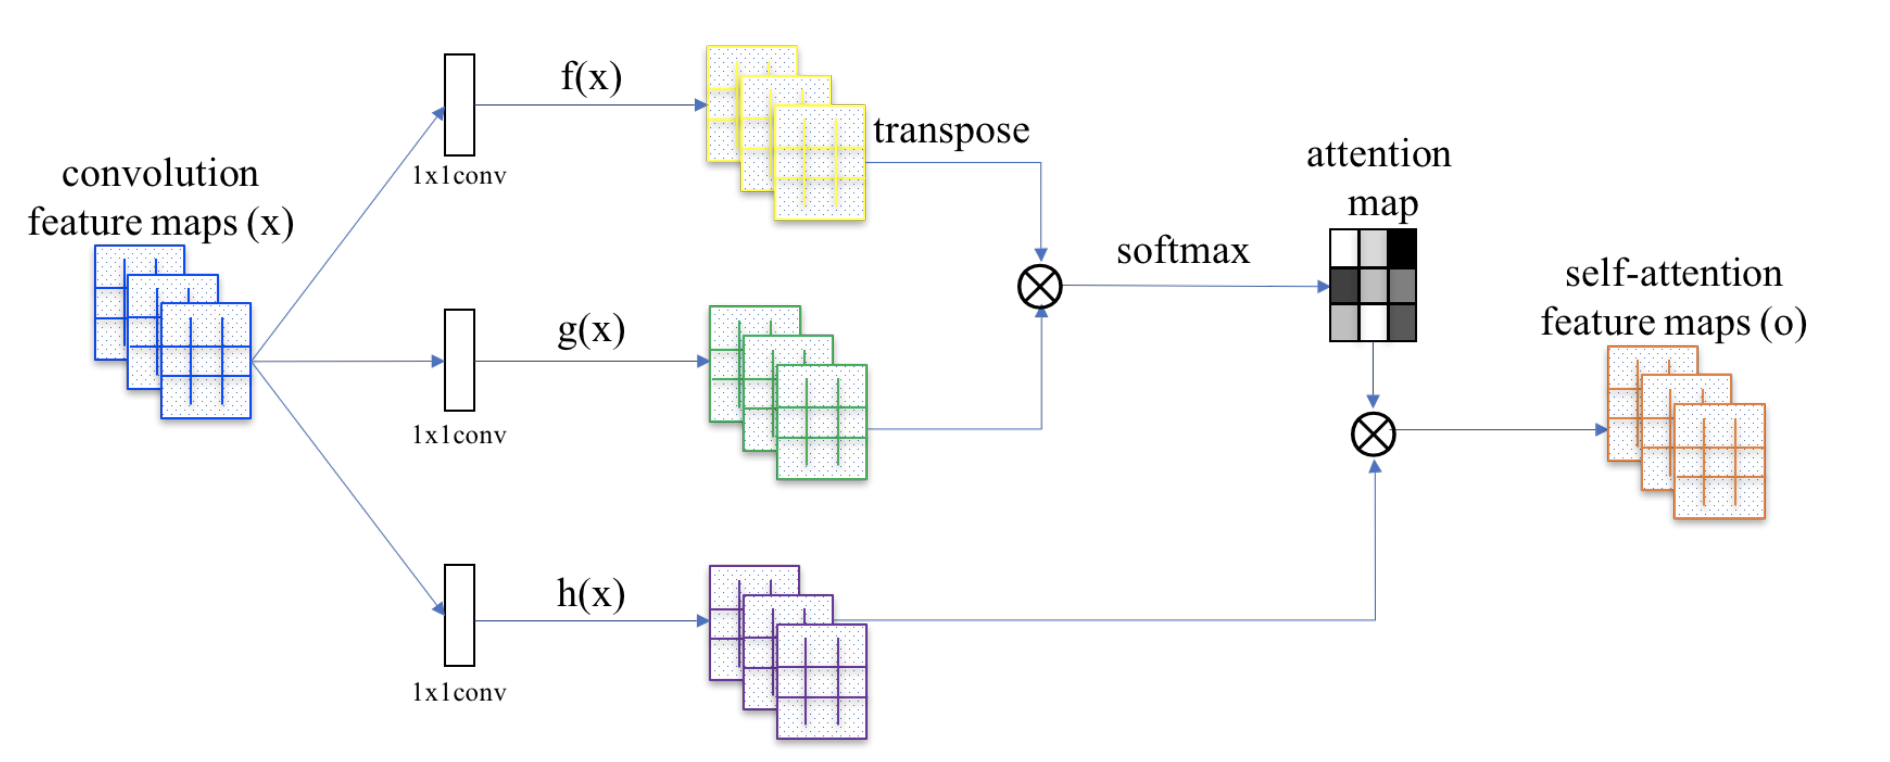

Most GAN-based models for image generation are built using convolutional layers. Convolution processes the information in a *local neighborhood*, thus using convolutional layers alone is computationally inefficient for modeling long-range dependencies in images. 

**Self-attention** exhibits a better balance between ability to model **long-range dependencies** and **computational and statistical efficiency**. The self-attention module calculates response at a position as a weighted sum of the features at all positions, where the weights – or attention vectors – are calculated with only a small computational cost.

The image features from the previous hidden layer $x \in R^{C \times N}$ are first transformed into two feature
spaces $f$, $g$ to calculate the attention, where $f(x) = W_fx$, $g(x) = W_gx$

$$βj,i = \frac{exp(s_{ij})}{\sum_{i=1}^N exp(s_{ij})},$$

where $s_{ij} = f(x_i)^T g(x_j),$

and $\beta_{j,i}$ indicates the extent to which the model attends to the $i^{th}$ location when synthesizing the $j^{th}$ region. Then the output of the attention layer is $o = (o_1, o_2, ..., o_j , ..., o_N ) \in R^{C \times N}$
, where, 

$$o_j = \sum_{i=1}^N \beta_{j,i} h(x_i)$$

where $ h(x_i) = W_h x_i$.

In the above formulation, $W_g \in R^{C¯\times C}$ , $W_f \in R^{C¯\times C}$, $W_h \in R^{C \times C}$ are the learned weight matrices, which are implemented as $1\times 1$ convolutions. We use $C¯ = \frac{C}{8}$ in all our experiments.
In addition, we further multiply the output of the attention layer by a scale parameter and add back the input feature map. Therefore, the final output is given by,

$$ y_i = \gamma o_i + x_i, $$

where $\gamma$ is initialized as 0. This allows the network to first rely on the cues in the local neighborhood – since this is easier – and then gradually learn to assign more weight to the non-local evidence. The intuition for why we do this is straightforward: we want to learn the easy task first and then progressively increase the complexity of the task. In SAGAN, the proposed attention module has been applied to both generator and discriminator, which are trained in an alternating fashion by minimizing the hinge version of the adversarial loss.

$ LD = −E_{(x,y)\sim p_{data}} [min(0, −1 + D(x, y))] − E_{z\sim p_z,y\sim p_{data}} [min(0, −1 − D(G(z), y))], $

$ LG = −E_{z∼p_z,y\sim p_{data}} D(G(z), y),$

In [1]:
#! python3 /Users/mgalfre/Cgnal/PyTorch-GAN/implementations/dcgan/dcgan.py --n_epochs 70

### Usage
1. Clone the [repository](https://github.com/heykeetae/Self-Attention-GAN?ref=floydhub-blog)
    * `git clone https://github.com/heykeetae/Self-Attention-GAN.git`
    * `cd Self-Attention-GAN`

2. Install datasets (CelebA or LSUN)
    * `bash download.sh CelebA` or
    * `bash download.sh LSUN`
3. Train
    * `python python main.py --batch_size 64 --imsize 64 --dataset celeb --adv_loss hinge --version sagan_celeb` or
    * `python python main.py --batch_size 64 --imsize 64 --dataset lsun --adv_loss hinge --version sagan_lsun`
4. Enjoy the results
    * `cd samples/sagan_celeb` or
    * `cd samples/sagan_lsun`
    
Samples generated every 100 iterations are located. The rate of sampling could be controlled via --sample_step (ex, --sample_step 100).

# BigGAN
[Paper](https://arxiv.org/abs/1809.11096v2?ref=floydhub-blog): Large Scale GAN Training for High Fidelity Natural Image Synthesis (2018)

[Code](https://github.com/huggingface/pytorch-pretrained-BigGAN?ref=floydhub-blog)

Despite recent progress in generative image modeling, successfully generating high-resolution, diverse samples from complex datasets such as ImageNet remains an elusive goal. To this end, we train Generative Adversarial Networks at the largest scale yet attempted, and study the instabilities specific to such scale. We find that applying orthogonal regularization to the generator renders it amenable to a simple “truncation trick,” allowing fine control over the trade-off between sample fidelity and variety by reducing the variance of the Generator’s input. 

* We demonstrate that **GANs benefit dramatically from scaling**, and train models with two to four times as many *parameters* and eight times the *batch size* compared to prior art. We introduce two simple, general architectural changes that improve scalability, and modify a regularization scheme to improve conditioning, demonstrably boosting performance.
* As a side effect of our modifications, our models become amenable to the **“truncation trick”**, a simple sampling technique that allows explicit, fine-grained control of the trade- off between sample variety and fidelity.

Unlike models which need to backpropagate through their latents, GANs can employ an arbitrary prior $p(z)$, yet the vast majority of previous works have chosen to draw $z$ from either $N(0,I)$ or $U[−1, 1]$. They question the optimality of this choice and explore alternatives.

Remarkably, our best results come from using a different latent distribution for sampling than was used in training. Taking a model trained with $z \sim N(0,I)$ and sampling $z$ from a truncated normal (where values which fall outside a range are resampled to fall inside that range) immediately provides a boost to IS and FID. We call this the *Truncation Trick*: truncating a $z$ vector by resampling the values with magnitude above a chosen threshold leads to improvement in individual sample quality at the cost of reduction in overall sample variety.

The innovations are:

* Increasing batch sizes, which has a big effect on the Inception Score of the model.
* Increasing the width in each layer leads to a further Inception Score improvement.
* Adding skip connections from the latent variable to further layers helps performance.
* A new variant of Orthogonal Regularization.


# StyleGAN

[Paper](https://arxiv.org/abs/1812.04948?ref=floydhub-blog): A Style-Based Generator Architecture for Generative Adversarial Networks

[Code](https://github.com/NVlabs/stylegan2-ada-pytorch)

They propose an alternative generator architecture for generative adversarial networks, borrowing from *style transfer literature*. The new architecture leads to an automatically learned, unsupervised separation of high-level attributes (e.g., pose and identity when trained on human faces) and stochastic variation in the generated images (e.g., freckles, hair), and it enables intuitive, scale-specific control of the synthesis.

Motivated by style transfer literature, they re-design the generator architecture in a way that exposes novel ways to control the image synthesis process. Our generator starts from a learned constant input and adjusts the “style” of the image at each convolution layer based on the latent code, therefore directly controlling the strength of image features at different scales.

Traditionally the latent code is provided to the generator through an input layer, i.e., the first layer of a feed-forward network (Figure 1a). We depart from this design by omitting the input layer altogether and starting from a learned constant instead (Figure 1b, right). Given a latent code $z$ in the input latent space $Z$, a non-linear mapping network $f : Z \rightarrow W$ first produces $w \in W$ (Figure 1b, left). Learned affine transformations then specialize $w$ to styles $y = (y_s, y_b)$ that control adaptive instance normalization (AdaIN) operations after each convolution layer of the synthesis network $g$.

Finally, we provide our generator with a direct means to generate stochastic detail by introducing explicit noise inputs. These are single-channel images consisting of un- correlated Gaussian noise, and we feed a dedicated noise image to each layer of the synthesis network. The noise image is broadcasted to all feature maps using learned per- feature scaling factors and then added to the output of the corresponding convolution, as illustrated in Figure 1b.

<img src="../papers/stylegan.png" style="width:600px;height:450px"/>